In [129]:
#pip install gym
#pip install gym[classic_control]

In [13]:

import gym
import time
from random import randint
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
  
  
from collections import defaultdict
import workingPlotting 
  
matplotlib.style.use('ggplot')

# Cargo el entorno

In [14]:
env = gym.make('CartPole-v1')

# Simulación

In [15]:
for _ in range(10):
    obs = env.reset()
    done = False
    while not done:
        policy = randint(0,1)
        obs, reward, done, info = env.step(policy)
        print(obs)
        env.render()
        time.sleep(0.05)
        if done:
            env.reset()
env.close()

[-0.02933822 -0.22356616 -0.04697487  0.3164556 ]
[-0.03380954 -0.41798863 -0.04064576  0.5939621 ]
[-0.04216931 -0.6125188  -0.02876651  0.8735697 ]
[-0.05441969 -0.41701776 -0.01129512  0.57198334]
[-6.2760048e-02 -6.1197954e-01  1.4454825e-04  8.6108667e-01]
[-0.07499964 -0.41685954  0.01736628  0.56844914]
[-0.08333682 -0.6122207   0.02873527  0.8665522 ]
[-0.09558124 -0.41750136  0.04606631  0.5830407 ]
[-0.10393127 -0.22305402  0.05772712  0.30521786]
[-0.10839235 -0.0288002   0.06383148  0.03128482]
[-0.10896835 -0.2247767   0.06445718  0.34340462]
[-0.11346389 -0.4207536   0.07132526  0.6556968 ]
[-0.12187896 -0.2266933   0.0844392   0.38629833]
[-0.12641282 -0.4229061   0.09216517  0.70436454]
[-0.13487095 -0.61917615  0.10625246  1.0245783 ]
[-0.14725447 -0.81554025  0.12674403  1.3486428 ]
[-0.16356528 -1.0120065   0.15371688  1.6781415 ]
[-0.1838054  -0.81896496  0.18727972  1.4370084 ]
[-0.2001847  -0.6265794   0.21601988  1.208215  ]
[ 0.03976433 -0.1817172   0.03829484  

### EGreedyPolicy
Crea una política (policy) avara (greedy) de épsilon basada en una función Q dada y épsilon.
       
Devuelve una función que toma el estado como entrada y devuelve las probabilidades para cada acción en forma de matriz de longitud del espacio de acción (conjunto de acciones posibles).


In [16]:
def EGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
   
        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions
        
        state_tup = state[0],state[1],state[2],state[3]

        best_action = np.argmax(Q[state_tup])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
   
    return policyFunction

### Q learning
Control de TD (temporal difference) fuera de política. Encuentra la política óptima (greedy) mientras mejora siguiendo una política épsilon greedy

El factor de descuento, alpha y epsilon tienen un default value en Q-Learning

- Función de valor de acción
- Un diccionario anidado que mapea estado -> (acción -> valor-acción)

Luego se mantiene un trackeo de estadisticas utiles como largo y recompensa de los episodios

Se crea la policy epsilon greedy apropiada para el espacio de accion

Luego para cada uno de los episodios:
- se resetea el estado a el reset del ambiente y elige la primera accion
- se loopea la iteracion de obetener la probabilidad de todas las acciones del estado actual
- se elige la accion segun la ditribucion de probabilidad
- se toma la accion y se obtiene la recompensa
- transiciona al siguiente estado
- se actualizan las estadisticas antes mencionadas: largo de episodio y recompensa

- si termina el episodio se acaba (se usa el done de step para confirmar esto)

In [17]:
def Qlearning(env, num_episodes, discount_factor = 1.0, alpha = 0.6, epsilon = 0.1):
	Q = defaultdict(lambda: np.zeros(env.action_space.n))
	
	stats = workingPlotting.EpisodeStats(
		episode_lengths = np.zeros(num_episodes),
		episode_rewards = np.zeros(num_episodes))	
	
	policy = EGreedyPolicy(Q, epsilon, env.action_space.n)
	
	for ith_episode in range(num_episodes):
		
		state = env.reset()
		
		for t in itertools.count():
			
			action_probabilities = policy(state)

			action = np.random.choice(np.arange(
					len(action_probabilities)),
					p = action_probabilities)

			next_state, reward, done, _ = env.step(action)

			stats.episode_rewards[ith_episode] += reward
			stats.episode_lengths[ith_episode] = t
			
			state_tup = next_state[0], next_state[1], next_state[2], next_state[3]
			
			best_next_action = np.argmax(Q[state_tup])	
			td_target = reward + discount_factor * Q[state_tup][best_next_action]
			td_delta = td_target - Q[state_tup][action]
			Q[state_tup][action] += alpha * td_delta

			if done:
				break
				
			state = state_tup
	
	return Q, stats


In [24]:
Q, stats = Qlearning(env, 10000)

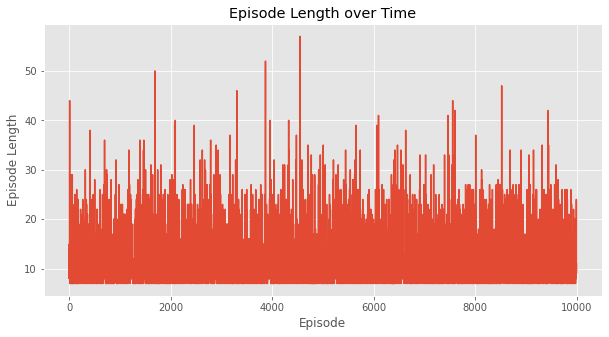

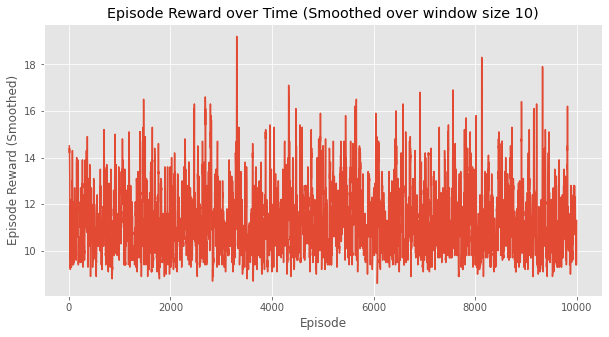

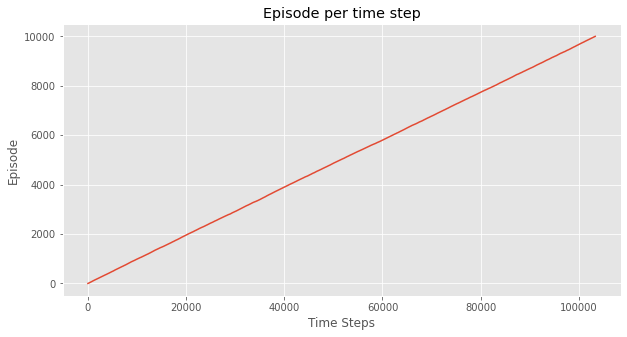

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [25]:
workingPlotting.plot_episode_stats(stats)

# Simulacion

In [20]:
for _ in range(10):
    obs = env.reset()
    done = False
    while not done:
        policy,_ = Qlearning(env, 1000)
        obs, reward, done, info = env.step(policy)
        print(obs)
        env.render()
        time.sleep(0.05)
        if done:
            env.reset()
env.close()

AssertionError: defaultdict(<function Qlearning.<locals>.<lambda> at 0x00000145E938C8B0>, {(0.026865589, -0.036118165, 0.029917082, -0.028942361): array([0., 0.]), (0.026143227, -0.23165609, 0.029338235, 0.2730276): array([0.6, 0. ]), (0.021510104, -0.4271841, 0.034798786, 0.5748176): array([0.6, 0. ]), (0.012966422, -0.6227762, 0.04629514, 0.87825686): array([0.6, 0. ]), (0.00051089836, -0.81849563, 0.063860275, 1.1851274): array([0.6, 0. ]), (-0.015859013, -1.0143851, 0.08756282, 1.4971249): array([0.6, 0. ]), (-0.036146715, -1.2104555, 0.11750532, 1.8158143): array([0.6, 0. ]), (-0.060355827, -1.4066727, 0.1538216, 2.1425776): array([0.6, 0. ]), (-0.08848928, -1.6029427, 0.19667315, 2.4785519): array([0.6, 0. ]), (-0.12054814, -1.799094, 0.24624419, 2.8245564): array([0.6, 0. ]), (0.044105954, 0.04266457, -0.004760828, -0.025017852): array([0., 0.]), (0.044959247, -0.15238878, -0.0052611846, 0.26615918): array([0.6, 0. ]), (0.04191147, -0.34743527, 6.1998995e-05, 0.5571781): array([0.6, 0. ]), (0.034962766, -0.5425581, 0.0112055605, 0.8498805): array([0.6, 0. ]), (0.024111604, -0.73783106, 0.02820317, 1.146066): array([0.6, 0. ]), (0.009354984, -0.93330973, 0.051124487, 1.447458): array([0.6, 0. ]), (-0.00931121, -1.1290218, 0.08007365, 1.7556665): array([0.6, 0. ]), (-0.031891644, -1.3249549, 0.11518698, 2.072141): array([0.6, 0. ]), (-0.058390744, -1.5210433, 0.1566298, 2.3981147): array([0.6, 0. ]), (-0.088811606, -1.7171506, 0.2045921, 2.7345357): array([0.6, 0. ]), (-0.12315462, -1.9130516, 0.2592828, 3.08199): array([0.6, 0. ]), (-0.045008194, 0.031162709, -0.019207794, -0.0024279659): array([0., 0.]), (-0.04438494, -0.16367859, -0.019256353, 0.28413332): array([0.6, 0. ]), (-0.047658514, -0.35852066, -0.013573687, 0.5706812): array([0.6, 0. ]), (-0.054828927, -0.5534497, -0.002160062, 0.85905725): array([0.6, 0. ]), (-0.06589792, -0.74854213, 0.015021083, 1.1510602): array([0.6, 0. ]), (-0.08086876, -0.94385684, 0.03804229, 1.4484153): array([0.6, 0. ]), (-0.0997459, -1.1394253, 0.06701059, 1.7527374): array([0.6, 0. ]), (-0.1225344, -0.94512457, 0.10206534, 1.4816269): array([0. , 0.6]), (-0.14143689, -0.75138515, 0.13169788, 1.2224853): array([0. , 0.6]), (-0.15646459, -0.55818254, 0.15614758, 0.9737982): array([0. , 0.6]), (-0.16762824, -0.3654609, 0.17562355, 0.7339539): array([0. , 0.6]), (-0.17493747, -0.17314392, 0.19030263, 0.5012841): array([0. , 0.6]), (-0.17840035, 0.018857926, 0.2003283, 0.27409256): array([0. , 0.6]), (-0.17802319, 0.21064204, 0.20581016, 0.050672915): array([0. , 0.6]), (-0.17381035, 0.40230983, 0.20682362, -0.17067933): array([0. , 0.6]), (-0.16576415, 0.593964, 0.20341003, -0.3916602): array([0. , 0.6]), (-0.15388487, 0.7857062, 0.19557683, -0.613953): array([0. , 0.6]), (-0.13817075, 0.9776354, 0.18329777, -0.8392245): array([0. , 0.6]), (-0.11861804, 1.1698451, 0.16651328, -1.0691209): array([0. , 0.6]), (-0.09522114, 1.3624206, 0.14513086, -1.3052598): array([0. , 0.6]), (-0.06797273, 1.5554353, 0.11902566, -1.5492193): array([0. , 0.6]), (-0.03686402, 1.7489446, 0.088041276, -1.8025187): array([0. , 0.6]), (-0.0018851259, 1.9429795, 0.0519909, -2.066593): array([0. , 0.6]), (0.036974464, 2.137535, 0.010659044, -2.3427536): array([0. , 0.6]), (0.07972517, 2.3325598, -0.03619603, -2.6321402): array([0. , 0.6]), (0.12637636, 2.527937, -0.08883884, -2.9356534): array([0. , 0.6]), (0.1769351, 2.7234678, -0.14755191, -3.2538774): array([0. , 0.6]), (0.23140445, 2.9188476, -0.21262945, -3.5869856): array([0. , 0.6]), (-0.02709019, -0.016475942, 0.0034277276, 0.0020182424): array([0., 0.]), (-0.027419709, -0.21164688, 0.0034680923, 0.2957807): array([0.6, 0. ]), (-0.031652648, -0.4068181, 0.009383706, 0.5895554): array([0.6, 0. ]), (-0.03978901, -0.6020702, 0.021174813, 0.88517934): array([0.6, 0. ]), (-0.05183041, -0.79747313, 0.0388784, 1.184443): array([0.6, 0. ]), (-0.06777988, -0.9930773, 0.062567264, 1.4890549): array([0.6, 0. ]), (-0.08764142, -1.1889029, 0.09234836, 1.8006014): array([0.6, 0. ]), (-0.11141948, -1.3849281, 0.12836039, 2.120498): array([0.6, 0. ]), (-0.13911805, -1.581074, 0.17077035, 2.449931): array([0.6, 0. ]), (-0.17073952, -1.7771882, 0.21976896, 2.7897859): array([0.6, 0. ]), (0.019325623, 0.009895308, -0.021013165, 0.022350438): array([0., 0.]), (0.01952353, -0.18491909, -0.020566156, 0.30833012): array([0.6, 0. ]), (0.015825149, -0.37974206, -0.014399554, 0.59445673): array([0.6, 0. ]), (0.008230307, -0.5746595, -0.0025104196, 0.8825693): array([0.6, 0. ]), (-0.0032628835, -0.7697473, 0.0151409665, 1.174462): array([0.6, 0. ]), (-0.01865783, -0.9650627, 0.038630206, 1.4718528): array([0.6, 0. ]), (-0.037959084, -1.1606351, 0.06806726, 1.776347): array([0.6, 0. ]), (-0.061171785, -0.96634275, 0.1035942, 1.5055797): array([0. , 0.6]), (-0.08049864, -0.7726188, 0.1337058, 1.2469538): array([0. , 0.6]), (-0.09595102, -0.5794406, 0.15864487, 0.9989652): array([0. , 0.6]), (-0.107539825, -0.38675392, 0.17862418, 0.76001096): array([0. , 0.6]), (-0.115274906, -0.19448353, 0.1938244, 0.52843094): array([0. , 0.6]), (-0.11916458, -0.002540795, 0.20439301, 0.3025363): array([0. , 0.6]), (-0.11921539, 0.18917103, 0.21044374, 0.08062848): array([0. , 0.6]), (0.01364186, -0.016438171, 0.035423554, 0.036360465): array([0., 0.]), (0.013313097, -0.21204972, 0.036150765, 0.34000605): array([0.6, 0. ]), (0.009072102, -0.4076669, 0.042950884, 0.6438661): array([0.6, 0. ]), (0.000918764, -0.6033603, 0.055828206, 0.9497592): array([0.6, 0. ]), (-0.0111484425, -0.79918754, 0.074823394, 1.2594473): array([0.6, 0. ]), (-0.027132193, -0.99518275, 0.10001234, 1.5745951): array([0.6, 0. ]), (-0.047035847, -1.1913449, 0.13150424, 1.8967227): array([0.6, 0. ]), (-0.07086275, -1.3876239, 0.16943869, 2.22715): array([0.6, 0. ]), (-0.09861522, -1.5839052, 0.2139817, 2.5669327): array([0.6, 0. ]), (-0.012037499, 0.023349328, 0.041716143, 0.046303745): array([0., 0.]), (-0.011570512, -0.1723452, 0.042642217, 0.35185117): array([0.6, 0. ]), (-0.015017416, -0.3680468, 0.04967924, 0.6576697): array([0.6, 0. ]), (-0.022378352, -0.56382376, 0.06283263, 0.96557254): array([0.6, 0. ]), (-0.033654828, -0.7597308, 0.08214408, 1.277314): array([0.6, 0. ]), (-0.048849445, -0.9557984, 0.107690364, 1.5945467): array([0.6, 0. ]), (-0.06796541, -1.1520203, 0.1395813, 1.9187745): array([0.6, 0. ]), (-0.09100582, -1.3483404, 0.17795679, 2.2512944): array([0.6, 0. ]), (-0.11797263, -1.5446357, 0.22298267, 2.5931306): array([0.6, 0. ]), (0.038864516, -0.006891281, 0.025785975, -0.039273005): array([0., 0.]), (0.03872669, -0.20237333, 0.025000514, 0.26143283): array([0.6, 0. ]), (0.034679223, -0.0076170107, 0.030229172, -0.023260973): array([0. , 0.6]), (0.034526885, 0.18705867, 0.029763952, -0.30625507): array([0. , 0.6]), (0.03826806, 0.38174412, 0.02363885, -0.5894046): array([0. , 0.6]), (0.04590294, 0.57652724, 0.011850759, -0.87454844): array([0. , 0.6]), (0.057433486, 0.7714861, -0.00564021, -1.1634822): array([0. , 0.6]), (0.072863206, 0.966681, -0.028909853, -1.4579281): array([0. , 0.6]), (0.09219683, 1.1621455, -0.058068417, -1.7595006): array([0. , 0.6]), (0.115439735, 1.3578748, -0.093258426, -2.0696623): array([0. , 0.6]), (0.14259723, 1.553813, -0.13465168, -2.3896706): array([0. , 0.6]), (0.1736735, 1.7498363, -0.18244508, -2.7205122): array([0. , 0.6]), (0.20867021, 1.9457352, -0.23685533, -3.0628252): array([0. , 0.6]), (0.047002796, 0.02048838, -0.0013189474, 0.03370531): array([0., 0.]), (0.047412563, -0.17461464, -0.0006448413, 0.3259718): array([0.6, 0. ]), (0.04392027, -0.3697274, 0.0058745947, 0.6184513): array([0.6, 0. ]), (0.036525723, -0.5649309, 0.01824362, 0.91297865): array([0.6, 0. ]), (0.025227105, -0.76029485, 0.036503192, 1.2113391): array([0.6, 0. ]), (0.010021208, -0.95586854, 0.060729977, 1.5152338): array([0.6, 0. ]), (-0.009096163, -1.1516706, 0.09103465, 1.8262391): array([0.6, 0. ]), (-0.032129575, -1.3476766, 0.12755944, 2.145758): array([0.6, 0. ]), (-0.059083108, -1.5438044, 0.17047459, 2.4749603): array([0.6, 0. ]), (-0.0899592, -1.3504735, 0.2199738, 2.2390447): array([0. , 0.6]), (0.041872952, 0.016257415, -0.043271482, -0.0032456096): array([0., 0.]), (0.0421981, -0.17821811, -0.043336395, 0.27547675): array([0.6, 0. ]), (0.038633738, -0.37269583, -0.03782686, 0.5541825): array([0.6, 0. ]), (0.031179821, -0.56726676, -0.026743209, 0.83471173): array([0.6, 0. ]), (0.019834485, -0.7620134, -0.010048974, 1.1188656): array([0.6, 0. ]), (0.0045942175, -0.95700204, 0.012328338, 1.4083796): array([0.6, 0. ]), (-0.014545823, -1.1522747, 0.04049593, 1.7048907): array([0.6, 0. ]), (-0.03759132, -1.3478385, 0.074593745, 2.0098984): array([0.6, 0. ]), (-0.06454809, -1.543653, 0.11479171, 2.3247137): array([0.6, 0. ]), (-0.09542115, -1.7396148, 0.16128598, 2.6503966): array([0.6, 0. ]), (-0.13021345, -1.9355397, 0.21429391, 2.9876823): array([0.6, 0. ]), (0.030807326, -0.019668479, -0.023748526, 0.043813486): array([0., 0.]), (0.030413955, -0.21444198, -0.022872256, 0.32890993): array([0.6, 0. ]), (0.026125116, -0.40923098, -0.016294058, 0.61429316): array([0.6, 0. ]), (0.017940497, -0.6041215, -0.004008195, 0.9017999): array([0.6, 0. ]), (0.005858067, -0.7991889, 0.014027803, 1.1932203): array([0.6, 0. ]), (-0.010125712, -0.9944897, 0.037892208, 1.4902667): array([0.6, 0. ]), (-0.030015506, -1.190052, 0.06769754, 1.7945372): array([0.6, 0. ]), (-0.053816546, -1.3858638, 0.10358828, 2.1074698): array([0.6, 0. ]), (-0.08153382, -1.5818594, 0.14573768, 2.4302878): array([0.6, 0. ]), (-0.113171004, -1.7779026, 0.19434343, 2.7639306): array([0.6, 0. ]), (-0.14872906, -1.9737681, 0.24962205, 3.1089761): array([0.6, 0. ]), (0.028774705, 0.027002867, -0.039080173, -0.042142913): array([0., 0.]), (0.029314762, -0.16753753, -0.03992303, 0.23795822): array([0.6, 0. ]), (0.02596401, -0.36206707, -0.035163864, 0.5177858): array([0.6, 0. ]), (0.01872267, -0.55667675, -0.02480815, 0.7991838): array([0.6, 0. ]), (0.007589136, -0.7514497, -0.008824474, 1.0839605): array([0.6, 0. ]), (-0.0074398587, -0.9464541, 0.012854735, 1.3738613): array([0.6, 0. ]), (-0.026368942, -1.1417344, 0.040331963, 1.6705368): array([0.6, 0. ]), (-0.04920363, -1.3373011, 0.073742695, 1.9755026): array([0.6, 0. ]), (-0.075949654, -1.5331185, 0.11325275, 2.290091): array([0.6, 0. ]), (-0.10661202, -1.7290894, 0.15905458, 2.6153896): array([0.6, 0. ]), (-0.1411938, -1.9250375, 0.21136236, 2.9521668): array([0.6, 0. ]), (0.026563004, 0.009179046, 0.015639808, -0.023381965): array([0., 0.]), (0.026746584, -0.18616366, 0.01517217, 0.27419418): array([0.6, 0. ]), (0.023023311, -0.38149875, 0.020656053, 0.57162356): array([0.6, 0. ]), (0.015393335, -0.5769042, 0.032088526, 0.8707416): array([0.6, 0. ]), (0.003855252, -0.7724476, 0.049503356, 1.173338): array([0.6, 0. ]), (-0.011593699, -0.9681768, 0.072970115, 1.4811202): array([0.6, 0. ]), (-0.030957235, -1.1641092, 0.10259252, 1.7956711): array([0.6, 0. ]), (-0.054239422, -1.3602196, 0.13850595, 2.1183991): array([0.6, 0. ]), (-0.08144381, -1.5564245, 0.18087393, 2.4504788): array([0.6, 0. ]), (-0.112572305, -1.752566, 0.2298835, 2.7927787): array([0.6, 0. ]), (-0.014833063, 0.0017543024, 0.039556906, 0.011042293): array([0., 0.]), (-0.014797977, -0.19391197, 0.039777752, 0.3159388): array([0.6, 0. ]), (-0.018676216, -0.38957727, 0.046096526, 0.62089616): array([0.6, 0. ]), (-0.026467763, -0.58531165, 0.05851445, 0.9277334): array([0.6, 0. ]), (-0.038173996, -0.78117275, 0.07706912, 1.2382157): array([0.6, 0. ]), (-0.05379745, -0.9771954, 0.10183343, 1.5540128): array([0.6, 0. ]), (-0.073341355, -1.1733799, 0.1329137, 1.8766522): array([0.6, 0. ]), (-0.096808955, -1.369678, 0.17044674, 2.2074642): array([0.6, 0. ]), (-0.12420251, -1.5659777, 0.21459602, 2.5475159): array([0.6, 0. ]), (-0.036049694, 0.04227126, -0.03511464, 0.04703015): array([0., 0.]), (-0.03520427, -0.15233004, -0.034174036, 0.32843056): array([0.6, 0. ]), (-0.03825087, -0.34694922, -0.027605424, 0.6101437): array([0.6, 0. ]), (-0.045189854, -0.5416747, -0.015402551, 0.8940056): array([0.6, 0. ]), (-0.056023348, -0.73658437, 0.0024775611, 1.1818073): array([0.6, 0. ]), (-0.070755035, -0.9317384, 0.026113708, 1.4752659): array([0.6, 0. ]), (-0.0893898, -1.1271695, 0.055619024, 1.775989): array([0.6, 0. ]), (-0.111933194, -1.3228722, 0.0911388, 2.0854328): array([0.6, 0. ]), (-0.13839063, -1.518789, 0.13284746, 2.4048462): array([0.6, 0. ]), (-0.16876642, -1.7147949, 0.18094438, 2.7352066): array([0.6, 0. ]), (-0.20306231, -1.9106779, 0.23564851, 3.077142): array([0.6, 0. ]), (-0.001659354, -0.027348233, 0.048795644, -0.016887369): array([0., 0.]), (-0.0022063185, -0.22313479, 0.048457894, 0.2907831): array([0.6, 0. ]), (-0.006669014, -0.418913, 0.054273557, 0.59834677): array([0.6, 0. ]), (-0.015047274, -0.6147507, 0.0662405, 0.9076193): array([0.6, 0. ]), (-0.027342288, -0.8107038, 0.08439288, 1.2203649): array([0.6, 0. ]), (-0.043556362, -1.0068059, 0.10880018, 1.5382532): array([0.6, 0. ]), (-0.06369248, -1.203056, 0.13956524, 1.8628118): array([0.6, 0. ]), (-0.0877536, -1.3994045, 0.17682149, 2.1953702): array([0.6, 0. ]), (-0.11574169, -1.5957383, 0.22072889, 2.5369937): array([0.6, 0. ]), (-0.023464676, 0.0015199127, 0.041643426, 8.4579515e-05): array([0., 0.]), (-0.02343428, -0.19417375, 0.041645117, 0.30561024): array([0.6, 0. ]), (-0.027317753, -0.38986367, 0.04775732, 0.6111307): array([0.6, 0. ]), (-0.035115026, -0.58561945, 0.059979934, 0.9184649): array([0.6, 0. ]), (-0.046827417, -0.7814987, 0.07834923, 1.2293789): array([0.6, 0. ]), (-0.06245739, -0.97753644, 0.10293681, 1.5455445): array([0.6, 0. ]), (-0.082008116, -1.1737332, 0.1338477, 1.8684919): array([0.6, 0. ]), (-0.10548278, -1.3700415, 0.17121755, 2.1995544): array([0.6, 0. ]), (-0.13288361, -1.5663501, 0.21520863, 2.539804): array([0.6, 0. ]), (-0.035993017, -0.036611177, 0.046321675, -0.009767487): array([0., 0.]), (-0.036725238, -0.23236579, 0.046126325, 0.29716316): array([0.6, 0. ]), (-0.041372556, -0.42811388, 0.052069586, 0.60402936): array([0.6, 0. ]), (-0.049934834, -0.6239239, 0.06415018, 0.91264784): array([0.6, 0. ]), (-0.062413312, -0.42972574, 0.08240313, 0.64079696): array([0. , 0.6]), (-0.071007825, -0.23584338, 0.09521907, 0.37515935): array([0. , 0.6]), (-0.07572469, -0.04219379, 0.10272226, 0.11395294): array([0. , 0.6]), (-0.076568566, 0.15131773, 0.105001315, -0.144637): array([0. , 0.6]), (-0.073542215, 0.34479147, 0.102108575, -0.40243557): array([0. , 0.6]), (-0.06664638, 0.14838073, 0.09405986, -0.07938619): array([0.6, 0. ]), (-0.06367877, -0.04795493, 0.09247214, 0.24142833): array([0.6, 0. ]), (-0.06463787, -0.24426779, 0.09730071, 0.5617876): array([0.6, 0. ]), (-0.06952322, -0.4406109, 0.10853646, 0.8834705): array([0.6, 0. ]), (-0.07833544, -0.6370261, 0.12620588, 1.2082068): array([0.6, 0. ]), (-0.091075964, -0.8335318, 0.15037, 1.5376271): array([0.6, 0. ]), (-0.1077466, -1.0301095, 0.18112254, 1.8732088): array([0.6, 0. ]), (-0.1283488, -1.2266892, 0.21858671, 2.2162142): array([0.6, 0. ]), (-0.024053957, 0.009367176, 0.002052905, 0.041346036): array([0., 0.]), (-0.023866612, -0.18578415, 0.0028798257, 0.33467597): array([0.6, 0. ]), (-0.027582297, -0.38094696, 0.009573345, 0.6282656): array([0.6, 0. ]), (-0.035201237, -0.5762012, 0.022138659, 0.9239481): array([0.6, 0. ]), (-0.04672526, -0.77161515, 0.04061762, 1.2235054): array([0.6, 0. ]), (-0.062157564, -0.96723604, 0.06508773, 1.528633): array([0.6, 0. ]), (-0.08150228, -1.1630799, 0.09566039, 1.8408991): array([0.6, 0. ]), (-0.10476388, -1.3591187, 0.13247837, 2.1616943): array([0.6, 0. ]), (-0.13194625, -1.5552659, 0.17571226, 2.4921715): array([0.6, 0. ]), (-0.16305158, -1.3619853, 0.22555569, 2.2581089): array([0. , 0.6]), (-0.017817508, 0.017519623, 0.005053822, 0.038317885): array([0., 0.]), (-0.017467115, -0.17767443, 0.0058201794, 0.33259106): array([0.6, 0. ]), (-0.021020604, -0.37287873, 0.012472001, 0.6271037): array([0.6, 0. ]), (-0.02847818, -0.5681725, 0.025014075, 0.92368823): array([0.6, 0. ]), (-0.03984163, -0.7636233, 0.04348784, 1.2241261): array([0.6, 0. ]), (-0.055114094, -0.9592775, 0.06797036, 1.5301113): array([0.6, 0. ]), (-0.07429965, -1.15515, 0.09857259, 1.8432095): array([0.6, 0. ]), (-0.09740265, -1.3512114, 0.13543677, 2.1648073): array([0.6, 0. ]), (-0.12442687, -1.547373, 0.17873293, 2.496052): array([0.6, 0. ]), (-0.15537433, -1.7434698, 0.22865397, 2.8377798): array([0.6, 0. ]), (0.026322562, 0.022292791, -0.03362334, 0.019389605): array([0., 0.]), (0.026768418, -0.17233123, -0.03323555, 0.30127725): array([0.6, 0. ]), (0.023321792, -0.3669641, -0.027210005, 0.5832959): array([0.6, 0. ]), (0.01598251, -0.5616945, -0.015544087, 0.8672846): array([0.6, 0. ]), (0.0047486206, -0.7566015, 0.0018016049, 1.15504): array([0.6, 0. ]), (-0.01038341, -0.95174694, 0.024902405, 1.4482874): array([0.6, 0. ]), (-0.02941835, -1.147166, 0.053868152, 1.7486457): array([0.6, 0. ]), (-0.05236167, -1.3428569, 0.088841066, 2.0575857): array([0.6, 0. ]), (-0.079218805, -1.538767, 0.12999278, 2.3763769): array([0.6, 0. ]), (-0.10999415, -1.7347771, 0.17752032, 2.7060218): array([0.6, 0. ]), (-0.1446897, -1.9306833, 0.23164076, 3.0471802): array([0.6, 0. ]), (-0.035020538, -0.009120473, -0.011821205, -0.015161951): array([0., 0.]), (-0.035202947, -0.20407091, -0.012124443, 0.27376792): array([0.6, 0. ]), (-0.039284367, -0.39901778, -0.0066490853, 0.5626022): array([0.6, 0. ]), (-0.04726472, -0.5940458, 0.00460296, 0.853183): array([0.6, 0. ]), (-0.059145637, -0.7892302, 0.02166662, 1.1473098): array([0.6, 0. ]), (-0.07493024, -0.98462826, 0.044612814, 1.4467075): array([0.6, 0. ]), (-0.094622806, -1.1802696, 0.07354697, 1.7529894): array([0.6, 0. ]), (-0.1182282, -1.3761449, 0.108606756, 2.0676112): array([0.6, 0. ]), (-0.1457511, -1.5721916, 0.14995898, 2.3918164): array([0.6, 0. ]), (-0.17719492, -1.768278, 0.1977953, 2.726568): array([0.6, 0. ]), (-0.21256049, -1.9641844, 0.25232667, 3.0724714): array([0.6, 0. ]), (0.006840218, 0.0037449652, 0.008169488, 0.005546628): array([0., 0.]), (0.006915117, -0.19149318, 0.008280421, 0.30079588): array([0.6, 0. ]), (0.0030852535, -0.3867322, 0.014296339, 0.59607875): array([0.6, 0. ]), (-0.00464939, -0.5820513, 0.026217913, 0.8932304): array([0.6, 0. ]), (-0.016290415, -0.7775188, 0.044082522, 1.1940382): array([0.6, 0. ]), (-0.03184079, -0.5829946, 0.06796329, 0.91549134): array([0. , 0.6]), (-0.043500684, -0.77896655, 0.08627311, 1.2287365): array([0.6, 0. ]), (-0.059080016, -0.9750862, 0.110847846, 1.5471547): array([0.6, 0. ]), (-0.078581735, -1.1713508, 0.14179094, 1.8722674): array([0.6, 0. ]), (-0.10200875, -1.3677089, 0.17923628, 2.2053957): array([0.6, 0. ]), (-0.12936293, -1.5640441, 0.22334419, 2.5475943): array([0.6, 0. ]), (-0.026536707, -0.01936661, 0.001005035, 0.0475863): array([0., 0.]), (-0.02692404, 0.17574091, 0.001956761, -0.24477936): array([0. , 0.6]), (-0.023409221, 0.37083486, -0.002938826, -0.53684443): array([0. , 0.6]), (-0.015992524, 0.565998, -0.013675715, -0.8304519): array([0. , 0.6]), (-0.0046725636, 0.7613042, -0.030284753, -1.1274043): array([0. , 0.6]), (0.01055352, 0.9568095, -0.05283284, -1.4294302): array([0. , 0.6]), (0.02968971, 1.1525426, -0.08142144, -1.7381457): array([0. , 0.6]), (0.052740563, 1.3484925, -0.11618436, -2.0550084): array([0. , 0.6]), (0.07971042, 1.5445954, -0.15728453, -2.3812609): array([0. , 0.6]), (0.11060232, 1.7407173, -0.20490974, -2.7178638): array([0. , 0.6]), (0.14541666, 1.5475713, -0.25926703, -2.4940286): array([0.6, 0. ]), (-0.014513988, -0.006116296, 0.021421045, 0.045476872): array([0., 0.]), (-0.0146363145, -0.20153876, 0.022330584, 0.34484062): array([0.6, 0. ]), (-0.018667089, -0.00674147, 0.029227396, 0.059282184): array([0. , 0.6]), (-0.018801918, 0.1879495, 0.030413039, -0.2240379): array([0. , 0.6]), (-0.015042929, 0.38262385, 0.025932282, -0.50697434): array([0. , 0.6]), (-0.0073904516, 0.577371, 0.015792795, -0.7913736): array([0. , 0.6]), (0.004156968, 0.7722726, -3.467811e-05, -1.0790466): array([0. , 0.6]), (0.01960242, 0.967395, -0.021615611, -1.3717405): array([0. , 0.6]), (0.03895032, 1.1627805, -0.04905042, -1.6711048): array([0. , 0.6]), (0.06220593, 1.3584368, -0.08247252, -1.9786512): array([0. , 0.6]), (0.08937466, 1.5543243, -0.12204554, -2.2957032): array([0. , 0.6]), (0.12046115, 1.7503406, -0.1679596, -2.623333): array([0. , 0.6]), (0.15546796, 1.9463032, -0.22042626, -2.9622889): array([0. , 0.6]), (0.011326882, 0.023517614, 0.014329037, 0.026809495): array([0., 0.]), (0.011797234, -0.17180687, 0.014865227, 0.32397872): array([0.6, 0. ]), (0.0083610965, -0.36713728, 0.021344801, 0.6213122): array([0.6, 0. ]), (0.0010183508, -0.5625507, 0.033771046, 0.92064047): array([0.6, 0. ]), (-0.010232664, -0.7581124, 0.052183855, 1.2237425): array([0.6, 0. ]), (-0.025394911, -0.9538662, 0.0766587, 1.5323086): array([0.6, 0. ]), (-0.044472236, -1.1498237, 0.10730488, 1.8478973): array([0.6, 0. ]), (-0.06746871, -1.3459514, 0.14426282, 2.1718838): array([0.6, 0. ]), (-0.09438774, -1.5421554, 0.1877005, 2.505399): array([0.6, 0. ]), (-0.12523085, -1.7382641, 0.23780848, 2.8492558): array([0.6, 0. ]), (-0.04475468, 0.014961968, -0.04309519, 0.0006022617): array([0., 0.]), (-0.044455443, -0.17951629, -0.043083146, 0.27938274): array([0.6, 0. ]), (-0.04804577, -0.37399802, -0.03749549, 0.5581721): array([0.6, 0. ]), (-0.055525728, -0.56857413, -0.026332049, 0.83881): array([0.6, 0. ]), (-0.06689721, -0.76332676, -0.009555848, 1.1230971): array([0.6, 0. ]), (-0.08216374, -0.95832217, 0.012906092, 1.4127674): array([0.6, 0. ]), (-0.10133019, -1.1536016, 0.04116144, 1.7094566): array([0.6, 0. ]), (-0.124402225, -1.3491718, 0.07535057, 2.014661): array([0.6, 0. ]), (-0.15138566, -1.5449909, 0.11564379, 2.3296885): array([0.6, 0. ]), (-0.18228547, -1.7409548, 0.16223757, 2.6555946): array([0.6, 0. ]), (-0.21710457, -1.9368775, 0.21534945, 2.9931083): array([0.6, 0. ]), (0.0021797088, 0.031452026, -0.03581044, -0.010183222): array([0., 0.]), (0.0028087492, 0.22706877, -0.036014102, -0.31394622): array([0. , 0.6]), (0.0073501244, 0.42268473, -0.042293027, -0.6177658): array([0. , 0.6]), (0.01580382, 0.6183712, -0.054648343, -0.9234634): array([0. , 0.6]), (0.028171243, 0.8141871, -0.073117614, -1.2328074): array([0. , 0.6]), (0.044454984, 1.0101691, -0.09777376, -1.5474724): array([0. , 0.6]), (0.064658366, 1.2063196, -0.1287232, -1.8689924): array([0. , 0.6]), (0.088784754, 1.4025931, -0.16610307, -2.1987073): array([0. , 0.6]), (0.11683662, 1.2094164, -0.2100772, -1.9615403): array([0.6, 0. ]), (-0.03439982, 0.02819143, -0.035240605, 0.035696138): array([0., 0.]), (-0.03383599, -0.1664079, -0.034526683, 0.3170553): array([0.6, 0. ]), (-0.037164148, -0.3610215, -0.028185578, 0.5986529): array([0.6, 0. ]), (-0.044384576, -0.555738, -0.01621252, 0.8823261): array([0.6, 0. ]), (-0.055499338, -0.75063604, 0.0014340036, 1.1698685): array([0.6, 0. ]), (-0.07051206, -0.9457766, 0.024831373, 1.4630007): array([0.6, 0. ]), (-0.08942759, -1.1411939, 0.054091386, 1.7633358): array([0.6, 0. ]), (-0.11225147, -1.3368841, 0.089358106, 2.0723372): array([0.6, 0. ]), (-0.13898915, -1.5327928, 0.13080485, 2.391264): array([0.6, 0. ]), (-0.16964501, -1.7287977, 0.17863013, 2.7211068): array([0.6, 0. ]), (-0.20422097, -1.9246913, 0.23305227, 3.06251): array([0.6, 0. ]), (-0.03916274, -0.026540458, -0.036264773, 0.011490157): array([0., 0.]), (-0.03969355, -0.22112407, -0.03603497, 0.29251415): array([0.6, 0. ]), (-0.044116028, -0.4157142, -0.030184686, 0.5736179): array([0.6, 0. ]), (-0.052430313, -0.6104002, -0.018712329, 0.85664093): array([0.6, 0. ]), (-0.06463832, -0.80526227, -0.0015795105, 1.1433817): array([0.6, 0. ]), (-0.080743566, -1.0003636, 0.021288125, 1.4355689): array([0.6, 0. ]), (-0.100750834, -1.1957414, 0.0499995, 1.7348276): array([0.6, 0. ]), (-0.12466566, -1.3913968, 0.084696054, 2.0426376): array([0.6, 0. ]), (-0.1524936, -1.5872806, 0.12554881, 2.360281): array([0.6, 0. ]), (-0.18423921, -1.7832788, 0.17275442, 2.6887786): array([0.6, 0. ]), (-0.2199048, -1.9791933, 0.22653, 3.0288138): array([0.6, 0. ]), (-0.027162444, 0.018162195, 0.018503474, 0.016067691): array([0., 0.]), (-0.0267992, -0.17722017, 0.018824827, 0.31453076): array([0.6, 0. ]), (-0.030343603, -0.37260514, 0.025115443, 0.6130905): array([0.6, 0. ]), (-0.037795708, -0.5680689, 0.037377253, 0.91357684): array([0.6, 0. ]), (-0.049157083, -0.763676, 0.05564879, 1.2177689): array([0.6, 0. ]), (-0.0644306, -0.9594696, 0.08000416, 1.527357): array([0.6, 0. ]), (-0.08362, -1.1554606, 0.110551305, 1.8438991): array([0.6, 0. ]), (-0.10672921, -1.3516145, 0.14742929, 2.1687698): array([0.6, 0. ]), (-0.1337615, -1.5478363, 0.19080469, 2.503097): array([0.6, 0. ]), (-0.16471823, -1.7439533, 0.24086662, 2.8476906): array([0.6, 0. ]), (-0.03710476, -0.046511777, -0.029057281, -0.004731995): array([0., 0.]), (-0.038034994, -0.24120522, -0.02915192, 0.27864325): array([0.6, 0. ]), (-0.0428591, -0.43589944, -0.023579055, 0.56199104): array([0.6, 0. ]), (-0.051577087, -0.6306827, -0.012339235, 0.8471531): array([0.6, 0. ]), (-0.06419074, -0.8256342, 0.0046038264, 1.1359304): array([0.6, 0. ]), (-0.08070342, -1.0208161, 0.027322434, 1.4300536): array([0.6, 0. ]), (-0.10111974, -1.2162645, 0.055923507, 1.7311486): array([0.6, 0. ]), (-0.12544504, -1.4119786, 0.09054648, 2.0406938): array([0.6, 0. ]), (-0.1536846, -1.6079074, 0.13136035, 2.3599675): array([0.6, 0. ]), (-0.18584275, -1.8039339, 0.1785597, 2.689983): array([0.6, 0. ]), (-0.22192143, -1.9998565, 0.23235936, 3.0314121): array([0.6, 0. ]), (-0.036312107, -0.018787654, -0.03289122, -0.029048739): array([0., 0.]), (-0.03668786, -0.21342286, -0.0334722, 0.2530779): array([0.6, 0. ]), (-0.040956315, -0.40805128, -0.02841064, 0.53501797): array([0.6, 0. ]), (-0.04911734, -0.6027624, -0.01771028, 0.81861526): array([0.6, 0. ]), (-0.06117259, -0.7976375, -0.001337975, 1.1056756): array([0.6, 0. ]), (-0.07712534, -0.9927419, 0.020775536, 1.3979384): array([0.6, 0. ]), (-0.09698018, -1.188116, 0.048734304, 1.6970438): array([0.6, 0. ]), (-0.1207425, -1.3837649, 0.08267518, 2.0044909): array([0.6, 0. ]), (-0.1484178, -1.5796456, 0.122765, 2.3215873): array([0.6, 0. ]), (-0.1800107, -1.3858354, 0.16919674, 2.0690622): array([0. , 0.6]), (-0.20772742, -1.1927911, 0.210578, 1.8331378): array([0. , 0.6]), (0.014801518, 0.02779089, 0.0052707815, 0.013164504): array([0., 0.]), (0.015357336, -0.16740625, 0.0055340715, 0.30750576): array([0.6, 0. ]), (0.012009211, -0.3626066, 0.011684187, 0.60192883): array([0.6, 0. ]), (0.0047570784, -0.16765004, 0.023722762, 0.312949): array([0. , 0.6]), (0.0014040775, 0.027126066, 0.029981744, 0.027840879): array([0. , 0.6]), (0.0019465989, 0.22180551, 0.03053856, -0.25523373): array([0. , 0.6]), (0.0063827094, 0.41647843, 0.025433885, -0.53813004): array([0. , 0.6]), (0.014712278, 0.6112338, 0.014671286, -0.82269174): array([0. , 0.6]), (0.026936952, 0.8061519, -0.0017825499, -1.1107243): array([0. , 0.6]), (0.04305999, 1.0012972, -0.023997037, -1.403966): array([0. , 0.6]), (0.063085936, 1.1967089, -0.05207636, -1.7040534): array([0. , 0.6]), (0.087020114, 1.39239, -0.086157426, -2.0124807): array([0. , 0.6]), (0.11486792, 1.5882953, -0.12640704, -2.3305478): array([0. , 0.6]), (0.14663382, 1.7843149, -0.173018, -2.6592958): array([0. , 0.6]), (0.18232012, 1.9802563, -0.22620392, -2.9994335): array([0. , 0.6]), (-0.022552544, -0.049430933, -0.032089677, 0.045155194): array([0., 0.]), (-0.023541164, -0.2440784, -0.031186573, 0.32754332): array([0.6, 0. ]), (-0.028422732, -0.4387428, -0.024635706, 0.61023057): array([0.6, 0. ]), (-0.037197586, -0.63351184, -0.012431095, 0.8950534): array([0.6, 0. ]), (-0.049867824, -0.8284631, 0.005469972, 1.183803): array([0.6, 0. ]), (-0.06643709, -1.0236555, 0.02914603, 1.4781954): array([0.6, 0. ]), (-0.086910196, -1.219121, 0.058709938, 1.7798368): array([0.6, 0. ]), (-0.111292616, -1.4148524, 0.09430668, 2.0901787): array([0.6, 0. ]), (-0.13958967, -1.6107903, 0.13611025, 2.4104648): array([0.6, 0. ]), (-0.17180547, -1.806807, 0.18431954, 2.7416635): array([0.6, 0. ]), (-0.2079416, -2.0026875, 0.23915282, 3.0843906): array([0.6, 0. ]), (0.029551635, 0.02678898, 0.041767847, -0.04167584): array([0., 0.]), (0.030087413, -0.16890626, 0.040934328, 0.26388717): array([0.6, 0. ]), (0.026709288, -0.36458784, 0.046212073, 0.56919503): array([0.6, 0. ]), (0.019417532, -0.56032646, 0.057595972, 0.876071): array([0.6, 0. ]), (0.008211004, -0.75618196, 0.075117394, 1.186291): array([0.6, 0. ]), (-0.006912636, -0.9521934, 0.09884321, 1.5015427): array([0.6, 0. ]), (-0.025956504, -1.1483668, 0.12887406, 1.8233792): array([0.6, 0. ]), (-0.04892384, -1.3446625, 0.16534165, 2.153165): array([0.6, 0. ]), (-0.07581709, -1.5409791, 0.20840496, 2.4920135): array([0.6, 0. ]), (-0.10663667, -1.7371362, 0.25824523, 2.8407109): array([0.6, 0. ]), (-0.038117774, 0.016700987, 0.043077663, 0.0028216667): array([0., 0.]), (-0.037783753, -0.17901143, 0.043134097, 0.30877888): array([0.6, 0. ]), (-0.041363984, -0.3747206, 0.049309675, 0.61474705): array([0.6, 0. ]), (-0.048858393, -0.5704956, 0.061604615, 0.92254376): array([0.6, 0. ]), (-0.060268305, -0.76639336, 0.08005549, 1.2339333): array([0.6, 0. ]), (-0.075596176, -0.962448, 0.10473416, 1.5505846): array([0.6, 0. ]), (-0.09484513, -1.1586589, 0.13574585, 1.8740238): array([0.6, 0. ]), (-0.118018314, -1.354977, 0.17322633, 2.2055788): array([0.6, 0. ]), (-0.14511785, -1.5512892, 0.2173379, 2.5463142): array([0.6, 0. ]), (-0.0493438, -0.018500477, 0.0339955, -0.014717806): array([0., 0.]), (-0.04971381, -0.21409306, 0.033701148, 0.2884943): array([0.6, 0. ]), (-0.05399567, -0.409679, 0.039471034, 0.5916129): array([0.6, 0. ]), (-0.062189247, -0.60533065, 0.05130329, 0.8964633): array([0.6, 0. ]), (-0.07429586, -0.8011092, 0.06923255, 1.2048212): array([0.6, 0. ]), (-0.09031805, -0.9970543, 0.09332898, 1.5183729): array([0.6, 0. ]), (-0.11025913, -1.1931727, 0.12369644, 1.8386692): array([0.6, 0. ]), (-0.13412258, -1.389425, 0.16046982, 2.1670725): array([0.6, 0. ]), (-0.16191109, -1.5857104, 0.20381127, 2.5046937): array([0.6, 0. ]), (-0.1936253, -1.7818482, 0.25390515, 2.8523176): array([0.6, 0. ]), (-0.0053200233, -0.046334032, -3.319242e-05, 0.024047246): array([0., 0.]), (-0.006246704, -0.24145551, 0.0004477525, 0.3167197): array([0.6, 0. ]), (-0.011075814, -0.43658385, 0.0067821466, 0.6095438): array([0.6, 0. ]), (-0.019807491, -0.63179994, 0.018973023, 0.90435517): array([0.6, 0. ]), (-0.03244349, -0.82717365, 0.037060127, 1.2029407): array([0.6, 0. ]), (-0.048986964, -1.0227547, 0.061118938, 1.5070039): array([0.6, 0. ]), (-0.069442056, -1.2185621, 0.09125902, 1.8181245): array([0.6, 0. ]), (-0.0938133, -1.4145726, 0.12762152, 2.1377099): array([0.6, 0. ]), (-0.12210475, -1.6107051, 0.1703757, 2.466935): array([0.6, 0. ]), (-0.15431885, -1.8068043, 0.2197144, 2.8066733): array([0.6, 0. ]), (0.025515439, -0.021929352, -0.025070721, -0.004810485): array([0., 0.]), (0.025076853, -0.21668294, -0.02516693, 0.27985808): array([0.6, 0. ]), (0.020743193, -0.411437, -0.01956977, 0.56449836): array([0.6, 0. ]), (0.012514453, -0.606279, -0.008279801, 0.85095227): array([0.6, 0. ]), (0.00038887322, -0.8012871, 0.008739243, 1.1410202): array([0.6, 0. ]), (-0.015636869, -0.9965222, 0.031559646, 1.4364309): array([0.6, 0. ]), (-0.035567313, -1.1920186, 0.060288265, 1.7388066): array([0.6, 0. ]), (-0.059407685, -1.3877734, 0.095064394, 2.0496192): array([0.6, 0. ]), (-0.08716316, -1.5837324, 0.13605678, 2.3701372): array([0.6, 0. ]), (-0.1188378, -1.7797743, 0.18345952, 2.70136): array([0.6, 0. ]), (-0.15443328, -1.9756927, 0.23748672, 3.043941): array([0.6, 0. ]), (-0.021461619, 0.043664765, -0.025107672, -0.026779631): array([0., 0.]), (-0.020588325, -0.1510883, -0.025643265, 0.257877): array([0.6, 0. ]), (-0.02361009, -0.34583494, -0.020485725, 0.54236263): array([0.6, 0. ]), (-0.030526789, -0.54066306, -0.009638472, 0.82852113): array([0.6, 0. ]), (-0.04134005, -0.7356519, 0.0069319503, 1.1181571): array([0.6, 0. ]), (-0.05605309, -0.93086416, 0.029295094, 1.4130064): array([0.6, 0. ]), (-0.074670374, -1.1263367, 0.05755522, 1.7147009): array([0.6, 0. ]), (-0.09719711, -1.3220699, 0.091849245, 2.0247264): array([0.6, 0. ]), (-0.1236385, -1.5180142, 0.13234377, 2.34437): array([0.6, 0. ]), (-0.15399879, -1.7140547, 0.17923117, 2.6746547): array([0.6, 0. ]), (-0.18827988, -1.9099926, 0.23272426, 3.0162656): array([0.6, 0. ]), (-0.008560594, 0.039464545, -0.043840267, -0.036147464): array([0., 0.]), (-0.007771304, -0.1550022, -0.044563215, 0.24238747): array([0.6, 0. ]), (-0.010871348, -0.3494602, -0.03971547, 0.52068764): array([0.6, 0. ]), (-0.017860552, -0.15380235, -0.029301714, 0.21575902): array([0. , 0.6]), (-0.020936599, 0.04172597, -0.024986533, -0.08602104): array([0. , 0.6]), (-0.02010208, 0.23719701, -0.026706954, -0.38648134): array([0. , 0.6]), (-0.01535814, 0.4326877, -0.034436584, -0.68746376): array([0. , 0.6]), (-0.0067043854, 0.62827027, -0.048185855, -0.990786): array([0. , 0.6]), (0.0058610206, 0.82400286, -0.068001576, -1.2982053): array([0. , 0.6]), (0.022341078, 0.62980705, -0.09396568, -1.0275618): array([0.6, 0. ]), (0.034937218, 0.43605295, -0.11451692, -0.7657981): array([0.6, 0. ]), (0.04365828, 0.24267837, -0.12983288, -0.5112305): array([0.6, 0. ]), (0.048511844, 0.049601357, -0.14005749, -0.26211628): array([0.6, 0. ]), (0.049503874, -0.14327246, -0.14529982, -0.016680911): array([0.6, 0. ]), (0.04663842, -0.33604413, -0.14563343, 0.22686164): array([0.6, 0. ]), (0.03991754, -0.5288171, -0.1410962, 0.4702951): array([0.6, 0. ]), (0.029341199, -0.7216936, -0.13169031, 0.71538985): array([0.6, 0. ]), (0.014907327, -0.9147706, -0.117382504, 0.96389264): array([0.6, 0. ]), (-0.0033880854, -1.1081367, -0.098104656, 1.2175145): array([0.6, 0. ]), (-0.025550818, -1.3018663, -0.07375436, 1.4779152): array([0.6, 0. ]), (-0.051588144, -1.4960142, -0.04419606, 1.7466812): array([0.6, 0. ]), (-0.08150843, -1.6906068, -0.009262438, 2.0252957): array([0.6, 0. ]), (-0.11532056, -1.8856318, 0.031243477, 2.3150976): array([0.6, 0. ]), (-0.1530332, -1.6908082, 0.07754543, 2.032189): array([0. , 0.6]), (-0.18684937, -1.4965671, 0.1181892, 1.7644782): array([0. , 0.6]), (-0.2167807, -1.3029633, 0.15347877, 1.5107651): array([0. , 0.6]), (-0.24283998, -1.1099975, 0.18369406, 1.2696648): array([0. , 0.6]), (-0.26503992, -0.91763353, 0.20908736, 1.0396762): array([0. , 0.6]), (-0.2833926, -0.7258094, 0.22988088, 0.81923145): array([0. , 0.6]), (-0.04487208, -0.0043956568, -0.03439721, 0.012352502): array([0., 0.]), (-0.044959992, 0.19120228, -0.03415016, -0.29098165): array([0. , 0.6]), (-0.04113595, 0.38679412, -0.039969794, -0.5942365): array([0. , 0.6]), (-0.033400066, 0.58245206, -0.051854525, -0.89923704): array([0. , 0.6]), (-0.021751024, 0.778237, -0.06983927, -1.2077581): array([0. , 0.6]), (-0.0061862855, 0.97418815, -0.093994424, -1.5214844): array([0. , 0.6]), (0.013297477, 1.1703118, -0.124424115, -1.8419648): array([0. , 0.6]), (0.036703713, 1.3665679, -0.1612634, -2.1705596): array([0. , 0.6]), (0.06403507, 1.5628544, -0.2046746, -2.5083754): array([0. , 0.6]), (0.09529216, 1.7589898, -0.2548421, -2.8561928): array([0. , 0.6]), (-0.012948955, -0.03249122, -0.036294136, 0.046071876): array([0., 0.]), (-0.01359878, -0.22707444, -0.0353727, 0.32708636): array([0.6, 0. ]), (-0.01814027, -0.4216754, -0.028830973, 0.6084078): array([0.6, 0. ]), (-0.026573777, -0.61638266, -0.016662817, 0.8918722): array([0.6, 0. ]), (-0.03890143, -0.4210387, 0.0011746272, 0.59399825): array([0. , 0.6]), (-0.047322206, -0.22593321, 0.013054593, 0.30168557): array([0. , 0.6]), (-0.051840868, -0.03099973, 0.019088304, 0.0131482165): array([0. , 0.6]), (-0.052460864, 0.16384335, 0.019351268, -0.27345154): array([0. , 0.6]), (-0.049183995, 0.3586839, 0.013882238, -0.55996877): array([0. , 0.6]), (-0.04201032, 0.5536083, 0.0026828633, -0.8482459): array([0. , 0.6]), (-0.030938152, 0.7486935, -0.014282055, -1.1400839): array([0. , 0.6]), (-0.01596428, 0.9439993, -0.037083734, -1.4372115): array([0. , 0.6]), (0.0029157042, 1.1395582, -0.065827966, -1.7412483): array([0. , 0.6]), (0.025706869, 1.3353649, -0.100652926, -2.0536616): array([0. , 0.6]), (0.052414168, 1.5313624, -0.14172617, -2.375712): array([0. , 0.6]), (0.083041415, 1.7274258, -0.1892404, -2.7083864): array([0. , 0.6]), (0.11758993, 1.9233439, -0.24340813, -3.0523224): array([0. , 0.6]), (-0.009184741, 0.02654404, 0.043364998, 0.02948): array([0., 0.]), (-0.008653861, 0.22101815, 0.0439546, -0.24921161): array([0. , 0.6]), (-0.0042334977, 0.41548574, 0.038970366, -0.52771276): array([0. , 0.6]), (0.004076217, 0.61003834, 0.028416112, -0.8078657): array([0. , 0.6]), (0.016276984, 0.80475956, 0.012258799, -1.0914764): array([0. , 0.6]), (0.032372173, 0.99971783, -0.009570729, -1.3802879): array([0. , 0.6]), (0.052366532, 1.194958, -0.037176486, -1.6759484): array([0. , 0.6]), (0.07626569, 1.3904909, -0.07069545, -1.9799726): array([0. , 0.6]), (0.10407551, 1.5862818, -0.1102949, -2.2936924): array([0. , 0.6]), (0.13580114, 1.782234, -0.15616874, -2.6181958): array([0. , 0.6]), (0.17144582, 1.9781724, -0.20853266, -2.9542537): array([0. , 0.6]), (0.21100926, 2.1738226, -0.26761773, -3.3022366): array([0. , 0.6]), (0.03835441, -0.0006212045, -0.03911114, 0.028304046): array([0., 0.]), (0.038341984, -0.19516109, -0.03854506, 0.30839497): array([0.6, 0. ]), (0.034438763, -0.38971323, -0.03237716, 0.588677): array([0.6, 0. ]), (0.0266445, -0.58436716, -0.020603623, 0.87098765): array([0.6, 0. ]), (0.014957156, -0.77920294, -0.00318387, 1.1571223): array([0.6, 0. ]), (-0.00062690256, -0.9742832, 0.019958574, 1.4488051): array([0.6, 0. ]), (-0.020112567, -1.1696448, 0.048934676, 1.7476565): array([0.6, 0. ]), (-0.043505464, -1.3652874, 0.08388781, 2.0551503): array([0.6, 0. ]), (-0.07081121, -1.5611609, 0.12499081, 2.3725615): array([0.6, 0. ]), (-0.10203443, -1.7571493, 0.17244203, 2.7009022): array([0.6, 0. ]), (-0.13717741, -1.9530523, 0.22646008, 3.0408456): array([0.6, 0. ]), (-0.041546214, 0.00016848695, -0.008875672, 0.003065823): array([0., 0.]), (-0.041542843, -0.19482505, -0.008814355, 0.2929352): array([0.6, 0. ]), (-0.045439344, -0.38982025, -0.0029556514, 0.58282524): array([0.6, 0. ]), (-0.05323575, -0.5849007, 0.008700853, 0.8745756): array([0.6, 0. ]), (-0.06493376, -0.7801398, 0.026192365, 1.1699812): array([0.6, 0. ]), (-0.08053656, -0.97559243, 0.049591992, 1.4707594): array([0.6, 0. ]), (-0.10004841, -1.1712847, 0.07900718, 1.7785108): array([0.6, 0. ]), (-0.1234741, -1.3672022, 0.11457739, 2.0946743): array([0.6, 0. ]), (-0.15081814, -1.563276, 0.15647088, 2.4204688): array([0.6, 0. ]), (-0.18208367, -1.7593664, 0.20488025, 2.756826): array([0.6, 0. ]), (-0.21727099, -1.9552433, 0.26001677, 3.1043105): array([0.6, 0. ]), (-0.037398674, -0.030606167, -0.024939049, -0.04718961): array([0., 0.]), (-0.038010795, -0.2253618, -0.025882842, 0.23752168): array([0.6, 0. ]), (-0.04251803, -0.4201046, -0.021132408, 0.5219293): array([0.6, 0. ]), (-0.050920125, -0.6149228, -0.010693821, 0.807879): array([0.6, 0. ]), (-0.06321858, -0.8098966, 0.0054637576, 1.0971789): array([0.6, 0. ]), (-0.07941651, -1.0050901, 0.027407337, 1.3915712): array([0.6, 0. ]), (-0.099518314, -1.2005423, 0.05523876, 1.6926962): array([0.6, 0. ]), (-0.12352916, -1.3962569, 0.08909269, 2.0020523): array([0.6, 0. ]), (-0.1514543, -1.5921884, 0.12913373, 2.3209424): array([0.6, 0. ]), (-0.18329807, -1.7882272, 0.17555258, 2.650412): array([0.6, 0. ]), (-0.21906261, -1.984181, 0.22856082, 2.991173): array([0.6, 0. ]), (-0.048267197, -0.02505887, 0.012575522, 0.011230336): array([0., 0.]), (-0.048768375, -0.2203589, 0.012800129, 0.30785432): array([0.6, 0. ]), (-0.053175554, -0.41566086, 0.018957216, 0.6045464): array([0.6, 0. ]), (-0.06148877, -0.61104274, 0.031048143, 0.90313965): array([0.6, 0. ]), (-0.07370962, -0.8065712, 0.049110938, 1.2054176): array([0.6, 0. ]), (-0.089841045, -1.0022923, 0.07321929, 1.5130781): array([0.6, 0. ]), (-0.10988689, -1.1982204, 0.10348085, 1.8276901): array([0.6, 0. ]), (-0.1338513, -1.3943261, 0.14003465, 2.150644): array([0.6, 0. ]), (-0.16173781, -1.5905206, 0.18304753, 2.483091): array([0.6, 0. ]), (-0.19354823, -1.397339, 0.23270936, 2.2516756): array([0. , 0.6]), (0.026642898, -0.0149933705, -0.03419711, 0.030564042): array([0., 0.]), (0.02634303, -0.20960866, -0.033585828, 0.3122643): array([0.6, 0. ]), (0.022150857, -0.40423644, -0.027340543, 0.59416896): array([0.6, 0. ]), (0.01406613, -0.5989652, -0.0154571645, 0.8781159): array([0.6, 0. ]), (0.0020868245, -0.7938738, 0.0021051534, 1.1658995): array([0.6, 0. ]), (-0.013790651, -0.98902303, 0.025423143, 1.4592417): array([0.6, 0. ]), (-0.033571113, -1.1844474, 0.05460798, 1.7597572): array([0.6, 0. ]), (-0.05726006, -1.3801434, 0.08980312, 2.0689104): array([0.6, 0. ]), (-0.084862925, -1.5760565, 0.13118133, 2.3879626): array([0.6, 0. ]), (-0.11638406, -1.7720652, 0.17894058, 2.7179062): array([0.6, 0. ]), (-0.15182537, -1.9679621, 0.2332987, 3.059388): array([0.6, 0. ]), (0.04198945, -0.029786184, 0.041216493, -0.00732009): array([0., 0.]), (0.041393727, -0.22547425, 0.041070092, 0.29807696): array([0.6, 0. ]), (0.03688424, -0.42115685, 0.04703163, 0.60342455): array([0.6, 0. ]), (0.028461102, -0.61690396, 0.05910012, 0.9105427): array([0.6, 0. ]), (0.016123025, -0.81277376, 0.07731098, 1.2211998): array([0.6, 0. ]), (-0.00013245059, -1.008802, 0.10173497, 1.5370708): array([0.6, 0. ]), (-0.020308493, -1.2049909, 0.13247639, 1.8596909): array([0.6, 0. ]), (-0.04440831, -1.4012942, 0.16967021, 2.1904001): array([0.6, 0. ]), (-0.072434194, -1.5976032, 0.21347821, 2.5302792): array([0.6, 0. ]), (0.028244453, 0.011095346, 0.013920102, 0.009742832): array([0., 0.]), (0.028466359, -0.18422344, 0.014114959, 0.30678502): array([0.6, 0. ]), (0.02478189, -0.37954366, 0.02025066, 0.6038858): array([0.6, 0. ]), (0.017191017, -0.5749429, 0.032328375, 0.9028778): array([0.6, 0. ]), (0.005692159, -0.7704875, 0.050385933, 1.2055444): array([0.6, 0. ]), (-0.009717591, -0.96622306, 0.07449682, 1.5135823): array([0.6, 0. ]), (-0.029042052, -1.1621637, 0.10476847, 1.8285599): array([0.6, 0. ]), (-0.05228533, -1.3582791, 0.14133966, 2.1518657): array([0.6, 0. ]), (-0.07945091, -1.55448, 0.18437698, 2.4846478): array([0.6, 0. ]), (-0.11054051, -1.7506001, 0.23406993, 2.827742): array([0.6, 0. ]), (-0.0056077605, 0.016652737, 0.0284536, -0.03761134): array([0., 0.]), (-0.0052747056, -0.17886545, 0.027701372, 0.26391146): array([0.6, 0. ]), (-0.008852014, -0.37437162, 0.0329796, 0.56520134): array([0.6, 0. ]), (-0.016339447, -0.5699404, 0.04428363, 0.8680892): array([0.6, 0. ]), (-0.027738255, -0.76563597, 0.06164541, 1.1743599): array([0.6, 0. ]), (-0.043050975, -0.9615025, 0.085132614, 1.485714): array([0.6, 0. ]), (-0.062281024, -1.1575526, 0.11484689, 1.803723): array([0.6, 0. ]), (-0.085432075, -1.353755, 0.15092134, 2.1297784): array([0.6, 0. ]), (-0.11250717, -1.5500187, 0.19351692, 2.4650302): array([0.6, 0. ]), (-0.14350756, -1.7461762, 0.24281752, 2.810314): array([0.6, 0. ]), (-0.027433911, -0.023751743, 0.027903117, -0.02876345): array([0., 0.]), (-0.027908945, -0.2192625, 0.027327849, 0.27259097): array([0.6, 0. ]), (-0.032294195, -0.4147635, 0.032779668, 0.5737664): array([0.6, 0. ]), (-0.040589467, -0.61032933, 0.044254996, 0.87659305): array([0.6, 0. ]), (-0.052796055, -0.80602396, 0.061786857, 1.1828543): array([0.6, 0. ]), (-0.06891653, -1.0018908, 0.085443944, 1.4942478): array([0.6, 0. ]), (-0.08895435, -1.1979419, 0.1153289, 1.8123415): array([0.6, 0. ]), (-0.112913184, -1.3941443, 0.15157573, 2.1385217): array([0.6, 0. ]), (-0.14079607, -1.5904058, 0.19434616, 2.4739313): array([0.6, 0. ]), (-0.17260419, -1.7865568, 0.24382478, 2.8193974): array([0.6, 0. ]), (0.031992186, 0.04304532, 0.011090903, -0.019320311): array([0., 0.]), (0.032853093, -0.15223391, 0.010704497, 0.2768412): array([0.6, 0. ]), (0.029808415, -0.34750694, 0.016241321, 0.572881): array([0.6, 0. ]), (0.022858277, -0.5428528, 0.02769894, 0.87063587): array([0.6, 0. ]), (0.01200122, -0.7383403, 0.04511166, 1.1718972): array([0.6, 0. ]), (-0.0027655864, -0.93401885, 0.0685496, 1.4783746): array([0.6, 0. ]), (-0.021445964, -1.1299075, 0.09811709, 1.7916553): array([0.6, 0. ]), (-0.044044115, -1.3259832, 0.1339502, 2.1131544): array([0.6, 0. ]), (-0.07056378, -1.5221654, 0.1762133, 2.4440553): array([0.6, 0. ]), (-0.10100708, -1.3289315, 0.2250944, 2.210232): array([0. , 0.6]), (-0.025662595, -0.03787601, -0.019856188, -0.026652053): array([0., 0.]), (-0.026420115, -0.23270766, -0.020389229, 0.25970048): array([0.6, 0. ]), (-0.031074269, -0.4275327, -0.01519522, 0.5458833): array([0.6, 0. ]), (-0.039624922, -0.6224379, -0.0042775543, 0.83374006): array([0.6, 0. ]), (-0.05207368, -0.8175011, 0.012397247, 1.1250746): array([0.6, 0. ]), (-0.0684237, -1.0127834, 0.03489874, 1.4216202): array([0.6, 0. ]), (-0.08867937, -1.2083192, 0.06333114, 1.7250035): array([0.6, 0. ]), (-0.112845756, -1.4041059, 0.09783121, 2.0367017): array([0.6, 0. ]), (-0.14092787, -1.6000898, 0.13856524, 2.3579884): array([0.6, 0. ]), (-0.17292967, -1.7961507, 0.18572502, 2.689869): array([0.6, 0. ]), (-0.20885268, -1.9920831, 0.2395224, 3.0330029): array([0.6, 0. ]), (-0.027848223, -0.005255939, -0.032190196, 0.013384045): array([0., 0.]), (-0.027953342, -0.1999018, -0.031922515, 0.2957393): array([0.6, 0. ]), (-0.03195138, -0.39455447, -0.026007729, 0.5781859): array([0.6, 0. ]), (-0.039842468, -0.5893024, -0.014444009, 0.86256367): array([0.6, 0. ]), (-0.051628515, -0.7842248, 0.0028072638, 1.1506703): array([0.6, 0. ]), (-0.06731301, -0.97938323, 0.02582067, 1.4442322): array([0.6, 0. ]), (-0.086900674, -1.1748133, 0.054705314, 1.74487): array([0.6, 0. ]), (-0.110396944, -1.370513, 0.08960271, 2.0540557): array([0.6, 0. ]), (-0.1378072, -1.56643, 0.13068382, 2.3730602): array([0.6, 0. ]), (-0.16913581, -1.7624453, 0.17814504, 2.702888): array([0.6, 0. ]), (-0.20438471, -1.9583553, 0.2322028, 3.0442002): array([0.6, 0. ]), (-0.0035990688, -0.023258576, -0.015494715, -0.025317675): array([0., 0.]), (-0.0040642405, -0.21815494, -0.016001068, 0.2624365): array([0.6, 0. ]), (-0.008427339, -0.41304487, -0.010752339, 0.5500299): array([0.6, 0. ]), (-0.016688237, -0.60801417, 0.00024825893, 0.83930576): array([0.6, 0. ]), (-0.02884852, -0.8031395, 0.017034374, 1.1320667): array([0.6, 0. ]), (-0.04491131, -0.99848026, 0.03967571, 1.4300432): array([0.6, 0. ]), (-0.064880915, -1.1940689, 0.06827658, 1.734857): array([0.6, 0. ]), (-0.08876229, -1.3899001, 0.102973714, 2.047977): array([0.6, 0. ]), (-0.116560295, -1.5859162, 0.14393325, 2.3706646): array([0.6, 0. ]), (-0.14827862, -1.7819923, 0.19134654, 2.7039077): array([0.6, 0. ]), (-0.18391846, -1.977917, 0.2454247, 3.0483441): array([0.6, 0. ]), (0.0409396, -0.031838987, -0.04201139, -0.0064883): array([0., 0.]), (0.040302817, -0.22633404, -0.042141158, 0.27264914): array([0.6, 0. ]), (0.03577614, -0.42083013, -0.036688175, 0.55174845): array([0.6, 0. ]), (0.027359534, -0.61541814, -0.025653208, 0.8326501): array([0.6, 0. ]), (0.015051172, -0.8101803, -0.0090002045, 1.117156): array([0.6, 0. ]), (-0.0011524346, -1.005183, 0.013342916, 1.4070022): array([0.6, 0. ]), (-0.021256095, -1.200468, 0.04148296, 1.7038263): array([0.6, 0. ]), (-0.045265455, -1.3960421, 0.07555949, 2.0091276): array([0.6, 0. ]), (-0.07318629, -1.5918646, 0.115742035, 2.3242166): array([0.6, 0. ]), (-0.10502359, -1.7878319, 0.16222638, 2.650153): array([0.6, 0. ]), (-0.14078023, -1.983759, 0.21522944, 2.9876707): array([0.6, 0. ]), (-0.043659206, 0.039886393, -0.017675947, 0.046670176): array([0., 0.]), (-0.042861477, -0.1549777, -0.016742542, 0.3337242): array([0.6, 0. ]), (-0.045961034, -0.3498574, -0.01006806, 0.6210807): array([0.6, 0. ]), (-0.05295818, -0.1545963, 0.0023535544, 0.32524395): array([0. , 0.6]), (-0.056050107, 0.040492058, 0.008858433, 0.033304155): array([0. , 0.6]), (-0.055240266, 0.23548587, 0.009524517, -0.25657073): array([0. , 0.6]), (-0.05053055, 0.43047056, 0.0043931017, -0.5462343): array([0. , 0.6]), (-0.04192114, 0.6255305, -0.0065315845, -0.83752984): array([0. , 0.6]), (-0.029410528, 0.82074106, -0.023282181, -1.1322597): array([0. , 0.6]), (-0.012995707, 1.0161599, -0.045927376, -1.4321529): array([0. , 0.6]), (0.0073274914, 1.2118175, -0.07457043, -1.7388278): array([0. , 0.6]), (0.03156384, 1.4077057, -0.109346986, -2.0537467): array([0. , 0.6]), (0.059717957, 1.6037635, -0.15042193, -2.378161): array([0. , 0.6]), (0.091793224, 1.4102575, -0.19798514, -2.1352372): array([0.6, 0. ]), (0.11999837, 1.6067141, -0.24068989, -2.4819934): array([0. , 0.6]), (0.012215605, 0.028753899, -0.034653593, 0.02640701): array([0., 0.]), (0.012790684, -0.1658544, -0.034125455, 0.30795807): array([0.6, 0. ]), (0.009473596, -0.3604739, -0.02796629, 0.58968645): array([0.6, 0. ]), (0.0022641174, -0.5551933, -0.016172564, 0.8734304): array([0.6, 0. ]), (-0.008839749, -0.7500917, 0.001296044, 1.1609851): array([0.6, 0. ]), (-0.023841582, -0.9452305, 0.024515746, 1.4540741): array([0.6, 0. ]), (-0.042746194, -1.1406448, 0.05359723, 1.7543143): array([0.6, 0. ]), (-0.06555909, -1.336332, 0.088683516, 2.0631738): array([0.6, 0. ]), (-0.09228573, -1.5322388, 0.12994699, 2.381918): array([0.6, 0. ]), (-0.122930504, -1.7282454, 0.17758535, 2.711546): array([0.6, 0. ]), (-0.15749541, -1.9241465, 0.23181626, 3.0527124): array([0.6, 0. ]), (0.04153766, 0.029333552, -0.01825003, -0.037970357): array([0., 0.]), (0.04212433, -0.165522, -0.019009437, 0.24889909): array([0.6, 0. ]), (0.03881389, -0.3603674, -0.014031455, 0.5355259): array([0.6, 0. ]), (0.031606544, -0.55528927, -0.0033209363, 0.82375485): array([0.6, 0. ]), (0.020500757, -0.7503656, 0.01315416, 1.1153914): array([0.6, 0. ]), (0.0054934453, -0.9456578, 0.03546199, 1.4121715): array([0.6, 0. ]), (-0.01341971, -1.1412009, 0.06370542, 1.7157254): array([0.6, 0. ]), (-0.03624373, -1.3369931, 0.09801993, 2.0275347): array([0.6, 0. ]), (-0.06298359, -1.532982, 0.13857062, 2.3488786): array([0.6, 0. ]), (-0.09364323, -1.7290487, 0.1855482, 2.680769): array([0.6, 0. ]), (-0.12822421, -1.9249896, 0.23916358, 3.0238743): array([0.6, 0. ]), (0.017243408, -0.018760372, -0.0020593153, -0.035100613): array([0., 0.]), (0.0168682, -0.21385273, -0.0027613277, 0.25693187): array([0.6, 0. ]), (0.012591145, -0.40893516, 0.0023773096, 0.54874253): array([0.6, 0. ]), (0.0044124424, -0.6040904, 0.01335216, 0.8421736): array([0.6, 0. ]), (-0.007669366, -0.79939204, 0.030195631, 1.1390253): array([0.6, 0. ]), (-0.023657206, -0.9948955, 0.05297614, 1.441023): array([0.6, 0. ]), (-0.04355512, -1.1906284, 0.0817966, 1.7497782): array([0.6, 0. ]), (-0.06736769, -1.3865784, 0.11679216, 2.0667417): array([0.6, 0. ]), (-0.095099255, -1.5826797, 0.158127, 2.3931487): array([0.6, 0. ]), (-0.12675285, -1.7787962, 0.20598997, 2.729949): array([0.6, 0. ]), (-0.16232876, -1.9747026, 0.26058894, 3.07773): array([0.6, 0. ]), (-0.025317336, -0.035987783, 0.018912833, -0.029134959): array([0., 0.]), (-0.026037091, -0.23137578, 0.018330134, 0.26945466): array([0.6, 0. ]), (-0.030664608, -0.42675444, 0.023719227, 0.5678622): array([0.6, 0. ]), (-0.039199695, -0.62220097, 0.03507647, 0.86792225): array([0.6, 0. ]), (-0.051643714, -0.81778216, 0.052434918, 1.171424): array([0.6, 0. ]), (-0.067999355, -1.0135452, 0.0758634, 1.4800738): array([0.6, 0. ]), (-0.08827026, -1.2095066, 0.10546487, 1.795453): array([0.6, 0. ]), (-0.1124604, -1.4056398, 0.14137393, 2.1189673): array([0.6, 0. ]), (-0.14057319, -1.60186, 0.18375328, 2.4517868): array([0.6, 0. ]), (-0.17261039, -1.7980076, 0.23278901, 2.7947748): array([0.6, 0. ]), (-0.0053927368, 0.024149109, 0.007588906, 0.046472378): array([0., 0.]), (-0.0049097547, -0.17108084, 0.008518354, 0.34153998): array([0.6, 0. ]), (-0.0083313715, -0.36632293, 0.015349153, 0.63689685): array([0.6, 0. ]), (-0.015657831, -0.5616555, 0.02808709, 0.93437374): array([0.6, 0. ]), (-0.026890941, -0.75714487, 0.046774566, 1.2357486): array([0.6, 0. ]), (-0.04203384, -0.95283574, 0.071489535, 1.5427105): array([0.6, 0. ]), (-0.061090555, -1.1487404, 0.102343746, 1.856817): array([0.6, 0. ]), (-0.08406536, -1.3448266, 0.13948008, 2.1794436): array([0.6, 0. ]), (-0.11096189, -1.5410013, 0.18306896, 2.5117223): array([0.6, 0. ]), (-0.14178191, -1.7370944, 0.23330341, 2.854469): array([0.6, 0. ]), (-0.00260148, -0.024471689, 0.025569698, 0.019992357): array([0., 0.]), (-0.0030909139, -0.21995082, 0.025969544, 0.3206319): array([0.6, 0. ]), (-0.0074899304, -0.4154328, 0.032382183, 0.62139016): array([0.6, 0. ]), (-0.015798587, -0.61099166, 0.044809986, 0.92409337): array([0.6, 0. ]), (-0.028018419, -0.8066893, 0.063291855, 1.2305149): array([0.6, 0. ]), (-0.044152208, -1.0025657, 0.08790215, 1.5423367): array([0.6, 0. ]), (-0.06420352, -1.1986276, 0.11874889, 1.8611039): array([0.6, 0. ]), (-0.08817607, -1.3948348, 0.15597096, 2.1881723): array([0.6, 0. ]), (-0.11607277, -1.5910853, 0.1997344, 2.5246444): array([0.6, 0. ]), (-0.14789447, -1.7871975, 0.2502273, 2.8712966): array([0.6, 0. ]), (-0.033526246, -0.019444788, 0.032838877, 0.03931783): array([0., 0.]), (-0.03391514, 0.17519124, 0.033625234, -0.24282591): array([0. , 0.6]), (-0.030411316, 0.36981717, 0.028768716, -0.5247158): array([0. , 0.6]), (-0.023014974, 0.5645227, 0.0182744, -0.8081964): array([0. , 0.6]), (-0.01172452, 0.7593895, 0.0021104726, -1.0950755): array([0. , 0.6]), (0.0034632704, 0.95448357, -0.019791037, -1.3870955): array([0. , 0.6]), (0.022552943, 1.1498466, -0.047532946, -1.6859007): array([0. , 0.6]), (0.045549873, 0.95530564, -0.08125096, -1.4083884): array([0.6, 0. ]), (0.06465599, 0.7612803, -0.10941873, -1.142172): array([0.6, 0. ]), (0.07988159, 0.567745, -0.13226217, -0.88571): array([0.6, 0. ]), (0.091236494, 0.37464258, -0.14997637, -0.63735807): array([0.6, 0. ]), (0.09872934, 0.18189506, -0.16272353, -0.3954102): array([0.6, 0. ]), (0.102367245, -0.010589236, -0.17063174, -0.1581278): array([0.6, 0. ]), (0.10215546, -0.2029097, -0.17379428, 0.07624082): array([0.6, 0. ]), (0.098097265, -0.3951694, -0.17226948, 0.30944732): array([0.6, 0. ]), (0.090193875, -0.5874719, -0.16608052, 0.54323435): array([0.6, 0. ]), (0.07844444, -0.7799183, -0.15521584, 0.77932847): array([0.6, 0. ]), (0.06284607, -0.5830418, -0.13962927, 0.44211346): array([0. , 0.6]), (0.05118524, -0.38624874, -0.130787, 0.10887903): array([0. , 0.6]), (0.043460265, -0.18951876, -0.12860942, -0.22203754): array([0. , 0.6]), (0.039669886, 0.007184435, -0.13305017, -0.55236256): array([0. , 0.6]), (0.039813578, 0.2038993, -0.14409742, -0.8838284): array([0. , 0.6]), (0.043891564, 0.400653, -0.161774, -1.2181184): array([0. , 0.6]), (0.051904622, 0.20794353, -0.18613636, -0.9801828): array([0.6, 0. ]), (0.05606349, 0.015738007, -0.20574002, -0.75126326): array([0.6, 0. ]), (0.056378253, -0.17604272, -0.22076528, -0.52972084): array([0.6, 0. ]), (0.03396156, -0.02653353, 0.023834465, 0.04212627): array([0., 0.]), (0.03343089, -0.221989, 0.02467699, 0.34223288): array([0.6, 0. ]), (0.02899111, -0.4174532, 0.03152165, 0.6425942): array([0.6, 0. ]), (0.020642046, -0.613, 0.04437353, 0.9450345): array([0.6, 0. ]), (0.008382047, -0.80869067, 0.06327422, 1.2513231): array([0.6, 0. ]), (-0.007791767, -1.0045638, 0.08830068, 1.563135): array([0.6, 0. ]), (-0.027883042, -1.2006238, 0.119563386, 1.8820058): array([0.6, 0. ]), (-0.051895518, -1.3968277, 0.1572035, 2.2092786): array([0.6, 0. ]), (-0.07983207, -1.5930697, 0.20138907, 2.5460396): array([0.6, 0. ]), (-0.111693464, -1.7891632, 0.25230986, 2.8930442): array([0.6, 0. ]), (-0.045622397, 0.013337616, 0.02558562, 0.029685955): array([0., 0.]), (-0.045355644, -0.18214172, 0.02617934, 0.33033034): array([0.6, 0. ]), (-0.04899848, -0.37762636, 0.03278595, 0.6311527): array([0.6, 0. ]), (-0.056551006, -0.5731901, 0.045409, 0.9339779): array([0.6, 0. ]), (-0.06801481, -0.7688942, 0.06408856, 1.2405772): array([0.6, 0. ]), (-0.083392695, -0.9647778, 0.088900104, 1.5526285): array([0.6, 0. ]), (-0.102688245, -1.1608461, 0.11995267, 1.8716718): array([0.6, 0. ]), (-0.12590517, -1.3570573, 0.15738611, 2.1990554): array([0.6, 0. ]), (-0.15304632, -1.5533072, 0.20136721, 2.5358725): array([0.6, 0. ]), (-0.18411246, -1.7494107, 0.25208467, 2.8828866): array([0.6, 0. ]), (0.009432338, 0.0456623, -0.033702195, -0.010703989): array([0., 0.]), (0.010345584, -0.14896052, -0.033916276, 0.2711579): array([0.6, 0. ]), (0.0073663737, -0.34358248, -0.02849312, 0.5529535): array([0.6, 0. ]), (0.000494724, -0.53829294, -0.01743405, 0.8365248): array([0.6, 0. ]), (-0.010271135, -0.7331725, -0.0007035533, 1.1236743): array([0.6, 0. ]), (-0.024934584, -0.92828524, 0.021769933, 1.4161365): array([0.6, 0. ]), (-0.04350029, -1.1236699, 0.050092664, 1.715544): array([0.6, 0. ]), (-0.06597369, -1.3193294, 0.084403545, 2.0233862): array([0.6, 0. ]), (-0.09236027, -1.5152175, 0.12487126, 2.3409574): array([0.6, 0. ]), (-0.12266462, -1.7112234, 0.17169042, 2.6692939): array([0.6, 0. ]), (-0.1568891, -1.9071534, 0.22507629, 3.0090973): array([0.6, 0. ]), (-0.010442866, -0.02441099, 0.03271502, 0.037857894): array([0., 0.]), (-0.010931086, -0.21998642, 0.033472177, 0.34068057): array([0.6, 0. ]), (-0.015330815, -0.41556823, 0.04028579, 0.64372796): array([0.6, 0. ]), (-0.023642179, -0.22103024, 0.053160347, 0.3639985): array([0. , 0.6]), (-0.028062785, -0.026702521, 0.060440317, 0.08854052): array([0. , 0.6]), (-0.028596835, 0.16750336, 0.062211126, -0.18447775): array([0. , 0.6]), (-0.025246767, 0.36168256, 0.058521573, -0.4569048): array([0. , 0.6]), (-0.018013116, 0.55593044, 0.049383476, -0.7305823): array([0. , 0.6]), (-0.006894508, 0.75033635, 0.03477183, -1.0073228): array([0. , 0.6]), (0.008112218, 0.9449772, 0.014625374, -1.2888868): array([0. , 0.6]), (0.027011763, 1.1399101, -0.0111523615, -1.5769551): array([0. , 0.6]), (0.049809966, 1.3351631, -0.042691465, -1.8730953): array([0. , 0.6]), (0.07651323, 1.5307244, -0.08015337, -2.1787174): array([0. , 0.6]), (0.10712772, 1.7265284, -0.12372772, -2.4950202): array([0. , 0.6]), (0.14165829, 1.9224389, -0.17362812, -2.8229227): array([0. , 0.6]), (0.18010706, 2.1182306, -0.23008657, -3.1629848): array([0. , 0.6]), (-0.045411155, 0.0094151, 0.004891512, -0.020681595): array([0., 0.]), (-0.045222856, -0.18577665, 0.00447788, 0.27354065): array([0.6, 0. ]), (-0.048938386, -0.38096222, 0.009948693, 0.56763256): array([0.6, 0. ]), (-0.056557633, -0.5762223, 0.021301344, 0.863433): array([0.6, 0. ]), (-0.06808208, -0.77162766, 0.038570005, 1.1627367): array([0.6, 0. ]), (-0.08351463, -0.9672301, 0.06182474, 1.4672589): array([0.6, 0. ]), (-0.10285923, -1.163052, 0.091169916, 1.7785954): array([0.6, 0. ]), (-0.12612027, -0.969067, 0.12674183, 1.5155932): array([0. , 0.6]), (-0.14550161, -0.7756861, 0.1570537, 1.265011): array([0. , 0.6]), (-0.16101533, -0.5828806, 0.18235391, 1.0253464): array([0. , 0.6]), (-0.17267294, -0.39059296, 0.20286083, 0.7950127): array([0. , 0.6]), (-0.1804848, -0.19874674, 0.21876109, 0.57237715): array([0. , 0.6]), (0.022516426, 0.034991015, 0.01840295, 0.03990744): array([0., 0.]), (0.023216246, -0.16038993, 0.0192011, 0.3383394): array([0.6, 0. ]), (0.020008447, -0.35577977, 0.025967889, 0.6370149): array([0.6, 0. ]), (0.012892852, -0.55125403, 0.038708188, 0.9377612): array([0.6, 0. ]), (0.0018677709, -0.74687594, 0.05746341, 1.2423515): array([0.6, 0. ]), (-0.013069748, -0.94268644, 0.08231044, 1.5524675): array([0.6, 0. ]), (-0.031923477, -1.1386932, 0.113359794, 1.8696543): array([0.6, 0. ]), (-0.054697342, -1.3348576, 0.15075287, 2.1952686): array([0.6, 0. ]), (-0.08139449, -1.531079, 0.19465825, 2.5304163): array([0.6, 0. ]), (-0.112016074, -1.7271775, 0.24526657, 2.8758774): array([0.6, 0. ]), (-0.0013412037, 0.006715394, 0.022310644, 0.01546132): array([0., 0.]), (-0.0012068958, -0.1887193, 0.022619871, 0.31509918): array([0.6, 0. ]), (-0.0049812817, -0.38415602, 0.028921856, 0.61482894): array([0.6, 0. ]), (-0.012664403, -0.5796699, 0.041218434, 0.916479): array([0.6, 0. ]), (-0.0242578, -0.7753242, 0.059548013, 1.221826): array([0.6, 0. ]), (-0.039764285, -0.97116077, 0.08398453, 1.5325569): array([0.6, 0. ]), (-0.0591875, -1.1671884, 0.11463567, 1.8502244): array([0.6, 0. ]), (-0.082531266, -1.3633702, 0.15164016, 2.1761947): array([0.6, 0. ]), (-0.10979867, -1.5596081, 0.19516405, 2.5115852): array([0.6, 0. ]), (-0.14099084, -1.7557253, 0.24539575, 2.857191): array([0.6, 0. ]), (0.024965242, -0.043610226, 0.025204834, 0.045298904): array([0., 0.]), (0.024093037, -0.23908436, 0.026110811, 0.34582642): array([0.6, 0. ]), (0.01931135, -0.4345678, 0.03302734, 0.64662737): array([0.6, 0. ]), (0.010619993, -0.630134, 0.045959886, 0.94952494): array([0.6, 0. ]), (-0.001982687, -0.8258435, 0.064950384, 1.2562866): array([0.6, 0. ]), (-0.018499557, -1.021734, 0.09007612, 1.5685848): array([0.6, 0. ]), (-0.03893424, -1.2178088, 0.12144782, 1.8879513): array([0.6, 0. ]), (-0.06329042, -1.4140234, 0.15920684, 2.2157233): array([0.6, 0. ]), (-0.091570884, -1.61027, 0.2035213, 2.5529795): array([0.6, 0. ]), (-0.12377628, -1.8063594, 0.2545809, 2.9004662): array([0.6, 0. ]), (0.028414275, -0.0119321, 0.036108345, 0.030943116): array([0., 0.]), (0.028175633, -0.20755276, 0.036727205, 0.33479637): array([0.6, 0. ]), (0.02402458, -0.40317765, 0.043423135, 0.6388312): array([0.6, 0. ]), (0.015961027, -0.5988773, 0.05619976, 0.94486636): array([0.6, 0. ]), (0.00398348, -0.7947094, 0.075097084, 1.2546648): array([0.6, 0. ]), (-0.011910709, -0.99070835, 0.10019038, 1.5698924): array([0.6, 0. ]), (-0.031724874, -1.1868734, 0.13158824, 1.8920712): array([0.6, 0. ]), (-0.055462345, -1.3831553, 0.16942964, 2.2225242): array([0.6, 0. ]), (-0.08312545, -1.57944, 0.21388014, 2.5623095): array([0.6, 0. ]), (-0.018084744, -0.013745862, -0.025877917, -0.009037429): array([0., 0.]), (-0.018359661, -0.20848732, -0.026058666, 0.27536967): array([0.6, 0. ]), (-0.022529408, -0.40322796, -0.020551274, 0.5597211): array([0.6, 0. ]), (-0.030593967, -0.59805554, -0.009356851, 0.8458591): array([0.6, 0. ]), (-0.04255508, -0.79304856, 0.0075603314, 1.135585): array([0.6, 0. ]), (-0.05841605, -0.9882686, 0.030272031, 1.4306294): array([0.6, 0. ]), (-0.07818142, -1.1837509, 0.05888462, 1.7326171): array([0.6, 0. ]), (-0.10185644, -1.3794935, 0.09353696, 2.043024): array([0.6, 0. ]), (-0.12944631, -1.5754436, 0.13439745, 2.3631244): array([0.6, 0. ]), (-0.16095518, -1.7714823, 0.18165992, 2.6939247): array([0.6, 0. ]), (-0.19638483, -1.9674056, 0.23553842, 3.0360885): array([0.6, 0. ]), (-0.031077193, -0.025599122, 0.0057215765, 0.00036033842): array([0., 0.]), (-0.031589177, -0.22080266, 0.0057287836, 0.294843): array([0.6, 0. ]), (-0.03600523, -0.41600582, 0.011625643, 0.58932716): array([0.6, 0. ]), (-0.044325344, -0.6112886, 0.023412187, 0.88564944): array([0.6, 0. ]), (-0.056551117, -0.80672044, 0.041125175, 1.1855994): array([0.6, 0. ]), (-0.072685525, -1.0023509, 0.064837165, 1.4908844): array([0.6, 0. ]), (-0.09273255, -1.1981995, 0.09465485, 1.8030888): array([0.6, 0. ]), (-0.11669654, -1.3942429, 0.13071662, 2.1236246): array([0.6, 0. ]), (-0.14458139, -1.5904009, 0.17318912, 2.4536726): array([0.6, 0. ]), (-0.17638941, -1.7865189, 0.22226258, 2.7941124): array([0.6, 0. ]), (-0.027640607, 0.013129108, -0.026303867, -0.024295708): array([0., 0.]), (-0.027378025, -0.18160594, -0.02678978, 0.25997338): array([0.6, 0. ]), (-0.031010143, -0.3763354, -0.021590313, 0.5440875): array([0.6, 0. ]), (-0.03853685, -0.57114744, -0.010708562, 0.8298904): array([0.6, 0. ]), (-0.0499598, -0.7661214, 0.005889245, 1.1191863): array([0.6, 0. ]), (-0.065282226, -0.9613201, 0.02827297, 1.4137107): array([0.6, 0. ]), (-0.08450863, -1.1567807, 0.056547184, 1.7150956): array([0.6, 0. ]), (-0.107644245, -1.352504, 0.090849094, 2.0248272): array([0.6, 0. ]), (-0.13469432, -1.5484408, 0.13134564, 2.3441935): array([0.6, 0. ]), (-0.16566314, -1.3547219, 0.17822951, 2.0946226): array([0. , 0.6]), (-0.19275758, -1.1617872, 0.22012196, 1.8619273): array([0. , 0.6]), (0.026316328, 0.032804646, 0.037978, 0.044528846): array([0., 0.]), (0.02697242, -0.16284072, 0.03886858, 0.34894815): array([0.6, 0. ]), (0.023715606, -0.35849333, 0.045847543, 0.65362984): array([0.6, 0. ]), (0.016545739, -0.5542227, 0.05892014, 0.96038985): array([0.6, 0. ]), (0.0054612854, -0.750085, 0.078127936, 1.270986): array([0.6, 0. ]), (-0.009540414, -0.9461125, 0.103547655, 1.5870765): array([0.6, 0. ]), (-0.028462663, -1.1423014, 0.13528919, 1.9101725): array([0.6, 0. ]), (-0.051308695, -1.3385987, 0.17349264, 2.2415814): array([0.6, 0. ]), (-0.07808067, -1.5348849, 0.21832426, 2.5823421): array([0.6, 0. ]), (0.029285086, -0.014962735, -0.017110346, -0.018933587): array([0., 0.]), (0.028985832, -0.20983517, -0.017489018, 0.26830208): array([0.6, 0. ]), (0.024789127, -0.40470323, -0.012122977, 0.55541795): array([0.6, 0. ]), (0.016695064, -0.20941319, -0.0010146172, 0.25894034): array([0. , 0.6]), (0.012506799, -0.40452063, 0.0041641896, 0.5513031): array([0.6, 0. ]), (0.0044163866, -0.5997008, 0.015190251, 0.8452951): array([0.6, 0. ]), (-0.0075776298, -0.7950267, 0.032096155, 1.1427159): array([0.6, 0. ]), (-0.023478163, -0.990553, 0.054950472, 1.445289): array([0.6, 0. ]), (-0.043289226, -1.1863064, 0.08385625, 1.754623): array([0.6, 0. ]), (-0.06701535, -1.3822731, 0.11894871, 2.072165): array([0.6, 0. ]), (-0.09466081, -1.5783857, 0.16039202, 2.399144): array([0.6, 0. ]), (-0.12622853, -1.7745059, 0.20837489, 2.7365015): array([0.6, 0. ]), (-0.16171865, -1.9704057, 0.26310492, 3.0848148): array([0.6, 0. ]), (0.013011049, 0.034433894, -0.008207107, -0.020669775): array([0., 0.]), (0.013699726, -0.1605694, -0.008620502, 0.26941246): array([0.6, 0. ]), (0.010488339, -0.35556728, -0.0032322532, 0.559364): array([0.6, 0. ]), (0.003376993, -0.16040011, 0.007955027, 0.2656645): array([0. , 0.6]), (0.00016899063, 0.034607403, 0.013268317, -0.02449876): array([0. , 0.6]), (0.00086113875, 0.2295366, 0.012778342, -0.31296602): array([0. , 0.6]), (0.0054518706, 0.42447418, 0.006519021, -0.6015918): array([0. , 0.6]), (0.013941354, 0.61950433, -0.0055128154, -0.8922143): array([0. , 0.6]), (0.026331441, 0.81470066, -0.0233571, -1.186625): array([0. , 0.6]), (0.042625453, 1.0101175, -0.047089603, -1.4865369): array([0. , 0.6]), (0.0628278, 1.2057806, -0.07682034, -1.7935454): array([0. , 0.6]), (0.08694342, 1.4016747, -0.112691246, -2.1090827): array([0. , 0.6]), (0.11497691, 1.5977298, -0.1548729, -2.4343612): array([0. , 0.6]), (0.14693151, 1.7938043, -0.20356013, -2.7703035): array([0. , 0.6]), (0.1828076, 1.9896662, -0.2589662, -3.1174648): array([0. , 0.6]), (-0.0260556, -0.049940106, -0.04624506, -0.022786628): array([0., 0.]), (-0.027054403, -0.2443694, -0.046700794, 0.2549543): array([0.6, 0. ]), (-0.03194179, -0.43879452, -0.041601706, 0.53254896): array([0.6, 0. ]), (-0.04071768, -0.6333074, -0.030950727, 0.8118385): array([0.6, 0. ]), (-0.05338383, -0.827992, -0.014713957, 1.0946275): array([0.6, 0. ]), (-0.06994367, -1.0229172, 0.0071785934, 1.3826578): array([0.6, 0. ]), (-0.090402015, -1.2181278, 0.034831747, 1.6775768): array([0.6, 0. ]), (-0.11476457, -1.413636, 0.068383284, 1.9808996): array([0.6, 0. ]), (-0.14303729, -1.6094072, 0.10800128, 2.293959): array([0.6, 0. ]), (-0.17522544, -1.805346, 0.15388046, 2.6178455): array([0.6, 0. ]), (-0.21133235, -2.0012786, 0.20623736, 2.953334): array([0.6, 0. ]), (-0.2513579, -2.1969323, 0.26530406, 3.3008): array([0.6, 0. ]), (0.015042842, -0.0477921, -0.018541493, -0.020065246): array([0., 0.]), (0.014087001, -0.24264331, -0.018942798, 0.26671043): array([0.6, 0. ]), (0.009234135, -0.43748987, -0.013608588, 0.553359): array([0.6, 0. ]), (0.0004843376, -0.6324181, -0.0025414084, 0.84172344): array([0.6, 0. ]), (-0.012164024, -0.82750523, 0.014293061, 1.1336061): array([0.6, 0. ]), (-0.02871413, -1.0228113, 0.036965184, 1.4307373): array([0.6, 0. ]), (-0.049170356, -1.2183696, 0.06557993, 1.7347395): array([0.6, 0. ]), (-0.073537745, -1.4141754, 0.10027472, 2.0470836): array([0.6, 0. ]), (-0.10182126, -1.6101729, 0.1412164, 2.3690343): array([0.6, 0. ]), (-0.13402471, -1.8062384, 0.18859708, 2.7015848): array([0.6, 0. ]), (-0.17014948, -2.0021625, 0.24262877, 3.0453794): array([0.6, 0. ]), (0.045113638, -0.00058409444, -0.0217336, -0.03034651): array([0., 0.]), (0.045101956, -0.19538774, -0.02234053, 0.25540078): array([0.6, 0. ]), (0.0411942, -0.39018372, -0.017232515, 0.54095423): array([0.6, 0. ]), (0.033390526, -0.5850593, -0.006413431, 0.8281581): array([0.6, 0. ]), (0.021689342, -0.78009295, 0.01014973, 1.118817): array([0.6, 0. ]), (0.0060874834, -0.97534657, 0.032526072, 1.4146664): array([0.6, 0. ]), (-0.013419448, -1.170856, 0.0608194, 1.7173364): array([0.6, 0. ]), (-0.03683657, -1.3666203, 0.095166124, 2.0283098): array([0.6, 0. ]), (-0.064168975, -1.562588, 0.13573232, 2.348868): array([0.6, 0. ]), (-0.09542073, -1.7586417, 0.18270968, 2.6800265): array([0.6, 0. ]), (-0.13059357, -1.9545795, 0.2363102, 3.0224593): array([0.6, 0. ]), (-0.047638807, 0.0011675319, -0.007174834, 0.030027434): array([0., 0.]), (-0.047615457, 0.19639164, -0.0065742857, -0.26491058): array([0. , 0.6]), (-0.043687623, 0.0013641332, -0.011872496, 0.025691539): array([0.6, 0. ]), (-0.043660343, 0.19665432, -0.011358666, -0.2707135): array([0. , 0.6]), (-0.039727256, 0.3919365, -0.016772937, -0.5669573): array([0. , 0.6]), (-0.031888526, 0.5872897, -0.028112082, -0.8648768): array([0. , 0.6]), (-0.020142732, 0.7827828, -0.04540962, -1.1662644): array([0. , 0.6]), (-0.0044870763, 0.9784653, -0.06873491, -1.4728316): array([0. , 0.6]), (0.01508223, 1.1743569, -0.09819154, -1.7861674): array([0. , 0.6]), (0.03856937, 1.3704351, -0.13391489, -2.1076896): array([0. , 0.6]), (0.06597807, 1.5666201, -0.17606868, -2.438586): array([0. , 0.6]), (0.097310476, 1.7627587, -0.2248404, -2.7797425): array([0. , 0.6]), (-0.048381083, 0.013650457, -0.045837697, -0.011401055): array([0., 0.]), (-0.048108075, -0.18078516, -0.046065718, 0.2664745): array([0.6, 0. ]), (-0.05172378, -0.37522042, -0.04073623, 0.54427946): array([0.6, 0. ]), (-0.059228186, -0.569747, -0.029850638, 0.823854): array([0.6, 0. ]), (-0.07062312, -0.76444817, -0.013373557, 1.107001): array([0.6, 0. ]), (-0.085912086, -0.9593918, 0.008766461, 1.3954585): array([0.6, 0. ]), (-0.105099924, -1.1546217, 0.036675632, 1.6908695): array([0.6, 0. ]), (-0.12819235, -1.3501476, 0.07049302, 1.9947413): array([0.6, 0. ]), (-0.15519531, -1.5459328, 0.11038785, 2.3083973): array([0.6, 0. ]), (-0.18611397, -1.7418783, 0.15655579, 2.6329148): array([0.6, 0. ]), (-0.22095153, -1.9378059, 0.20921409, 2.9690518): array([0.6, 0. ]), (-0.25970766, -2.1334379, 0.26859513, 3.317162): array([0.6, 0. ]), (0.021824954, -0.03964537, -0.013684958, 0.034025714): array([0., 0.]), (0.021032047, -0.23456843, -0.013004444, 0.32235968): array([0.6, 0. ]), (0.016340679, -0.42950282, -0.0065572504, 0.61091334): array([0.6, 0. ]), (0.007750622, -0.62453246, 0.005661016, 0.9015237): array([0.6, 0. ]), (-0.0047400277, -0.8197307, 0.02369149, 1.1959807): array([0.6, 0. ]), (-0.021134641, -1.0151511, 0.047611102, 1.4959939): array([0.6, 0. ]), (-0.041437667, -1.2108185, 0.07753098, 1.8031547): array([0.6, 0. ]), (-0.06565404, -1.4067163, 0.11359407, 2.1188898): array([0.6, 0. ]), (-0.09378836, -1.2128952, 0.15597187, 1.8633568): array([0. , 0.6]), (-0.11804627, -1.0197887, 0.193239, 1.6228833): array([0. , 0.6]), (-0.13844204, -0.8273954, 0.22569667, 1.396124): array([0. , 0.6]), (0.03782866, -0.021899277, -0.012577474, 0.005648497): array([0., 0.]), (0.037390675, -0.21683861, -0.012464505, 0.29433668): array([0.6, 0. ]), (0.0330539, -0.41178066, -0.0065777707, 0.5830626): array([0.6, 0. ]), (0.02481829, -0.60680985, 0.005083481, 0.87366617): array([0.6, 0. ]), (0.012682092, -0.8020005, 0.022556804, 1.167943): array([0.6, 0. ]), (-0.0033579182, -0.99740857, 0.045915663, 1.4676117): array([0.6, 0. ]), (-0.02330609, -1.1930615, 0.075267896, 1.7742761): array([0.6, 0. ]), (-0.04716732, -1.3889469, 0.11075342, 2.08938): array([0.6, 0. ]), (-0.074946254, -1.5849983, 0.15254103, 2.4141505): array([0.6, 0. ]), (-0.106646225, -1.7810788, 0.20082402, 2.7495294): array([0.6, 0. ]), (-0.1422678, -1.9769624, 0.2558146, 3.0960958): array([0.6, 0. ]), (-0.009139559, -0.0023367212, 0.04531984, 0.04184716): array([0., 0.]), (-0.009186293, -0.19807826, 0.046156786, 0.34847748): array([0.6, 0. ]), (-0.013147858, -0.0036421483, 0.053126335, 0.0706992): array([0. , 0.6]), (-0.013220701, 0.19067949, 0.054540318, -0.20476022): array([0. , 0.6]), (-0.009407111, 0.3849808, 0.050445113, -0.47975188): array([0. , 0.6]), (-0.0017074958, 0.57935566, 0.040850077, -0.7561187): array([0. , 0.6]), (0.009879618, 0.77389145, 0.025727702, -1.0356724): array([0. , 0.6]), (0.025357448, 0.9686621, 0.005014254, -1.3201685): array([0. , 0.6]), (0.04473069, 1.1637203, -0.021389117, -1.611278): array([0. , 0.6]), (0.06800509, 1.3590882, -0.053614676, -1.9105507): array([0. , 0.6]), (0.09518686, 1.5547457, -0.091825694, -2.2193704): array([0. , 0.6]), (0.12628177, 1.360612, -0.1362131, -1.9563556): array([0.6, 0. ]), (0.15349402, 1.5568914, -0.1753402, -2.2879705): array([0. , 0.6]), (0.18463184, 1.7531489, -0.22109963, -2.6291294): array([0. , 0.6]), (-0.0055602463, -0.037103128, 0.011509351, -0.047001556): array([0., 0.]), (-0.0063023088, -0.23238821, 0.01056932, 0.24929033): array([0.6, 0. ]), (-0.010950073, -0.42765948, 0.015555127, 0.5452882): array([0.6, 0. ]), (-0.019503264, -0.6229965, 0.026460892, 0.8428313): array([0.6, 0. ]), (-0.031963192, -0.4282455, 0.04331752, 0.5585857): array([0. , 0.6]), (-0.040528104, -0.23375753, 0.054489233, 0.27985874): array([0. , 0.6]), (-0.045203254, -0.039453495, 0.060086407, 0.004847177): array([0. , 0.6]), (-0.045992322, 0.15475756, 0.06018335, -0.2682889): array([0. , 0.6]), (-0.042897172, 0.34897128, 0.054817572, -0.5413988): array([0. , 0.6]), (-0.035917748, 0.5432816, 0.043989595, -0.8163183): array([0. , 0.6]), (-0.025052115, 0.7377746, 0.02766323, -1.0948467): array([0. , 0.6]), (-0.010296622, 0.93252146, 0.0057662963, -1.3787233): array([0. , 0.6]), (0.008353807, 1.127571, -0.02180817, -1.6695974): array([0. , 0.6]), (0.030905226, 1.3229394, -0.055200115, -1.9689915): array([0. , 0.6]), (0.057364013, 1.5185992, -0.09457995, -2.2782547): array([0. , 0.6]), (0.087735996, 1.7144635, -0.14014503, -2.598503): array([0. , 0.6]), (0.12202527, 1.9103692, -0.1921151, -2.9305484): array([0. , 0.6]), (0.16023265, 2.1060572, -0.25072607, -3.2748153): array([0. , 0.6]), (-0.031236785, -0.0362757, -0.0036705728, 0.008561689): array([0., 0.]), (-0.031962298, -0.23134482, -0.0034993389, 0.30008426): array([0.6, 0. ]), (-0.036589194, -0.42641672, 0.0025023462, 0.5916615): array([0.6, 0. ]), (-0.04511753, -0.6215736, 0.014335576, 0.8851316): array([0.6, 0. ]), (-0.057549004, -0.81688726, 0.032038208, 1.1822865): array([0.6, 0. ]), (-0.073886745, -1.0124099, 0.055683937, 1.4848377): array([0.6, 0. ]), (-0.09413495, -1.2081648, 0.08538069, 1.7943774): array([0.6, 0. ]), (-0.11829824, -1.4041331, 0.12126824, 2.1123307): array([0.6, 0. ]), (-0.1463809, -1.6002407, 0.16351485, 2.439897): array([0.6, 0. ]), (-0.17838572, -1.7963403, 0.21231279, 2.7779825): array([0.6, 0. ]), (0.032579187, 0.03935111, -0.00893517, 0.02968076): array([0., 0.]), (0.033366207, -0.15564157, -0.0083415555, 0.3195312): array([0.6, 0. ]), (0.030253377, -0.35064372, -0.001950931, 0.6095719): array([0.6, 0. ]), (0.023240503, -0.54573834, 0.010240506, 0.9016397): array([0.6, 0. ]), (0.012325735, -0.74099755, 0.028273301, 1.1975237): array([0.6, 0. ]), (-0.0024942162, -0.9364738, 0.052223776, 1.4989321): array([0.6, 0. ]), (-0.021223692, -1.1321899, 0.08220242, 1.8074529): array([0.6, 0. ]), (-0.04386749, -1.328127, 0.118351474, 2.1245065): array([0.6, 0. ]), (-0.07043003, -1.5242106, 0.16084161, 2.4512885): array([0.6, 0. ]), (-0.10091424, -1.7202928, 0.20986737, 2.7886994): array([0.6, 0. ]), (-0.041624308, -0.037156846, 0.033407472, 0.023637973): array([0., 0.]), (-0.042367447, -0.23274156, 0.033880234, 0.32667133): array([0.6, 0. ]), (-0.047022276, -0.038117953, 0.04041366, 0.044862323): array([0. , 0.6]), (-0.047784638, 0.15640189, 0.041310906, -0.2348008): array([0. , 0.6]), (-0.044656597, 0.35091, 0.03661489, -0.5141721): array([0. , 0.6]), (-0.0376384, 0.54549766, 0.026331447, -0.7950956): array([0. , 0.6]), (-0.026728446, 0.7402485, 0.010429536, -1.07938): array([0. , 0.6]), (-0.011923475, 0.9352312, -0.011158065, -1.3687719): array([0. , 0.6]), (0.0067811497, 1.130491, -0.038533505, -1.6649238): array([0. , 0.6]), (0.02939097, 1.3260397, -0.07183198, -1.969355): array([0. , 0.6]), (0.05591176, 1.5218428, -0.11121908, -2.283403): array([0. , 0.6]), (0.086348616, 1.7178055, -0.15688714, -2.608162): array([0. , 0.6]), (0.120704725, 1.9137537, -0.20905037, -2.9444103): array([0. , 0.6]), (0.1589798, 2.1094153, -0.26793858, -3.292527): array([0. , 0.6]), (0.026745, 0.04282136, -0.039619625, 0.036329545): array([0., 0.]), (0.027601428, 0.2384884, -0.038893037, -0.26858583): array([0. , 0.6]), (0.032371197, 0.4341432, -0.044264752, -0.5732777): array([0. , 0.6]), (0.041054063, 0.6298569, -0.055730306, -0.8795703): array([0. , 0.6]), (0.0536512, 0.82569, -0.073321715, -1.1892401): array([0. , 0.6]), (0.070165, 1.0216817, -0.09710652, -1.503975): array([0. , 0.6]), (0.09059863, 1.2178386, -0.12718602, -1.8253287): array([0. , 0.6]), (0.1149554, 1.4141216, -0.1636926, -2.1546671): array([0. , 0.6]), (0.14323784, 1.6104299, -0.20678593, -2.4931042): array([0. , 0.6]), (0.17544644, 1.8065835, -0.256648, -2.841429): array([0. , 0.6]), (0.039816543, -0.030171316, -0.03724907, -0.006513362): array([0., 0.]), (0.039213113, -0.22473982, -0.037379336, 0.27418825): array([0.6, 0. ]), (0.03471832, -0.41930905, -0.03189557, 0.55485123): array([0.6, 0. ]), (0.026332138, -0.61396897, -0.020798547, 0.83731693): array([0.6, 0. ]), (0.014052759, -0.8088008, -0.0040522087, 1.1233871): array([0.6, 0. ]), (-0.0021232571, -1.0038694, 0.018415533, 1.4147962): array([0.6, 0. ]), (-0.022200644, -1.1992146, 0.04671146, 1.7131782): array([0.6, 0. ]), (-0.046184935, -1.3948406, 0.080975026, 2.0200253): array([0.6, 0. ]), (-0.07408175, -1.590703, 0.12137553, 2.3366368): array([0.6, 0. ]), (-0.1058958, -1.7866933, 0.16810827, 2.6640565): array([0.6, 0. ]), (-0.14162968, -1.9826212, 0.2213894, 3.0029967): array([0.6, 0. ]), (-0.011681651, 0.014151691, 0.0015249803, -0.044057842): array([0., 0.]), (-0.011398617, 0.20925175, 0.00064382347, -0.33625925): array([0. , 0.6]), (-0.0072135823, 0.40436453, -0.0060813613, -0.62873906): array([0. , 0.6]), (0.00087370805, 0.5995708, -0.018656142, -0.923331): array([0. , 0.6]), (0.012865124, 0.79493976, -0.037122764, -1.221818): array([0. , 0.6]), (0.02876392, 0.9905199, -0.061559122, -1.5258976): array([0. , 0.6]), (0.048574317, 1.1863284, -0.09207708, -1.8371412): array([0. , 0.6]), (0.07230089, 1.3823395, -0.1288199, -2.1569445): array([0. , 0.6]), (0.099947676, 1.5784686, -0.17195879, -2.486469): array([0. , 0.6]), (0.13151705, 1.7745562, -0.22168817, -2.8265696): array([0. , 0.6]), (-0.04316025, -0.046973944, 0.047050618, -0.00032124913): array([0., 0.]), (-0.04409973, -0.242738, 0.047044195, 0.30682763): array([0.6, 0. ]), (-0.04895449, -0.43849763, 0.053180747, 0.6139681): array([0.6, 0. ]), (-0.057724442, -0.6343208, 0.06546011, 0.92291534): array([0.6, 0. ]), (-0.070410855, -0.83026314, 0.083918415, 1.235431): array([0.6, 0. ]), (-0.08701612, -1.0263574, 0.108627036, 1.5531802): array([0.6, 0. ]), (-0.10754327, -1.222601, 0.13969064, 1.8776842): array([0.6, 0. ]), (-0.13199529, -1.4189429, 0.17724432, 2.210264): array([0.6, 0. ]), (-0.16037415, -1.615267, 0.2214496, 2.5519738): array([0.6, 0. ]), (-0.024232227, -0.03147835, 0.029198753, 0.049994253): array([0., 0.]), (-0.024861794, -0.22700655, 0.03019864, 0.35174474): array([0.6, 0. ]), (-0.029401924, -0.42254463, 0.037233535, 0.6537952): array([0.6, 0. ]), (-0.037852816, -0.2279604, 0.05030944, 0.37306526): array([0. , 0.6]), (-0.042412024, -0.03358787, 0.057770744, 0.09666011): array([0. , 0.6]), (-0.043083783, 0.16066055, 0.059703946, -0.17725128): array([0. , 0.6]), (-0.03987057, 0.35487953, 0.05615892, -0.45051813): array([0. , 0.6]), (-0.03277298, 0.5491641, 0.047148556, -0.7249835): array([0. , 0.6]), (-0.0217897, 0.7436034, 0.032648887, -1.0024619): array([0. , 0.6]), (-0.0069176313, 0.9382743, 0.012599649, -1.2847155): array([0. , 0.6]), (0.0118478555, 1.1332335, -0.013094661, -1.5734271): array([0. , 0.6]), (0.034512527, 0.9382703, -0.0445632, -1.2848568): array([0.6, 0. ]), (0.053277932, 0.74374306, -0.07026034, -1.0064529): array([0.6, 0. ]), (0.06815279, 0.54962605, -0.09038939, -0.7366354): array([0.6, 0. ]), (0.07914531, 0.3558611, -0.105122104, -0.47371277): array([0.6, 0. ]), (0.08626254, 0.16236858, -0.11459636, -0.21592519): array([0.6, 0. ]), (0.089509904, -0.030944502, -0.118914865, 0.038524896): array([0.6, 0. ]), (0.088891014, -0.22417825, -0.11814436, 0.29144993): array([0.6, 0. ]), (0.084407456, -0.41743487, -0.112315364, 0.5446604): array([0.6, 0. ]), (0.07605875, -0.6108143, -0.10142215, 0.7999505): array([0.6, 0. ]), (0.06384247, -0.8044096, -0.08542315, 1.0590843): array([0.6, 0. ]), (0.047754277, -0.9983025, -0.06424146, 1.3237792): array([0.6, 0. ]), (0.027788227, -1.1925569, -0.03776588, 1.5956857): array([0.6, 0. ]), (0.0039370907, -1.3872112, -0.005852164, 1.8763585): array([0.6, 0. ]), (-0.023807133, -1.5822688, 0.031675007, 2.1672194): array([0.6, 0. ]), (-0.05545251, -1.7776853, 0.07501939, 2.469508): array([0.6, 0. ]), (-0.09100621, -1.9733528, 0.12440955, 2.7842185): array([0.6, 0. ]), (-0.13047327, -2.1690814, 0.18009393, 3.1120248): array([0.6, 0. ]), (-0.1738549, -2.3645794, 0.24233443, 3.4531908): array([0.6, 0. ]), (-0.035098165, 0.00034064925, -0.0373592, -0.014266149): array([0., 0.]), (-0.035091355, -0.19422616, -0.037644524, 0.26639938): array([0.6, 0. ]), (-0.038975876, -0.38879117, -0.032316536, 0.54697526): array([0.6, 0. ]), (-0.0467517, -0.58344454, -0.021377033, 0.82930344): array([0.6, 0. ]), (-0.05842059, -0.77826786, -0.0047909627, 1.1151873): array([0.6, 0. ]), (-0.07398595, -0.97332656, 0.017512782, 1.4063635): array([0.6, 0. ]), (-0.09345248, -1.1686615, 0.04564005, 1.7044693): array([0.6, 0. ]), (-0.11682571, -1.364278, 0.07972944, 2.011002): array([0.6, 0. ]), (-0.14411128, -1.5601333, 0.11994948, 2.3272674): array([0.6, 0. ]), (-0.17531393, -1.7561214, 0.16649483, 2.6543179): array([0.6, 0. ]), (-0.21043636, -1.5625932, 0.21958119, 2.4167635): array([0. , 0.6]), (0.014765363, 0.028927349, -0.025109136, 0.024108106): array([0., 0.]), (0.01534391, -0.16582568, -0.024626974, 0.30876425): array([0.6, 0. ]), (0.012027396, -0.36058825, -0.018451689, 0.5935799): array([0.6, 0. ]), (0.0048156315, -0.5554471, -0.00658009, 0.880394): array([0.6, 0. ]), (-0.006293311, -0.75047904, 0.01102779, 1.1710011): array([0.6, 0. ]), (-0.021302892, -0.94574267, 0.03444781, 1.4671208): array([0.6, 0. ]), (-0.040217746, -1.141269, 0.063790224, 1.7703618): array([0.6, 0. ]), (-0.063043125, -0.94692224, 0.09919746, 1.4981763): array([0. , 0.6]), (-0.08198157, -0.7531358, 0.12916099, 1.2380419): array([0. , 0.6]), (-0.09704429, -0.55988765, 0.15392183, 0.9884521): array([0. , 0.6]), (-0.10824204, -0.36712387, 0.17369087, 0.74779934): array([0. , 0.6]), (-0.115584515, -0.1747692, 0.18864685, 0.5144174): array([0. , 0.6]), (-0.1190799, 0.017265292, 0.1989352, 0.28660986): array([0. , 0.6]), (-0.11873459, 0.20907658, 0.2046674, 0.06266933): array([0. , 0.6]), (-0.114553064, 0.400766, 0.20592079, -0.15911055): array([0. , 0.6]), (-0.106537744, 0.59243625, 0.20273857, -0.38042808): array([0. , 0.6]), (-0.09468902, 0.7841892, 0.19513, -0.60296893): array([0. , 0.6]), (-0.079005234, 0.976124, 0.18307063, -0.8284026): array([0. , 0.6]), (-0.059482753, 1.1683345, 0.16650258, -1.0583777): array([0. , 0.6]), (-0.036116064, 1.3609065, 0.14533503, -1.2945151): array([0. , 0.6]), (-0.008897932, 1.553914, 0.11944473, -1.5383958): array([0. , 0.6]), (0.022180347, 1.7474133, 0.08867681, -1.7915434): array([0. , 0.6]), (0.057128612, 1.941436, 0.052845944, -2.0553973): array([0. , 0.6]), (0.09595733, 2.1359797, 0.011737999, -2.3312757): array([0. , 0.6]), (0.13867693, 2.3309934, -0.034887515, -2.6203253): array([0. , 0.6]), (0.18529679, 2.5263643, -0.08729402, -2.923458): array([0. , 0.6]), (0.23582408, 2.7218962, -0.14576319, -3.241271): array([0. , 0.6]), (0.290262, 2.9172888, -0.2105886, -3.5739546): array([0. , 0.6]), (-0.035923086, 0.035946492, 0.0148171075, -0.00016134827): array([0., 0.]), (-0.035204157, -0.15938479, 0.01481388, 0.2971595): array([0.6, 0. ]), (-0.03839185, -0.35471475, 0.02075707, 0.5944774): array([0.6, 0. ]), (-0.04548615, -0.550121, 0.03264662, 0.89362574): array([0.6, 0. ]), (-0.056488566, -0.74567014, 0.050519135, 1.1963896): array([0.6, 0. ]), (-0.07140197, -0.94140834, 0.074446924, 1.5044686): array([0.6, 0. ]), (-0.09023014, -1.1373504, 0.104536295, 1.8194349): array([0.6, 0. ]), (-0.11297715, -1.3334675, 0.14092499, 2.1426823): array([0.6, 0. ]), (-0.1396465, -1.5296714, 0.18377864, 2.4753656): array([0.6, 0. ]), (-0.17023993, -1.7257985, 0.23328595, 2.818329): array([0.6, 0. ]), (-0.036717054, -0.04415029, 0.020191902, 0.032714624): array([0., 0.]), (-0.03760006, -0.2395559, 0.020846196, 0.33169928): array([0.6, 0. ]), (-0.042391177, -0.43496826, 0.027480181, 0.6308825): array([0.6, 0. ]), (-0.051090542, -0.63046265, 0.040097833, 0.93209153): array([0.6, 0. ]), (-0.0636998, -0.8261021, 0.058739662, 1.2371004): array([0.6, 0. ]), (-0.08022184, -1.0219275, 0.08348167, 1.5475914): array([0.6, 0. ]), (-0.10066038, -1.2179465, 0.1144335, 1.8651111): array([0.6, 0. ]), (-0.12501931, -1.4141207, 0.15173572, 2.1910179): array([0.6, 0. ]), (-0.15330173, -1.6103495, 0.19555607, 2.5264184): array([0.6, 0. ]), (-0.18550873, -1.8064533, 0.24608445, 2.872095): array([0.6, 0. ]), (0.039294746, 0.018005064, -0.022741629, 0.014503319): array([0., 0.]), (0.039654847, -0.17678349, -0.022451563, 0.29992512): array([0.6, 0. ]), (0.036119178, -0.37157834, -0.01645306, 0.58544356): array([0.6, 0. ]), (0.028687611, -0.56646603, -0.004744189, 0.8728985): array([0.6, 0. ]), (0.01735829, -0.7615231, 0.012713782, 1.1640861): array([0.6, 0. ]), (0.0021278274, -0.95680827, 0.035995506, 1.4607279): array([0.6, 0. ]), (-0.017008338, -1.1523526, 0.06521007, 1.7644348): array([0.6, 0. ]), (-0.04005539, -1.3481483, 0.10049876, 2.0766623): array([0.6, 0. ]), (-0.06701836, -1.5441355, 0.14203201, 2.3986566): array([0.6, 0. ]), (-0.09790106, -1.740185, 0.19000514, 2.731387): array([0.6, 0. ]), (-0.13270476, -1.9360808, 0.24463287, 3.0754685): array([0.6, 0. ]), (-0.022017637, 0.027189787, 0.020442046, -0.028610213): array([0., 0.]), (-0.021473842, -0.16821925, 0.019869842, 0.27045166): array([0.6, 0. ]), (-0.024838228, -0.36361903, 0.025278876, 0.5693348): array([0.6, 0. ]), (-0.03211061, -0.55908626, 0.03666557, 0.86987317): array([0.6, 0. ]), (-0.043292332, -0.75468725, 0.054063033, 1.1738547): array([0.6, 0. ]), (-0.05838608, -0.9504686, 0.07754013, 1.4829844): array([0.6, 0. ]), (-0.07739545, -1.1464459, 0.10719982, 1.798841): array([0.6, 0. ]), (-0.10032437, -1.3425914, 0.14317665, 2.1228268): array([0.6, 0. ]), (-0.1271762, -1.5388191, 0.18563318, 2.456107): array([0.6, 0. ]), (-0.15795258, -1.7349674, 0.2347553, 2.7995377): array([0.6, 0. ]), (-0.049340434, -0.026154224, 0.03504564, -0.0052804095): array([0., 0.]), (-0.04986352, -0.2217608, 0.03494003, 0.2982506): array([0.6, 0. ]), (-0.054298736, -0.41736293, 0.040905043, 0.601745): array([0.6, 0. ]), (-0.062645994, -0.61303246, 0.052939944, 0.9070265): array([0.6, 0. ]), (-0.07490665, -0.80882967, 0.071080476, 1.2158679): array([0.6, 0. ]), (-0.091083236, -1.0047928, 0.09539783, 1.5299505): array([0.6, 0. ]), (-0.11117909, -1.2009269, 0.12599684, 1.8508183): array([0.6, 0. ]), (-0.13519762, -1.39719, 0.1630132, 2.1798244): array([0.6, 0. ]), (-0.16314143, -1.593478, 0.2066097, 2.518067): array([0.6, 0. ]), (-0.19501099, -1.7896065, 0.25697103, 2.866315): array([0.6, 0. ]), (0.016101, 0.047582623, 0.021883221, -0.011873093): array([0., 0.]), (0.017052652, -0.14784622, 0.02164576, 0.28763312): array([0.6, 0. ]), (0.014095728, -0.34327006, 0.027398422, 0.58706355): array([0.6, 0. ]), (0.0072303275, -0.5387648, 0.039139695, 0.88824975): array([0.6, 0. ]), (-0.0035449686, -0.34419528, 0.05690469, 0.6081231): array([0. , 0.6]), (-0.010428874, -0.14991312, 0.06906715, 0.33389255): array([0. , 0.6]), (-0.0134271365, 0.044161323, 0.075745, 0.06376455): array([0. , 0.6]), (-0.01254391, 0.23812017, 0.077020295, -0.20409176): array([0. , 0.6]), (-0.0077815065, 0.43206102, 0.07293846, -0.471519): array([0. , 0.6]), (0.0008597134, 0.62608105, 0.06350808, -0.74035037): array([0. , 0.6]), (0.013381334, 0.8202713, 0.04870107, -1.0123898): array([0. , 0.6]), (0.02978676, 0.62453467, 0.028453276, -0.7048204): array([0.6, 0. ]), (0.042277455, 0.42903024, 0.014356868, -0.40331835): array([0.6, 0. ]), (0.050858058, 0.23370765, 0.0062905014, -0.10614386): array([0.6, 0. ]), (0.055532213, 0.038496114, 0.004167624, 0.18851703): array([0.6, 0. ]), (0.056302134, -0.15668522, 0.007937965, 0.48251176): array([0.6, 0. ]), (0.05316843, -0.3519183, 0.0175882, 0.7776859): array([0.6, 0. ]), (0.046130065, -0.5472776, 0.03314192, 1.0758502): array([0.6, 0. ]), (0.03518451, -0.7428214, 0.054658923, 1.3787467): array([0.6, 0. ]), (0.020328082, -0.93858165, 0.08223386, 1.6880103): array([0.6, 0. ]), (0.0015564503, -1.1345525, 0.115994066, 2.005123): array([0.6, 0. ]), (-0.0211346, -1.3306769, 0.15609652, 2.3313584): array([0.6, 0. ]), (-0.04774814, -1.5268301, 0.20272368, 2.667717): array([0.6, 0. ]), (-0.07828474, -1.7228012, 0.25607803, 3.0148473): array([0.6, 0. ]), (-0.0046677017, 0.0053604916, -0.0202925, 0.017323188): array([0., 0.]), (-0.004560492, -0.18946466, -0.019946037, 0.30353516): array([0.6, 0. ]), (-0.008349785, -0.38429675, -0.013875334, 0.5898614): array([0.6, 0. ]), (-0.01603572, -0.57922167, -0.0020781052, 0.87814146): array([0.6, 0. ]), (-0.027620154, -0.77431536, 0.015484724, 1.1701703): array([0.6, 0. ]), (-0.04310646, -0.96963525, 0.03888813, 1.4676673): array([0.6, 0. ]), (-0.062499166, -1.165211, 0.06824148, 1.7722394): array([0.6, 0. ]), (-0.08580338, -1.361033, 0.103686266, 2.0853362): array([0.6, 0. ]), (-0.11302405, -1.5570387, 0.145393, 2.4081948): array([0.6, 0. ]), (-0.14416482, -1.7530956, 0.19355689, 2.7417724): array([0.6, 0. ]), (-0.17922673, -1.9489837, 0.24839234, 3.0866687): array([0.6, 0. ]), (-0.012274803, 0.018838502, 0.0047058584, 0.04183997): array([0., 0.]), (-0.011898033, -0.17635061, 0.005542658, 0.33600393): array([0.6, 0. ]), (-0.015425045, -0.371551, 0.012262736, 0.6304295): array([0.6, 0. ]), (-0.022856066, -0.5668419, 0.024871327, 0.926949): array([0.6, 0. ]), (-0.034192905, -0.7622907, 0.04341031, 1.227343): array([0.6, 0. ]), (-0.04943872, -0.9579437, 0.06795716, 1.5333046): array([0.6, 0. ]), (-0.06859759, -1.1538154, 0.09862326, 1.846398): array([0.6, 0. ]), (-0.0916739, -1.349876, 0.13555121, 2.168008): array([0.6, 0. ]), (-0.11867142, -1.5460365, 0.17891139, 2.4992797): array([0.6, 0. ]), (-0.14959215, -1.3527893, 0.22889698, 2.2663558): array([0. , 0.6]), (-0.048469126, 0.040620323, 0.020242391, -0.029715804): array([0., 0.]), (-0.047656722, -0.15478598, 0.019648075, 0.26928446): array([0.6, 0. ]), (-0.05075244, -0.35018274, 0.025033765, 0.5680992): array([0.6, 0. ]), (-0.057756096, -0.5456467, 0.036395747, 0.86856246): array([0.6, 0. ]), (-0.06866903, -0.74124444, 0.053766996, 1.1724627): array([0.6, 0. ]), (-0.08349392, -0.93702257, 0.07721625, 1.4815054): array([0.6, 0. ]), (-0.10223437, -1.132997, 0.106846355, 1.7972702): array([0.6, 0. ]), (-0.124894306, -1.3291403, 0.14279176, 2.1211605): array([0.6, 0. ]), (-0.15147711, -1.525367, 0.18521497, 2.454343): array([0.6, 0. ]), (-0.18198445, -1.7215158, 0.23430184, 2.7976766): array([0.6, 0. ]), (-0.046102982, 0.045745663, 0.012297567, 0.015105561): array([0., 0.]), (-0.04518807, -0.14955047, 0.012599679, 0.311643): array([0.6, 0. ]), (-0.04817908, -0.34484965, 0.018832538, 0.60827273): array([0.6, 0. ]), (-0.055076074, -0.54022974, 0.030997993, 0.90682733): array([0.6, 0. ]), (-0.06588066, -0.73575735, 0.04913454, 1.2090899): array([0.6, 0. ]), (-0.08059581, -0.93147826, 0.073316336, 1.5167565): array([0.6, 0. ]), (-0.09922538, -1.1274066, 0.103651464, 1.8313953): array([0.6, 0. ]), (-0.12177351, -1.3235122, 0.14027937, 2.154394): array([0.6, 0. ]), (-0.14824376, -1.5197059, 0.18336725, 2.4869008): array([0.6, 0. ]), (-0.17863788, -1.7158217, 0.23310527, 2.829751): array([0.6, 0. ]), (0.007483209, -0.022350254, 0.036679525, -0.024350194): array([0., 0.]), (0.007036204, -0.2179785, 0.036192518, 0.27967617): array([0.6, 0. ]), (0.002676634, -0.41359755, 0.04178604, 0.5835509): array([0.6, 0. ]), (-0.005595317, -0.6092792, 0.05345706, 0.88909864): array([0.6, 0. ]), (-0.017780902, -0.8050842, 0.07123903, 1.1980956): array([0.6, 0. ]), (-0.033882584, -1.0010521, 0.09520094, 1.5122283): array([0.6, 0. ]), (-0.05390363, -1.1971893, 0.12544551, 1.8330488): array([0.6, 0. ]), (-0.07784741, -1.3934566, 0.16210648, 2.1619205): array([0.6, 0. ]), (-0.10571655, -1.5897528, 0.2053449, 2.4999554): array([0.6, 0. ]), (-0.13751161, -1.7858976, 0.255344, 2.8479393): array([0.6, 0. ]), (0.021564534, 0.018433021, 0.045049388, -0.031578958): array([0., 0.]), (0.021933194, -0.17730504, 0.04441781, 0.2749703): array([0.6, 0. ]), (0.018387094, -0.37303165, 0.049917214, 0.5813252): array([0.6, 0. ]), (0.010926461, -0.5688162, 0.061543718, 0.8893058): array([0.6, 0. ]), (-0.0004498627, -0.76471686, 0.07932983, 1.2006829): array([0.6, 0. ]), (-0.0157442, -0.9607702, 0.103343494, 1.5171366): array([0.6, 0. ]), (-0.034959603, -1.1569793, 0.13368621, 1.8402089): array([0.6, 0. ]), (-0.058099188, -1.3533002, 0.1704904, 2.1712494): array([0.6, 0. ]), (-0.085165195, -1.5496262, 0.2139154, 2.5113506): array([0.6, 0. ]), (0.032246687, 0.004360423, -0.034727946, 0.0043849414): array([0., 0.]), (0.032333896, -0.19024672, -0.034640245, 0.28591168): array([0.6, 0. ]), (0.02852896, -0.38485795, -0.028922012, 0.5674712): array([0.6, 0. ]), (0.020831801, -0.57956254, -0.017572587, 0.85090405): array([0.6, 0. ]), (0.00924055, -0.7744405, -0.00055450737, 1.1380098): array([0.6, 0. ]), (-0.00624826, -0.9695552, 0.02220569, 1.4305187): array([0.6, 0. ]), (-0.025639364, -1.1649442, 0.050816067, 1.7300578): array([0.6, 0. ]), (-0.04893825, -1.3606083, 0.085417226, 2.0381088): array([0.6, 0. ]), (-0.07615042, -1.5564992, 0.1261794, 2.355956): array([0.6, 0. ]), (-0.1072804, -1.7525032, 0.17329852, 2.6846228): array([0.6, 0. ]), (-0.14233047, -1.9484223, 0.22699098, 3.0247948): array([0.6, 0. ]), (-0.020342898, -0.028005442, 0.03550443, 0.009066581): array([0., 0.]), (-0.020903006, -0.2236181, 0.035685763, 0.31273678): array([0.6, 0. ]), (-0.02537537, -0.4192298, 0.0419405, 0.61645687): array([0.6, 0. ]), (-0.033759966, -0.6149118, 0.054269634, 0.9220487): array([0.6, 0. ]), (-0.0460582, -0.81072336, 0.07271061, 1.231281): array([0.6, 0. ]), (-0.062272668, -1.0067014, 0.09733623, 1.5458293): array([0.6, 0. ]), (-0.08240669, -1.2028483, 0.12825282, 1.8672287): array([0.6, 0. ]), (-0.10646366, -1.3991195, 0.1655974, 2.1968207): array([0.6, 0. ]), (-0.13444605, -1.5954068, 0.20953381, 2.5356872): array([0.6, 0. ]), (-0.03988825, -0.010415881, -0.04778669, -0.024546985): array([0., 0.]), (-0.04009657, -0.20482111, -0.048277628, 0.25268403): array([0.6, 0. ]), (-0.044192992, -0.39922166, -0.043223947, 0.52975696): array([0.6, 0. ]), (-0.052177425, -0.5937097, -0.03262881, 0.80851275): array([0.6, 0. ]), (-0.06405162, -0.7883697, -0.016458554, 1.0907562): array([0.6, 0. ]), (-0.079819016, -0.98327094, 0.0053565684, 1.3782297): array([0.6, 0. ]), (-0.09948443, -1.1784594, 0.03292116, 1.672583): array([0.6, 0. ]), (-0.12305362, -1.3739477, 0.06637282, 1.9753338): array([0.6, 0. ]), (-0.15053257, -1.5697033, 0.1058795, 2.2878199): array([0.6, 0. ]), (-0.18192664, -1.7656326, 0.1516359, 2.6111386): array([0.6, 0. ]), (-0.21723929, -1.9615642, 0.20385867, 2.9460738): array([0.6, 0. ]), (-0.2564706, -2.1572285, 0.26278013, 3.2930126): array([0.6, 0. ]), (0.010593743, 0.046809297, -0.020193683, -0.032819077): array([0., 0.]), (0.011529929, -0.14801733, -0.020850064, 0.25342473): array([0.6, 0. ]), (0.008569582, -0.34283546, -0.015781568, 0.53945893): array([0.6, 0. ]), (0.0017128729, -0.53773206, -0.00499239, 0.8271278): array([0.6, 0. ]), (-0.0090417685, -0.7327854, 0.011550167, 1.1182364): array([0.6, 0. ]), (-0.023697475, -0.92805696, 0.033914894, 1.4145199): array([0.6, 0. ]), (-0.042258617, -1.1235822, 0.062205296, 1.7176083): array([0.6, 0. ]), (-0.064730264, -0.9292262, 0.09655746, 1.4449146): array([0. , 0.6]), (-0.083314784, -0.7354159, 0.12545575, 1.1838971): array([0. , 0.6]), (-0.0980231, -0.5421246, 0.1491337, 0.93302625): array([0. , 0.6]), (-0.1088656, -0.34929523, 0.16779423, 0.6906757): array([0. , 0.6]), (-0.1158515, -0.15684979, 0.18160774, 0.45516205): array([0. , 0.6]), (-0.11898849, 0.035302397, 0.19071098, 0.22477345): array([0. , 0.6]), (-0.118282445, 0.22725977, 0.19520645, -0.0022124741): array([0. , 0.6]), (-0.113737255, 0.029952032, 0.19516219, 0.34515503): array([0.6, 0. ]), (-0.113138214, -0.16733289, 0.20206529, 0.6924787): array([0.6, 0. ]), (-0.116484866, -0.36459923, 0.21591488, 1.0413617): array([0.6, 0. ]), (0.048918203, 0.019014698, 0.015704509, -0.04805148): array([0., 0.]), (0.049298495, -0.17632888, 0.014743478, 0.2495447): array([0.6, 0. ]), (0.045771915, 0.018579453, 0.019734371, -0.03845161): array([0. , 0.6]), (0.046143506, 0.21341294, 0.01896534, -0.3248434): array([0. , 0.6]), (0.050411765, 0.40825978, 0.012468472, -0.61148566): array([0. , 0.6]), (0.05857696, 0.60320526, 0.00023875934, -0.9002155): array([0. , 0.6]), (0.07064106, 0.798324, -0.01776555, -1.1928234): array([0. , 0.6]), (0.086607546, 0.9936715, -0.041622017, -1.4910212): array([0. , 0.6]), (0.10648098, 1.1892747, -0.07144244, -1.7964052): array([0. , 0.6]), (0.13026647, 1.3851199, -0.10737055, -2.11041): array([0. , 0.6]), (0.15796886, 1.5811396, -0.14957875, -2.4342525): array([0. , 0.6]), (0.18959166, 1.7771947, -0.1982638, -2.768864): array([0. , 0.6]), (0.22513555, 1.9730569, -0.25364107, -3.1148102): array([0. , 0.6]), (0.039627943, 0.020625068, -0.04574974, 0.0018431795): array([0., 0.]), (0.040040445, -0.17381193, -0.045712877, 0.27974775): array([0.6, 0. ]), (0.036564205, -0.36825296, -0.04011792, 0.55766976): array([0.6, 0. ]), (0.029199148, -0.56278944, -0.028964525, 0.8374482): array([0.6, 0. ]), (0.017943358, -0.7575041, -0.012215562, 1.1208833): array([0.6, 0. ]), (0.0027932753, -0.95246375, 0.010202104, 1.4097096): array([0.6, 0. ]), (-0.016255999, -1.1477107, 0.038396295, 1.7055643): array([0.6, 0. ]), (-0.039210215, -1.3432528, 0.07250758, 2.0099468): array([0.6, 0. ]), (-0.06607527, -1.5390502, 0.11270652, 2.3241699): array([0.6, 0. ]), (-0.09685627, -1.7350008, 0.15918991, 2.6492965): array([0.6, 0. ]), (-0.13155629, -1.9309218, 0.21217585, 2.9860666): array([0.6, 0. ]), (-0.041321404, -0.026622707, -0.030457081, -0.04081644): array([0., 0.]), (-0.04185386, -0.22129497, -0.03127341, 0.24210353): array([0.6, 0. ]), (-0.04627976, -0.41595656, -0.026431339, 0.52476025): array([0.6, 0. ]), (-0.05459889, -0.6106968, -0.015936133, 0.80899864): array([0.6, 0. ]), (-0.06681283, -0.80559677, 0.0002438395, 1.0966265): array([0.6, 0. ]), (-0.08292476, -1.0007219, 0.02217637, 1.3893859): array([0.6, 0. ]), (-0.1029392, -1.196113, 0.04996409, 1.6889198): array([0.6, 0. ]), (-0.12686147, -1.3917756, 0.083742484, 1.9967308): array([0.6, 0. ]), (-0.15469697, -1.5876673, 0.1236771, 2.31413): array([0.6, 0. ]), (-0.18645032, -1.7836822, 0.16995971, 2.642175): array([0.6, 0. ]), (-0.22212397, -1.9796327, 0.2228032, 2.9815938): array([0.6, 0. ]), (0.020790432, -0.0054578222, -0.02918512, 0.047407024): array([0., 0.]), (0.020681277, -0.20014939, -0.02823698, 0.3307408): array([0.6, 0. ]), (0.016678289, -0.39485824, -0.021622164, 0.6143871): array([0.6, 0. ]), (0.008781123, -0.5896715, -0.009334422, 0.90018225): array([0.6, 0. ]), (-0.0030123068, -0.7846657, 0.008669223, 1.1899166): array([0.6, 0. ]), (-0.018705621, -0.9798989, 0.032467555, 1.4853041): array([0.6, 0. ]), (-0.0383036, -1.1754012, 0.06217364, 1.7879468): array([0.6, 0. ]), (-0.061811626, -1.3711635, 0.09793257, 2.0992901): array([0.6, 0. ]), (-0.089234896, -1.5671235, 0.13991837, 2.4205678): array([0.6, 0. ]), (-0.120577365, -1.7631499, 0.18832973, 2.7527356): array([0.6, 0. ]), (-0.15584037, -1.9590229, 0.24338445, 3.0963924): array([0.6, 0. ]), (-0.017846724, -0.03869558, 0.037232075, 0.015347106): array([0., 0.]), (-0.018620636, -0.23433116, 0.03753902, 0.3195408): array([0.6, 0. ]), (-0.023307258, -0.42996708, 0.043929834, 0.6238218): array([0.6, 0. ]), (-0.0319066, -0.62567395, 0.05640627, 0.9300101): array([0.6, 0. ]), (-0.04442008, -0.82151, 0.07500647, 1.2398716): array([0.6, 0. ]), (-0.060850278, -1.0175107, 0.09980391, 1.5550773): array([0.6, 0. ]), (-0.081200495, -1.2136769, 0.13090545, 1.877156): array([0.6, 0. ]), (-0.10547403, -1.4099615, 0.16844857, 2.2074401): array([0.6, 0. ]), (-0.13367327, -1.606253, 0.21259737, 2.5470002): array([0.6, 0. ]), (-0.0071999584, -0.03329694, 0.014369792, -0.01665998): array([0., 0.]), (-0.007865897, -0.22862199, 0.014036592, 0.28052193): array([0.6, 0. ]), (-0.012438337, -0.4239413, 0.01964703, 0.5775987): array([0.6, 0. ]), (-0.020917164, -0.6193331, 0.031199005, 0.8764056): array([0.6, 0. ]), (-0.033303823, -0.8148649, 0.048727117, 1.1787316): array([0.6, 0. ]), (-0.049601123, -1.0105845, 0.072301745, 1.4862827): array([0.6, 0. ]), (-0.06981281, -1.2065092, 0.1020274, 1.8006402): array([0.6, 0. ]), (-0.093943, -1.4026133, 0.1380402, 2.1232107): array([0.6, 0. ]), (-0.12199526, -1.5988129, 0.18050441, 2.4551656): array([0.6, 0. ]), (-0.15397152, -1.7949494, 0.22960773, 2.797371): array([0.6, 0. ]), (-0.03283524, 0.003247167, 0.0016161879, -0.016229443): array([0., 0.]), (-0.0327703, -0.19189793, 0.0012915989, 0.27696297): array([0.6, 0. ]), (-0.036608256, -0.3870383, 0.0068308585, 0.570053): array([0.6, 0. ]), (-0.044349022, -0.58225536, 0.018231919, 0.86488): array([0.6, 0. ]), (-0.05599413, -0.7776207, 0.03552952, 1.1632392): array([0.6, 0. ]), (-0.07154655, -0.9731868, 0.0587943, 1.4668467): array([0.6, 0. ]), (-0.09101028, -1.1689771, 0.088131234, 1.7773004): array([0.6, 0. ]), (-0.11438982, -1.3649741, 0.123677246, 2.096032): array([0.6, 0. ]), (-0.1416893, -1.5611047, 0.16559789, 2.424249): array([0.6, 0. ]), (-0.1729114, -1.7572232, 0.21408287, 2.762866): array([0.6, 0. ]), (-0.01866095, -0.005406861, -0.0030018128, -0.024400279): array([0., 0.]), (-0.018769087, -0.20048563, -0.0034898184, 0.26733404): array([0.6, 0. ]), (-0.0227788, -0.3955576, 0.0018568622, 0.5589142): array([0.6, 0. ]), (-0.030689953, -0.5907056, 0.0130351465, 0.85218155): array([0.6, 0. ]), (-0.042504065, -0.78600276, 0.030078778, 1.1489347): array([0.6, 0. ]), (-0.05822412, -0.9815042, 0.053057473, 1.450896): array([0.6, 0. ]), (-0.0778542, -1.1772364, 0.082075395, 1.7596728): array([0.6, 0. ]), (-0.10139893, -1.3731861, 0.117268845, 2.076711): array([0.6, 0. ]), (-0.12886265, -1.5692859, 0.15880306, 2.4032383): array([0.6, 0. ]), (-0.16024837, -1.3758662, 0.20686783, 2.1632516): array([0. , 0.6]), (-0.18776569, -1.1832838, 0.25013286, 1.9409233): array([0. , 0.6]), (-0.027174441, -0.008799358, 0.035397355, -0.043895677): array([0., 0.]), (-0.027350428, -0.20441054, 0.03451944, 0.25974193): array([0.6, 0. ]), (-0.031438638, -0.40000784, 0.03971428, 0.5631098): array([0.6, 0. ]), (-0.039438795, -0.5956639, 0.050976478, 0.86803544): array([0.6, 0. ]), (-0.051352073, -0.791441, 0.06833719, 1.1763002): array([0.6, 0. ]), (-0.067180894, -0.9873809, 0.09186319, 1.4895996): array([0.6, 0. ]), (-0.08692852, -1.1834936, 0.12165518, 1.8094981): array([0.6, 0. ]), (-0.110598385, -1.3797439, 0.15784514, 2.1373763): array([0.6, 0. ]), (-0.13819326, -1.5760368, 0.20059267, 2.474369): array([0.6, 0. ]), (-0.169714, -1.7721989, 0.25008005, 2.821292): array([0.6, 0. ]), (-0.03746002, -0.03114348, -0.023252424, 0.028023118): array([0., 0.]), (-0.03808289, -0.22592439, -0.022691961, 0.3132799): array([0.6, 0. ]), (-0.042601377, -0.42071584, -0.016426364, 0.598721): array([0.6, 0. ]), (-0.051015694, -0.61560416, -0.004451944, 0.88618493): array([0.6, 0. ]), (-0.063327774, -0.81066537, 0.013271755, 1.177465): array([0.6, 0. ]), (-0.07954109, -1.0059572, 0.036821052, 1.4742787): array([0.6, 0. ]), (-0.09966023, -1.2015092, 0.06630663, 1.7782309): array([0.6, 0. ]), (-0.12369042, -1.397312, 0.101871245, 2.0907695): array([0.6, 0. ]), (-0.15163666, -1.593303, 0.14368664, 2.41313): array([0.6, 0. ]), (-0.18350272, -1.7893497, 0.19194923, 2.7462685): array([0.6, 0. ]), (-0.2192897, -1.985232, 0.2468746, 3.0907829): array([0.6, 0. ]), (-0.010474761, 0.0099225305, -0.00060820335, -0.020103049): array([0., 0.]), (-0.01027631, -0.18519069, -0.0010102644, 0.27238792): array([0.6, 0. ]), (-0.013980124, -0.38029823, 0.004437494, 0.56475204): array([0.6, 0. ]), (-0.021586088, -0.57548213, 0.015732534, 0.8588297): array([0.6, 0. ]), (-0.033095732, -0.77081484, 0.03290913, 1.1564176): array([0.6, 0. ]), (-0.048512027, -0.96634996, 0.056037482, 1.4592351): array([0.6, 0. ]), (-0.06783903, -1.1621126, 0.085222185, 1.7688845): array([0.6, 0. ]), (-0.09108128, -1.3580872, 0.12059987, 2.0868044): array([0.6, 0. ]), (-0.118243024, -1.5542032, 0.16233596, 2.4142122): array([0.6, 0. ]), (-0.14932708, -1.7503186, 0.21062021, 2.7520351): array([0.6, 0. ]), (-0.045950394, -0.016270025, -0.01444563, 0.028850349): array([0., 0.]), (-0.046275795, -0.21118186, -0.0138686225, 0.31694075): array([0.6, 0. ]), (-0.05049943, -0.40610355, -0.0075298077, 0.60521793): array([0.6, 0. ]), (-0.058621503, -0.21087714, 0.004574551, 0.31017283): array([0. , 0.6]), (-0.062839046, -0.015820654, 0.010778007, 0.018936092): array([0. , 0.6]), (-0.06315546, 0.17914508, 0.011156729, -0.27032685): array([0. , 0.6]), (-0.05957256, 0.37410608, 0.005750192, -0.5594701): array([0. , 0.6]), (-0.052090436, 0.5691468, -0.00543921, -0.8503359): array([0. , 0.6]), (-0.0407075, 0.76434255, -0.022445928, -1.1447242): array([0. , 0.6]), (-0.02542065, 0.9597504, -0.04534041, -1.4443607): array([0. , 0.6]), (-0.0062256423, 1.1554, -0.07422762, -1.7508591): array([0. , 0.6]), (0.016882358, 1.351282, -0.10924481, -2.065676): array([0. , 0.6]), (0.043908, 1.5473338, -0.15055832, -2.3900547): array([0. , 0.6]), (0.07485467, 1.7434238, -0.19835941, -2.7249594): array([0. , 0.6]), (0.10972315, 1.9393322, -0.2528586, -3.0709958): array([0. , 0.6]), (-0.007855224, -0.02345865, 0.0129803065, 0.015297494): array([0., 0.]), (-0.008324398, -0.21876432, 0.013286256, 0.31204742): array([0.6, 0. ]), (-0.012699684, -0.41407302, 0.019527204, 0.60889065): array([0.6, 0. ]), (-0.020981144, -0.60946244, 0.031705018, 0.90765953): array([0.6, 0. ]), (-0.033170395, -0.80499893, 0.04985821, 1.2101365): array([0.6, 0. ]), (-0.049270373, -1.0007279, 0.07406094, 1.5180175): array([0.6, 0. ]), (-0.06928493, -1.1966633, 0.10442129, 1.8328689): array([0.6, 0. ]), (-0.0932182, -1.3927745, 0.14107867, 2.1560774): array([0.6, 0. ]), (-0.121073686, -1.5889714, 0.18420021, 2.4887886): array([0.6, 0. ]), (-0.15285312, -1.7850875, 0.23397599, 2.8318353): array([0.6, 0. ]), (0.027811999, -0.03902183, 0.014001155, -0.0068543307): array([0., 0.]), (0.027031561, -0.23434176, 0.013864069, 0.29021305): array([0.6, 0. ]), (0.022344727, -0.42965862, 0.01966833, 0.5872361): array([0.6, 0. ]), (0.013751554, -0.6250504, 0.031413052, 0.8860492): array([0.6, 0. ]), (0.0012505454, -0.8205844, 0.049134035, 1.1884395): array([0.6, 0. ]), (-0.015161143, -1.0163077, 0.07290283, 1.4961096): array([0.6, 0. ]), (-0.035487298, -1.2122363, 0.102825016, 1.8106364): array([0.6, 0. ]), (-0.059732024, -1.4083431, 0.13903774, 2.1334202): array([0.6, 0. ]), (-0.08789889, -1.6045423, 0.18170615, 2.4656243): array([0.6, 0. ]), (-0.11998973, -1.8006728, 0.23101863, 2.808105): array([0.6, 0. ]), (0.039014228, 0.048588365, 0.0027806857, 0.025250591): array([0., 0.]), (0.039985996, -0.14657335, 0.0032856977, 0.31880957): array([0.6, 0. ]), (0.037054528, -0.34174195, 0.009661889, 0.61252683): array([0.6, 0. ]), (0.03021969, -0.53699756, 0.021912426, 0.9082372): array([0.6, 0. ]), (0.019479739, -0.342179, 0.04007717, 0.6225212): array([0. , 0.6]), (0.012636159, -0.1476389, 0.052527595, 0.34272492): array([0. , 0.6]), (0.009683381, 0.046697933, 0.059382092, 0.06705774): array([0. , 0.6]), (0.010617339, 0.24092047, 0.06072325, -0.20631447): array([0. , 0.6]), (0.015435749, 0.4351239, 0.056596957, -0.47924104): array([0. , 0.6]), (0.024138227, 0.62940305, 0.047012135, -0.75356257): array([0. , 0.6]), (0.03672629, 0.8238464, 0.031940885, -1.0310888): array([0. , 0.6]), (0.053203218, 1.0185292, 0.011319108, -1.313575): array([0. , 0.6]), (0.0735738, 1.2135061, -0.014952392, -1.6026938): array([0. , 0.6]), (0.09784392, 1.4088018, -0.047006268, -1.9000005): array([0. , 0.6]), (0.12601995, 1.6043998, -0.08500628, -2.2068882): array([0. , 0.6]), (0.15810795, 1.8002282, -0.12914404, -2.524532): array([0. , 0.6]), (0.19411251, 1.9961432, -0.17963468, -2.85382): array([0. , 0.6]), (0.23403537, 2.1919093, -0.23671108, -3.1952734): array([0. , 0.6]), (-0.049607363, -0.005368204, 0.009007989, -0.0055661765): array([0., 0.]), (-0.049714725, -0.20061818, 0.008896666, 0.28994521): array([0.6, 0. ]), (-0.05372709, -0.39586586, 0.01469557, 0.5854207): array([0.6, 0. ]), (-0.06164441, -0.5911905, 0.026403984, 0.88269645): array([0.6, 0. ]), (-0.073468216, -0.7866609, 0.044057913, 1.1835617): array([0.6, 0. ]), (-0.089201435, -0.982326, 0.067729145, 1.4897233): array([0.6, 0. ]), (-0.10884795, -1.178204, 0.097523615, 1.802764): array([0.6, 0. ]), (-0.13241203, -1.374271, 0.1335789, 2.1240935): array([0.6, 0. ]), (-0.15989746, -1.5704452, 0.17606077, 2.4548888): array([0.6, 0. ]), (-0.19130637, -1.7665702, 0.22515854, 2.7960234): array([0.6, 0. ]), (-0.017310278, -0.029216828, -0.011797738, 0.020347428): array([0., 0.]), (-0.017894616, 0.16607231, -0.01139079, -0.27603436): array([0. , 0.6]), (-0.01457317, 0.36135492, -0.016911477, -0.57228804): array([0. , 0.6]), (-0.0073460713, 0.5567099, -0.028357238, -0.87025034): array([0. , 0.6]), (0.0037881257, 0.75220585, -0.045762245, -1.1717123): array([0. , 0.6]), (0.018832242, 0.9478919, -0.06919649, -1.4783835): array([0. , 0.6]), (0.037790082, 1.1437871, -0.09876416, -1.7918507): array([0. , 0.6]), (0.060665824, 1.339868, -0.13460118, -2.113528): array([0. , 0.6]), (0.087463185, 1.5360537, -0.17687173, -2.4445982): array([0. , 0.6]), (0.11818425, 1.7321895, -0.22576371, -2.7859418): array([0. , 0.6]), (-0.004713419, 0.04363324, -0.038341023, 0.0047303764): array([0., 0.]), (-0.003840754, -0.15091847, -0.038246416, 0.28507397): array([0.6, 0. ]), (-0.0068591232, -0.34547466, -0.032544937, 0.5654531): array([0.6, 0. ]), (-0.013768617, -0.54012525, -0.021235872, 0.8477079): array([0.6, 0. ]), (-0.024571123, -0.7349512, -0.0042817146, 1.133638): array([0.6, 0. ]), (-0.039270148, -0.9300169, 0.018391047, 1.424975): array([0.6, 0. ]), (-0.057870485, -0.73512703, 0.04689055, 1.1380963): array([0. , 0.6]), (-0.07257302, -0.5406486, 0.069652475, 0.8604801): array([0. , 0.6]), (-0.083386, -0.34654084, 0.08686208, 0.59048575): array([0. , 0.6]), (-0.09031681, -0.15273558, 0.098671794, 0.32637924): array([0. , 0.6]), (-0.093371525, 0.040853214, 0.105199374, 0.06637097): array([0. , 0.6]), (-0.09255446, 0.23432192, 0.1065268, -0.19135615): array([0. , 0.6]), (-0.08786802, 0.42777142, 0.102699675, -0.44862583): array([0. , 0.6]), (-0.07931259, 0.6213021, 0.09372716, -0.7072517): array([0. , 0.6]), (-0.06688655, 0.8150093, 0.079582125, -0.9690217): array([0. , 0.6]), (-0.050586365, 1.0089779, 0.06020169, -1.2356812): array([0. , 0.6]), (-0.030406807, 1.2032766, 0.035488065, -1.5089128): array([0. , 0.6]), (-0.006341273, 1.397951, 0.0053098095, -1.7903091): array([0. , 0.6]), (0.021617748, 1.593013, -0.030496374, -2.081337): array([0. , 0.6]), (0.053478006, 1.7884299, -0.07212311, -2.3832905): array([0. , 0.6]), (0.0892466, 1.9841089, -0.11978892, -2.6972318): array([0. , 0.6]), (0.12892878, 2.1798797, -0.17373356, -3.0239174): array([0. , 0.6]), (0.17252637, 2.3754737, -0.2342119, -3.3637128): array([0. , 0.6]), (0.020085953, -0.022642002, -0.030688498, -0.018160151): array([0., 0.]), (0.019633114, -0.21731071, -0.031051703, 0.2646844): array([0.6, 0. ]), (0.015286899, -0.411976, -0.025758013, 0.5474139): array([0.6, 0. ]), (0.007047379, -0.6067268, -0.014809736, 0.83187115): array([0.6, 0. ]), (-0.005087157, -0.80164325, 0.0018276864, 1.1198598): array([0.6, 0. ]), (-0.021120021, -0.99678916, 0.024224883, 1.4131155): array([0.6, 0. ]), (-0.041055806, -1.1922028, 0.052487195, 1.7132714): array([0.6, 0. ]), (-0.06489986, -1.3878864, 0.08675262, 2.0218167): array([0.6, 0. ]), (-0.09265759, -1.5837932, 0.12718897, 2.3400452): array([0.6, 0. ]), (-0.124333456, -1.7798111, 0.17398986, 2.66899): array([0.6, 0. ]), (-0.15992968, -1.9757456, 0.22736967, 3.0093496): array([0.6, 0. ]), (0.00811287, 0.020459509, 0.00997921, 0.014734086): array([0., 0.]), (0.008522061, -0.17480412, 0.0102738915, 0.31054878): array([0.6, 0. ]), (0.005025978, -0.37007093, 0.016484868, 0.606454): array([0.6, 0. ]), (-0.0023754407, -0.56541944, 0.028613947, 0.90428334): array([0.6, 0. ]), (-0.013683829, -0.760917, 0.046699613, 1.2058209): array([0.6, 0. ]), (-0.02890217, -0.9566103, 0.07081603, 1.5127655): array([0.6, 0. ]), (-0.048034377, -1.1525147, 0.10107134, 1.8266882): array([0.6, 0. ]), (-0.07108467, -1.3486018, 0.13760512, 2.1489823): array([0.6, 0. ]), (-0.098056704, -1.5447843, 0.18058476, 2.4808025): array([0.6, 0. ]), (-0.1289524, -1.7408988, 0.2302008, 2.8229947): array([0.6, 0. ]), (0.00026104238, -0.04369911, -0.019091805, 0.018151714): array([0., 0.]), (-0.0006129399, -0.23854214, -0.01872877, 0.30475032): array([0.6, 0. ]), (-0.0053837826, -0.43339226, -0.012633763, 0.59146833): array([0.6, 0. ]), (-0.014051627, -0.62833506, -0.0008043975, 0.88014495): array([0.6, 0. ]), (-0.02661833, -0.8234461, 0.016798502, 1.1725749): array([0.6, 0. ]), (-0.04308725, -1.0187824, 0.04025, 1.4704765): array([0.6, 0. ]), (-0.0634629, -1.2143729, 0.06965953, 1.7754549): array([0.6, 0. ]), (-0.08775035, -1.4102072, 0.105168626, 2.0889573): array([0.6, 0. ]), (-0.115954496, -1.2162918, 0.14694777, 1.830554): array([0. , 0.6]), (-0.14028034, -1.0230715, 0.18355885, 1.5868945): array([0. , 0.6]), (-0.16074176, -0.83054423, 0.21529675, 1.356619): array([0. , 0.6]), (0.032043926, -0.018646581, -0.029298682, -0.008367212): array([0., 0.]), (0.031670995, -0.21333636, -0.029466026, 0.27492955): array([0.6, 0. ]), (0.027404265, -0.40802577, -0.023967434, 0.55817515): array([0.6, 0. ]), (0.01924375, -0.60280323, -0.012803932, 0.84321165): array([0.6, 0. ]), (0.007187686, -0.79774815, 0.004060302, 1.1318408): array([0.6, 0. ]), (-0.008767277, -0.992923, 0.026697118, 1.4257944): array([0.6, 0. ]), (-0.028625736, -1.1883645, 0.055213004, 1.7267002): array([0.6, 0. ]), (-0.052393027, -1.3840725, 0.08974701, 2.0360394): array([0.6, 0. ]), (-0.080074474, -1.5799971, 0.1304678, 2.3550935): array([0.6, 0. ]), (-0.11167442, -1.386261, 0.17756967, 2.1052082): array([0. , 0.6]), (-0.13939963, -1.1933092, 0.21967383, 1.872263): array([0. , 0.6]), (-0.006372219, 0.011228623, 0.044711012, 0.014009421): array([0., 0.]), (-0.0061476463, -0.18450508, 0.044991203, 0.32045722): array([0.6, 0. ]), (-0.009837748, -0.3802379, 0.051400345, 0.62698233): array([0.6, 0. ]), (-0.017442506, -0.5760382, 0.06393999, 0.9353999): array([0.6, 0. ]), (-0.02896327, -0.77196157, 0.08264799, 1.24747): array([0.6, 0. ]), (-0.044402502, -0.96804035, 0.10759739, 1.564855): array([0.6, 0. ]), (-0.063763306, -1.1642714, 0.13889448, 1.889072): array([0.6, 0. ]), (-0.08704873, -1.3606024, 0.17667593, 2.2214363): array([0.6, 0. ]), (-0.114260785, -1.5569158, 0.22110465, 2.5629954): array([0.6, 0. ]), (1.5653617e-05, 0.035599697, 0.04548276, 0.042757038): array([0., 0.]), (0.00072764757, -0.16014396, 0.0463379, 0.3494362): array([0.6, 0. ]), (-0.0024752314, -0.35589325, 0.053326625, 0.6563634): array([0.6, 0. ]), (-0.009593097, -0.55171543, 0.0664539, 0.96534973): array([0.6, 0. ]), (-0.020627405, -0.74766403, 0.08576089, 1.278147): array([0.6, 0. ]), (-0.035580687, -0.9437681, 0.111323826, 1.5964048): array([0.6, 0. ]), (-0.054456048, -1.14002, 0.14325193, 1.921622): array([0.6, 0. ]), (-0.07725645, -1.3363613, 0.18168436, 2.2550895): array([0.6, 0. ]), (-0.10398367, -1.5326664, 0.22678615, 2.5978224): array([0.6, 0. ]), (-0.04192794, -0.014423829, 0.020458508, 0.023129309): array([0., 0.]), (-0.04221642, -0.20983312, 0.020921094, 0.32219627): array([0.6, 0. ]), (-0.046413083, -0.40524665, 0.02736502, 0.62140274): array([0.6, 0. ]), (-0.054518014, -0.60073984, 0.039793074, 0.9225771): array([0.6, 0. ]), (-0.06653281, -0.79637617, 0.058244616, 1.2274953): array([0.6, 0. ]), (-0.08246034, -0.99219745, 0.082794525, 1.5378433): array([0.6, 0. ]), (-0.10230428, -0.7981638, 0.11355139, 1.2721037): array([0. , 0.6]), (-0.11826756, -0.6046592, 0.13899346, 1.0170286): array([0. , 0.6]), (-0.13036074, -0.41163635, 0.15933403, 0.77101916): array([0. , 0.6]), (-0.13859347, -0.21902376, 0.17475441, 0.5324062): array([0. , 0.6]), (-0.14297394, -0.026734583, 0.18540254, 0.2994822): array([0. , 0.6]), (-0.14350864, 0.1653275, 0.19139218, 0.07052296): array([0. , 0.6]), (-0.14020209, 0.3572639, 0.19280264, -0.15619817): array([0. , 0.6]), (-0.1330568, 0.54917777, 0.18967868, -0.38240162): array([0. , 0.6]), (-0.122073255, 0.7411717, 0.18203065, -0.6097957): array([0. , 0.6]), (-0.10724982, 0.93334526, 0.16983473, -0.8400714): array([0. , 0.6]), (-0.08858291, 0.73636234, 0.1530333, -0.49915636): array([0.6, 0. ]), (-0.07385567, 0.5394516, 0.14305018, -0.16242576): array([0.6, 0. ]), (-0.06306663, 0.3426024, 0.13980167, 0.17174552): array([0.6, 0. ]), (-0.056214586, 0.14578515, 0.14323658, 0.505059): array([0.6, 0. ]), (-0.053298883, -0.051034067, 0.15333776, 0.83923215): array([0.6, 0. ]), (-0.054319564, -0.24787983, 0.1701224, 1.1759412): array([0.6, 0. ]), (-0.059277162, -0.44475347, 0.19364122, 1.5167636): array([0.6, 0. ]), (-0.06817223, -0.6416183, 0.2239765, 1.8631172): array([0.6, 0. ]), (0.0015374904, -0.039223216, -0.00088102225, -0.04875893): array([0., 0.]), (0.00075302605, -0.23433253, -0.0018562009, 0.24364589): array([0.6, 0. ]), (-0.0039336244, -0.42942792, 0.003016717, 0.53574276): array([0.6, 0. ]), (-0.012522182, -0.6245921, 0.013731572, 0.8293747): array([0.6, 0. ]), (-0.025014026, -0.8198991, 0.030319067, 1.1263444): array([0.6, 0. ]), (-0.041412007, -1.0154049, 0.052845955, 1.4283808): array([0.6, 0. ]), (-0.061720107, -1.2111382, 0.081413575, 1.7371005): array([0.6, 0. ]), (-0.08594287, -1.4070884, 0.11615558, 2.0539613): array([0.6, 0. ]), (-0.11408464, -1.6031915, 0.1572348, 2.3802068): array([0.6, 0. ]), (-0.14614847, -1.7993141, 0.20483895, 2.7167985): array([0.6, 0. ]), (-0.18213475, -1.9952344, 0.2591749, 3.0643373): array([0.6, 0. ]), (0.013063145, -0.014553573, 0.04633483, -0.0040172823): array([0., 0.]), (0.012772074, -0.21030836, 0.046254482, 0.3029173): array([0.6, 0. ]), (0.008565906, -0.01587509, 0.05231283, 0.025173316): array([0. , 0.6]), (0.008248405, 0.17845914, 0.052816294, -0.2505563): array([0. , 0.6]), (0.011817588, 0.37278864, 0.047805168, -0.5261233): array([0. , 0.6]), (0.019273361, 0.56720644, 0.0372827, -0.8033675): array([0. , 0.6]), (0.03061749, 0.7617979, 0.021215353, -1.0840932): array([0. , 0.6]), (0.045853447, 0.95663357, -0.0004665115, -1.3700441): array([0. , 0.6]), (0.06498612, 1.1517614, -0.027867395, -1.6628729): array([0. , 0.6]), (0.088021345, 1.3471965, -0.061124854, -1.9641038): array([0. , 0.6]), (0.114965275, 1.5429095, -0.10040693, -2.2750847): array([0. , 0.6]), (0.14582346, 1.7388116, -0.14590862, -2.596928): array([0. , 0.6]), (0.1805997, 1.9347368, -0.19784717, -2.930438): array([0. , 0.6]), (0.21929444, 2.1304228, -0.25645593, -3.276029): array([0. , 0.6]), (-0.033496264, 0.016229313, -0.012024639, 0.016650308): array([0., 0.]), (-0.033171676, -0.17871815, -0.011691633, 0.3055152): array([0.6, 0. ]), (-0.03674604, -0.37367156, -0.0055813286, 0.5944881): array([0.6, 0. ]), (-0.04421947, -0.5687149, 0.006308432, 0.8854077): array([0.6, 0. ]), (-0.05559377, -0.3736792, 0.024016585, 0.5947146): array([0. , 0.6]), (-0.063067354, -0.17890148, 0.03591088, 0.30969244): array([0. , 0.6]), (-0.066645384, 0.0156909, 0.042104725, 0.028547578): array([0. , 0.6]), (-0.066331565, 0.21018454, 0.042675678, -0.25055918): array([0. , 0.6]), (-0.062127873, 0.4046719, 0.037664495, -0.52948177): array([0. , 0.6]), (-0.054034434, 0.5992443, 0.027074859, -0.81006265): array([0. , 0.6]), (-0.04204955, 0.79398507, 0.010873605, -1.0941076): array([0. , 0.6]), (-0.026169848, 0.9889621, -0.0110085495, -1.3833592): array([0. , 0.6]), (-0.0063906065, 1.1842196, -0.038675733, -1.6794642): array([0. , 0.6]), (0.017293787, 1.3797679, -0.072265014, -1.983935): array([0. , 0.6]), (0.044889145, 1.5755707, -0.111943714, -2.2981): array([0. , 0.6]), (0.076400556, 1.7715302, -0.15790571, -2.6230423): array([0. , 0.6]), (0.11183116, 1.9674692, -0.21036656, -2.9595258): array([0. , 0.6]), (-0.048497654, 0.00849404, -0.016521951, -0.028156646): array([0., 0.]), (-0.048327774, -0.18638712, -0.017085085, 0.259268): array([0.6, 0. ]), (-0.052055515, -0.38126105, -0.011899725, 0.54651344): array([0.6, 0. ]), (-0.059680738, -0.57621384, -0.00096945616, 0.8354234): array([0.6, 0. ]), (-0.07120501, -0.7713225, 0.015739013, 1.1278013): array([0.6, 0. ]), (-0.08663146, -0.9666471, 0.038295038, 1.4253789): array([0.6, 0. ]), (-0.10596441, -1.1622208, 0.06680262, 1.7297806): array([0.6, 0. ]), (-0.12920882, -1.3580393, 0.10139823, 2.0424783): array([0.6, 0. ]), (-0.15636961, -1.5540465, 0.1422478, 2.3647392): array([0.6, 0. ]), (-0.18745054, -1.7501193, 0.18954258, 2.6975577): array([0.6, 0. ]), (-0.22245292, -1.9460485, 0.24349374, 3.0415804): array([0.6, 0. ]), (-0.034596242, 0.01942995, 0.006256497, -0.008345496): array([0., 0.]), (-0.034207646, -0.17578116, 0.006089587, 0.28630486): array([0.6, 0. ]), (-0.03772327, -0.37098944, 0.011815684, 0.58090216): array([0.6, 0. ]), (-0.045143057, -0.56627494, 0.023433726, 0.8772837): array([0.6, 0. ]), (-0.056468554, -0.76170737, 0.0409794, 1.1772407): array([0.6, 0. ]), (-0.071702704, -0.95733696, 0.06452422, 1.4824834): array([0.6, 0. ]), (-0.090849444, -1.1531839, 0.094173886, 1.7945994): array([0.6, 0. ]), (-0.11391312, -1.3492261, 0.13006587, 2.115006): array([0.6, 0. ]), (-0.14089765, -1.545385, 0.172366, 2.4448905): array([0.6, 0. ]), (-0.17180534, -1.7415079, 0.2212638, 2.7851408): array([0.6, 0. ]), (-0.024816122, 0.04857639, -0.020932887, -0.04514273): array([0., 0.]), (-0.023844594, -0.14623924, -0.021835743, 0.24086288): array([0.6, 0. ]), (-0.02676938, -0.34104258, -0.017018484, 0.526579): array([0.6, 0. ]), (-0.03359023, -0.535921, -0.0064869043, 0.8138511): array([0.6, 0. ]), (-0.04430865, -0.7309535, 0.009790118, 1.1044866): array([0.6, 0. ]), (-0.05892772, -0.92620283, 0.03187985, 1.4002248): array([0.6, 0. ]), (-0.07745177, -1.1217061, 0.059884343, 1.7027019): array([0.6, 0. ]), (-0.0998859, -1.3174644, 0.09393838, 2.0134082): array([0.6, 0. ]), (-0.12623519, -1.1234356, 0.13420655, 1.7512256): array([0. , 0.6]), (-0.1487039, -0.9300683, 0.16923106, 1.5031213): array([0. , 0.6]), (-0.16730526, -0.73735607, 0.19929348, 1.2676991): array([0. , 0.6]), (-0.18205239, -0.5452577, 0.22464746, 1.0434602): array([0. , 0.6]), (0.025596999, 0.014905451, -0.03347779, -0.011905038): array([0., 0.]), (0.025895108, -0.17972079, -0.03371589, 0.2700301): array([0.6, 0. ]), (0.022300692, -0.37434578, -0.028315287, 0.5518911): array([0.6, 0. ]), (0.014813776, -0.56905884, -0.017277466, 0.83552): array([0.6, 0. ]), (0.0034325984, -0.7639406, -0.00056706474, 1.1227196): array([0.6, 0. ]), (-0.011846214, -0.9590551, 0.021887328, 1.4152247): array([0.6, 0. ]), (-0.031027315, -0.764211, 0.050191823, 1.129463): array([0. , 0.6]), (-0.046311535, -0.56978106, 0.07278108, 0.85293543): array([0. , 0.6]), (-0.057707157, -0.37572268, 0.089839794, 0.58399725): array([0. , 0.6]), (-0.06522161, -0.1819665, 0.10151973, 0.32091248): array([0. , 0.6]), (-0.06886094, 0.011574224, 0.107937984, 0.061891682): array([0. , 0.6]), (-0.06862946, 0.20499633, 0.109175816, -0.19488083): array([0. , 0.6]), (-0.06452953, 0.398401, 0.1052782, -0.45122662): array([0. , 0.6]), (-0.056561507, 0.5918888, 0.09625367, -0.7089567): array([0. , 0.6]), (-0.044723734, 0.78555506, 0.08207454, -0.96985656): array([0. , 0.6]), (-0.029012633, 0.9794851, 0.062677406, -1.2356696): array([0. , 0.6]), (-0.009422932, 1.173748, 0.037964012, -1.5080767): array([0. , 0.6]), (0.014052029, 1.3683897, 0.007802479, -1.7886702): array([0. , 0.6]), (0.041419823, 1.5634233, -0.027970925, -2.0789177): array([0. , 0.6]), (0.07268829, 1.7588171, -0.06954928, -2.380116): array([0. , 0.6]), (0.10786463, 1.95448, -0.1171516, -2.693332): array([0. , 0.6]), (0.14695422, 2.1502438, -0.17101824, -3.0193288): array([0. , 0.6]), (0.18995911, 2.3458428, -0.23140481, -3.3584816): array([0. , 0.6]), (-0.04967051, 0.026395882, -0.016640259, 0.02957607): array([0., 0.]), (-0.04914259, -0.16848354, -0.016048739, 0.31696272): array([0.6, 0. ]), (-0.052512262, -0.36337325, -0.009709484, 0.60454154): array([0.6, 0. ]), (-0.05977973, -0.5583581, 0.002381347, 0.89415044): array([0.6, 0. ]), (-0.07094689, -0.75351226, 0.020264355, 1.187581): array([0.6, 0. ]), (-0.08601713, -0.948891, 0.044015974, 1.4865463): array([0.6, 0. ]), (-0.10499495, -1.1445208, 0.0737469, 1.7926433): array([0.6, 0. ]), (-0.12788537, -1.3403878, 0.10959976, 2.107307): array([0.6, 0. ]), (-0.15469313, -1.5364234, 0.1517459, 2.431754): array([0.6, 0. ]), (-0.1854216, -1.7324885, 0.200381, 2.7669144): array([0.6, 0. ]), (-0.22007136, -1.9283534, 0.25571927, 3.1133518): array([0.6, 0. ]), (-0.0052768025, 0.04181671, -0.040576573, 0.0026273355): array([0., 0.]), (-0.0044404683, -0.15270053, -0.040524025, 0.28223678): array([0.6, 0. ]), (-0.007494479, -0.34722173, -0.03487929, 0.56186825): array([0.6, 0. ]), (-0.014438913, -0.5418373, -0.023641925, 0.8433616): array([0.6, 0. ]), (-0.025275659, -0.7366288, -0.0067746923, 1.128517): array([0.6, 0. ]), (-0.040008236, -0.9316613, 0.015795648, 1.4190674): array([0.6, 0. ]), (-0.05864146, -1.1269752, 0.044176996, 1.7166454): array([0.6, 0. ]), (-0.08118097, -1.322575, 0.078509904, 2.0227427): array([0.6, 0. ]), (-0.107632466, -1.518417, 0.11896476, 2.338659): array([0.6, 0. ]), (-0.1380008, -1.7143937, 0.16573794, 2.6654396): array([0.6, 0. ]), (-0.17228869, -1.9103156, 0.21904673, 3.0037994): array([0.6, 0. ]), (0.017763643, -0.01827904, 0.006755988, 0.008230188): array([0., 0.]), (0.017398061, -0.21349722, 0.006920592, 0.30303702): array([0.6, 0. ]), (0.013128117, -0.40871713, 0.012981333, 0.5978945): array([0.6, 0. ]), (0.004953774, -0.6040183, 0.024939222, 0.89463794): array([0.6, 0. ]), (-0.007126591, -0.7994694, 0.042831983, 1.1950548): array([0.6, 0. ]), (-0.02311598, -0.995119, 0.06673308, 1.5008488): array([0.6, 0. ]), (-0.04301836, -1.1909848, 0.09675005, 1.8135986): array([0.6, 0. ]), (-0.066838056, -1.3870418, 0.13302203, 2.134709): array([0.6, 0. ]), (-0.09457889, -1.583207, 0.1757162, 2.4653504): array([0.6, 0. ]), (-0.12624303, -1.7793223, 0.22502321, 2.8063886): array([0.6, 0. ]), (-0.022251321, -0.044661045, -0.01092875, 0.012354365): array([0., 0.]), (-0.023144543, -0.23962457, -0.010681663, 0.3015692): array([0.6, 0. ]), (-0.027937034, -0.43459266, -0.004650279, 0.5908643): array([0.6, 0. ]), (-0.036628887, -0.6296492, 0.0071670073, 0.88207877): array([0.6, 0. ]), (-0.04922187, -0.8248678, 0.024808582, 1.1770061): array([0.6, 0. ]), (-0.065719225, -1.020303, 0.048348706, 1.4773618): array([0.6, 0. ]), (-0.086125284, -1.2159809, 0.07789594, 1.7847447): array([0.6, 0. ]), (-0.1104449, -1.4118869, 0.11359084, 2.1005907): array([0.6, 0. ]), (-0.13868265, -1.6079516, 0.15560265, 2.4261165): array([0.6, 0. ]), (-0.17084168, -1.8040348, 0.20412499, 2.7622507): array([0.6, 0. ]), (-0.20692237, -1.6108316, 0.25937, 2.5380592): array([0. , 0.6]), (0.047121245, 0.027011015, 0.022112753, -0.00019843398): array([0., 0.]), (0.04766147, -0.16842097, 0.022108784, 0.29937848): array([0.6, 0. ]), (0.044293046, -0.36385098, 0.028096354, 0.5989513): array([0.6, 0. ]), (0.037016027, -0.55935454, 0.04007538, 0.90035015): array([0.6, 0. ]), (0.025828937, -0.75499594, 0.058082383, 1.2053556): array([0.6, 0. ]), (0.010729019, -0.9508184, 0.08218949, 1.5156606): array([0.6, 0. ]), (-0.008287351, -1.1468332, 0.11250271, 1.8328267): array([0.6, 0. ]), (-0.031224014, -0.9531218, 0.14915924, 1.5771027): array([0. , 0.6]), (-0.05028645, -0.76005876, 0.1807013, 1.3344141): array([0. , 0.6]), (-0.06548762, -0.5676149, 0.20738958, 1.1032859): array([0. , 0.6]), (-0.076839924, -0.3757334, 0.22945529, 0.8821676): array([0. , 0.6]), (0.019055923, -0.0105991615, 0.0400288, -0.028551377): array([0., 0.]), (0.01884394, -0.2062716, 0.039457772, 0.2764875): array([0.6, 0. ]), (0.014718507, -0.40193364, 0.044987522, 0.5813497): array([0.6, 0. ]), (0.006679835, -0.59765613, 0.05661452, 0.8878582): array([0.6, 0. ]), (-0.0052732877, -0.7934989, 0.07437168, 1.1977875): array([0.6, 0. ]), (-0.021143265, -0.9895003, 0.09832743, 1.512822): array([0.6, 0. ]), (-0.04093327, -1.1856658, 0.12858388, 1.8345107): array([0.6, 0. ]), (-0.06464659, -1.3819544, 0.16527408, 2.1642125): array([0.6, 0. ]), (-0.09228568, -1.5782632, 0.20855834, 2.5030327): array([0.6, 0. ]), (-0.123850934, -1.7744093, 0.25861898, 2.851749): array([0.6, 0. ]), (-0.046118658, -0.0081603285, -0.010839713, 0.032352183): array([0., 0.]), (-0.046281863, -0.20312516, -0.010192669, 0.32159546): array([0.6, 0. ]), (-0.050344367, -0.3981005, -0.0037607597, 0.6110467): array([0.6, 0. ]), (-0.058306377, -0.5931697, 0.008460173, 0.9025427): array([0.6, 0. ]), (-0.07016977, -0.78840524, 0.026511028, 1.1978728): array([0.6, 0. ]), (-0.08593787, -0.98386, 0.050468482, 1.4987453): array([0.6, 0. ]), (-0.10561508, -1.1795576, 0.08044339, 1.8067492): array([0.6, 0. ]), (-0.12920623, -1.3754797, 0.11657838, 2.123307): array([0.6, 0. ]), (-0.15671583, -1.5715528, 0.15904452, 2.4496167): array([0.6, 0. ]), (-0.18814687, -1.7676303, 0.20803685, 2.7865834): array([0.6, 0. ]), (-0.22349949, -1.9634745, 0.26376852, 3.1347382): array([0.6, 0. ]), (-0.014901751, 0.032084793, 0.019800168, -0.012532148): array([0., 0.]), (-0.0142600555, 0.22691727, 0.019549524, -0.29890272): array([0. , 0.6]), (-0.00972171, 0.42175516, 0.01357147, -0.58535653): array([0. , 0.6]), (-0.0012866063, 0.61668444, 0.0018643397, -0.8737336): array([0. , 0.6]), (0.011047082, 0.811781, -0.015610332, -1.1658298): array([0. , 0.6]), (0.027282702, 0.61686563, -0.03892693, -0.8780817): array([0.6, 0. ]), (0.039620016, 0.4222937, -0.056488562, -0.59788644): array([0.6, 0. ]), (0.04806589, 0.22800577, -0.06844629, -0.32351822): array([0.6, 0. ]), (0.052626003, 0.03392182, -0.07491665, -0.053181488): array([0.6, 0. ]), (0.05330444, -0.16005044, -0.07598028, 0.21495587): array([0.6, 0. ]), (0.050103433, 0.036070894, -0.071681164, -0.10069409): array([0. , 0.6]), (0.05082485, 0.23214304, -0.07369505, -0.41510326): array([0. , 0.6]), (0.05546771, 0.4282279, -0.08199711, -0.73007894): array([0. , 0.6]), (0.06403227, 0.62438166, -0.09659869, -1.0474012): array([0. , 0.6]), (0.0765199, 0.8206436, -0.117546715, -1.3687774): array([0. , 0.6]), (0.092932776, 1.0170238, -0.14492227, -1.6957943): array([0. , 0.6]), (0.11327325, 1.2134902, -0.17883815, -2.0298626): array([0. , 0.6]), (0.13754305, 1.4099526, -0.21943541, -2.372155): array([0. , 0.6]), (0.009869156, 0.013351674, -0.043767426, 0.004072777): array([0., 0.]), (0.01013619, -0.18111615, -0.04368597, 0.28263167): array([0.6, 0. ]), (0.0065138666, -0.37558866, -0.038033336, 0.5612225): array([0.6, 0. ]), (-0.0009979063, -0.57015675, -0.026808886, 0.8416845): array([0.6, 0. ]), (-0.012401042, -0.7649027, -0.009975197, 1.1258175): array([0.6, 0. ]), (-0.027699096, -0.9598925, 0.012541155, 1.4153551): array([0.6, 0. ]), (-0.046896946, -1.1551676, 0.04084826, 1.7119316): array([0.6, 0. ]), (-0.0700003, -1.3507341, 0.07508689, 2.0170426): array([0.6, 0. ]), (-0.09701498, -1.5465504, 0.11542774, 2.3319945): array([0.6, 0. ]), (-0.12794599, -1.7425119, 0.16206764, 2.657841): array([0.6, 0. ]), (-0.16279623, -1.9384323, 0.21522446, 2.9953103): array([0.6, 0. ]), (0.048180036, 0.038913045, 0.028047629, 0.020577054): array([0., 0.]), (0.048958298, -0.15659967, 0.028459169, 0.3219757): array([0.6, 0. ]), (0.0458263, -0.3521151, 0.034898683, 0.62349594): array([0.6, 0. ]), (0.038784, -0.5477065, 0.0473686, 0.9269625): array([0.6, 0. ]), (0.02782987, -0.74343497, 0.06590785, 1.2341471): array([0.6, 0. ]), (0.0129611725, -0.93933934, 0.0905908, 1.5467285): array([0.6, 0. ]), (-0.0058256146, -1.1354249, 0.12152536, 1.8662479): array([0.6, 0. ]), (-0.02853411, -1.3316495, 0.15885033, 2.1940548): array([0.6, 0. ]), (-0.0551671, -1.5279093, 0.20273142, 2.531244): array([0.6, 0. ]), (-0.08572529, -1.7240194, 0.2533563, 2.8785803): array([0.6, 0. ]), (0.029132476, -0.0072413026, -0.0044269236, 0.019475713): array([0., 0.]), (0.02898765, -0.20229949, -0.004037409, 0.31075862): array([0.6, 0. ]), (0.02494166, -0.3973637, 0.002177763, 0.6021655): array([0.6, 0. ]), (0.016994387, -0.20227227, 0.014221073, 0.31016934): array([0. , 0.6]), (0.012948941, -0.0073557855, 0.020424461, 0.022005055): array([0. , 0.6]), (0.012801826, 0.1874674, 0.020864561, -0.2641644): array([0. , 0.6]), (0.016551174, 0.38228542, 0.0155812735, -0.5501941): array([0. , 0.6]), (0.024196882, 0.5771851, 0.0045773922, -0.8379274): array([0. , 0.6]), (0.035740584, 0.7722442, -0.012181155, -1.1291673): array([0. , 0.6]), (0.05118547, 0.9675236, -0.034764502, -1.4256457): array([0. , 0.6]), (0.07053594, 1.1630576, -0.063277416, -1.7289882): array([0. , 0.6]), (0.09379709, 1.3588428, -0.09785718, -2.0406694): array([0. , 0.6]), (0.120973945, 1.5548254, -0.13867056, -2.3619611): array([0. , 0.6]), (0.15207046, 1.7508843, -0.1859098, -2.6938648): array([0. , 0.6]), (0.18708815, 1.946813, -0.23978709, -3.037037): array([0. , 0.6]), (0.041266434, 0.045825336, -0.026979528, -0.019058987): array([0., 0.]), (0.04218294, -0.14889951, -0.027360708, 0.264991): array([0.6, 0. ]), (0.03920495, 0.046602048, -0.022060888, -0.03619466): array([0. , 0.6]), (0.040136993, 0.2420333, -0.02278478, -0.3357556): array([0. , 0.6]), (0.044977657, 0.437472, -0.029499892, -0.63553566): array([0. , 0.6]), (0.053727098, 0.6329927, -0.042210605, -0.9373608): array([0. , 0.6]), (0.06638695, 0.8286576, -0.060957823, -1.243003): array([0. , 0.6]), (0.08296011, 1.0245066, -0.08581788, -1.5541414): array([0. , 0.6]), (0.10345024, 1.2205459, -0.11690071, -1.8723177): array([0. , 0.6]), (0.12786116, 1.4167349, -0.15434706, -2.1988833): array([0. , 0.6]), (0.15619585, 1.612971, -0.19832473, -2.5349362): array([0. , 0.6]), (0.18845527, 1.809071, -0.24902345, -2.881246): array([0. , 0.6]), (-0.020048227, -0.017967843, 0.03143157, 0.012919708): array([0., 0.]), (-0.020407584, -0.21352613, 0.031689964, 0.3153516): array([0.6, 0. ]), (-0.024678105, -0.40908483, 0.037996996, 0.61785764): array([0.6, 0. ]), (-0.032859802, -0.60471636, 0.05035415, 0.9222616): array([0.6, 0. ]), (-0.04495413, -0.8004812, 0.068799384, 1.2303345): array([0.6, 0. ]), (-0.060963754, -0.99641746, 0.093406074, 1.5437547): array([0.6, 0. ]), (-0.0808921, -1.1925296, 0.12428117, 1.8640618): array([0.6, 0. ]), (-0.10474269, -1.3887746, 0.1615624, 2.1926038): array([0.6, 0. ]), (-0.13251819, -1.5850475, 0.20541447, 2.530472): array([0.6, 0. ]), (-0.16421914, -1.7811619, 0.2560239, 2.8784273): array([0.6, 0. ]), (0.02604118, 0.03941239, -0.013595692, -0.036602966): array([0., 0.]), (0.026829429, -0.15551199, -0.0143277515, 0.25175956): array([0.6, 0. ]), (0.023719188, -0.35042644, -0.00929256, 0.53988904): array([0.6, 0. ]), (0.01671066, -0.54541653, 0.0015052204, 0.8296296): array([0.6, 0. ]), (0.005802329, -0.74055904, 0.018097812, 1.1227856): array([0.6, 0. ]), (-0.009008852, -0.93591356, 0.04055352, 1.4210898): array([0.6, 0. ]), (-0.027727121, -1.131513, 0.068975314, 1.7261672): array([0.6, 0. ]), (-0.050357383, -1.3273526, 0.10349866, 2.0394907): array([0.6, 0. ]), (-0.07690444, -1.523376, 0.14428848, 2.3623266): array([0.6, 0. ]), (-0.107371956, -1.7194592, 0.19153501, 2.695669): array([0.6, 0. ]), (-0.14176114, -1.9153922, 0.2454484, 3.0401616): array([0.6, 0. ]), (-0.0074829175, 0.0279259, -0.026702723, -0.014398918): array([0., 0.]), (-0.0069243996, -0.16680312, -0.0269907, 0.26974082): array([0.6, 0. ]), (-0.010260462, -0.3615297, -0.021595884, 0.55379003): array([0.6, 0. ]), (-0.017491056, -0.5563419, -0.010520085, 0.8395914): array([0.6, 0. ]), (-0.028617894, -0.75131863, 0.0062717437, 1.1289475): array([0.6, 0. ]), (-0.043644264, -0.9465221, 0.028850693, 1.4235909): array([0.6, 0. ]), (-0.06257471, -1.1419886, 0.05732251, 1.7251496): array([0.6, 0. ]), (-0.085414484, -1.3377175, 0.09182551, 2.0351043): array([0.6, 0. ]), (-0.11216883, -1.533658, 0.13252759, 2.3547354): array([0.6, 0. ]), (-0.142842, -1.7296932, 0.1796223, 2.6850588): array([0.6, 0. ]), (-0.17743586, -1.9256219, 0.23332347, 3.026749): array([0.6, 0. ]), (-0.0061667506, 0.01781874, -0.03734257, 0.019441355): array([0., 0.]), (-0.0058103753, 0.21345578, -0.036953744, -0.28478578): array([0. , 0.6]), (-0.00154126, 0.40908474, -0.04264946, -0.58889085): array([0. , 0.6]), (0.006640435, 0.60477716, -0.054427274, -0.89469767): array([0. , 0.6]), (0.018735979, 0.80059326, -0.07232123, -1.2039806): array([0. , 0.6]), (0.034747843, 0.9965717, -0.09640084, -1.5184238): array([0. , 0.6]), (0.05467928, 1.1927181, -0.12676932, -1.8395754): array([0. , 0.6]), (0.07853364, 1.3889918, -0.16356082, -2.1687937): array([0. , 0.6]), (0.106313474, 1.5852898, -0.2069367, -2.5071838): array([0. , 0.6]), (0.13801928, 1.7814296, -0.25708038, -2.8555226): array([0. , 0.6]), (0.013672736, 0.011612712, 0.045056634, -0.0133802155): array([0., 0.]), (0.01390499, -0.18412548, 0.04478903, 0.29317126): array([0.6, 0. ]), (0.010222481, -0.37985644, 0.050652456, 0.59963685): array([0.6, 0. ]), (0.0026253515, -0.5756491, 0.06264519, 0.9078346): array([0.6, 0. ]), (-0.00888763, -0.7715606, 0.08080188, 1.219531): array([0.6, 0. ]), (-0.024318842, -0.96762574, 0.105192505, 1.5363991): array([0.6, 0. ]), (-0.04367136, -1.1638452, 0.1359205, 1.8599708): array([0.6, 0. ]), (-0.06694826, -1.3601713, 0.1731199, 2.1915817): array([0.6, 0. ]), (-0.09415169, -1.5564934, 0.21695155, 2.5323064): array([0.6, 0. ]), (-0.016269375, 0.032200556, 0.031553973, -0.031534944): array([0., 0.]), (-0.015625363, -0.16335936, 0.030923273, 0.27093422): array([0.6, 0. ]), (-0.01889255, -0.35890862, 0.036341958, 0.57320786): array([0.6, 0. ]), (-0.026070721, -0.5545208, 0.047806114, 0.87711453): array([0.6, 0. ]), (-0.037161138, -0.7502587, 0.06534841, 1.1844356): array([0.6, 0. ]), (-0.052166313, -0.94616467, 0.08903712, 1.4968661): array([0.6, 0. ]), (-0.0710896, -1.142249, 0.11897444, 1.8159698): array([0.6, 0. ]), (-0.09393459, -1.338477, 0.15529384, 2.1431272): array([0.6, 0. ]), (-0.12070412, -1.5347538, 0.19815639, 2.4794726): array([0.6, 0. ]), (-0.1513992, -1.7309068, 0.24774583, 2.8258219): array([0.6, 0. ]), (0.049158603, -0.029095985, -0.012649202, -0.0009703479): array([0., 0.]), (0.048576683, -0.22403426, -0.012668609, 0.2876949): array([0.6, 0. ]), (0.044096, -0.4189733, -0.0069147106, 0.5763555): array([0.6, 0. ]), (0.035716534, -0.61399764, 0.0046123997, 0.8668521): array([0.6, 0. ]), (0.023436582, -0.80918205, 0.021949442, 1.1609817): array([0.6, 0. ]), (0.00725294, -1.0045829, 0.045169074, 1.4604651): array([0.6, 0. ]), (-0.0128387185, -1.2002287, 0.07437838, 1.7669095): array([0.6, 0. ]), (-0.036843292, -1.3961079, 0.109716564, 2.081763): array([0.6, 0. ]), (-0.064765446, -1.5921558, 0.15135182, 2.4062586): array([0.6, 0. ]), (-0.096608564, -1.7882375, 0.199477, 2.7413466): array([0.6, 0. ]), (-0.13237332, -1.9841293, 0.25430393, 3.0876157): array([0.6, 0. ]), (0.045098085, 0.017458988, 0.001498399, 0.027004313): array([0., 0.]), (0.045447264, -0.17768443, 0.0020384851, 0.3201596): array([0.6, 0. ]), (0.041893575, -0.37283534, 0.008441677, 0.61348474): array([0.6, 0. ]), (0.03443687, -0.5680742, 0.020711372, 0.90881443): array([0.6, 0. ]), (0.023075385, -0.7634703, 0.03888766, 1.2079344): array([0.6, 0. ]), (0.007805979, -0.9590724, 0.06304635, 1.5125458): array([0.6, 0. ]), (-0.01137547, -1.1548986, 0.093297265, 1.824225): array([0.6, 0. ]), (-0.03447344, -1.3509239, 0.12978177, 2.1443737): array([0.6, 0. ]), (-0.06149192, -1.5470654, 0.17266923, 2.4741604): array([0.6, 0. ]), (-0.09243323, -1.743165, 0.22215244, 2.8144486): array([0.6, 0. ]), (-0.010438104, -0.002187317, -0.015726523, 0.048571747): array([0., 0.]), (-0.01048185, -0.19708027, -0.014755088, 0.33625162): array([0.6, 0. ]), (-0.014423456, -0.39198917, -0.008030056, 0.6242453): array([0.6, 0. ]), (-0.022263238, -0.5869981, 0.00445485, 0.9143885): array([0.6, 0. ]), (-0.034003202, -0.78218, 0.02274262, 1.2084682): array([0.6, 0. ]), (-0.049646802, -0.97758824, 0.04691198, 1.5081904): array([0.6, 0. ]), (-0.06919856, -1.1732464, 0.077075794, 1.8151419): array([0.6, 0. ]), (-0.0926635, -1.3691369, 0.11337863, 2.130743): array([0.6, 0. ]), (-0.120046236, -1.5651863, 0.15599349, 2.456191): array([0.6, 0. ]), (-0.15134996, -1.7612486, 0.20511732, 2.7923899): array([0.6, 0. ]), (-0.18657492, -1.9570864, 0.2609651, 3.1398711): array([0.6, 0. ]), (-0.029648887, -0.013226974, 0.03253701, -0.04536319): array([0., 0.]), (-0.029913427, -0.20880002, 0.031629745, 0.25740528): array([0.6, 0. ]), (-0.034089427, -0.40435892, 0.03677785, 0.5598945): array([0.6, 0. ]), (-0.042176604, -0.59997725, 0.04797574, 0.86393386): array([0.6, 0. ]), (-0.05417615, -0.7957183, 0.06525442, 1.1713071): array([0.6, 0. ]), (-0.07009052, -0.99162525, 0.08868056, 1.4837132): array([0.6, 0. ]), (-0.089923024, -1.1877096, 0.11835482, 1.8027219): array([0.6, 0. ]), (-0.11367721, -1.3839386, 0.15440926, 2.1297214): array([0.6, 0. ]), (-0.14135599, -1.5802196, 0.19700369, 2.4658563): array([0.6, 0. ]), (-0.17296037, -1.7763834, 0.24632081, 2.8119555): array([0.6, 0. ]), (-0.024635477, 0.030777441, -0.035449583, -0.023258535): array([0., 0.]), (-0.024019929, -0.16381867, -0.035914756, 0.25803226): array([0.6, 0. ]), (-0.027296303, -0.35840997, -0.03075411, 0.5391743): array([0.6, 0. ]), (-0.0344645, -0.5530864, -0.019970624, 0.8220106): array([0.6, 0. ]), (-0.04552623, -0.7479295, -0.0035304134, 1.108346): array([0.6, 0. ]), (-0.06048482, -0.94300485, 0.018636506, 1.3999193): array([0.6, 0. ]), (-0.07934491, -1.1383535, 0.04663489, 1.6983701): array([0.6, 0. ]), (-0.10211199, -1.3339809, 0.08060229, 2.005198): array([0.6, 0. ]), (-0.1287916, -1.5298451, 0.12070625, 2.3217118): array([0.6, 0. ]), (-0.15938851, -1.7258402, 0.16714048, 2.6489668): array([0.6, 0. ]), (-0.19390531, -1.5323238, 0.22011982, 2.4116483): array([0. , 0.6]), (0.047208004, 0.013120965, 0.042172007, -0.0023964029): array([0., 0.]), (0.04747042, -0.18257962, 0.042124078, 0.30328837): array([0.6, 0. ]), (0.043818828, -0.3782758, 0.048189845, 0.60895306): array([0.6, 0. ]), (0.036253314, -0.57403713, 0.060368907, 0.9164165): array([0.6, 0. ]), (0.024772571, -0.7699212, 0.078697234, 1.227445): array([0.6, 0. ]), (0.009374147, -0.9659629, 0.10324614, 1.5437106): array([0.6, 0. ]), (-0.00994511, -1.1621629, 0.13412035, 1.8667439): array([0.6, 0. ]), (-0.03318837, -1.3584739, 0.17145522, 2.197879): array([0.6, 0. ]), (-0.060357846, -1.5547847, 0.21541281, 2.538189): array([0.6, 0. ]), (0.011449209, 0.024444707, 0.042757306, 0.030151078): array([0., 0.]), (0.0119381035, -0.1712635, 0.04336033, 0.3360119): array([0.6, 0. ]), (0.008512834, -0.36697483, 0.050080568, 0.6420469): array([0.6, 0. ]), (0.0011733371, -0.5627578, 0.0629215, 0.9500707): array([0.6, 0. ]), (-0.010081818, -0.7586677, 0.08192292, 1.2618407): array([0.6, 0. ]), (-0.025255172, -0.9547361, 0.107159734, 1.5790154): array([0.6, 0. ]), (-0.044349894, -1.1509588, 0.13874005, 1.9031057): array([0.6, 0. ]), (-0.067369066, -1.3472816, 0.17680216, 2.235419): array([0.6, 0. ]), (-0.0943147, -1.5435848, 0.22151054, 2.5769932): array([0.6, 0. ]), (-0.04720908, -0.035643436, 0.027649378, 0.033926703): array([0., 0.]), (-0.047921948, -0.23115076, 0.028327912, 0.33520347): array([0.6, 0. ]), (-0.052544966, -0.42666417, 0.03503198, 0.6366832): array([0.6, 0. ]), (-0.061078247, -0.6222567, 0.047765646, 0.9401893): array([0.6, 0. ]), (-0.07352338, -0.8179888, 0.06656943, 1.2474904): array([0.6, 0. ]), (-0.089883156, -1.0138983, 0.09151924, 1.5602605): array([0.6, 0. ]), (-0.110161126, -1.2099885, 0.12272445, 1.8800341): array([0.6, 0. ]), (-0.1343609, -1.4062155, 0.16032514, 2.2081513): array([0.6, 0. ]), (-0.1624852, -1.6024723, 0.20448816, 2.545695): array([0.6, 0. ]), (-0.19453464, -1.7985703, 0.25540206, 2.8934147): array([0.6, 0. ]), (-0.02259198, 0.031459913, 0.029569672, -0.02361959): array([0., 0.]), (-0.021962782, -0.16407335, 0.029097281, 0.2782443): array([0.6, 0. ]), (-0.025244249, -0.35959804, 0.03466217, 0.5799606): array([0.6, 0. ]), (-0.03243621, -0.5551881, 0.046261378, 0.8833582): array([0.6, 0. ]), (-0.04353997, -0.75090677, 0.063928545, 1.190218): array([0.6, 0. ]), (-0.058558106, -0.9467963, 0.0877329, 1.5022342): array([0.6, 0. ]), (-0.07749403, -1.142867, 0.117777586, 1.8209695): array([0.6, 0. ]), (-0.10035137, -1.339084, 0.15419698, 2.1478026): array([0.6, 0. ]), (-0.12713306, -1.5353525, 0.19715303, 2.483867): array([0.6, 0. ]), (-0.1578401, -1.7314996, 0.24683037, 2.829976): array([0.6, 0. ]), (-0.017554078, -0.0032441309, -0.007917841, 0.020716261): array([0., 0.]), (-0.017618962, -0.19825165, -0.0075035156, 0.31089053): array([0.6, 0. ]), (-0.021583993, -0.3932659, -0.001285705, 0.60119766): array([0.6, 0. ]), (-0.029449312, -0.58836985, 0.010738248, 0.89347535): array([0.6, 0. ]), (-0.04121671, -0.78363574, 0.028607754, 1.1895143): array([0.6, 0. ]), (-0.056889422, -0.97911656, 0.05239804, 1.4910251): array([0.6, 0. ]), (-0.07647175, -1.1748358, 0.08221854, 1.7995989): array([0.6, 0. ]), (-0.09996847, -1.3707753, 0.118210524, 2.1166606): array([0.6, 0. ]), (-0.12738398, -1.5668617, 0.16054372, 2.4434106): array([0.6, 0. ]), (-0.15872121, -1.7629491, 0.20941195, 2.7807565): array([0.6, 0. ]), (-0.19398019, -1.9587997, 0.26502708, 3.1292324): array([0.6, 0. ]), (-0.009999936, 0.027875293, -0.032922186, -0.014616104): array([0., 0.]), (-0.009442431, -0.16675943, -0.03321451, 0.2675004): array([0.6, 0. ]), (-0.012777619, -0.361392, -0.0278645, 0.54952496): array([0.6, 0. ]), (-0.020005459, -0.5561117, -0.016874002, 0.8333): array([0.6, 0. ]), (-0.031127693, -0.75099903, -0.0002080021, 1.1206287): array([0.6, 0. ]), (-0.046147674, -0.9461183, 0.022204572, 1.4132464): array([0.6, 0. ]), (-0.06507004, -1.1415082, 0.0504695, 1.7127867): array([0.6, 0. ]), (-0.08790021, -1.3371719, 0.08472523, 2.0207403): array([0.6, 0. ]), (-0.11464364, -1.5330634, 0.12514004, 2.338403): array([0.6, 0. ]), (-0.14530492, -1.7290721, 0.1719081, 2.666812): array([0.6, 0. ]), (-0.17988636, -1.9250047, 0.22524434, 3.0066714): array([0.6, 0. ]), (0.02203029, 0.029098677, -0.045382697, -0.015882239): array([0., 0.]), (0.022612264, -0.16534404, -0.04570034, 0.2621436): array([0.6, 0. ]), (0.019305384, -0.35978487, -0.04045747, 0.5400691): array([0.6, 0. ]), (0.012109687, -0.55431545, -0.029656086, 0.81973493): array([0.6, 0. ]), (0.0010233772, -0.74901927, -0.013261387, 1.1029446): array([0.6, 0. ]), (-0.013957008, -0.94396424, 0.008797506, 1.3914376): array([0.6, 0. ]), (-0.032836292, -1.1391946, 0.03662626, 1.6868584): array([0.6, 0. ]), (-0.055620186, -1.3347206, 0.070363425, 1.9907163): array([0.6, 0. ]), (-0.082314596, -1.5305057, 0.110177755, 2.304337): array([0.6, 0. ]), (-0.11292471, -1.726452, 0.1562645, 2.628801): array([0.6, 0. ]), (-0.14745376, -1.9223822, 0.20884052, 2.9648705): array([0.6, 0. ]), (-0.1859014, -2.1180196, 0.26813793, 3.3129041): array([0.6, 0. ]), (0.018277522, 0.04179285, -0.0338593, -0.040085558): array([0., 0.]), (0.01911338, -0.1528276, -0.03466101, 0.24172507): array([0.6, 0. ]), (0.016056828, -0.34743774, -0.029826509, 0.5232766): array([0.6, 0. ]), (0.009108073, -0.5421275, -0.019360976, 0.8064137): array([0.6, 0. ]), (-0.001734477, -0.73697877, -0.0032327024, 1.092944): array([0.6, 0. ]), (-0.016474053, -0.932058, 0.01862618, 1.3846109): array([0.6, 0. ]), (-0.035115212, -1.1274072, 0.046318397, 1.6830597): array([0.6, 0. ]), (-0.05766336, -1.3230338, 0.07997959, 1.9897977): array([0.6, 0. ]), (-0.084124036, -1.5188979, 0.11977555, 2.3061435): array([0.6, 0. ]), (-0.11450199, -1.7148964, 0.16589841, 2.633165): array([0.6, 0. ]), (-0.14879993, -1.9108461, 0.21856171, 2.9716046): array([0.6, 0. ]), (-0.03216339, -0.026312198, -0.005343014, -0.038377665): array([0., 0.]), (-0.032689635, -0.22135712, -0.006110567, 0.2526147): array([0.6, 0. ]), (-0.037116777, -0.41639128, -0.0010582729, 0.543364): array([0.6, 0. ]), (-0.0454446, -0.61149836, 0.009809007, 0.8357133): array([0.6, 0. ]), (-0.05767457, -0.8067529, 0.026523273, 1.1314648): array([0.6, 0. ]), (-0.07380962, -1.0022119, 0.04915257, 1.4323472): array([0.6, 0. ]), (-0.09385386, -1.1979047, 0.077799514, 1.7399769): array([0.6, 0. ]), (-0.117811956, -1.3938217, 0.11259905, 2.0558136): array([0.6, 0. ]), (-0.1456884, -1.5899005, 0.15371533, 2.3811033): array([0.6, 0. ]), (-0.1774864, -1.7860091, 0.20133738, 2.7168124): array([0.6, 0. ]), (-0.21320659, -1.9819278, 0.25567365, 3.063548): array([0.6, 0. ]), (-0.025694262, -0.0020554494, 0.024940712, -0.037699543): array([0., 0.]), (-0.02573537, -0.19752601, 0.024186721, 0.26274693): array([0.6, 0. ]), (-0.029685892, -0.39298472, 0.02944166, 0.56295943): array([0.6, 0. ]), (-0.037545584, -0.5885072, 0.04070085, 0.8647706): array([0.6, 0. ]), (-0.04931573, -0.78415877, 0.05799626, 1.1699678): array([0.6, 0. ]), (-0.0649989, -0.97998506, 0.08139561, 1.4802547): array([0.6, 0. ]), (-0.08459861, -1.1760006, 0.11100071, 1.7972083): array([0.6, 0. ]), (-0.108118616, -1.3721762, 0.14694487, 2.122228): array([0.6, 0. ]), (-0.13556214, -1.5684241, 0.18938944, 2.456474): array([0.6, 0. ]), (-0.16693063, -1.7645807, 0.23851891, 2.800796): array([0.6, 0. ]), (-0.03121725, -0.028620526, 0.0011759464, 0.0461126): array([0., 0.]), (-0.03178966, -0.22375932, 0.0020981983, 0.3391663): array([0.6, 0. ]), (-0.036264844, -0.41891107, 0.008881525, 0.6325102): array([0.6, 0. ]), (-0.044643067, -0.61415577, 0.021531727, 0.92797685): array([0.6, 0. ]), (-0.056926183, -0.8095617, 0.040091265, 1.2273476): array([0.6, 0. ]), (-0.07311742, -1.0051762, 0.06463822, 1.5323172): array([0.6, 0. ]), (-0.09322094, -1.2010148, 0.09528456, 1.844452): array([0.6, 0. ]), (-0.11724123, -1.3970493, 0.1321736, 2.1651413): array([0.6, 0. ]), (-0.14518222, -1.5931928, 0.17547643, 2.4955363): array([0.6, 0. ]), (-0.17704608, -1.7892821, 0.22538716, 2.836479): array([0.6, 0. ]), (0.041348007, -0.011748101, 0.037592836, 0.015673717): array([0., 0.]), (0.04111304, -0.20738845, 0.037906308, 0.3199766): array([0.6, 0. ]), (0.036965273, -0.40302917, 0.044305842, 0.62436867): array([0.6, 0. ]), (0.028904691, -0.59874076, 0.056793213, 0.9306696): array([0.6, 0. ]), (0.016929876, -0.7945813, 0.0754066, 1.240645): array([0.6, 0. ]), (0.0010382491, -0.9905861, 0.10021951, 1.5559653): array([0.6, 0. ]), (-0.018773474, -1.1867558, 0.1313388, 1.8781585): array([0.6, 0. ]), (-0.042508587, -1.3830427, 0.16890198, 2.2085557): array([0.6, 0. ]), (-0.07016944, -1.5793353, 0.21307309, 2.548226): array([0.6, 0. ]), (0.012140527, -0.041583847, 0.00074130815, 0.04574716): array([0., 0.]), (0.011308851, -0.23671642, 0.0016562514, 0.33866388): array([0.6, 0. ]), (0.006574522, -0.4318619, 0.008429529, 0.63186866): array([0.6, 0. ]), (-0.002062716, -0.62710047, 0.021066902, 0.9271943): array([0.6, 0. ]), (-0.014604725, -0.8225004, 0.03961079, 1.2264224): array([0.6, 0. ]), (-0.031054733, -1.0181093, 0.06413924, 1.5312481): array([0.6, 0. ]), (-0.05141692, -1.2139431, 0.0947642, 1.8432388): array([0.6, 0. ]), (-0.07569578, -1.4099739, 0.13162898, 2.1637847): array([0.6, 0. ]), (-0.10389526, -1.6061151, 0.17490467, 2.4940388): array([0.6, 0. ]), (-0.13601756, -1.8022041, 0.22478545, 2.8348448): array([0.6, 0. ]), (0.025003113, 0.035157654, 0.04455877, -0.027038312): array([0., 0.]), (0.025706267, -0.16057403, 0.044018008, 0.27936375): array([0.6, 0. ]), (0.022494785, 0.033893242, 0.04960528, 0.00088250235): array([0. , 0.6]), (0.02317265, 0.22826998, 0.04962293, -0.275746): array([0. , 0.6]), (0.02773805, 0.42265013, 0.04410801, -0.5523741): array([0. , 0.6]), (0.036191054, 0.61712575, 0.03306053, -0.83084035): array([0. , 0.6]), (0.04853357, 0.81178063, 0.016443722, -1.1129451): array([0. , 0.6]), (0.06476918, 1.0066829, -0.005815178, -1.4004246): array([0. , 0.6]), (0.08490284, 1.2018765, -0.03382367, -1.6949198): array([0. , 0.6]), (0.10894037, 1.3973721, -0.06772207, -1.9979377): array([0. , 0.6]), (0.1368878, 1.5931332, -0.10768082, -2.3108013): array([0. , 0.6]), (0.16875048, 1.789062, -0.15389684, -2.6345894): array([0. , 0.6]), (0.20453171, 1.9849815, -0.20658864, -2.9700625): array([0. , 0.6]), (0.24423134, 2.180615, -0.2659899, -3.317579): array([0. , 0.6]), (-0.049496643, -0.04131932, -0.025313482, 0.024938654): array([0., 0.]), (-0.05032303, -0.23606928, -0.024814708, 0.30952865): array([0.6, 0. ]), (-0.055044416, -0.43082905, -0.018624136, 0.5942836): array([0.6, 0. ]), (-0.063661, -0.62568545, -0.006738465, 0.8810423): array([0.6, 0. ]), (-0.076174706, -0.8207152, 0.010882381, 1.1715991): array([0.6, 0. ]), (-0.09258901, -1.0159769, 0.034314364, 1.4676738): array([0.6, 0. ]), (-0.11290855, -1.2115017, 0.06366784, 1.7708747): array([0.6, 0. ]), (-0.13713859, -1.4072816, 0.09908534, 2.0826554): array([0.6, 0. ]), (-0.16528422, -1.6032563, 0.14073844, 2.404259): array([0.6, 0. ]), (-0.19734934, -1.7992969, 0.18882363, 2.7366529): array([0.6, 0. ]), (-0.23333529, -1.9951864, 0.24355668, 3.0804493): array([0.6, 0. ]), (0.039656337, -0.02079578, -0.034077596, -0.02197951): array([0., 0.]), (0.039240424, -0.21541287, -0.034517188, 0.25975975): array([0.6, 0. ]), (0.034932166, -0.4100255, -0.029321993, 0.54135877): array([0.6, 0. ]), (0.026731655, -0.60472333, -0.018494816, 0.82466054): array([0.6, 0. ]), (0.014637189, -0.7995875, -0.0020016057, 1.1114696): array([0.6, 0. ]), (-0.0013545601, -0.9946831, 0.020227786, 1.4035239): array([0.6, 0. ]), (-0.021248221, -1.1900504, 0.048298266, 1.7024615): array([0.6, 0. ]), (-0.045049228, -0.9955166, 0.0823475, 1.4251953): array([0. , 0.6]), (-0.06495956, -0.80150336, 0.1108514, 1.1593444): array([0. , 0.6]), (-0.08098963, -0.60798645, 0.13403828, 0.90337425): array([0. , 0.6]), (-0.09314936, -0.41490975, 0.15210578, 0.6556464): array([0. , 0.6]), (-0.10144755, -0.22219591, 0.1652187, 0.41446): array([0. , 0.6]), (-0.105891466, -0.029753875, 0.1735079, 0.17808147): array([0. , 0.6]), (-0.106486544, 0.1625154, 0.17706953, -0.055236366): array([0. , 0.6]), (-0.103236236, 0.35471484, 0.1759648, -0.28724086): array([0. , 0.6]), (-0.09614194, 0.546948, 0.17021999, -0.51967084): array([0. , 0.6]), (-0.085202985, 0.73931634, 0.15982658, -0.75424975): array([0. , 0.6]), (-0.07041665, 0.9319164, 0.14474158, -0.9926785): array([0. , 0.6]), (-0.051778328, 1.1248364, 0.124888, -1.236627): array([0. , 0.6]), (-0.0292816, 1.3181522, 0.100155465, -1.4877205): array([0. , 0.6]), (-0.002918555, 1.5119215, 0.07040106, -1.7475214): array([0. , 0.6]), (0.027319876, 1.7061764, 0.035450626, -2.017501): array([0. , 0.6]), (0.061443403, 1.9009132, -0.004899395, -2.2990024): array([0. , 0.6]), (0.09946167, 2.0960798, -0.050879445, -2.5931892): array([0. , 0.6]), (0.14138326, 2.2915595, -0.10274323, -2.9009817): array([0. , 0.6]), (0.18721445, 2.487152, -0.16076286, -3.2229764): array([0. , 0.6]), (0.23695749, 2.6825514, -0.2252224, -3.5593572): array([0. , 0.6]), (0.022295764, -0.0008818126, 0.03448214, -0.00071272295): array([0., 0.]), (0.022278126, 0.19372909, 0.034467887, -0.28231978): array([0. , 0.6]), (0.026152708, 0.3883429, 0.028821489, -0.5639355): array([0. , 0.6]), (0.033919565, 0.5830488, 0.01754278, -0.84740084): array([0. , 0.6]), (0.045580544, 0.77792716, 0.0005947622, -1.134516): array([0. , 0.6]), (0.061139084, 0.9730413, -0.022095557, -1.4270123): array([0. , 0.6]), (0.08059991, 1.1684291, -0.050635803, -1.7265182): array([0. , 0.6]), (0.10396849, 1.3640922, -0.08516617, -2.034517): array([0. , 0.6]), (0.13125034, 1.5599824, -0.1258565, -2.352296): array([0. , 0.6]), (0.16244999, 1.7559867, -0.17290244, -2.6808813): array([0. , 0.6]), (0.19756973, 1.9519086, -0.22652006, -3.0209625): array([0. , 0.6]), (-0.0154448915, -0.0030211883, -0.049353257, 0.044062443): array([0., 0.]), (-0.015505316, -0.19740197, -0.04847201, 0.3207746): array([0.6, 0. ]), (-0.019453354, -0.39180133, -0.042056516, 0.59778595): array([0.6, 0. ]), (-0.027289381, -0.1961169, -0.030100798, 0.2921579): array([0. , 0.6]), (-0.031211719, -0.0005789804, -0.02425764, -0.009864401): array([0. , 0.6]), (-0.031223299, 0.1948823, -0.024454927, -0.31010112): array([0. , 0.6]), (-0.027325653, 0.390344, -0.03065695, -0.610395): array([0. , 0.6]), (-0.019518772, 0.58588076, -0.04286485, -0.91257405): array([0. , 0.6]), (-0.007801158, 0.7815556, -0.06111633, -1.2184151): array([0. , 0.6]), (0.007829954, 0.97740996, -0.08548463, -1.5296052): array([0. , 0.6]), (0.027378153, 1.1734524, -0.11607674, -1.847697): array([0. , 0.6]), (0.050847203, 1.3696458, -0.15303068, -2.1740568): array([0. , 0.6]), (0.07824012, 1.5658919, -0.1965118, -2.5098011): array([0. , 0.6]), (0.10955796, 1.7620131, -0.24670784, -2.8557246): array([0. , 0.6]), (0.03291111, 0.010343053, -0.02058493, -0.031104088): array([0., 0.]), (0.033117972, -0.18447775, -0.021207012, 0.25501364): array([0.6, 0. ]), (0.029428417, -0.37929058, -0.01610674, 0.54093283): array([0.6, 0. ]), (0.021842605, -0.57418245, -0.0052880826, 0.8284975): array([0.6, 0. ]), (0.010358955, -0.76923174, 0.011281868, 1.1195127): array([0.6, 0. ]), (-0.0050256797, -0.96449983, 0.03367212, 1.415713): array([0.6, 0. ]), (-0.024315678, -1.1600223, 0.061986383, 1.7187282): array([0.6, 0. ]), (-0.047516122, -1.3557974, 0.096360944, 2.0300393): array([0.6, 0. ]), (-0.07463207, -1.5517733, 0.13696173, 2.3509254): array([0.6, 0. ]), (-0.10566754, -1.358119, 0.18398024, 2.1033053): array([0. , 0.6]), (-0.13282992, -1.1652592, 0.22604635, 1.8726834): array([0. , 0.6]), (-0.04405917, -0.02200084, 0.019877143, 0.011156141): array([0., 0.]), (-0.044499185, -0.21740213, 0.020100266, 0.31004366): array([0.6, 0. ]), (-0.04884723, -0.4128046, 0.02630114, 0.6089973): array([0.6, 0. ]), (-0.057103317, -0.6082842, 0.038481086, 0.90984684): array([0.6, 0. ]), (-0.069269, -0.8039052, 0.056678023, 1.2143718): array([0.6, 0. ]), (-0.08534711, -0.9997108, 0.08096546, 1.524263): array([0.6, 0. ]), (-0.10534132, -1.1957117, 0.11145072, 1.8410791): array([0.6, 0. ]), (-0.12925556, -1.3918735, 0.1482723, 2.166195): array([0.6, 0. ]), (-0.15709302, -1.5881011, 0.1915962, 2.5007393): array([0.6, 0. ]), (-0.18885505, -1.784222, 0.24161099, 2.8455229): array([0.6, 0. ]), (0.008315618, -0.044512197, 0.024415532, -0.012674904): array([0., 0.]), (0.007425374, -0.23997563, 0.024162034, 0.28761032): array([0.6, 0. ]), (0.0026258614, -0.4354337, 0.02991424, 0.58781475): array([0.6, 0. ]), (-0.0060828123, -0.6309615, 0.041670535, 0.8897687): array([0.6, 0. ]), (-0.018702041, -0.8266234, 0.05946591, 1.1952543): array([0.6, 0. ]), (-0.03523451, -1.0224627, 0.083371, 1.5059668): array([0.6, 0. ]), (-0.05568376, -1.2184911, 0.113490336, 1.8234707): array([0.6, 0. ]), (-0.08005358, -1.4146752, 0.14995974, 2.1491485): array([0.6, 0. ]), (-0.10834709, -1.610922, 0.19294271, 2.484138): array([0.6, 0. ]), (-0.14056553, -1.8070607, 0.24262547, 2.8292608): array([0.6, 0. ]), (0.028800422, 0.022121416, 0.0020010709, -0.004463284): array([0., 0.]), (0.029242849, -0.17302917, 0.0019118052, 0.28885034): array([0.6, 0. ]), (0.025782267, -0.36817834, 0.007688812, 0.5821356): array([0.6, 0. ]), (0.0184187, -0.17316495, 0.019331524, 0.29188466): array([0. , 0.6]), (0.0149554005, 0.021676106, 0.025169218, 0.005360804): array([0. , 0.6]), (0.015388923, 0.21642822, 0.025276434, -0.27927586): array([0. , 0.6]), (0.019717487, 0.41118065, 0.019690916, -0.56388074): array([0. , 0.6]), (0.0279411, 0.60602087, 0.008413302, -0.8502956): array([0. , 0.6]), (0.04006152, 0.80102706, -0.00859261, -1.1403211): array([0. , 0.6]), (0.05608206, 0.9962603, -0.031399034, -1.4356863): array([0. , 0.6]), (0.07600726, 1.191755, -0.06011276, -1.7380137): array([0. , 0.6]), (0.09984236, 1.3875083, -0.09487303, -2.0487757): array([0. , 0.6]), (0.12759253, 1.583466, -0.13584855, -2.3692415): array([0. , 0.6]), (0.15926185, 1.7795076, -0.18323338, -2.7004113): array([0. , 0.6]), (0.19485201, 1.9754268, -0.2372416, -3.04294): array([0. , 0.6]), (-0.01376542, -0.043582894, 0.040114935, -0.03533812): array([0., 0.]), (-0.014637078, -0.23925646, 0.039408173, 0.26972672): array([0.6, 0. ]), (-0.019422207, -0.434918, 0.044802707, 0.5745741): array([0.6, 0. ]), (-0.028120566, -0.6306385, 0.05629419, 0.8810278): array([0.6, 0. ]), (-0.040733337, -0.82647806, 0.073914744, 1.1908637): array([0.6, 0. ]), (-0.057262897, -1.0224758, 0.09773202, 1.5057688): array([0.6, 0. ]), (-0.07771242, -1.218638, 0.12784739, 1.8272953): array([0.6, 0. ]), (-0.10208517, -1.4149247, 0.1643933, 2.1568074): array([0.6, 0. ]), (-0.13038367, -1.6112347, 0.20752946, 2.4954164): array([0.6, 0. ]), (-0.16260836, -1.8073871, 0.25743777, 2.8439083): array([0.6, 0. ]), (-0.0017092973, 0.0045632627, 0.009005656, 0.0030729212): array([0., 0.]), (-0.0016180321, 0.1995549, 0.0090671135, -0.28675506): array([0. , 0.6]), (0.002373066, 0.3945464, 0.0033320123, -0.57656455): array([0. , 0.6]), (0.010263993, 0.5896215, -0.008199279, -0.86819595): array([0. , 0.6]), (0.022056423, 0.784854, -0.025563197, -1.1634455): array([0. , 0.6]), (0.037753504, 0.98029935, -0.048832107, -1.4640324): array([0. , 0.6]), (0.05735949, 1.1759843, -0.07811276, -1.7715609): array([0. , 0.6]), (0.080879174, 1.3718958, -0.11354397, -2.0874739): array([0. , 0.6]), (0.10831709, 1.5679662, -0.15529345, -2.412996): array([0. , 0.6]), (0.13967642, 1.7640579, -0.20355338, -2.7490668): array([0. , 0.6]), (0.17495757, 1.9599429, -0.2585347, -3.0962605): array([0. , 0.6]), (0.025302706, 0.026994728, -0.040422313, 0.048672106): array([0., 0.]), (0.025842601, -0.167525, -0.039448872, 0.32833242): array([0.6, 0. ]), (0.022492101, -0.36206377, -0.032882225, 0.6083186): array([0.6, 0. ]), (0.015250825, -0.55671096, -0.020715851, 0.8904659): array([0.6, 0. ]), (0.0041166064, -0.7515458, -0.0029065327, 1.1765654): array([0.6, 0. ]), (-0.01091431, -0.55638623, 0.020624777, 0.8829728): array([0. , 0.6]), (-0.022042034, -0.36155036, 0.03828423, 0.59684443): array([0. , 0.6]), (-0.029273042, -0.16698447, 0.05022112, 0.31646225): array([0. , 0.6]), (-0.03261273, 0.027387505, 0.056550365, 0.040030688): array([0. , 0.6]), (-0.03206498, 0.22165485, 0.05735098, -0.23428756): array([0. , 0.6]), (-0.027631884, 0.41591248, 0.05266523, -0.508343): array([0. , 0.6]), (-0.019313635, 0.6102544, 0.04249837, -0.78397524): array([0. , 0.6]), (-0.007108547, 0.8047674, 0.026818864, -1.0629905): array([0. , 0.6]), (0.008986801, 0.9995242, 0.0055590533, -1.3471369): array([0. , 0.6]), (0.028977284, 1.1945758, -0.021383684, -1.6380755): array([0. , 0.6]), (0.052868802, 1.3899418, -0.054145195, -1.9373438): array([0. , 0.6]), (0.08066764, 1.5855987, -0.09289207, -2.24631): array([0. , 0.6]), (0.11237961, 1.7814653, -0.13781828, -2.5661142): array([0. , 0.6]), (0.14800891, 1.9773856, -0.18914056, -2.8975985): array([0. , 0.6]), (0.18755662, 2.1731095, -0.24709252, -3.241225): array([0. , 0.6]), (-0.0068953936, -0.0054778303, -0.042042162, 0.0010452492): array([0., 0.]), (-0.00700495, -0.1999724, -0.042021256, 0.28017256): array([0.6, 0. ]), (-0.011004399, -0.3944705, -0.036417805, 0.55931157): array([0.6, 0. ]), (-0.018893808, -0.58906287, -0.025231574, 0.8403021): array([0.6, 0. ]), (-0.030675067, -0.7838314, -0.008425532, 1.1249447): array([0.6, 0. ]), (-0.046351694, -0.97884196, 0.014073362, 1.414973): array([0.6, 0. ]), (-0.06592853, -1.1741354, 0.04237282, 1.7120216): array([0.6, 0. ]), (-0.089411244, -1.3697175, 0.076613255, 2.0175853): array([0.6, 0. ]), (-0.11680559, -1.565546, 0.11696496, 2.3329687): array([0.6, 0. ]), (-0.14811651, -1.7615151, 0.16362433, 2.6592233): array([0.6, 0. ]), (-0.18334682, -1.9574379, 0.2168088, 2.9970732): array([0.6, 0. ]), (0.0011384077, -0.015162278, -0.027501138, 0.04985054): array([0., 0.]), (0.0008351622, -0.20987931, -0.026504127, 0.33373132): array([0.6, 0. ]), (-0.0033624242, -0.4046142, -0.0198295, 0.6179398): array([0.6, 0. ]), (-0.011454708, -0.5994536, -0.0074707046, 0.90431195): array([0.6, 0. ]), (-0.02344378, -0.7944736, 0.010615534, 1.1946374): array([0.6, 0. ]), (-0.039333254, -0.98973143, 0.034508284, 1.4906285): array([0.6, 0. ]), (-0.059127882, -1.185256, 0.064320855, 1.7938843): array([0.6, 0. ]), (-0.082833, -1.3810369, 0.10019854, 2.1058457): array([0.6, 0. ]), (-0.11045374, -1.57701, 0.14231545, 2.4277399): array([0.6, 0. ]), (-0.14199394, -1.7730414, 0.19087026, 2.760514): array([0.6, 0. ]), (-0.17745477, -1.9689084, 0.24608053, 3.1047547): array([0.6, 0. ]), (-0.011209782, 0.001547402, -0.021712467, 0.04283026): array([0., 0.]), (-0.011178834, -0.19325657, -0.020855863, 0.3285844): array([0.6, 0. ]), (-0.0150439665, -0.3880755, -0.014284175, 0.61461806): array([0.6, 0. ]), (-0.022805477, -0.582995, -0.0019918135, 0.902768): array([0.6, 0. ]), (-0.034465376, -0.7780899, 0.016063547, 1.1948242): array([0.6, 0. ]), (-0.050027173, -0.97341615, 0.03996003, 1.4924983): array([0.6, 0. ]), (-0.0694955, -1.1690009, 0.069809996, 1.7973863): array([0.6, 0. ]), (-0.09287552, -1.3648312, 0.10575772, 2.1109238): array([0.6, 0. ]), (-0.120172136, -1.5608399, 0.1479762, 2.434329): array([0.6, 0. ]), (-0.15138894, -1.756889, 0.19666278, 2.7685351): array([0.6, 0. ]), (-0.18652672, -1.9527508, 0.25203347, 3.114112): array([0.6, 0. ]), (0.003918006, -0.01906593, 0.024289124, -0.012789598): array([0., 0.]), (0.0035366872, -0.21452765, 0.024033332, 0.28745678): array([0.6, 0. ]), (-0.0007538657, -0.40998393, 0.029782468, 0.5876217): array([0.6, 0. ]), (-0.008953544, -0.60551006, 0.0415349, 0.88953555): array([0.6, 0. ]), (-0.021063745, -0.80117023, 0.059325613, 1.1949805): array([0.6, 0. ]), (-0.03708715, -0.997008, 0.08322522, 1.5056518): array([0.6, 0. ]), (-0.05702731, -1.1930351, 0.11333826, 1.8231146): array([0.6, 0. ]), (-0.08088801, -1.3892182, 0.14980055, 2.1487515): array([0.6, 0. ]), (-0.10867238, -1.5854645, 0.19277558, 2.483701): array([0.6, 0. ]), (-0.14038166, -1.7816033, 0.24244961, 2.8287852): array([0.6, 0. ]), (-0.0003868709, -0.02290453, -0.040984098, -0.03386836): array([0., 0.]), (-0.0008449615, -0.21741553, -0.041661464, 0.24560717): array([0.6, 0. ]), (-0.005193272, -0.41191843, -0.036749322, 0.5248635): array([0.6, 0. ]), (-0.01343164, -0.6065045, -0.026252052, 0.8057436): array([0.6, 0. ]), (-0.02556173, -0.41103268, -0.010137181, 0.5049197): array([0. , 0.6]), (-0.033782385, -0.21576935, -3.878677e-05, 0.20905948): array([0. , 0.6]), (-0.038097773, -0.020646852, 0.0041424027, -0.08363569): array([0. , 0.6]), (-0.03851071, -0.21582794, 0.0024696891, 0.21035129): array([0.6, 0. ]), (-0.042827267, -0.020741384, 0.006676715, -0.08155155): array([0. , 0.6]), (-0.043242093, 0.17428422, 0.0050456836, -0.3721205): array([0. , 0.6]), (-0.03975641, 0.36933413, -0.0023967263, -0.66320825): array([0. , 0.6]), (-0.03236973, 0.56448936, -0.015660891, -0.95664483): array([0. , 0.6]), (-0.02107994, 0.7598184, -0.034793787, -1.2542065): array([0. , 0.6]), (-0.0058835736, 0.9553682, -0.059877917, -1.5575811): array([0. , 0.6]), (0.013223791, 1.1511539, -0.09102954, -1.8683269): array([0. , 0.6]), (0.03624687, 1.347146, -0.12839608, -2.1878238): array([0. , 0.6]), (0.06318979, 1.543256, -0.17215255, -2.5172122): array([0. , 0.6]), (0.094054915, 1.3499107, -0.2224968, -2.2818441): array([0.6, 0. ]), (0.010893042, 0.021536984, -0.030977663, 0.0024009112): array([0., 0.]), (0.011323782, -0.17312732, -0.030929646, 0.2851513): array([0.6, 0. ]), (0.007861235, -0.3677948, -0.02522662, 0.567921): array([0.6, 0. ]), (0.00050533895, -0.562554, -0.013868199, 0.852551): array([0.6, 0. ]), (-0.010745741, -0.7574842, 0.0031828217, 1.140841): array([0.6, 0. ]), (-0.025895424, -0.95264757, 0.025999643, 1.4345204): array([0.6, 0. ]), (-0.044948377, -1.1480803, 0.05469005, 1.7352135): array([0.6, 0. ]), (-0.067909986, -1.3437817, 0.08939432, 2.0443976): array([0.6, 0. ]), (-0.094785616, -1.5397006, 0.13028227, 2.3633494): array([0.6, 0. ]), (-0.12557963, -1.7357199, 0.17754926, 2.6930814): array([0.6, 0. ]), (-0.16029403, -1.9316381, 0.23141089, 3.0342643): array([0.6, 0. ]), (-0.030002749, 0.02294391, 0.021199256, 0.0072005875): array([0., 0.]), (-0.029543871, -0.17247555, 0.021343268, 0.30649602): array([0.6, 0. ]), (-0.032993384, -0.36789504, 0.027473189, 0.60583293): array([0.6, 0. ]), (-0.040351283, -0.56339014, 0.03958985, 0.9070411): array([0.6, 0. ]), (-0.051619086, -0.7590251, 0.05773067, 1.2118999): array([0.6, 0. ]), (-0.06679959, -0.9548428, 0.081968665, 1.5221004): array([0.6, 0. ]), (-0.08589645, -1.1508539, 0.11241068, 1.8392017): array([0.6, 0. ]), (-0.10891352, -1.3470235, 0.14919472, 2.1645782): array([0.6, 0. ]), (-0.13585399, -1.5432569, 0.19248627, 2.4993591): array([0.6, 0. ]), (-0.16671912, -1.7393806, 0.24247345, 2.8443537): array([0.6, 0. ]), (-0.025054486, -0.02068048, 0.0171268, -0.012589391): array([0., 0.]), (-0.025468096, -0.21604382, 0.016875014, 0.28544766): array([0.6, 0. ]), (-0.029788971, -0.41140231, 0.022583967, 0.5834047): array([0.6, 0. ]), (-0.03801702, -0.6068333, 0.034252062, 0.8831155): array([0.6, 0. ]), (-0.050153684, -0.8024032, 0.05191437, 1.1863664): array([0.6, 0. ]), (-0.06620175, -0.9981585, 0.0756417, 1.4948598): array([0.6, 0. ]), (-0.08616492, -1.1941146, 0.1055389, 1.8101708): array([0.6, 0. ]), (-0.11004721, -1.3902428, 0.14174232, 2.1336973): array([0.6, 0. ]), (-0.13785206, -1.5864565, 0.18441626, 2.466599): array([0.6, 0. ]), (-0.16958119, -1.7825927, 0.23374824, 2.809726): array([0.6, 0. ]), (-0.021257449, 0.011927525, 0.0059474646, -0.022148224): array([0., 0.]), (-0.021018898, -0.18327922, 0.0055045, 0.27240524): array([0.6, 0. ]), (-0.024684483, -0.37847927, 0.010952605, 0.5668192): array([0.6, 0. ]), (-0.03225407, -0.5737531, 0.02228899, 0.86293244): array([0.6, 0. ]), (-0.04372913, -0.76917136, 0.039547637, 1.1625394): array([0.6, 0. ]), (-0.05911256, -0.9647854, 0.062798426, 1.467355): array([0.6, 0. ]), (-0.07840826, -1.1606174, 0.092145525, 1.7789744): array([0.6, 0. ]), (-0.101620615, -1.3566477, 0.12772502, 2.0988252): array([0.6, 0. ]), (-0.12875357, -1.5528014, 0.16970152, 2.428108): array([0.6, 0. ]), (-0.15980959, -1.7489299, 0.21826367, 2.7677276): array([0.6, 0. ]), (0.019239472, 0.042728502, 0.0038175546, -0.003180366): array([0., 0.]), (0.020094043, -0.15244798, 0.0037539473, 0.2907046): array([0.6, 0. ]), (0.017045083, -0.34762326, 0.009568039, 0.5845691): array([0.6, 0. ]), (0.010092618, -0.5428779, 0.021259421, 0.88025063): array([0.6, 0. ]), (-0.00076494104, -0.73828214, 0.038864434, 1.1795405): array([0.6, 0. ]), (-0.015530584, -0.9338866, 0.062455244, 1.4841489): array([0.6, 0. ]), (-0.034208316, -1.129712, 0.09213822, 1.7956642): array([0.6, 0. ]), (-0.056802556, -0.9357346, 0.1280515, 1.5329827): array([0. , 0.6]), (-0.075517245, -0.7423671, 0.15871117, 1.2828505): array([0. , 0.6]), (-0.09036459, -0.5495818, 0.18436818, 1.0437726): array([0. , 0.6]), (-0.10135622, -0.35732242, 0.20524362, 0.81416863): array([0. , 0.6]), (-0.10850267, -0.16551316, 0.221527, 0.5924123): array([0. , 0.6]), (-0.009836862, 0.048428316, 0.046620816, -0.018333735): array([0., 0.]), (-0.008868296, -0.14733015, 0.04625414, 0.28868645): array([0.6, 0. ]), (-0.011814899, -0.34308013, 0.05202787, 0.59559125): array([0.6, 0. ]), (-0.0186765, -0.5388901, 0.0639397, 0.9041981): array([0.6, 0. ]), (-0.029454304, -0.7348171, 0.08202366, 1.2162734): array([0.6, 0. ]), (-0.044150647, -0.93089557, 0.106349126, 1.5334903): array([0.6, 0. ]), (-0.062768556, -1.127126, 0.13701893, 1.8573805): array([0.6, 0. ]), (-0.08531108, -1.3234607, 0.17416655, 2.18928): array([0.6, 0. ]), (-0.111780286, -1.5197885, 0.21795215, 2.5302632): array([0.6, 0. ]), (-0.030510923, 0.035643876, -0.048252985, -0.0023255732): array([0., 0.]), (-0.029798046, -0.15875404, -0.048299495, 0.274751): array([0.6, 0. ]), (-0.032973126, -0.35315478, -0.042804476, 0.55181754): array([0.6, 0. ]), (-0.04003622, -0.5476503, -0.031768125, 0.83071285): array([0.6, 0. ]), (-0.050989226, -0.74232394, -0.015153866, 1.1132377): array([0.6, 0. ]), (-0.06583571, -0.93724364, 0.0071108886, 1.4011286): array([0.6, 0. ]), (-0.08458058, -1.1324532, 0.035133462, 1.6960262): array([0.6, 0. ]), (-0.10722964, -1.3279624, 0.069053985, 1.9994361): array([0.6, 0. ]), (-0.13378888, -1.1336262, 0.10904271, 1.7289124): array([0. , 0.6]), (-0.15646142, -0.93990624, 0.14362095, 1.4720533): array([0. , 0.6]), (-0.17525955, -0.7468027, 0.17306203, 1.2274597): array([0. , 0.6]), (-0.19019559, -0.94367707, 0.19761121, 1.5689865): array([0.6, 0. ]), (-0.20906913, -1.1405331, 0.22899094, 1.9162443): array([0.6, 0. ]), (0.035063103, 0.0007473417, 0.04541724, -0.016602226): array([0., 0.]), (0.03507805, -0.19499552, 0.0450852, 0.2900574): array([0.6, 0. ]), (0.031178137, -0.3907304, 0.050886344, 0.5966119): array([0.6, 0. ]), (0.023363529, -0.58652616, 0.06281859, 0.9048795): array([0.6, 0. ]), (0.011633007, -0.78244, 0.080916174, 1.2166271): array([0.6, 0. ]), (-0.004015793, -0.9785069, 0.10524872, 1.5335286): array([0.6, 0. ]), (-0.02358593, -1.1747277, 0.13591929, 1.857117): array([0.6, 0. ]), (-0.047080483, -1.3710552, 0.17306162, 2.1887298): array([0.6, 0. ]), (-0.07450159, -1.5673791, 0.21683623, 2.5294433): array([0.6, 0. ]), (0.005320271, 0.048147336, 0.04039659, 0.009492241): array([0., 0.]), (0.0062832176, -0.14752997, 0.040586434, 0.3146421): array([0.6, 0. ]), (0.003332618, -0.34320587, 0.046879277, 0.61984336): array([0.6, 0. ]), (-0.0035314993, -0.53895015, 0.059276145, 0.92691463): array([0.6, 0. ]), (-0.0143105015, -0.73482025, 0.07781444, 1.2376208): array([0.6, 0. ]), (-0.029006906, -0.9308508, 0.10256685, 1.5536312): array([0.6, 0. ]), (-0.047623925, -1.1270418, 0.13363948, 1.876473): array([0.6, 0. ]), (-0.07016476, -1.323345, 0.17116894, 2.2074752): array([0.6, 0. ]), (-0.09663166, -1.5196475, 0.21531844, 2.5477045): array([0.6, 0. ]), (0.035277903, 0.0051950766, 0.02750094, 0.023016127): array([0., 0.]), (0.035381805, -0.19031025, 0.027961263, 0.32424748): array([0.6, 0. ]), (0.0315756, -0.38581896, 0.034446213, 0.6256154): array([0.6, 0. ]), (0.023859221, -0.5814044, 0.04695852, 0.92894477): array([0.6, 0. ]), (0.012231133, -0.77712774, 0.065537415, 1.2360069): array([0.6, 0. ]), (-0.0033114215, -0.9730278, 0.090257555, 1.5484804): array([0.6, 0. ]), (-0.022771977, -1.1691097, 0.12122716, 1.8679057): array([0.6, 0. ]), (-0.04615417, -1.3653316, 0.15858528, 2.195632): array([0.6, 0. ]), (-0.07346081, -1.5615891, 0.20249791, 2.5327532): array([0.6, 0. ]), (-0.104692586, -1.7576975, 0.25315297, 2.8800333): array([0.6, 0. ]), (-0.0021030712, 0.028902892, -0.012139738, 0.019171055): array([0., 0.]), (-0.0015250134, -0.16604288, -0.011756317, 0.30799916): array([0.6, 0. ]), (-0.004845871, -0.36099535, -0.005596333, 0.5969514): array([0.6, 0. ]), (-0.0120657785, -0.55603856, 0.006342695, 0.8878663): array([0.6, 0. ]), (-0.02318655, -0.75124604, 0.02410002, 1.1825364): array([0.6, 0. ]), (-0.03821147, -0.94667226, 0.04775075, 1.4826753): array([0.6, 0. ]), (-0.057144914, -1.142343, 0.07740425, 1.7898803): array([0.6, 0. ]), (-0.07999177, -1.3382432, 0.11320186, 2.1055849): array([0.6, 0. ]), (-0.10675664, -1.5343032, 0.15531355, 2.4310029): array([0.6, 0. ]), (-0.13744271, -1.7303817, 0.20393361, 2.767059): array([0.6, 0. ]), (-0.17205034, -1.9262474, 0.25927478, 3.114311): array([0.6, 0. ]), (-0.04061554, 0.029584924, -0.02007456, 0.010554274): array([0., 0.]), (-0.040023845, -0.16524346, -0.019863475, 0.29683644): array([0.6, 0. ]), (-0.043328714, -0.3600767, -0.013926745, 0.5831892): array([0.6, 0. ]), (-0.050530247, -0.5550008, -0.002262962, 0.8714526): array([0.6, 0. ]), (-0.061630264, -0.7500919, 0.015166091, 1.1634232): array([0.6, 0. ]), (-0.0766321, -0.945408, 0.038434554, 1.4608223): array([0.6, 0. ]), (-0.09554026, -1.1409795, 0.067651, 1.76526): array([0.6, 0. ]), (-0.11835985, -1.3367977, 0.1029562, 2.0781896): array([0.6, 0. ]), (-0.14509581, -1.5328013, 0.14452, 2.4008536): array([0.6, 0. ]), (-0.17575184, -1.7288597, 0.19253707, 2.7342167): array([0.6, 0. ]), (-0.21032903, -1.9247547, 0.2472214, 3.0788863): array([0.6, 0. ]), (-0.040006906, 0.04760349, -0.017268378, 0.041192338): array([0., 0.]), (-0.039054837, -0.14726663, -0.016444532, 0.3283773): array([0.6, 0. ]), (-0.042000167, -0.34215066, -0.009876985, 0.61582935): array([0.6, 0. ]), (-0.048843183, -0.5371332, 0.0024396013, 0.90538514): array([0.6, 0. ]), (-0.059585847, -0.7322881, 0.020547304, 1.1988338): array([0.6, 0. ]), (-0.07423161, -0.9276698, 0.04452398, 1.497885): array([0.6, 0. ]), (-0.09278501, -1.1233037, 0.07448168, 1.8041308): array([0.6, 0. ]), (-0.11525108, -1.3191742, 0.1105643, 2.1189992): array([0.6, 0. ]), (-0.14163457, -1.515211, 0.15294428, 2.4436986): array([0.6, 0. ]), (-0.17193878, -1.7112718, 0.20181826, 2.7791474): array([0.6, 0. ]), (-0.20616421, -1.9071238, 0.2574012, 3.1258955): array([0.6, 0. ]), (0.015178344, 0.031140562, 0.026215727, 0.049142733): array([0., 0.]), (0.015801156, -0.16434729, 0.027198581, 0.3499803): array([0.6, 0. ]), (0.012514209, -0.35984528, 0.034198187, 0.6511142): array([0.6, 0. ]), (0.0053173034, -0.5554264, 0.047220472, 0.95436674): array([0.6, 0. ]), (-0.0057912255, -0.36097047, 0.066307805, 0.67688555): array([0. , 0.6]), (-0.013010634, -0.16682942, 0.07984552, 0.40579414): array([0. , 0.6]), (-0.016347222, 0.027074844, 0.0879614, 0.13931407): array([0. , 0.6]), (-0.015805727, 0.22083405, 0.090747684, -0.12437378): array([0. , 0.6]), (-0.011389045, 0.41454664, 0.0882602, -0.38710383): array([0. , 0.6]), (-0.003098112, 0.60831213, 0.08051813, -0.6507059): array([0. , 0.6]), (0.00906813, 0.8022257, 0.06750401, -0.9169872): array([0. , 0.6]), (0.025112644, 0.60625917, 0.04916427, -0.60387576): array([0.6, 0. ]), (0.037237827, 0.41048536, 0.03708675, -0.2961214): array([0.6, 0. ]), (0.045447536, 0.21485487, 0.031164326, 0.008023582): array([0.6, 0. ]), (0.049744632, 0.019300163, 0.031324796, 0.31037405): array([0.6, 0. ]), (0.050130635, -0.17625377, 0.037532277, 0.612769): array([0.6, 0. ]), (0.04660556, -0.37187958, 0.04978766, 0.91703296): array([0.6, 0. ]), (0.03916797, -0.56763804, 0.06812832, 1.2249384): array([0.6, 0. ]), (0.027815208, -0.763568, 0.092627086, 1.5381657): array([0.6, 0. ]), (0.012543849, -0.9596745, 0.1233904, 1.8582579): array([0.6, 0. ]), (-0.006649641, -1.155916, 0.16055556, 2.1865668): array([0.6, 0. ]), (-0.02976796, -1.3521885, 0.20428689, 2.52419): array([0.6, 0. ]), (-0.056811728, -1.5483077, 0.2547707, 2.871895): array([0.6, 0. ]), (-0.023925012, 0.0049009, -0.041309685, -0.04918385): array([0., 0.]), (-0.023826994, -0.1896051, -0.04229336, 0.23018466): array([0.6, 0. ]), (-0.027619097, -0.38409796, -0.037689667, 0.5092325): array([0.6, 0. ]), (-0.035301056, -0.57866925, -0.027505016, 0.78980404): array([0.6, 0. ]), (-0.04687444, -0.77340287, -0.011708935, 1.0737085): array([0.6, 0. ]), (-0.0623425, -0.9683681, 0.009765236, 1.362694): array([0.6, 0. ]), (-0.08170986, -1.163611, 0.03701912, 1.6584154): array([0.6, 0. ]), (-0.104982086, -1.3591446, 0.07018743, 1.9623958): array([0.6, 0. ]), (-0.13216497, -1.5549358, 0.10943534, 2.2759778): array([0.6, 0. ]), (-0.1632637, -1.7508918, 0.1549549, 2.600263): array([0.6, 0. ]), (-0.19828153, -1.946841, 0.20696016, 2.9360402): array([0.6, 0. ]), (-0.23721835, -2.1425142, 0.26568097, 3.2836995): array([0.6, 0. ]), (0.016168058, 0.038410336, -0.004170031, -0.033153556): array([0., 0.]), (0.016936265, -0.15665157, -0.0048331018, 0.25821078): array([0.6, 0. ]), (0.013803233, -0.35170418, 0.0003311136, 0.54936534): array([0.6, 0. ]), (0.00676915, -0.5468308, 0.011318421, 0.8421526): array([0.6, 0. ]), (-0.004167466, -0.74210536, 0.028161472, 1.1383733): array([0.6, 0. ]), (-0.019009573, -0.93758404, 0.05092894, 1.4397534): array([0.6, 0. ]), (-0.037761256, -1.133295, 0.07972401, 1.747906): array([0.6, 0. ]), (-0.060427155, -1.3292272, 0.11468212, 2.0642848): array([0.6, 0. ]), (-0.0870117, -1.5253159, 0.15596782, 2.3901284): array([0.6, 0. ]), (-0.11751802, -1.7214266, 0.20377038, 2.7263925): array([0.6, 0. ]), (-0.15194654, -1.5282581, 0.25829825, 2.5021293): array([0. , 0.6]), (-0.041095708, 0.03762617, 0.049061976, -0.028467005): array([0., 0.]), (-0.040343184, -0.15816379, 0.048492637, 0.27928296): array([0.6, 0. ]), (-0.043506462, -0.35394275, 0.054078296, 0.58685744): array([0.6, 0. ]), (-0.050585315, -0.5497787, 0.06581545, 0.8960732): array([0.6, 0. ]), (-0.06158089, -0.7457283, 0.08373691, 1.2086971): array([0.6, 0. ]), (-0.07649545, -0.941826, 0.10791085, 1.5264027): array([0.6, 0. ]), (-0.095331974, -1.1380721, 0.13843891, 1.850724): array([0.6, 0. ]), (-0.118093416, -1.3344195, 0.17545338, 2.1829984): array([0.6, 0. ]), (-0.14478181, -1.5307572, 0.21911335, 2.5243025): array([0.6, 0. ]), (-0.035621785, -0.03837962, -0.03268848, -0.025060615): array([0., 0.]), (-0.036389377, -0.2330179, -0.03318969, 0.25713214): array([0.6, 0. ]), (-0.041049737, -0.4276507, -0.02804705, 0.53916454): array([0.6, 0. ]), (-0.04960275, -0.6223674, -0.017263759, 0.8228799): array([0.6, 0. ]), (-0.062050097, -0.81724894, -0.00080616033, 1.1100835): array([0.6, 0. ]), (-0.078395076, -1.0123603, 0.021395508, 1.4025134): array([0.6, 0. ]), (-0.09864228, -1.2077414, 0.049445774, 1.7018077): array([0.6, 0. ]), (-0.12279711, -1.4033967, 0.08348193, 2.009463): array([0.6, 0. ]), (-0.15086505, -1.5992821, 0.12367119, 2.3267832): array([0.6, 0. ]), (-0.18285069, -1.7952899, 0.17020686, 2.6548162): array([0.6, 0. ]), (-0.21875648, -1.9912299, 0.22330318, 2.9942787): array([0.6, 0. ]), (-0.02923252, 0.043496825, 0.02862371, 0.027261127): array([0., 0.]), (-0.028362583, -0.15202367, 0.029168934, 0.32883596): array([0.6, 0. ]), (-0.031403057, -0.34754845, 0.03574565, 0.63057286): array([0.6, 0. ]), (-0.038354028, -0.5431505, 0.048357107, 0.9342954): array([0.6, 0. ]), (-0.049217038, -0.73889023, 0.067043014, 1.2417732): array([0.6, 0. ]), (-0.06399484, -0.9348057, 0.09187848, 1.5546821): array([0.6, 0. ]), (-0.082690954, -1.1309007, 0.12297212, 1.8745583): array([0.6, 0. ]), (-0.10530897, -1.327132, 0.16046329, 2.2027452): array([0.6, 0. ]), (-0.13185161, -1.523393, 0.2045182, 2.5403287): array([0.6, 0. ]), (-0.16231947, -1.7194965, 0.25532478, 2.8880634): array([0.6, 0. ]), (-0.021931106, -0.034993306, -0.029465519, 0.047643464): array([0., 0.]), (-0.022630973, -0.22968063, -0.02851265, 0.33088607): array([0.6, 0. ]), (-0.027224585, -0.42438534, -0.021894928, 0.6144429): array([0.6, 0. ]), (-0.03571229, -0.6191946, -0.009606071, 0.9001501): array([0.6, 0. ]), (-0.048096184, -0.8141851, 0.008396933, 1.1897982): array([0.6, 0. ]), (-0.064379886, -1.0094149, 0.032192897, 1.4851012): array([0.6, 0. ]), (-0.08456818, -1.2049141, 0.06189492, 1.7876612): array([0.6, 0. ]), (-0.108666465, -1.4006737, 0.097648144, 2.098924): array([0.6, 0. ]), (-0.13667995, -1.596632, 0.13962662, 2.4201238): array([0.6, 0. ]), (-0.16861258, -1.7926574, 0.1880291, 2.7522175): array([0.6, 0. ]), (-0.20446573, -1.9885308, 0.24307345, 3.0958042): array([0.6, 0. ]), (0.016191574, 0.010989312, -0.014132832, 0.041855406): array([0., 0.]), (0.01641136, -0.18392716, -0.013295724, 0.330046): array([0.6, 0. ]), (0.012732817, -0.37885734, -0.006694804, 0.6185066): array([0.6, 0. ]), (0.00515567, -0.57388514, 0.005675328, 0.9090735): array([0.6, 0. ]), (-0.006322033, -0.76908344, 0.023856798, 1.2035347): array([0.6, 0. ]), (-0.021703701, -0.57427794, 0.047927495, 0.9184228): array([0. , 0.6]), (-0.03318926, -0.3798355, 0.06629595, 0.64117944): array([0. , 0.6]), (-0.04078597, -0.1856973, 0.07911954, 0.3700886): array([0. , 0.6]), (-0.044499915, 0.008216612, 0.08652131, 0.10336454): array([0. , 0.6]), (-0.044335585, 0.20199892, 0.0885886, -0.16081609): array([0. , 0.6]), (-0.040295605, 0.3957483, 0.08537228, -0.42428946): array([0. , 0.6]), (-0.03238064, 0.58956367, 0.07688649, -0.6888848): array([0. , 0.6]), (-0.020589367, 0.7835391, 0.063108794, -0.956406): array([0. , 0.6]), (-0.004918583, 0.97775817, 0.043980673, -1.2286129): array([0. , 0.6]), (0.01463658, 1.1722875, 0.019408416, -1.5071985): array([0. , 0.6]), (0.038082328, 1.3671688, -0.010735554, -1.7937597): array([0. , 0.6]), (0.0654257, 1.5624093, -0.046610747, -2.0897598): array([0. , 0.6]), (0.09667389, 1.7579691, -0.088405944, -2.3964796): array([0. , 0.6]), (0.13183327, 1.953746, -0.13633554, -2.7149556): array([0. , 0.6]), (0.1709082, 2.149557, -0.19063465, -3.0459054): array([0. , 0.6]), (0.21389933, 2.3451183, -0.25155276, -3.3896408): array([0. , 0.6]), (-0.011957921, -0.036415618, 0.019378519, -0.040490035): array([0., 0.]), (-0.012686233, -0.23181002, 0.018568719, 0.25824347): array([0.6, 0. ]), (-0.017322434, -0.42719206, 0.023733588, 0.5567249): array([0.6, 0. ]), (-0.025866276, -0.62263906, 0.034868088, 0.8567898): array([0.6, 0. ]), (-0.038319055, -0.8182183, 0.052003883, 1.1602296): array([0.6, 0. ]), (-0.05468342, -1.0139778, 0.07520847, 1.4687539): array([0.6, 0. ]), (-0.07496297, -1.2099352, 0.104583554, 1.7839496): array([0.6, 0. ]), (-0.09916168, -1.4060656, 0.14026254, 2.1072292): array([0.6, 0. ]), (-0.12728299, -1.6022866, 0.18240713, 2.4397724): array([0.6, 0. ]), (-0.15932871, -1.798441, 0.23120257, 2.7824538): array([0.6, 0. ]), (-0.044396162, -0.03740273, -0.006867504, -0.043078527): array([0., 0.]), (-0.045144215, -0.23242554, -0.0077290745, 0.24742976): array([0.6, 0. ]), (-0.049792726, -0.42743626, -0.0027804796, 0.5376648): array([0.6, 0. ]), (-0.05834145, -0.622519, 0.007972816, 0.8294703): array([0.6, 0. ]), (-0.07079183, -0.817749, 0.024562221, 1.12465): array([0.6, 0. ]), (-0.08714681, -1.0131842, 0.047055222, 1.4249349): array([0.6, 0. ]), (-0.1074105, -1.2088552, 0.07555392, 1.7319455): array([0.6, 0. ]), (-0.1315876, -1.4047539, 0.11019283, 2.0471473): array([0.6, 0. ]), (-0.15968268, -1.6008203, 0.15113577, 2.3717942): array([0.6, 0. ]), (-0.19169909, -1.7969253, 0.19857165, 2.7068634): array([0.6, 0. ]), (-0.22763759, -1.9928528, 0.25270894, 3.0529766): array([0.6, 0. ]), (-0.028978355, 0.03143023, 0.039766576, 0.04343707): array([0., 0.]), (-0.02834975, -0.16423874, 0.040635318, 0.34839675): array([0.6, 0. ]), (-0.031634524, -0.35991436, 0.047603253, 0.6536114): array([0.6, 0. ]), (-0.038832814, -0.55566573, 0.060675483, 0.9608959): array([0.6, 0. ]), (-0.049946126, -0.7515484, 0.0798934, 1.2720069): array([0.6, 0. ]), (-0.064977095, -0.9475939, 0.10533354, 1.5886008): array([0.6, 0. ]), (-0.08392897, -1.1437978, 0.13710555, 1.9121863): array([0.6, 0. ]), (-0.10680493, -1.3401057, 0.17534928, 2.2440674): array([0.6, 0. ]), (-0.13360704, -1.5363969, 0.22023062, 2.5852785): array([0.6, 0. ]), (-0.00014077884, 0.012400298, -0.0026030757, 0.006977002): array([0., 0.]), (0.00010722713, -0.18268423, -0.0024635356, 0.29883748): array([0.6, 0. ]), (-0.0035464573, -0.37777096, 0.0035132142, 0.59074247): array([0.6, 0. ]), (-0.011101876, -0.57294196, 0.015328064, 0.88452995): array([0.6, 0. ]), (-0.022560716, -0.76826864, 0.033018664, 1.1819918): array([0.6, 0. ]), (-0.03792609, -0.9638032, 0.0566585, 1.4848396): array([0.6, 0. ]), (-0.057202153, -1.1595682, 0.08635529, 1.7946646): array([0.6, 0. ]), (-0.080393516, -1.3555448, 0.12224858, 2.112891): array([0.6, 0. ]), (-0.10750441, -1.551658, 0.1645064, 2.440717): array([0.6, 0. ]), (-0.13853757, -1.7477603, 0.21332075, 2.7790463): array([0.6, 0. ]), (0.0004081665, -0.002151698, -0.022902867, -0.0077739134): array([0., 0.]), (0.00036513252, -0.19693783, -0.023058346, 0.27759582): array([0.6, 0. ]), (-0.003573624, -0.39172336, -0.01750643, 0.5629179): array([0.6, 0. ]), (-0.0114080915, -0.58659536, -0.006248072, 0.8500344): array([0.6, 0. ]), (-0.023139998, -0.7816315, 0.010752616, 1.1407461): array([0.6, 0. ]), (-0.038772628, -0.5866518, 0.033567537, 0.85145456): array([0. , 0.6]), (-0.050505664, -0.39200318, 0.05059663, 0.56951314): array([0. , 0.6]), (-0.058345728, -0.197626, 0.061986893, 0.29318956): array([0. , 0.6]), (-0.06229825, -0.0034400823, 0.06785069, 0.020682596): array([0. , 0.6]), (-0.062367048, 0.19064653, 0.068264335, -0.24984463): array([0. , 0.6]), (-0.05855412, 0.38473058, 0.06326745, -0.5202385): array([0. , 0.6]), (-0.050859507, 0.5789075, 0.052862674, -0.79233295): array([0. , 0.6]), (-0.039281357, 0.7732654, 0.037016015, -1.0679282): array([0. , 0.6]), (-0.02381605, 0.96787864, 0.015657451, -1.3487679): array([0. , 0.6]), (-0.004458477, 1.1628003, -0.011317905, -1.6365114): array([0. , 0.6]), (0.01879753, 1.3580532, -0.044048134, -1.9326994): array([0. , 0.6]), (0.045958593, 1.5536178, -0.08270212, -2.2387078): array([0. , 0.6]), (0.07703095, 1.7494187, -0.12747627, -2.555692): array([0. , 0.6]), (0.11201933, 1.9453074, -0.17859012, -2.8845174): array([0. , 0.6]), (0.15092547, 2.1410425, -0.23628047, -3.2256773): array([0. , 0.6]), (0.021037344, 0.0002305596, 0.0071749496, -0.027180051): array([0., 0.]), (0.021041956, -0.19499354, 0.0066313483, 0.26775798): array([0.6, 0. ]), (0.017142085, -0.3902095, 0.011986508, 0.5625251): array([0.6, 0. ]), (0.009337895, -0.1952578, 0.02323701, 0.27364248): array([0. , 0.6]), (0.005432739, -0.00047497047, 0.028709859, -0.011621814): array([0. , 0.6]), (0.0054232394, 0.19422373, 0.028477423, -0.29511): array([0. , 0.6]), (0.009307714, 0.38892835, 0.022575224, -0.5786773): array([0. , 0.6]), (0.01708628, 0.58372676, 0.011001678, -0.8641639): array([0. , 0.6]), (0.028760817, 0.77869725, -0.0062815994, -1.1533675): array([0. , 0.6]), (0.04433476, 0.97390056, -0.029348949, -1.4480134): array([0. , 0.6]), (0.06381277, 1.1693709, -0.058309216, -1.74972): array([0. , 0.6]), (0.08720019, 1.3651044, -0.09330361, -2.0599546): array([0. , 0.6]), (0.11450228, 1.1710504, -0.13450271, -1.797531): array([0.6, 0. ]), (0.13792329, 0.97766596, -0.17045332, -1.549499): array([0.6, 0. ]), (0.1574766, 1.1743739, -0.20144331, -1.8901558): array([0. , 0.6]), (0.18096408, 1.3710338, -0.23924643, -2.2380054): array([0. , 0.6]), (-0.021743776, -0.00046639724, -0.04165592, -0.018499862): array([0., 0.]), (-0.021753104, -0.19496697, -0.04202592, 0.26075462): array([0.6, 0. ]), (-0.025652444, -0.3894646, -0.036810827, 0.5398914): array([0.6, 0. ]), (-0.033441737, -0.58405024, -0.026012998, 0.8207523): array([0.6, 0. ]), (-0.045122743, -0.77880675, -0.0095979525, 1.1051413): array([0.6, 0. ]), (-0.060698878, -0.9738012, 0.012504873, 1.3947977): array([0.6, 0. ]), (-0.0801749, -1.1690766, 0.040400825, 1.691364): array([0.6, 0. ]), (-0.10355643, -1.3646412, 0.07422811, 1.9963464): array([0.6, 0. ]), (-0.13084926, -1.5604566, 0.11415503, 2.3110638): array([0.6, 0. ]), (-0.16205838, -1.7564219, 0.16037631, 2.6365871): array([0.6, 0. ]), (-0.19718683, -1.9523561, 0.21310805, 2.9736657): array([0.6, 0. ]), (-0.0021724436, -0.009156169, -0.044353466, 0.018589918): array([0., 0.]), (-0.002355567, -0.2036149, -0.043981668, 0.29695553): array([0.6, 0. ]), (-0.006427865, -0.39808318, -0.038042556, 0.5754494): array([0.6, 0. ]), (-0.014389529, -0.5926518, -0.02653357, 0.8559093): array([0.6, 0. ]), (-0.026242564, -0.7874023, -0.009415384, 1.1401323): array([0.6, 0. ]), (-0.04199061, -0.9823999, 0.013387262, 1.4298477): array([0.6, 0. ]), (-0.06163861, -1.1776845, 0.041984215, 1.7266841): array([0.6, 0. ]), (-0.0851923, -1.3732606, 0.076517895, 2.0321295): array([0.6, 0. ]), (-0.11265751, -1.5690839, 0.117160484, 2.3474793): array([0.6, 0. ]), (-0.14403918, -1.7650465, 0.16411008, 2.6737745): array([0.6, 0. ]), (-0.17934012, -1.9609579, 0.21758556, 3.0117252): array([0.6, 0. ]), (-0.022473168, 0.041858453, -0.035537377, 0.046121836): array([0., 0.]), (-0.021635998, -0.15273637, -0.03461494, 0.327384): array([0.6, 0. ]), (-0.024690725, -0.34734884, -0.02806726, 0.60895306): array([0.6, 0. ]), (-0.031637702, -0.5420674, -0.0158882, 0.8926652): array([0.6, 0. ]), (-0.04247905, -0.7369703, 0.0019651055, 1.1803117): array([0.6, 0. ]), (-0.057218455, -0.9321177, 0.025571339, 1.4736099): array([0.6, 0. ]), (-0.07586081, -1.1275427, 0.055043537, 1.7741688): array([0.6, 0. ]), (-0.098411664, -1.3232402, 0.090526916, 2.083445): array([0.6, 0. ]), (-0.12487647, -1.5191534, 0.13219582, 2.40269): array([0.6, 0. ]), (-0.15525953, -1.3254092, 0.18024962, 2.153362): array([0. , 0.6]), (-0.18176772, -1.1324594, 0.22331686, 1.9213331): array([0. , 0.6]), (-0.004949116, -0.028306292, 0.04581417, 0.031546894): array([0., 0.]), (-0.005515242, -0.22405428, 0.04644511, 0.33832544): array([0.6, 0. ]), (-0.009996328, -0.41980532, 0.05321162, 0.6452853): array([0.6, 0. ]), (-0.018392434, -0.6156268, 0.066117324, 0.95423865): array([0.6, 0. ]), (-0.03070497, -0.81157297, 0.0852021, 1.26694): array([0.6, 0. ]), (-0.04693643, -1.0076737, 0.1105409, 1.5850432): array([0.6, 0. ]), (-0.0670899, -1.203923, 0.14224176, 1.9100533): array([0.6, 0. ]), (-0.09116837, -1.0105933, 0.18044282, 1.6646657): array([0. , 0.6]), (-0.11138023, -0.8179721, 0.21373615, 1.4331877): array([0. , 0.6]), (0.03128277, 0.016611088, -0.00022166944, 0.02994792): array([0., 0.]), (0.031614993, -0.17850769, 0.00037728893, 0.3225609): array([0.6, 0. ]), (0.028044838, -0.373635, 0.006828507, 0.61536276): array([0.6, 0. ]), (0.020572139, -0.5688517, 0.019135762, 0.91018856): array([0.6, 0. ]), (0.009195105, -0.76422733, 0.037339535, 1.2088239): array([0.6, 0. ]), (-0.006089441, -0.9598111, 0.061516013, 1.5129703): array([0.6, 0. ]), (-0.025285663, -1.1556216, 0.09177542, 1.8242049): array([0.6, 0. ]), (-0.048398096, -0.96163017, 0.12825951, 1.5613863): array([0. , 0.6]), (-0.0676307, -0.7682548, 0.15948725, 1.3113109): array([0. , 0.6]), (-0.082995795, -0.5754709, 0.18571347, 1.0724958): array([0. , 0.6]), (-0.09450521, -0.38322392, 0.20716338, 0.8433704): array([0. , 0.6]), (-0.10216969, -0.19143967, 0.2240308, 0.6223163): array([0. , 0.6]), (-0.013124519, -0.0048377668, 0.033067912, 0.0323753): array([0., 0.]), (-0.013221274, -0.20041794, 0.03371542, 0.33530536): array([0.6, 0. ]), (-0.017229633, -0.3960031, 0.040421523, 0.63842684): array([0.6, 0. ]), (-0.025149696, -0.5916647, 0.05319006, 0.9435601): array([0.6, 0. ]), (-0.036982987, -0.78746134, 0.07206126, 1.2524703): array([0.6, 0. ]), (-0.052732214, -0.98342866, 0.09711067, 1.5668261): array([0.6, 0. ]), (-0.072400786, -1.1795675, 0.12844719, 1.8881538): array([0.6, 0. ]), (-0.09599214, -1.3758302, 0.16621026, 2.2177823): array([0.6, 0. ]), (-0.12350874, -1.5721052, 0.21056591, 2.5567787): array([0.6, 0. ]), (0.02127495, 0.0006254837, 0.013065741, 0.027954338): array([0., 0.]), (0.02128746, -0.19468138, 0.013624828, 0.32473084): array([0.6, 0. ]), (0.017393833, -0.38999465, 0.020119445, 0.6216791): array([0.6, 0. ]), (0.009593939, -0.5853917, 0.03255303, 0.9206301): array([0.6, 0. ]), (-0.0021138946, -0.7809381, 0.05096563, 1.2233632): array([0.6, 0. ]), (-0.017732657, -0.97667813, 0.0754329, 1.5315695): array([0.6, 0. ]), (-0.03726622, -1.172624, 0.10606428, 1.8468086): array([0.6, 0. ]), (-0.0607187, -1.3687425, 0.14300045, 2.1704578): array([0.6, 0. ]), (-0.08809355, -1.5649409, 0.18640961, 2.5036504): array([0.6, 0. ]), (-0.119392365, -1.7610484, 0.23648262, 2.8472033): array([0.6, 0. ]), (0.010557952, 0.030102117, -0.004180862, -0.036869008): array([0., 0.]), (0.011159995, -0.16495962, -0.0049182423, 0.2544919): array([0.6, 0. ]), (0.007860802, -0.360011, 0.00017159544, 0.5456195): array([0.6, 0. ]), (0.0006605818, -0.55513537, 0.011083985, 0.83835644): array([0.6, 0. ]), (-0.010442126, -0.7504069, 0.027851114, 1.1345044): array([0.6, 0. ]), (-0.025450263, -0.945882, 0.050541203, 1.4357905): array([0.6, 0. ]), (-0.044367906, -1.1415894, 0.07925701, 1.7438296): array([0.6, 0. ]), (-0.06719969, -1.3375186, 0.114133604, 2.0600777): array([0.6, 0. ]), (-0.09395006, -1.5336056, 0.15533516, 2.385777): array([0.6, 0. ]), (-0.12462217, -1.7297169, 0.2030507, 2.7218876): array([0.6, 0. ]), (-0.15921651, -1.925631, 0.25748846, 3.0690088): array([0.6, 0. ]), (0.038559347, 0.011313921, 0.030771973, 0.044101857): array([0., 0.]), (0.038785625, -0.18423547, 0.03165401, 0.3463326): array([0.6, 0. ]), (0.03510092, -0.37979305, 0.038580664, 0.6488267): array([0.6, 0. ]), (0.027505057, -0.57543063, 0.0515572, 0.9534046): array([0.6, 0. ]), (0.015996443, -0.7712069, 0.07062529, 1.26183): array([0.6, 0. ]), (0.0005723058, -0.96715736, 0.09586189, 1.5757694): array([0.6, 0. ]), (-0.018770842, -1.1632824, 0.12737727, 1.8967465): array([0.6, 0. ]), (-0.04203649, -1.3595338, 0.16531222, 2.2260866): array([0.6, 0. ]), (-0.06922717, -1.5557991, 0.20983393, 2.5648518): array([0.6, 0. ]), (-0.046929777, 0.040392708, -0.02471115, 0.010695872): array([0., 0.]), (-0.04612192, -0.1543663, -0.024497233, 0.29548085): array([0.6, 0. ]), (-0.04920925, -0.3491306, -0.018587617, 0.5803382): array([0.6, 0. ]), (-0.05619186, -0.5439872, -0.006980853, 0.86710817): array([0.6, 0. ]), (-0.0670716, -0.7390135, 0.01036131, 1.1575881): array([0.6, 0. ]), (-0.08185188, -0.93426895, 0.033513073, 1.4535017): array([0.6, 0. ]), (-0.100537255, -1.129786, 0.062583104, 1.7564636): array([0.6, 0. ]), (-0.123132974, -1.3255589, 0.09771238, 2.0679355): array([0.6, 0. ]), (-0.14964415, -1.5215298, 0.13907109, 2.3891714): array([0.6, 0. ]), (-0.18007475, -1.7175729, 0.18685451, 2.7211523): array([0.6, 0. ]), (-0.2144262, -1.9134761, 0.24127756, 3.064508): array([0.6, 0. ]), (0.026656853, 0.04238207, 0.012595111, -0.005197129): array([0., 0.]), (0.027504494, -0.15291823, 0.0124911675, 0.29143295): array([0.6, 0. ]), (0.02444613, -0.34821603, 0.018319827, 0.5880291): array([0.6, 0. ]), (0.01748181, -0.5435897, 0.03008041, 0.88642615): array([0.6, 0. ]), (0.006610015, -0.7391068, 0.04780893, 1.1884114): array([0.6, 0. ]), (-0.008172121, -0.93481475, 0.07157716, 1.4956884): array([0.6, 0. ]), (-0.026868416, -1.1307304, 0.10149093, 1.8098351): array([0.6, 0. ]), (-0.049483024, -1.3268268, 0.13768762, 2.1322532): array([0.6, 0. ]), (-0.076019555, -1.5230193, 0.18033269, 2.4641092): array([0.6, 0. ]), (-0.10647994, -1.7191477, 0.22961488, 2.806262): array([0.6, 0. ]), (-0.02503638, 0.018857254, 0.04501872, 6.0707498e-05): array([0., 0.]), (-0.024659235, -0.17688045, 0.045019936, 0.30660084): array([0.6, 0. ]), (-0.028196843, -0.37261406, 0.051151954, 0.6131351): array([0.6, 0. ]), (-0.035649125, -0.5684121, 0.063414656, 0.9214802): array([0.6, 0. ]), (-0.047017366, -0.764331, 0.08184426, 1.2333993): array([0.6, 0. ]), (-0.062303986, -0.9604043, 0.10651225, 1.55056): array([0.6, 0. ]), (-0.08151207, -1.1566306, 0.13752344, 1.8744869): array([0.6, 0. ]), (-0.104644686, -1.3529601, 0.17501318, 2.2065053): array([0.6, 0. ]), (-0.13170388, -1.5492785, 0.21914329, 2.547676): array([0.6, 0. ]), (0.014402938, 0.0013043649, -0.047935408, -0.047068454): array([0., 0.]), (0.014429025, -0.19309862, -0.048876777, 0.23011345): array([0.6, 0. ]), (0.010567053, -0.3874893, -0.04427451, 0.5069872): array([0.6, 0. ]), (0.0028172673, -0.5819603, -0.034134764, 0.78539544): array([0.6, 0. ]), (-0.008821939, -0.7765971, -0.018426854, 1.0671468): array([0.6, 0. ]), (-0.02435388, -0.9714705, 0.002916081, 1.3539901): array([0.6, 0. ]), (-0.04378329, -1.1666288, 0.029995883, 1.6475837): array([0.6, 0. ]), (-0.067115866, -1.3620884, 0.06294756, 1.9494587): array([0.6, 0. ]), (-0.09435764, -1.5578209, 0.101936735, 2.2609704): array([0.6, 0. ]), (-0.12551406, -1.7537386, 0.14715613, 2.5832388): array([0.6, 0. ]), (-0.16058883, -1.949678, 0.19882092, 2.9170792): array([0.6, 0. ]), (-0.19958238, -2.1453784, 0.2571625, 3.2629158): array([0.6, 0. ]), (-0.031170892, -0.019401763, 0.006385319, -0.025570577): array([0., 0.]), (-0.031558927, -0.2146147, 0.0058739074, 0.26912013): array([0.6, 0. ]), (-0.03585122, -0.40982, 0.01125631, 0.5636499): array([0.6, 0. ]), (-0.04404762, -0.60509807, 0.022529308, 0.85985774): array([0.6, 0. ]), (-0.056149583, -0.80051947, 0.039726462, 1.1595386): array([0.6, 0. ]), (-0.07215997, -0.9961359, 0.06291723, 1.4644082): array([0.6, 0. ]), (-0.09208269, -1.1919696, 0.0922054, 1.776063): array([0.6, 0. ]), (-0.11592208, -1.3880014, 0.12772666, 2.0959318): array([0.6, 0. ]), (-0.1436821, -1.5841565, 0.1696453, 2.4252172): array([0.6, 0. ]), (-0.17536524, -1.7802871, 0.21814963, 2.7648265): array([0.6, 0. ]), (-0.008720363, -0.040918786, 0.019207133, -0.020258246): array([0., 0.]), (-0.009538739, -0.23631084, 0.018801969, 0.27842233): array([0.6, 0. ]), (-0.014264955, -0.4316959, 0.024370415, 0.5769756): array([0.6, 0. ]), (-0.022898873, -0.62715083, 0.03590993, 0.87723505): array([0.6, 0. ]), (-0.03544189, -0.8227419, 0.053454626, 1.1809878): array([0.6, 0. ]), (-0.05189673, -1.0185155, 0.077074386, 1.4899368): array([0.6, 0. ]), (-0.07226704, -1.2144866, 0.106873125, 1.8056583): array([0.6, 0. ]), (-0.09655677, -1.410627, 0.14298628, 2.1295512): array([0.6, 0. ]), (-0.12476931, -1.6068498, 0.18557732, 2.4627764): array([0.6, 0. ]), (-0.1569063, -1.802992, 0.23483284, 2.8061852): array([0.6, 0. ]), (-0.0106938165, -0.007092877, 0.049957357, 0.037579354): array([0., 0.]), (-0.010835675, -0.2028943, 0.050708946, 0.34559643): array([0.6, 0. ]), (-0.014893561, -0.39869952, 0.05762087, 0.6538288): array([0.6, 0. ]), (-0.022867551, -0.59457445, 0.07069745, 0.96408474): array([0.6, 0. ]), (-0.03475904, -0.79057133, 0.08997914, 1.2781134): array([0.6, 0. ]), (-0.050570466, -0.9867177, 0.11554141, 1.5975608): array([0.6, 0. ]), (-0.07030482, -1.183004, 0.14749263, 1.9239209): array([0.6, 0. ]), (-0.093964905, -1.3793697, 0.18597105, 2.2584772): array([0.6, 0. ]), (-0.121552296, -1.5756865, 0.23114058, 2.6022356): array([0.6, 0. ]), (-0.005677032, -0.031190123, -0.0047665415, -0.010668982): array([0., 0.]), (-0.006300834, -0.22624339, -0.004979921, 0.28050625): array([0.6, 0. ]), (-0.010825702, -0.42129394, 0.0006302037, 0.5716144): array([0.6, 0. ]), (-0.019251581, -0.61642474, 0.012062491, 0.86449575): array([0.6, 0. ]), (-0.031580076, -0.8117088, 0.029352406, 1.1609468): array([0.6, 0. ]), (-0.04781425, -1.0072006, 0.05257134, 1.4626865): array([0.6, 0. ]), (-0.067958266, -1.2029258, 0.08182507, 1.7713177): array([0.6, 0. ]), (-0.09201678, -1.3988701, 0.117251426, 2.0882804): array([0.6, 0. ]), (-0.11999418, -1.5949641, 0.15901704, 2.414795): array([0.6, 0. ]), (-0.15189347, -1.7910677, 0.20731293, 2.7517934): array([0.6, 0. ]), (-0.18771482, -1.9869505, 0.2623488, 3.0998404): array([0.6, 0. ]), (-0.013224319, 0.019998781, -0.0032591426, -0.017182978): array([0., 0.]), (-0.0128243435, -0.17507628, -0.003602802, 0.27446988): array([0.6, 0. ]), (-0.016325869, -0.37014663, 0.0018865954, 0.5660143): array([0.6, 0. ]), (-0.023728801, -0.565295, 0.0132068815, 0.85929096): array([0.6, 0. ]), (-0.0350347, -0.7605943, 0.0303927, 1.1560972): array([0.6, 0. ]), (-0.05024659, -0.95609903, 0.053514645, 1.4581529): array([0.6, 0. ]), (-0.06936857, -1.1518351, 0.0826777, 1.7670624): array([0.6, 0. ]), (-0.092405275, -1.347788, 0.11801895, 2.0842674): array([0.6, 0. ]), (-0.119361036, -1.5438889, 0.1597043, 2.4109895): array([0.6, 0. ]), (-0.15023881, -1.7399977, 0.20792408, 2.7481632): array([0.6, 0. ]), (-0.18503876, -1.9358846, 0.26288736, 3.096355): array([0.6, 0. ]), (-0.03109451, -0.03349436, 0.026060801, 0.030344699): array([0., 0.]), (-0.0317644, -0.22898015, 0.026667695, 0.33113483): array([0.6, 0. ]), (-0.036344, -0.42447135, 0.03329039, 0.6321067): array([0.6, 0. ]), (-0.04483343, -0.62004155, 0.045932528, 0.93508506): array([0.6, 0. ]), (-0.057234257, -0.81575197, 0.064634226, 1.2418405): array([0.6, 0. ]), (-0.0735493, -1.0116413, 0.089471035, 1.5540502): array([0.6, 0. ]), (-0.09378213, -1.2077146, 0.12055204, 1.873253): array([0.6, 0. ]), (-0.11793642, -1.4039294, 0.1580171, 2.2007957): array([0.6, 0. ]), (-0.146015, -1.6001807, 0.20203301, 2.537769): array([0.6, 0. ]), (-0.17801861, -1.7962834, 0.2527884, 2.8849347): array([0.6, 0. ]), (-0.022423543, 0.033898532, 0.014175994, -0.035594136): array([0., 0.]), (-0.021745572, -0.1614238, 0.013464112, 0.26152754): array([0.6, 0. ]), (-0.024974048, -0.35673535, 0.018694662, 0.5584266): array([0.6, 0. ]), (-0.032108754, -0.55211467, 0.029863194, 0.85694027): array([0.6, 0. ]), (-0.043151047, -0.7476305, 0.047002, 1.1588618): array([0.6, 0. ]), (-0.05810366, -0.9433324, 0.07017923, 1.4659039): array([0.6, 0. ]), (-0.0769703, -1.13924, 0.09949731, 1.7796577): array([0.6, 0. ]), (-0.09975511, -1.335331, 0.13509047, 2.1015434): array([0.6, 0. ]), (-0.12646173, -1.5315261, 0.17712134, 2.4327507): array([0.6, 0. ]), (-0.15709224, -1.7276726, 0.22577634, 2.7741692): array([0.6, 0. ]), (-0.020994304, -0.019525474, 0.028972104, 0.011271483): array([0., 0.]), (-0.021384813, -0.21505068, 0.029197535, 0.31295282): array([0.6, 0. ]), (-0.025685826, -0.41057616, 0.03545659, 0.6146989): array([0.6, 0. ]), (-0.03389735, -0.6061751, 0.04775057, 0.91833496): array([0.6, 0. ]), (-0.04602085, -0.80190897, 0.066117264, 1.2256343): array([0.6, 0. ]), (-0.06205903, -0.997817, 0.09062996, 1.5382787): array([0.6, 0. ]), (-0.08201537, -1.1939051, 0.12139553, 1.8578124): array([0.6, 0. ]), (-0.10589347, -1.3901327, 0.15855178, 2.1855903): array([0.6, 0. ]), (-0.13369612, -1.5863967, 0.20226358, 2.522713): array([0.6, 0. ]), (-0.16542406, -1.7825146, 0.25271785, 2.8699536): array([0.6, 0. ]), (0.03483989, -0.005851894, -0.049699347, -0.02186493): array([0., 0.]), (0.034722853, 0.18994626, -0.050136644, -0.3298051): array([0. , 0.6]), (0.038521778, 0.38574475, -0.056732748, -0.6378678): array([0. , 0.6]), (0.04623667, 0.58160996, -0.069490105, -0.94786346): array([0. , 0.6]), (0.05786887, 0.77759534, -0.08844737, -1.2615457): array([0. , 0.6]), (0.07342078, 0.97373, -0.113678284, -1.5805672): array([0. , 0.6]), (0.09289538, 1.170007, -0.14528963, -1.9064319): array([0. , 0.6]), (0.11629552, 1.3663689, -0.18341827, -2.2404366): array([0. , 0.6]), (0.14362289, 1.5626917, -0.228227, -2.583604): array([0. , 0.6]), (-0.0032850234, -0.019395139, 0.017817957, -0.0008465416): array([0., 0.]), (-0.0036729262, -0.21476804, 0.017801026, 0.2974045): array([0.6, 0. ]), (-0.007968287, -0.019904304, 0.023749115, 0.010388422): array([0. , 0.6]), (-0.008366373, 0.17486915, 0.023956884, -0.27470776): array([0. , 0.6]), (-0.00486899, 0.36964124, 0.018462729, -0.5597394): array([0. , 0.6]), (0.0025238346, 0.56449926, 0.00726794, -0.8465489): array([0. , 0.6]), (0.01381382, 0.7595213, -0.009663038, -1.1369375): array([0. , 0.6]), (0.029004246, 0.9547683, -0.03240179, -1.4326352): array([0. , 0.6]), (0.04809961, 1.1502748, -0.06105449, -1.7352654): array([0. , 0.6]), (0.07110511, 1.3460375, -0.0957598, -2.0463014): array([0. , 0.6]), (0.09802586, 1.5420028, -0.13668583, -2.3670127): array([0. , 0.6]), (0.12886591, 1.7380495, -0.18402608, -2.6984007): array([0. , 0.6]), (0.16362691, 1.9339715, -0.2379941, -3.0411203): array([0. , 0.6]), (0.0036688147, -0.02020922, 0.003718591, 0.006718568): array([0., 0.]), (0.0032646304, -0.2153843, 0.0038529625, 0.30057243): array([0.6, 0. ]), (-0.0010430557, -0.41056097, 0.009864411, 0.594468): array([0.6, 0. ]), (-0.009254275, -0.6058196, 0.021753771, 0.8902418): array([0.6, 0. ]), (-0.021370666, -0.80122983, 0.039558608, 1.189683): array([0.6, 0. ]), (-0.03739526, -0.99684155, 0.063352264, 1.4944981): array([0.6, 0. ]), (-0.057332095, -1.1926742, 0.09324223, 1.806271): array([0.6, 0. ]), (-0.08118558, -1.3887049, 0.12936765, 2.1264133): array([0.6, 0. ]), (-0.108959675, -1.5848536, 0.1718959, 2.4561057): array([0.6, 0. ]), (-0.14065675, -1.780966, 0.22101803, 2.796228): array([0.6, 0. ]), (-0.045290075, -0.023157142, -0.02617494, -0.01500819): array([0., 0.]), (-0.04575322, -0.21789412, -0.026475104, 0.26930267): array([0.6, 0. ]), (-0.050111104, -0.41262844, -0.021089049, 0.553519): array([0.6, 0. ]), (-0.058363672, -0.607448, -0.010018669, 0.8394837): array([0.6, 0. ]), (-0.07051263, -0.80243176, 0.006771004, 1.1289991): array([0.6, 0. ]), (-0.08656126, -0.99764174, 0.029350987, 1.4237981): array([0.6, 0. ]), (-0.1065141, -1.193114, 0.057826947, 1.7255081): array([0.6, 0. ]), (-0.13037638, -1.3888477, 0.09233711, 2.0356095): array([0.6, 0. ]), (-0.15815334, -1.5847918, 0.13304931, 2.3553822): array([0.6, 0. ]), (-0.18984917, -1.780829, 0.18015695, 2.6858401): array([0.6, 0. ]), (-0.22546574, -1.5874285, 0.23387375, 2.4531147): array([0. , 0.6]), (0.0064041913, 0.034192692, 0.049729753, -0.00021423073): array([0., 0.]), (0.007088045, -0.16160588, 0.04972547, 0.30773506): array([0.6, 0. ]), (0.0038559274, -0.3573998, 0.05588017, 0.61567616): array([0.6, 0. ]), (-0.0032920686, -0.55325615, 0.0681937, 0.9254224): array([0.6, 0. ]), (-0.0143571915, -0.74922955, 0.08670214, 1.2387326): array([0.6, 0. ]), (-0.029341782, -0.9453515, 0.111476794, 1.557269): array([0.6, 0. ]), (-0.048248813, -1.141618, 0.14262217, 1.8825477): array([0.6, 0. ]), (-0.07108117, -1.337976, 0.18027313, 2.2158833): array([0.6, 0. ]), (-0.09784069, -1.534307, 0.2245908, 2.558321): array([0.6, 0. ]), (0.0389698, 0.04457222, -0.008318141, 0.032762438): array([0., 0.]), (0.039861243, -0.15042946, -0.007662892, 0.32280934): array([0.6, 0. ]), (0.036852654, -0.34544146, -0.0012067051, 0.6130659): array([0.6, 0. ]), (0.029943824, -0.54054654, 0.011054613, 0.9053685): array([0.6, 0. ]), (0.019132894, -0.7358164, 0.029161982, 1.2015054): array([0.6, 0. ]), (0.004416566, -0.93130314, 0.05319209, 1.5031832): array([0.6, 0. ]), (-0.014209497, -1.1270288, 0.08325575, 1.8119876): array([0.6, 0. ]), (-0.036750074, -0.9329272, 0.11949551, 1.5462925): array([0. , 0.6]), (-0.055408616, -0.73942584, 0.15042137, 1.2931585): array([0. , 0.6]), (-0.070197135, -0.5465013, 0.17628454, 1.0510967): array([0. , 0.6]), (-0.08112716, -0.35409942, 0.19730647, 0.81852627): array([0. , 0.6]), (-0.08820915, -0.16214585, 0.21367699, 0.5938148): array([0. , 0.6]), (-0.023834048, -0.01571746, -0.011102095, 0.018238047): array([0., 0.]), (-0.024148397, -0.21067844, -0.010737333, 0.30739757): array([0.6, 0. ]), (-0.028361965, -0.40564576, -0.0045893826, 0.596675): array([0.6, 0. ]), (-0.03647488, -0.6007032, 0.0073441165, 0.88790876): array([0.6, 0. ]), (-0.048488945, -0.79592407, 0.025102291, 1.1828912): array([0.6, 0. ]), (-0.06440742, -0.9913626, 0.048760116, 1.483336): array([0.6, 0. ]), (-0.08423468, -1.187044, 0.07842684, 1.7908392): array([0.6, 0. ]), (-0.10797556, -1.382953, 0.11424362, 2.1068332): array([0.6, 0. ]), (-0.13563462, -1.5790191, 0.15638028, 2.4325297): array([0.6, 0. ]), (-0.167215, -1.7751004, 0.20503089, 2.7688513): array([0.6, 0. ]), (-0.202717, -1.9709641, 0.2604079, 3.116351): array([0.6, 0. ]), (0.034696296, -0.042591527, -0.026972339, 0.023944596): array([0., 0.]), (0.033844467, -0.23731649, -0.026493447, 0.3079969): array([0.6, 0. ]), (0.029098136, -0.43205112, -0.020333508, 0.59220815): array([0.6, 0. ]), (0.020457113, -0.6268826, -0.008489344, 0.8784174): array([0.6, 0. ]), (0.0079194615, -0.43164632, 0.009079003, 0.58307767): array([0. , 0.6]), (-0.0007134655, -0.23665275, 0.020740556, 0.2932685): array([0. , 0.6]), (-0.00544652, -0.041832548, 0.026605925, 0.007198355): array([0. , 0.6]), (-0.0062831715, 0.15289794, 0.026749892, -0.27697277): array([0. , 0.6]), (-0.0032252127, 0.34762824, 0.021210438, -0.5611002): array([0. , 0.6]), (0.0037273522, 0.5424462, 0.009988433, -0.847026): array([0. , 0.6]), (0.014576276, 0.73743045, -0.006952087, -1.1365513): array([0. , 0.6]), (0.029324885, 0.9326427, -0.029683113, -1.4314064): array([0. , 0.6]), (0.047977738, 1.1281182, -0.058311243, -1.733216): array([0. , 0.6]), (0.0705401, 1.323855, -0.092975564, -2.043456): array([0. , 0.6]), (0.097017206, 1.5198009, -0.13384469, -2.363401): array([0. , 0.6]), (0.12741323, 1.7158369, -0.1811127, -2.694058): array([0. , 0.6]), (0.16172996, 1.9117593, -0.23499386, -3.036091): array([0. , 0.6]), (-0.012595957, 0.004237879, 0.039927345, -0.027672121): array([0., 0.]), (-0.012511199, -0.19143324, 0.0393739, 0.27733615): array([0.6, 0. ]), (-0.016339865, -0.38709414, 0.044920627, 0.582173): array([0.6, 0. ]), (-0.024081746, -0.5828157, 0.056564085, 0.88866144): array([0.6, 0. ]), (-0.035738062, -0.7786578, 0.07433731, 1.1985757): array([0.6, 0. ]), (-0.051311217, -0.9746587, 0.098308824, 1.5136002): array([0.6, 0. ]), (-0.070804395, -1.1708238, 0.12858084, 1.8352834): array([0.6, 0. ]), (-0.09422087, -1.367112, 0.1652865, 2.1649837): array([0.6, 0. ]), (-0.121563114, -1.5634203, 0.20858617, 2.5038064): array([0.6, 0. ]), (-0.15283152, -1.7595657, 0.2586623, 2.8525276): array([0.6, 0. ]), (-0.004451497, 0.008811866, -0.039366636, -0.030915504): array([0., 0.]), (-0.0042752596, -0.18572408, -0.03998495, 0.24909154): array([0.6, 0. ]), (-0.007989741, -0.38025287, -0.03500312, 0.5288991): array([0.6, 0. ]), (-0.015594799, -0.57486534, -0.024425136, 0.8103501): array([0.6, 0. ]), (-0.027092105, -0.7696443, -0.008218133, 1.0952511): array([0.6, 0. ]), (-0.04248499, -0.96465707, 0.01368689, 1.3853443): array([0.6, 0. ]), (-0.061778132, -1.1599469, 0.041393775, 1.6822755): array([0.6, 0. ]), (-0.084977075, -0.9653281, 0.07503928, 1.4027636): array([0. , 0.6]), (-0.10428363, -0.7712142, 0.103094555, 1.1344529): array([0. , 0.6]), (-0.11970792, -0.57758117, 0.12578362, 0.87580174): array([0. , 0.6]), (-0.13125955, -0.38437277, 0.14329965, 0.6251617): array([0. , 0.6]), (-0.138947, -0.19151129, 0.15580289, 0.38082075): array([0. , 0.6]), (-0.14277722, 0.001094815, 0.1634193, 0.14103201): array([0. , 0.6]), (-0.14275533, 0.19354503, 0.16623995, -0.0959655): array([0. , 0.6]), (-0.13888443, 0.38594255, 0.16432063, -0.33193344): array([0. , 0.6]), (-0.13116558, 0.57839084, 0.15768196, -0.56862426): array([0. , 0.6]), (-0.119597755, 0.7709907, 0.14630948, -0.80777335): array([0. , 0.6]), (-0.104177944, 0.96383715, 0.13015401, -1.0510906): array([0. , 0.6]), (-0.0849012, 1.1570153, 0.1091322, -1.3002497): array([0. , 0.6]), (-0.061760895, 1.3505962, 0.08312721, -1.5568722): array([0. , 0.6]), (-0.03474897, 1.5446298, 0.05198976, -1.8225065): array([0. , 0.6]), (-0.0038563746, 1.7391375, 0.0155396275, -2.0985959): array([0. , 0.6]), (0.030926375, 1.9340999, -0.026432287, -2.3864357): array([0. , 0.6]), (0.069608375, 2.129444, -0.074161, -2.6871195): array([0. , 0.6]), (0.11219726, 2.325025, -0.12790339, -3.0014682): array([0. , 0.6]), (0.15869775, 2.1308277, -0.18793276, -2.7500527): array([0.6, 0. ]), (0.20131432, 1.9374533, -0.24293381, -2.520026): array([0.6, 0. ]), (0.0049741245, -0.032331254, -0.03216729, 0.028571071): array([0., 0.]), (0.0043274993, 0.16323687, -0.031595867, -0.27408493): array([0. , 0.6]), (0.007592237, 0.35879508, -0.03707757, -0.5765634): array([0. , 0.6]), (0.0147681385, 0.5544166, -0.048608836, -0.88069236): array([0. , 0.6]), (0.02585647, 0.750164, -0.06622268, -1.188252): array([0. , 0.6]), (0.040859748, 0.94607896, -0.089987725, -1.5009356): array([0. , 0.6]), (0.059781328, 1.1421711, -0.120006435, -1.8203044): array([0. , 0.6]), (0.08262475, 1.3384049, -0.15641253, -2.147735): array([0. , 0.6]), (0.109392844, 1.5346841, -0.19936723, -2.4843578): array([0. , 0.6]), (0.14008653, 1.7308345, -0.24905439, -2.830982): array([0. , 0.6]), (-0.03801195, -0.016935414, 0.043913417, 0.006792267): array([0., 0.]), (-0.038350657, -0.21265873, 0.044049263, 0.31300062): array([0.6, 0. ]), (-0.04260383, -0.4083796, 0.050309274, 0.61924344): array([0.6, 0. ]), (-0.050771426, -0.6041668, 0.06269415, 0.9273374): array([0.6, 0. ]), (-0.06285476, -0.8000767, 0.08124089, 1.2390449): array([0.6, 0. ]), (-0.0788563, -0.9961426, 0.10602179, 1.5560323): array([0.6, 0. ]), (-0.09877915, -1.1923629, 0.13714243, 1.8798221): array([0.6, 0. ]), (-0.12262641, -0.9989764, 0.17473888, 1.6326596): array([0. , 0.6]), (-0.14260593, -0.80628383, 0.20739207, 1.3991344): array([0. , 0.6]), (-0.15873161, -0.6142541, 0.23537476, 1.1777993): array([0. , 0.6]), (0.026345085, 0.0005928611, 0.04929752, 0.047752265): array([0., 0.]), (0.026356941, -0.19520004, 0.050252564, 0.35557243): array([0.6, 0. ]), (0.022452941, -0.39099914, 0.057364013, 0.66366833): array([0.6, 0. ]), (0.014632958, -0.5868702, 0.07063738, 0.97384745): array([0.6, 0. ]), (0.0028955536, -0.7828651, 0.090114325, 1.2878568): array([0.6, 0. ]), (-0.012761748, -0.9790106, 0.11587147, 1.6073389): array([0.6, 0. ]), (-0.03234196, -1.1752961, 0.14801824, 1.9337829): array([0.6, 0. ]), (-0.055847883, -1.3716594, 0.1866939, 2.2684658): array([0.6, 0. ]), (-0.08328107, -1.5679704, 0.23206322, 2.612385): array([0.6, 0. ]), (0.012424151, 0.04256357, 0.00996865, 0.0011309352): array([0., 0.]), (0.013275423, -0.15269992, 0.009991269, 0.29694235): array([0.6, 0. ]), (0.0102214245, -0.34796286, 0.015930116, 0.59275955): array([0.6, 0. ]), (0.0032621673, -0.54330415, 0.027785307, 0.8904175): array([0.6, 0. ]), (-0.007603916, -0.7387918, 0.045593657, 1.1917037): array([0.6, 0. ]), (-0.022379752, -0.5442893, 0.06942773, 0.91365296): array([0. , 0.6]), (-0.03326554, -0.3501717, 0.08770079, 0.6435734): array([0. , 0.6]), (-0.040268973, -0.15637445, 0.10057226, 0.37974578): array([0. , 0.6]), (-0.04339646, 0.0371862, 0.10816717, 0.12039035): array([0. , 0.6]), (-0.042652737, 0.23060553, 0.11057498, -0.13630386): array([0. , 0.6]), (-0.038040627, 0.03408777, 0.107848905, 0.18911538): array([0.6, 0. ]), (-0.037358873, -0.16239859, 0.111631215, 0.5137787): array([0.6, 0. ]), (-0.04060684, -0.3589011, 0.12190679, 0.8394493): array([0.6, 0. ]), (-0.047784865, -0.55545783, 0.13869578, 1.1678481): array([0.6, 0. ]), (-0.058894023, -0.7520845, 0.16205274, 1.5006019): array([0.6, 0. ]), (-0.07393571, -0.559259, 0.19206478, 1.2625884): array([0. , 0.6]), (-0.085120894, -0.36703992, 0.21731654, 1.035682): array([0. , 0.6]), (0.01218165, -0.023631776, -0.001820885, 0.021079073): array([0., 0.]), (0.011709014, -0.21872756, -0.0013993036, 0.31318694): array([0.6, 0. ]), (0.007334463, -0.023585709, 0.004864435, 0.020063039): array([0. , 0.6]), (0.006862749, 0.17146614, 0.005265696, -0.27108115): array([0. , 0.6]), (0.010292072, 0.36651257, -0.00015592694, -0.5620986): array([0. , 0.6]), (0.017622324, 0.5616367, -0.011397899, -0.8548306): array([0. , 0.6]), (0.028855057, 0.7569121, -0.028494513, -1.1510756): array([0. , 0.6]), (0.043993298, 0.95239407, -0.051516026, -1.4525558): array([0. , 0.6]), (0.06304118, 1.1481096, -0.080567144, -1.7608786): array([0. , 0.6]), (0.08600337, 1.3440456, -0.11578471, -2.0774906): array([0. , 0.6]), (0.11288428, 1.5401354, -0.15733452, -2.4036205): array([0. , 0.6]), (0.143687, 1.7362412, -0.20540693, -2.7402115): array([0. , 0.6]), (0.17841181, 1.9321364, -0.26021117, -3.087843): array([0. , 0.6]), (-0.020208843, -0.04175507, -0.028378358, -0.007995396): array([0., 0.]), (-0.021043945, -0.23645878, -0.028538266, 0.27560046): array([0.6, 0. ]), (-0.02577312, -0.43116218, -0.023026258, 0.55914754): array([0.6, 0. ]), (-0.034396365, -0.6259535, -0.011843306, 0.8444879): array([0.6, 0. ]), (-0.046915434, -0.8209118, 0.0050464524, 1.1334231): array([0.6, 0. ]), (-0.06333367, -1.0160995, 0.027714914, 1.4276844): array([0.6, 0. ]), (-0.08365566, -1.2115526, 0.056268603, 1.7288988): array([0.6, 0. ]), (-0.10788671, -1.4072706, 0.090846576, 2.0385451): array([0.6, 0. ]), (-0.13603212, -1.6032023, 0.13161749, 2.3579032): array([0.6, 0. ]), (-0.16809617, -1.7992313, 0.17877555, 2.6879873): array([0.6, 0. ]), (-0.2040808, -1.995156, 0.23253529, 3.029471): array([0.6, 0. ]), (0.038856212, 0.015699163, 0.0018608622, 0.013881844): array([0., 0.]), (0.039170194, -0.17944942, 0.0021384992, 0.30715132): array([0.6, 0. ]), (0.035581205, -0.37460178, 0.008281525, 0.6005079): array([0.6, 0. ]), (0.02808917, -0.5698386, 0.020291684, 0.89578784): array([0.6, 0. ]), (0.016692398, -0.3749976, 0.03820744, 0.6095518): array([0. , 0.6]), (0.009192446, -0.18042997, 0.050398476, 0.32914364): array([0. , 0.6]), (0.0055838465, 0.013939653, 0.056981348, 0.052770283): array([0. , 0.6]), (0.0058626398, 0.20820023, 0.058036756, -0.2214042): array([0. , 0.6]), (0.010026644, 0.40244666, 0.05360867, -0.49523008): array([0. , 0.6]), (0.018075578, 0.59677327, 0.04370407, -0.7705478): array([0. , 0.6]), (0.030011043, 0.7912674, 0.028293112, -1.0491655): array([0. , 0.6]), (0.04583639, 0.98600274, 0.0073098033, -1.3328346): array([0. , 0.6]), (0.065556444, 1.1810318, -0.01934689, -1.6232213): array([0. , 0.6]), (0.08917708, 1.376376, -0.051811315, -1.9218705): array([0. , 0.6]), (0.116704606, 1.5720147, -0.09024872, -2.2301602): array([0. , 0.6]), (0.1481449, 1.7678702, -0.13485193, -2.549245): array([0. , 0.6]), (0.1835023, 1.9637913, -0.18583684, -2.879985): array([0. , 0.6]), (0.22277813, 2.1595333, -0.24343653, -3.2228649): array([0. , 0.6]), (-0.030983733, -0.02614726, 0.021985872, 0.0468215): array([0., 0.]), (-0.031506676, -0.22157747, 0.022922302, 0.34635928): array([0.6, 0. ]), (-0.035938226, -0.41701785, 0.029849486, 0.6461814): array([0.6, 0. ]), (-0.044278584, -0.61254275, 0.042773116, 0.94811255): array([0.6, 0. ]), (-0.05652944, -0.80821365, 0.061735366, 1.253922): array([0.6, 0. ]), (-0.07269371, -1.0040696, 0.08681381, 1.5652848): array([0.6, 0. ]), (-0.09277511, -1.2001152, 0.1181195, 1.8837371): array([0.6, 0. ]), (-0.116777405, -1.3963081, 0.15579425, 2.2106223): array([0.6, 0. ]), (-0.14470357, -1.5925429, 0.2000067, 2.5470278): array([0.6, 0. ]), (-0.17655443, -1.7886336, 0.25094724, 2.893711): array([0.6, 0. ]), (0.032663394, -0.011626444, 0.0057161218, -0.006571966): array([0., 0.]), (0.032430865, 0.18341306, 0.0055846823, -0.29744592): array([0. , 0.6]), (0.03609913, 0.37845495, -0.00036423592, -0.58836234): array([0. , 0.6]), (0.043668225, 0.573582, -0.012131482, -0.88115996): array([0. , 0.6]), (0.055139866, 0.76886666, -0.029754682, -1.1776319): array([0. , 0.6]), (0.0705172, 0.96436214, -0.05330732, -1.479492): array([0. , 0.6]), (0.08980444, 1.1600927, -0.08289716, -1.7883357): array([0. , 0.6]), (0.113006294, 1.3560414, -0.11866387, -2.1055932): array([0. , 0.6]), (0.14012712, 1.5521361, -0.16077574, -2.4324722): array([0. , 0.6]), (0.17116985, 1.7482325, -0.20942518, -2.769888): array([0. , 0.6]), (0.2061345, 1.9440953, -0.26482293, -3.1183848): array([0. , 0.6]), (0.041341994, -0.047996465, 0.006148069, -0.044186626): array([0., 0.]), (0.040382065, -0.24320604, 0.0052643367, 0.25042972): array([0.6, 0. ]), (0.035517946, -0.43840277, 0.010272931, 0.54476845): array([0.6, 0. ]), (0.026749888, -0.6336675, 0.0211683, 0.8406704): array([0.6, 0. ]), (0.014076537, -0.829072, 0.037981708, 1.1399344): array([0.6, 0. ]), (-0.0025049022, -1.0246694, 0.060780395, 1.4442828): array([0.6, 0. ]), (-0.02299829, -1.2204844, 0.08966605, 1.7553214): array([0.6, 0. ]), (-0.047407977, -1.4165012, 0.12477248, 2.074492): array([0.6, 0. ]), (-0.075738, -1.6126493, 0.16626231, 2.4030147): array([0.6, 0. ]), (-0.10799099, -1.8087865, 0.21432261, 2.7418199): array([0.6, 0. ]), (-0.002690011, 0.032766383, -0.029245034, 0.007658432): array([0., 0.]), (-0.0020346832, -0.16192421, -0.029091865, 0.29097262): array([0.6, 0. ]), (-0.0052731675, -0.35661954, -0.023272412, 0.5743402): array([0.6, 0. ]), (-0.012405558, -0.55140764, -0.011785608, 0.85960174): array([0.6, 0. ]), (-0.02343371, -0.7463671, 0.005406427, 1.1485558): array([0.6, 0. ]), (-0.03836105, -0.9415592, 0.028377542, 1.4429291): array([0.6, 0. ]), (-0.057192236, -1.1370187, 0.057236124, 1.7443423): array([0.6, 0. ]), (-0.07993261, -0.94259256, 0.09212297, 1.4699988): array([0. , 0.6]), (-0.09878446, -0.74871045, 0.12152295, 1.2074547): array([0. , 0.6]), (-0.11375867, -0.5553497, 0.14567204, 0.9551925): array([0. , 0.6]), (-0.124865666, -0.36245567, 0.1647759, 0.7115922): array([0. , 0.6]), (-0.13211478, -0.16995226, 0.17900774, 0.47497344): array([0. , 0.6]), (-0.13551383, 0.022250284, 0.1885072, 0.24362414): array([0. , 0.6]), (-0.13506882, 0.21424988, 0.19337969, 0.015820118): array([0. , 0.6]), (-0.13078383, 0.40614858, 0.1936961, -0.21016261): array([0. , 0.6]), (-0.122660846, 0.59804964, 0.18949284, -0.43603998): array([0. , 0.6]), (-0.110699855, 0.79005504, 0.18077204, -0.6635147): array([0. , 0.6]), (-0.09489875, 0.9822632, 0.16750175, -0.8942709): array([0. , 0.6]), (-0.075253494, 1.1747662, 0.14961633, -1.1299685): array([0. , 0.6]), (-0.051758166, 1.3676463, 0.12701696, -1.3722334): array([0. , 0.6]), (-0.024405241, 1.560972, 0.09957229, -1.622643): array([0. , 0.6]), (0.0068141995, 1.7547905, 0.067119434, -1.8827049): array([0. , 0.6]), (0.04191001, 1.9491208, 0.029465334, -2.1538255): array([0. , 0.6]), (0.08089243, 2.1439414, -0.013611178, -2.437268): array([0. , 0.6]), (0.12377125, 2.339177, -0.06235654, -2.7340958): array([0. , 0.6]), (0.17055479, 2.5346808, -0.11703846, -3.0451028): array([0. , 0.6]), (0.2212484, 2.7302146, -0.17794052, -3.3707275): array([0. , 0.6]), (0.2758527, 2.9254253, -0.24535507, -3.7109592): array([0. , 0.6]), (0.021020213, 0.0023746944, -0.033629797, 0.0059389556): array([0., 0.]), (0.021067707, -0.19224922, -0.03351102, 0.28782445): array([0.6, 0. ]), (0.017222723, 0.0033341944, -0.02775453, -0.015236343): array([0. , 0.6]), (0.017289406, -0.19137895, -0.028059257, 0.2685621): array([0.6, 0. ]), (0.013461827, -0.38608947, -0.022688014, 0.5522646): array([0.6, 0. ]), (0.0057400377, -0.5808856, -0.011642723, 0.83771384): array([0.6, 0. ]), (-0.0058776736, -0.7758466, 0.0051115523, 1.1267127): array([0.6, 0. ]), (-0.021394605, -0.9710351, 0.027645806, 1.4209944): array([0.6, 0. ]), (-0.04081531, -1.166488, 0.056065693, 1.7221885): array([0.6, 0. ]), (-0.064145066, -1.3622053, 0.09050947, 2.0317779): array([0.6, 0. ]), (-0.09138917, -1.5581369, 0.13114502, 2.3510458): array([0.6, 0. ]), (-0.12255191, -1.7541678, 0.17816594, 2.6810133): array([0.6, 0. ]), (-0.15763527, -1.950098, 0.2317862, 3.0223606): array([0.6, 0. ]), (0.011005164, -0.047286563, 0.04881424, -0.0115459375): array([0., 0.]), (0.010059432, 0.14710256, 0.04858332, -0.28843662): array([0. , 0.6]), (0.013001484, -0.04867731, 0.04281459, 0.019164566): array([0.6, 0. ]), (0.012027938, -0.24438629, 0.043197878, 0.32504264): array([0.6, 0. ]), (0.0071402118, -0.44009584, 0.049698733, 0.6310293): array([0.6, 0. ]), (-0.0016617049, -0.6358747, 0.06231932, 0.93894047): array([0.6, 0. ]), (-0.014379199, -0.83177894, 0.08109813, 1.2505363): array([0.6, 0. ]), (-0.031014778, -1.0278411, 0.10610886, 1.5674798): array([0.6, 0. ]), (-0.0515716, -1.2240585, 0.13745846, 1.891288): array([0.6, 0. ]), (-0.07605277, -1.4203792, 0.1752842, 2.2232769): array([0.6, 0. ]), (-0.10446035, -1.616686, 0.21974975, 2.5644953): array([0.6, 0. ]), (0.04367409, -0.018628405, -0.0054119756, -0.032293778): array([0., 0.]), (0.043301523, -0.21367233, -0.006057851, 0.2586767): array([0.6, 0. ]), (0.039028075, -0.40870726, -0.00088431686, 0.54944277): array([0.6, 0. ]), (0.030853929, -0.6038168, 0.010104539, 0.84184694): array([0.6, 0. ]), (0.018777594, -0.7990752, 0.026941476, 1.1376903): array([0.6, 0. ]), (0.002796089, -0.99453896, 0.049695283, 1.4386994): array([0.6, 0. ]), (-0.01709469, -1.1902368, 0.07846927, 1.7464881): array([0.6, 0. ]), (-0.040899426, -1.3861581, 0.11339903, 2.0625122): array([0.6, 0. ]), (-0.06862259, -1.1923605, 0.15464927, 1.8069507): array([0. , 0.6]), (-0.0924698, -0.99926585, 0.19078828, 1.5660512): array([0. , 0.6]), (-0.112455115, -0.8068667, 0.22210932, 1.3384411): array([0. , 0.6]), (-0.02540595, 0.016661955, -0.014572529, 0.014493165): array([0., 0.]), (-0.02507271, -0.178248, -0.014282666, 0.3025429): array([0.6, 0. ]), (-0.028637672, -0.37316352, -0.0082318075, 0.5906874): array([0.6, 0. ]), (-0.036100943, -0.56816924, 0.0035819397, 0.880766): array([0.6, 0. ]), (-0.047464326, -0.37309614, 0.02119726, 0.5892112): array([0. , 0.6]), (-0.05492625, -0.17827733, 0.032981485, 0.3032802): array([0. , 0.6]), (-0.058491796, 0.016359435, 0.03904709, 0.021178631): array([0. , 0.6]), (-0.058164608, 0.21090029, 0.03947066, -0.25893328): array([0. , 0.6]), (-0.053946603, 0.40543717, 0.034291994, -0.53891): array([0. , 0.6]), (-0.045837857, 0.6000607, 0.023513796, -0.8205938): array([0. , 0.6]), (-0.033836644, 0.7948531, 0.00710192, -1.1057892): array([0. , 0.6]), (-0.017939582, 0.989881, -0.015013864, -1.3962357): array([0. , 0.6]), (0.0018580372, 1.1851864, -0.042938575, -1.6935748): array([0. , 0.6]), (0.025561767, 1.3807769, -0.07681007, -1.9993101): array([0. , 0.6]), (0.053177305, 1.5766125, -0.11679628, -2.3147573): array([0. , 0.6]), (0.084709555, 1.7725904, -0.16309142, -2.6409814): array([0. , 0.6]), (0.12016136, 1.9685272, -0.21591105, -2.9787233): array([0. , 0.6]), (-0.044070147, -0.0036704936, -0.021191271, -0.040567283): array([0., 0.]), (-0.044143558, -0.19848226, -0.022002617, 0.24535498): array([0.6, 0. ]), (-0.0481132, -0.39328316, -0.017095517, 0.53101736): array([0.6, 0. ]), (-0.055978864, -0.5881605, -0.00647517, 0.81826484): array([0.6, 0. ]), (-0.06774207, -0.78319323, 0.009890127, 1.1089041): array([0.6, 0. ]), (-0.08340594, -0.97844374, 0.032068208, 1.4046732): array([0.6, 0. ]), (-0.10297482, -1.1739489, 0.060161673, 1.7072065): array([0.6, 0. ]), (-0.12645379, -1.3697088, 0.094305806, 2.017992): array([0.6, 0. ]), (-0.15384796, -1.565674, 0.13466564, 2.3383186): array([0.6, 0. ]), (-0.18516144, -1.7617291, 0.18143201, 2.669211): array([0.6, 0. ]), (-0.22039603, -1.9576753, 0.23481624, 3.0113547): array([0.6, 0. ]), (0.04269902, -0.01033481, 0.04646455, 0.03100392): array([0., 0.]), (0.042492323, -0.20609123, 0.04708463, 0.3379773): array([0.6, 0. ]), (0.0383705, -0.40185046, 0.053844176, 0.6451285): array([0.6, 0. ]), (0.030333491, -0.5976798, 0.06674675, 0.9542693): array([0.6, 0. ]), (0.018379895, -0.7936331, 0.085832134, 1.2671537): array([0.6, 0. ]), (0.0025072328, -0.9897402, 0.11117521, 1.5854352): array([0.6, 0. ]), (-0.017287571, -1.1859946, 0.14288391, 1.9106177): array([0.6, 0. ]), (-0.041007463, -1.3823395, 0.18109627, 2.2439988): array([0.6, 0. ]), (-0.068654254, -1.5786514, 0.22597624, 2.586603): array([0.6, 0. ]), (0.0112150805, -0.008716005, -0.022479383, -0.043989368): array([0., 0.]), (0.01104076, -0.20350853, -0.02335917, 0.2415172): array([0.6, 0. ]), (0.0069705895, -0.39828914, -0.018528827, 0.52674145): array([0.6, 0. ]), (-0.0009951931, -0.59314555, -0.007993997, 0.8135287): array([0.6, 0. ]), (-0.012858104, -0.7881571, 0.008276577, 1.1036865): array([0.6, 0. ]), (-0.028621245, -0.98338693, 0.030350307, 1.3989545): array([0.6, 0. ]), (-0.048288986, -1.1788728, 0.058329396, 1.7009698): array([0.6, 0. ]), (-0.07186644, -1.3746161, 0.09234879, 2.0112247): array([0.6, 0. ]), (-0.09935876, -1.5705692, 0.13257329, 2.3310137): array([0.6, 0. ]), (-0.13077015, -1.7666188, 0.17919356, 2.66137): array([0.6, 0. ]), (-0.16610251, -1.9625689, 0.23242097, 3.0029902): array([0.6, 0. ]), (-0.041042518, 0.027333315, -0.0056738583, -0.026242787): array([0., 0.]), (-0.04049585, -0.16770682, -0.006198714, 0.2646446): array([0.6, 0. ]), (-0.04384999, -0.36273974, -0.0009058224, 0.555366): array([0.6, 0. ]), (-0.051104784, -0.557849, 0.010201497, 0.84776336): array([0.6, 0. ]), (-0.06226176, -0.75310856, 0.027156763, 1.1436367): array([0.6, 0. ]), (-0.077323936, -0.9485746, 0.050029498, 1.4447107): array([0.6, 0. ]), (-0.096295424, -1.1442752, 0.07892371, 1.7525969): array([0.6, 0. ]), (-0.11918093, -1.340199, 0.11397565, 2.0687473): array([0.6, 0. ]), (-0.1459849, -1.536281, 0.1553506, 2.3943982): array([0.6, 0. ]), (-0.17671053, -1.7323862, 0.20323856, 2.7305033): array([0.6, 0. ]), (-0.21135825, -1.9282912, 0.25784862, 3.0776541): array([0.6, 0. ]), (0.034036554, -0.005270404, 0.00060198875, -0.0019787722): array([0., 0.]), (0.033931147, -0.20040098, 0.0005624133, 0.29089403): array([0.6, 0. ]), (0.029923128, -0.39553094, 0.006380294, 0.5837543): array([0.6, 0. ]), (0.02201251, -0.5907417, 0.01805538, 0.87844026): array([0.6, 0. ]), (0.010197675, -0.78610426, 0.035624184, 1.1767443): array([0.6, 0. ]), (-0.005524411, -0.59146273, 0.05915907, 0.8954386): array([0. , 0.6]), (-0.017353667, -0.3971907, 0.077067845, 0.6219229): array([0. , 0.6]), (-0.02529748, -0.20322472, 0.0895063, 0.35447305): array([0. , 0.6]), (-0.029361974, -0.009481878, 0.096595764, 0.09130188): array([0. , 0.6]), (-0.029551612, 0.18413235, 0.0984218, -0.16941059): array([0. , 0.6]), (-0.025868965, 0.37771788, 0.095033586, -0.42949426): array([0. , 0.6]), (-0.018314607, 0.5713746, 0.0864437, -0.69077075): array([0. , 0.6]), (-0.0068871155, 0.76519746, 0.07262829, -0.95503664): array([0. , 0.6]), (0.008416833, 0.95927125, 0.053527556, -1.224046): array([0. , 0.6]), (0.02760226, 1.1536645, 0.029046636, -1.4994886): array([0. , 0.6]), (0.05067555, 1.3484218, -0.00094313646, -1.7829628): array([0. , 0.6]), (0.07764398, 1.5435543, -0.036602393, -2.0759387): array([0. , 0.6]), (0.10851507, 1.7390277, -0.07812117, -2.3797112): array([0. , 0.6]), (0.14329563, 1.544677, -0.12571539, -2.1120186): array([0.6, 0. ]), (0.17418917, 1.3510163, -0.16795577, -1.8606828): array([0.6, 0. ]), (0.2012095, 1.1580878, -0.20516942, -1.6245096): array([0.6, 0. ]), (0.22437125, 0.96588564, -0.23765962, -1.4021505): array([0.6, 0. ]), (0.04677699, 0.021485541, 0.026308198, -0.0410778): array([0., 0.]), (0.0472067, -0.17400359, 0.025486642, 0.25978816): array([0.6, 0. ]), (0.04372663, -0.36947992, 0.030682405, 0.5603997): array([0.6, 0. ]), (0.03633703, -0.5650188, 0.041890398, 0.8625891): array([0.6, 0. ]), (0.025036655, -0.76068527, 0.05914218, 1.1681436): array([0.6, 0. ]), (0.00982295, -0.95652467, 0.082505055, 1.4787668): array([0.6, 0. ]), (-0.009307544, -1.1525513, 0.11208039, 1.7960354): array([0.6, 0. ]), (-0.03235857, -1.3487357, 0.14800109, 2.1213481): array([0.6, 0. ]), (-0.059333283, -1.5449896, 0.19042806, 2.4558647): array([0.6, 0. ]), (-0.09023307, -1.7411491, 0.23954536, 2.800433): array([0.6, 0. ]), (0.023201175, -0.047707383, 0.019693466, 0.027854208): array([0., 0.]), (0.022247028, -0.24310614, 0.02025055, 0.326685): array([0.6, 0. ]), (0.017384905, -0.43851045, 0.026784249, 0.6256846): array([0.6, 0. ]), (0.008614696, -0.6339959, 0.039297942, 0.9266812): array([0.6, 0. ]), (-0.0040652216, -0.82962584, 0.057831567, 1.2314502): array([0.6, 0. ]), (-0.020657739, -1.0254419, 0.08246057, 1.5416763): array([0.6, 0. ]), (-0.041166577, -1.2214528, 0.113294095, 1.8589096): array([0.6, 0. ]), (-0.065595634, -1.4176211, 0.15047228, 2.1845129): array([0.6, 0. ]), (-0.09394806, -1.6138481, 0.19416255, 2.5195994): array([0.6, 0. ]), (-0.12622502, -1.809956, 0.24455453, 2.8649597): array([0.6, 0. ]), (-0.013501791, -0.021051178, 0.024639193, -0.011686912): array([0., 0.]), (-0.013922815, -0.21651766, 0.024405455, 0.28866702): array([0.6, 0. ]), (-0.018253168, -0.411979, 0.030178795, 0.58894616): array([0.6, 0. ]), (-0.026492748, -0.60751027, 0.041957717, 0.8909807): array([0.6, 0. ]), (-0.038642954, -0.80317557, 0.059777334, 1.1965523): array([0.6, 0. ]), (-0.054706465, -0.99901813, 0.083708376, 1.5073556): array([0.6, 0. ]), (-0.074686825, -1.1950494, 0.11385549, 1.8249544): array([0.6, 0. ]), (-0.09858782, -1.3912357, 0.15035458, 2.15073): array([0.6, 0. ]), (-0.12641253, -1.5874834, 0.19336918, 2.4858181): array([0.6, 0. ]), (-0.15816219, -1.7836215, 0.24308553, 2.831039): array([0.6, 0. ]), (0.014971564, 0.047119983, -0.03268275, 0.04212742): array([0., 0.]), (0.015913963, -0.14751844, -0.0318402, 0.3243221): array([0.6, 0. ]), (0.012963595, -0.3421729, -0.02535376, 0.6067964): array([0.6, 0. ]), (0.0061201365, -0.53693134, -0.013217832, 0.8913869): array([0.6, 0. ]), (-0.00461849, -0.7318715, 0.0046099066, 1.1798857): array([0.6, 0. ]), (-0.01925592, -0.927053, 0.02820762, 1.4740101): array([0.6, 0. ]), (-0.03779698, -1.1225082, 0.057687823, 1.7753681): array([0.6, 0. ]), (-0.060247142, -1.3182306, 0.093195185, 2.0854144): array([0.6, 0. ]), (-0.086611755, -1.5141624, 0.13490348, 2.4053965): array([0.6, 0. ]), (-0.116895005, -1.7101771, 0.1830114, 2.7362885): array([0.6, 0. ]), (-0.15109855, -1.9060614, 0.23773718, 3.0787134): array([0.6, 0. ]), (0.0043495744, -0.011655154, -0.031281874, -0.025347058): array([0., 0.]), (0.0041164714, -0.20631486, -0.031788815, 0.25730428): array([0.6, 0. ]), (-9.825927e-06, -0.40096888, -0.026642727, 0.53979343): array([0.6, 0. ]), (-0.008029204, -0.5957064, -0.015846858, 0.823964): array([0.6, 0. ]), (-0.01994333, -0.790608, 0.0006324216, 1.111621): array([0.6, 0. ]), (-0.035755493, -0.9857383, 0.02286484, 1.4045023): array([0.6, 0. ]), (-0.055470258, -1.1811365, 0.050954886, 1.7042447): array([0.6, 0. ]), (-0.07909299, -1.3768065, 0.08503978, 2.012343): array([0.6, 0. ]), (-0.10662912, -1.5727032, 0.12528664, 2.3300977): array([0.6, 0. ]), (-0.13808319, -1.7687174, 0.17188859, 2.6585524): array([0.6, 0. ]), (-0.17345753, -1.9646573, 0.22505964, 2.9984179): array([0.6, 0. ]), (0.031130351, -0.038016446, -0.0055670524, 0.042852025): array([0., 0.]), (0.030370023, -0.23305812, -0.0047100116, 0.33377331): array([0.6, 0. ]), (0.02570886, -0.42811272, 0.0019654545, 0.6249672): array([0.6, 0. ]), (0.017146606, -0.23301826, 0.014464799, 0.33290395): array([0. , 0.6]), (0.012486241, -0.038105153, 0.021122878, 0.044817366): array([0. , 0.6]), (0.011724138, 0.15670764, 0.022019226, -0.24112697): array([0. , 0.6]), (0.014858291, 0.35150823, 0.017196685, -0.52678394): array([0. , 0.6]), (0.021888455, 0.54638404, 0.0066610076, -0.8139988): array([0. , 0.6]), (0.032816134, 0.7414141, -0.00961897, -1.1045792): array([0. , 0.6]), (0.047644418, 0.9366613, -0.031710554, -1.4002643): array([0. , 0.6]), (0.06637765, 1.1321627, -0.059715837, -1.7026902): array([0. , 0.6]), (0.0890209, 1.3279191, -0.09376964, -2.0133476): array([0. , 0.6]), (0.115579285, 1.523882, -0.1340366, -2.3335285): array([0. , 0.6]), (0.14605692, 1.7199372, -0.18070717, -2.6642623): array([0. , 0.6]), (0.18045567, 1.915887, -0.23399241, -3.0062401): array([0. , 0.6]), (0.005080275, 0.02435014, 0.038780734, 0.040115673): array([0., 0.]), (0.0055672773, -0.17130585, 0.03958305, 0.34477767): array([0.6, 0. ]), (0.0021411604, -0.3669679, 0.046478603, 0.6496752): array([0.6, 0. ]), (-0.005198197, -0.5627054, 0.059472106, 0.95662415): array([0.6, 0. ]), (-0.016452305, -0.75857455, 0.07860459, 1.267383): array([0.6, 0. ]), (-0.031623796, -0.95460767, 0.10395225, 1.5836107): array([0.6, 0. ]), (-0.05071595, -1.1508013, 0.13562447, 1.9068195): array([0.6, 0. ]), (-0.073731974, -1.3471023, 0.17376085, 2.2383184): array([0.6, 0. ]), (-0.10067402, -1.5433921, 0.21852721, 2.5791483): array([0.6, 0. ]), (0.0035244839, 0.0089016985, 0.008454678, 0.017877206): array([0., 0.]), (0.0037025178, -0.18634048, 0.008812222, 0.31321564): array([0.6, 0. ]), (-2.4291629e-05, -0.38158685, 0.015076535, 0.6086646): array([0.6, 0. ]), (-0.0076560285, -0.5769163, 0.027249826, 0.9060578): array([0.6, 0. ]), (-0.019194355, -0.7723964, 0.04537098, 1.2071795): array([0.6, 0. ]), (-0.034642283, -0.9680742, 0.06951457, 1.5137287): array([0.6, 0. ]), (-0.054003768, -1.1639655, 0.09978915, 1.8272768): array([0.6, 0. ]), (-0.07728308, -1.3600421, 0.13633469, 2.1492178): array([0.6, 0. ]), (-0.10448392, -1.5562176, 0.17931904, 2.4807088): array([0.6, 0. ]), (-0.13560827, -1.7523291, 0.22893322, 2.822597): array([0.6, 0. ]), (-0.034800183, 0.003349068, -0.009406064, 0.0021738072): array([0., 0.]), (-0.0347332, -0.19163673, -0.009362588, 0.29187423): array([0.6, 0. ]), (-0.038565934, -0.38662395, -0.003525103, 0.58158964): array([0.6, 0. ]), (-0.046298414, -0.58169633, 0.00810669, 0.87316006): array([0.6, 0. ]), (-0.05793234, -0.7769276, 0.025569892, 1.1683806): array([0.6, 0. ]), (-0.07347089, -0.97237265, 0.048937503, 1.4689692): array([0.6, 0. ]), (-0.092918344, -1.168058, 0.07831689, 1.7765278): array([0.6, 0. ]), (-0.116279505, -1.36397, 0.11384744, 2.0924964): array([0.6, 0. ]), (-0.1435589, -1.5600402, 0.15569738, 2.4180968): array([0.6, 0. ]), (-0.17475972, -1.7561295, 0.2040593, 2.7542632): array([0.6, 0. ]), (-0.2098823, -1.9520091, 0.25914457, 3.1015642): array([0.6, 0. ]), (0.008227606, 0.0030921525, 0.037562013, 0.017762907): array([0., 0.]), (0.00828945, -0.19254778, 0.03791727, 0.32205644): array([0.6, 0. ]), (0.004438494, -0.3881886, 0.0443584, 0.62645173): array([0.6, 0. ]), (-0.0033252782, -0.58390075, 0.056887433, 0.9327683): array([0.6, 0. ]), (-0.015003293, -0.7797422, 0.0755428, 1.2427711): array([0.6, 0. ]), (-0.030598138, -0.975748, 0.10039822, 1.5581298): array([0.6, 0. ]), (-0.050113097, -1.1719185, 0.13156082, 1.8803715): array([0.6, 0. ]), (-0.07355147, -1.3682059, 0.16916825, 2.2108254): array([0.6, 0. ]), (-0.10091559, -1.564498, 0.21338476, 2.550559): array([0.6, 0. ]), (-0.046022628, 0.036783397, 0.0057071187, -0.018006697): array([0., 0.]), (-0.04528696, -0.15841994, 0.0053469846, 0.2764714): array([0.6, 0. ]), (-0.04845536, -0.35361776, 0.0108764125, 0.57083595): array([0.6, 0. ]), (-0.055527717, -0.54889053, 0.022293132, 0.8669254): array([0.6, 0. ]), (-0.06650553, -0.74430865, 0.039631642, 1.1665334): array([0.6, 0. ]), (-0.0813917, -0.9399233, 0.06296231, 1.4713737): array([0.6, 0. ]), (-0.10019016, -1.1357563, 0.09238978, 1.7830396): array([0.6, 0. ]), (-0.12290529, -1.3317873, 0.12805057, 2.1029563): array([0.6, 0. ]), (-0.14954104, -1.5279408, 0.1701097, 2.4323215): array([0.6, 0. ]), (-0.18009986, -1.7240671, 0.21875612, 2.772036): array([0.6, 0. ]), (0.035655387, -0.04751514, -0.04372665, -0.01082292): array([0., 0.]), (0.034705084, -0.24198359, -0.043943107, 0.2677494): array([0.6, 0. ]), (0.029865412, -0.43645176, -0.038588118, 0.54625493): array([0.6, 0. ]), (0.021136377, -0.6310109, -0.027663019, 0.82653433): array([0.6, 0. ]), (0.008516159, -0.4355218, -0.0111323325, 0.52528095): array([0. , 0.6]), (-0.00019427727, -0.24024497, -0.0006267137, 0.22911103): array([0. , 0.6]), (-0.0049991766, -0.43535796, 0.003955507, 0.5215962): array([0.6, 0. ]), (-0.013706336, -0.63053536, 0.014387432, 0.81552297): array([0.6, 0. ]), (-0.026317043, -0.8258513, 0.03069789, 1.1126963): array([0.6, 0. ]), (-0.04283407, -1.0213627, 0.052951816, 1.4148489): array([0.6, 0. ]), (-0.06326132, -1.2170992, 0.0812488, 1.7236027): array([0.6, 0. ]), (-0.08760331, -1.4130516, 0.11572085, 2.0404224): array([0.6, 0. ]), (-0.11586434, -1.609158, 0.1565293, 2.366561): array([0.6, 0. ]), (-0.1480475, -1.4157367, 0.20386052, 2.1258078): array([0. , 0.6]), (-0.17636223, -1.223143, 0.24637668, 1.9024203): array([0. , 0.6]), (0.039160658, -0.011861322, -0.039258204, -0.001960111): array([0., 0.]), (0.03892343, -0.2063989, -0.039297406, 0.2780825): array([0.6, 0. ]), (0.034795452, -0.40093884, -0.033735756, 0.5581166): array([0.6, 0. ]), (0.026776677, -0.5955714, -0.022573425, 0.8399829): array([0.6, 0. ]), (0.014865249, -0.790378, -0.005773766, 1.1254823): array([0.6, 0. ]), (-0.00094231096, -0.9854238, 0.016735882, 1.4163487): array([0.6, 0. ]), (-0.020650787, -1.1807489, 0.045062855, 1.7142155): array([0.6, 0. ]), (-0.044265766, -1.3763582, 0.07934716, 2.0205753): array([0.6, 0. ]), (-0.07179293, -1.5722075, 0.11975867, 2.3367288): array([0.6, 0. ]), (-0.10323708, -1.7681894, 0.16649325, 2.663721): array([0.6, 0. ]), (-0.13860087, -1.9641143, 0.21976767, 3.0022676): array([0.6, 0. ]), (0.003748721, -0.047608726, -0.017693754, -0.030897945): array([0., 0.]), (0.0027965466, -0.24247253, -0.018311713, 0.2561503): array([0.6, 0. ]), (-0.002052904, -0.4373283, -0.013188706, 0.54300165): array([0.6, 0. ]), (-0.01079947, -0.63226247, -0.0023286731, 0.83150005): array([0.6, 0. ]), (-0.02344472, -0.8273525, 0.014301328, 1.1234497): array([0.6, 0. ]), (-0.03999177, -1.022659, 0.03677032, 1.420584): array([0.6, 0. ]), (-0.06044495, -1.2182161, 0.065182, 1.7245294): array([0.6, 0. ]), (-0.08480927, -1.0238976, 0.099672586, 1.4528205): array([0. , 0.6]), (-0.105287224, -0.8301312, 0.128729, 1.1928687): array([0. , 0.6]), (-0.121889845, -0.6368899, 0.15258637, 0.94314694): array([0. , 0.6]), (-0.13462764, -0.44411638, 0.17144932, 0.7020329): array([0. , 0.6]), (-0.14350997, -0.25173306, 0.18548997, 0.46784842): array([0. , 0.6]), (-0.14854464, -0.05964939, 0.19484694, 0.23888727): array([0. , 0.6]), (-0.14973763, 0.13223282, 0.19962469, 0.01343356): array([0. , 0.6]), (-0.14709297, 0.32401553, 0.19989336, -0.21022697): array([0. , 0.6]), (-0.14061265, 0.5158017, 0.19568881, -0.4337999): array([0. , 0.6]), (-0.13029662, 0.70769316, 0.18701282, -0.6589773): array([0. , 0.6]), (-0.11614276, 0.8997881, 0.17383327, -0.8874338): array([0. , 0.6]), (-0.098147, 1.0921787, 0.1560846, -1.1208205): array([0. , 0.6]), (-0.07630342, 1.284948, 0.13366818, -1.3607566): array([0. , 0.6]), (-0.050604463, 1.4781654, 0.10645305, -1.6088158): array([0. , 0.6]), (-0.021041155, 1.6718804, 0.07427674, -1.8665054): array([0. , 0.6]), (0.012396454, 1.866115, 0.036946632, -2.1352365): array([0. , 0.6]), (0.049718753, 2.0608525, -0.005758101, -2.4162836): array([0. , 0.6]), (0.090935804, 2.2560236, -0.054083772, -2.7107284): array([0. , 0.6]), (0.13605627, 2.4514904, -0.10829834, -3.0193927): array([0. , 0.6]), (0.18508609, 2.6470249, -0.1686862, -3.3427536): array([0. , 0.6]), (0.23802659, 2.8422875, -0.23554127, -3.680849): array([0. , 0.6]), (0.0010278429, 0.04748762, -0.019686578, 0.03836453): array([0., 0.]), (0.0019775953, -0.14734657, -0.018919287, 0.3247717): array([0.6, 0. ]), (-0.00096933625, -0.3421941, -0.012423853, 0.61142874): array([0.6, 0. ]), (-0.007813218, -0.53714025, -0.00019527854, 0.9001728): array([0.6, 0. ]), (-0.018556023, -0.7322595, 0.017808178, 1.1927944): array([0.6, 0. ]), (-0.033201214, -0.9276076, 0.041664068, 1.4910053): array([0.6, 0. ]), (-0.051753365, -1.1232111, 0.07148417, 1.7964019): array([0.6, 0. ]), (-0.07421759, -1.3190569, 0.10741221, 2.1104186): array([0.6, 0. ]), (-0.10059872, -1.5150768, 0.14962058, 2.4342723): array([0.6, 0. ]), (-0.13090026, -1.7111322, 0.19830602, 2.7688942): array([0.6, 0. ]), (-0.1651229, -1.9069942, 0.25368392, 3.1148503): array([0.6, 0. ]), (-0.019011844, -0.048806924, -0.012716931, -0.028158557): array([0., 0.]), (-0.019987982, -0.24374422, -0.013280102, 0.26048505): array([0.6, 0. ]), (-0.024862867, -0.4386741, -0.008070401, 0.5489499): array([0.6, 0. ]), (-0.03363635, -0.6336818, 0.0029085965, 0.83907914): array([0.6, 0. ]), (-0.046309985, -0.8288433, 0.01969018, 1.1326754): array([0.6, 0. ]), (-0.06288685, -1.0242174, 0.042343687, 1.4314682): array([0.6, 0. ]), (-0.0833712, -1.2198356, 0.07097305, 1.7370778): array([0.6, 0. ]), (-0.10776791, -1.4156911, 0.10571461, 2.05097): array([0.6, 0. ]), (-0.13608174, -1.6117252, 0.14673401, 2.3744018): array([0.6, 0. ]), (-0.16831625, -1.8078105, 0.19422205, 2.7083545): array([0.6, 0. ]), (-0.20447245, -2.0037332, 0.24838914, 3.0534558): array([0.6, 0. ]), (-0.0262299, -0.036642075, -0.039330978, 0.007925207): array([0., 0.]), (-0.026962742, -0.23117854, -0.039172474, 0.2879439): array([0.6, 0. ]), (-0.03158631, -0.4257206, -0.033413596, 0.5680194): array([0.6, 0. ]), (-0.040100724, -0.62035835, -0.022053208, 0.84999126): array([0.6, 0. ]), (-0.052507892, -0.81517273, -0.0050533833, 1.1356586): array([0.6, 0. ]), (-0.06881134, -1.0102282, 0.017659789, 1.4267524): array([0.6, 0. ]), (-0.08901591, -1.2055638, 0.04619484, 1.7249019): array([0.6, 0. ]), (-0.11312719, -1.4011828, 0.08069288, 2.0315938): array([0.6, 0. ]), (-0.14115085, -1.5970393, 0.121324755, 2.3481205): array([0.6, 0. ]), (-0.17309164, -1.7930231, 0.16828716, 2.6755173): array([0.6, 0. ]), (-0.20895208, -1.9889413, 0.22179751, 3.0144863): array([0.6, 0. ]), (0.030205565, -0.023633266, 0.020692261, 0.042194206): array([0., 0.]), (0.0297329, -0.21904573, 0.021536145, 0.34133324): array([0.6, 0. ]), (0.025351984, -0.41446736, 0.028362809, 0.6407289): array([0.6, 0. ]), (0.017062638, -0.609973, 0.04117739, 0.9422069): array([0.6, 0. ]), (0.004863178, -0.8056249, 0.060021523, 1.2475387): array([0.6, 0. ]), (-0.011249321, -1.0014629, 0.0849723, 1.5584025): array([0.6, 0. ]), (-0.03127858, -1.1974933, 0.11614035, 1.876339): array([0.6, 0. ]), (-0.055228446, -1.3936751, 0.15366712, 2.2026978): array([0.6, 0. ]), (-0.08310195, -1.5899055, 0.19772108, 2.5385754): array([0.6, 0. ]), (-0.11490006, -1.786001, 0.2484926, 2.8847399): array([0.6, 0. ]), (0.039934475, 0.048023887, -0.027931783, -0.005332971): array([0., 0.]), (0.04089495, -0.14668658, -0.028038442, 0.27840793): array([0.6, 0. ]), (0.037961222, -0.34139755, -0.022470284, 0.56211734): array([0.6, 0. ]), (0.03113327, -0.1459676, -0.0112279365, 0.26244074): array([0. , 0.6]), (0.028213918, 0.04931281, -0.0059791217, -0.03376236): array([0. , 0.6]), (0.029200174, 0.24452, -0.006654369, -0.32832575): array([0. , 0.6]), (0.034090575, 0.43973604, -0.013220884, -0.6230997): array([0. , 0.6]), (0.042885296, 0.63504004, -0.025682878, -0.919917): array([0. , 0.6]), (0.055586096, 0.83049953, -0.04408122, -1.2205595): array([0. , 0.6]), (0.07219609, 1.0261611, -0.068492405, -1.5267222): array([0. , 0.6]), (0.09271931, 1.2220395, -0.09902685, -1.8399719): array([0. , 0.6]), (0.1171601, 1.4181055, -0.13582629, -2.1616967): array([0. , 0.6]), (0.1455222, 1.614271, -0.17906022, -2.493045): array([0. , 0.6]), (0.17780763, 1.8103713, -0.22892113, -2.8348553): array([0. , 0.6]), (0.047326665, -0.029996185, -0.033651102, 0.040380657): array([0., 0.]), (0.04672674, -0.22461982, -0.03284349, 0.32225928): array([0.6, 0. ]), (0.042234343, -0.41925907, -0.026398305, 0.6044064): array([0.6, 0. ]), (0.033849165, -0.6140021, -0.014310176, 0.888659): array([0.6, 0. ]), (0.021569122, -0.80892694, 0.0034630045, 1.1768093): array([0.6, 0. ]), (0.005390583, -1.0040936, 0.02699919, 1.4705758): array([0.6, 0. ]), (-0.014691291, -1.1995353, 0.056410708, 1.7715682): array([0.6, 0. ]), (-0.038681995, -1.3952464, 0.09184207, 2.0812438): array([0.6, 0. ]), (-0.06658693, -1.59117, 0.13346694, 2.400854): array([0.6, 0. ]), (-0.09841032, -1.787181, 0.18148403, 2.7313788): array([0.6, 0. ]), (-0.13415395, -1.9830683, 0.23611161, 3.0734482): array([0.6, 0. ]), (0.023785772, -0.034898024, -0.021715496, -0.017269013): array([0., 0.]), (0.02308781, 0.16052851, -0.022060875, -0.31672356): array([0. , 0.6]), (0.026298381, 0.35595763, -0.028395347, -0.6162813): array([0. , 0.6]), (0.033417534, 0.16124365, -0.040720973, -0.33267516): array([0.6, 0. ]), (0.036642406, -0.033275753, -0.047374476, -0.05310659): array([0.6, 0. ]), (0.03597689, -0.22768752, -0.04843661, 0.224261): array([0.6, 0. ]), (0.03142314, -0.42208496, -0.04395139, 0.50128037): array([0.6, 0. ]), (0.022981443, -0.2263719, -0.03392578, 0.19507672): array([0. , 0.6]), (0.018454004, -0.030781494, -0.030024245, -0.10811232): array([0. , 0.6]), (0.017838374, 0.16475755, -0.032186493, -0.4101145): array([0. , 0.6]), (0.021133525, 0.3603207, -0.04038878, -0.71276844): array([0. , 0.6]), (0.02833994, 0.5559779, -0.054644153, -1.017886): array([0. , 0.6]), (0.039459497, 0.751784, -0.07500187, -1.3272141): array([0. , 0.6]), (0.05449518, 0.9477683, -0.10154615, -1.642394): array([0. , 0.6]), (0.07345054, 1.1439223, -0.13439403, -1.9649127): array([0. , 0.6]), (0.09632899, 1.340186, -0.17369229, -2.2960465): array([0. , 0.6]), (0.123132706, 1.5364314, -0.21961322, -2.6367946): array([0. , 0.6]), (0.045546137, -0.015919419, -0.034225088, 0.012939592): array([0., 0.]), (0.045227747, -0.21053424, -0.033966295, 0.29463068): array([0.6, 0. ]), (0.041017063, -0.4051559, -0.028073682, 0.5764106): array([0.6, 0. ]), (0.032913946, -0.5998733, -0.016545469, 0.86011904): array([0.6, 0. ]), (0.020916479, -0.79476607, 0.00065691164, 1.147554): array([0.6, 0. ]), (0.005021158, -0.9898966, 0.023607992, 1.4404428): array([0.6, 0. ]), (-0.014776774, -1.1853012, 0.05241685, 1.7404083): array([0.6, 0. ]), (-0.038482796, -1.3809794, 0.08722501, 2.0489259): array([0.6, 0. ]), (-0.066102386, -1.5768803, 0.12820353, 2.367272): array([0.6, 0. ]), (-0.09763999, -1.7728875, 0.17554897, 2.6964583): array([0.6, 0. ]), (-0.13309774, -1.9687995, 0.22947814, 3.0371566): array([0.6, 0. ]), (-0.03357691, -0.016701853, -0.042816687, 0.011941132): array([0., 0.]), (-0.033910945, -0.21118444, -0.042577866, 0.2908134): array([0.6, 0. ]), (-0.038134634, -0.40567422, -0.0367616, 0.56976956): array([0.6, 0. ]), (-0.04624812, -0.60026187, -0.025366208, 0.8506483): array([0.6, 0. ]), (-0.058253355, -0.7950289, -0.008353242, 1.1352481): array([0.6, 0. ]), (-0.07415394, -0.99004054, 0.014351719, 1.4252995): array([0.6, 0. ]), (-0.09395475, -1.185337, 0.04285771, 1.7224331): array([0.6, 0. ]), (-0.11766148, -1.3809224, 0.077306375, 2.0281384): array([0.6, 0. ]), (-0.14527993, -1.5767534, 0.11786914, 2.3437128): array([0.6, 0. ]), (-0.176815, -1.7727215, 0.1647434, 2.670199): array([0.6, 0. ]), (-0.21226943, -1.5791599, 0.21814737, 2.4320033): array([0. , 0.6]), (-0.021098597, 0.0028985208, -0.017882865, -0.005919264): array([0., 0.]), (-0.021040628, -0.19196247, -0.01800125, 0.28106818): array([0.6, 0. ]), (-0.024879877, 0.0034115803, -0.012379887, -0.017237471): array([0. , 0.6]), (-0.024811644, -0.19153066, -0.012724636, 0.27151388): array([0.6, 0. ]), (-0.028642258, -0.38646874, -0.007294358, 0.5601564): array([0.6, 0. ]), (-0.036371633, -0.58148754, 0.0039087697, 0.85053235): array([0.6, 0. ]), (-0.048001382, -0.7766626, 0.020919416, 1.1444418): array([0.6, 0. ]), (-0.06353463, -0.9720515, 0.04380825, 1.4436109): array([0.6, 0. ]), (-0.08297566, -1.1676844, 0.07268047, 1.7496543): array([0.6, 0. ]), (-0.10632935, -1.3635526, 0.107673556, 2.0640302): array([0.6, 0. ]), (-0.1336004, -1.5595945, 0.14895415, 2.387985): array([0.6, 0. ]), (-0.1647923, -1.7556796, 0.19671385, 2.7224863): array([0.6, 0. ]), (-0.19990589, -1.9515896, 0.25116357, 3.0681455): array([0.6, 0. ]), (-0.038800217, 0.046613637, 0.030668734, -0.027454104): array([0., 0.]), (-0.037867945, -0.1489344, 0.030119652, 0.2747452): array([0.6, 0. ]), (-0.04084663, -0.34447286, 0.035614554, 0.5767737): array([0.6, 0. ]), (-0.04773609, -0.5400754, 0.04715003, 0.88045996): array([0.6, 0. ]), (-0.0585376, -0.7358051, 0.06475923, 1.1875852): array([0.6, 0. ]), (-0.0732537, -0.93170416, 0.08851093, 1.4998437): array([0.6, 0. ]), (-0.09188779, -1.1277827, 0.11850781, 1.8187985): array([0.6, 0. ]), (-0.114443436, -1.3240062, 0.15488377, 2.145829): array([0.6, 0. ]), (-0.14092356, -1.5202792, 0.19780035, 2.4820683): array([0.6, 0. ]), (-0.17132914, -1.7164291, 0.24744172, 2.828331): array([0.6, 0. ]), (0.015377222, -0.017155448, -0.013573808, 0.029813506): array([0., 0.]), (0.015034113, -0.21208014, -0.012977538, 0.31818303): array([0.6, 0. ]), (0.01079251, -0.40701488, -0.0066138776, 0.60674524): array([0.6, 0. ]), (0.0026522125, -0.60204375, 0.005521027, 0.8973376): array([0.6, 0. ]), (-0.009388662, -0.7972401, 0.02346778, 1.1917509): array([0.6, 0. ]), (-0.025333464, -0.6024299, 0.047302797, 0.90651494): array([0. , 0.6]), (-0.037382063, -0.40797925, 0.0654331, 0.62906706): array([0. , 0.6]), (-0.045541648, -0.2138285, 0.07801444, 0.3576878): array([0. , 0.6]), (-0.049818218, -0.019897325, 0.08516819, 0.09058879): array([0. , 0.6]), (-0.050216164, 0.17390716, 0.08697997, -0.17405504): array([0. , 0.6]), (-0.04673802, 0.36768353, 0.08349887, -0.4380809): array([0. , 0.6]), (-0.03938435, 0.56153053, 0.07473725, -0.7033182): array([0. , 0.6]), (-0.02815374, 0.7555415, 0.060670886, -0.97156996): array([0. , 0.6]), (-0.013042909, 0.94979906, 0.04123949, -1.2445939): array([0. , 0.6]), (0.0059530716, 1.1443683, 0.016347611, -1.5240787): array([0. , 0.6]), (0.028840438, 1.3392891, -0.014133962, -1.8116148): array([0. , 0.6]), (0.05562622, 1.5345657, -0.05036626, -2.1086555): array([0. , 0.6]), (0.08631753, 1.730154, -0.09253937, -2.4164674): array([0. , 0.6]), (0.12092061, 1.9259468, -0.14086872, -2.7360678): array([0. , 0.6]), (0.15943955, 2.1217544, -0.19559008, -3.0681486): array([0. , 0.6]), (0.20187464, 2.3172853, -0.25695306, -3.41299): array([0. , 0.6]), (-0.0052295635, 0.040218417, -0.011172427, 0.040992174): array([0., 0.]), (-0.004425195, -0.15474156, -0.010352584, 0.33012927): array([0.6, 0. ]), (-0.0075200265, -0.3497146, -0.0037499983, 0.61952955): array([0.6, 0. ]), (-0.014514319, -0.544784, 0.008640593, 0.9110291): array([0.6, 0. ]), (-0.025409998, -0.74002177, 0.026861174, 1.2064152): array([0.6, 0. ]), (-0.040210433, -0.54525703, 0.05098948, 0.92226964): array([0. , 0.6]), (-0.051115576, -0.35085973, 0.069434874, 0.6460371): array([0. , 0.6]), (-0.05813277, -0.15677048, 0.08235561, 0.3760022): array([0. , 0.6]), (-0.06126818, 0.03709105, 0.08987565, 0.11038066): array([0. , 0.6]), (-0.06052636, 0.23081785, 0.09208327, -0.15264882): array([0. , 0.6]), (-0.055910002, 0.034506295, 0.089030296, 0.1676052): array([0.6, 0. ]), (-0.055219874, -0.16176978, 0.092382394, 0.48699358): array([0.6, 0. ]), (-0.05845527, -0.35806552, 0.10212227, 0.8073034): array([0.6, 0. ]), (-0.06561658, -0.55442774, 0.11826834, 1.1302841): array([0.6, 0. ]), (-0.076705135, -0.75088286, 0.14087401, 1.4575981): array([0.6, 0. ]), (-0.091722794, -0.947424, 0.17002597, 1.7907693): array([0.6, 0. ]), (-0.110671274, -1.1439965, 0.20584136, 2.1311233): array([0.6, 0. ]), (-0.1335512, -1.3404815, 0.24846384, 2.47972): array([0.6, 0. ]), (0.009766233, 0.038330782, 0.005147205, -0.021373905): array([0., 0.]), (0.010532849, -0.1568646, 0.004719727, 0.27292857): array([0.6, 0. ]), (0.007395556, -0.35205358, 0.010178299, 0.56709635): array([0.6, 0. ]), (0.0003544848, -0.54731685, 0.021520225, 0.86296844): array([0.6, 0. ]), (-0.010591852, -0.7427251, 0.038779594, 1.1623393): array([0.6, 0. ]), (-0.025446353, -0.93833, 0.06202638, 1.4669245): array([0.6, 0. ]), (-0.044212952, -1.134154, 0.091364875, 1.7783197): array([0.6, 0. ]), (-0.066896036, -1.3301781, 0.12693126, 2.0979533): array([0.6, 0. ]), (-0.09349959, -1.5263274, 0.16889034, 2.427028): array([0.6, 0. ]), (-0.12402614, -1.7224542, 0.21743089, 2.7664504): array([0.6, 0. ]), (0.03165885, 0.035518676, 0.01495953, 0.03339171): array([0., 0.]), (0.032369222, -0.15981457, 0.015627364, 0.33075672): array([0.6, 0. ]), (0.029172933, -0.35515544, 0.022242498, 0.62832654): array([0.6, 0. ]), (0.022069823, -0.5505806, 0.03480903, 0.9279306): array([0.6, 0. ]), (0.011058211, -0.74615484, 0.05336764, 1.2313459): array([0.6, 0. ]), (-0.0038648855, -0.94192106, 0.07799456, 1.5402598): array([0.6, 0. ]), (-0.022703307, -1.1378896, 0.108799756, 1.8562262): array([0.6, 0. ]), (-0.0454611, -1.3340254, 0.14592429, 2.1806145): array([0.6, 0. ]), (-0.07214161, -1.5302324, 0.18953657, 2.5145466): array([0.6, 0. ]), (-0.102746256, -1.7263365, 0.2398275, 2.8588254): array([0.6, 0. ]), (-0.045633562, -0.019457683, -0.009941376, -0.04777896): array([0., 0.]), (-0.046022717, -0.21443568, -0.010896955, 0.24175087): array([0.6, 0. ]), (-0.050311428, -0.019159783, -0.0060619377, -0.054349232): array([0. , 0.6]), (-0.050694626, 0.17604856, -0.0071489224, -0.34893855): array([0. , 0.6]), (-0.047173653, 0.37127146, -0.014127693, -0.6438672): array([0. , 0.6]), (-0.039748225, 0.56658745, -0.027005037, -0.9409653): array([0. , 0.6]), (-0.028416475, 0.7620627, -0.045824345, -1.2420099): array([0. , 0.6]), (-0.013175221, 0.957742, -0.07066454, -1.5486883): array([0. , 0.6]), (0.005979618, 1.1536373, -0.10163831, -1.862556): array([0. , 0.6]), (0.029052364, 1.3497158, -0.13888943, -2.184986): array([0. , 0.6]), (0.05604668, 1.5458841, -0.18258914, -2.5171075): array([0. , 0.6]), (0.08696436, 1.7419715, -0.2329313, -2.8597324): array([0. , 0.6]), (0.042349607, -0.033133958, -0.043484323, -0.00869046): array([0., 0.]), (0.041686926, -0.22760618, -0.04365813, 0.26996177): array([0.6, 0. ]), (0.037134804, -0.42207882, -0.038258895, 0.54856133): array([0.6, 0. ]), (0.028693227, -0.616643, -0.02728767, 0.8289487): array([0.6, 0. ]), (0.016360367, -0.81138146, -0.010708696, 1.1129261): array([0.6, 0. ]), (0.00013273755, -1.0063611, 0.011549826, 1.4022305): array([0.6, 0. ]), (-0.019994486, -1.2016248, 0.039594438, 1.6985018): array([0.6, 0. ]), (-0.04402698, -1.3971801, 0.07356448, 2.0032427): array([0.6, 0. ]), (-0.07197058, -1.5929881, 0.113629326, 2.3177688): array([0.6, 0. ]), (-0.103830345, -1.7889471, 0.15998471, 2.643147): array([0.6, 0. ]), (-0.13960928, -1.9848748, 0.21284765, 2.9801207): array([0.6, 0. ]), (0.04109713, -0.043822646, 0.009174956, -0.0045137997): array([0., 0.]), (0.040220678, -0.23907498, 0.00908468, 0.29104975): array([0.6, 0. ]), (0.03543918, -0.43432528, 0.014905675, 0.586584): array([0.6, 0. ]), (0.026752671, -0.6296528, 0.026637355, 0.8839248): array([0.6, 0. ]), (0.014159616, -0.8251261, 0.044315852, 1.1848613): array([0.6, 0. ]), (-0.002342906, -0.6306062, 0.06801308, 0.90639234): array([0. , 0.6]), (-0.014955029, -0.43646774, 0.08614092, 0.63583845): array([0. , 0.6]), (-0.023684384, -0.24264611, 0.09885769, 0.3714781): array([0. , 0.6]), (-0.028537307, -0.049057398, 0.106287256, 0.11152967): array([0. , 0.6]), (-0.029518453, 0.14439367, 0.10851785, -0.14581977): array([0. , 0.6]), (-0.02663058, 0.33780774, 0.10560145, -0.40239263): array([0. , 0.6]), (-0.019874426, 0.5312858, 0.0975536, -0.6600039): array([0. , 0.6]), (-0.009248709, 0.72492456, 0.08435352, -0.9204457): array([0. , 0.6]), (0.0052497815, 0.9188114, 0.065944605, -1.1854714): array([0. , 0.6]), (0.023626009, 1.113019, 0.04223518, -1.4567759): array([0. , 0.6]), (0.04588639, 1.307598, 0.013099663, -1.7359706): array([0. , 0.6]), (0.07203835, 1.5025681, -0.02161975, -2.0245497): array([0. , 0.6]), (0.10208971, 1.697907, -0.06211074, -2.3238451): array([0. , 0.6]), (0.13604786, 1.8935353, -0.108587645, -2.6349704): array([0. , 0.6]), (0.17391856, 2.0893, -0.16128705, -2.95875): array([0. , 0.6]), (0.21570456, 2.2849543, -0.22046205, -3.2956357): array([0. , 0.6]), (-0.015508059, 0.004921552, 0.01821311, 0.0070468346): array([0., 0.]), (-0.015409629, -0.19045681, 0.018354045, 0.30542013): array([0.6, 0. ]), (-0.019218765, -0.38583544, 0.024462448, 0.6038345): array([0.6, 0. ]), (-0.026935473, -0.58129084, 0.036539137, 0.9041211): array([0.6, 0. ]), (-0.03856129, -0.7768881, 0.05462156, 1.2080613): array([0.6, 0. ]), (-0.054099053, -0.9726714, 0.07878278, 1.517349): array([0.6, 0. ]), (-0.07355248, -0.77858585, 0.109129764, 1.2502619): array([0. , 0.6]), (-0.089124195, -0.58501846, 0.13413501, 0.99365854): array([0. , 0.6]), (-0.100824565, -0.3919211, 0.15400818, 0.7459318): array([0. , 0.6]), (-0.108662985, -0.19922161, 0.1689268, 0.50540334): array([0. , 0.6]), (-0.11264742, -0.0068324977, 0.17903487, 0.27035606): array([0. , 0.6]), (-0.11278407, 0.18534312, 0.184442, 0.03905574): array([0. , 0.6]), (-0.10907721, 0.37740707, 0.18522312, -0.1902347): array([0. , 0.6]), (-0.10152907, 0.56946284, 0.18141842, -0.41924602): array([0. , 0.6]), (-0.090139806, 0.76161295, 0.1730335, -0.6496961): array([0. , 0.6]), (-0.07490755, 0.9539563, 0.16003957, -0.8832844): array([0. , 0.6]), (-0.055828422, 1.1465855, 0.14237389, -1.1216846): array([0. , 0.6]), (-0.032896716, 1.3395828, 0.1199402, -1.366535): array([0. , 0.6]), (-0.0061050574, 1.143181, 0.092609495, -1.0388707): array([0.6, 0. ]), (0.016758561, 0.9469586, 0.07183208, -0.7186101): array([0.6, 0. ]), (0.035697732, 0.75092006, 0.057459883, -0.40421012): array([0.6, 0. ]), (0.050716136, 0.5550323, 0.04937568, -0.09397949): array([0.6, 0. ]), (0.06181678, 0.35923868, 0.04749609, 0.21386352): array([0.6, 0. ]), (0.069001555, 0.16347101, 0.05177336, 0.5211425): array([0.6, 0. ]), (0.072270975, -0.032340042, 0.06219621, 0.8296801): array([0.6, 0. ]), (0.071624175, -0.22825456, 0.07878981, 1.1412575): array([0.6, 0. ]), (0.067059085, -0.42431292, 0.10161496, 1.4575729): array([0.6, 0. ]), (0.058572825, -0.62052417, 0.13076642, 1.780195): array([0.6, 0. ]), (0.04616234, -0.8168528, 0.16637032, 2.1105096): array([0.6, 0. ]), (0.029825285, -1.0132033, 0.20858051, 2.449656): array([0.6, 0. ]), (0.009561219, -1.2094027, 0.25757363, 2.7984555): array([0.6, 0. ]), (-0.015228376, 0.02151497, 0.031080136, 0.013830777): array([0., 0.]), (-0.014798076, 0.21617773, 0.031356752, -0.26888624): array([0. , 0.6]), (-0.010474522, 0.41083848, 0.025979027, -0.5515165): array([0. , 0.6]), (-0.002257752, 0.6055861, 0.014948698, -0.8359024): array([0. , 0.6]), (0.00985397, 0.8005007, -0.0017693494, -1.1238469): array([0. , 0.6]), (0.025863985, 0.9956458, -0.024246287, -1.4170842): array([0. , 0.6]), (0.0457769, 1.1910595, -0.05258797, -1.7172463): array([0. , 0.6]), (0.06959809, 1.3867434, -0.0869329, -2.0258203): array([0. , 0.6]), (0.09733296, 1.5826502, -0.1274493, -2.3440967): array([0. , 0.6]), (0.12898596, 1.7786671, -0.17433123, -2.673106): array([0. , 0.6]), (0.1645593, 1.9745984, -0.22779335, -3.0135424): array([0. , 0.6]), (-0.009244239, -0.03941195, -0.046934035, -0.00038980227): array([0., 0.]), (-0.010032478, -0.23383047, -0.046941828, 0.2771233): array([0.6, 0. ]), (-0.014709087, -0.4282524, -0.041399363, 0.5546391): array([0.6, 0. ]), (-0.023274135, -0.62276936, -0.030306581, 0.8339966): array([0.6, 0. ]), (-0.03572952, -0.8174644, -0.01362665, 1.1169963): array([0.6, 0. ]), (-0.05207881, -1.0124049, 0.008713275, 1.4053737): array([0.6, 0. ]), (-0.072326906, -1.2076339, 0.03682075, 1.7007679): array([0.6, 0. ]), (-0.09647959, -1.4031602, 0.070836104, 2.0046813): array([0.6, 0. ]), (-0.12454279, -1.5989454, 0.110929735, 2.318431): array([0.6, 0. ]), (-0.1565217, -1.794889, 0.15729836, 2.6430864): array([0.6, 0. ]), (-0.19241947, -1.9908103, 0.21016008, 2.9793954): array([0.6, 0. ]), (-0.041628793, 0.02088293, -0.02224663, -0.030539792): array([0., 0.]), (-0.041211136, -0.17391305, -0.022857426, 0.2550419): array([0.6, 0. ]), (-0.044689395, -0.3687013, -0.017756589, 0.54042846): array([0.6, 0. ]), (-0.05206342, -0.56356925, -0.006948019, 0.8274641): array([0.6, 0. ]), (-0.06333481, -0.75859547, 0.009601263, 1.1179538): array([0.6, 0. ]), (-0.078506716, -0.9538421, 0.03196034, 1.4136329): array([0.6, 0. ]), (-0.097583555, -1.1493452, 0.060232997, 1.7161325): array([0.6, 0. ]), (-0.12057046, -1.345104, 0.094555646, 2.026936): array([0.6, 0. ]), (-0.14747255, -1.5410677, 0.13509436, 2.3473265): array([0.6, 0. ]), (-0.1782939, -1.7371194, 0.1820409, 2.6783216): array([0.6, 0. ]), (-0.21303628, -1.9330579, 0.23560733, 3.020598): array([0.6, 0. ]), (-0.046970457, 0.012880396, -0.008131592, 0.006710176): array([0., 0.]), (-0.04671285, -0.182124, -0.007997388, 0.29681644): array([0.6, 0. ]), (-0.050355326, -0.37713104, -0.002061059, 0.58696645): array([0.6, 0. ]), (-0.057897948, -0.5722241, 0.00967827, 0.8789994): array([0.6, 0. ]), (-0.06934243, -0.76747614, 0.027258258, 1.1747092): array([0.6, 0. ]), (-0.08469196, -0.9629415, 0.050752442, 1.4758112): array([0.6, 0. ]), (-0.10395078, -1.1586454, 0.080268666, 1.783904): array([0.6, 0. ]), (-0.1271237, -1.3545725, 0.11594675, 2.100422): array([0.6, 0. ]), (-0.15421514, -1.5506525, 0.15795518, 2.4265792): array([0.6, 0. ]), (-0.1852282, -1.3572049, 0.20648676, 2.1862662): array([0. , 0.6]), (-0.21237229, -1.1645973, 0.2502121, 1.9637685): array([0. , 0.6]), (0.02953467, 0.038034804, -0.0012481234, 0.045797575): array([0., 0.]), (0.030295366, -0.15706922, -0.0003321719, 0.33808646): array([0.6, 0. ]), (0.027153982, -0.35218644, 0.006429557, 0.6306646): array([0.6, 0. ]), (0.020110251, -0.5473975, 0.01904285, 0.92536545): array([0.6, 0. ]), (0.009162302, -0.74277145, 0.03755016, 1.2239714): array([0.6, 0. ]), (-0.0056931265, -0.93835634, 0.062029585, 1.5281792): array([0.6, 0. ]), (-0.024460254, -1.1341693, 0.09259317, 1.8395587): array([0.6, 0. ]), (-0.04714364, -1.3301837, 0.12938434, 2.1595044): array([0.6, 0. ]), (-0.073747315, -1.5263147, 0.17257443, 2.4891746): array([0.6, 0. ]), (-0.10427361, -1.7224016, 0.22235793, 2.8294215): array([0.6, 0. ]), (-0.00679597, 0.037835207, -0.029584575, -0.04708919): array([0., 0.]), (-0.0060392655, -0.15685031, -0.030526359, 0.2361147): array([0.6, 0. ]), (-0.009176272, -0.35152313, -0.025804065, 0.51901454): array([0.6, 0. ]), (-0.016206734, -0.54627246, -0.015423775, 0.8034557): array([0.6, 0. ]), (-0.027132183, -0.35094246, 0.0006453399, 0.5059612): array([0. , 0.6]), (-0.034151033, -0.15582961, 0.010764563, 0.21348168): array([0. , 0.6]), (-0.037267625, 0.039136793, 0.015034197, -0.07578626): array([0. , 0.6]), (-0.03648489, 0.23404002, 0.013518471, -0.3636882): array([0. , 0.6]), (-0.03180409, 0.42896727, 0.006244708, -0.65207803): array([0. , 0.6]), (-0.023224743, 0.6240017, -0.0067968527, -0.942788): array([0. , 0.6]), (-0.0107447095, 0.8192146, -0.025652613, -1.2375988): array([0. , 0.6]), (0.005639582, 1.0146565, -0.05040459, -1.5382063): array([0. , 0.6]), (0.025932712, 1.2103474, -0.08116872, -1.8461826): array([0. , 0.6]), (0.050139662, 1.4062645, -0.118092366, -2.162928): array([0. , 0.6]), (0.07826495, 1.6023276, -0.16135094, -2.4896128): array([0. , 0.6]), (0.1103115, 1.7983818, -0.21114318, -2.827106): array([0. , 0.6]), (0.020892961, -0.04774469, 0.0088210385, -0.018615555): array([0., 0.]), (0.019938067, -0.24299203, 0.008448727, 0.2768374): array([0.6, 0. ]), (0.015078226, -0.4382335, 0.0139854755, 0.57217306): array([0.6, 0. ]), (0.006313557, -0.63354874, 0.025428936, 0.86922884): array([0.6, 0. ]), (-0.006357418, -0.8290072, 0.042813513, 1.1697971): array([0.6, 0. ]), (-0.022937562, -1.024659, 0.06620946, 1.4755893): array([0.6, 0. ]), (-0.043430742, -1.2205245, 0.09572124, 1.788195): array([0.6, 0. ]), (-0.06784123, -1.4165816, 0.13148513, 2.1090336): array([0.6, 0. ]), (-0.09617287, -1.612752, 0.1736658, 2.4392946): array([0.6, 0. ]), (-0.12842791, -1.41949, 0.2224517, 2.2045636): array([0. , 0.6]), (-0.013150616, -0.048502542, 0.03323953, -0.0076626022): array([0., 0.]), (-0.014120666, -0.24408504, 0.033086278, 0.2953197): array([0.6, 0. ]), (-0.019002367, -0.43966267, 0.03899267, 0.59825116): array([0.6, 0. ]), (-0.02779562, -0.6353079, 0.050957695, 0.9029569): array([0.6, 0. ]), (-0.040501777, -0.8310817, 0.06901683, 1.2112116): array([0.6, 0. ]), (-0.05712341, -1.0270234, 0.093241066, 1.5246992): array([0.6, 0. ]), (-0.07766388, -1.2231393, 0.12373505, 1.8449683): array([0.6, 0. ]), (-0.102126665, -1.4193891, 0.16063441, 2.1733778): array([0.6, 0. ]), (-0.13051446, -1.2261561, 0.20410196, 1.9342835): array([0. , 0.6]), (-0.15503757, -1.0337193, 0.24278764, 1.71121): array([0. , 0.6]), (0.021925371, 0.009895442, -0.022070374, -0.048036676): array([0., 0.]), (0.022123279, -0.1849032, -0.023031108, 0.23760195): array([0.6, 0. ]), (0.018425215, -0.37968868, -0.01827907, 0.5229321): array([0.6, 0. ]), (0.010831443, -0.57454866, -0.0078204265, 0.80979955): array([0.6, 0. ]), (-0.0006595307, -0.7695626, 0.008375564, 1.1000123): array([0.6, 0. ]), (-0.016050782, -0.96479374, 0.03037581, 1.3953111): array([0.6, 0. ]), (-0.035346657, -1.1602802, 0.058282033, 1.6973346): array([0.6, 0. ]), (-0.05855226, -1.3560238, 0.092228726, 2.0075767): array([0.6, 0. ]), (-0.085672736, -1.5519772, 0.13238026, 2.3273344): array([0.6, 0. ]), (-0.11671228, -1.7480282, 0.17892694, 2.657644): array([0.6, 0. ]), (-0.15167284, -1.9439812, 0.23207983, 2.9992054): array([0.6, 0. ]), (-0.04693164, 0.0010409575, 0.028975446, 0.034117654): array([0., 0.]), (-0.046910822, -0.19448426, 0.029657798, 0.33579996): array([0.6, 0. ]), (-0.050800506, -0.39001545, 0.036373798, 0.6376859): array([0.6, 0. ]), (-0.058600817, -0.58562523, 0.049127515, 0.94159806): array([0.6, 0. ]), (-0.07031332, -0.7813736, 0.06795948, 1.249304): array([0.6, 0. ]), (-0.08594079, -0.9772977, 0.09294555, 1.5624764): array([0.6, 0. ]), (-0.10548674, -1.1734003, 0.124195084, 1.8826474): array([0.6, 0. ]), (-0.12895475, -1.3696364, 0.16184804, 2.211154): array([0.6, 0. ]), (-0.15634748, -1.5658977, 0.20607111, 2.5490742): array([0.6, 0. ]), (-0.18766543, -1.7619941, 0.2570526, 2.8971527): array([0.6, 0. ]), (-0.014905969, -0.013001, 0.032631654, 0.0039030511): array([0., 0.]), (-0.015165989, 0.18163814, 0.032709714, -0.2783082): array([0. , 0.6]), (-0.011533226, 0.37627855, 0.02714355, -0.56049776): array([0. , 0.6]), (-0.0040076547, 0.5710092, 0.015933596, -0.8445069): array([0. , 0.6]), (0.00741253, 0.7659102, -0.00095654384, -1.132137): array([0. , 0.6]), (0.022730734, 0.96104467, -0.023599284, -1.4251198): array([0. , 0.6]), (0.041951627, 0.7662222, -0.05210168, -1.139905): array([0.6, 0. ]), (0.05727607, 0.57181865, -0.07489978, -0.8640064): array([0.6, 0. ]), (0.06871244, 0.37779188, -0.09217991, -0.5957821): array([0.6, 0. ]), (0.076268286, 0.18407267, -0.10409555, -0.33349952): array([0.6, 0. ]), (0.07994974, 0.38051027, -0.11076554, -0.6571098): array([0. , 0.6]), (0.08755994, 0.5769856, -0.12390774, -0.9825152): array([0. , 0.6]), (0.09909965, 0.77353036, -0.14355804, -1.3114078): array([0. , 0.6]), (0.11457026, 0.97014844, -0.1697862, -1.6453624): array([0. , 0.6]), (0.13397323, 1.1668018, -0.20269345, -1.9857783): array([0. , 0.6]), (0.15730926, 1.3633943, -0.242409, -2.3338149): array([0. , 0.6]), (-0.03843026, -0.038281877, 0.036409333, -0.030860081): array([0., 0.]), (-0.039195895, -0.23390654, 0.03579213, 0.2730844): array([0.6, 0. ]), (-0.043874025, -0.42952043, 0.04125382, 0.57683796): array([0.6, 0. ]), (-0.052464433, -0.23500027, 0.05279058, 0.29743114): array([0. , 0.6]), (-0.057164438, -0.040669035, 0.0587392, 0.02185361): array([0. , 0.6]), (-0.05797782, 0.1535635, 0.059176274, -0.2517333): array([0. , 0.6]), (-0.05490655, 0.34779269, 0.054141607, -0.52517945): array([0. , 0.6]), (-0.047950696, 0.54211265, 0.043638017, -0.8003224): array([0. , 0.6]), (-0.037108444, 0.7366097, 0.02763157, -1.0789648): array([0. , 0.6]), (-0.02237625, 0.9313561, 0.006052274, -1.3628502): array([0. , 0.6]), (-0.0037491282, 1.1264017, -0.02120473, -1.6536338): array([0. , 0.6]), (0.018778905, 1.3217647, -0.05427741, -1.9528462): array([0. , 0.6]), (0.0452142, 1.5174196, -0.09333433, -2.261846): array([0. , 0.6]), (0.07556259, 1.7132826, -0.13857125, -2.5817623): array([0. , 0.6]), (0.10982824, 1.9091948, -0.1902065, -2.9134233): array([0. , 0.6]), (0.14801213, 2.1049018, -0.24847497, -3.2572737): array([0. , 0.6]), (-0.016552832, -0.016193176, -0.037990503, 0.032753475): array([0., 0.]), (-0.016876696, -0.21075031, -0.037335433, 0.3132121): array([0.6, 0. ]), (-0.021091701, -0.40532106, -0.03107119, 0.5938907): array([0.6, 0. ]), (-0.029198123, -0.5999946, -0.019193375, 0.8766267): array([0.6, 0. ]), (-0.041198015, -0.7948505, -0.0016608419, 1.1632142): array([0.6, 0. ]), (-0.057095025, -0.98995084, 0.021603443, 1.4553759): array([0.6, 0. ]), (-0.076894045, -1.1853312, 0.05071096, 1.754729): array([0.6, 0. ]), (-0.10060067, -1.3809901, 0.08580554, 2.0627427): array([0.6, 0. ]), (-0.12822047, -1.5768756, 0.1270604, 2.3806858): array([0.6, 0. ]), (-0.15975799, -1.3830833, 0.17467411, 2.129596): array([0. , 0.6]), (-0.18741965, -1.1900734, 0.21726604, 1.8955802): array([0. , 0.6]), (-0.041214947, 0.016450623, 0.036947004, -0.044255793): array([0., 0.]), (-0.040885936, -0.17918111, 0.036061887, 0.25985152): array([0.6, 0. ]), (-0.044469558, -0.3747988, 0.04125892, 0.5636872): array([0.6, 0. ]), (-0.051965535, -0.5704747, 0.05253266, 0.86907786): array([0.6, 0. ]), (-0.063375026, -0.76627046, 0.06991422, 1.1778039): array([0.6, 0. ]), (-0.07870044, -0.9622273, 0.0934703, 1.491559): array([0.6, 0. ]), (-0.09794498, -1.1583544, 0.123301476, 1.8119057): array([0.6, 0. ]), (-0.12111207, -1.3546156, 0.1595396, 2.1402214): array([0.6, 0. ]), (-0.14820439, -1.5509145, 0.20234402, 2.4776363): array([0.6, 0. ]), (-0.17922267, -1.3579825, 0.25189674, 2.2532265): array([0. , 0.6]), (0.026591012, 0.029804178, 0.03908791, -0.002506515): array([0., 0.]), (0.027187096, -0.16585591, 0.039037783, 0.30224836): array([0.6, 0. ]), (0.023869976, -0.3615119, 0.045082748, 0.6069829): array([0.6, 0. ]), (0.01663974, -0.5572342, 0.057222407, 0.91351795): array([0.6, 0. ]), (0.0054950556, -0.7530816, 0.07549277, 1.2236224): array([0.6, 0. ]), (-0.009566576, -0.94909036, 0.099965215, 1.5389719): array([0.6, 0. ]), (-0.028548384, -1.1452628, 0.13074465, 1.8611025): array([0.6, 0. ]), (-0.051453643, -1.3415539, 0.16796671, 2.1913555): array([0.6, 0. ]), (-0.07828472, -1.537855, 0.21179381, 2.5308137): array([0.6, 0. ]), (-0.040205833, 0.009830775, -0.010503055, 0.026043821): array([0., 0.]), (-0.04000922, -0.18513899, -0.009982178, 0.3153945): array([0.6, 0. ]), (-0.043711998, -0.38011733, -0.003674288, 0.60491276): array([0.6, 0. ]), (-0.051314346, -0.1849442, 0.008423966, 0.31107476): array([0. , 0.6]), (-0.05501323, 0.0100567285, 0.014645462, 0.02106037): array([0. , 0.6]), (-0.054812096, 0.20496562, 0.015066669, -0.26696602): array([0. , 0.6]), (-0.050712783, 0.39986932, 0.0097273495, -0.554859): array([0. , 0.6]), (-0.042715397, 0.59485334, -0.00136983, -0.8444614): array([0. , 0.6]), (-0.030818328, 0.789994, -0.018259058, -1.1375748): array([0. , 0.6]), (-0.015018449, 0.9853499, -0.04101055, -1.4359276): array([0. , 0.6]), (0.0046885493, 1.1809528, -0.069729105, -1.741139): array([0. , 0.6]), (0.028307606, 1.3767959, -0.10455189, -2.0546737): array([0. , 0.6]), (0.055843525, 1.5728203, -0.14564537, -2.3777869): array([0. , 0.6]), (0.08729993, 1.768899, -0.1932011, -2.7114594): array([0. , 0.6]), (0.12267791, 1.9648176, -0.24743028, -3.056318): array([0. , 0.6]), (0.015752163, 0.004786348, -0.0068296823, -0.026403107): array([0., 0.]), (0.01584789, -0.190237, -0.0073577445, 0.26411718): array([0.6, 0. ]), (0.01204315, -0.38525316, -0.002075401, 0.55447036): array([0.6, 0. ]), (0.004338087, -0.5803459, 0.009014006, 0.84649867): array([0.6, 0. ]), (-0.007268831, -0.38534808, 0.02594398, 0.5566639): array([0. , 0.6]), (-0.014975793, -0.19059978, 0.037077256, 0.27226642): array([0. , 0.6]), (-0.018787788, 0.003974029, 0.042522587, -0.008495482): array([0. , 0.6]), (-0.018708307, 0.19846116, 0.042352676, -0.28746462): array([0. , 0.6]), (-0.014739084, 0.39295435, 0.036603384, -0.5664948): array([0. , 0.6]), (-0.0068799974, 0.5875442, 0.025273489, -0.8474251): array([0. , 0.6]), (0.0048708864, 0.78231245, 0.008324986, -1.1320546): array([0. , 0.6]), (0.020517135, 0.9773244, -0.014316104, -1.4221148): array([0. , 0.6]), (0.040063623, 1.1726205, -0.0427584, -1.7192377): array([0. , 0.6]), (0.063516036, 1.3682055, -0.077143155, -2.0249143): array([0. , 0.6]), (0.09088015, 1.564036, -0.11764144, -2.340444): array([0. , 0.6]), (0.12216087, 1.7600049, -0.16445032, -2.6668723): array([0. , 0.6]), (0.15736096, 1.9559228, -0.21778777, -3.0049152): array([0. , 0.6]), (0.008773701, 0.034581576, 0.0025401434, -0.013988457): array([0., 0.]), (0.009465333, -0.16057672, 0.0022603744, 0.27949482): array([0.6, 0. ]), (0.0062537985, -0.35573083, 0.007850271, 0.5728898): array([0.6, 0. ]), (-0.0008608183, -0.550962, 0.019308068, 0.86803544): array([0.6, 0. ]), (-0.011880058, -0.7463412, 0.036668777, 1.166726): array([0.6, 0. ]), (-0.026806882, -0.9419207, 0.060003296, 1.4706761): array([0.6, 0. ]), (-0.045645297, -1.1377231, 0.08941682, 1.7814815): array([0.6, 0. ]), (-0.06839976, -1.3337297, 0.12504645, 2.1005704): array([0.6, 0. ]), (-0.09507435, -1.5298662, 0.16705786, 2.4291458): array([0.6, 0. ]), (-0.12567167, -1.7259856, 0.21564077, 2.7681165): array([0.6, 0. ]), (-0.01907184, 0.001925077, -0.019965636, -0.033182587): array([0., 0.]), (-0.019033337, 0.19732757, -0.020629287, -0.3320974): array([0. , 0.6]), (-0.015086786, 0.392737, -0.027271235, -0.6312137): array([0. , 0.6]), (-0.0072320467, 0.58822864, -0.03989551, -0.9323589): array([0. , 0.6]), (0.004532526, 0.7838655, -0.058542687, -1.237307): array([0. , 0.6]), (0.020209836, 0.9796887, -0.083288826, -1.5477402): array([0. , 0.6]), (0.03980361, 1.1757059, -0.114243634, -1.8652054): array([0. , 0.6]), (0.06331773, 1.3718786, -0.15154774, -2.191061): array([0. , 0.6]), (0.0907553, 1.5681065, -0.19536896, -2.526414): array([0. , 0.6]), (0.12211743, 1.76421, -0.24589723, -2.872047): array([0. , 0.6]), (0.033462856, 0.010342874, 0.049727194, -0.04441614): array([0., 0.]), (0.033669714, -0.18545558, 0.048838872, 0.26353225): array([0.6, 0. ]), (0.029960604, -0.38123938, 0.054109517, 0.5712107): array([0.6, 0. ]), (0.022335816, -0.5770767, 0.065533735, 0.8804372): array([0.6, 0. ]), (0.010794282, -0.7730248, 0.083142474, 1.1929815): array([0.6, 0. ]), (-0.004666214, -0.96911937, 0.10700211, 1.5105231): array([0.6, 0. ]), (-0.0240486, -1.1653627, 0.13721257, 1.8346031): array([0.6, 0. ]), (-0.047355857, -0.9719995, 0.17390463, 1.5874985): array([0. , 0.6]), (-0.06679585, -0.77931833, 0.2056546, 1.3537067): array([0. , 0.6]), (-0.08238221, -0.58728415, 0.23272873, 1.1317626): array([0. , 0.6]), (-0.027177036, -0.017971372, 0.032155056, -0.017141271): array([0., 0.]), (-0.027536463, -0.21353936, 0.031812232, 0.28551102): array([0.6, 0. ]), (-0.03180725, -0.40910023, 0.037522454, 0.58805513): array([0.6, 0. ]), (-0.039989255, -0.604727, 0.049283553, 0.8923178): array([0.6, 0. ]), (-0.052083794, -0.80048156, 0.06712991, 1.2000766): array([0.6, 0. ]), (-0.06809343, -0.99640465, 0.09113144, 1.5130206): array([0.6, 0. ]), (-0.08802152, -1.1925042, 0.121391855, 1.832705): array([0.6, 0. ]), (-0.1118716, -1.3887427, 0.15804595, 2.1604981): array([0.6, 0. ]), (-0.13964646, -1.5850213, 0.20125592, 2.4975188): array([0.6, 0. ]), (-0.17134689, -1.7811621, 0.25120628, 2.8445625): array([0.6, 0. ]), (0.018696168, -0.028911969, -0.015096464, -0.0069097416): array([0., 0.]), (0.018117929, -0.2238142, -0.015234659, 0.2809721): array([0.6, 0. ]), (0.013641644, -0.41871557, -0.009615217, 0.5688114): array([0.6, 0. ]), (0.0052673332, -0.61370134, 0.0017610106, 0.8584497): array([0.6, 0. ]), (-0.0070066936, -0.80884725, 0.018930005, 1.1516858): array([0.6, 0. ]), (-0.023183638, -1.004211, 0.041963723, 1.4502441): array([0.6, 0. ]), (-0.043267857, -1.1998228, 0.070968606, 1.7557372): array([0.6, 0. ]), (-0.06726431, -1.3956738, 0.10608335, 2.0696216): array([0.6, 0. ]), (-0.09517779, -1.5917025, 0.14747578, 2.3931415): array([0.6, 0. ]), (-0.12701184, -1.7877781, 0.1953386, 2.7272632): array([0.6, 0. ]), (-0.1627674, -1.9836823, 0.24988388, 3.0725958): array([0.6, 0. ]), (0.049220275, -0.0053881467, -0.048725884, 0.029692225): array([0., 0.]), (0.049112514, -0.1997787, -0.04813204, 0.30661225): array([0.6, 0. ]), (0.04511694, -0.39418292, -0.041999795, 0.58373547): array([0.6, 0. ]), (0.037233282, -0.5886921, -0.030325085, 0.8628977): array([0.6, 0. ]), (0.025459439, -0.7833884, -0.013067132, 1.1458936): array([0.6, 0. ]), (0.009791671, -0.9783372, 0.0098507395, 1.4344503): array([0.6, 0. ]), (-0.009775073, -1.1735793, 0.038539745, 1.7301952): array([0.6, 0. ]), (-0.03324666, -1.3691196, 0.073143646, 2.0346158): array([0.6, 0. ]), (-0.06062905, -1.5649152, 0.11383597, 2.349009): array([0.6, 0. ]), (-0.09192736, -1.7608591, 0.16081615, 2.6744182): array([0.6, 0. ]), (-0.12714455, -1.956763, 0.2143045, 3.0115588): array([0.6, 0. ]), (0.0465666, -0.03383858, 0.017153641, -0.015235382): array([0., 0.]), (0.045889832, -0.22920229, 0.016848935, 0.28280997): array([0.6, 0. ]), (0.041305784, -0.42456046, 0.022505134, 0.580759): array([0.6, 0. ]), (0.032814577, -0.6199904, 0.034120314, 0.88044566): array([0.6, 0. ]), (0.020414768, -0.81555885, 0.051729225, 1.183657): array([0.6, 0. ]), (0.0041035903, -0.62114483, 0.075402364, 0.90762764): array([0. , 0.6]), (-0.008319306, -0.42712018, 0.09355492, 0.63956493): array([0. , 0.6]), (-0.016861709, -0.23341852, 0.10634622, 0.3777481): array([0. , 0.6]), (-0.02153008, -0.039954983, 0.11390118, 0.12039912): array([0. , 0.6]), (-0.02232918, 0.15336643, 0.116309166, -0.13428941): array([0. , 0.6]), (-0.019261852, 0.34664693, 0.11362337, -0.38813353): array([0. , 0.6]), (-0.0123289125, 0.53998816, 0.1058607, -0.6429419): array([0. , 0.6]), (-0.0015291496, 0.7334878, 0.093001865, -0.9005015): array([0. , 0.6]), (0.013140606, 0.9272348, 0.07499184, -1.162563): array([0. , 0.6]), (0.0316853, 1.1213044, 0.051740576, -1.4308223): array([0. , 0.6]), (0.05411139, 1.3157508, 0.02312413, -1.7068967): array([0. , 0.6]), (0.08042641, 1.5105994, -0.011013803, -1.9922935): array([0. , 0.6]), (0.110638395, 1.3155944, -0.05085967, -1.7030418): array([0.6, 0. ]), (0.13695028, 1.1210936, -0.08492051, -1.426614): array([0.6, 0. ]), (0.15937215, 0.92711735, -0.11345279, -1.1616349): array([0.6, 0. ]), (0.1779145, 0.73364097, -0.13668549, -0.90656966): array([0.6, 0. ]), (0.19258732, 0.5406079, -0.15481688, -0.6597812): array([0.6, 0. ]), (0.20339948, 0.3479407, -0.1680125, -0.41957146): array([0.6, 0. ]), (0.21035829, 0.15554816, -0.17640394, -0.18420982): array([0.6, 0. ]), (0.21346925, -0.03666872, -0.18008813, 0.048046824): array([0.6, 0. ]), (0.21273589, -0.22881277, -0.17912719, 0.27894166): array([0.6, 0. ]), (0.20815963, -0.42098752, -0.17354836, 0.51020926): array([0.6, 0. ]), (0.19973987, -0.22390017, -0.16334417, 0.16825163): array([0. , 0.6]), (0.19526188, -0.026862822, -0.15997915, -0.17118014): array([0. , 0.6]), (0.19472462, 0.17014417, -0.16340275, -0.50975066): array([0. , 0.6]), (0.19812751, 0.36714536, -0.17359775, -0.8491431): array([0. , 0.6]), (0.20547041, 0.56415564, -0.19058062, -1.1909987): array([0. , 0.6]), (0.21675353, 0.7611657, -0.21440059, -1.5368553): array([0. , 0.6]), (-0.015958507, -0.030325582, 0.022165349, 0.018660096): array([0., 0.]), (-0.016565017, -0.22575828, 0.022538552, 0.31825322): array([0.6, 0. ]), (-0.021080183, -0.42119387, 0.028903615, 0.6179579): array([0.6, 0. ]), (-0.02950406, -0.6167074, 0.041262772, 0.9196022): array([0.6, 0. ]), (-0.04183821, -0.8123621, 0.059654817, 1.2249621): array([0.6, 0. ]), (-0.05808545, -1.0081993, 0.08415406, 1.5357236): array([0.6, 0. ]), (-0.07824944, -1.2042277, 0.11486854, 1.8534378): array([0.6, 0. ]), (-0.10233399, -1.4004099, 0.15193729, 2.1794689): array([0.6, 0. ]), (-0.13034219, -1.5966471, 0.19552666, 2.5149314): array([0.6, 0. ]), (-0.16227514, -1.7927618, 0.24582529, 2.8606174): array([0.6, 0. ]), (0.017773207, -0.040886663, 0.04467599, -0.026857864): array([0., 0.]), (0.016955474, -0.23661989, 0.044138834, 0.27957937): array([0.6, 0. ]), (0.012223077, -0.43234277, 0.049730424, 0.5858504): array([0.6, 0. ]), (0.003576221, -0.23795137, 0.06144743, 0.30923846): array([0. , 0.6]), (-0.0011828063, -0.043756295, 0.0676322, 0.03654981): array([0. , 0.6]), (-0.0020579323, 0.1503339, 0.0683632, -0.23405117): array([0. , 0.6]), (0.00094874564, 0.34441584, 0.063682176, -0.504411): array([0. , 0.6]), (0.007837063, 0.53858525, 0.053593952, -0.77636474): array([0. , 0.6]), (0.018608768, 0.7329307, 0.03806666, -1.0517154): array([0. , 0.6]), (0.033267383, 0.9275277, 0.017032351, -1.3322105): array([0. , 0.6]), (0.051817935, 1.1224308, -0.009611858, -1.6195154): array([0. , 0.6]), (0.07426655, 1.3176647, -0.042002168, -1.9151785): array([0. , 0.6]), (0.100619845, 1.5132128, -0.08030574, -2.220587): array([0. , 0.6]), (0.1308841, 1.7090034, -0.12471748, -2.536911): array([0. , 0.6]), (0.16506417, 1.9048927, -0.1754557, -2.8650346): array([0. , 0.6]), (0.20316203, 2.1006453, -0.23275639, -3.205475): array([0. , 0.6]), (0.026925419, -0.020868383, -0.0012803981, 0.023606392): array([0., 0.]), (0.026508052, -0.21597195, -0.0008082703, 0.31588507): array([0.6, 0. ]), (0.022188613, -0.4110824, 0.005509431, 0.60831296): array([0.6, 0. ]), (0.013966965, -0.6062809, 0.01767569, 0.9027261): array([0.6, 0. ]), (0.0018413464, -0.80163777, 0.035730213, 1.200912): array([0.6, 0. ]), (-0.01419141, -0.99720323, 0.059748452, 1.5045754): array([0.6, 0. ]), (-0.034135472, -1.1929971, 0.08983996, 1.8152976): array([0.6, 0. ]), (-0.057995416, -0.9989824, 0.12614591, 1.5518268): array([0. , 0.6]), (-0.077975065, -0.8055789, 0.15718246, 1.3010153): array([0. , 0.6]), (-0.09408664, -0.61276144, 0.18320276, 1.0613762): array([0. , 0.6]), (-0.10634187, -0.4204752, 0.20443028, 0.8313345): array([0. , 0.6]), (-0.114751376, -0.22864568, 0.22105697, 0.6092667): array([0. , 0.6]), (0.009984067, 0.03318057, 0.031085497, -0.04773946): array([0., 0.]), (0.010647678, -0.16237302, 0.030130707, 0.25458688): array([0.6, 0. ]), (0.007400218, -0.35791194, 0.035222445, 0.5566192): array([0.6, 0. ]), (0.0002419792, -0.5535102, 0.04635483, 0.8601879): array([0.6, 0. ]), (-0.010828225, -0.7492318, 0.063558586, 1.1670784): array([0.6, 0. ]), (-0.02581286, -0.9451206, 0.08690015, 1.4789919): array([0.6, 0. ]), (-0.044715274, -1.1411893, 0.11647999, 1.7975017): array([0.6, 0. ]), (-0.06753906, -1.3374064, 0.15243003, 2.1240008): array([0.6, 0. ]), (-0.09428719, -1.5336813, 0.19491003, 2.4596405): array([0.6, 0. ]), (-0.12496081, -1.7298467, 0.24410285, 2.8052583): array([0.6, 0. ]), (0.00577226, 0.0154498005, 0.018669019, -0.020956118): array([0., 0.]), (0.006081256, -0.17993484, 0.018249897, 0.27755815): array([0.6, 0. ]), (0.0024825593, -0.37531233, 0.02380106, 0.5759407): array([0.6, 0. ]), (-0.005023687, -0.5707597, 0.035319876, 0.8760256): array([0.6, 0. ]), (-0.016438881, -0.7663435, 0.052840386, 1.1796002): array([0.6, 0. ]), (-0.03176575, -0.96211016, 0.07643239, 1.4883683): array([0.6, 0. ]), (-0.051007953, -1.1580753, 0.106199756, 1.8039072): array([0.6, 0. ]), (-0.074169464, -1.3542112, 0.1422779, 2.1276174): array([0.6, 0. ]), (-0.10125369, -1.5504313, 0.18483025, 2.4606621): array([0.6, 0. ]), (-0.1322623, -1.7465737, 0.2340435, 2.8038957): array([0.6, 0. ]), (0.006993797, -0.041218914, 0.009399154, 0.035662126): array([0., 0.]), (0.006169419, 0.153767, 0.010112397, -0.2540405): array([0. , 0.6]), (0.009244759, 0.3487431, 0.0050315866, -0.54351676): array([0. , 0.6]), (0.016219622, 0.543794, -0.005838748, -0.83461004): array([0. , 0.6]), (0.0270955, 0.7389952, -0.022530949, -1.1291236): array([0. , 0.6]), (0.041875403, 0.9344049, -0.04511342, -1.4287872): array([0. , 0.6]), (0.060563505, 1.130054, -0.07368916, -1.7352211): array([0. , 0.6]), (0.08316459, 1.325935, -0.10839359, -2.0498903): array([0. , 0.6]), (0.10968328, 1.5219879, -0.1493914, -2.3740492): array([0. , 0.6]), (0.14012304, 1.7180845, -0.19687237, -2.7086754): array([0. , 0.6]), (0.17448473, 1.9140089, -0.25104588, -3.0543923): array([0. , 0.6]), (-0.022194633, 0.017676642, 0.03959366, -0.02359102): array([0., 0.]), (-0.0218411, -0.1779901, 0.03912184, 0.28131655): array([0.6, 0. ]), (-0.025400901, -0.37364763, 0.04474817, 0.58607715): array([0.6, 0. ]), (-0.032873854, -0.5693668, 0.056469712, 0.89251363): array([0.6, 0. ]), (-0.04426119, -0.7652074, 0.07431999, 1.2023995): array([0.6, 0. ]), (-0.05956534, -0.9612075, 0.098367974, 1.517418): array([0.6, 0. ]), (-0.07878949, -1.157372, 0.12871633, 1.839116): array([0.6, 0. ]), (-0.10193693, -1.3536594, 0.16549866, 2.1688497): array([0.6, 0. ]), (-0.12901011, -1.5499659, 0.20887566, 2.5077207): array([0.6, 0. ]), (-0.16000943, -1.7461077, 0.25903007, 2.8565025): array([0.6, 0. ]), (-0.0085108355, -0.040229913, -0.012840423, 0.02661398): array([0., 0.]), (-0.009315433, -0.23516539, -0.012308143, 0.31521812): array([0.6, 0. ]), (-0.014018741, -0.4301099, -0.006003781, 0.6039942): array([0.6, 0. ]), (-0.022620939, -0.62514734, 0.0060761026, 0.89478004): array([0.6, 0. ]), (-0.035123885, -0.8203512, 0.023971703, 1.1893667): array([0.6, 0. ]), (-0.05153091, -1.0157754, 0.047759037, 1.489466): array([0.6, 0. ]), (-0.07184642, -1.2114453, 0.077548355, 1.796672): array([0.6, 0. ]), (-0.096075326, -1.407345, 0.1134818, 2.1124146): array([0.6, 0. ]), (-0.12422223, -1.6034036, 0.15573008, 2.437903): array([0.6, 0. ]), (-0.1562903, -1.7994785, 0.20448814, 2.774056): array([0.6, 0. ]), (-0.19227986, -1.9953365, 0.25996926, 3.1214235): array([0.6, 0. ]), (0.022067333, -0.049733102, 0.03935255, -0.025104688): array([0., 0.]), (0.021072669, -0.24539666, 0.038850456, 0.27973008): array([0.6, 0. ]), (0.016164737, -0.44105065, 0.044445056, 0.58440876): array([0.6, 0. ]), (0.0073437234, -0.24657856, 0.056133233, 0.30605125): array([0. , 0.6]), (0.002412152, -0.052299574, 0.062254258, 0.03158628): array([0. , 0.6]), (0.0013661606, 0.14187694, 0.062885985, -0.24082331): array([0. , 0.6]), (0.004203699, 0.33604681, 0.058069516, -0.5130262): array([0. , 0.6]), (0.010924635, 0.53030485, 0.047808994, -0.7868592): array([0. , 0.6]), (0.021530733, 0.7247386, 0.03207181, -1.064126): array([0. , 0.6]), (0.036025506, 0.9194217, 0.010789289, -1.346573): array([0. , 0.6]), (0.054413937, 1.1144063, -0.01614217, -1.635861): array([0. , 0.6]), (0.076702066, 1.3097138, -0.04885939, -1.9335297): array([0. , 0.6]), (0.10289634, 1.5053232, -0.08752999, -2.2409525): array([0. , 0.6]), (0.1330028, 1.7011563, -0.13234903, -2.5592785): array([0. , 0.6]), (0.16702592, 1.8970612, -0.1835346, -2.8893633): array([0. , 0.6]), (0.20496716, 2.0927932, -0.24132186, -3.2316868): array([0. , 0.6]), (0.0076184683, 0.022760369, -0.006757085, 0.023503717): array([0., 0.]), (0.008073675, -0.17226402, -0.006287011, 0.31404707): array([0.6, 0. ]), (0.004628395, -0.36729586, -6.0695115e-06, 0.6047407): array([0.6, 0. ]), (-0.0027175222, -0.56241775, 0.012088744, 0.89742166): array([0.6, 0. ]), (-0.013965877, -0.75770146, 0.030037178, 1.1938798): array([0.6, 0. ]), (-0.029119905, -0.95319927, 0.053914774, 1.4958239): array([0.6, 0. ]), (-0.048183892, -1.1489336, 0.08383125, 1.8048422): array([0.6, 0. ]), (-0.07116257, -1.3448857, 0.1199281, 2.1223555): array([0.6, 0. ]), (-0.09806028, -1.54098, 0.16237521, 2.4495585): array([0.6, 0. ]), (-0.12887987, -1.7370685, 0.21136637, 2.7873514): array([0.6, 0. ]), (-0.023551002, 0.0062499708, -0.040893942, 0.04218684): array([0., 0.]), (-0.023426002, -0.18826243, -0.040050205, 0.32169205): array([0.6, 0. ]), (-0.027191252, -0.38279185, -0.033616364, 0.60148054): array([0.6, 0. ]), (-0.03484709, -0.5774278, -0.021586752, 0.8833882): array([0.6, 0. ]), (-0.046395645, -0.77225006, -0.003918987, 1.1692076): array([0.6, 0. ]), (-0.061840646, -0.96732086, 0.019465163, 1.4606593): array([0.6, 0. ]), (-0.08118706, -1.162676, 0.04867835, 1.7593588): array([0.6, 0. ]), (-0.104440585, -1.358314, 0.08386552, 2.0667741): array([0.6, 0. ]), (-0.13160686, -1.5541835, 0.125201, 2.3841732): array([0.6, 0. ]), (-0.16269054, -1.7501662, 0.17288446, 2.7125592): array([0.6, 0. ]), (-0.19769385, -1.9460593, 0.22713566, 3.052594): array([0.6, 0. ]), (0.0020190973, 0.021325136, -0.008670321, 0.022740314): array([0., 0.]), (0.0024456, -0.17367141, -0.008215514, 0.3126751): array([0.6, 0. ]), (-0.0010278282, -0.36867535, -0.0019620126, 0.60275584): array([0.6, 0. ]), (-0.008401335, -0.5637698, 0.010093104, 0.8948201): array([0.6, 0. ]), (-0.019676732, -0.7590272, 0.027989507, 1.1906586): array([0.6, 0. ]), (-0.034857277, -0.95450044, 0.051802676, 1.4919814): array([0.6, 0. ]), (-0.053947285, -1.1502131, 0.08164231, 1.8003799): array([0.6, 0. ]), (-0.07695155, -1.3461475, 0.1176499, 2.1172786): array([0.6, 0. ]), (-0.1038745, -1.5422301, 0.15999547, 2.4438787): array([0.6, 0. ]), (-0.1347191, -1.7383152, 0.20887305, 2.781088): array([0.6, 0. ]), (-0.1694854, -1.9341656, 0.2644948, 3.1294415): array([0.6, 0. ]), (-0.0014136933, 0.039174117, -0.047254924, 0.0064544063): array([0., 0.]), (-0.0006302109, -0.1552394, -0.04712584, 0.28386137): array([0.6, 0. ]), (-0.0037349989, -0.34965864, -0.04144861, 0.56131655): array([0.6, 0. ]), (-0.010728171, -0.54417515, -0.030222278, 0.8406583): array([0.6, 0. ]), (-0.021611674, -0.73887175, -0.013409113, 1.1236858): array([0.6, 0. ]), (-0.03638911, -0.93381536, 0.0090646045, 1.4121329): array([0.6, 0. ]), (-0.055065416, -1.1290485, 0.037307262, 1.7076355): array([0.6, 0. ]), (-0.07764638, -0.9343748, 0.07145997, 1.4267939): array([0. , 0.6]), (-0.09633388, -0.7402048, 0.09999585, 1.1572737): array([0. , 0.6]), (-0.11113798, -0.5465182, 0.123141326, 0.89754486): array([0. , 0.6]), (-0.122068346, -0.3532613, 0.14109223, 0.6459667): array([0. , 0.6]), (-0.12913357, -0.16035795, 0.15401155, 0.40083063): array([0. , 0.6]), (-0.13234073, 0.032282356, 0.16202816, 0.16039103): array([0. , 0.6]), (-0.13169508, 0.22475858, 0.16523598, -0.077113636): array([0. , 0.6]), (-0.1271999, 0.41717374, 0.16369371, -0.31344658): array([0. , 0.6]), (-0.11885643, 0.22014438, 0.15742478, 0.026057944): array([0.6, 0. ]), (-0.11445355, 0.023156216, 0.15794595, 0.3639783): array([0.6, 0. ]), (-0.11399042, -0.17381652, 0.1652255, 0.70200294): array([0.6, 0. ]), (-0.117466755, -0.37079617, 0.17926557, 1.0418041): array([0.6, 0. ]), (-0.124882676, -0.56778723, 0.20010164, 1.3849777): array([0.6, 0. ]), (-0.13623843, -0.76476157, 0.2278012, 1.7329818): array([0.6, 0. ]), (0.048207443, 0.049209967, 0.009569636, -0.014243882): array([0., 0.]), (0.049191643, -0.1460479, 0.009284758, 0.28144294): array([0.6, 0. ]), (0.046270687, -0.34130105, 0.014913617, 0.5770397): array([0.6, 0. ]), (0.039444666, -0.53662884, 0.026454411, 0.8743833): array([0.6, 0. ]), (0.028712088, -0.73210025, 0.043942075, 1.1752645): array([0.6, 0. ]), (0.014070082, -0.9277648, 0.067447364, 1.4813927): array([0.6, 0. ]), (-0.004485213, -1.1236417, 0.097075224, 1.7943546): array([0.6, 0. ]), (-0.026958046, -1.3197079, 0.13296232, 2.1155646): array([0.6, 0. ]), (-0.053352207, -1.5158832, 0.17527361, 2.446206): array([0.6, 0. ]), (-0.08366987, -1.7120132, 0.22419773, 2.7871606): array([0.6, 0. ]), (0.017481621, 0.024750868, 0.021876704, 0.047919083): array([0., 0.]), (0.017976638, -0.17067784, 0.022835085, 0.34742323): array([0.6, 0. ]), (0.014563081, 0.024112, 0.02978355, 0.062027585): array([0. , 0.6]), (0.015045321, 0.21879454, 0.031024102, -0.22111164): array([0. , 0.6]), (0.019421212, 0.41345963, 0.02660187, -0.50384915): array([0. , 0.6]), (0.027690405, 0.60819674, 0.016524887, -0.78803146): array([0. , 0.6]), (0.03985434, 0.41285175, 0.00076425774, -0.49019587): array([0.6, 0. ]), (0.048111375, 0.21771903, -0.00903966, -0.19727218): array([0.6, 0. ]), (0.052465755, 0.022727547, -0.012985104, 0.09254548): array([0.6, 0. ]), (0.052920308, -0.17220591, -0.011134194, 0.3811035): array([0.6, 0. ]), (0.049476188, -0.367168, -0.0035121243, 0.6702551): array([0.6, 0. ]), (0.04213283, -0.56224096, 0.009892978, 0.96183014): array([0.6, 0. ]), (0.03088801, -0.75749445, 0.029129582, 1.2576046): array([0.6, 0. ]), (0.01573812, -0.9529768, 0.054281674, 1.5592667): array([0.6, 0. ]), (-0.003321416, -1.1487049, 0.085467, 1.8683773): array([0.6, 0. ]), (-0.026295513, -1.3446515, 0.12283455, 2.186321): array([0.6, 0. ]), (-0.05318854, -1.1509148, 0.16656098, 1.9339284): array([0. , 0.6]), (-0.07620684, -0.9579209, 0.20523953, 1.6971866): array([0. , 0.6]), (-0.095365256, -0.76567197, 0.23918326, 1.4747832): array([0. , 0.6]), (0.02888301, 0.015335509, 0.03855651, -0.013245073): array([0., 0.]), (0.02918972, -0.18031757, 0.038291607, 0.29134923): array([0.6, 0. ]), (0.02558337, -0.375964, 0.044118594, 0.59585875): array([0.6, 0. ]), (0.01806409, -0.5716747, 0.05603577, 0.9021058): array([0.6, 0. ]), (0.0066305953, -0.7675092, 0.07407788, 1.2118623): array([0.6, 0. ]), (-0.008719589, -0.9635051, 0.098315135, 1.5268089): array([0.6, 0. ]), (-0.02798969, -1.1596664, 0.12885131, 1.8484881): array([0.6, 0. ]), (-0.05118302, -1.3559504, 0.16582108, 2.1782508): array([0.6, 0. ]), (-0.078302026, -1.1627842, 0.20938608, 1.9410044): array([0. , 0.6]), (-0.10155771, -0.97042227, 0.24820617, 1.7198743): array([0. , 0.6]), (-0.033290766, -0.016119398, 0.021473104, -0.038656846): array([0., 0.]), (-0.033613157, 0.17868815, 0.020699969, -0.3244882): array([0. , 0.6]), (-0.030039392, 0.37350935, 0.014210204, -0.61057204): array([0. , 0.6]), (-0.022569206, 0.5684298, 0.0019987633, -0.89874554): array([0. , 0.6]), (-0.011200609, 0.7635246, -0.015976148, -1.1907995): array([0. , 0.6]), (0.0040698834, 0.9588499, -0.03979214, -1.4884468): array([0. , 0.6]), (0.023246882, 1.1544333, -0.06956107, -1.7932855): array([0. , 0.6]), (0.04633555, 1.3502624, -0.10542679, -2.106753): array([0. , 0.6]), (0.073340796, 1.5462706, -0.14756185, -2.430071): array([0. , 0.6]), (0.104266204, 1.742321, -0.19616327, -2.7641768): array([0. , 0.6]), (0.13911262, 1.9381874, -0.2514468, -3.1096447): array([0. , 0.6]), (-0.028804317, 0.026715975, 0.013476681, 0.045976393): array([0., 0.]), (-0.028269999, -0.16859661, 0.014396208, 0.3428807): array([0.6, 0. ]), (-0.03164193, -0.3639204, 0.021253822, 0.6400683): array([0.6, 0. ]), (-0.03892034, -0.5593321, 0.03405519, 0.93936783): array([0.6, 0. ]), (-0.05010698, -0.75489616, 0.052842546, 1.2425542): array([0.6, 0. ]), (-0.0652049, -0.95065504, 0.07769363, 1.551311): array([0.6, 0. ]), (-0.084218, -1.1466181, 0.10871985, 1.867188): array([0.6, 0. ]), (-0.10715037, -1.342749, 0.14606361, 2.1915479): array([0.6, 0. ]), (-0.13400535, -1.53895, 0.18989457, 2.5255058): array([0.6, 0. ]), (-0.16478434, -1.7350445, 0.24040468, 2.8698542): array([0.6, 0. ]), (-0.040092412, 0.04139558, 0.005217332, -0.03479496): array([0., 0.]), (-0.0392645, -0.1538008, 0.004521433, 0.2595295): array([0.6, 0. ]), (-0.042340517, -0.348987, 0.009712023, 0.5536351): array([0.6, 0. ]), (-0.04932026, -0.544244, 0.020784725, 0.8493621): array([0.6, 0. ]), (-0.06020514, -0.7396431, 0.037771966, 1.1485077): array([0.6, 0. ]), (-0.074998, -0.54503405, 0.06074212, 0.8679047): array([0. , 0.6]), (-0.08589868, -0.3507889, 0.07810021, 0.59492147): array([0. , 0.6]), (-0.09291446, -0.15684189, 0.08999865, 0.3278259): array([0. , 0.6]), (-0.0960513, 0.03689122, 0.096555166, 0.06482624): array([0. , 0.6]), (-0.095313475, 0.23050575, 0.097851686, -0.19589968): array([0. , 0.6]), (-0.09070336, 0.42410177, 0.093933694, -0.45618203): array([0. , 0.6]), (-0.08222132, 0.61777884, 0.084810056, -0.717841): array([0. , 0.6]), (-0.06986575, 0.81163114, 0.070453234, -0.98267): array([0. , 0.6]), (-0.053633124, 1.005742, 0.05079983, -1.2524178): array([0. , 0.6]), (-0.033518285, 1.2001777, 0.025751475, -1.5287664): array([0. , 0.6]), (-0.009514732, 1.3949797, -0.0048238523, -1.8133025): array([0. , 0.6]), (0.01838486, 1.1999117, -0.041089904, -1.5221223): array([0.6, 0. ]), (0.042383097, 1.0053096, -0.07153235, -1.2425424): array([0.6, 0. ]), (0.06248929, 0.811175, -0.0963832, -0.97309774): array([0.6, 0. ]), (0.07871279, 0.6174691, -0.11584515, -0.7121803): array([0.6, 0. ]), (0.09106217, 0.42412552, -0.13008876, -0.45809114): array([0.6, 0. ]), (0.09954468, 0.23105943, -0.13925058, -0.2090773): array([0.6, 0. ]), (0.10416587, 0.038174804, -0.14343213, 0.036641553): array([0.6, 0. ]), (0.104929365, -0.15463015, -0.14269929, 0.28085458): array([0.6, 0. ]), (0.10183676, -0.34745884, -0.1370822, 0.5253463): array([0.6, 0. ]), (0.094887584, -0.5404125, -0.12657528, 0.7718856): array([0.6, 0. ]), (0.08407933, -0.73358667, -0.11113756, 1.0222149): array([0.6, 0. ]), (0.069407605, -0.92706674, -0.090693265, 1.2780373): array([0.6, 0. ]), (0.05086627, -1.120923, -0.06513252, 1.5409995): array([0.6, 0. ]), (0.028447807, -1.3152041, -0.03431253, 1.8126677): array([0.6, 0. ]), (0.0021437232, -1.5099276, 0.0019408236, 2.094495): array([0.6, 0. ]), (-0.02805483, -1.7050691, 0.043830726, 2.3877773): array([0.6, 0. ]), (-0.06215621, -1.9005476, 0.09158627, 2.6935956): array([0.6, 0. ]), (-0.10016716, -2.0962086, 0.14545818, 3.0127456): array([0.6, 0. ]), (-0.14209133, -2.2918031, 0.2057131, 3.3456533): array([0.6, 0. ]), (-0.1879274, -2.4869661, 0.27262616, 3.6922796): array([0.6, 0. ]), (-0.014669172, 0.029307656, 0.03931248, -0.044346534): array([0., 0.]), (-0.0140830185, -0.16635533, 0.038425546, 0.26047605): array([0.6, 0. ]), (-0.017410126, -0.36200413, 0.043635067, 0.565027): array([0.6, 0. ]), (-0.024650209, -0.55771023, 0.054935608, 0.87113136): array([0.6, 0. ]), (-0.035804413, -0.7535346, 0.072358236, 1.1805677): array([0.6, 0. ]), (-0.050875105, -0.9495174, 0.09596959, 1.4950274): array([0.6, 0. ]), (-0.06986545, -1.1456666, 0.12587014, 1.816069): array([0.6, 0. ]), (-0.09277879, -1.3419443, 0.16219153, 2.1450648): array([0.6, 0. ]), (-0.11961767, -1.5382524, 0.20509282, 2.4831376): array([0.6, 0. ]), (-0.15038273, -1.7344134, 0.25475556, 2.831088): array([0.6, 0. ]), (0.026872098, 0.017574653, -0.025484713, -0.03139716): array([0., 0.]), (0.02722359, -0.17717274, -0.026112655, 0.25313738): array([0.6, 0. ]), (0.023680137, -0.3719123, -0.02104991, 0.5374709): array([0.6, 0. ]), (0.016241891, -0.56673205, -0.010300491, 0.8234476): array([0.6, 0. ]), (0.00490725, -0.7617116, 0.00616846, 1.1128731): array([0.6, 0. ]), (-0.0103269825, -0.956914, 0.02842592, 1.4074847): array([0.6, 0. ]), (-0.029465262, -1.1523769, 0.056575615, 1.7089167): array([0.6, 0. ]), (-0.052512802, -1.3481016, 0.09075395, 2.0186584): array([0.6, 0. ]), (-0.07947484, -1.54404, 0.13112712, 2.3380013): array([0.6, 0. ]), (-0.11035563, -1.7400784, 0.17788714, 2.6679757): array([0.6, 0. ]), (-0.1451572, -1.9360203, 0.23124665, 3.0092738): array([0.6, 0. ]), (-0.031576656, 0.014135508, 0.027594231, 0.0093624685): array([0., 0.]), (-0.031293947, -0.1813711, 0.027781479, 0.3106224): array([0.6, 0. ]), (-0.034921367, -0.3768776, 0.03399393, 0.61193573): array([0.6, 0. ]), (-0.042458918, -0.5724578, 0.04623264, 0.91512877): array([0.6, 0. ]), (-0.053908076, -0.76817346, 0.064535215, 1.2219762): array([0.6, 0. ]), (-0.06927154, -0.96406484, 0.08897474, 1.5341617): array([0.6, 0. ]), (-0.08855284, -1.1601387, 0.11965797, 1.8532333): array([0.6, 0. ]), (-0.11175562, -1.3563559, 0.15672264, 2.1805499): array([0.6, 0. ]), (-0.13888273, -1.5526149, 0.20033364, 2.5172186): array([0.6, 0. ]), (-0.16993503, -1.7487353, 0.250678, 2.8640206): array([0.6, 0. ]), (0.011951015, -0.02134001, 0.04528503, 0.0020566115): array([0., 0.]), (0.011524214, 0.17310421, 0.045326162, -0.27600145): array([0. , 0.6]), (0.014986299, 0.36755118, 0.03980613, -0.554051): array([0. , 0.6]), (0.022337323, 0.56209224, 0.028725112, -0.8339315): array([0. , 0.6]), (0.033579167, 0.7568102, 0.012046482, -1.1174439): array([0. , 0.6]), (0.04871537, 0.951772, -0.0103023965, -1.4063238): array([0. , 0.6]), (0.06775081, 1.1470203, -0.038428873, -1.7022096): array([0. , 0.6]), (0.09069122, 1.342563, -0.072473064, -2.0066025): array([0. , 0.6]), (0.117542475, 1.5383612, -0.11260512, -2.3208172): array([0. , 0.6]), (0.14830971, 1.734313, -0.15902147, -2.6459193): array([0. , 0.6]), (0.18299596, 1.9302362, -0.21193984, -2.9826517): array([0. , 0.6]), (-0.018290762, -0.028716305, 0.021987135, -0.0060968264): array([0., 0.]), (-0.018865088, -0.22414657, 0.021865198, 0.2934414): array([0.6, 0. ]), (-0.023348019, -0.41957334, 0.027734026, 0.5929393): array([0.6, 0. ]), (-0.031739485, -0.6150723, 0.039592814, 0.8942278): array([0.6, 0. ]), (-0.044040933, -0.81070817, 0.05747737, 1.1990888): array([0.6, 0. ]), (-0.060255095, -1.0065248, 0.08145915, 1.5092177): array([0.6, 0. ]), (-0.08038559, -1.2025341, 0.1116435, 1.8261791): array([0.6, 0. ]), (-0.10443627, -1.3987032, 0.14816709, 2.151356): array([0.6, 0. ]), (-0.13241033, -1.5949396, 0.1911942, 2.4858875): array([0.6, 0. ]), (-0.16430913, -1.7910732, 0.24091196, 2.8305962): array([0.6, 0. ]), (0.04515769, -0.011989212, -0.009384286, 0.013109281): array([0., 0.]), (0.044917904, -0.20697533, -0.0091221, 0.30281663): array([0.6, 0. ]), (0.0407784, -0.4019661, -0.003065767, 0.59260875): array([0.6, 0. ]), (0.032739077, -0.597045, 0.008786408, 0.8843244): array([0.6, 0. ]), (0.020798177, -0.79228514, 0.026472896, 1.1797565): array([0.6, 0. ]), (0.0049524736, -0.98774064, 0.050068025, 1.4806191): array([0.6, 0. ]), (-0.014802339, -1.1834365, 0.079680406, 1.7885089): array([0.6, 0. ]), (-0.03847107, -1.3793571, 0.11545058, 2.1048586): array([0.6, 0. ]), (-0.06605821, -1.5754318, 0.15754776, 2.43088): array([0.6, 0. ]), (-0.09756685, -1.7715183, 0.20616536, 2.7674947): array([0.6, 0. ]), (-0.13299721, -1.9673837, 0.26151526, 3.115255): array([0.6, 0. ]), (-0.037984613, 0.047710836, -0.0031678881, -0.04358125): array([0., 0.]), (-0.037030395, -0.14736554, -0.0040395134, 0.24810049): array([0.6, 0. ]), (-0.039977707, -0.34242958, 0.0009224966, 0.53950655): array([0.6, 0. ]), (-0.0468263, -0.53756446, 0.0117126275, 0.83248): array([0.6, 0. ]), (-0.057577588, -0.73284453, 0.028362228, 1.1288234): array([0.6, 0. ]), (-0.07223448, -0.92832625, 0.050938696, 1.4302654): array([0.6, 0. ]), (-0.09080101, -1.1240387, 0.079544, 1.7384229): array([0.6, 0. ]), (-0.11328178, -1.3199718, 0.11431246, 2.0547545): array([0.6, 0. ]), (-0.13968122, -1.5160625, 0.15540755, 2.3805056): array([0.6, 0. ]), (-0.17000246, -1.712178, 0.20301767, 2.7166395): array([0.6, 0. ]), (-0.20424603, -1.9080976, 0.25735044, 3.0637617): array([0.6, 0. ]), (-0.03940248, -0.0030838717, 0.0070113987, 0.03421763): array([0., 0.]), (-0.03946416, -0.19830567, 0.0076957513, 0.32910445): array([0.6, 0. ]), (-0.043430272, -0.39353633, 0.01427784, 0.6242043): array([0.6, 0. ]), (-0.051301, -0.5888547, 0.026761927, 0.92134947): array([0.6, 0. ]), (-0.06307809, -0.78432786, 0.045188915, 1.2223213): array([0.6, 0. ]), (-0.07876465, -0.9800019, 0.06963534, 1.5288138): array([0.6, 0. ]), (-0.09836469, -1.1758913, 0.10021162, 1.842392): array([0.6, 0. ]), (-0.12188251, -1.3719659, 0.13705947, 2.1644413): array([0.6, 0. ]), (-0.14932182, -1.5681366, 0.18034829, 2.496107): array([0.6, 0. ]), (-0.18068457, -1.7642372, 0.23027043, 2.838223): array([0.6, 0. ]), (-0.033450544, -0.008928406, -0.04935473, 0.0067639626): array([0., 0.]), (-0.033629112, -0.20330907, -0.049219448, 0.28347552): array([0.6, 0. ]), (-0.037695292, -0.39769572, -0.043549936, 0.5602377): array([0.6, 0. ]), (-0.045649208, -0.59218025, -0.032345183, 0.8388882): array([0.6, 0. ]), (-0.057492815, -0.7868459, -0.015567419, 1.1212262): array([0.6, 0. ]), (-0.07322973, -0.9817603, 0.006857106, 1.4089857): array([0.6, 0. ]), (-0.09286494, -1.1769667, 0.03503682, 1.7038044): array([0.6, 0. ]), (-0.11640427, -1.372474, 0.069112904, 2.007184): array([0.6, 0. ]), (-0.14385375, -1.5682441, 0.10925659, 2.3204412): array([0.6, 0. ]), (-0.17521863, -1.7641773, 0.15566541, 2.6446462): array([0.6, 0. ]), (-0.21050218, -1.9600934, 0.20855834, 2.980548): array([0.6, 0. ]), (-0.24970405, -2.1557121, 0.26816928, 3.3284905): array([0.6, 0. ]), (-0.040149037, 0.03828461, 0.007127112, -0.025413219): array([0., 0.]), (-0.039383344, -0.15693882, 0.0066188476, 0.26950985): array([0.6, 0. ]), (-0.04252212, -0.3521546, 0.012009044, 0.564273): array([0.6, 0. ]), (-0.04956521, -0.547443, 0.023294505, 0.86071503): array([0.6, 0. ]), (-0.06051407, -0.74287426, 0.040508807, 1.1606305): array([0.6, 0. ]), (-0.075371556, -0.93849987, 0.06372141, 1.4657344): array([0.6, 0. ]), (-0.09414156, -1.1343416, 0.0930361, 1.7776222): array([0.6, 0. ]), (-0.11682839, -1.33038, 0.12858854, 2.097721): array([0.6, 0. ]), (-0.14343598, -1.5265392, 0.17054297, 2.4272318): array([0.6, 0. ]), (-0.17396677, -1.722671, 0.2190876, 2.7670584): array([0.6, 0. ]), (-0.006104995, -0.04773742, 0.046234354, -0.02423797): array([0., 0.]), (-0.007059743, -0.24349087, 0.045749594, 0.28266647): array([0.6, 0. ]), (-0.01192956, -0.4392345, 0.051402923, 0.5894204): array([0.6, 0. ]), (-0.020714251, -0.6350371, 0.06319133, 0.89784217): array([0.6, 0. ]), (-0.033414993, -0.8309561, 0.08114818, 1.2097): array([0.6, 0. ]), (-0.050034113, -1.0270268, 0.10534217, 1.5266695): array([0.6, 0. ]), (-0.07057465, -1.2232504, 0.13587557, 1.8502868): array([0.6, 0. ]), (-0.09503966, -1.4195812, 0.1728813, 2.181893): array([0.6, 0. ]), (-0.12343128, -1.6159093, 0.21651916, 2.5225697): array([0.6, 0. ]), (-0.023889165, -0.02228404, 0.013894358, 0.022338862): array([0., 0.]), (-0.024334846, -0.21760246, 0.014341135, 0.31937304): array([0.6, 0. ]), (-0.028686894, -0.4129257, 0.020728596, 0.6165439): array([0.6, 0. ]), (-0.03694541, -0.608331, 0.033059474, 0.9156827): array([0.6, 0. ]), (-0.04911203, -0.8038841, 0.051373128, 1.2185696): array([0.6, 0. ]), (-0.06518971, -0.9996293, 0.07574452, 1.5268973): array([0.6, 0. ]), (-0.085182294, -1.1955792, 0.106282465, 1.8422269): array([0.6, 0. ]), (-0.10909388, -1.3917012, 0.14312701, 2.1659381): array([0.6, 0. ]), (-0.1369279, -1.5879029, 0.18644577, 2.4991674): array([0.6, 0. ]), (-0.16868596, -1.7840147, 0.23642911, 2.8427348): array([0.6, 0. ]), (0.021850668, -0.04360914, 0.02729673, 0.0056461147): array([0., 0.]), (0.020978484, -0.2391117, 0.027409652, 0.30681497): array([0.6, 0. ]), (0.01619625, -0.4346133, 0.033545952, 0.60801464): array([0.6, 0. ]), (0.007503985, -0.6301878, 0.045706242, 0.91107196): array([0.6, 0. ]), (-0.005099771, -0.82589746, 0.06392768, 1.2177628): array([0.6, 0. ]), (-0.02161772, -1.0217828, 0.08828294, 1.5297726): array([0.6, 0. ]), (-0.042053375, -1.2178514, 0.118878394, 1.8486516): array([0.6, 0. ]), (-0.06641041, -1.4140649, 0.15585142, 2.1757627): array([0.6, 0. ]), (-0.0946917, -1.6103231, 0.19936667, 2.512217): array([0.6, 0. ]), (-0.12689817, -1.8064468, 0.24961102, 2.8588016): array([0.6, 0. ]), (-0.00921725, 0.019024527, -0.010088025, 0.045853045): array([0., 0.]), (-0.00883676, -0.17595133, -0.009170964, 0.33533612): array([0.6, 0. ]), (-0.012355787, -0.37094158, -0.0024642418, 0.62511295): array([0.6, 0. ]), (-0.019774618, -0.566029, 0.010038017, 0.9170188): array([0.6, 0. ]), (-0.031095197, -0.76128525, 0.028378392, 1.2128395): array([0.6, 0. ]), (-0.046320904, -0.9567617, 0.05263518, 1.5142783): array([0.6, 0. ]), (-0.06545614, -1.1524799, 0.082920745, 1.8229164): array([0.6, 0. ]), (-0.08850574, -1.3484187, 0.11937907, 2.1401656): array([0.6, 0. ]), (-0.115474105, -1.5445008, 0.16218239, 2.4672096): array([0.6, 0. ]), (-0.14636412, -1.7405751, 0.21152657, 2.8049343): array([0.6, 0. ]), (0.043213576, 0.02561176, -0.01660011, 0.018987035): array([0., 0.]), (0.04372581, -0.16926824, -0.016220368, 0.30638656): array([0.6, 0. ]), (0.04034045, -0.36415535, -0.010092638, 0.59391016): array([0.6, 0. ]), (0.03305734, -0.5591346, 0.0017855653, 0.8833969): array([0.6, 0. ]), (0.02187465, -0.75428075, 0.019453505, 1.1766406): array([0.6, 0. ]), (0.0067890347, -0.94964993, 0.04298632, 1.475358): array([0.6, 0. ]), (-0.0122039635, -1.1452699, 0.07249348, 1.7811509): array([0.6, 0. ]), (-0.035109363, -1.3411285, 0.1081165, 2.0954616): array([0.6, 0. ]), (-0.061931934, -1.5371597, 0.15002573, 2.4195158): array([0.6, 0. ]), (-0.09267513, -1.733227, 0.19841605, 2.7542555): array([0.6, 0. ]), (-0.12733966, -1.9291047, 0.25350115, 3.1002598): array([0.6, 0. ]), (0.015049691, -0.037988525, -0.04213769, -0.012522072): array([0., 0.]), (0.014289921, -0.23248163, -0.04238813, 0.26657382): array([0.6, 0. ]), (0.009640289, -0.4269738, -0.037056655, 0.5455916): array([0.6, 0. ]), (0.001100813, -0.621556, -0.026144821, 0.8263724): array([0.6, 0. ]), (-0.0113303065, -0.8163108, -0.009617374, 1.1107191): array([0.6, 0. ]), (-0.027656524, -0.6210639, 0.012597008, 0.81503475): array([0. , 0.6]), (-0.0400778, -0.42611665, 0.028897703, 0.52634054): array([0. , 0.6]), (-0.048600134, -0.23141299, 0.039424513, 0.24290171): array([0. , 0.6]), (-0.053228393, -0.0368757, 0.044282548, -0.037089664): array([0. , 0.6]), (-0.053965908, 0.15758418, 0.043540753, -0.3154787): array([0. , 0.6]), (-0.050814223, 0.35205975, 0.03723118, -0.59411865): array([0. , 0.6]), (-0.04377303, 0.54664135, 0.025348805, -0.8748453): array([0. , 0.6]), (-0.032840203, 0.74140966, 0.007851899, -1.1594522): array([0. , 0.6]), (-0.01801201, 0.9364284, -0.015337146, -1.4496629): array([0. , 0.6]), (0.0007165601, 1.1317356, -0.044330403, -1.7470981): array([0. , 0.6]), (0.02335127, 1.3273323, -0.07927237, -2.0532339): array([0. , 0.6]), (0.049897917, 1.5231708, -0.12033704, -2.369351): array([0. , 0.6]), (0.08036134, 1.7191379, -0.16772406, -2.6964693): array([0. , 0.6]), (0.11474409, 1.9150367, -0.22165345, -3.035274): array([0. , 0.6]), (-0.034726493, 0.010568067, -0.03544982, 0.040747017): array([0., 0.]), (-0.034515135, -0.18402807, -0.03463488, 0.3220378): array([0.6, 0. ]), (-0.038195696, -0.37864015, -0.028194126, 0.6036002): array([0.6, 0. ]), (-0.0457685, -0.18313545, -0.016122123, 0.3021717): array([0. , 0.6]), (-0.049431205, 0.012212528, -0.010078688, 0.004448136): array([0. , 0.6]), (-0.049186956, 0.20747755, -0.009989725, -0.29139763): array([0. , 0.6]), (-0.045037404, 0.4027405, -0.015817678, -0.58721435): array([0. , 0.6]), (-0.036982596, 0.5980804, -0.027561966, -0.88483775): array([0. , 0.6]), (-0.025020987, 0.7935655, -0.04525872, -1.1860563): array([0. , 0.6]), (-0.009149677, 0.5990588, -0.068979844, -0.9078964): array([0.6, 0. ]), (0.0028314986, 0.404935, -0.08713777, -0.63766724): array([0.6, 0. ]), (0.010930199, 0.21112931, -0.09989112, -0.37364778): array([0.6, 0. ]), (0.015152785, 0.017557709, -0.10736407, -0.11405697): array([0.6, 0. ]), (0.015503939, -0.17587513, -0.10964521, 0.14291719): array([0.6, 0. ]), (0.011986437, -0.3692699, -0.10678687, 0.39909622): array([0.6, 0. ]), (0.0046010385, -0.56272775, -0.09880494, 0.6562943): array([0.6, 0. ]), (-0.0066535166, -0.7563455, -0.08567906, 0.916303): array([0.6, 0. ]), (-0.021780428, -0.9502109, -0.067353, 1.1808755): array([0.6, 0. ]), (-0.040784646, -1.144397, -0.04373549, 1.4517075): array([0.6, 0. ]), (-0.06367259, -1.3389553, -0.014701337, 1.7304116): array([0.6, 0. ]), (-0.09045169, -1.1436685, 0.019906895, 1.4331912): array([0. , 0.6]), (-0.11332506, -0.94879776, 0.04857072, 1.1467952): array([0. , 0.6]), (-0.13230102, -0.7543425, 0.07150662, 0.8697305): array([0. , 0.6]), (-0.14738786, -0.5602623, 0.08890123, 0.6003592): array([0. , 0.6]), (-0.15859312, -0.3664892, 0.10090841, 0.3369499): array([0. , 0.6]), (-0.1659229, -0.17293718, 0.10764741, 0.07771551): array([0. , 0.6]), (-0.16938165, 0.020490099, 0.10920172, -0.17915872): array([0. , 0.6]), (-0.16897184, 0.21389368, 0.10561855, -0.4354945): array([0. , 0.6]), (-0.16469397, 0.40737432, 0.09690866, -0.6931041): array([0. , 0.6]), (-0.15654647, 0.60102785, 0.08304658, -0.95377487): array([0. , 0.6]), (-0.14452592, 0.79494023, 0.06397108, -1.2192534): array([0. , 0.6]), (-0.12862712, 0.9891819, 0.039586015, -1.4912252): array([0. , 0.6]), (-0.10884348, 1.1838002, 0.0097615095, -1.7712888): array([0. , 0.6]), (-0.085167475, 1.3788108, -0.025664266, -2.0609207): array([0. , 0.6]), (-0.05759126, 1.5741849, -0.066882685, -2.36143): array([0. , 0.6]), (-0.026107565, 1.7698356, -0.11411128, -2.6738987): array([0. , 0.6]), (0.009289148, 1.9655999, -0.16758925, -2.9991114): array([0. , 0.6]), (0.048601147, 2.1612186, -0.22757149, -3.3374693): array([0. , 0.6]), (-0.016138276, -0.0020103364, 0.036711086, -0.031845838): array([0., 0.]), (-0.016178483, -0.19763899, 0.03607417, 0.27219006): array([0.6, 0. ]), (-0.020131264, -0.3932566, 0.04151797, 0.5760291): array([0.6, 0. ]), (-0.027996397, -0.5889352, 0.053038552, 0.88149685): array([0.6, 0. ]), (-0.0397751, -0.7847359, 0.07066849, 1.1903709): array([0.6, 0. ]), (-0.05546982, -0.9806989, 0.09447591, 1.504341): array([0.6, 0. ]), (-0.0750838, -1.1768317, 0.124562725, 1.8249629): array([0.6, 0. ]), (-0.09862043, -1.3730963, 0.16106199, 2.1536055): array([0.6, 0. ]), (-0.12608236, -1.5693934, 0.20413409, 2.491388): array([0.6, 0. ]), (-0.15747023, -1.7655449, 0.25396186, 2.8391056): array([0.6, 0. ]), (0.017524445, 0.0004795355, 0.0027657845, 0.03607678): array([0., 0.]), (0.017534036, -0.19468197, 0.00348732, 0.32963106): array([0.6, 0. ]), (0.013640397, -0.3898534, 0.010079941, 0.62341166): array([0.6, 0. ]), (0.0058433292, -0.5851146, 0.022548174, 0.9192521): array([0.6, 0. ]), (-0.0058589634, -0.78053397, 0.040933218, 1.2189353): array([0.6, 0. ]), (-0.021469643, -0.97615904, 0.06531192, 1.524158): array([0.6, 0. ]), (-0.040992822, -1.172006, 0.09579508, 1.8364903): array([0.6, 0. ]), (-0.06443294, -1.3680475, 0.1325249, 2.1573248): array([0.6, 0. ]), (-0.091793895, -1.5641973, 0.17567138, 2.487818): array([0.6, 0. ]), (-0.12307784, -1.7602935, 0.22542775, 2.8288174): array([0.6, 0. ]), (0.000927366, -0.01603926, 0.04158977, 0.034595683): array([0., 0.]), (0.00060658087, -0.21173218, 0.042281687, 0.3401051): array([0.6, 0. ]), (-0.0036280628, -0.40742943, 0.049083788, 0.64581573): array([0.6, 0. ]), (-0.011776651, -0.6031997, 0.062000103, 0.95354235): array([0.6, 0. ]), (-0.023840647, -0.7990986, 0.08107095, 1.2650424): array([0.6, 0. ]), (-0.03982262, -0.9951576, 0.1063718, 1.5819738): array([0.6, 0. ]), (-0.05972577, -1.1913725, 0.13801128, 1.905847): array([0.6, 0. ]), (-0.083553225, -1.3876894, 0.17612821, 2.237969): array([0.6, 0. ]), (-0.11130701, -1.5839882, 0.22088759, 2.5793762): array([0.6, 0. ]), (0.022660177, -0.010280736, 0.001917248, 0.040025827): array([0., 0.]), (0.022454564, -0.20543012, 0.0027177646, 0.33331305): array([0.6, 0. ]), (0.01834596, -0.40059066, 0.009384026, 0.6268518): array([0.6, 0. ]), (0.010334147, -0.5958423, 0.021921061, 0.9224753): array([0.6, 0. ]), (-0.0015826995, -0.7912535, 0.040370565, 1.2219658): array([0.6, 0. ]), (-0.01740777, -0.59667426, 0.06480988, 0.94220054): array([0. , 0.6]), (-0.029341254, -0.4024827, 0.0836539, 0.6705655): array([0. , 0.6]), (-0.03739091, -0.20861726, 0.0970652, 0.40534982): array([0. , 0.6]), (-0.041563254, -0.014996166, 0.1051722, 0.14477766): array([0. , 0.6]), (-0.041863177, 0.1784747, 0.10806775, -0.11296145): array([0. , 0.6]), (-0.038293682, 0.37189555, 0.10580853, -0.36969006): array([0. , 0.6]), (-0.030855773, 0.5653675, 0.09841473, -0.62722534): array([0. , 0.6]), (-0.019548422, 0.7589881, 0.085870214, -0.8873636): array([0. , 0.6]), (-0.00436866, 0.9528461, 0.068122946, -1.1518644): array([0. , 0.6]), (0.014688263, 1.1470164, 0.045085654, -1.4224316): array([0. , 0.6]), (0.03762859, 1.3415527, 0.016637022, -1.7006888): array([0. , 0.6]), (0.064459644, 1.5364791, -0.017376754, -1.9881469): array([0. , 0.6]), (0.09518923, 1.7317789, -0.057139695, -2.286161): array([0. , 0.6]), (0.1298248, 1.9273807, -0.10286291, -2.5958745): array([0. , 0.6]), (0.16837242, 2.1231413, -0.1547804, -2.9181519): array([0. , 0.6]), (0.21083525, 2.3188267, -0.21314344, -3.253495): array([0. , 0.6]), (-0.037350643, 0.00827019, 0.02971183, -0.04273179): array([0., 0.]), (-0.03718524, -0.18726495, 0.028857194, 0.25917545): array([0.6, 0. ]), (-0.04093054, -0.38278672, 0.034040704, 0.56081885): array([0.6, 0. ]), (-0.04858627, -0.57836944, 0.04525708, 0.86402905): array([0.6, 0. ]), (-0.060153663, -0.7740773, 0.06253766, 1.1705912): array([0.6, 0. ]), (-0.07563521, -0.9699543, 0.08594949, 1.4822065): array([0.6, 0. ]), (-0.095034294, -1.1660131, 0.11559361, 1.8004471): array([0.6, 0. ]), (-0.11835456, -1.3622224, 0.15160255, 2.126706): array([0.6, 0. ]), (-0.14559901, -1.5584915, 0.19413668, 2.4621334): array([0.6, 0. ]), (-0.17676884, -1.754653, 0.24337934, 2.8075664): array([0.6, 0. ]), (-0.0382326, 0.033193536, -0.046766706, 0.036235888): array([0., 0.]), (-0.03756873, -0.16122766, -0.046041988, 0.31380442): array([0.6, 0. ]), (-0.04079328, -0.35566452, -0.039765902, 0.5916191): array([0.6, 0. ]), (-0.04790657, -0.55020785, -0.02793352, 0.8715153): array([0.6, 0. ]), (-0.058910728, -0.74493897, -0.010503214, 1.1552867): array([0.6, 0. ]), (-0.073809505, -0.9399224, 0.012602518, 1.4446578): array([0.6, 0. ]), (-0.09260795, -1.1351972, 0.041495673, 1.7412517): array([0.6, 0. ]), (-0.1153119, -1.3307662, 0.07632071, 2.0465488): array([0.6, 0. ]), (-0.14192723, -1.5265836, 0.11725169, 2.3618364): array([0.6, 0. ]), (-0.1724589, -1.7225388, 0.16448842, 2.6881442): array([0.6, 0. ]), (-0.20690967, -1.9184388, 0.2182513, 3.0261695): array([0.6, 0. ]), (0.01701651, 0.011979677, 0.010315016, 0.04988446): array([0., 0.]), (0.017256103, -0.18328865, 0.011312705, 0.34580395): array([0.6, 0. ]), (0.01359033, -0.3785697, 0.018228784, 0.6420326): array([0.6, 0. ]), (0.0060189366, -0.57394093, 0.031069435, 0.94039977): array([0.6, 0. ]), (-0.005459882, -0.76946753, 0.04987743, 1.2426811): array([0.6, 0. ]), (-0.020849233, -0.9651929, 0.07473105, 1.5505619): array([0.6, 0. ]), (-0.04015309, -1.1611276, 0.10574229, 1.8655941): array([0.6, 0. ]), (-0.063375644, -1.3572365, 0.14305417, 2.1891448): array([0.6, 0. ]), (-0.090520374, -1.5534239, 0.18683706, 2.5223343): array([0.6, 0. ]), (-0.12158885, -1.7495154, 0.23728375, 2.8659637): array([0.6, 0. ]), (-0.035047915, 0.0065425863, 0.04677276, -0.039965156): array([0., 0.]), (-0.034917064, -0.18921779, 0.045973454, 0.26710045): array([0.6, 0. ]), (-0.03870142, -0.3849647, 0.051315464, 0.573922): array([0.6, 0. ]), (-0.046400715, -0.5807671, 0.0627939, 0.88231915): array([0.6, 0. ]), (-0.058016054, -0.77668315, 0.08044028, 1.1940633): array([0.6, 0. ]), (-0.07354972, -0.97274935, 0.104321554, 1.5108355): array([0.6, 0. ]), (-0.0930047, -1.168969, 0.13453826, 1.8341799): array([0.6, 0. ]), (-0.11638409, -1.3652985, 0.17122185, 2.165448): array([0.6, 0. ]), (-0.14369005, -1.5616318, 0.21453081, 2.5057352): array([0.6, 0. ]), (0.0056072418, -0.017404187, 0.04485707, 0.0032592113): array([0., 0.]), (0.005259158, -0.21313979, 0.04492225, 0.30975083): array([0.6, 0. ]), (0.0009963621, -0.40887204, 0.051117267, 0.6162557): array([0.6, 0. ]), (-0.0071810787, -0.60466945, 0.06344239, 0.9245902): array([0.6, 0. ]), (-0.019274468, -0.80058837, 0.081934184, 1.2365168): array([0.6, 0. ]), (-0.035286237, -0.9966619, 0.10666452, 1.5537022): array([0.6, 0. ]), (-0.055219475, -1.1928885, 0.13773857, 1.8776693): array([0.6, 0. ]), (-0.079077244, -1.3892179, 0.17529196, 2.2097414): array([0.6, 0. ]), (-0.106861606, -1.5855349, 0.21948679, 2.5509765): array([0.6, 0. ]), (0.03480169, 0.03530432, -0.03952407, -0.023969062): array([0., 0.]), (0.035507776, -0.15922919, -0.040003452, 0.25598624): array([0.6, 0. ]), (0.032323193, -0.35375783, -0.034883726, 0.5357879): array([0.6, 0. ]), (0.025248038, -0.5483723, -0.02416797, 0.8172783): array([0.6, 0. ]), (0.01428059, -0.74315524, -0.007822403, 1.1022627): array([0.6, 0. ]), (-0.00058251503, -0.9381734, 0.014222851, 1.3924812): array([0.6, 0. ]), (-0.019345984, -1.1334696, 0.042072475, 1.6895771): array([0.6, 0. ]), (-0.042015374, -1.3290517, 0.07586402, 1.9950564): array([0.6, 0. ]), (-0.06859641, -1.5248809, 0.11576515, 2.310238): array([0.6, 0. ]), (-0.099094026, -1.7208555, 0.1619699, 2.6361914): array([0.6, 0. ]), (-0.13351114, -1.9167937, 0.21469373, 2.973663): array([0.6, 0. ]), (-0.015019336, -0.016425189, 0.038610384, -0.018702447): array([0., 0.]), (-0.01534784, -0.21207897, 0.038236335, 0.28590813): array([0.6, 0. ]), (-0.01958942, -0.4077248, 0.0439545, 0.5904011): array([0.6, 0. ]), (-0.027743915, -0.6034337, 0.05576252, 0.8965994): array([0.6, 0. ]), (-0.03981259, -0.7992655, 0.073694505, 1.2062762): array([0.6, 0. ]), (-0.0557979, -0.9952583, 0.09782003, 1.521114): array([0.6, 0. ]), (-0.07570306, -1.1914167, 0.12824231, 1.8426584): array([0.6, 0. ]), (-0.0995314, -1.3876992, 0.16509548, 2.1722643): array([0.6, 0. ]), (-0.12728539, -1.5840015, 0.20854077, 2.5110319): array([0.6, 0. ]), (-0.15896542, -1.7801397, 0.2587614, 2.8597324): array([0.6, 0. ]), (0.03948431, -0.04182549, -0.0347805, -0.013539954): array([0., 0.]), (0.038647804, -0.23643182, -0.035051297, 0.2679696): array([0.6, 0. ]), (0.033919167, -0.43103647, -0.029691907, 0.5493943): array([0.6, 0. ]), (0.025298437, -0.625729, -0.018704021, 0.8325763): array([0.6, 0. ]), (0.012783856, -0.82059044, -0.002052495, 1.1193186): array([0.6, 0. ]), (-0.0036279531, -1.0156854, 0.020333879, 1.411357): array([0.6, 0. ]), (-0.023941662, -1.2110535, 0.048561018, 1.7103263): array([0.6, 0. ]), (-0.048162732, -1.4066985, 0.082767546, 2.0177193): array([0.6, 0. ]), (-0.0762967, -1.6025758, 0.12312193, 2.334835): array([0.6, 0. ]), (-0.10834821, -1.7985761, 0.16981862, 2.6627166): array([0.6, 0. ]), (-0.14431974, -1.9945085, 0.22307296, 3.0020747): array([0.6, 0. ]), (-0.033572152, 0.046653394, -0.002314874, -0.0483341): array([0., 0.]), (-0.032639086, -0.1484353, -0.003281556, 0.24361756): array([0.6, 0. ]), (-0.035607792, -0.3435102, 0.0015907953, 0.5352636): array([0.6, 0. ]), (-0.042477995, -0.5386545, 0.012296068, 0.82844734): array([0.6, 0. ]), (-0.053251084, -0.7339424, 0.028865015, 1.124972): array([0.6, 0. ]), (-0.06792993, -0.92943054, 0.051364455, 1.4265672): array([0.6, 0. ]), (-0.08651854, -1.1251482, 0.079895794, 1.7348509): array([0.6, 0. ]), (-0.10902151, -1.3210853, 0.11459281, 2.0512836): array([0.6, 0. ]), (-0.13544321, -1.5171794, 0.15561849, 2.3771122): array([0.6, 0. ]), (-0.1657868, -1.7132981, 0.20316073, 2.7133026): array([0.6, 0. ]), (-0.20005277, -1.9092214, 0.2574268, 3.0604627): array([0.6, 0. ]), (-0.0036588777, 0.03146119, -0.023720926, 0.01588783): array([0., 0.]), (-0.0030296538, -0.16331269, -0.02340317, 0.30099314): array([0.6, 0. ]), (-0.0062959073, -0.35809338, -0.017383305, 0.5862043): array([0.6, 0. ]), (-0.013457775, -0.5529676, -0.00565922, 0.873361): array([0.6, 0. ]), (-0.024517126, -0.7480121, 0.0118080005, 1.1642593): array([0.6, 0. ]), (-0.03947737, -0.9432858, 0.03509319, 1.4606209): array([0.6, 0. ]), (-0.058343086, -1.13882, 0.0643056, 1.7640569): array([0.6, 0. ]), (-0.081119485, -1.3346074, 0.09958674, 2.0760238): array([0.6, 0. ]), (-0.10781164, -1.5305884, 0.14110722, 2.3977687): array([0.6, 0. ]), (-0.1384234, -1.7266346, 0.1890626, 2.7302635): array([0.6, 0. ]), (-0.1729561, -1.9225308, 0.24366787, 3.0741255): array([0.6, 0. ]), (0.01939786, 0.011169558, 0.016958097, 0.011100876): array([0., 0.]), (0.019621251, -0.18419144, 0.017180115, 0.30908567): array([0.6, 0. ]), (0.015937423, -0.3795539, 0.023361828, 0.60713685): array([0.6, 0. ]), (0.008346344, -0.57499456, 0.035504565, 0.9070856): array([0.6, 0. ]), (-0.003153547, -0.77057874, 0.053646278, 1.2107131): array([0.6, 0. ]), (-0.018565122, -0.96635073, 0.07786054, 1.519713): array([0.6, 0. ]), (-0.037892137, -1.1623228, 0.1082548, 1.8356484): array([0.6, 0. ]), (-0.061138593, -1.3584625, 0.14496776, 2.1599004): array([0.6, 0. ]), (-0.08830784, -1.5546774, 0.18816578, 2.493607): array([0.6, 0. ]), (-0.11940139, -1.7507977, 0.23803791, 2.8375897): array([0.6, 0. ]), (-0.0014187837, -0.018443443, 0.035603024, 0.021132626): array([0., 0.]), (-0.0017876526, -0.21405742, 0.036025677, 0.3248327): array([0.6, 0. ]), (-0.0060688006, -0.4096733, 0.042522334, 0.62865543): array([0.6, 0. ]), (-0.014262266, -0.60536206, 0.05509544, 0.93442106): array([0.6, 0. ]), (-0.026369508, -0.8011822, 0.07378386, 1.2438954): array([0.6, 0. ]), (-0.04239315, -0.9971693, 0.09866177, 1.558749): array([0.6, 0. ]), (-0.062336538, -1.1933243, 0.12983675, 1.8805101): array([0.6, 0. ]), (-0.086203024, -1.3896, 0.16744696, 2.2105105): array([0.6, 0. ]), (-0.11399502, -1.5858853, 0.21165717, 2.54982): array([0.6, 0. ]), (-0.036770865, -0.037541136, -0.04364659, -0.034574088): array([0., 0.]), (-0.037521686, -0.23201089, -0.04433807, 0.24402471): array([0.6, 0. ]), (-0.042161904, -0.42647243, -0.039457574, 0.5223992): array([0.6, 0. ]), (-0.05069135, -0.62101746, -0.029009592, 0.80239207): array([0.6, 0. ]), (-0.0631117, -0.8157298, -0.01296175, 1.0858102): array([0.6, 0. ]), (-0.079426296, -1.0106784, 0.008754453, 1.3743978): array([0.6, 0. ]), (-0.09963986, -1.2059087, 0.03624241, 1.6698058): array([0.6, 0. ]), (-0.12375804, -1.4014326, 0.06963852, 1.973552): array([0.6, 0. ]), (-0.15178668, -1.5972162, 0.109109566, 2.2869728): array([0.6, 0. ]), (-0.18373102, -1.793165, 0.15484902, 2.6111627): array([0.6, 0. ]), (-0.21959431, -1.9891053, 0.20707227, 2.9469006): array([0.6, 0. ]), (-0.25937644, -2.1847658, 0.26601028, 3.2945664): array([0.6, 0. ]), (0.028958878, 0.029685047, 0.044771522, 0.020289673): array([0., 0.]), (0.029552579, -0.16604942, 0.045177314, 0.3267556): array([0.6, 0. ]), (0.02623159, -0.3617845, 0.051712427, 0.63333625): array([0.6, 0. ]), (0.0189959, -0.5575882, 0.064379156, 0.94184595): array([0.6, 0. ]), (0.007844136, -0.7535159, 0.08321607, 1.254043): array([0.6, 0. ]), (-0.0072261826, -0.94959915, 0.10829693, 1.5715873): array([0.6, 0. ]), (-0.026218167, -1.145834, 0.13972868, 1.8959922): array([0.6, 0. ]), (-0.049134843, -1.3421667, 0.17764853, 2.2285678): array([0.6, 0. ]), (-0.07597818, -1.5384783, 0.22221988, 2.5703552): array([0.6, 0. ]), (-0.036512773, -0.042326827, 0.043639038, -0.014708135): array([0., 0.]), (-0.03735931, -0.23804657, 0.043344878, 0.29141778): array([0.6, 0. ]), (-0.04212024, -0.43375888, 0.049173232, 0.59744996): array([0.6, 0. ]), (-0.050795417, -0.6295332, 0.06112223, 0.9052075): array([0.6, 0. ]), (-0.06338608, -0.82542723, 0.07922638, 1.2164587): array([0.6, 0. ]), (-0.079894625, -1.0214765, 0.10355555, 1.5328784): array([0.6, 0. ]), (-0.100324154, -1.2176827, 0.13421312, 1.8560019): array([0.6, 0. ]), (-0.12467781, -1.4139994, 0.17133316, 2.187169): array([0.6, 0. ]), (-0.1529578, -1.6103176, 0.21507654, 2.5274603): array([0.6, 0. ]), (0.0275391, -0.005969153, -0.032145858, 0.0124420505): array([0., 0.]), (0.027419718, -0.20061569, -0.03189702, 0.29481176): array([0.6, 0. ]), (0.023407403, -0.39526874, -0.026000783, 0.57726663): array([0.6, 0. ]), (0.015502029, -0.5900168, -0.01445545, 0.86164665): array([0.6, 0. ]), (0.0037016936, -0.78493893, 0.0027774828, 1.1497495): array([0.6, 0. ]), (-0.011997085, -0.980097, 0.025772475, 1.4433022): array([0.6, 0. ]), (-0.031599026, -1.1755266, 0.054638516, 1.7439253): array([0.6, 0. ]), (-0.055109557, -1.3712258, 0.08951703, 2.053092): array([0.6, 0. ]), (-0.082534075, -1.5671425, 0.13057886, 2.3720732): array([0.6, 0. ]), (-0.113876924, -1.763158, 0.17802033, 2.7018745): array([0.6, 0. ]), (-0.14914009, -1.9590688, 0.23205781, 3.0431583): array([0.6, 0. ]), (-0.019607833, 0.0039071115, 0.00069859065, -0.024751706): array([0., 0.]), (-0.01952969, -0.19122486, 0.00020355651, 0.26815155): array([0.6, 0. ]), (-0.023354188, -0.3863497, 0.0055665877, 0.56089866): array([0.6, 0. ]), (-0.031081181, -0.19130632, 0.016784562, 0.2699747): array([0. , 0.6]), (-0.034907307, 0.003572137, 0.022184055, -0.017367385): array([0. , 0.6]), (-0.034835864, 0.19836904, 0.021836707, -0.30296925): array([0. , 0.6]), (-0.030868484, 0.39317307, 0.015777322, -0.58868617): array([0. , 0.6]), (-0.023005022, 0.5880706, 0.004003599, -0.8763577): array([0. , 0.6]), (-0.011243611, 0.78313786, -0.013523555, -1.1677792): array([0. , 0.6]), (0.0044191466, 0.97843313, -0.03687914, -1.4646711): array([0. , 0.6]), (0.02398781, 1.1739869, -0.06617256, -1.7686423): array([0. , 0.6]), (0.04746755, 1.3697907, -0.10154541, -2.0811458): array([0. , 0.6]), (0.07486336, 1.5657833, -0.14316833, -2.4034233): array([0. , 0.6]), (0.10617903, 1.7618344, -0.1912368, -2.736439): array([0. , 0.6]), (0.14141572, 1.9577261, -0.24596557, -3.0808015): array([0. , 0.6]), (-0.03016076, -0.022816595, -0.027042745, -0.010831832): array([0., 0.]), (-0.030617092, -0.21754049, -0.027259381, 0.27319762): array([0.6, 0. ]), (-0.034967903, -0.4122631, -0.02179543, 0.5571597): array([0.6, 0. ]), (-0.043213163, -0.6070724, -0.010652235, 0.84289694): array([0.6, 0. ]), (-0.05535461, -0.8020474, 0.006205704, 1.1322111): array([0.6, 0. ]), (-0.07139556, -0.99725, 0.028849926, 1.4268339): array([0.6, 0. ]), (-0.09134056, -1.1927162, 0.057386603, 1.728392): array([0.6, 0. ]), (-0.11519489, -1.3884451, 0.09195444, 2.0383644): array([0.6, 0. ]), (-0.14296378, -1.5843853, 0.13272174, 2.3580294): array([0.6, 0. ]), (-0.17465149, -1.7804193, 0.17988232, 2.6884003): array([0.6, 0. ]), (-0.21025988, -1.9763453, 0.23365033, 3.0301478): array([0.6, 0. ]), (-0.009193529, -0.002677653, 0.045765396, 0.020503571): array([0., 0.]), (-0.009247082, -0.19842504, 0.04617547, 0.32726753): array([0.6, 0. ]), (-0.013215583, -0.39417294, 0.05272082, 0.63414717): array([0.6, 0. ]), (-0.021099042, -0.5899891, 0.06540377, 0.9429561): array([0.6, 0. ]), (-0.032898825, -0.7859284, 0.084262885, 1.2554517): array([0.6, 0. ]), (-0.048617393, -0.59198034, 0.109371915, 0.9903057): array([0. , 0.6]), (-0.060457, -0.39847872, 0.12917803, 0.73387885): array([0. , 0.6]), (-0.06842657, -0.20535563, 0.1438556, 0.48448065): array([0. , 0.6]), (-0.07253369, -0.012525583, 0.15354522, 0.24037112): array([0. , 0.6]), (-0.0727842, -0.20946944, 0.15835264, 0.57727647): array([0.6, 0. ]), (-0.07697359, -0.40641502, 0.16989817, 0.91536003): array([0.6, 0. ]), (-0.08510189, -0.6033767, 0.18820538, 1.2562588): array([0.6, 0. ]), (-0.09716942, -0.80034196, 0.21333055, 1.6014959): array([0.6, 0. ]), (0.011852624, 0.032516226, -0.0021803828, 0.024235336): array([0., 0.]), (0.012502949, -0.16257438, -0.0016956761, 0.31622952): array([0.6, 0. ]), (0.00925146, -0.35767215, 0.0046289144, 0.6083772): array([0.6, 0. ]), (0.0020980178, -0.55285853, 0.016796459, 0.9025145): array([0.6, 0. ]), (-0.008959152, -0.74820393, 0.03484675, 1.2004292): array([0.6, 0. ]), (-0.023923231, -0.94375885, 0.058855332, 1.5038265): array([0.6, 0. ]), (-0.042798407, -1.1395437, 0.088931866, 1.8142885): array([0.6, 0. ]), (-0.06558928, -1.3355359, 0.12521763, 2.1332266): array([0.6, 0. ]), (-0.0923, -1.5316566, 0.16788217, 2.4618225): array([0.6, 0. ]), (-0.122933134, -1.7277527, 0.21711862, 2.800957): array([0.6, 0. ]), (-0.0057117357, 0.025953352, -0.018025007, -0.049549375): array([0., 0.]), (-0.0051926686, -0.16890556, -0.019015994, 0.23739246): array([0.6, 0. ]), (-0.00857078, -0.36375076, -0.014268146, 0.52401704): array([0.6, 0. ]), (-0.015845794, -0.55866903, -0.003787805, 0.81216997): array([0.6, 0. ]), (-0.027019175, -0.7537389, 0.012455595, 1.103659): array([0.6, 0. ]), (-0.04209395, -0.55878294, 0.034528777, 0.8149097): array([0. , 0.6]), (-0.053269614, -0.3641504, 0.05082697, 0.53328437): array([0. , 0.6]), (-0.06055262, -0.16977875, 0.061492655, 0.25704008): array([0. , 0.6]), (-0.0639482, 0.024413822, 0.066633455, -0.015630776): array([0. , 0.6]), (-0.06345992, 0.21852003, 0.066320844, -0.2865682): array([0. , 0.6]), (-0.05908952, 0.41263655, 0.060589477, -0.55761886): array([0. , 0.6]), (-0.050836787, 0.60685796, 0.049437102, -0.8306139): array([0. , 0.6]), (-0.038699627, 0.8012706, 0.032824825, -1.107348): array([0. , 0.6]), (-0.022674218, 0.99594605, 0.010677864, -1.3895551): array([0. , 0.6]), (-0.0027552964, 1.1909333, -0.017113239, -1.6788802): array([0. , 0.6]), (0.02106337, 1.3862494, -0.05069084, -1.9768424): array([0. , 0.6]), (0.048788358, 1.1916966, -0.09022769, -1.7002847): array([0.6, 0. ]), (0.07262229, 0.99772274, -0.12423339, -1.4369985): array([0.6, 0. ]), (0.09257674, 0.80433184, -0.15297335, -1.1855786): array([0.6, 0. ]), (0.10866338, 0.61148834, -0.17668493, -0.94449025): array([0.6, 0. ]), (0.12089315, 0.41912976, -0.19557473, -0.71211994): array([0.6, 0. ]), (0.12927574, 0.22717594, -0.20981713, -0.48681137): array([0.6, 0. ]), (0.017504653, -0.04683092, -0.010927993, 0.030046185): array([0., 0.]), (0.016568033, 0.14844602, -0.010327069, -0.2660645): array([0. , 0.6]), (0.019536955, 0.34371385, -0.01564836, -0.5619867): array([0. , 0.6]), (0.026411232, 0.53905183, -0.026888093, -0.8595583): array([0. , 0.6]), (0.037192266, 0.7345295, -0.04407926, -1.1605729): array([0. , 0.6]), (0.05188286, 0.9301971, -0.067290716, -1.4667443): array([0. , 0.6]), (0.0704868, 1.1260753, -0.096625604, -1.7796651): array([0. , 0.6]), (0.0930083, 1.3221427, -0.13221891, -2.1007583): array([0. , 0.6]), (0.11945116, 1.5183218, -0.17423408, -2.4312177): array([0. , 0.6]), (0.1498176, 1.7144612, -0.22285843, -2.7719383): array([0. , 0.6]), (0.0023411459, -0.010594386, -0.011618473, 0.010676828): array([0., 0.]), (0.0021292581, -0.2055478, -0.011404936, 0.29967147): array([0.6, 0. ]), (-0.0019816977, -0.40050533, -0.005411507, 0.58873576): array([0.6, 0. ]), (-0.009991805, -0.5955511, 0.0063632084, 0.8797092): array([0.6, 0. ]), (-0.021902828, -0.7907589, 0.023957392, 1.1743858): array([0.6, 0. ]), (-0.037718005, -0.9861839, 0.047445107, 1.4744818): array([0.6, 0. ]), (-0.05744168, -1.1818525, 0.07693474, 1.7815981): array([0.6, 0. ]), (-0.08107873, -1.3777508, 0.1125667, 2.0971727): array([0.6, 0. ]), (-0.10863375, -1.5738105, 0.15451016, 2.4224257): array([0.6, 0. ]), (-0.14010996, -1.7698923, 0.20295867, 2.7582903): array([0.6, 0. ]), (-0.1755078, -1.9657673, 0.25812447, 3.105333): array([0.6, 0. ]), (-0.028629703, 0.035990193, -0.008220921, -0.034124706): array([0., 0.]), (-0.0279099, -0.15901291, -0.008903415, 0.25595313): array([0.6, 0. ]), (-0.031090157, -0.35400662, -0.0037843522, 0.5458145): array([0.6, 0. ]), (-0.03817029, -0.5490752, 0.0071319384, 0.8373027): array([0.6, 0. ]), (-0.049151793, -0.7442938, 0.023877993, 1.13222): array([0.6, 0. ]), (-0.06403767, -0.9397201, 0.046522394, 1.4322952): array([0.6, 0. ]), (-0.08283207, -1.1353842, 0.0751683, 1.7391466): array([0.6, 0. ]), (-0.105539754, -1.3312777, 0.10995123, 2.0542357): array([0.6, 0. ]), (-0.13216531, -1.5273393, 0.15103595, 2.3788128): array([0.6, 0. ]), (-0.1627121, -1.7234391, 0.1986122, 2.7138498): array([0.6, 0. ]), (-0.19718088, -1.9193592, 0.2528892, 3.0599616): array([0.6, 0. ]), (-0.040983737, -0.04619002, -0.03463459, -0.02192192): array([0., 0.]), (-0.041907538, -0.2407986, -0.03507303, 0.25963536): array([0.6, 0. ]), (-0.046723507, -0.43540275, -0.029880323, 0.5410527): array([0.6, 0. ]), (-0.055431563, -0.63009226, -0.019059267, 0.8241731): array([0.6, 0. ]), (-0.06803341, -0.8249484, -0.0025758056, 1.1108011): array([0.6, 0. ]), (-0.08453237, -1.0200365, 0.019640217, 1.4026749): array([0.6, 0. ]), (-0.104933105, -1.2153968, 0.047693714, 1.7014327): array([0.6, 0. ]), (-0.12924103, -1.4110345, 0.08172237, 2.0085723): array([0.6, 0. ]), (-0.15746173, -1.6069064, 0.121893816, 2.3253992): array([0.6, 0. ]), (-0.18959986, -1.8029058, 0.1684018, 2.6529648): array([0.6, 0. ]), (-0.22565797, -1.6094004, 0.2214611, 2.4160893): array([0. , 0.6]), (0.032324884, -0.0254851, -0.02111874, -0.0042350977): array([0., 0.]), (0.031815182, 0.16993326, -0.021203442, -0.30350572): array([0. , 0.6]), (0.035213847, 0.36535087, -0.027273556, -0.6027996): array([0. , 0.6]), (0.042520866, 0.56084347, -0.039329547, -0.9039469): array([0. , 0.6]), (0.053737734, 0.7564754, -0.057408486, -1.2087277): array([0. , 0.6]), (0.068867244, 0.95228994, -0.08158304, -1.5188345): array([0. , 0.6]), (0.08791304, 1.148298, -0.11195973, -1.8358276): array([0. , 0.6]), (0.110879004, 1.3444657, -0.14867628, -2.1610842): array([0. , 0.6]), (0.13776831, 1.5406986, -0.19189797, -2.4957364): array([0. , 0.6]), (0.16858229, 1.7368246, -0.24181269, -2.8405976): array([0. , 0.6]), (0.02690635, -0.028543374, -0.04936706, 0.03123759): array([0., 0.]), (0.026335483, -0.22292389, -0.04874231, 0.30794513): array([0.6, 0. ]), (0.021877006, -0.41731864, -0.042583406, 0.5848664): array([0.6, 0. ]), (0.0135306325, -0.611819, -0.030886076, 0.86383677): array([0.6, 0. ]), (0.0012942511, -0.80650723, -0.013609342, 1.1466507): array([0.6, 0. ]), (-0.014835893, -1.0014489, 0.009323671, 1.435035): array([0.6, 0. ]), (-0.03486487, -1.1966845, 0.038024373, 1.7306169): array([0.6, 0. ]), (-0.05879856, -1.3922195, 0.07263671, 2.034884): array([0.6, 0. ]), (-0.08664295, -1.5880109, 0.11333439, 2.349133): array([0.6, 0. ]), (-0.11840317, -1.7839521, 0.16031705, 2.6744082): array([0.6, 0. ]), (-0.15408221, -1.9798548, 0.21380521, 3.0114257): array([0.6, 0. ]), (0.0026702636, 0.011638746, 0.008083168, 0.018306961): array([0., 0.]), (0.0029030386, -0.18359819, 0.008449308, 0.31352922): array([0.6, 0. ]), (-0.0007689251, -0.3788395, 0.014719892, 0.6088648): array([0.6, 0. ]), (-0.008345715, -0.5741641, 0.026897188, 0.9061474): array([0.6, 0. ]), (-0.019828996, -0.76963973, 0.045020137, 1.2071617): array([0.6, 0. ]), (-0.03522179, -0.96531343, 0.06916337, 1.5136063): array([0.6, 0. ]), (-0.05452806, -1.1612012, 0.09943549, 1.8270533): array([0.6, 0. ]), (-0.07775208, -1.3572751, 0.13597655, 2.1488972): array([0.6, 0. ]), (-0.10489759, -1.5534488, 0.17895451, 2.4802957): array([0.6, 0. ]), (-0.13596657, -1.7495598, 0.22856042, 2.8220966): array([0.6, 0. ]), (0.025493842, 0.04729336, 0.036968775, 0.0016787723): array([0., 0.]), (0.02643971, -0.14833874, 0.037002347, 0.30579275): array([0.6, 0. ]), (0.023472935, -0.3439679, 0.043118205, 0.60991186): array([0.6, 0. ]), (0.016593575, -0.5396652, 0.05531644, 0.9158578): array([0.6, 0. ]), (0.0058002714, -0.73548985, 0.0736336, 1.2254002): array([0.6, 0. ]), (-0.008909525, -0.9314786, 0.0981416, 1.5402155): array([0.6, 0. ]), (-0.027539097, -1.1276344, 0.12894592, 1.8618407): array([0.6, 0. ]), (-0.050091784, -1.3239129, 0.16618273, 2.1916192): array([0.6, 0. ]), (-0.07657004, -1.5202063, 0.2100151, 2.530636): array([0.6, 0. ]), (-0.010796963, -0.043032058, -0.011196599, 0.013743332): array([0., 0.]), (-0.011657605, -0.23799166, -0.0109217325, 0.3028727): array([0.6, 0. ]), (-0.016417438, -0.43295628, -0.004864279, 0.5920912): array([0.6, 0. ]), (-0.025076563, -0.6280098, 0.006977545, 0.88323796): array([0.6, 0. ]), (-0.037636757, -0.8232258, 0.024642304, 1.1781062): array([0.6, 0. ]), (-0.054101273, -1.018659, 0.04820443, 1.4784111): array([0.6, 0. ]), (-0.074474454, -1.2143352, 0.07777265, 1.785751): array([0.6, 0. ]), (-0.098761156, -1.4102398, 0.11348767, 2.1015618): array([0.6, 0. ]), (-0.12696595, -1.6063035, 0.1555189, 2.4270592): array([0.6, 0. ]), (-0.15909202, -1.8023856, 0.2040601, 2.7631712): array([0.6, 0. ]), (-0.19513974, -1.9982554, 0.2593235, 3.1104584): array([0.6, 0. ]), (0.040817812, -0.018804157, -0.0125501, 0.0137172): array([0., 0.]), (0.04044173, -0.2137439, -0.012275755, 0.30241415): array([0.6, 0. ]), (0.03616685, -0.40868875, -0.006227473, 0.5912004): array([0.6, 0. ]), (0.027993076, -0.603723, 0.0055965357, 0.8819152): array([0.6, 0. ]), (0.015918616, -0.7989205, 0.02323484, 1.1763523): array([0.6, 0. ]), (-5.9793652e-05, -0.9943365, 0.046761885, 1.4762275): array([0.6, 0. ]), (-0.019946523, -1.1899974, 0.076286435, 1.7831411): array([0.6, 0. ]), (-0.04374647, -1.3858895, 0.11194926, 2.098531): array([0.6, 0. ]), (-0.07146426, -1.5819446, 0.15391988, 2.4236171): array([0.6, 0. ]), (-0.10310315, -1.7780235, 0.20239222, 2.7593324): array([0.6, 0. ]), (-0.13866362, -1.9738971, 0.25757888, 3.1062436): array([0.6, 0. ]), (0.02960794, -0.01791417, 0.0446062, -0.011226941): array([0., 0.]), (0.029249657, -0.2136465, 0.044381663, 0.2951894): array([0.6, 0. ]), (0.024976727, -0.40937215, 0.05028545, 0.6015327): array([0.6, 0. ]), (0.016789284, -0.6051601, 0.062316105, 0.9096211): array([0.6, 0. ]), (0.0046860813, -0.8010676, 0.08050853, 1.221221): array([0.6, 0. ]), (-0.0113352705, -0.9971294, 0.10493295, 1.5380051): array([0.6, 0. ]), (-0.031277858, -1.193346, 0.13569304, 1.8615048): array([0.6, 0. ]), (-0.05514478, -1.38967, 0.17292315, 2.1930552): array([0.6, 0. ]), (-0.08293818, -1.5859901, 0.21678425, 2.53373): array([0.6, 0. ]), (0.0030498086, 0.01532788, -0.010068988, -0.041949574): array([0., 0.]), (0.0033563662, -0.17964825, -0.01090798, 0.24753956): array([0.6, 0. ]), (-0.00023659873, -0.37461272, -0.0059571886, 0.536762): array([0.6, 0. ]), (-0.0077288533, -0.5696504, 0.0047780513, 0.8275619): array([0.6, 0. ]), (-0.019121861, -0.7648374, 0.02132929, 1.1217438): array([0.6, 0. ]), (-0.03441861, -0.96023244, 0.043764167, 1.42104): array([0.6, 0. ]), (-0.05362326, -1.1558677, 0.072184965, 1.7270744): array([0.6, 0. ]), (-0.07674061, -1.3517368, 0.10672645, 2.041317): array([0.6, 0. ]), (-0.103775345, -1.547782, 0.14755279, 2.3650296): array([0.6, 0. ]), (-0.13473098, -1.743877, 0.19485338, 2.6991992): array([0.6, 0. ]), (-0.16960853, -1.9398096, 0.24883737, 3.0444613): array([0.6, 0. ]), (-0.00017278543, -0.023285074, 0.044170067, 0.0164354): array([0., 0.]), (-0.0006384869, -0.21901172, 0.04449877, 0.32272083): array([0.6, 0. ]), (-0.0050187213, -0.41473815, 0.05095319, 0.6290982): array([0.6, 0. ]), (-0.013313484, -0.61053276, 0.063535154, 0.93738264): array([0.6, 0. ]), (-0.02552414, -0.8064512, 0.082282804, 1.2493342): array([0.6, 0. ]), (-0.041653164, -1.0025258, 0.10726949, 1.5666149): array([0.6, 0. ]), (-0.061703682, -1.1987535, 0.13860178, 1.8907412): array([0.6, 0. ]), (-0.08567875, -1.0053822, 0.1764166, 1.6440845): array([0. , 0.6]), (-0.10578639, -0.8127095, 0.2092983, 1.4111592): array([0. , 0.6]), (-0.122040585, -0.6207051, 0.23752148, 1.1905231): array([0. , 0.6]), (-0.04043098, -0.048837658, -0.0060206754, 0.035815056): array([0., 0.]), (-0.041407738, -0.24387276, -0.0053043743, 0.32659233): array([0.6, 0. ]), (-0.04628519, -0.4389188, 0.0012274726, 0.61759776): array([0.6, 0. ]), (-0.055063568, -0.6340579, 0.013579428, 0.91066706): array([0.6, 0. ]), (-0.067744724, -0.8293609, 0.03179277, 1.2075869): array([0.6, 0. ]), (-0.084331945, -1.0248789, 0.055944506, 1.510061): array([0.6, 0. ]), (-0.10482952, -1.2206323, 0.08614573, 1.8196709): array([0.6, 0. ]), (-0.12924217, -1.4165995, 0.12253915, 2.1378272): array([0.6, 0. ]), (-0.15757416, -1.6127019, 0.16529569, 2.4657116): array([0.6, 0. ]), (-0.18982819, -1.808787, 0.21460992, 2.8042061): array([0.6, 0. ]), (-0.0064802608, 0.0043585687, 0.048034873, -0.006717545): array([0., 0.]), (-0.0063930894, -0.19141819, 0.04790052, 0.30072567): array([0.6, 0. ]), (-0.010221453, -0.38718897, 0.053915035, 0.6081224): array([0.6, 0. ]), (-0.017965233, -0.5830216, 0.066077486, 0.9172878): array([0.6, 0. ]), (-0.029625665, -0.77897173, 0.08442324, 1.2299843): array([0.6, 0. ]), (-0.045205098, -0.9750722, 0.10902292, 1.5478783): array([0.6, 0. ]), (-0.06470654, -1.171321, 0.1399805, 1.872493): array([0.6, 0. ]), (-0.08813296, -1.3676674, 0.17743035, 2.2051518): array([0.6, 0. ]), (-0.11548631, -1.5639961, 0.22153339, 2.5469127): array([0.6, 0. ]), (-0.045085344, 0.0058716144, -0.044388246, -0.027438162): array([0., 0.]), (-0.044967912, -0.1885866, -0.044937007, 0.25091597): array([0.6, 0. ]), (-0.048739646, -0.383039, -0.039918687, 0.5290931): array([0.6, 0. ]), (-0.056400422, -0.5775773, -0.029336825, 0.8089351): array([0.6, 0. ]), (-0.06795197, -0.7722852, -0.013158124, 1.0922475): array([0.6, 0. ]), (-0.08339767, -0.5769924, 0.008686827, 0.79546523): array([0. , 0.6]), (-0.09493752, -0.3819907, 0.024596132, 0.5055277): array([0. , 0.6]), (-0.102577336, -0.18722385, 0.034706686, 0.22069629): array([0. , 0.6]), (-0.10632181, 0.0073852567, 0.03912061, -0.060839858): array([0. , 0.6]), (-0.10617411, 0.2019251, 0.037903816, -0.34092784): array([0. , 0.6]), (-0.102135606, 0.39648783, 0.031085258, -0.6214213): array([0. , 0.6]), (-0.09420585, 0.5911622, 0.018656833, -0.9041542): array([0. , 0.6]), (-0.082382604, 0.7860266, 0.0005737494, -1.190915): array([0. , 0.6]), (-0.06666207, 0.9811411, -0.02324455, -1.4834181): array([0. , 0.6]), (-0.04703925, 1.1765387, -0.052912913, -1.7832686): array([0. , 0.6]), (-0.023508478, 1.372214, -0.088578284, -2.0919197): array([0. , 0.6]), (0.0039357995, 1.5681098, -0.13041668, -2.4106195): array([0. , 0.6]), (0.035297994, 1.3743395, -0.17862907, -2.1606662): array([0.6, 0. ]), (0.06278478, 1.1813617, -0.2218424, -1.9280437): array([0.6, 0. ]), (-0.008327401, -0.03707777, -0.018385118, 0.029320862): array([0., 0.]), (-0.0090689575, -0.23193131, -0.0177987, 0.31614685): array([0.6, 0. ]), (-0.013707583, -0.42679527, -0.011475763, 0.60316396): array([0.6, 0. ]), (-0.022243489, -0.6217548, 0.00058751635, 0.8922103): array([0.6, 0. ]), (-0.034678586, -0.81688476, 0.018431721, 1.1850778): array([0.6, 0. ]), (-0.051016282, -1.0122409, 0.04213328, 1.4834808): array([0.6, 0. ]), (-0.0712611, -1.2078506, 0.0718029, 1.7890185): array([0.6, 0. ]), (-0.09541811, -1.403701, 0.10758326, 2.103129): array([0.6, 0. ]), (-0.12349213, -1.5997252, 0.14964585, 2.427034): array([0.6, 0. ]), (-0.15548663, -1.7957858, 0.19818652, 2.7616699): array([0.6, 0. ]), (-0.19140235, -1.9916555, 0.2534199, 3.1076095): array([0.6, 0. ]), (0.034532137, -0.035711586, -0.031910352, -0.040781464): array([0., 0.]), (0.033817906, -0.23036176, -0.032725982, 0.24166511): array([0.6, 0. ]), (0.029210672, -0.42500132, -0.027892679, 0.5238484): array([0.6, 0. ]), (0.020710645, -0.61971986, -0.017415712, 0.8076132): array([0.6, 0. ]), (0.008316249, -0.81459886, -0.0012634477, 1.0947673): array([0.6, 0. ]), (-0.007975728, -1.0097041, 0.0206319, 1.3870536): array([0.6, 0. ]), (-0.02816981, -1.205077, 0.048372973, 1.686116): array([0.6, 0. ]), (-0.05227135, -1.400724, 0.082095295, 1.9934593): array([0.6, 0. ]), (-0.08028583, -1.5966039, 0.121964484, 2.3103983): array([0.6, 0. ]), (-0.11221791, -1.7926117, 0.16817245, 2.637995): array([0.6, 0. ]), (-0.14807014, -1.9885622, 0.22093235, 2.976984): array([0.6, 0. ]), (0.04817684, -0.016057922, -0.021420207, -0.04018269): array([0., 0.]), (0.047855683, -0.21086626, -0.02222386, 0.24566573): array([0.6, 0. ]), (0.043638356, -0.40566388, -0.017310547, 0.5312567): array([0.6, 0. ]), (0.03552508, -0.6005381, -0.006685412, 0.8184352): array([0.6, 0. ]), (0.023514317, -0.7955679, 0.009683292, 1.1090078): array([0.6, 0. ]), (0.007602959, -0.99081576, 0.03186345, 1.4047128): array([0.6, 0. ]), (-0.012213357, -1.1863185, 0.059957705, 1.7071843): array([0.6, 0. ]), (-0.035939727, -1.3820765, 0.09410139, 2.0179107): array([0.6, 0. ]), (-0.06358126, -1.5780401, 0.1344596, 2.3381808): array([0.6, 0. ]), (-0.09514206, -1.7740945, 0.18122321, 2.66902): array([0.6, 0. ]), (-0.13062395, -1.9700406, 0.23460361, 3.0111141): array([0.6, 0. ]), (0.025584294, -0.014452321, -0.01600102, -0.03489666): array([0., 0.]), (0.025295246, -0.2093412, -0.016698953, 0.25269514): array([0.6, 0. ]), (0.021108422, -0.40422076, -0.011645051, 0.54006445): array([0.6, 0. ]), (0.013024007, -0.5991771, -0.00084376096, 0.8290556): array([0.6, 0. ]), (0.0010404644, -0.7942875, 0.015737351, 1.1214731): array([0.6, 0. ]), (-0.014845286, -0.9896123, 0.03816681, 1.4190505): array([0.6, 0. ]), (-0.034637533, -1.1851853, 0.06654782, 1.7234147): array([0.6, 0. ]), (-0.05834124, -1.3810028, 0.10101611, 2.0360413): array([0.6, 0. ]), (-0.08596129, -1.1870562, 0.14173694, 1.7762527): array([0. , 0.6]), (-0.109702416, -0.99378717, 0.177262, 1.5307876): array([0. , 0.6]), (-0.12957816, -0.80118954, 0.20787774, 1.2982607): array([0. , 0.6]), (-0.14560194, -0.60922265, 0.23384297, 1.0771865): array([0. , 0.6]), (-0.038849168, 0.013576114, -0.0054571615, 0.013540518): array([0., 0.]), (-0.038577642, -0.18146715, -0.005186351, 0.30449668): array([0.6, 0. ]), (-0.042206988, -0.37651482, 0.000903582, 0.59553945): array([0.6, 0. ]), (-0.049737282, -0.5716494, 0.012814371, 0.8885068): array([0.6, 0. ]), (-0.061170273, -0.76694286, 0.030584507, 1.1851903): array([0.6, 0. ]), (-0.076509126, -0.9624479, 0.054288317, 1.4873012): array([0.6, 0. ]), (-0.09575809, -1.1581876, 0.08403434, 1.7964312): array([0.6, 0. ]), (-0.11892184, -1.3541439, 0.11996296, 2.114005): array([0.6, 0. ]), (-0.14600472, -1.5502424, 0.16224307, 2.4412236): array([0.6, 0. ]), (-0.17700957, -1.746337, 0.21106754, 2.7789931): array([0.6, 0. ]), (0.008758938, -0.041251495, 0.017618744, 0.049118385): array([0., 0.]), (0.007933908, -0.23662159, 0.018601112, 0.34730768): array([0.6, 0. ]), (0.0032014763, -0.4320031, 0.025547266, 0.64579767): array([0.6, 0. ]), (-0.005438586, -0.62747157, 0.03846322, 0.94641477): array([0.6, 0. ]), (-0.017988017, -0.82308984, 0.057391513, 1.2509305): array([0.6, 0. ]), (-0.034449816, -1.0188984, 0.08241013, 1.5610236): array([0.6, 0. ]), (-0.05482778, -1.214904, 0.11363059, 1.8782353): array([0.6, 0. ]), (-0.07912586, -1.4110668, 0.1511953, 2.2039175): array([0.6, 0. ]), (-0.1073472, -1.6072847, 0.19527365, 2.5391688): array([0.6, 0. ]), (-0.13949288, -1.8033758, 0.24605703, 2.8847618): array([0.6, 0. ]), (0.008511398, -0.0479559, -0.024753205, -0.031672847): array([0., 0.]), (0.0075522796, -0.2427143, -0.025386663, 0.25309855): array([0.6, 0. ]), (0.002697994, -0.4374647, -0.020324692, 0.5376672): array([0.6, 0. ]), (-0.0060513006, -0.63229513, -0.009571348, 0.82387733): array([0.6, 0. ]), (-0.018697202, -0.8272848, 0.006906199, 1.1135346): array([0.6, 0. ]), (-0.0352429, -1.0224968, 0.02917689, 1.408376): array([0.6, 0. ]), (-0.055692837, -1.2179683, 0.05734441, 1.7100352): array([0.6, 0. ]), (-0.080052204, -1.4137003, 0.09154511, 2.0200007): array([0.6, 0. ]), (-0.10832621, -1.609644, 0.13194513, 2.3395624): array([0.6, 0. ]), (-0.1405191, -1.8056856, 0.17873637, 2.669748): array([0.6, 0. ]), (-0.1766328, -2.0016272, 0.23213133, 3.0112472): array([0.6, 0. ]), (-0.005620582, -0.004236778, 0.038394943, 0.024995599): array([0., 0.]), (-0.0057053175, -0.19988771, 0.038894854, 0.32954106): array([0.6, 0. ]), (-0.009703072, -0.39554113, 0.045485675, 0.63423145): array([0.6, 0. ]), (-0.017613895, -0.59126705, 0.058170304, 0.9408848): array([0.6, 0. ]), (-0.029439235, -0.7871227, 0.076988004, 1.2512639): array([0.6, 0. ]), (-0.04518169, -0.98314214, 0.10201328, 1.5670341): array([0.6, 0. ]), (-0.064844534, -1.1793242, 0.13335396, 1.8897172): array([0.6, 0. ]), (-0.088431016, -1.3756188, 0.1711483, 2.220635): array([0.6, 0. ]), (-0.115943395, -1.5719117, 0.215561, 2.5608447): array([0.6, 0. ]), (-0.023587821, -0.0021977937, 0.04169851, 0.038767762): array([0., 0.]), (-0.023631776, -0.19789213, 0.042473864, 0.3443099): array([0.6, 0. ]), (-0.02758962, -0.39359176, 0.049360063, 0.6500782): array([0.6, 0. ]), (-0.035461456, -0.58936524, 0.062361628, 0.9578867): array([0.6, 0. ]), (-0.04724876, -0.7852678, 0.08151936, 1.2694917): array([0.6, 0. ]), (-0.06295411, -0.9813305, 0.10690919, 1.5865493): array([0.6, 0. ]), (-0.08258072, -1.1775485, 0.13864018, 1.9105674): array([0.6, 0. ]), (-0.106131695, -1.3738669, 0.17685153, 2.242849): array([0.6, 0. ]), (-0.13360903, -1.5701646, 0.2217085, 2.5844269): array([0.6, 0. ]), (-0.0455589, -0.004134579, 0.039146233, 0.030980453): array([0., 0.]), (-0.04564159, -0.19979541, 0.039765842, 0.3357529): array([0.6, 0. ]), (-0.0496375, -0.39546007, 0.0464809, 0.64070594): array([0.6, 0. ]), (-0.0575467, -0.59119815, 0.05929502, 0.9476564): array([0.6, 0. ]), (-0.069370665, -0.7870662, 0.07824815, 1.2583647): array([0.6, 0. ]), (-0.08511199, -0.9830974, 0.103415444, 1.5744932): array([0.6, 0. ]), (-0.10477393, -1.1792892, 0.13490531, 1.8975587): array([0.6, 0. ]), (-0.12835972, -1.3755902, 0.17285648, 2.2288768): array([0.6, 0. ]), (-0.15587153, -1.5718836, 0.21743402, 2.5694962): array([0.6, 0. ]), (-0.010898359, -0.0021318938, -0.028712884, -0.0003998375): array([0., 0.]), (-0.010940997, -0.19683054, -0.028720882, 0.28308734): array([0.6, 0. ]), (-0.014877607, -0.39153132, -0.023059135, 0.5665753): array([0.6, 0. ]), (-0.022708233, -0.1960936, -0.011727629, 0.26671785): array([0. , 0.6]), (-0.026630105, -0.00080625934, -0.006393272, -0.029640868): array([0. , 0.6]), (-0.02664623, 0.19440679, -0.0069860895, -0.32433406): array([0. , 0.6]), (-0.022758095, 0.38962752, -0.01347277, -0.6192119): array([0. , 0.6]), (-0.014965545, 0.584935, -0.025857009, -0.9161075): array([0. , 0.6]), (-0.0032668447, 0.78039694, -0.044179156, -1.2168034): array([0. , 0.6]), (0.012341093, 0.9760599, -0.068515226, -1.522996): array([0. , 0.6]), (0.031862292, 1.1719393, -0.098975144, -1.8362534): array([0. , 0.6]), (0.055301078, 1.3680063, -0.13570021, -2.1579657): array([0. , 0.6]), (0.082661204, 1.5641732, -0.17885953, -2.4892848): array([0. , 0.6]), (0.11394467, 1.7602763, -0.22864522, -2.8310513): array([0. , 0.6]), (-0.010751147, 0.022315536, 0.0023159331, 0.04908447): array([0., 0.]), (-0.010304836, -0.17283955, 0.0032976225, 0.3424972): array([0.6, 0. ]), (-0.013761627, -0.36800826, 0.010147566, 0.6362182): array([0.6, 0. ]), (-0.021121792, -0.5632703, 0.02287193, 0.93207943): array([0.6, 0. ]), (-0.032387197, -0.7586932, 0.041513517, 1.231861): array([0.6, 0. ]), (-0.04756106, -0.95432377, 0.06615074, 1.5372554): array([0.6, 0. ]), (-0.06664754, -0.76005745, 0.096895844, 1.2659274): array([0. , 0.6]), (-0.08184869, -0.5662979, 0.12221439, 1.0050943): array([0. , 0.6]), (-0.093174644, -0.37300134, 0.14231628, 0.7531537): array([0. , 0.6]), (-0.10063467, -0.18009843, 0.15737936, 0.5084246): array([0. , 0.6]), (-0.10423664, -0.37704682, 0.16754785, 0.8462749): array([0.6, 0. ]), (-0.111777574, -0.5740096, 0.18447335, 1.1866108): array([0.6, 0. ]), (-0.12325777, -0.77098066, 0.20820557, 1.5309825): array([0.6, 0. ]), (-0.13867739, -0.9679147, 0.2388252, 1.880775): array([0.6, 0. ]), (-0.0062874565, -0.0058543766, -0.043694682, -0.03239298): array([0., 0.]), (-0.0064045438, -0.20032337, -0.04434254, 0.24618995): array([0.6, 0. ]), (-0.010411011, -0.3947849, -0.039418742, 0.5245631): array([0.6, 0. ]), (-0.01830671, -0.58933055, -0.028927483, 0.80456877): array([0.6, 0. ]), (-0.03009332, -0.78404427, -0.012836106, 1.0880136): array([0.6, 0. ]), (-0.045774207, -0.9789946, 0.008924166, 1.3766413): array([0.6, 0. ]), (-0.065354094, -1.1742269, 0.03645699, 1.6721017): array([0.6, 0. ]), (-0.08883864, -1.3697528, 0.06989903, 1.9759117): array([0.6, 0. ]), (-0.11623369, -1.565538, 0.10941726, 2.289406): array([0.6, 0. ]), (-0.14754446, -1.7614874, 0.15520538, 2.6136768): array([0.6, 0. ]), (-0.1827742, -1.9574268, 0.20747893, 2.9495006): array([0.6, 0. ]), (-0.22192273, -2.1530838, 0.26646894, 3.2972538): array([0.6, 0. ]), (-0.02037604, -0.048229482, -0.010813329, -0.046932254): array([0., 0.]), (-0.02134063, -0.24319473, -0.011751974, 0.24231945): array([0.6, 0. ]), (-0.026204523, -0.43814686, -0.006905585, 0.5312725): array([0.6, 0. ]), (-0.03496746, -0.633171, 0.003719864, 0.82177144): array([0.6, 0. ]), (-0.04763088, -0.43810013, 0.020155294, 0.53026086): array([0. , 0.6]), (-0.056392882, -0.24326742, 0.03076051, 0.24399638): array([0. , 0.6]), (-0.06125823, -0.048598032, 0.035640437, -0.0388274): array([0. , 0.6]), (-0.062230192, 0.14599518, 0.03486389, -0.32005578): array([0. , 0.6]), (-0.059310287, 0.34060374, 0.028462773, -0.6015433): array([0. , 0.6]), (-0.052498214, 0.14509544, 0.016431907, -0.30003273): array([0.6, 0. ]), (-0.049596306, -0.050256833, 0.010431253, -0.002213121): array([0.6, 0. ]), (-0.05060144, -0.24552682, 0.01038699, 0.29374266): array([0.6, 0. ]), (-0.055511978, -0.4407953, 0.016261844, 0.5896833): array([0.6, 0. ]), (-0.06432788, -0.6361411, 0.02805551, 0.8874441): array([0.6, 0. ]), (-0.07705071, -0.83163244, 0.045804393, 1.1888129): array([0.6, 0. ]), (-0.093683355, -1.0273172, 0.06958065, 1.495494): array([0.6, 0. ]), (-0.1142297, -1.2232128, 0.09949053, 1.8090665): array([0.6, 0. ]), (-0.13869396, -1.4192935, 0.13567185, 2.1309352): array([0.6, 0. ]), (-0.16707982, -1.6154757, 0.17829056, 2.4622693): array([0.6, 0. ]), (-0.19938934, -1.8116003, 0.22753595, 2.8039331): array([0.6, 0. ]), (0.035713986, -0.0100015765, -0.012892164, -0.008863895): array([0., 0.]), (0.035513956, -0.20493628, -0.0130694425, 0.27972367): array([0.6, 0. ]), (0.031415228, -0.39986938, -0.0074749687, 0.568256): array([0.6, 0. ]), (0.023417842, -0.5948857, 0.0038901526, 0.85857475): array([0.6, 0. ]), (0.011520127, -0.7900604, 0.021061648, 1.1524783): array([0.6, 0. ]), (-0.0042810813, -0.9854507, 0.044111215, 1.4516904): array([0.6, 0. ]), (-0.023990095, -1.181086, 0.07314502, 1.7578223): array([0.6, 0. ]), (-0.047611814, -1.3769563, 0.10830147, 2.0723276): array([0.6, 0. ]), (-0.075150944, -1.5729989, 0.14974803, 2.3964472): array([0.6, 0. ]), (-0.10661092, -1.7690812, 0.19767696, 2.7311406): array([0.6, 0. ]), (-0.14199254, -1.9649829, 0.2522998, 3.0770097): array([0.6, 0. ]), (-0.021335308, -0.00058960903, -0.0041240994, 0.03656591): array([0., 0.]), (-0.0213471, -0.19565217, -0.0033927811, 0.3279448): array([0.6, 0. ]), (-0.025260145, -0.39072567, 0.0031661147, 0.6195559): array([0.6, 0. ]), (-0.03307466, -0.58589166, 0.015557232, 0.9132343): array([0.6, 0. ]), (-0.044792492, -0.7812206, 0.033821918, 1.2107658): array([0.6, 0. ]), (-0.060416903, -0.97676253, 0.058037233, 1.5138527): array([0.6, 0. ]), (-0.07995215, -1.1725371, 0.08831429, 1.8240734): array([0.6, 0. ]), (-0.1034029, -1.3685211, 0.12479576, 2.1428344): array([0.6, 0. ]), (-0.13077332, -1.1748323, 0.16765244, 1.8911556): array([0. , 0.6]), (-0.15426996, -0.9818809, 0.20547555, 1.6548456): array([0. , 0.6]), (-0.17390758, -0.7896639, 0.23857248, 1.4325709): array([0. , 0.6]), (0.046927154, 0.006318768, 0.020287294, 0.024523852): array([0., 0.]), (0.047053527, -0.18908815, 0.020777771, 0.32353798): array([0.6, 0. ]), (0.043271765, -0.3844997, 0.027248532, 0.6227003): array([0.6, 0. ]), (0.03558177, -0.57999134, 0.03970254, 0.9238389): array([0.6, 0. ]), (0.023981944, -0.7756265, 0.058179315, 1.2287298): array([0.6, 0. ]), (0.008469414, -0.9714468, 0.08275391, 1.5390584): array([0.6, 0. ]), (-0.010959523, -1.1674612, 0.113535084, 1.8563757): array([0.6, 0. ]), (-0.034308746, -1.3636323, 0.1506626, 2.1820455): array([0.6, 0. ]), (-0.06158139, -1.1702601, 0.19430351, 1.9394004): array([0. , 0.6]), (-0.08498659, -0.9776719, 0.23309152, 1.7127208): array([0. , 0.6]), (0.006030581, -0.02021174, 0.01798416, -0.010292844): array([0., 0.]), (0.005626346, -0.21558693, 0.017778303, 0.2880096): array([0.6, 0. ]), (0.0013146076, -0.41095784, 0.023538494, 0.5862462): array([0.6, 0. ]), (-0.006904549, -0.21617334, 0.03526342, 0.30107006): array([0. , 0.6]), (-0.011228016, -0.021571282, 0.041284822, 0.019713756): array([0. , 0.6]), (-0.0116594415, 0.17293502, 0.041679095, -0.2596628): array([0. , 0.6]), (-0.008200741, 0.36743796, 0.03648584, -0.5389137): array([0. , 0.6]), (-0.00085198175, 0.5620285, 0.025707565, -0.81988084): array([0. , 0.6]), (0.0103885885, 0.7567894, 0.009309948, -1.1043684): array([0. , 0.6]), (0.025524376, 0.95178765, -0.012777421, -1.394116): array([0. , 0.6]), (0.04456013, 1.1470662, -0.04065974, -1.6907666): array([0. , 0.6]), (0.067501456, 1.3426337, -0.07447507, -1.9958259): array([0. , 0.6]), (0.09435413, 1.5384513, -0.11439159, -2.3106136): array([0. , 0.6]), (0.12512316, 1.7344182, -0.16060387, -2.6362004): array([0. , 0.6]), (0.15981151, 1.9303532, -0.21332787, -2.9733355): array([0. , 0.6]), (0.015017735, -0.03464635, 0.009604523, 0.022680374): array([0., 0.]), (0.014324808, 0.16033655, 0.01005813, -0.2669568): array([0. , 0.6]), (0.017531538, 0.3553135, 0.004718994, -0.5564504): array([0. , 0.6]), (0.024637809, 0.5503689, -0.006410015, -0.84764284): array([0. , 0.6]), (0.035645187, 0.7455777, -0.023362871, -1.1423346): array([0. , 0.6]), (0.05055674, 0.94099706, -0.046209563, -1.4422517): array([0. , 0.6]), (0.069376685, 1.1366565, -0.07505459, -1.7490083): array([0. , 0.6]), (0.092109814, 1.3325464, -0.110034764, -2.0640614): array([0. , 0.6]), (0.11876074, 1.5286043, -0.15131599, -2.3886545): array([0. , 0.6]), (0.14933282, 1.7246982, -0.19908908, -2.7237518): array([0. , 0.6]), (0.18382679, 1.9206084, -0.25356412, -3.0699587): array([0. , 0.6]), (-0.02203877, -0.033137437, -0.03151082, 0.033833504): array([0., 0.]), (-0.022701519, -0.22779368, -0.030834148, 0.31641027): array([0.6, 0. ]), (-0.027257392, -0.42246318, -0.024505943, 0.59921193): array([0.6, 0. ]), (-0.035706654, -0.6172338, -0.012521704, 0.8840762): array([0.6, 0. ]), (-0.04805133, -0.4219441, 0.005159819, 0.5874832): array([0. , 0.6]), (-0.056490216, -0.22689481, 0.016909484, 0.29643017): array([0. , 0.6]), (-0.06102811, -0.032017943, 0.022838088, 0.00912781): array([0. , 0.6]), (-0.06166847, 0.16276915, 0.023020644, -0.27626285): array([0. , 0.6]), (-0.05841309, 0.35755524, 0.017495386, -0.56159705): array([0. , 0.6]), (-0.05126198, 0.55242735, 0.0062634456, -0.8487171): array([0. , 0.6]), (-0.040213436, 0.74746335, -0.010710897, -1.1394238): array([0. , 0.6]), (-0.025264168, 0.9427237, -0.033499375, -1.4354465): array([0. , 0.6]), (-0.006409695, 1.1382424, -0.062208306, -1.7384069): array([0. , 0.6]), (0.016355151, 1.3340155, -0.096976444, -2.049776): array([0. , 0.6]), (0.04303546, 1.5299882, -0.13797197, -2.3708203): array([0. , 0.6]), (0.07363522, 1.7260382, -0.18538837, -2.702536): array([0. , 0.6]), (0.10815599, 1.921958, -0.2394391, -3.0455725): array([0. , 0.6]), (0.013749618, 0.009672404, -0.03428622, 0.018195389): array([0., 0.]), (0.013943066, -0.1849415, -0.033922315, 0.2998665): array([0.6, 0. ]), (0.010244236, -0.37956393, -0.027924983, 0.5816609): array([0.6, 0. ]), (0.0026529578, -0.5742837, -0.016291765, 0.86541784): array([0.6, 0. ]), (-0.008832716, -0.7691802, 0.0010165924, 1.1529342): array([0.6, 0. ]), (-0.02421632, -0.96431535, 0.024075275, 1.4459357): array([0.6, 0. ]), (-0.043502625, -1.1597251, 0.05299399, 1.7460427): array([0.6, 0. ]), (-0.06669713, -1.3554078, 0.08791485, 2.0547278): array([0.6, 0. ]), (-0.09380528, -1.1612881, 0.1290094, 1.7904865): array([0. , 0.6]), (-0.117031045, -0.9678278, 0.16481914, 1.5405312): array([0. , 0.6]), (-0.1363876, -0.7750269, 0.19562976, 1.3034868): array([0. , 0.6]), (-0.15188815, -0.58284867, 0.22169949, 1.077867): array([0. , 0.6]), (-0.0029387057, -0.04889091, -0.026177136, 0.033912927): array([0., 0.]), (-0.003916524, -0.24362788, -0.025498878, 0.31822312): array([0.6, 0. ]), (-0.008789081, -0.048152216, -0.019134415, 0.01760907): array([0. , 0.6]), (-0.0097521255, 0.14723885, -0.018782234, -0.28104904): array([0. , 0.6]), (-0.0068073487, 0.34262362, -0.024403216, -0.57959616): array([0. , 0.6]), (4.5123274e-05, 0.5380789, -0.035995137, -0.8798656): array([0. , 0.6]), (0.010806701, 0.7336709, -0.05359245, -1.1836438): array([0. , 0.6]), (0.02548012, 0.9294456, -0.07726533, -1.492633): array([0. , 0.6]), (0.044069033, 1.1254181, -0.10711799, -1.808408): array([0. , 0.6]), (0.0665774, 0.9316416, -0.14328615, -1.5508418): array([0.6, 0. ]), (0.08521023, 0.73849964, -0.17430298, -1.30608): array([0.6, 0. ]), (0.09998022, 0.5459622, -0.20042458, -1.0726359): array([0.6, 0. ]), (0.11089946, 0.35397163, -0.2218773, -0.848946): array([0.6, 0. ]), (0.022608103, -0.0030478113, -0.028263777, 0.049120367): array([0., 0.]), (0.022547148, -0.19775333, -0.027281372, 0.33275354): array([0.6, 0. ]), (0.018592082, -0.002253902, -0.020626301, 0.031593807): array([0. , 0.6]), (0.018547004, 0.19315767, -0.019994425, -0.2675249): array([0. , 0.6]), (0.022410156, 0.3885592, -0.025344921, -0.56644654): array([0. , 0.6]), (0.03018134, 0.58402735, -0.036673855, -0.8670052): array([0. , 0.6]), (0.041861888, 0.77962863, -0.05401396, -1.1709896): array([0. , 0.6]), (0.05745446, 0.97540975, -0.07743375, -1.4801054): array([0. , 0.6]), (0.07696266, 1.1713866, -0.10703586, -1.7959327): array([0. , 0.6]), (0.10039039, 1.367532, -0.14295451, -2.1198754): array([0. , 0.6]), (0.12774102, 1.5637603, -0.18535201, -2.453101): array([0. , 0.6]), (0.15901624, 1.3706341, -0.23441404, -2.2225556): array([0.6, 0. ]), (0.0058927443, 0.016257212, -0.048694197, 0.018360982): array([0., 0.]), (0.0062178886, -0.17813382, -0.04832698, 0.29529145): array([0.6, 0. ]), (0.0026552123, -0.3725347, -0.04242115, 0.5723497): array([0.6, 0. ]), (-0.0047954815, -0.5670369, -0.030974155, 0.85137254): array([0.6, 0. ]), (-0.01613622, -0.7617232, -0.0139467055, 1.134157): array([0.6, 0. ]), (-0.031370685, -0.95665985, 0.0087364325, 1.4224333): array([0.6, 0. ]), (-0.05050388, -1.1518887, 0.0371851, 1.717834): array([0.6, 0. ]), (-0.073541656, -1.3474168, 0.07154178, 2.021853): array([0.6, 0. ]), (-0.10048999, -1.5432029, 0.11197884, 2.3357964): array([0.6, 0. ]), (-0.13135405, -1.7391436, 0.15869477, 2.6607196): array([0.6, 0. ]), (-0.16613692, -1.935054, 0.21190916, 2.9973533): array([0.6, 0. ]), (-0.012682224, 0.02661828, 0.017106274, 0.037246976): array([0., 0.]), (-0.012149858, -0.16874474, 0.017851213, 0.33527765): array([0.6, 0. ]), (-0.015524753, -0.36411613, 0.024556767, 0.63353604): array([0.6, 0. ]), (-0.022807077, -0.5595719, 0.037227485, 0.9338502): array([0.6, 0. ]), (-0.033998515, -0.75517577, 0.055904493, 1.237995): array([0.6, 0. ]), (-0.04910203, -0.9509695, 0.0806644, 1.5476543): array([0.6, 0. ]), (-0.06812142, -1.1469619, 0.111617476, 1.8643765): array([0.6, 0. ]), (-0.09106066, -1.3431156, 0.14890501, 2.1895235): array([0.6, 0. ]), (-0.11792297, -1.5393317, 0.19269548, 2.5242074): array([0.6, 0. ]), (-0.14870961, -1.3462331, 0.24317962, 2.296223): array([0. , 0.6]), (-0.025860127, 0.042804416, 0.033545237, -0.045123726): array([0., 0.]), (-0.025004039, 0.2374297, 0.032642763, -0.32703695): array([0. , 0.6]), (-0.020255445, 0.43207207, 0.026102025, -0.6092497): array([0. , 0.6]), (-0.011614003, 0.6268196, 0.013917031, -0.8935984): array([0. , 0.6]), (0.00092238886, 0.82175004, -0.0039549363, -1.1818743): array([0. , 0.6]), (0.01735739, 1.0169231, -0.02759242, -1.4757943): array([0. , 0.6]), (0.03769585, 1.2123711, -0.05710831, -1.7769657): array([0. , 0.6]), (0.061943274, 1.4080877, -0.09264762, -2.086843): array([0. , 0.6]), (0.09010503, 1.6040151, -0.13438448, -2.406673): array([0. , 0.6]), (0.12218533, 1.8000267, -0.18251795, -2.7374296): array([0. , 0.6]), (0.15818587, 1.9959092, -0.23726654, -3.079736): array([0. , 0.6]), (-0.040867805, -0.033828545, 0.0458224, 0.036656063): array([0., 0.]), (-0.041544378, -0.22957662, 0.046555523, 0.34343705): array([0.6, 0. ]), (-0.04613591, -0.4253289, 0.05342426, 0.6504297): array([0.6, 0. ]), (-0.054642487, -0.6211527, 0.066432856, 0.95944554): array([0.6, 0. ]), (-0.067065544, -0.8171018, 0.08562177, 1.2722378): array([0.6, 0. ]), (-0.08340757, -1.0132056, 0.11106652, 1.590458): array([0.6, 0. ]), (-0.10367169, -1.2094575, 0.14287569, 1.9156084): array([0.6, 0. ]), (-0.12786084, -1.4057996, 0.18118785, 2.2489834): array([0.6, 0. ]), (-0.15597683, -1.602108, 0.22616751, 2.591604): array([0.6, 0. ]), (-0.030643336, -0.03466852, -0.019174062, 0.030807886): array([0., 0.]), (-0.031336706, -0.22951034, -0.018557902, 0.31738004): array([0.6, 0. ]), (-0.035926912, -0.4243631, -0.012210302, 0.60415316): array([0.6, 0. ]), (-0.044414174, -0.61931217, -0.0001272386, 0.89296526): array([0.6, 0. ]), (-0.056800418, -0.8144324, 0.017732067, 1.1856081): array([0.6, 0. ]), (-0.07308907, -1.0097798, 0.04144423, 1.4837961): array([0.6, 0. ]), (-0.09328467, -1.2053819, 0.07112015, 1.7891284): array([0.6, 0. ]), (-0.1173923, -1.401226, 0.106902726, 2.1030438): array([0.6, 0. ]), (-0.14541683, -1.5972458, 0.1489636, 2.4267645): array([0.6, 0. ]), (-0.17736174, -1.793304, 0.19749889, 2.7612283): array([0.6, 0. ]), (-0.21322782, -1.9891739, 0.25272346, 3.1070096): array([0.6, 0. ]), (-0.049392726, -0.01614925, 0.030340075, -0.030130798): array([0., 0.]), (-0.049715713, -0.21169285, 0.02973746, 0.27196825): array([0.6, 0. ]), (-0.05394957, -0.40722623, 0.035176825, 0.5738802): array([0.6, 0. ]), (-0.062094092, -0.60282326, 0.04665443, 0.8774341): array([0.6, 0. ]), (-0.07415056, -0.79854715, 0.064203106, 1.1844119): array([0.6, 0. ]), (-0.0901215, -0.99444056, 0.08789135, 1.4965093): array([0.6, 0. ]), (-0.11001031, -1.1905142, 0.11782153, 1.8152913): array([0.6, 0. ]), (-0.1338206, -1.386734, 0.15412736, 2.14214): array([0.6, 0. ]), (-0.16155528, -1.5830058, 0.19697015, 2.4781919): array([0.6, 0. ]), (-0.19321539, -1.7791578, 0.24653399, 2.8242662): array([0.6, 0. ]), (-0.043409687, -0.033263866, 0.046522334, -0.03345142): array([0., 0.]), (-0.044074964, -0.22902103, 0.045853306, 0.27353925): array([0.6, 0. ]), (-0.048655383, -0.4247662, 0.05132409, 0.5803246): array([0.6, 0. ]), (-0.057150707, -0.6205684, 0.062930584, 0.88872373): array([0.6, 0. ]), (-0.06956208, -0.8164853, 0.080705054, 1.2005068): array([0.6, 0. ]), (-0.08589178, -1.0125531, 0.10471519, 1.5173527): array([0.6, 0. ]), (-0.10614284, -0.818842, 0.13506225, 1.2591077): array([0. , 0.6]), (-0.12251968, -0.6256816, 0.1602444, 1.0115935): array([0. , 0.6]), (-0.13503331, -0.43301824, 0.18047628, 0.7732115): array([0. , 0.6]), (-0.14369369, -0.24077725, 0.1959405, 0.5423059): array([0. , 0.6]), (-0.14850922, -0.04887039, 0.20678662, 0.31719244): array([0. , 0.6]), (-0.14948663, 0.14279872, 0.21313047, 0.09617674): array([0. , 0.6]), (0.008143839, 0.004260123, 0.002509654, -0.005400782): array([0., 0.]), (0.008229042, -0.19089773, 0.0024016383, 0.2880729): array([0.6, 0. ]), (0.0044110874, -0.38605386, 0.008163096, 0.58151233): array([0.6, 0. ]), (-0.0033099896, -0.58128923, 0.019793343, 0.87675554): array([0.6, 0. ]), (-0.014935774, -0.7766745, 0.037328456, 1.1755949): array([0.6, 0. ]), (-0.030469265, -0.9722611, 0.060840353, 1.4797424): array([0.6, 0. ]), (-0.049914487, -1.1680706, 0.0904352, 1.7907892): array([0.6, 0. ]), (-0.073275894, -1.3640828, 0.12625098, 2.110158): array([0.6, 0. ]), (-0.10055755, -1.5602217, 0.16845414, 2.4390438): array([0.6, 0. ]), (-0.13176198, -1.3668947, 0.21723503, 2.2024498): array([0. , 0.6]), (0.039565403, -0.037480254, 0.0079437485, 0.0022368287): array([0., 0.]), (0.0388158, -0.23271522, 0.0079884855, 0.2974155): array([0.6, 0. ]), (0.034161493, -0.42795014, 0.013936795, 0.5926071): array([0.6, 0. ]), (0.025602492, -0.6232644, 0.025788937, 0.8896473): array([0.6, 0. ]), (0.013137205, -0.8187266, 0.043581884, 1.1903242): array([0.6, 0. ]), (-0.0032373276, -1.0143853, 0.06738837, 1.4963428): array([0.6, 0. ]), (-0.023525035, -1.2102588, 0.09731522, 1.8092831): array([0.6, 0. ]), (-0.04773021, -1.4063219, 0.13350089, 2.1305518): array([0.6, 0. ]), (-0.07585665, -1.602492, 0.17611192, 2.4613216): array([0.6, 0. ]), (-0.10790649, -1.7986118, 0.22533835, 2.8024604): array([0.6, 0. ]), (-0.022096848, 0.04956467, 0.02553378, 0.040896613): array([0., 0.]), (-0.021105554, -0.14591394, 0.026351713, 0.34152508): array([0.6, 0. ]), (-0.024023833, -0.3414007, 0.033182215, 0.6423999): array([0.6, 0. ]), (-0.030851847, -0.53696907, 0.046030212, 0.9453448): array([0.6, 0. ]), (-0.04159123, -0.73267984, 0.06493711, 1.252128): array([0.6, 0. ]), (-0.056244824, -0.9285708, 0.08997967, 1.5644233): array([0.6, 0. ]), (-0.07481624, -1.1246458, 0.12126814, 1.8837644): array([0.6, 0. ]), (-0.09730916, -1.3208611, 0.15894343, 2.2114913): array([0.6, 0. ]), (-0.12372638, -1.5171094, 0.20317325, 2.548686): array([0.6, 0. ]), (-0.15406857, -1.7132027, 0.25414696, 2.8960986): array([0.6, 0. ]), (-0.04864905, -0.021432474, 0.017935542, 0.027356926): array([0., 0.]), (-0.0490777, -0.21680698, 0.018482681, 0.3256443): array([0.6, 0. ]), (-0.053413842, -0.021952996, 0.024995567, 0.03884686): array([0. , 0.6]), (-0.0538529, 0.17280176, 0.025772505, -0.2458461): array([0. , 0.6]), (-0.050396867, 0.36754632, 0.020855583, -0.53028965): array([0. , 0.6]), (-0.043045938, 0.5623688, 0.010249791, -0.8163287): array([0. , 0.6]), (-0.031798564, 0.7573489, -0.0060767834, -1.1057701): array([0. , 0.6]), (-0.016651586, 0.95255023, -0.028192187, -1.4003533): array([0. , 0.6]), (0.0023994192, 1.148011, -0.056199253, -1.7017154): array([0. , 0.6]), (0.02535964, 1.3437333, -0.09023356, -2.0113492): array([0. , 0.6]), (0.052234307, 1.5396703, -0.13046055, -2.3305516): array([0. , 0.6]), (0.08302771, 1.73571, -0.17707157, -2.660359): array([0. , 0.6]), (0.11774191, 1.9316576, -0.23027876, -3.0014718): array([0. , 0.6]), (0.026028011, 0.0023235327, -0.013387434, 0.040456865): array([0., 0.]), (0.02607448, -0.19260392, -0.0125782965, 0.32888603): array([0.6, 0. ]), (0.022222403, -0.38754457, -0.006000576, 0.61757594): array([0.6, 0. ]), (0.014471511, -0.5825822, 0.0063509434, 0.908363): array([0.6, 0. ]), (0.002819868, -0.77778953, 0.024518203, 1.2030352): array([0.6, 0. ]), (-0.012735922, -0.97321975, 0.048578907, 1.5033001): array([0.6, 0. ]), (-0.032200318, -1.1688964, 0.07864491, 1.8107455): array([0.6, 0. ]), (-0.055578247, -1.3648019, 0.11485982, 2.1267931): array([0.6, 0. ]), (-0.08287428, -1.5608624, 0.15739568, 2.4526408): array([0.6, 0. ]), (-0.11409153, -1.7569321, 0.2064485, 2.7891934): array([0.6, 0. ]), (-0.14923018, -1.9527736, 0.26223236, 3.1369832): array([0.6, 0. ]), (0.036958233, 0.044683263, -0.023614239, 0.026242254): array([0., 0.]), (0.0378519, -0.15009221, -0.023089394, 0.31138209): array([0.6, 0. ]), (0.034850053, -0.34487775, -0.016861752, 0.5966948): array([0.6, 0. ]), (0.0279525, -0.5397597, -0.0049278555, 0.8840191): array([0.6, 0. ]), (0.017157305, -0.7348144, 0.012752526, 1.1751488): array([0.6, 0. ]), (0.0024610164, -0.9300997, 0.0362555, 1.4718021): array([0.6, 0. ]), (-0.016140979, -1.1256458, 0.065691546, 1.7755852): array([0.6, 0. ]), (-0.038653895, -1.3214434, 0.10120325, 2.0879476): array([0.6, 0. ]), (-0.065082766, -1.5174309, 0.1429622, 2.4101276): array([0.6, 0. ]), (-0.09543138, -1.7134767, 0.19116475, 2.7430842): array([0.6, 0. ]), (-0.12970091, -1.9093617, 0.24602644, 3.08742): array([0.6, 0. ]), (0.028373312, 0.029883156, -0.020514302, 0.0042095943): array([0., 0.]), (0.028970975, -0.16493867, -0.02043011, 0.29035008): array([0.6, 0. ]), (0.025672201, -0.35976344, -0.014623109, 0.5765202): array([0.6, 0. ]), (0.018476933, -0.5546774, -0.0030927055, 0.86456084): array([0.6, 0. ]), (0.0073833847, -0.7497571, 0.014198511, 1.1562698): array([0.6, 0. ]), (-0.0076117576, -0.94506127, 0.037323907, 1.4533707): array([0.6, 0. ]), (-0.026512982, -1.1406212, 0.06639132, 1.7574769): array([0.6, 0. ]), (-0.049325407, -0.94631124, 0.101540856, 1.4861588): array([0. , 0.6]), (-0.06825163, -0.75256276, 0.13126403, 1.2268349): array([0. , 0.6]), (-0.083302885, -0.5593518, 0.15580073, 0.97799253): array([0. , 0.6]), (-0.094489925, -0.36662304, 0.17536059, 0.7380213): array([0. , 0.6]), (-0.10182238, -0.17430039, 0.19012101, 0.5052538): array([0. , 0.6]), (-0.10530839, 0.017705513, 0.20022608, 0.27799392): array([0. , 0.6]), (-0.10495428, 0.20949194, 0.20578596, 0.05453556): array([0. , 0.6]), (-0.100764446, 0.40116027, 0.20687668, -0.16682585): array([0. , 0.6]), (-0.092741236, 0.59281313, 0.20354016, -0.3877865): array([0. , 0.6]), (-0.08088497, 0.7845524, 0.19578442, -0.6100298): array([0. , 0.6]), (-0.06519393, 0.9764769, 0.18358383, -0.835223): array([0. , 0.6]), (-0.04566439, 1.1686803, 0.16687937, -1.0650123): array([0. , 0.6]), (-0.022290783, 1.3612481, 0.14557913, -1.3010163): array([0. , 0.6]), (0.004934181, 1.554254, 0.1195588, -1.5448135): array([0. , 0.6]), (0.036019262, 1.747754, 0.08866253, -1.7979246): array([0. , 0.6]), (0.07097434, 1.9417789, 0.052704033, -2.0617864): array([0. , 0.6]), (0.10980992, 2.1363254, 0.011468306, -2.337713): array([0. , 0.6]), (0.15253642, 2.3313422, -0.035285953, -2.6268473): array([0. , 0.6]), (0.19916327, 2.5267143, -0.0878229, -2.9300952): array([0. , 0.6]), (0.24969755, 2.7222447, -0.14642482, -3.248047): array([0. , 0.6]), (0.30414245, 2.9176307, -0.21138576, -3.580885): array([0. , 0.6]), (-0.002075144, 0.010584471, 0.046065547, 0.00032212076): array([0., 0.]), (-0.0018634547, -0.18516682, 0.046071988, 0.30717605): array([0.6, 0. ]), (-0.005566791, -0.38091394, 0.05221551, 0.61402553): array([0.6, 0. ]), (-0.01318507, -0.5767252, 0.06449602, 0.92268646): array([0.6, 0. ]), (-0.024719574, -0.77265644, 0.08294975, 1.234921): array([0.6, 0. ]), (-0.040172704, -0.9687408, 0.10764817, 1.5523955): array([0.6, 0. ]), (-0.059547517, -1.1649764, 0.13869607, 1.8766323): array([0.6, 0. ]), (-0.082847044, -1.3613124, 0.17622873, 2.2089543): array([0.6, 0. ]), (-0.11007329, -1.1682653, 0.22040781, 1.9754122): array([0. , 0.6]), (0.028496929, 0.0016373984, 0.048449293, -0.031737648): array([0., 0.]), (0.028529678, -0.19414465, 0.04781454, 0.27582934): array([0.6, 0. ]), (0.024646785, -0.38991502, 0.05333113, 0.5832014): array([0.6, 0. ]), (0.016848484, -0.58574194, 0.064995155, 0.8921961): array([0.6, 0. ]), (0.0051336447, -0.7816825, 0.08283908, 1.2045815): array([0.6, 0. ]), (-0.010500005, -0.9777717, 0.10693071, 1.5220335): array([0.6, 0. ]), (-0.03005544, -1.1740108, 0.13737138, 1.8460885): array([0.6, 0. ]), (-0.053535655, -1.3703533, 0.17429315, 2.1780882): array([0.6, 0. ]), (-0.08094272, -1.56669, 0.21785492, 2.5191145): array([0.6, 0. ]), (0.04139114, 0.039524794, -0.034711964, -0.0050011813): array([0., 0.]), (0.042181637, -0.15508258, -0.03481199, 0.27653077): array([0.6, 0. ]), (0.039079987, -0.34969103, -0.029281372, 0.55803394): array([0.6, 0. ]), (0.032086164, -0.54438996, -0.018120693, 0.84134966): array([0.6, 0. ]), (0.021198366, -0.3490254, -0.0012937003, 0.5430237): array([0. , 0.6]), (0.014217857, -0.15388529, 0.009566774, 0.24993345): array([0. , 0.6]), (0.011140151, 0.041098736, 0.014565443, -0.03971663): array([0. , 0.6]), (0.011962126, 0.23600882, 0.01377111, -0.32776865): array([0. , 0.6]), (0.016682303, 0.43093204, 0.0072157374, -0.6160772): array([0. , 0.6]), (0.025300942, 0.6259524, -0.0051058065, -0.90647876): array([0. , 0.6]), (0.037819993, 0.82114315, -0.023235383, -1.2007622): array([0. , 0.6]), (0.054242857, 1.0165578, -0.047250625, -1.5006355): array([0. , 0.6]), (0.07457401, 1.2122207, -0.07726333, -1.8076888): array([0. , 0.6]), (0.09881843, 1.4081148, -0.11341711, -2.1233463): array([0. , 0.6]), (0.12698072, 1.6041679, -0.15588404, -2.4488096): array([0. , 0.6]), (0.15906408, 1.8002353, -0.20486023, -2.784989): array([0. , 0.6]), (0.19506879, 1.9960814, -0.26056, -3.1324239): array([0. , 0.6]), (-0.018430764, 0.003322489, -0.014479686, 0.016006727): array([0., 0.]), (-0.018364314, -0.19158885, -0.014159552, 0.3040862): array([0.6, 0. ]), (-0.02219609, -0.38650617, -0.008077827, 0.59227014): array([0.6, 0. ]), (-0.029926214, -0.19127208, 0.0037675747, 0.29705366): array([0. , 0.6]), (-0.033751655, 0.0037959658, 0.009708648, 0.0055613457): array([0. , 0.6]), (-0.033675738, 0.19877735, 0.009819875, -0.28404266): array([0. , 0.6]), (-0.02970019, 0.0035167222, 0.004139022, 0.011721168): array([0.6, 0. ]), (-0.029629854, -0.19166434, 0.0043734456, 0.30570713): array([0.6, 0. ]), (-0.033463143, -0.38684833, 0.010487588, 0.59976614): array([0.6, 0. ]), (-0.04120011, -0.5821154, 0.022482911, 0.89573395): array([0.6, 0. ]), (-0.052842416, -0.7775349, 0.04039759, 1.1953984): array([0.6, 0. ]), (-0.06839311, -0.9731559, 0.06430556, 1.5004643): array([0.6, 0. ]), (-0.08785623, -1.1689973, 0.09431484, 1.8125119): array([0.6, 0. ]), (-0.11123618, -1.3650347, 0.13056508, 2.1329486): array([0.6, 0. ]), (-0.13853687, -1.5611868, 0.17322406, 2.4629498): array([0.6, 0. ]), (-0.16976061, -1.7572973, 0.22248305, 2.8033864): array([0.6, 0. ]), (-0.02423875, 0.006899309, 0.042627964, 0.046934202): array([0., 0.]), (-0.024100766, -0.18880714, 0.043566648, 0.35275605): array([0.6, 0. ]), (-0.027876908, -0.38452068, 0.050621767, 0.6588523): array([0.6, 0. ]), (-0.03556732, -0.19013846, 0.063798815, 0.38252893): array([0. , 0.6]), (-0.03937009, 0.00402236, 0.07144939, 0.11062435): array([0. , 0.6]), (-0.039289642, 0.1980516, 0.07366188, -0.15868868): array([0. , 0.6]), (-0.03532861, 0.3920459, 0.0704881, -0.42725396): array([0. , 0.6]), (-0.027487693, 0.58610237, 0.061943028, -0.69690955): array([0. , 0.6]), (-0.015765646, 0.78031313, 0.048004836, -0.96946734): array([0. , 0.6]), (-0.00015938358, 0.9747589, 0.02861549, -1.2466921): array([0. , 0.6]), (0.019335795, 1.1695024, 0.0036816485, -1.530276): array([0. , 0.6]), (0.042725842, 1.3645798, -0.026923869, -1.8218075): array([0. , 0.6]), (0.07001744, 1.5599902, -0.06336002, -2.1227314): array([0. , 0.6]), (0.10121724, 1.7556826, -0.10581465, -2.4342966): array([0. , 0.6]), (0.13633089, 1.9515404, -0.15450059, -2.7574914): array([0. , 0.6]), (0.1753617, 2.147362, -0.20965041, -3.092968): array([0. , 0.6]), (-0.025581948, -0.02750484, 0.027521718, -0.034425646): array([0., 0.]), (-0.026132045, -0.22301044, 0.026833205, 0.26681206): array([0.6, 0. ]), (-0.030592253, -0.41850486, 0.032169446, 0.56783617): array([0.6, 0. ]), (-0.03896235, -0.6140629, 0.04352617, 0.8704777): array([0.6, 0. ]), (-0.05124361, -0.80974907, 0.06093572, 1.1765215): array([0.6, 0. ]), (-0.06743859, -1.0056074, 0.08446615, 1.4876677): array([0.6, 0. ]), (-0.08755074, -1.2016506, 0.11421951, 1.8054878): array([0.6, 0. ]), (-0.11158375, -1.3978475, 0.15032926, 2.1313732): array([0.6, 0. ]), (-0.1395407, -1.5941073, 0.19295672, 2.466473): array([0.6, 0. ]), (-0.17142284, -1.7902625, 0.24228618, 2.811623): array([0.6, 0. ]), (0.0032946044, 0.040853422, -0.019928267, -0.044171225): array([0., 0.]), (0.0041116728, 0.23625538, -0.020811692, -0.3430745): array([0. , 0.6]), (0.008836781, 0.43166715, -0.027673181, -0.64224684): array([0. , 0.6]), (0.017470123, 0.62716365, -0.04051812, -0.9435142): array([0. , 0.6]), (0.030013397, 0.82280743, -0.059388403, -1.248648): array([0. , 0.6]), (0.046469543, 0.628495, -0.08436137, -0.9751432): array([0.6, 0. ]), (0.059039444, 0.43459973, -0.10386423, -0.71010745): array([0.6, 0. ]), (0.06773144, 0.24105786, -0.11806638, -0.4518404): array([0.6, 0. ]), (0.0725526, 0.04778622, -0.12710318, -0.19858211): array([0.6, 0. ]), (0.07350832, -0.1453103, -0.13107483, 0.051458374): array([0.6, 0. ]), (0.07060211, -0.33833298, -0.13004567, 0.300083): array([0.6, 0. ]), (0.06383546, -0.5313847, -0.124044, 0.5490896): array([0.6, 0. ]), (0.053207763, -0.72456586, -0.11306221, 0.8002594): array([0.6, 0. ]), (0.038716443, -0.9179705, -0.09705702, 1.0553446): array([0.6, 0. ]), (0.020357035, -1.1116815, -0.07595013, 1.3160535): array([0.6, 0. ]), (-0.0018765933, -1.3057648, -0.04962906, 1.5840313): array([0.6, 0. ]), (-0.027991889, -1.5002625, -0.01794843, 1.8608339): array([0.6, 0. ]), (-0.05799714, -1.6951832, 0.019268246, 2.1478913): array([0.6, 0. ]), (-0.0919008, -1.8904893, 0.062226072, 2.4464605): array([0.6, 0. ]), (-0.12971058, -2.086083, 0.11115528, 2.7575657): array([0.6, 0. ]), (-0.17143226, -2.281787, 0.1663066, 3.0819223): array([0.6, 0. ]), (-0.21706799, -2.477324, 0.22794504, 3.4198506): array([0.6, 0. ]), (-0.039053116, -0.04301944, 0.013604911, 0.035456967): array([0., 0.]), (-0.0399135, -0.23833382, 0.01431405, 0.33240116): array([0.6, 0. ]), (-0.04468018, -0.43365654, 0.020962073, 0.62956345): array([0.6, 0. ]), (-0.05335331, -0.6290647, 0.033553343, 0.9287736): array([0.6, 0. ]), (-0.065934606, -0.8246231, 0.052128814, 1.231809): array([0.6, 0. ]), (-0.08242707, -1.0203753, 0.07676499, 1.5403574): array([0.6, 0. ]), (-0.102834575, -1.216332, 0.10757214, 1.8559735): array([0.6, 0. ]), (-0.1271612, -1.4124585, 0.14469162, 2.1800282): array([0.6, 0. ]), (-0.15541038, -1.6086597, 0.18829218, 2.5136456): array([0.6, 0. ]), (-0.18758358, -1.8047621, 0.23856509, 2.8576314): array([0.6, 0. ]), (0.01601958, 0.0111795785, 0.043571033, -0.039133396): array([0., 0.]), (0.016243173, -0.18453921, 0.042788364, 0.266972): array([0.6, 0. ]), (0.012552388, -0.38024488, 0.048127804, 0.57283777): array([0.6, 0. ]), (0.00494749, -0.5760074, 0.05958456, 0.8802857): array([0.6, 0. ]), (-0.006572659, -0.77188605, 0.07719027, 1.1910897): array([0.6, 0. ]), (-0.02201038, -0.96791863, 0.101012066, 1.5069344): array([0.6, 0. ]), (-0.041368753, -0.7741563, 0.13115075, 1.2474194): array([0. , 0.6]), (-0.05685188, -0.58093697, 0.15609914, 0.99852735): array([0. , 0.6]), (-0.06847062, -0.38820714, 0.17606969, 0.75865465): array([0. , 0.6]), (-0.07623476, -0.1958918, 0.19124278, 0.52613896): array([0. , 0.6]), (-0.08015259, -0.0039023843, 0.20176557, 0.29928845): array([0. , 0.6]), (-0.080230646, -0.20124266, 0.20775133, 0.6482115): array([0.6, 0. ]), (-0.084255494, -0.3985603, 0.22071557, 0.99846405): array([0.6, 0. ]), (-0.029186241, -0.015432731, -0.0037110052, -0.022563096): array([0., 0.]), (-0.029494895, -0.21050127, -0.0041622673, 0.26894665): array([0.6, 0. ]), (-0.03370492, -0.40556356, 0.001216666, 0.5603139): array([0.6, 0. ]), (-0.041816194, -0.6007026, 0.0124229435, 0.85337985): array([0.6, 0. ]), (-0.053830244, -0.79599166, 0.029490542, 1.1499431): array([0.6, 0. ]), (-0.06975008, -0.99148583, 0.052489404, 1.4517258): array([0.6, 0. ]), (-0.08957979, -1.1872119, 0.08152392, 1.7603353): array([0.6, 0. ]), (-0.11332403, -1.3831565, 0.11673063, 2.0772176): array([0.6, 0. ]), (-0.14098716, -1.5792525, 0.15827498, 2.403601): array([0.6, 0. ]), (-0.17257221, -1.7753618, 0.206347, 2.7404268): array([0.6, 0. ]), (-0.20807944, -1.9712569, 0.26115555, 3.088272): array([0.6, 0. ]), (0.016566211, 0.017920306, 0.035113614, -0.029806104): array([0., 0.]), (0.016924618, -0.17768714, 0.034517493, 0.27374548): array([0.6, 0. ]), (0.013370874, -0.37328416, 0.039992403, 0.5771124): array([0.6, 0. ]), (0.005905191, -0.5689432, 0.05153465, 0.88212085): array([0.6, 0. ]), (-0.0054736724, -0.7647258, 0.06917707, 1.1905494): array([0.6, 0. ]), (-0.020768188, -0.96067256, 0.09298805, 1.5040884): array([0.6, 0. ]), (-0.03998164, -1.1567918, 0.12306982, 1.8242954): array([0.6, 0. ]), (-0.063117474, -1.353046, 0.15955573, 2.1525414): array([0.6, 0. ]), (-0.09017839, -1.5493368, 0.20260656, 2.4899483): array([0.6, 0. ]), (-0.121165134, -1.7454873, 0.25240552, 2.8373153): array([0.6, 0. ]), (-0.024361959, -0.017585406, -0.0039886674, 0.048302945): array([0., 0.]), (-0.024713667, -0.21264994, -0.0030226086, 0.33972475): array([0.6, 0. ]), (-0.028966665, -0.40772876, 0.0037718862, 0.631453): array([0.6, 0. ]), (-0.03712124, -0.6029031, 0.016400946, 0.9253214): array([0.6, 0. ]), (-0.049179304, -0.7982427, 0.034907375, 1.2231131): array([0.6, 0. ]), (-0.06514416, -0.9937965, 0.059369635, 1.5265257): array([0.6, 0. ]), (-0.08502009, -1.1895826, 0.08990015, 1.8371319): array([0.6, 0. ]), (-0.108811736, -1.3855757, 0.12664278, 2.1563294): array([0.6, 0. ]), (-0.13652325, -1.5816926, 0.16976938, 2.4852824): array([0.6, 0. ]), (-0.1681571, -1.7777752, 0.21947502, 2.8248506): array([0.6, 0. ]), (0.0016951015, 0.008790784, -0.037650943, 0.007661117): array([0., 0.]), (0.0018709172, -0.18577154, -0.037497718, 0.28823102): array([0.6, 0. ]), (-0.0018445137, -0.38033926, -0.0317331, 0.56885564): array([0.6, 0. ]), (-0.009451299, -0.5750021, -0.020355985, 0.8513749): array([0.6, 0. ]), (-0.02095134, -0.76984066, -0.0033284863, 1.137588): array([0.6, 0. ]), (-0.036348153, -0.9649189, 0.019423274, 1.4292252): array([0.6, 0. ]), (-0.05564653, -1.1602752, 0.04800778, 1.7279146): array([0.6, 0. ]), (-0.078852035, -0.96573377, 0.08256607, 1.4505473): array([0. , 0.6]), (-0.09816671, -0.77171785, 0.11157702, 1.1847618): array([0. , 0.6]), (-0.113601066, -0.5782059, 0.13527225, 0.92903435): array([0. , 0.6]), (-0.1251652, -0.3851437, 0.15385294, 0.6817355): array([0. , 0.6]), (-0.13286807, -0.19245519, 0.16748765, 0.44117135): array([0. , 0.6]), (-0.13671717, -5.0185805e-05, 0.17631108, 0.20561388): array([0. , 0.6]), (-0.13671817, 0.19216982, 0.18042335, -0.026678942): array([0. , 0.6]), (-0.13287477, 0.38430744, 0.17988977, -0.25745): array([0. , 0.6]), (-0.12518862, 0.57646626, 0.17474078, -0.48843426): array([0. , 0.6]), (-0.1136593, 0.7687481, 0.1649721, -0.72135204): array([0. , 0.6]), (-0.098284334, 0.9612503, 0.15054505, -0.95790285): array([0. , 0.6]), (-0.07905933, 1.1540626, 0.131387, -1.1997569): array([0. , 0.6]), (-0.05597808, 1.3472632, 0.10739186, -1.4485433): array([0. , 0.6]), (-0.029032813, 1.5409135, 0.07842099, -1.7058327): array([0. , 0.6]), (0.0017854549, 1.7350506, 0.044304337, -1.9731112): array([0. , 0.6]), (0.036486465, 1.9296782, 0.0048421123, -2.251745): array([0. , 0.6]), (0.07508003, 2.1247544, -0.04019279, -2.5429323): array([0. , 0.6]), (0.11757512, 2.3201756, -0.09105143, -2.8476408): array([0. , 0.6]), (0.16397864, 2.5157585, -0.14800425, -3.166532): array([0. , 0.6]), (0.2142938, 2.7112186, -0.21133488, -3.4998715): array([0. , 0.6]), (-0.032079667, -0.0055621304, -0.030678213, -0.0144827105): array([0., 0.]), (-0.03219091, -0.20023099, -0.030967867, 0.2683652): array([0.6, 0. ]), (-0.03619553, -0.3948976, -0.025600564, 0.55112207): array([0.6, 0. ]), (-0.044093482, -0.5896508, -0.014578123, 0.8356304): array([0.6, 0. ]), (-0.0558865, -0.78457063, 0.002134485, 1.1236932): array([0.6, 0. ]), (-0.071577914, -0.97972053, 0.02460835, 1.4170449): array([0.6, 0. ]), (-0.09117232, -1.1751384, 0.052949246, 1.7173171): array([0.6, 0. ]), (-0.11467509, -1.3708259, 0.08729559, 2.0259967): array([0.6, 0. ]), (-0.1420916, -1.5667354, 0.12781553, 2.3443742): array([0.6, 0. ]), (-0.17342632, -1.762754, 0.17470302, 2.6734793): array([0.6, 0. ]), (-0.20868139, -1.9586855, 0.2281726, 3.0140047): array([0.6, 0. ]), (-0.038239513, 0.033109076, -0.037124537, -0.016996043): array([0., 0.]), (-0.03757733, -0.16146134, -0.03746446, 0.26374638): array([0.6, 0. ]), (-0.040806558, -0.35602906, -0.032189533, 0.5443812): array([0.6, 0. ]), (-0.047927137, -0.16046992, -0.021301908, 0.24173234): array([0. , 0.6]), (-0.051136535, 0.03494974, -0.01646726, -0.057592925): array([0. , 0.6]), (-0.05043754, 0.23030388, -0.01761912, -0.35542557): array([0. , 0.6]), (-0.045831464, 0.42567185, -0.024727631, -0.6536118): array([0. , 0.6]), (-0.03731803, 0.6211293, -0.037799865, -0.9539774): array([0. , 0.6]), (-0.024895443, 0.8167388, -0.056879416, -1.2582927): array([0. , 0.6]), (-0.008560666, 1.0125406, -0.08204527, -1.568234): array([0. , 0.6]), (0.011690146, 1.2085409, -0.113409944, -1.8853397): array([0. , 0.6]), (0.035860967, 1.4046992, -0.15111674, -2.210958): array([0. , 0.6]), (0.06395495, 1.6009122, -0.19533591, -2.5461829): array([0. , 0.6]), (0.09597319, 1.4078256, -0.24625956, -2.3191252): array([0.6, 0. ]), (-0.014004155, -0.024920724, 0.021104032, -0.0040475805): array([0., 0.]), (-0.014502569, -0.22033888, 0.02102308, 0.2952185): array([0.6, 0. ]), (-0.018909346, -0.41575414, 0.02692745, 0.594457): array([0.6, 0. ]), (-0.027224429, -0.6112424, 0.03881659, 0.8954988): array([0.6, 0. ]), (-0.03944928, -0.8068686, 0.056726564, 1.2001262): array([0.6, 0. ]), (-0.05558665, -1.0026766, 0.08072909, 1.5100344): array([0.6, 0. ]), (-0.07564018, -1.1986786, 0.11092978, 1.8267887): array([0.6, 0. ]), (-0.099613756, -1.3948421, 0.14746556, 2.1517718): array([0.6, 0. ]), (-0.12751059, -1.5910747, 0.19050099, 2.486124): array([0.6, 0. ]), (-0.1593321, -1.7872068, 0.24022347, 2.830669): array([0.6, 0. ]), (0.034112755, 0.025775326, -0.0024616604, 0.03838802): array([0., 0.]), (0.03462826, -0.16931124, -0.0016939001, 0.33029324): array([0.6, 0. ]), (0.031242037, -0.36440903, 0.0049119648, 0.62244153): array([0.6, 0. ]), (0.023953857, -0.5595992, 0.017360795, 0.9166674): array([0.6, 0. ]), (0.012761872, -0.7549516, 0.035694145, 1.2147555): array([0.6, 0. ]), (-0.0023371596, -0.9505154, 0.059989255, 1.5184063): array([0.6, 0. ]), (-0.021347467, -1.1463093, 0.09035738, 1.829195): array([0.6, 0. ]), (-0.044273652, -1.3423088, 0.12694128, 2.1485238): array([0.6, 0. ]), (-0.07111983, -1.5384315, 0.16991176, 2.4775615): array([0.6, 0. ]), (-0.101888455, -1.7345207, 0.21946299, 2.8171737): array([0.6, 0. ]), (0.016152898, -0.048481777, 0.0031255793, -0.0017213022): array([0., 0.]), (0.015183263, -0.24364841, 0.0030911532, 0.29194614): array([0.6, 0. ]), (0.010310295, -0.4388143, 0.008930076, 0.5856024): array([0.6, 0. ]), (0.0015340088, -0.6340602, 0.020642124, 0.8810849): array([0.6, 0. ]), (-0.0111471955, -0.8294564, 0.038263824, 1.1801851): array([0.6, 0. ]), (-0.027736323, -1.0250536, 0.061867524, 1.4846131): array([0.6, 0. ]), (-0.048237395, -1.2208729, 0.09155978, 1.7959574): array([0.6, 0. ]), (-0.07265485, -1.416893, 0.12747893, 2.115637): array([0.6, 0. ]), (-0.10099271, -1.6130363, 0.16979167, 2.4448419): array([0.6, 0. ]), (-0.13325344, -1.8091516, 0.21868852, 2.784464): array([0.6, 0. ]), (0.015221143, -0.013761923, 0.025070429, -0.036740225): array([0., 0.]), (0.014945905, -0.20923425, 0.024335623, 0.26374605): array([0.6, 0. ]), (0.010761219, -0.40469494, 0.029610544, 0.56400424): array([0.6, 0. ]), (0.0026673204, -0.6002196, 0.04089063, 0.8658669): array([0.6, 0. ]), (-0.009337071, -0.79587346, 0.058207966, 1.1711209): array([0.6, 0. ]), (-0.02525454, -0.991702, 0.08163039, 1.4814696): array([0.6, 0. ]), (-0.04508858, -1.1877195, 0.11125978, 1.7984896): array([0.6, 0. ]), (-0.06884297, -1.3838966, 0.14722957, 2.1235788): array([0.6, 0. ]), (-0.0965209, -1.5801452, 0.18970114, 2.4578962): array([0.6, 0. ]), (-0.1281238, -1.7763013, 0.23885907, 2.80229): array([0.6, 0. ]), (-0.0034065777, -0.004839787, -0.03074656, -0.012454513): array([0., 0.]), (-0.0035033736, -0.19950761, -0.03099565, 0.27037114): array([0.6, 0. ]), (-0.0074935257, -0.39417386, -0.025588227, 0.553119): array([0.6, 0. ]), (-0.015377003, -0.58892727, -0.014525848, 0.8376314): array([0.6, 0. ]), (-0.027155548, -0.78384787, 0.0022267802, 1.125711): array([0.6, 0. ]), (-0.042832505, -0.97899896, 0.024741, 1.4190916): array([0.6, 0. ]), (-0.062412485, -1.1744182, 0.05312283, 1.7194039): array([0.6, 0. ]), (-0.08590085, -1.370107, 0.087510906, 2.0281339): array([0.6, 0. ]), (-0.11330299, -1.5660174, 0.12807359, 2.3465703): array([0.6, 0. ]), (-0.14462334, -1.762036, 0.17500499, 2.6757407): array([0.6, 0. ]), (-0.17986406, -1.9579661, 0.2285198, 3.016336): array([0.6, 0. ]), (0.018696617, -0.024014592, 0.0061531086, 0.017584763): array([0., 0.]), (0.018216325, -0.21922424, 0.006504804, 0.3122027): array([0.6, 0. ]), (0.01383184, -0.41443825, 0.012748858, 0.6069299): array([0.6, 0. ]), (0.0055430746, -0.60973614, 0.024887456, 0.903601): array([0.6, 0. ]), (-0.006651648, -0.80518615, 0.042959474, 1.2040014): array([0.6, 0. ]), (-0.022755371, -1.0008364, 0.067039505, 1.509832): array([0.6, 0. ]), (-0.0427721, -1.1967036, 0.09723615, 1.8226678): array([0.6, 0. ]), (-0.066706166, -1.3927613, 0.13368951, 2.1439078): array([0.6, 0. ]), (-0.0945614, -1.5889251, 0.17656766, 2.4747155): array([0.6, 0. ]), (-0.1263399, -1.7850348, 0.22606197, 2.815948): array([0.6, 0. ]), (-0.021637399, 0.026144668, 0.040616408, 0.034008447): array([0., 0.]), (-0.021114506, -0.16953549, 0.041296575, 0.33922455): array([0.6, 0. ]), (-0.024505217, -0.36521998, 0.048081066, 0.6446388): array([0.6, 0. ]), (-0.031809617, -0.5609779, 0.06097384, 0.9520666): array([0.6, 0. ]), (-0.043029174, -0.36672708, 0.080015175, 0.6791471): array([0. , 0.6]), (-0.050363712, -0.17280245, 0.09359812, 0.41269025): array([0. , 0.6]), (-0.053819764, 0.02087673, 0.101851925, 0.15092081): array([0. , 0.6]), (-0.05340223, 0.21440393, 0.10487034, -0.10797285): array([0. , 0.6]), (-0.04911415, 0.40787897, 0.10271088, -0.3658156): array([0. , 0.6]), (-0.04095657, 0.60140276, 0.09539457, -0.6244275): array([0. , 0.6]), (-0.028928516, 0.79507256, 0.08290602, -0.88560796): array([0. , 0.6]), (-0.013027065, 0.988977, 0.06519386, -1.1511191): array([0. , 0.6]), (0.006752475, 1.1831906, 0.04217148, -1.4226671): array([0. , 0.6]), (0.030416286, 1.3777664, 0.013718135, -1.7018766): array([0. , 0.6]), (0.05797161, 1.5727277, -0.020319398, -1.9902581): array([0. , 0.6]), (0.08942617, 1.7680565, -0.06012456, -2.2891643): array([0. , 0.6]), (0.1247873, 1.9636798, -0.10590785, -2.599735): array([0. , 0.6]), (0.16406089, 1.7695271, -0.15790255, -2.3412166): array([0.6, 0. ]), (0.19945143, 1.5761412, -0.20472687, -2.1009772): array([0.6, 0. ]), (0.23097426, 1.3835809, -0.24674642, -1.8779387): array([0.6, 0. ]), (-0.008128097, -0.030009657, -0.040861838, 0.002053122): array([0., 0.]), (-0.00872829, -0.22452249, -0.040820777, 0.2815688): array([0.6, 0. ]), (-0.01321874, -0.4190391, -0.0351894, 0.5611027): array([0.6, 0. ]), (-0.021599522, -0.61365, -0.023967348, 0.8424947): array([0.6, 0. ]), (-0.033872522, -0.80843675, -0.007117453, 1.1275452): array([0.6, 0. ]), (-0.05004126, -1.0034647, 0.015433452, 1.4179873): array([0.6, 0. ]), (-0.07011055, -1.1987743, 0.043793198, 1.715454): array([0.6, 0. ]), (-0.094086036, -1.3943704, 0.078102276, 2.021438): array([0.6, 0. ]), (-0.12197345, -1.5902096, 0.11853104, 2.33724): array([0.6, 0. ]), (-0.15377764, -1.7861849, 0.16527584, 2.6639068): array([0.6, 0. ]), (-0.18950133, -1.5926346, 0.21855398, 2.4259079): array([0. , 0.6]), (-0.033004705, 0.002382197, -0.024635637, 0.023475282): array([0., 0.]), (-0.032957062, -0.19237795, -0.024166131, 0.3082847): array([0.6, 0. ]), (-0.03680462, -0.38714737, -0.018000437, 0.5932494): array([0.6, 0. ]), (-0.04454757, -0.5820128, -0.006135449, 0.8802083): array([0.6, 0. ]), (-0.056187823, -0.77705085, 0.011468718, 1.1709561): array([0.6, 0. ]), (-0.07172884, -0.9723201, 0.03488784, 1.4672123): array([0.6, 0. ]), (-0.09117524, -1.1678513, 0.06423209, 1.7705857): array([0.6, 0. ]), (-0.11453227, -1.3636365, 0.0996438, 2.0825293): array([0.6, 0. ]), (-0.141805, -1.5596153, 0.14129439, 2.404286): array([0.6, 0. ]), (-0.1729973, -1.755658, 0.18938011, 2.7368221): array([0.6, 0. ]), (-0.20811047, -1.951548, 0.24411654, 3.080749): array([0.6, 0. ]), (-0.029080153, 0.025234524, -0.0029228125, -0.0233145): array([0., 0.]), (-0.028575461, -0.16984539, -0.0033891024, 0.2684448): array([0.6, 0. ]), (-0.03197237, -0.3649188, 0.001979794, 0.56005687): array([0.6, 0. ]), (-0.039270747, -0.1698247, 0.013180931, 0.26799834): array([0. , 0.6]), (-0.04266724, 0.025106683, 0.018540898, -0.020498253): array([0. , 0.6]), (-0.042165108, 0.2199579, 0.018130934, -0.30727413): array([0. , 0.6]), (-0.03776595, 0.41481686, 0.01198545, -0.59418434): array([0. , 0.6]), (-0.029469611, 0.60976905, 0.000101763624, -0.8830679): array([0. , 0.6]), (-0.01727423, 0.8048896, -0.017559595, -1.1757189): array([0. , 0.6]), (-0.001176439, 1.0002352, -0.041073974, -1.4738544): array([0. , 0.6]), (0.018828265, 1.1958344, -0.07055106, -1.7790781): array([0. , 0.6]), (0.042744953, 1.391676, -0.10613262, -2.0928345): array([0. , 0.6]), (0.07057847, 1.587695, -0.14798932, -2.416353): array([0. , 0.6]), (0.102332376, 1.7837566, -0.19631638, -2.750581): array([0. , 0.6]), (0.1380075, 1.9796371, -0.251328, -3.096105): array([0. , 0.6]), (0.009240497, -0.031672817, 0.026594747, -0.017432814): array([0., 0.]), (0.00860704, -0.22716588, 0.026246091, 0.283521): array([0.6, 0. ]), (0.004063723, -0.42265216, 0.03191651, 0.5843649): array([0.6, 0. ]), (-0.00438932, -0.6182063, 0.043603808, 0.8869286): array([0.6, 0. ]), (-0.016753446, -0.8138922, 0.06134238, 1.1929939): array([0.6, 0. ]), (-0.03303129, -1.0097526, 0.085202254, 1.5042554): array([0.6, 0. ]), (-0.053226344, -1.2057989, 0.11528736, 1.8222772): array([0.6, 0. ]), (-0.077342324, -1.401997, 0.1517329, 2.1484401): array([0.6, 0. ]), (-0.10538226, -1.598253, 0.19470172, 2.4838803): array([0.6, 0. ]), (-0.13734733, -1.7943954, 0.24437931, 2.8294163): array([0.6, 0. ]), (-0.042289767, 0.016202785, -0.0023328078, 0.044884827): array([0., 0.]), (-0.04196571, -0.17888564, -0.0014351112, 0.33683082): array([0.6, 0. ]), (-0.045543425, -0.37398714, 0.0053015053, 0.62906086): array([0.6, 0. ]), (-0.053023167, -0.5691827, 0.017882721, 0.9234087): array([0.6, 0. ]), (-0.06440682, -0.76454157, 0.036350895, 1.2216574): array([0.6, 0. ]), (-0.07969765, -0.9601126, 0.060784046, 1.525505): array([0.6, 0. ]), (-0.0988999, -1.1559134, 0.09129414, 1.8365232): array([0.6, 0. ]), (-0.122018166, -1.3519181, 0.12802461, 2.156109): array([0.6, 0. ]), (-0.14905654, -1.5480431, 0.1711468, 2.4854257): array([0.6, 0. ]), (-0.1800174, -1.7441293, 0.2208553, 2.8253295): array([0.6, 0. ]), (-0.040504888, -0.043382946, -0.04016191, -0.032095697): array([0., 0.]), (-0.04137255, -0.23790663, -0.040803827, 0.24765012): array([0.6, 0. ]), (-0.04613068, -0.04222641, -0.035850823, -0.0576189): array([0. , 0.6]), (-0.04697521, 0.15339075, -0.037003204, -0.361394): array([0. , 0.6]), (-0.043907393, 0.3490186, -0.044231083, -0.6655113): array([0. , 0.6]), (-0.036927022, 0.54472697, -0.057541307, -0.97178644): array([0. , 0.6]), (-0.026032483, 0.7405719, -0.07697704, -1.2819755): array([0. , 0.6]), (-0.011221045, 0.93658537, -0.10261655, -1.597734): array([0. , 0.6]), (0.007510663, 1.1327629, -0.13457122, -1.9205687): array([0. , 0.6]), (0.030165922, 1.3290503, -0.1729826, -2.2517824): array([0. , 0.6]), (0.056746926, 1.525327, -0.21801825, -2.592407): array([0. , 0.6]), (0.032567155, -0.017100539, 0.008189358, -0.03573881): array([0., 0.]), (0.032225143, 0.17790303, 0.0074745817, -0.3258267): array([0. , 0.6]), (0.035783205, 0.37291777, 0.0009580478, -0.6161431): array([0. , 0.6]), (0.04324156, 0.5680263, -0.011364815, -0.90852416): array([0. , 0.6]), (0.054602087, 0.76330024, -0.029535297, -1.2047573): array([0. , 0.6]), (0.06986809, 0.95879126, -0.053630445, -1.506548): array([0. , 0.6]), (0.089043915, 1.154521, -0.0837614, -1.8154804): array([0. , 0.6]), (0.11213434, 1.3504692, -0.12007101, -2.1329694): array([0. , 0.6]), (0.13914372, 1.5465591, -0.1627304, -2.4602025): array([0. , 0.6]), (0.1700749, 1.7426406, -0.21193445, -2.798071): array([0. , 0.6]), (0.004093692, -0.036641277, -0.049555548, -0.019222448): array([0., 0.]), (0.0033608666, -0.23101881, -0.049939997, 0.25742254): array([0.6, 0. ]), (-0.0012595098, -0.42539352, -0.044791546, 0.53394485): array([0.6, 0. ]), (-0.009767381, -0.6198579, -0.034112647, 0.8121845): array([0.6, 0. ]), (-0.022164539, -0.8144964, -0.017868957, 1.0939453): array([0.6, 0. ]), (-0.038454466, -1.0093784, 0.0040099476, 1.3809685): array([0.6, 0. ]), (-0.058642033, -1.2045501, 0.031629317, 1.6749027): array([0.6, 0. ]), (-0.082733035, -1.4000247, 0.06512737, 1.9772651): array([0.6, 0. ]), (-0.11073353, -1.595769, 0.10467267, 2.2893932): array([0.6, 0. ]), (-0.1426489, -1.7916905, 0.15046054, 2.6123843): array([0.6, 0. ]), (-0.17848273, -1.9876177, 0.20270823, 2.9470236): array([0.6, 0. ]), (-0.21823508, -2.1832817, 0.26164868, 3.2936993): array([0.6, 0. ]), (-0.038815603, 0.04949981, 0.036549944, 0.036904026): array([0., 0.]), (-0.037825607, -0.14612669, 0.037288025, 0.3408911): array([0.6, 0. ]), (-0.040748138, -0.3417588, 0.044105846, 0.6450954): array([0.6, 0. ]), (-0.047583316, -0.5374667, 0.057007756, 0.9513347): array([0.6, 0. ]), (-0.05833265, -0.73330766, 0.07603445, 1.2613701): array([0.6, 0. ]), (-0.0729988, -0.9293152, 0.101261854, 1.5768645): array([0.6, 0. ]), (-0.09158511, -1.1254876, 0.13279915, 1.8993359): array([0.6, 0. ]), (-0.11409486, -1.3217739, 0.17078586, 2.2301013): array([0.6, 0. ]), (-0.14053033, -1.5180583, 0.21538788, 2.5702116): array([0.6, 0. ]), (0.048041474, 0.036839694, 0.0053615775, -0.022280013): array([0., 0.]), (0.048778266, -0.15835874, 0.0049159774, 0.27208972): array([0.6, 0. ]), (0.04561109, -0.3535505, 0.010357772, 0.5663191): array([0.6, 0. ]), (0.038540084, -0.5488162, 0.021684153, 0.8622471): array([0.6, 0. ]), (0.027563758, -0.7442266, 0.038929097, 1.1616684): array([0.6, 0. ]), (0.012679227, -0.93983334, 0.062162463, 1.4662985): array([0.6, 0. ]), (-0.0061174403, -1.1356589, 0.091488436, 1.7777334): array([0.6, 0. ]), (-0.028830618, -1.3316842, 0.1270431, 2.0974019): array([0.6, 0. ]), (-0.0554643, -1.1380484, 0.16899113, 1.8465391): array([0. , 0.6]), (-0.07822527, -0.94514394, 0.20592192, 1.6107516): array([0. , 0.6]), (-0.097128145, -0.75296277, 0.23813696, 1.3886843): array([0. , 0.6]), (0.00219561, 0.01729411, 0.002933943, 0.0123698525): array([0., 0.]), (0.0025414922, -0.1778698, 0.0031813402, 0.30597702): array([0.6, 0. ]), (-0.0010159037, -0.37303692, 0.009300881, 0.5996616): array([0.6, 0. ]), (-0.008476642, -0.5682878, 0.021294111, 0.89525956): array([0.6, 0. ]), (-0.019842397, -0.7636919, 0.039199304, 1.1945593): array([0.6, 0. ]), (-0.035116237, -0.9592989, 0.06309049, 1.499266): array([0.6, 0. ]), (-0.05430221, -1.155128, 0.09307581, 1.8109616): array([0.6, 0. ]), (-0.077404775, -1.3511559, 0.12929504, 2.1310554): array([0.6, 0. ]), (-0.10442789, -1.5473017, 0.17191616, 2.4607253): array([0.6, 0. ]), (-0.13537392, -1.7434102, 0.22113065, 2.8008466): array([0.6, 0. ]), (0.02943737, -0.012595994, -0.013186462, -0.04092455): array([0., 0.]), (0.02918545, -0.2075264, -0.014004953, 0.24756892): array([0.6, 0. ]), (0.025034921, -0.40244555, -0.009053575, 0.53580165): array([0.6, 0. ]), (0.01698601, -0.59743905, 0.0016624586, 0.8256182): array([0.6, 0. ]), (0.00503723, -0.7925837, 0.018174823, 1.1188235): array([0.6, 0. ]), (-0.010814444, -0.5977048, 0.040551294, 0.83189666): array([0. , 0.6]), (-0.02276854, -0.40315986, 0.057189226, 0.55223787): array([0. , 0.6]), (-0.030831737, -0.20888573, 0.06823398, 0.27810755): array([0. , 0.6]), (-0.03500945, -0.01480019, 0.07379614, 0.0077019497): array([0. , 0.6]), (-0.035305455, 0.1791901, 0.07395017, -0.26081514): array([0. , 0.6]), (-0.031721655, 0.37318277, 0.06873387, -0.52928734): array([0. , 0.6]), (-0.024257999, 0.56727386, 0.058148123, -0.79954463): array([0. , 0.6]), (-0.012912521, 0.761552, 0.042157233, -1.0733835): array([0. , 0.6]), (0.0023185187, 0.9560922, 0.020689564, -1.3525438): array([0. , 0.6]), (0.021440363, 1.1509483, -0.006361313, -1.6386832): array([0. , 0.6]), (0.044459328, 1.3461442, -0.039134976, -1.9333414): array([0. , 0.6]), (0.07138221, 1.5416623, -0.0778018, -2.2378967): array([0. , 0.6]), (0.10221546, 1.7374293, -0.12255973, -2.5535095): array([0. , 0.6]), (0.13696404, 1.9332994, -0.17362992, -2.8810532): array([0. , 0.6]), (0.17563003, 2.1290352, -0.23125099, -3.2210336): array([0. , 0.6]), (0.01065727, 0.028230643, -0.04970683, 0.004481047): array([0., 0.]), (0.011221883, -0.1661445, -0.04961721, 0.28107587): array([0.6, 0. ]), (0.007898993, -0.36052486, -0.043995693, 0.5577061): array([0.6, 0. ]), (0.00068849535, -0.5550025, -0.03284157, 0.8362097): array([0.6, 0. ]), (-0.010411555, -0.74966085, -0.016117377, 1.118386): array([0.6, 0. ]), (-0.025404772, -0.9445676, 0.0062503447, 1.40597): array([0.6, 0. ]), (-0.044296123, -1.1397666, 0.034369744, 1.7006004): array([0.6, 0. ]), (-0.06709146, -1.3352672, 0.06838175, 2.0037808): array([0.6, 0. ]), (-0.093796805, -1.1409217, 0.108457364, 1.7330323): array([0. , 0.6]), (-0.116615236, -0.9471919, 0.14311801, 1.4759691): array([0. , 0.6]), (-0.13555907, -0.75407887, 0.1726374, 1.2311944): array([0. , 0.6]), (-0.15064065, -0.56154555, 0.19726129, 0.997191): array([0. , 0.6]), (-0.16187157, -0.75867957, 0.2172051, 1.3447769): array([0.6, 0. ]), (-0.005834119, 0.005080317, 0.00733633, 0.03293868): array([0., 0.]), (-0.0057325126, -0.19014607, 0.007995104, 0.32792723): array([0.6, 0. ]), (-0.009535434, -0.38538092, 0.014553648, 0.6231207): array([0.6, 0. ]), (-0.017243052, -0.580703, 0.027016062, 0.92035145): array([0.6, 0. ]), (-0.028857114, -0.7761795, 0.04542309, 1.2214009): array([0.6, 0. ]), (-0.044380702, -0.97185636, 0.06985111, 1.5279633): array([0.6, 0. ]), (-0.06381783, -1.167748, 0.10041037, 1.8416038): array([0.6, 0. ]), (-0.08717279, -0.9738673, 0.13724245, 1.5817186): array([0. , 0.6]), (-0.10665014, -0.78061974, 0.16887683, 1.3347956): array([0. , 0.6]), (-0.12226253, -0.58798, 0.19557273, 1.0993608): array([0. , 0.6]), (-0.13402213, -0.39589348, 0.21755995, 0.8738563): array([0. , 0.6]), (-0.037111957, 0.03492792, 0.024999652, 0.004009154): array([0., 0.]), (-0.036413398, -0.16054347, 0.025079835, 0.30447376): array([0.6, 0. ]), (-0.039624266, -0.3560137, 0.03116931, 0.6049596): array([0.6, 0. ]), (-0.04674454, -0.55155736, 0.0432685, 0.90729487): array([0.6, 0. ]), (-0.057775687, -0.7472375, 0.0614144, 1.2132574): array([0.6, 0. ]), (-0.07272044, -0.9430959, 0.085679546, 1.5245357): array([0.6, 0. ]), (-0.09158236, -1.1391416, 0.11617026, 1.8426843): array([0.6, 0. ]), (-0.11436519, -1.3353378, 0.15302394, 2.1690724): array([0.6, 0. ]), (-0.14107195, -1.5315869, 0.1964054, 2.5048199): array([0.6, 0. ]), (-0.17170368, -1.7277128, 0.24650179, 2.8507252): array([0.6, 0. ]), (0.010804587, 0.004428666, -0.005642337, 0.0012802809): array([0., 0.]), (0.0108931605, -0.19061191, -0.0056167315, 0.29217765): array([0.6, 0. ]), (0.007080922, -0.38565332, 0.00022682182, 0.58308387): array([0.6, 0. ]), (-0.0006321447, -0.19053456, 0.011888499, 0.2904724): array([0. , 0.6]), (-0.0044428357, 0.004415873, 0.017697947, 0.0015625451): array([0. , 0.6]), (-0.0043545184, 0.19927959, 0.017729199, -0.28548434): array([0. , 0.6]), (-0.00036892647, 0.39414427, 0.012019511, -0.5725233): array([0. , 0.6]), (0.007513959, 0.58909565, 0.00056904485, -0.8613956): array([0. , 0.6]), (0.019295871, 0.78420985, -0.016658867, -1.1538996): array([0. , 0.6]), (0.03498007, 0.5893091, -0.039736856, -0.86648643): array([0.6, 0. ]), (0.04676625, 0.3947498, -0.057066586, -0.58655745): array([0.6, 0. ]), (0.054661244, 0.20047157, -0.06879774, -0.31238297): array([0.6, 0. ]), (0.058670677, 0.006393729, -0.07504539, -0.04216547): array([0.6, 0. ]), (0.05879855, -0.18757635, -0.0758887, 0.22592808): array([0.6, 0. ]), (0.055047024, -0.3815363, -0.07137014, 0.4937408): array([0.6, 0. ]), (0.0474163, -0.5755829, -0.061495326, 0.76310474): array([0.6, 0. ]), (0.03590464, -0.37967035, -0.046233233, 0.45172307): array([0. , 0.6]), (0.028311232, -0.18392608, -0.03719877, 0.14483269): array([0. , 0.6]), (0.024632711, 0.011708309, -0.034302115, -0.1593498): array([0. , 0.6]), (0.024866877, 0.20730413, -0.037489112, -0.4626538): array([0. , 0.6]), (0.02901296, 0.4029353, -0.04674219, -0.76691353): array([0. , 0.6]), (0.037071664, 0.5986685, -0.062080458, -1.0739299): array([0. , 0.6]), (0.049045037, 0.7945536, -0.08355906, -1.3854314): array([0. , 0.6]), (0.06493611, 0.9906121, -0.111267686, -1.7030308): array([0. , 0.6]), (0.08474835, 1.1868254, -0.1453283, -2.028176): array([0. , 0.6]), (0.10848486, 1.38312, -0.18589182, -2.3620903): array([0. , 0.6]), (0.13614726, 1.5793504, -0.23313363, -2.7057028): array([0. , 0.6]), (-0.032357316, -0.03317075, 0.029344492, -0.019892724): array([0., 0.]), (-0.03302073, -0.22870097, 0.028946638, 0.28190237): array([0.6, 0. ]), (-0.03759475, -0.4242236, 0.034584686, 0.58357257): array([0.6, 0. ]), (-0.046079222, -0.61981255, 0.046256136, 0.88694644): array([0.6, 0. ]), (-0.058475476, -0.81553084, 0.06399506, 1.1938043): array([0.6, 0. ]), (-0.07478609, -1.0114205, 0.08787115, 1.5058391): array([0.6, 0. ]), (-0.095014505, -1.2074915, 0.11798793, 1.8246118): array([0.6, 0. ]), (-0.11916433, -1.4037087, 0.15448017, 2.1514993): array([0.6, 0. ]), (-0.14723851, -1.5999762, 0.19751015, 2.4876313): array([0.6, 0. ]), (-0.17923804, -1.7961203, 0.24726278, 2.8338187): array([0.6, 0. ]), (0.009862723, 0.0008081313, 0.017392108, 0.01473367): array([0., 0.]), (0.009878886, -0.19455887, 0.01768678, 0.31285286): array([0.6, 0. ]), (0.005987708, -0.38992825, 0.023943838, 0.6110608): array([0.6, 0. ]), (-0.0018108571, -0.58537656, 0.036165055, 0.911188): array([0.6, 0. ]), (-0.013518388, -0.7809687, 0.054388814, 1.2150146): array([0.6, 0. ]), (-0.029137762, -0.9767485, 0.078689106, 1.5242325): array([0.6, 0. ]), (-0.048672732, -1.1727276, 0.10917375, 1.8404021): array([0.6, 0. ]), (-0.07212728, -1.3688724, 0.1459818, 2.164901): array([0.6, 0. ]), (-0.09950473, -1.1754488, 0.18927982, 1.9206179): array([0. , 0.6]), (-0.123013705, -0.9827989, 0.22769217, 1.6921208): array([0. , 0.6]), (-0.012181511, 0.008631124, -0.049374428, -0.0003543623): array([0., 0.]), (-0.012008889, -0.18574923, -0.049381513, 0.27635065): array([0.6, 0. ]), (-0.015723873, -0.38013315, -0.0438545, 0.55305886): array([0.6, 0. ]), (-0.023326537, -0.5746127, -0.032793324, 0.8316086): array([0.6, 0. ]), (-0.03481879, -0.7692715, -0.016161153, 1.1138003): array([0.6, 0. ]), (-0.05020422, -0.96417755, 0.0061148535, 1.40137): array([0.6, 0. ]), (-0.06948777, -1.159375, 0.034142252, 1.6959584): array([0.6, 0. ]), (-0.09267527, -1.3548737, 0.06806142, 1.9990715): array([0.6, 0. ]), (-0.11977275, -1.5506374, 0.10804285, 2.3120317): array([0.6, 0. ]), (-0.15078549, -1.7465677, 0.15428348, 2.6359165): array([0.6, 0. ]), (-0.18571684, -1.9424871, 0.20700182, 2.9714844): array([0.6, 0. ]), (-0.2245666, -2.1381185, 0.2664315, 3.3190918): array([0.6, 0. ]), (0.007504469, 0.042963877, -0.029961394, 0.04608793): array([0., 0.]), (0.008363746, -0.15171592, -0.029039634, 0.32916924): array([0.6, 0. ]), (0.0053294282, -0.3464127, -0.022456251, 0.6125548): array([0.6, 0. ]), (-0.0015988257, -0.54121375, -0.010205154, 0.8980811): array([0.6, 0. ]), (-0.0124231, -0.73619586, 0.007756468, 1.1875389): array([0.6, 0. ]), (-0.027147017, -0.9314175, 0.031507246, 1.4826429): array([0.6, 0. ]), (-0.04577537, -0.73669374, 0.061160102, 1.1999637): array([0. , 0.6]), (-0.060509242, -0.54241395, 0.085159376, 0.9270588): array([0. , 0.6]), (-0.071357526, -0.34853873, 0.103700556, 0.6623064): array([0. , 0.6]), (-0.0783283, -0.1550008, 0.11694668, 0.40399247): array([0. , 0.6]), (-0.08142831, 0.038285248, 0.12502654, 0.15034775): array([0. , 0.6]), (-0.08066261, 0.23141576, 0.12803349, -0.100424655): array([0. , 0.6]), (-0.07603429, 0.42449245, 0.12602499, -0.35013008): array([0. , 0.6]), (-0.067544445, 0.6176179, 0.11902239, -0.60056746): array([0. , 0.6]), (-0.055192087, 0.81089133, 0.10701104, -0.8535166): array([0. , 0.6]), (-0.03897426, 1.0044047, 0.08994071, -1.1107249): array([0. , 0.6]), (-0.018886166, 1.1982374, 0.06772622, -1.3738918): array([0. , 0.6]), (0.005078582, 1.3924506, 0.040248375, -1.6446475): array([0. , 0.6]), (0.03292759, 1.587079, 0.007355428, -1.924524): array([0. , 0.6]), (0.06466918, 1.7821213, -0.03113505, -2.214917): array([0. , 0.6]), (0.1003116, 1.9775267, -0.07543339, -2.517035): array([0. , 0.6]), (0.13986214, 2.1731791, -0.12577409, -2.8318357): array([0. , 0.6]), (0.18332572, 2.3688793, -0.1824108, -3.1599472): array([0. , 0.6]), (0.2307033, 2.5643218, -0.24560975, -3.501579): array([0. , 0.6]), (0.018190539, 0.019109556, 0.016991088, -0.00739128): array([0., 0.]), (0.01857273, -0.1762519, 0.016843261, 0.29060373): array([0.6, 0. ]), (0.015047692, -0.37160993, 0.022655336, 0.58855087): array([0.6, 0. ]), (0.0076154936, -0.5670417, 0.034426354, 0.8882834): array([0.6, 0. ]), (-0.0037253401, -0.76261353, 0.05219202, 1.1915867): array([0.6, 0. ]), (-0.01897761, -0.95837134, 0.07602376, 1.500161): array([0.6, 0. ]), (-0.03814504, -1.1543299, 0.10602698, 1.8155794): array([0.6, 0. ]), (-0.061231636, -1.35046, 0.14233857, 2.139236): array([0.6, 0. ]), (-0.08824084, -1.5466737, 0.1851233, 2.4722862): array([0.6, 0. ]), (-0.11917431, -1.7428064, 0.23456901, 2.8155746): array([0.6, 0. ]), (0.0060036243, -0.011683295, 0.014497923, -0.0028793355): array([0., 0.]), (0.0057699587, -0.20701014, 0.014440336, 0.29434237): array([0.6, 0. ]), (0.0016297558, -0.40233496, 0.020327184, 0.5915444): array([0.6, 0. ]), (-0.0064169434, -0.5977355, 0.03215807, 0.8905604): array([0.6, 0. ]), (-0.018371653, -0.79327863, 0.04996928, 1.1931764): array([0.6, 0. ]), (-0.034237225, -0.98901093, 0.0738328, 1.5010931): array([0.6, 0. ]), (-0.054017447, -0.7948592, 0.10385467, 1.232346): array([0. , 0.6]), (-0.06991463, -0.60121465, 0.1285016, 0.97392267): array([0. , 0.6]), (-0.08193892, -0.4080289, 0.14798005, 0.7242089): array([0. , 0.6]), (-0.0900995, -0.21522959, 0.16246422, 0.48151812): array([0. , 0.6]), (-0.094404094, -0.022728754, 0.17209458, 0.24412389): array([0. , 0.6]), (-0.09485867, 0.16957088, 0.17697707, 0.010281774): array([0. , 0.6]), (-0.09146725, 0.3617715, 0.1771827, -0.22175595): array([0. , 0.6]), (-0.084231816, 0.5539768, 0.17274758, -0.45373058): array([0. , 0.6]), (-0.07315228, 0.7462891, 0.16367297, -0.6873699): array([0. , 0.6]), (-0.0582265, 0.9388065, 0.14992557, -0.92438143): array([0. , 0.6]), (-0.03945037, 1.1316202, 0.13143794, -1.1664443): array([0. , 0.6]), (-0.016817968, 1.3248099, 0.10810906, -1.4151977): array([0. , 0.6]), (0.009678229, 1.5184393, 0.0798051, -1.672224): array([0. , 0.6]), (0.040047016, 1.7125489, 0.04636062, -1.9390239): array([0. , 0.6]), (0.07429799, 1.9071462, 0.0075801415, -2.2169812): array([0. , 0.6]), (0.112440914, 2.102195, -0.036759485, -2.5073175): array([0. , 0.6]), (0.15448481, 2.297599, -0.08690583, -2.8110301): array([0. , 0.6]), (0.2004368, 2.493184, -0.14312644, -3.1288188): array([0. , 0.6]), (0.25030047, 2.2990136, -0.20570281, -2.8824768): array([0.6, 0. ]), (0.29628074, 2.4947498, -0.26335236, -3.2299426): array([0. , 0.6]), (0.026232375, 0.036368553, 0.019635063, -0.0448685): array([0., 0.]), (0.026959745, -0.15902938, 0.018737692, 0.25394422): array([0.6, 0. ]), (0.02377916, -0.35441378, 0.023816576, 0.55247796): array([0.6, 0. ]), (0.016690882, -0.54986197, 0.034866136, 0.8525685): array([0.6, 0. ]), (0.0056936434, -0.74544144, 0.051917505, 1.156008): array([0.6, 0. ]), (-0.009215185, -0.9412004, 0.075037666, 1.4645077): array([0.6, 0. ]), (-0.028039193, -1.137157, 0.10432782, 1.7796558): array([0.6, 0. ]), (-0.050782334, -1.3332869, 0.13992094, 2.1028678): array([0.6, 0. ]), (-0.07744807, -1.5295085, 0.18197829, 2.4353263): array([0.6, 0. ]), (-0.10803824, -1.7256658, 0.23068482, 2.7779107): array([0.6, 0. ]), (0.01125033, -0.015658552, -0.017111985, -0.03233062): array([0., 0.]), (0.010937159, -0.21053098, -0.017758597, 0.25490454): array([0.6, 0. ]), (0.006726539, -0.40539494, -0.012660505, 0.54193366): array([0.6, 0. ]), (-0.0013813594, -0.6003367, -0.001821833, 0.83060074): array([0.6, 0. ]), (-0.013388093, -0.7954337, 0.014790181, 1.1227101): array([0.6, 0. ]), (-0.029296767, -0.9907464, 0.037244383, 1.4199953): array([0.6, 0. ]), (-0.049111694, -1.1863089, 0.06564429, 1.724083): array([0.6, 0. ]), (-0.072837874, -1.3821177, 0.100125946, 2.0364492): array([0.6, 0. ]), (-0.10048023, -1.1881595, 0.14085492, 1.7763568): array([0. , 0.6]), (-0.124243416, -0.9948776, 0.17638206, 1.5305798): array([0. , 0.6]), (-0.14414097, -0.80226594, 0.20699367, 1.2977327): array([0. , 0.6]), (-0.16018629, -0.61028415, 0.23294832, 1.0763298): array([0. , 0.6]), (-0.032036863, 0.03186903, -0.048771072, -0.026554177): array([0., 0.]), (-0.03139948, -0.16252081, -0.049302153, 0.25035086): array([0.6, 0. ]), (-0.034649897, -0.3569053, -0.04429514, 0.52708435): array([0.6, 0. ]), (-0.041788004, -0.55137694, -0.03375345, 0.80548716): array([0.6, 0. ]), (-0.05281554, -0.7460203, -0.017643709, 1.0873643): array([0.6, 0. ]), (-0.06773595, -0.9409052, 0.0041035777, 1.3744591): array([0.6, 0. ]), (-0.08655405, -1.1360782, 0.03159276, 1.6684226): array([0.6, 0. ]), (-0.10927562, -1.3315529, 0.06496121, 1.970775): array([0.6, 0. ]), (-0.13590668, -1.5272975, 0.10437671, 2.282858): array([0.6, 0. ]), (-0.16645263, -1.7232202, 0.15003388, 2.6057734): array([0.6, 0. ]), (-0.20091704, -1.5295442, 0.20214935, 2.362468): array([0. , 0.6]), (-0.23150791, -1.3367186, 0.2493987, 2.138147): array([0. , 0.6]), (0.006194779, -0.04913565, -0.018796023, -0.048524532): array([0., 0.]), (0.005212066, -0.2439831, -0.019766513, 0.23816933): array([0.6, 0. ]), (0.00033240407, -0.43881717, -0.015003126, 0.52455235): array([0.6, 0. ]), (-0.0084439395, -0.6337248, -0.004512079, 0.81247014): array([0.6, 0. ]), (-0.021118436, -0.82878464, 0.011737323, 1.1037304): array([0.6, 0. ]), (-0.03769413, -0.63381904, 0.03381193, 0.8147528): array([0. , 0.6]), (-0.05037051, -0.43917602, 0.050106987, 0.53289396): array([0. , 0.6]), (-0.05915403, -0.24479328, 0.060764868, 0.2564111): array([0. , 0.6]), (-0.0640499, -0.050589155, 0.06589309, -0.01650357): array([0. , 0.6]), (-0.06506168, 0.14352897, 0.065563016, -0.28769028): array([0. , 0.6]), (-0.0621911, 0.33765766, 0.05980921, -0.55899596): array([0. , 0.6]), (-0.05543795, 0.53189135, 0.04862929, -0.83225214): array([0. , 0.6]), (-0.04480012, 0.7263162, 0.03198425, -1.1092533): array([0. , 0.6]), (-0.030273795, 0.9210036, 0.009799184, -1.3917333): array([0. , 0.6]), (-0.011853724, 1.1160022, -0.01803548, -1.6813362): array([0. , 0.6]), (0.0104663195, 1.3113283, -0.051662203, -1.9795799): array([0. , 0.6]), (0.036692888, 1.5069543, -0.0912538, -2.2878091): array([0. , 0.6]), (0.06683197, 1.7027934, -0.13701, -2.607137): array([0. , 0.6]), (0.100887835, 1.8986826, -0.18915273, -2.9383724): array([0. , 0.6]), (0.13886149, 2.094363, -0.24792017, -3.2819376): array([0. , 0.6]), (0.049668737, -0.025865888, 0.007696093, 0.045396306): array([0., 0.]), (0.049151417, -0.22109735, 0.008604019, 0.34049743): array([0.6, 0. ]), (0.04472947, -0.41634065, 0.015413968, 0.6358811): array([0.6, 0. ]), (0.036402658, -0.61167413, 0.028131591, 0.9333781): array([0.6, 0. ]), (0.024169175, -0.80716413, 0.046799153, 1.2347666): array([0.6, 0. ]), (0.008025892, -1.0028553, 0.07149448, 1.541736): array([0.6, 0. ]), (-0.012031214, -1.1987604, 0.1023292, 1.8558443): array([0.6, 0. ]), (-0.03600642, -1.3948467, 0.1394461, 2.1784675): array([0.6, 0. ]), (-0.063903354, -1.5910218, 0.18301544, 2.5107381): array([0.6, 0. ]), (-0.09572379, -1.7871157, 0.2332302, 2.8534734): array([0.6, 0. ]), (-0.045384236, -0.0024414482, -0.017642519, -0.03910063): array([0., 0.]), (-0.045433063, -0.19730602, -0.01842453, 0.24796411): array([0.6, 0. ]), (-0.049379185, -0.39216006, -0.013465248, 0.5347791): array([0.6, 0. ]), (-0.057222385, -0.5870901, -0.002769667, 0.82318896): array([0.6, 0. ]), (-0.06896419, -0.78217405, 0.013694112, 1.1149994): array([0.6, 0. ]), (-0.08460767, -0.9774731, 0.0359941, 1.4119465): array([0.6, 0. ]), (-0.10415713, -0.78281534, 0.06423303, 1.130729): array([0. , 0.6]), (-0.119813435, -0.58859056, 0.08684761, 0.8588641): array([0. , 0.6]), (-0.13158526, -0.39475214, 0.104024895, 0.5947035): array([0. , 0.6]), (-0.1394803, -0.20122817, 0.115918964, 0.33651492): array([0. , 0.6]), (-0.14350486, -0.007930247, 0.12264926, 0.08251777): array([0. , 0.6]), (-0.14366347, 0.18523958, 0.124299616, -0.16909178): array([0. , 0.6]), (-0.13995866, 0.37838343, 0.12091778, -0.42012227): array([0. , 0.6]), (-0.132391, 0.18177427, 0.11251534, -0.091898635): array([0.6, 0. ]), (-0.12875551, -0.014765509, 0.11067736, 0.23405667): array([0.6, 0. ]), (-0.12905082, -0.21128048, 0.115358494, 0.5594983): array([0.6, 0. ]), (-0.13327643, -0.40781653, 0.12654847, 0.8861832): array([0.6, 0. ]), (-0.14143276, -0.6044082, 0.14427213, 1.2158186): array([0.6, 0. ]), (-0.15352093, -0.80106586, 0.1685885, 1.5500095): array([0.6, 0. ]), (-0.16954225, -0.9977616, 0.19958869, 1.8902007): array([0.6, 0. ]), (-0.18949749, -1.1944138, 0.23739271, 2.2376134): array([0.6, 0. ]), (0.016393851, -0.041897055, 0.004076525, -0.023360599): array([0., 0.]), (0.015555911, -0.23707722, 0.0036093132, 0.2706057): array([0.6, 0. ]), (0.010814367, -0.4322505, 0.0090214275, 0.5644249): array([0.6, 0. ]), (0.0021693564, -0.62749785, 0.020309925, 0.85993624): array([0.6, 0. ]), (-0.010380601, -0.82289046, 0.037508648, 1.1589354): array([0.6, 0. ]), (-0.02683841, -1.0184805, 0.06068736, 1.4631392): array([0.6, 0. ]), (-0.047208022, -1.2142913, 0.089950144, 1.7741457): array([0.6, 0. ]), (-0.07149385, -1.4103048, 0.12543306, 2.093387): array([0.6, 0. ]), (-0.099699944, -1.6064473, 0.16730079, 2.42207): array([0.6, 0. ]), (-0.13182889, -1.8025731, 0.2157422, 2.7611084): array([0.6, 0. ]), (-0.029127039, 0.03258115, 0.041727975, -0.0005595538): array([0., 0.]), (-0.028475417, -0.16311362, 0.041716784, 0.30499154): array([0.6, 0. ]), (-0.03173769, -0.35880446, 0.047816616, 0.6105336): array([0.6, 0. ]), (-0.03891378, -0.554561, 0.060027286, 0.91788554): array([0.6, 0. ]), (-0.050005, -0.7504409, 0.078384995, 1.2288136): array([0.6, 0. ]), (-0.06501382, -0.9464791, 0.10296127, 1.5449896): array([0.6, 0. ]), (-0.0839434, -1.1426762, 0.13386106, 1.8679439): array([0.6, 0. ]), (-0.10679693, -1.338985, 0.17121994, 2.1990104): array([0.6, 0. ]), (-0.13357662, -1.5352939, 0.21520016, 2.539261): array([0.6, 0. ]), (0.003656449, -0.048074614, 0.0009307733, 0.03306447): array([0., 0.]), (0.0026949567, -0.2432099, 0.0015920626, 0.32604092): array([0.6, 0. ]), (-0.0021692412, -0.4383545, 0.008112881, 0.6192255): array([0.6, 0. ]), (-0.010936331, -0.6335888, 0.020497391, 0.9144525): array([0.6, 0. ]), (-0.023608107, -0.43875, 0.03878644, 0.6282815): array([0. , 0.6]), (-0.032383107, -0.24419022, 0.05135207, 0.34806168): array([0. , 0.6]), (-0.03726691, -0.04983484, 0.058313303, 0.07200378): array([0. , 0.6]), (-0.038263608, 0.14440472, 0.05975338, -0.20172594): array([0. , 0.6]), (-0.035375513, 0.33862346, 0.05571886, -0.47497705): array([0. , 0.6]), (-0.028603043, 0.5329161, 0.04621932, -0.74959093): array([0. , 0.6]), (-0.017944722, 0.72737116, 0.031227501, -1.0273783): array([0. , 0.6]), (-0.0033972987, 0.92206377, 0.010679935, -1.3100955): array([0. , 0.6]), (0.015043977, 1.1170489, -0.015521975, -1.5994166): array([0. , 0.6]), (0.037384953, 1.3123512, -0.047510307, -1.896898): array([0. , 0.6]), (0.063631974, 1.5079545, -0.085448265, -2.2039347): array([0. , 0.6]), (0.09379107, 1.7037871, -0.12952696, -2.5217032): array([0. , 0.6]), (0.1278668, 1.8997055, -0.17996103, -2.8510935): array([0. , 0.6]), (0.16586092, 2.0954745, -0.2369829, -3.1926281): array([0. , 0.6]), (-0.009544773, -0.010420722, -0.01685125, -0.026738161): array([0., 0.]), (-0.009753187, -0.20529701, -0.017386014, 0.26058075): array([0.6, 0. ]), (-0.013859128, -0.4001665, -0.012174399, 0.5477296): array([0.6, 0. ]), (-0.021862457, -0.5951153, -0.0012198067, 0.83655196): array([0.6, 0. ]), (-0.033764765, -0.7902206, 0.015511232, 1.128851): array([0.6, 0. ]), (-0.049569175, -0.98554224, 0.03808825, 1.4263583): array([0.6, 0. ]), (-0.06928002, -1.1811136, 0.06661542, 1.7306979): array([0.6, 0. ]), (-0.092902295, -1.3769301, 0.10122938, 2.0433416): array([0.6, 0. ]), (-0.12044089, -1.5729358, 0.1420962, 2.3655555): array([0.6, 0. ]), (-0.1518996, -1.7690074, 0.18940732, 2.6983347): array([0.6, 0. ]), (-0.18727976, -1.9649357, 0.24337402, 3.0423245): array([0.6, 0. ]), (-0.039329242, 0.010844426, -0.038584746, -0.03851831): array([0., 0.]), (-0.039112356, -0.18370359, -0.039355114, 0.24174541): array([0.6, 0. ]), (-0.042786427, 0.011957788, -0.034520205, -0.063086815): array([0. , 0.6]), (-0.04254727, 0.20755723, -0.035781942, -0.36645812): array([0. , 0.6]), (-0.038396128, 0.012961545, -0.043111105, -0.08526907): array([0.6, 0. ]), (-0.038136896, -0.18151677, -0.044816483, 0.19350661): array([0.6, 0. ]), (-0.041767232, -0.37596992, -0.040946353, 0.47172186): array([0.6, 0. ]), (-0.04928663, -0.57049036, -0.031511914, 0.751223): array([0.6, 0. ]), (-0.060696434, -0.7651639, -0.016487455, 1.0338254): array([0.6, 0. ]), (-0.075999714, -0.96006274, 0.004189053, 1.3212868): array([0.6, 0. ]), (-0.09520097, -1.1552373, 0.03061479, 1.6152778): array([0.6, 0. ]), (-0.11830571, -1.3507068, 0.06292035, 1.9173439): array([0.6, 0. ]), (-0.14531985, -1.5464466, 0.101267226, 2.228859): array([0.6, 0. ]), (-0.17624879, -1.7423744, 0.1458444, 2.5509667): array([0.6, 0. ]), (-0.21109627, -1.938333, 0.19686374, 2.8845105): array([0.6, 0. ]), (-0.24986294, -2.1340702, 0.25455394, 3.2299502): array([0.6, 0. ]), (0.015617851, 0.041144636, 0.030941553, 0.0094158035): array([0., 0.]), (0.016440744, 0.23580949, 0.03112987, -0.27334636): array([0. , 0.6]), (0.021156933, 0.43047374, 0.025662944, -0.5560506): array([0. , 0.6]), (0.029766409, 0.6252262, 0.014541931, -0.8405389): array([0. , 0.6]), (0.042270932, 0.8201466, -0.002268847, -1.1286135): array([0. , 0.6]), (0.058673866, 1.0152982, -0.024841117, -1.4220072): array([0. , 0.6]), (0.07897983, 1.2107184, -0.053281263, -1.7223496): array([0. , 0.6]), (0.1031942, 1.4064083, -0.087728254, -2.0311253): array([0. , 0.6]), (0.13132237, 1.6023194, -0.12835076, -2.3496206): array([0. , 0.6]), (0.16336875, 1.7983375, -0.17534317, -2.678861): array([0. , 0.6]), (0.1993355, 1.9942652, -0.22892039, -3.0195334): array([0. , 0.6]), (0.049369525, 0.033325892, 0.01642068, 0.045019023): array([0., 0.]), (0.050036043, -0.16202763, 0.01732106, 0.34283727): array([0.6, 0. ]), (0.04679549, -0.35739166, 0.024177805, 0.6409315): array([0.6, 0. ]), (0.039647657, -0.5528422, 0.036996435, 0.94112915): array([0.6, 0. ]), (0.028590815, -0.7484427, 0.05581902, 1.2452036): array([0.6, 0. ]), (0.013621961, -0.9442345, 0.08072309, 1.5548363): array([0.6, 0. ]), (-0.0052627297, -1.1402256, 0.11181982, 1.8715725): array([0.6, 0. ]), (-0.028067244, -1.336378, 0.14925127, 2.19677): array([0.6, 0. ]), (-0.054794803, -1.5325912, 0.19318666, 2.531535): array([0.6, 0. ]), (-0.085446626, -1.7286861, 0.24381736, 2.8766496): array([0.6, 0. ]), (0.032193404, 0.033395413, 0.0034983107, -0.010139718): array([0., 0.]), (0.03286131, -0.16177653, 0.0032955161, 0.2836449): array([0.6, 0. ]), (0.029625783, -0.35694534, 0.008968415, 0.5773654): array([0.6, 0. ]), (0.022486875, -0.55219185, 0.020515723, 0.8728601): array([0.6, 0. ]), (0.0114430385, -0.74758667, 0.037972923, 1.1719218): array([0.6, 0. ]), (-0.0035086947, -0.94318116, 0.06141136, 1.4762634): array([0.6, 0. ]), (-0.022372318, -1.1389972, 0.09093663, 1.7874774): array([0.6, 0. ]), (-0.04515226, -1.3350148, 0.12668617, 2.1069875): array([0.6, 0. ]), (-0.07185256, -1.5311579, 0.16882592, 2.4359903): array([0.6, 0. ]), (-0.10247572, -1.7272774, 0.21754573, 2.7753866): array([0.6, 0. ]), (0.023200871, 0.038870037, -0.017321737, 0.00057002506): array([0., 0.]), (0.023978272, -0.15599927, -0.017310338, 0.2877378): array([0.6, 0. ]), (0.020858286, -0.35087013, -0.011555581, 0.5749113): array([0.6, 0. ]), (0.013840884, -0.15558812, -5.7355268e-05, 0.2786106): array([0. , 0.6]), (0.010729121, 0.039534654, 0.0055148564, -0.014090441): array([0. , 0.6]), (0.011519815, 0.23457709, 0.0052330475, -0.3050283): array([0. , 0.6]), (0.016211357, 0.42962408, -0.00086751813, -0.5960562): array([0. , 0.6]), (0.024803838, 0.6247581, -0.012788643, -0.8890123): array([0. , 0.6]), (0.037299, 0.8200513, -0.030568888, -1.1856878): array([0. , 0.6]), (0.053700026, 1.0155561, -0.054282647, -1.4877938): array([0. , 0.6]), (0.07401115, 1.2112957, -0.084038526, -1.7969221): array([0. , 0.6]), (0.09823706, 1.4072517, -0.11997696, -2.114497): array([0. , 0.6]), (0.1263821, 1.6033503, -0.16226691, -2.441719): array([0. , 0.6]), (0.1584491, 1.7994446, -0.21110128, -2.7794938): array([0. , 0.6]), (-0.04587186, 0.024241893, 0.020102724, 0.046407063): array([0., 0.]), (-0.045387022, -0.17116246, 0.021030866, 0.34536418): array([0.6, 0. ]), (-0.048810273, -0.36657718, 0.02793815, 0.644604): array([0.6, 0. ]), (-0.056141816, -0.5620771, 0.040830232, 0.94595224): array([0.6, 0. ]), (-0.06738336, -0.75772446, 0.059749275, 1.2511795): array([0.6, 0. ]), (-0.082537845, -0.953559, 0.08477286, 1.5619628): array([0.6, 0. ]), (-0.10160903, -1.1495866, 0.11601212, 1.8798417): array([0.6, 0. ]), (-0.12460075, -1.345766, 0.15360895, 2.206164): array([0.6, 0. ]), (-0.15151608, -1.5419937, 0.19773224, 2.5420234): array([0.6, 0. ]), (-0.18235596, -1.738086, 0.2485727, 2.8881855): array([0.6, 0. ]), (0.020930251, 0.04071743, -0.01098957, 0.018500155): array([0., 0.]), (0.0217446, -0.15424521, -0.010619567, 0.3076956): array([0.6, 0. ]), (0.018659696, -0.34921426, -0.0044656554, 0.59701055): array([0.6, 0. ]), (0.011675411, -0.54427344, 0.0074745556, 0.8882835): array([0.6, 0. ]), (0.00078994286, -0.739496, 0.025240226, 1.1833067): array([0.6, 0. ]), (-0.013999977, -0.9349362, 0.04890636, 1.4837935): array([0.6, 0. ]), (-0.032698702, -1.1306192, 0.07858223, 1.7913398): array([0.6, 0. ]), (-0.055311084, -1.3265294, 0.11440902, 2.1073775): array([0.6, 0. ]), (-0.08184167, -1.5225962, 0.15655658, 2.433118): array([0.6, 0. ]), (-0.1122936, -1.7186776, 0.20521894, 2.7694829): array([0.6, 0. ]), (-0.14666715, -1.9145408, 0.26060858, 3.1170244): array([0.6, 0. ]), (-0.018533645, -0.019274658, 0.02586884, 0.030690627): array([0., 0.]), (-0.018919138, -0.21475784, 0.026482653, 0.33142188): array([0.6, 0. ]), (-0.023214296, -0.41024655, 0.03311109, 0.63233715): array([0.6, 0. ]), (-0.031419225, -0.6058144, 0.045757834, 0.935261): array([0.6, 0. ]), (-0.043535516, -0.8015227, 0.06446306, 1.2419642): array([0.6, 0. ]), (-0.05956597, -0.9974102, 0.08930234, 1.5541242): array([0.6, 0. ]), (-0.07951417, -1.1934818, 0.12038482, 1.8732797): array([0.6, 0. ]), (-0.10338381, -1.3896954, 0.15785041, 2.2007775): array([0.6, 0. ]), (-0.13117771, -1.5859461, 0.20186597, 2.5377095): array([0.6, 0. ]), (-0.16289663, -1.7820486, 0.25262016, 2.8848364): array([0.6, 0. ]), (0.026042102, -0.04440698, -0.024967052, -0.038326886): array([0., 0.]), (0.025153961, -0.23916218, -0.02573359, 0.2463753): array([0.6, 0. ]), (0.020370718, -0.43390733, -0.020806085, 0.53083146): array([0.6, 0. ]), (0.011692572, -0.62873054, -0.010189455, 0.8168865): array([0.6, 0. ]), (-0.0008820383, -0.8237115, 0.006148274, 1.1063471): array([0.6, 0. ]), (-0.017356269, -1.0189137, 0.028275216, 1.4009525): array([0.6, 0. ]), (-0.037734542, -1.2143754, 0.056294266, 1.7023396): array([0.6, 0. ]), (-0.062022053, -1.4100986, 0.09034106, 2.012001): array([0.6, 0. ]), (-0.09022402, -1.6060362, 0.13058108, 2.331233): array([0.6, 0. ]), (-0.12234475, -1.802076, 0.17720574, 2.661071): array([0.6, 0. ]), (-0.15838626, -1.998023, 0.23042716, 3.0022154): array([0.6, 0. ]), (0.044589937, -0.004930921, -0.011289253, 0.04674208): array([0., 0.]), (0.04449132, -0.19988918, -0.010354411, 0.33584186): array([0.6, 0. ]), (0.040493537, -0.39486226, -0.0036375734, 0.6252417): array([0.6, 0. ]), (0.03259629, -0.19968972, 0.00886726, 0.33141536): array([0. , 0.6]), (0.028602496, -0.0046951026, 0.015495567, 0.041541863): array([0. , 0.6]), (0.028508594, 0.19020125, 0.016326403, -0.24621207): array([0. , 0.6]), (0.03231262, 0.38508627, 0.011402163, -0.5337009): array([0. , 0.6]), (0.040014345, 0.580046, 0.0007281453, -0.82276934): array([0. , 0.6]), (0.051615264, 0.775158, -0.01572724, -1.1152232): array([0. , 0.6]), (0.06711843, 0.9704829, -0.038031705, -1.4127978): array([0. , 0.6]), (0.086528085, 1.166055, -0.06628766, -1.7171226): array([0. , 0.6]), (0.109849185, 1.3618714, -0.10063011, -2.0296764): array([0. , 0.6]), (0.13708661, 1.5578783, -0.14122364, -2.3517346): array([0. , 0.6]), (0.16824418, 1.7539551, -0.18825833, -2.6843035): array([0. , 0.6]), (0.20332327, 1.9498959, -0.2419444, -3.0280435): array([0. , 0.6]), (0.02636431, 0.030557828, 0.044257924, -0.03545447): array([0., 0.]), (0.026975466, -0.16516992, 0.043548834, 0.27085724): array([0.6, 0. ]), (0.023672068, -0.36088538, 0.04896598, 0.57695144): array([0.6, 0. ]), (0.01645436, -0.55665827, 0.060505006, 0.884649): array([0.6, 0. ]), (0.005321195, -0.75254726, 0.078197986, 1.1957225): array([0.6, 0. ]), (-0.0097297495, -0.94858956, 0.102112435, 1.511854): array([0.6, 0. ]), (-0.028701542, -1.1447893, 0.13234952, 1.8345896): array([0.6, 0. ]), (-0.051597327, -0.95135653, 0.1690413, 1.5857751): array([0. , 0.6]), (-0.070624456, -0.75859946, 0.20075682, 1.3502225): array([0. , 0.6]), (-0.085796446, -0.5664842, 0.22776127, 1.1264641): array([0. , 0.6]), (-0.004693469, -0.006098492, 0.02553784, 0.02456686): array([0., 0.]), (-0.0048154388, -0.20157719, 0.026029177, 0.32519662): array([0.6, 0. ]), (-0.008846982, -0.3970599, 0.03253311, 0.62597305): array([0.6, 0. ]), (-0.01678818, -0.5926205, 0.04505257, 0.9287218): array([0.6, 0. ]), (-0.02864059, -0.39813477, 0.063627005, 0.6505302): array([0. , 0.6]), (-0.036603287, -0.20395406, 0.07663761, 0.37854224): array([0. , 0.6]), (-0.040682368, -0.009999395, 0.08420846, 0.11097359): array([0. , 0.6]), (-0.040882356, 0.18382126, 0.08642793, -0.15399918): array([0. , 0.6]), (-0.03720593, 0.3776062, 0.08334795, -0.41821346): array([0. , 0.6]), (-0.029653806, 0.18140817, 0.07498367, -0.10046207): array([0.6, 0. ]), (-0.026025642, 0.37537986, 0.072974436, -0.36857748): array([0. , 0.6]), (-0.018518046, 0.179301, 0.06560288, -0.05380651): array([0.6, 0. ]), (-0.014932025, -0.016697288, 0.06452675, 0.25883192): array([0.6, 0. ]), (-0.015265971, -0.21267824, 0.06970339, 0.57114923): array([0.6, 0. ]), (-0.019519536, -0.40870488, 0.08112638, 0.88495135): array([0.6, 0. ]), (-0.027693633, -0.604829, 0.0988254, 1.201995): array([0.6, 0. ]), (-0.039790213, -0.8010802, 0.122865304, 1.523943): array([0.6, 0. ]), (-0.05581182, -0.6076376, 0.15334417, 1.2719979): array([0. , 0.6]), (-0.06796457, -0.41476864, 0.17878412, 1.030996): array([0. , 0.6]), (-0.07625994, -0.22241709, 0.19940405, 0.79935056): array([0. , 0.6]), (-0.08070828, -0.030507183, 0.21539105, 0.5754268): array([0. , 0.6]), (0.019101463, 0.025445862, 0.040134344, 0.04100301): array([0., 0.]), (0.01961038, -0.17022794, 0.040954407, 0.3460737): array([0.6, 0. ]), (0.016205821, 0.024288246, 0.04787588, 0.066581294): array([0. , 0.6]), (0.016691586, 0.21869226, 0.049207505, -0.21062046): array([0. , 0.6]), (0.02106543, 0.41307735, 0.044995096, -0.48738402): array([0. , 0.6]), (0.02932698, 0.60753655, 0.035247415, -0.7655534): array([0. , 0.6]), (0.04147771, 0.80215585, 0.019936347, -1.0469406): array([0. , 0.6]), (0.057520825, 0.9970076, -0.0010024627, -1.3332992): array([0. , 0.6]), (0.07746098, 1.1921422, -0.027668446, -1.6262956): array([0. , 0.6]), (0.10130382, 1.3875784, -0.06019436, -1.9274713): array([0. , 0.6]), (0.1290554, 1.5832916, -0.09874378, -2.238196): array([0. , 0.6]), (0.16072123, 1.7791995, -0.1435077, -2.5596097): array([0. , 0.6]), (0.19630522, 1.975144, -0.1946999, -2.8925517): array([0. , 0.6]), (0.23580809, 2.170873, -0.25255093, -3.2374785): array([0. , 0.6]), (0.03985658, -0.026746625, 0.034414366, 0.029659724): array([0., 0.]), (0.03932165, -0.22234477, 0.035007562, 0.33299905): array([0.6, 0. ]), (0.034874752, -0.41794705, 0.04166754, 0.6365128): array([0.6, 0. ]), (0.026515812, -0.6136246, 0.0543978, 0.9420211): array([0.6, 0. ]), (0.014243321, -0.8094357, 0.07323822, 1.2512883): array([0.6, 0. ]), (-0.0019453937, -1.0054157, 0.09826399, 1.565983): array([0.6, 0. ]), (-0.022053707, -1.201565, 0.12958364, 1.8876308): array([0.6, 0. ]), (-0.046085007, -1.3978356, 0.16733627, 2.2175593): array([0.6, 0. ]), (-0.07404172, -1.5941154, 0.21168745, 2.5568342): array([0.6, 0. ]), (0.0391198, -0.02699044, 0.03556578, 0.039824214): array([0., 0.]), (0.03857999, -0.22260387, 0.036362264, 0.34351295): array([0.6, 0. ]), (0.034127913, -0.41822374, 0.043232523, 0.6474369): array([0.6, 0. ]), (0.025763437, -0.6139205, 0.056181263, 0.9534142): array([0.6, 0. ]), (0.0134850275, -0.8097515, 0.075249545, 1.2632059): array([0.6, 0. ]), (-0.002710003, -1.0057505, 0.10051367, 1.5784749): array([0.6, 0. ]), (-0.022825014, -1.2019159, 0.13208316, 1.900739): array([0.6, 0. ]), (-0.04686333, -1.3981968, 0.17009793, 2.2313156): array([0.6, 0. ]), (-0.07482727, -1.5944777, 0.21472426, 2.5712557): array([0.6, 0. ]), (-0.037413966, 0.012101621, -0.030349333, -0.02497133): array([0., 0.]), (-0.037171934, -0.18257225, -0.03084876, 0.25798365): array([0.6, 0. ]), (-0.04082338, -0.3772405, -0.025689086, 0.54077905): array([0.6, 0. ]), (-0.04836819, -0.57199216, -0.0148735065, 0.8252583): array([0.6, 0. ]), (-0.059808034, -0.7669075, 0.0016316604, 1.1132264): array([0.6, 0. ]), (-0.07514618, -0.96205086, 0.02389619, 1.4064207): array([0.6, 0. ]), (-0.0943872, -1.1574612, 0.052024603, 1.7064773): array([0.6, 0. ]), (-0.117536426, -1.3531414, 0.08615415, 2.0148888): array([0.6, 0. ]), (-0.14459924, -1.5490459, 0.12645192, 2.3329537): array([0.6, 0. ]), (-0.17558017, -1.7450643, 0.173111, 2.6617115): array([0.6, 0. ]), (-0.21048145, -1.9410037, 0.22634523, 3.0018685): array([0.6, 0. ]), (0.00016121102, -0.025842795, -0.0015315653, -0.01622242): array([0., 0.]), (-0.00035564488, -0.22094275, -0.0018560137, 0.2759769): array([0.6, 0. ]), (-0.0047744997, -0.41603816, 0.003663524, 0.56807387): array([0.6, 0. ]), (-0.013095263, -0.6112113, 0.015025001, 0.8619087): array([0.6, 0. ]), (-0.025319489, -0.8065346, 0.032263175, 1.1592777): array([0.6, 0. ]), (-0.04145018, -1.0020617, 0.05544873, 1.4618995): array([0.6, 0. ]), (-0.061491415, -1.1978177, 0.08468672, 1.7713758): array([0.6, 0. ]), (-0.08544777, -1.3937869, 0.12011424, 2.0891442): array([0.6, 0. ]), (-0.11332351, -1.5898987, 0.16189712, 2.4164212): array([0.6, 0. ]), (-0.14512148, -1.786011, 0.21022554, 2.754133): array([0.6, 0. ]), (-0.016989842, 0.027578896, 0.00071493094, -0.012730473): array([0., 0.]), (-0.016438263, -0.1675533, 0.00046032146, 0.28017795): array([0.6, 0. ]), (-0.019789329, -0.3626818, 0.0060638804, 0.57300603): array([0.6, 0. ]), (-0.027042966, -0.55788827, 0.017524, 0.86759305): array([0.6, 0. ]), (-0.038200732, -0.7532442, 0.034875862, 1.1657338): array([0.6, 0. ]), (-0.053265616, -0.9488023, 0.05819054, 1.469144): array([0.6, 0. ]), (-0.072241664, -1.144586, 0.08757342, 1.7794209): array([0.6, 0. ]), (-0.09513338, -1.3405776, 0.12316184, 2.0979953): array([0.6, 0. ]), (-0.121944934, -1.536704, 0.16512173, 2.4260745): array([0.6, 0. ]), (-0.15267901, -1.3433456, 0.21364322, 2.1883075): array([0. , 0.6]), (0.015033429, 0.018486736, 0.02271721, -0.044188675): array([0., 0.]), (0.015403163, 0.21327569, 0.021833437, -0.32961842): array([0. , 0.6]), (0.019668678, 0.40808013, 0.015241068, -0.61533695): array([0. , 0.6]), (0.02783028, 0.60298586, 0.002934329, -0.90318084): array([0. , 0.6]), (0.03989, 0.7980679, -0.015129289, -1.1949401): array([0. , 0.6]), (0.055851355, 0.9933825, -0.03902809, -1.4923261): array([0. , 0.6]), (0.07571901, 1.188957, -0.06887461, -1.7969359): array([0. , 0.6]), (0.099498145, 1.384779, -0.10481333, -2.1102057): array([0. , 0.6]), (0.12719372, 1.5807816, -0.14701745, -2.4333549): array([0. , 0.6]), (0.15880936, 1.7768277, -0.19568454, -2.7673192): array([0. , 0.6]), (0.1943459, 1.9726905, -0.25103092, -3.112671): array([0. , 0.6]), (0.011332651, -0.015228348, 0.030037442, 0.00018716112): array([0., 0.]), (0.011028084, -0.21076791, 0.030041186, 0.30219388): array([0.6, 0. ]), (0.006812725, -0.40630487, 0.036085065, 0.60419774): array([0.6, 0. ]), (-0.0013133718, -0.6019124, 0.048169017, 0.9080247): array([0.6, 0. ]), (-0.013351619, -0.7976521, 0.06632952, 1.21545): array([0.6, 0. ]), (-0.029304663, -0.99356407, 0.09063851, 1.5281583): array([0.6, 0. ]), (-0.049175944, -1.1896551, 0.12120168, 1.8476986): array([0.6, 0. ]), (-0.07296904, -1.3858856, 0.15815565, 2.1754313): array([0.6, 0. ]), (-0.10068676, -1.5821548, 0.20166428, 2.5124648): array([0.6, 0. ]), (-0.13232985, -1.7782818, 0.25191358, 2.8595817): array([0.6, 0. ]), (0.016559493, 0.006614766, 0.038132235, -0.038223285): array([0., 0.]), (0.016691789, -0.18903267, 0.03736777, 0.26624268): array([0.6, 0. ]), (0.012911135, -0.38466746, 0.042692624, 0.5704736): array([0.6, 0. ]), (0.0052177855, -0.5803613, 0.054102093, 0.87629473): array([0.6, 0. ]), (-0.0063894405, -0.77617526, 0.07162799, 1.185484): array([0.6, 0. ]), (-0.021912945, -0.9721494, 0.095337674, 1.4997321): array([0.6, 0. ]), (-0.041355934, -1.1682914, 0.12533231, 1.820596): array([0.6, 0. ]), (-0.06472176, -1.3645633, 0.16174424, 2.149446): array([0.6, 0. ]), (-0.09201303, -1.5608664, 0.20473315, 2.487403): array([0.6, 0. ]), (-0.12323035, -1.7570226, 0.2544812, 2.8352642): array([0.6, 0. ]), (-0.027734883, 0.0053765215, 0.021747496, -0.0022303453): array([0., 0.]), (-0.027627353, -0.19005047, 0.02170289, 0.29723406): array([0.6, 0. ]), (-0.03142836, -0.38547495, 0.02764757, 0.59668195): array([0.6, 0. ]), (-0.03913786, -0.5809727, 0.03958121, 0.8979438): array([0.6, 0. ]), (-0.050757315, -0.77660817, 0.057540085, 1.202801): array([0.6, 0. ]), (-0.06628948, -0.9724249, 0.08159611, 1.5129476): array([0.6, 0. ]), (-0.08573797, -1.1684346, 0.11185505, 1.8299464): array([0.6, 0. ]), (-0.10910667, -1.3646039, 0.14845398, 2.1551783): array([0.6, 0. ]), (-0.13639875, -1.5608393, 0.19155756, 2.4897792): array([0.6, 0. ]), (-0.16761553, -1.7569702, 0.24135314, 2.8345685): array([0.6, 0. ]), (-0.034619875, 0.02356389, 0.015323659, -0.033935796): array([0., 0.]), (-0.034148596, 0.21846278, 0.014644943, -0.32174483): array([0. , 0.6]), (-0.029779341, 0.41337314, 0.008210047, -0.6097736): array([0. , 0.6]), (-0.021511877, 0.60837936, -0.0039854245, -0.8998593): array([0. , 0.6]), (-0.00934429, 0.80355513, -0.021982612, -1.1937923): array([0. , 0.6]), (0.0067268126, 0.9989548, -0.045858458, -1.4932834): array([0. , 0.6]), (0.026705908, 1.1946037, -0.075724125, -1.7999258): array([0. , 0.6]), (0.05059798, 1.3904864, -0.11172264, -2.1151495): array([0. , 0.6]), (0.078407705, 1.5865322, -0.15402563, -2.4401631): array([0. , 0.6]), (0.11013835, 1.7825996, -0.2028289, -2.775887): array([0. , 0.6]), (0.14579034, 1.9784553, -0.25834662, -3.122872): array([0. , 0.6]), (-0.0075849965, 0.024920302, 0.020168759, -0.008329122): array([0., 0.]), (-0.0070865904, -0.170485, 0.020002175, 0.29064843): array([0.6, 0. ]), (-0.01049629, -0.36588636, 0.025815144, 0.58957213): array([0.6, 0. ]), (-0.017814018, -0.5613601, 0.037606586, 0.8902738): array([0.6, 0. ]), (-0.02904122, -0.7569716, 0.05541206, 1.1945373): array([0.6, 0. ]), (-0.04418065, -0.9527655, 0.07930281, 1.5040603): array([0.6, 0. ]), (-0.06323596, -1.1487552, 0.109384015, 1.8204114): array([0.6, 0. ]), (-0.08621106, -1.3449094, 0.14579225, 2.144979): array([0.6, 0. ]), (-0.11310925, -1.5411376, 0.18869182, 2.47891): array([0.6, 0. ]), (-0.143932, -1.7372724, 0.23827003, 2.8230371): array([0.6, 0. ]), (0.040659286, 0.026958076, -0.010108848, -0.041467518): array([0., 0.]), (0.041198447, -0.16801746, -0.010938198, 0.2480089): array([0.6, 0. ]), (0.037838098, -0.3629815, -0.00597802, 0.5372217): array([0.6, 0. ]), (0.030578468, -0.5580189, 0.0047664144, 0.828015): array([0.6, 0. ]), (0.01941809, -0.7532057, 0.021326715, 1.1221932): array([0.6, 0. ]), (0.0043539763, -0.9486007, 0.04377058, 1.4214886): array([0.6, 0. ]), (-0.014618038, -1.144236, 0.07220035, 1.7275249): array([0.6, 0. ]), (-0.03750276, -1.3401052, 0.10675085, 2.0417717): array([0.6, 0. ]), (-0.06430486, -1.5361502, 0.14758629, 2.3654907): array([0.6, 0. ]), (-0.095027864, -1.7322452, 0.1948961, 2.6996684): array([0.6, 0. ]), (-0.12967277, -1.9281772, 0.24888946, 3.0449398): array([0.6, 0. ]), (-0.005338436, 0.034279138, -0.0077892966, 0.002273358): array([0., 0.]), (-0.004652853, -0.16073024, -0.0077438294, 0.29248852): array([0.6, 0. ]), (-0.007867458, -0.35574093, -0.0018940589, 0.58271915): array([0.6, 0. ]), (-0.014982277, -0.55083627, 0.009760324, 0.8748048): array([0.6, 0. ]), (-0.025999002, -0.7460896, 0.02725642, 1.1705402): array([0.6, 0. ]), (-0.040920794, -0.5513325, 0.050667223, 0.8865255): array([0. , 0.6]), (-0.051947445, -0.35693356, 0.06839773, 0.61019117): array([0. , 0.6]), (-0.059086114, -0.16283101, 0.08060156, 0.33981133): array([0. , 0.6]), (-0.062342733, 0.031057108, 0.087397784, 0.07359458): array([0. , 0.6]), (-0.061721593, 0.22482446, 0.088869676, -0.19028485): array([0. , 0.6]), (-0.057225104, 0.41857004, 0.08506398, -0.45366308): array([0. , 0.6]), (-0.048853703, 0.6123926, 0.075990714, -0.71836704): array([0. , 0.6]), (-0.03660585, 0.80638534, 0.061623376, -0.9861966): array([0. , 0.6]), (-0.020478142, 0.6104947, 0.041899443, -0.6748125): array([0.6, 0. ]), (-0.008268249, 0.41481626, 0.028403195, -0.36923766): array([0.6, 0. ]), (2.8076118e-05, 0.21930249, 0.021018442, -0.06773588): array([0.6, 0. ]), (0.0044141263, 0.02388561, 0.019663723, 0.23150367): array([0.6, 0. ]), (0.0048918384, -0.17151172, 0.024293797, 0.53032374): array([0.6, 0. ]), (0.0014616039, -0.36696684, 0.03490027, 0.8305616): array([0.6, 0. ]), (-0.0058777328, -0.562548, 0.051511504, 1.1340133): array([0.6, 0. ]), (-0.017128693, -0.75830483, 0.07419177, 1.4423968): array([0.6, 0. ]), (-0.032294787, -0.95425767, 0.103039704, 1.7573098): array([0.6, 0. ]), (-0.05137994, -1.1503851, 0.1381859, 2.080181): array([0.6, 0. ]), (-0.07438765, -1.3466098, 0.17978951, 2.4122095): array([0.6, 0. ]), (-0.10131984, -1.5427809, 0.2280337, 2.7542968): array([0.6, 0. ]), (0.017067797, -0.007978277, 0.045660455, -0.043079887): array([0., 0.]), (0.016908232, -0.20372424, 0.04479886, 0.26365253): array([0.6, 0. ]), (0.012833748, -0.39945605, 0.05007191, 0.5701221): array([0.6, 0. ]), (0.004844627, -0.59524316, 0.061474353, 0.8781497): array([0.6, 0. ]), (-0.007060236, -0.7911442, 0.079037346, 1.1895083): array([0.6, 0. ]), (-0.022883119, -0.9871965, 0.10282751, 1.5058815): array([0.6, 0. ]), (-0.04262705, -1.1834044, 0.13294514, 1.8288168): array([0.6, 0. ]), (-0.06629514, -1.3797257, 0.16952148, 2.159671): array([0.6, 0. ]), (-0.09388965, -1.5760559, 0.2127149, 2.4995458): array([0.6, 0. ]), (0.0073562902, 0.028255265, -0.01434866, -0.046034746): array([0., 0.]), (0.007921396, -0.16665803, -0.015269354, 0.24208674): array([0.6, 0. ]), (0.004588235, -0.3615586, -0.010427619, 0.52991444): array([0.6, 0. ]), (-0.0026429365, -0.5565323, 0.00017066962, 0.8192935): array([0.6, 0. ]), (-0.013773583, -0.7516566, 0.016556539, 1.11203): array([0.6, 0. ]), (-0.028806714, -0.94699204, 0.03879714, 1.4098605): array([0.6, 0. ]), (-0.047746554, -1.1425731, 0.066994354, 1.7144148): array([0.6, 0. ]), (-0.07059801, -0.9482808, 0.10128265, 1.4433118): array([0. , 0.6]), (-0.08956363, -0.7545409, 0.13014889, 1.1839175): array([0. , 0.6]), (-0.10465445, -0.56132513, 0.15382724, 0.9347008): array([0. , 0.6]), (-0.11588095, -0.3685752, 0.17252125, 0.6940369): array([0. , 0.6]), (-0.12325246, -0.17621276, 0.186402, 0.46024668): array([0. , 0.6]), (-0.12677671, 0.015853044, 0.19560692, 0.23162399): array([0. , 0.6]), (-0.12645966, 0.20772055, 0.2002394, 0.0064535546): array([0. , 0.6]), (-0.122305244, 0.3994918, 0.20036848, -0.21697786): array([0. , 0.6]), (-0.114315405, 0.59126973, 0.19602892, -0.44037455): array([0. , 0.6]), (-0.102490015, 0.39399236, 0.18722142, -0.09286189): array([0.6, 0. ]), (-0.09461016, 0.19674927, 0.18536419, 0.25255468): array([0.6, 0. ]), (-0.09067518, -0.0004689532, 0.19041528, 0.5974998): array([0.6, 0. ]), (-0.090684555, -0.1976734, 0.20236528, 0.94360435): array([0.6, 0. ]), (-0.09463803, -0.39486152, 0.22123736, 1.292441): array([0.6, 0. ]), (0.02281014, 0.0019035267, 0.038089603, -0.03646477): array([0., 0.]), (0.022848211, -0.19374335, 0.03736031, 0.26798832): array([0.6, 0. ]), (0.018973345, -0.389378, 0.042720076, 0.5722169): array([0.6, 0. ]), (0.011185785, -0.5850721, 0.054164413, 0.87804615): array([0.6, 0. ]), (-0.0005156582, -0.78088665, 0.07172534, 1.1872537): array([0.6, 0. ]), (-0.01613339, -0.97686154, 0.09547041, 1.5015295): array([0.6, 0. ]), (-0.035670623, -1.1730043, 0.125501, 1.8224294): array([0.6, 0. ]), (-0.059130706, -1.3692766, 0.16194959, 2.151323): array([0.6, 0. ]), (-0.08651624, -1.5655793, 0.20497605, 2.4893293): array([0.6, 0. ]), (-0.117827825, -1.761734, 0.25476262, 2.8372438): array([0.6, 0. ]), (0.013414239, 0.016605515, -0.0054808124, 0.025222825): array([0., 0.]), (0.013746349, -0.17843741, -0.004976356, 0.31617147): array([0.6, 0. ]), (0.0101776, -0.37348813, 0.0013470735, 0.60728085): array([0.6, 0. ]), (0.002707838, -0.5686289, 0.013492691, 0.90038776): array([0.6, 0. ]), (-0.008664739, -0.76393104, 0.031500448, 1.1972811): array([0.6, 0. ]), (-0.02394336, -0.95944625, 0.05544607, 1.499668): array([0.6, 0. ]), (-0.043132287, -1.1551962, 0.08543943, 1.8091344): array([0.6, 0. ]), (-0.066236205, -0.9611245, 0.121622115, 1.5441774): array([0. , 0.6]), (-0.085458696, -0.76765573, 0.15250567, 1.2917869): array([0. , 0.6]), (-0.10081181, -0.5747656, 0.1783414, 1.0504729): array([0. , 0.6]), (-0.112307124, -0.3823994, 0.19935086, 0.8186551): array([0. , 0.6]), (-0.119955115, -0.19048253, 0.21572396, 0.5947027): array([0. , 0.6]), (0.022447048, 0.035577003, 0.04614934, -0.018950414): array([0., 0.]), (0.023158588, -0.16017535, 0.045770332, 0.28792858): array([0.6, 0. ]), (0.01995508, -0.35591912, 0.051528905, 0.59468853): array([0.6, 0. ]), (0.0128366975, -0.551723, 0.06342267, 0.9031473): array([0.6, 0. ]), (0.0018022382, -0.74764407, 0.08148562, 1.2150718): array([0.6, 0. ]), (-0.013150643, -0.9437172, 0.10578705, 1.5321358): array([0.6, 0. ]), (-0.032024987, -1.1399431, 0.13642977, 1.8558726): array([0.6, 0. ]), (-0.054823846, -1.3362746, 0.17354722, 2.1876197): array([0.6, 0. ]), (-0.08154934, -1.5326014, 0.21729961, 2.528453): array([0.6, 0. ]), (0.025765423, 0.031200772, 0.025072139, 0.024894817): array([0., 0.]), (0.026389439, -0.1642716, 0.025570035, 0.32538167): array([0.6, 0. ]), (0.023104006, -0.3597481, 0.032077666, 0.62601733): array([0.6, 0. ]), (0.015909044, -0.5553028, 0.044598013, 0.92862767): array([0.6, 0. ]), (0.004802988, -0.75099754, 0.06317057, 1.2349854): array([0.6, 0. ]), (-0.010216963, -0.946872, 0.08787028, 1.5467708): array([0.6, 0. ]), (-0.029154403, -1.1429323, 0.11880569, 1.8655274): array([0.6, 0. ]), (-0.05201305, -1.339138, 0.15611623, 2.192608): array([0.6, 0. ]), (-0.07879581, -1.5353863, 0.1999684, 2.5291123): array([0.6, 0. ]), (-0.10950354, -1.342374, 0.25055066, 2.303763): array([0. , 0.6]), (-0.027869398, -0.006392093, -0.014216311, -0.013411409): array([0., 0.]), (-0.02799724, -0.20130731, -0.01448454, 0.2747524): array([0.6, 0. ]), (-0.032023385, -0.39621964, -0.0089894915, 0.56283194): array([0.6, 0. ]), (-0.039947778, -0.5912143, 0.002267147, 0.85266924): array([0.6, 0. ]), (-0.051772065, -0.78636706, 0.01932053, 1.1460642): array([0.6, 0. ]), (-0.06749941, -0.98173594, 0.042241815, 1.4447427): array([0.6, 0. ]), (-0.08713412, -1.1773515, 0.07113667, 1.7503196): array([0.6, 0. ]), (-0.110681154, -1.3732053, 0.106143065, 2.064254): array([0.6, 0. ]), (-0.13814527, -1.5692368, 0.14742814, 2.3877935): array([0.6, 0. ]), (-0.16952999, -1.7653158, 0.195184, 2.7219088): array([0.6, 0. ]), (-0.20483631, -1.9612254, 0.2496222, 3.0672135): array([0.6, 0. ]), (-0.009405994, -0.022303062, 0.012423463, 0.019414868): array([0., 0.]), (-0.009852055, -0.21760096, 0.01281176, 0.31599152): array([0.6, 0. ]), (-0.014204075, -0.41290304, 0.01913159, 0.6126871): array([0.6, 0. ]), (-0.022462135, -0.60828704, 0.031385332, 0.91133386): array([0.6, 0. ]), (-0.034627877, -0.8038193, 0.04961201, 1.2137135): array([0.6, 0. ]), (-0.050704263, -0.9995451, 0.07388628, 1.521521): array([0.6, 0. ]), (-0.07069516, -1.195478, 0.104316704, 1.8363212): array([0.6, 0. ]), (-0.09460472, -1.391587, 0.14104313, 2.1594992): array([0.6, 0. ]), (-0.122436464, -1.5877818, 0.18423311, 2.4921982): array([0.6, 0. ]), (-0.1541921, -1.7838949, 0.23407708, 2.8352485): array([0.6, 0. ]), (-0.0003473699, -0.036711946, -0.023878086, 0.022655446): array([0., 0.]), (-0.0010816088, -0.23148347, -0.023424977, 0.30770996): array([0.6, 0. ]), (-0.005711278, -0.42626393, -0.01727078, 0.59291416): array([0.6, 0. ]), (-0.014236557, -0.62113994, -0.0054124948, 0.8801072): array([0.6, 0. ]), (-0.026659355, -0.8161879, 0.012189649, 1.1710837): array([0.6, 0. ]), (-0.042983115, -1.0114663, 0.035611324, 1.467563): array([0.6, 0. ]), (-0.06321244, -1.2070055, 0.06496258, 1.7711536): array([0.6, 0. ]), (-0.08735255, -1.4027975, 0.10038565, 2.0833075): array([0.6, 0. ]), (-0.115408495, -1.5987811, 0.1420518, 2.4052668): array([0.6, 0. ]), (-0.14738412, -1.7948264, 0.19015715, 2.7379956): array([0.6, 0. ]), (-0.18328065, -1.9907157, 0.24491705, 3.082103): array([0.6, 0. ]), (-0.03103892, -0.019978205, 0.039953582, -0.03249105): array([0., 0.]), (-0.031438485, -0.21564965, 0.03930376, 0.27252513): array([0.6, 0. ]), (-0.035751477, -0.41130975, 0.044754263, 0.57734096): array([0.6, 0. ]), (-0.043977674, -0.6070295, 0.056301083, 0.88377994): array([0.6, 0. ]), (-0.05611826, -0.8028689, 0.07397668, 1.1936173): array([0.6, 0. ]), (-0.07217564, -0.60877883, 0.09784903, 0.9250079): array([0. , 0.6]), (-0.08435122, -0.41510496, 0.11634919, 0.6646084): array([0. , 0.6]), (-0.09265332, -0.22177723, 0.12964135, 0.41070694): array([0. , 0.6]), (-0.09708886, -0.028708586, 0.1378555, 0.16154213): array([0. , 0.6]), (-0.09766303, 0.16419822, 0.14108634, -0.08467164): array([0. , 0.6]), (-0.09437907, 0.3570455, 0.1393929, -0.3297264): array([0. , 0.6]), (-0.087238155, 0.5499364, 0.13279837, -0.57540745): array([0. , 0.6]), (-0.07623943, 0.35322735, 0.12129023, -0.24401374): array([0.6, 0. ]), (-0.069174886, 0.1566006, 0.11640995, 0.08433155): array([0.6, 0. ]), (-0.06604287, -0.039980963, 0.11809658, 0.41135547): array([0.6, 0. ]), (-0.06684249, -0.23656176, 0.1263237, 0.7388125): array([0.6, 0. ]), (-0.07157373, -0.43318072, 0.14109994, 1.0684314): array([0.6, 0. ]), (-0.080237344, -0.62985826, 0.16246857, 1.4018617): array([0.6, 0. ]), (-0.0928345, -0.8265827, 0.1905058, 1.7406182): array([0.6, 0. ]), (-0.109366156, -1.0232954, 0.22531816, 2.0860195): array([0.6, 0. ]), (-0.03799907, 0.019862214, 0.0046484065, -0.048614673): array([0., 0.]), (-0.03760183, -0.17532608, 0.003676113, 0.24553123): array([0.6, 0. ]), (-0.04110835, -0.37050036, 0.008586737, 0.53937143): array([0.6, 0. ]), (-0.048518356, -0.56574196, 0.019374166, 0.8347475): array([0.6, 0. ]), (-0.059833195, -0.7611231, 0.036069117, 1.1334599): array([0.6, 0. ]), (-0.07505566, -0.9566981, 0.058738314, 1.4372336): array([0.6, 0. ]), (-0.09418962, -1.1524929, 0.08748299, 1.7476784): array([0.6, 0. ]), (-0.117239475, -1.3484932, 0.12243655, 2.0662417): array([0.6, 0. ]), (-0.14420934, -1.5446308, 0.16376139, 2.3941522): array([0.6, 0. ]), (-0.17510197, -1.7407664, 0.21164444, 2.7323506): array([0.6, 0. ]), (0.033098683, -0.03220106, 0.025344891, 0.040785268): array([0., 0.]), (0.032454662, -0.2276771, 0.026160596, 0.34135577): array([0.6, 0. ]), (0.02790112, -0.4231613, 0.032987714, 0.6421721): array([0.6, 0. ]), (0.019437894, -0.61872715, 0.045831155, 0.9450579): array([0.6, 0. ]), (0.0070633506, -0.81443554, 0.06473231, 1.2517818): array([0.6, 0. ]), (-0.009225359, -1.0103244, 0.08976795, 1.5640177): array([0.6, 0. ]), (-0.029431846, -1.2063975, 0.1210483, 1.8832996): array([0.6, 0. ]), (-0.0535598, -1.4026115, 0.1587143, 2.210968): array([0.6, 0. ]), (-0.08161203, -1.5988591, 0.20293365, 2.5481062): array([0.6, 0. ]), (-0.11358921, -1.7949526, 0.2538958, 2.8954644): array([0.6, 0. ]), (-0.011664869, 0.047915846, 0.025442803, 0.013955941): array([0., 0.]), (-0.010706552, -0.14756158, 0.02572192, 0.31455654): array([0.6, 0. ]), (-0.013657783, -0.34304032, 0.03201305, 0.6152391): array([0.6, 0. ]), (-0.02051859, -0.5385946, 0.044317834, 0.9178304): array([0.6, 0. ]), (-0.031290483, -0.7342868, 0.06267444, 1.2241056): array([0.6, 0. ]), (-0.045976218, -0.9301574, 0.08715656, 1.535749): array([0.6, 0. ]), (-0.06457937, -1.126214, 0.11787154, 1.8543092): array([0.6, 0. ]), (-0.08710364, -1.3224177, 0.15495773, 2.1811469): array([0.6, 0. ]), (-0.113552004, -1.5186683, 0.19858065, 2.5173707): array([0.6, 0. ]), (-0.14392537, -1.7147857, 0.24892807, 2.8637655): array([0.6, 0. ]), (-0.03688507, -0.014689457, -0.03782199, 0.030660247): array([0., 0.]), (-0.037178863, -0.20924918, -0.037208784, 0.3111741): array([0.6, 0. ]), (-0.041363847, -0.013617418, -0.030985301, 0.006992719): array([0. , 0.6]), (-0.041636195, 0.1819349, -0.030845447, -0.29530317): array([0. , 0.6]), (-0.037997495, 0.37748268, -0.03675151, -0.5975525): array([0. , 0.6]), (-0.030447843, 0.57309914, -0.04870256, -0.90158147): array([0. , 0.6]), (-0.01898586, 0.76884586, -0.06673419, -1.2091664): array([0. , 0.6]), (-0.0036089425, 0.96476316, -0.09091751, -1.5219935): array([0. , 0.6]), (0.015686322, 1.1608584, -0.12135739, -1.8416144): array([0. , 0.6]), (0.03890349, 1.3570927, -0.15818967, -2.1693926): array([0. , 0.6]), (0.066045344, 1.5533661, -0.20157753, -2.5064406): array([0. , 0.6]), (0.09711266, 1.7494988, -0.25170633, -2.853546): array([0. , 0.6]), (0.035218343, -0.00034497413, 0.033752117, 0.03008699): array([0., 0.]), (0.035211444, -0.19593428, 0.034353856, 0.3332251): array([0.6, 0. ]), (0.03129276, -0.39152792, 0.04101836, 0.6365405): array([0.6, 0. ]), (0.0234622, -0.5871972, 0.05374917, 0.9418535): array([0.6, 0. ]), (0.0117182555, -0.78300065, 0.07258624, 1.2509292): array([0.6, 0. ]), (-0.0039417576, -0.9789738, 0.097604826, 1.5654365): array([0.6, 0. ]), (-0.023521233, -1.1751174, 0.12891355, 1.8869019): array([0.6, 0. ]), (-0.047023583, -1.3713839, 0.16665159, 2.2166543): array([0.6, 0. ]), (-0.07445126, -1.5676615, 0.21098468, 2.5557609): array([0.6, 0. ]), (0.015000641, -0.041717928, -0.03893733, 0.02597343): array([0., 0.]), (0.0141662825, -0.23626047, -0.03841786, 0.30612138): array([0.6, 0. ]), (0.009441073, -0.4308145, -0.032295432, 0.58644503): array([0.6, 0. ]), (0.00082478294, -0.6254696, -0.02056653, 0.8687822): array([0.6, 0. ]), (-0.01168461, -0.8203058, -0.003190887, 1.1549286): array([0.6, 0. ]), (-0.028090725, -1.015386, 0.019907685, 1.4466093): array([0.6, 0. ]), (-0.048398446, -1.2107471, 0.04883987, 1.7454453): array([0.6, 0. ]), (-0.07261339, -1.4063891, 0.08374877, 2.0529115): array([0.6, 0. ]), (-0.10074117, -1.6022623, 0.12480701, 2.370285): array([0.6, 0. ]), (-0.13278642, -1.7982512, 0.1722127, 2.6985795): array([0.6, 0. ]), (-0.16875143, -1.9941559, 0.2261843, 3.0384707): array([0.6, 0. ]), (0.03623537, -0.006690893, -0.01601786, 0.0037460255): array([0., 0.]), (0.036101554, -0.20157951, -0.01594294, 0.2913324): array([0.6, 0. ]), (0.032069962, -0.39647055, -0.010116292, 0.5789448): array([0.6, 0. ]), (0.024140552, -0.59144926, 0.0014626032, 0.86842376): array([0.6, 0. ]), (0.012311567, -0.7865911, 0.018831078, 1.1615661): array([0.6, 0. ]), (-0.003420255, -0.9819532, 0.0420624, 1.4600934): array([0.6, 0. ]), (-0.023059318, -1.1775649, 0.07126427, 1.7656142): array([0.6, 0. ]), (-0.046610616, -1.3734162, 0.106576554, 2.0795794): array([0.6, 0. ]), (-0.07407894, -1.569444, 0.14816815, 2.4032269): array([0.6, 0. ]), (-0.10546782, -1.7655154, 0.19623268, 2.7375138): array([0.6, 0. ]), (-0.14077812, -1.9614096, 0.25098294, 3.0830383): array([0.6, 0. ]), (0.01652724, 0.034949753, -0.007789481, 0.008999082): array([0., 0.]), (0.017226234, -0.16005962, -0.0076094996, 0.29921418): array([0.6, 0. ]), (0.014025041, -0.3550723, -0.0016252158, 0.58948755): array([0.6, 0. ]), (0.0069235954, -0.55017143, 0.010164536, 0.8816581): array([0.6, 0. ]), (-0.004079833, -0.74543, 0.027797697, 1.1775191): array([0.6, 0. ]), (-0.018988432, -0.94090176, 0.05134808, 1.4787849): array([0.6, 0. ]), (-0.037806466, -1.1366116, 0.08092377, 1.7870524): array([0.6, 0. ]), (-0.060538698, -1.3325435, 0.11666483, 2.103754): array([0.6, 0. ]), (-0.08718957, -1.138769, 0.15873991, 1.84929): array([0. , 0.6]), (-0.10996495, -0.9457112, 0.19572571, 1.6098179): array([0. , 0.6]), (-0.12887917, -0.7533657, 0.22792207, 1.383985): array([0. , 0.6]), (-0.027165392, -0.004288209, -0.016364915, -0.004291938): array([0., 0.]), (-0.027251156, -0.19917169, -0.016450753, 0.28318307): array([0.6, 0. ]), (-0.03123459, -0.3940552, -0.010787092, 0.57063246): array([0.6, 0. ]), (-0.039115693, -0.5890242, 0.00062555686, 0.8598976): array([0.6, 0. ]), (-0.05089618, -0.78415465, 0.01782351, 1.1527772): array([0.6, 0. ]), (-0.066579275, -0.9795045, 0.040879052, 1.4509953): array([0.6, 0. ]), (-0.08616936, -1.1751043, 0.069898956, 1.7561648): array([0.6, 0. ]), (-0.10967145, -1.3709453, 0.10502226, 2.0697427): array([0.6, 0. ]), (-0.13709036, -1.5669667, 0.14641711, 2.3929744): array([0.6, 0. ]), (-0.16842969, -1.7630382, 0.1942766, 2.7268279): array([0.6, 0. ]), (-0.20369045, -1.958942, 0.24881315, 3.0719142): array([0.6, 0. ]), (-0.033930615, -0.007822699, 0.01846327, 0.03721492): array([0., 0.]), (-0.03408707, -0.20320448, 0.019207569, 0.33566552): array([0.6, 0. ]), (-0.038151156, -0.39859444, 0.025920881, 0.6343431): array([0.6, 0. ]), (-0.046123046, -0.59406817, 0.038607743, 0.9350751): array([0.6, 0. ]), (-0.05800441, -0.789689, 0.057309244, 1.2396356): array([0.6, 0. ]), (-0.073798195, -0.9854982, 0.082101956, 1.5497068): array([0.6, 0. ]), (-0.093508154, -1.1815038, 0.113096096, 1.8668356): array([0.6, 0. ]), (-0.11713823, -1.3776673, 0.15043281, 2.1923807): array([0.6, 0. ]), (-0.14469157, -1.573889, 0.19428042, 2.5274498): array([0.6, 0. ]), (-0.17616935, -1.7699897, 0.24482942, 2.8728266): array([0.6, 0. ]), (0.038377434, -0.00785596, 0.011873216, 0.007874952): array([0., 0.]), (0.038220316, -0.20314616, 0.012030715, 0.30428025): array([0.6, 0. ]), (0.03415739, -0.39843747, 0.01811632, 0.600733): array([0.6, 0. ]), (0.026188644, -0.5938081, 0.03013098, 0.89906675): array([0.6, 0. ]), (0.0143124815, -0.7893252, 0.048112314, 1.2010664): array([0.6, 0. ]), (-0.0014740226, -0.98503524, 0.072133645, 1.5084314): array([0.6, 0. ]), (-0.021174729, -1.1809537, 0.10230227, 1.8227336): array([0.6, 0. ]), (-0.044793803, -1.377052, 0.13875695, 2.1453676): array([0.6, 0. ]), (-0.07233484, -1.5732427, 0.18166429, 2.477489): array([0.6, 0. ]), (-0.10379969, -1.7693628, 0.23121408, 2.8199441): array([0.6, 0. ]), (-0.037960034, -0.03776094, -0.037315134, -0.031203432): array([0., 0.]), (-0.03871525, -0.23232846, -0.037939202, 0.24947657): array([0.6, 0. ]), (-0.04336182, -0.42688864, -0.03294967, 0.5299554): array([0.6, 0. ]), (-0.051899593, -0.62153196, -0.022350563, 0.81207645): array([0.6, 0. ]), (-0.064330235, -0.81634074, -0.006109034, 1.0976461): array([0.6, 0. ]), (-0.08065705, -1.0113817, 0.015843889, 1.388406): array([0.6, 0. ]), (-0.10088468, -1.2066975, 0.04361201, 1.6860008): array([0.6, 0. ]), (-0.12501863, -1.402296, 0.07733203, 1.9919375): array([0.6, 0. ]), (-0.15306455, -1.598138, 0.11717077, 2.3075354): array([0.6, 0. ]), (-0.18502732, -1.7941217, 0.1633215, 2.6338649): array([0.6, 0. ]), (-0.22090974, -1.990065, 0.21599878, 2.9716718): array([0.6, 0. ]), (-0.028387167, -0.03374047, -0.0054304847, -0.04499673): array([0., 0.]), (-0.029061977, -0.22878413, -0.006330419, 0.2459679): array([0.6, 0. ]), (-0.033637658, -0.4238151, -0.0014110612, 0.5366474): array([0.6, 0. ]), (-0.04211396, -0.61891717, 0.009321886, 0.8288853): array([0.6, 0. ]), (-0.054492302, -0.8141653, 0.025899593, 1.1244854): array([0.6, 0. ]), (-0.07077561, -1.009617, 0.0483893, 1.4251783): array([0.6, 0. ]), (-0.09096795, -1.2053025, 0.07689287, 1.7325838): array([0.6, 0. ]), (-0.115074, -1.4012133, 0.11154454, 2.048166): array([0.6, 0. ]), (-0.14309826, -1.5972884, 0.15250786, 2.3731768): array([0.6, 0. ]), (-0.17504403, -1.7933979, 0.1999714, 2.7085905): array([0.6, 0. ]), (-0.21091199, -1.9893245, 0.2541432, 3.0550244): array([0.6, 0. ]), (0.0071811317, 0.014320215, 0.022541981, -0.028308842): array([0., 0.]), (0.0074675363, -0.18111762, 0.021975804, 0.2714002): array([0.6, 0. ]), (0.0038451836, -0.37654614, 0.02740381, 0.5709326): array([0.6, 0. ]), (-0.0036857396, -0.57204145, 0.03882246, 0.87212116): array([0.6, 0. ]), (-0.015126569, -0.76766926, 0.056264885, 1.1767527): array([0.6, 0. ]), (-0.030479955, -0.96347517, 0.07979994, 1.48653): array([0.6, 0. ]), (-0.049749456, -1.1594738, 0.10953054, 1.8030285): array([0.6, 0. ]), (-0.072938934, -1.3556358, 0.14559111, 2.127646): array([0.6, 0. ]), (-0.10005165, -1.5518733, 0.18814403, 2.461541): array([0.6, 0. ]), (-0.13108912, -1.7480227, 0.23737484, 2.805561): array([0.6, 0. ]), (0.048840374, -0.016025323, 0.04923315, -0.039278988): array([0., 0.]), (0.04851987, -0.21181744, 0.048447568, 0.26852202): array([0.6, 0. ]), (0.04428352, -0.4075961, 0.05381801, 0.5760835): array([0.6, 0. ]), (0.036131598, -0.6034295, 0.06533968, 0.88522315): array([0.6, 0. ]), (0.024063008, -0.7993748, 0.08304414, 1.1977102): array([0.6, 0. ]), (0.00807551, -0.9954675, 0.10699834, 1.5152223): array([0.6, 0. ]), (-0.011833839, -1.1917093, 0.13730279, 1.8392992): array([0.6, 0. ]), (-0.035668023, -1.3880548, 0.17408878, 2.1712859): array([0.6, 0. ]), (-0.06342912, -1.1950065, 0.21751449, 1.9370145): array([0. , 0.6]), (0.021840794, -0.023453373, 0.047706034, 0.008082745): array([0., 0.]), (0.021371728, -0.21922588, 0.047867686, 0.31542766): array([0.6, 0. ]), (0.01698721, -0.41499585, 0.05417624, 0.62281394): array([0.6, 0. ]), (0.008687293, -0.6108307, 0.06663252, 0.93205535): array([0.6, 0. ]), (-0.0035293216, -0.80678546, 0.08527362, 1.2449106): array([0.6, 0. ]), (-0.01966503, -1.0028915, 0.11017184, 1.563041): array([0.6, 0. ]), (-0.039722864, -1.1991451, 0.14143266, 1.8879616): array([0.6, 0. ]), (-0.063705765, -1.3954928, 0.17919189, 2.2209852): array([0.6, 0. ]), (-0.091615625, -1.591816, 0.2236116, 2.5631554): array([0.6, 0. ]), (-0.027664991, -0.048499804, 0.0037736178, -0.01743477): array([0., 0.]), (-0.028634988, -0.24367566, 0.0034249225, 0.2764364): array([0.6, 0. ]), (-0.033508502, -0.43884632, 0.0089536505, 0.5701976): array([0.6, 0. ]), (-0.042285427, -0.6340927, 0.020357601, 0.8656877): array([0.6, 0. ]), (-0.05496728, -0.8294857, 0.037671357, 1.1647012): array([0.6, 0. ]), (-0.07155699, -1.0250772, 0.06096538, 1.4689531): array([0.6, 0. ]), (-0.09205854, -1.2208899, 0.090344444, 1.7800392): array([0.6, 0. ]), (-0.11647634, -1.4169049, 0.12594523, 2.0993876): array([0.6, 0. ]), (-0.14481443, -1.6130475, 0.16793299, 2.4282012): array([0.6, 0. ]), (-0.17707539, -1.8091704, 0.216497, 2.7673879): array([0.6, 0. ]), (-0.0346649, 0.0058862604, -0.04933934, -0.039889008): array([0., 0.]), (-0.034547172, -0.18849473, -0.050137118, 0.23682776): array([0.6, 0. ]), (-0.03831707, -0.38286585, -0.045400564, 0.51328397): array([0.6, 0. ]), (-0.045974385, -0.57732, -0.035134885, 0.79132134): array([0.6, 0. ]), (-0.057520784, -0.7719423, -0.019308457, 1.0727472): array([0.6, 0. ]), (-0.07295963, -0.9668038, 0.002146487, 1.3593086): array([0.6, 0. ]), (-0.092295706, -1.1619526, 0.029332658, 1.6526622): array([0.6, 0. ]), (-0.11553476, -1.3574045, 0.0623859, 1.9543365): array([0.6, 0. ]), (-0.14268285, -1.5531309, 0.10147263, 2.2656844): array([0.6, 0. ]), (-0.17374547, -1.7490437, 0.14678632, 2.5878239): array([0.6, 0. ]), (-0.20872635, -1.9449784, 0.1985428, 2.9215658): array([0.6, 0. ]), (-0.2476259, -2.1406739, 0.2569741, 3.2673311): array([0.6, 0. ]), (0.0152005525, -0.009061655, -0.01686462, 0.037792806): array([0., 0.]), (0.01501932, -0.20393775, -0.016108764, 0.32510743): array([0.6, 0. ]), (0.010940565, -0.0085901925, -0.009606616, 0.027388325): array([0. , 0.6]), (0.010768761, 0.1866682, -0.009058849, -0.26831004): array([0. , 0.6]), (0.014502125, 0.38191825, -0.0144250505, -0.5638364): array([0. , 0.6]), (0.02214049, 0.5772396, -0.025701778, -0.86102873): array([0. , 0.6]), (0.033685282, 0.772702, -0.04292235, -1.1616809): array([0. , 0.6]), (0.04913932, 0.9683559, -0.06615597, -1.4675068): array([0. , 0.6]), (0.068506435, 1.1642224, -0.09550611, -1.7800994): array([0. , 0.6]), (0.091790885, 1.3602804, -0.13110809, -2.1008825): array([0. , 0.6]), (0.11899649, 1.5564529, -0.17312574, -2.4310513): array([0. , 0.6]), (0.15012555, 1.7525892, -0.22174677, -2.7715027): array([0. , 0.6]), (0.023724684, 0.02037889, -0.017154604, -0.0042987894): array([0., 0.]), (0.024132263, -0.1744929, -0.01724058, 0.28292266): array([0.6, 0. ]), (0.020642405, -0.36936474, -0.011582126, 0.57011855): array([0.6, 0. ]), (0.01325511, -0.56432235, -0.00017975549, 0.85913026): array([0.6, 0. ]), (0.0019686627, -0.75944185, 0.01700285, 1.1517566): array([0.6, 0. ]), (-0.013220174, -0.9547815, 0.040037982, 1.4497223): array([0.6, 0. ]), (-0.032315806, -1.150372, 0.06903243, 1.754641): array([0.6, 0. ]), (-0.055323243, -1.3462055, 0.104125254, 2.067971): array([0.6, 0. ]), (-0.082247354, -1.5422214, 0.14548467, 2.39096): array([0.6, 0. ]), (-0.11309178, -1.7382904, 0.19330387, 2.7245784): array([0.6, 0. ]), (-0.14785759, -1.9341959, 0.24779543, 3.0694413): array([0.6, 0. ]), (-0.005908174, 0.047193214, -0.00589995, -0.012837123): array([0., 0.]), (-0.0049643097, -0.14784363, -0.0061566923, 0.27797848): array([0.6, 0. ]), (-0.007921183, -0.3428772, -0.0005971227, 0.56871325): array([0.6, 0. ]), (-0.014778727, -0.5379908, 0.010777142, 0.861208): array([0.6, 0. ]), (-0.025538541, -0.73325783, 0.028001303, 1.15726): array([0.6, 0. ]), (-0.040203698, -0.92873335, 0.0511465, 1.4585897): array([0.6, 0. ]), (-0.058778364, -1.124444, 0.080318294, 1.7668022): array([0.6, 0. ]), (-0.081267245, -1.3203763, 0.11565434, 2.0833414): array([0.6, 0. ]), (-0.10767477, -1.5164624, 0.15732117, 2.4094322): array([0.6, 0. ]), (-0.13800402, -1.712564, 0.20550981, 2.7460139): array([0.6, 0. ]), (-0.17225529, -1.9084527, 0.2604301, 3.0936594): array([0.6, 0. ]), (-0.04128258, 0.010177635, -0.005797633, -0.04734922): array([0., 0.]), (-0.041079026, -0.1848607, -0.0067446176, 0.24349888): array([0.6, 0. ]), (-0.044776242, -0.37988567, -0.0018746399, 0.53404677): array([0.6, 0. ]), (-0.052373953, -0.5749812, 0.008806296, 0.82613844): array([0.6, 0. ]), (-0.06387358, -0.7702225, 0.025329065, 1.121578): array([0.6, 0. ]), (-0.07927803, -0.96566725, 0.047760624, 1.4220971): array([0.6, 0. ]), (-0.09859137, -1.1613463, 0.076202564, 1.7293172): array([0.6, 0. ]), (-0.1218183, -1.3572516, 0.11078891, 2.0447044): array([0.6, 0. ]), (-0.14896333, -1.5533233, 0.151683, 2.369514): array([0.6, 0. ]), (-0.1800298, -1.749432, 0.19907327, 2.7047236): array([0.6, 0. ]), (-0.21501844, -1.945362, 0.25316775, 3.050956): array([0.6, 0. ]), (-0.034719538, 0.04428113, 0.047360633, 0.046121452): array([0., 0.]), (-0.033833914, -0.15148683, 0.04828306, 0.35336292): array([0.6, 0. ]), (-0.03686365, 0.042916495, 0.05535032, 0.076287486): array([0. , 0.6]), (-0.036005322, 0.23720308, 0.05687607, -0.19843137): array([0. , 0.6]), (-0.031261258, 0.43146735, 0.05290744, -0.47264406): array([0. , 0.6]), (-0.022631912, 0.6258037, 0.04345456, -0.74819314): array([0. , 0.6]), (-0.010115838, 0.8203001, 0.028490698, -1.0268908): array([0. , 0.6]), (0.006290164, 1.0150315, 0.007952883, -1.3104941): array([0. , 0.6]), (0.026590792, 1.2100518, -0.018256998, -1.6006771): array([0. , 0.6]), (0.050791826, 1.405385, -0.050270543, -1.8989955): array([0. , 0.6]), (0.078899525, 1.6010138, -0.08825045, -2.2068412): array([0. , 0.6]), (0.1109198, 1.7968647, -0.13238728, -2.5253866): array([0. , 0.6]), (0.1468571, 1.9927921, -0.182895, -2.855514): array([0. , 0.6]), (0.18671295, 2.1885583, -0.24000528, -3.1977375): array([0. , 0.6]), (-0.04921984, 0.045274314, 0.028662117, -0.025556516): array([0., 0.]), (-0.048314355, -0.1502467, 0.028150987, 0.27603006): array([0.6, 0. ]), (-0.05131929, -0.34575874, 0.033671588, 0.5774572): array([0.6, 0. ]), (-0.058234464, -0.54133606, 0.045220733, 0.8805545): array([0.6, 0. ]), (-0.06906118, -0.7370422, 0.06283182, 1.187104): array([0.6, 0. ]), (-0.08380203, -0.93292004, 0.0865739, 1.4988014): array([0.6, 0. ]), (-0.10246043, -1.1289806, 0.11654993, 1.8172117): array([0.6, 0. ]), (-0.12504004, -1.3251902, 0.15289417, 2.1437175): array([0.6, 0. ]), (-0.15154384, -1.5214549, 0.19576852, 2.4794564): array([0.6, 0. ]), (-0.18197295, -1.7176036, 0.24535765, 2.8252482): array([0.6, 0. ]), (0.017691702, 0.03345479, 0.0400661, -0.041057054): array([0., 0.]), (0.018360797, -0.16221811, 0.03924496, 0.26399302): array([0.6, 0. ]), (0.0151164355, -0.3578776, 0.044524822, 0.56879133): array([0.6, 0. ]), (0.007958883, -0.5535948, 0.05590065, 0.87516224): array([0.6, 0. ]), (-0.0031130135, -0.74943036, 0.073403895, 1.1848829): array([0.6, 0. ]), (-0.01810162, -0.94542366, 0.09710155, 1.4996425): array([0.6, 0. ]), (-0.037010092, -1.1415818, 0.1270944, 1.8209968): array([0.6, 0. ]), (-0.05984173, -1.3378661, 0.16351433, 2.1503136): array([0.6, 0. ]), (-0.08659905, -1.5341766, 0.2065206, 2.4887109): array([0.6, 0. ]), (-0.117282584, -1.7303343, 0.25629482, 2.8369813): array([0.6, 0. ]), (-0.02525545, -0.042769242, 0.011694454, -0.03974344): array([0., 0.]), (-0.026110835, -0.23805691, 0.010899585, 0.25660613): array([0.6, 0. ]), (-0.030871972, -0.43333277, 0.016031707, 0.55270696): array([0.6, 0. ]), (-0.03953863, -0.6286762, 0.027085846, 0.85039747): array([0.6, 0. ]), (-0.05211215, -0.82415676, 0.044093795, 1.1514732): array([0.6, 0. ]), (-0.06859529, -1.0198255, 0.06712326, 1.4576502): array([0.6, 0. ]), (-0.0889918, -1.2157036, 0.09627626, 1.7705252): array([0.6, 0. ]), (-0.11330587, -1.4117713, 0.13168676, 2.0915263): array([0.6, 0. ]), (-0.14154129, -1.6079521, 0.17351729, 2.4218538): array([0.6, 0. ]), (-0.17370033, -1.8040972, 0.22195438, 2.7624118): array([0.6, 0. ]), (-0.044029582, -0.003659501, 0.03797062, 0.01057525): array([0., 0.]), (-0.044102773, 0.19089791, 0.03818213, -0.26988983): array([0. , 0.6]), (-0.040284812, 0.38545477, 0.03278433, -0.55028963): array([0. , 0.6]), (-0.03257572, 0.58010125, 0.021778539, -0.8324656): array([0. , 0.6]), (-0.020973692, 0.774919, 0.0051292274, -1.1182204): array([0. , 0.6]), (-0.0054753134, 0.9699732, -0.01723518, -1.40929): array([0. , 0.6]), (0.013924151, 1.1653047, -0.045420982, -1.7073106): array([0. , 0.6]), (0.037230246, 1.3609185, -0.079567194, -2.0137777): array([0. , 0.6]), (0.06444861, 1.5567718, -0.119842745, -2.3299963): array([0. , 0.6]), (0.09558405, 1.7527578, -0.16644268, -2.6570163): array([0. , 0.6]), (0.13063921, 1.9486883, -0.219583, -2.9955592): array([0. , 0.6]), (-0.047155112, -0.040198583, -0.02805661, 0.017437438): array([0., 0.]), (-0.04795908, -0.23490717, -0.027707862, 0.3011378): array([0.6, 0. ]), (-0.052657228, -0.42962345, -0.021685105, 0.5849551): array([0.6, 0. ]), (-0.061249696, -0.62443507, -0.009986003, 0.87072885): array([0.6, 0. ]), (-0.073738396, -0.81941974, 0.0074285734, 1.1602554): array([0.6, 0. ]), (-0.09012679, -1.0146377, 0.030633682, 1.4552583): array([0.6, 0. ]), (-0.11041955, -1.210122, 0.05973885, 1.7573521): array([0.6, 0. ]), (-0.134622, -1.4058677, 0.09488589, 2.0679996): array([0.6, 0. ]), (-0.16273934, -1.6018183, 0.13624588, 2.388458): array([0.6, 0. ]), (-0.1947757, -1.7978495, 0.18401505, 2.7197125): array([0.6, 0. ]), (-0.2307327, -1.993751, 0.2384093, 3.0623991): array([0.6, 0. ]), (0.03709657, 0.019204766, -0.021611558, 0.029652128): array([0., 0.]), (0.037480667, -0.17560071, -0.021018516, 0.31543878): array([0.6, 0. ]), (0.033968654, 0.019814238, -0.01470974, 0.016202133): array([0. , 0.6]), (0.03436494, 0.21514402, -0.014385697, -0.28108534): array([0. , 0.6]), (0.038667817, 0.4104682, -0.020007405, -0.57827055): array([0. , 0.6]), (0.046877183, 0.60586476, -0.031572815, -0.8771885): array([0. , 0.6]), (0.058994476, 0.80140126, -0.049116585, -1.1796279): array([0. , 0.6]), (0.075022504, 0.99712527, -0.07270914, -1.4872944): array([0. , 0.6]), (0.09496501, 1.1930538, -0.102455035, -1.8017684): array([0. , 0.6]), (0.118826084, 1.3891609, -0.13849041, -2.1244555): array([0. , 0.6]), (0.1466093, 1.5853623, -0.18097952, -2.456526): array([0. , 0.6]), (0.17831655, 1.7814988, -0.23011003, -2.7988439): array([0. , 0.6]), (-0.03752393, 0.022728456, 0.047450006, -0.023590572): array([0., 0.]), (-0.03706936, -0.17304072, 0.046978194, 0.28367776): array([0.6, 0. ]), (-0.040530175, -0.36880013, 0.052651748, 0.59079945): array([0.6, 0. ]), (-0.04790618, -0.5646182, 0.064467736, 0.8995919): array([0.6, 0. ]), (-0.059198543, -0.7605518, 0.08245958, 1.2118222): array([0.6, 0. ]), (-0.074409574, -0.95663565, 0.10669602, 1.5291642): array([0.6, 0. ]), (-0.09354229, -1.1528704, 0.1372793, 1.8531516): array([0.6, 0. ]), (-0.1165997, -1.349209, 0.17434233, 2.1851223): array([0.6, 0. ]), (-0.14358388, -1.5455406, 0.21804477, 2.5261526): array([0.6, 0. ]), (-0.032434154, 0.02063575, 0.04848884, -0.031438943): array([0., 0.]), (-0.032021437, -0.1751468, 0.04786006, 0.27613986): array([0.6, 0. ]), (-0.035524376, -0.37091774, 0.05338286, 0.5835255): array([0.6, 0. ]), (-0.04294273, -0.56674534, 0.065053366, 0.8925355): array([0.6, 0. ]), (-0.054277636, -0.7626865, 0.08290408, 1.2049378): array([0.6, 0. ]), (-0.069531366, -0.9587763, 0.10700283, 1.5224081): array([0.6, 0. ]), (-0.08870689, -1.1550158, 0.137451, 1.8464828): array([0.6, 0. ]), (-0.111807205, -0.96165025, 0.17438066, 1.5994534): array([0. , 0.6]), (-0.13104022, -0.7689702, 0.20636973, 1.365825): array([0. , 0.6]), (-0.14641961, -0.57694155, 0.23368622, 1.144137): array([0. , 0.6]), (-0.03792422, -0.01118728, -0.030389864, -0.015423522): array([0., 0.]), (-0.038147964, -0.20586053, -0.030698335, 0.26751825): array([0.6, 0. ]), (-0.042265173, -0.010314208, -0.025347969, -0.034686897): array([0. , 0.6]), (-0.042471457, 0.1851619, -0.026041707, -0.33525836): array([0. , 0.6]), (-0.03876822, 0.3806446, -0.032746874, -0.6360384): array([0. , 0.6]), (-0.031155327, 0.5762076, -0.04546764, -0.9388515): array([0. , 0.6]), (-0.019631175, 0.77191204, -0.06424467, -1.2454677): array([0. , 0.6]), (-0.004192935, 0.9677966, -0.08915403, -1.5575633): array([0. , 0.6]), (0.015162997, 1.1638659, -0.12030529, -1.8766757): array([0. , 0.6]), (0.038440317, 1.3600775, -0.1578388, -2.2041502): array([0. , 0.6]), (0.065641865, 1.5563258, -0.2019218, -2.5410757): array([0. , 0.6]), (0.09676838, 1.7524251, -0.25274333, -2.8882108): array([0. , 0.6]), (-0.03661535, -0.029304057, 0.017007269, 0.033962093): array([0., 0.]), (-0.03720143, -0.22466572, 0.01768651, 0.3319621): array([0.6, 0. ]), (-0.041694745, -0.4200349, 0.024325753, 0.6301696): array([0.6, 0. ]), (-0.050095443, -0.6154877, 0.036929145, 0.9304131): array([0.6, 0. ]), (-0.0624052, -0.8110881, 0.055537406, 1.2344683): array([0.6, 0. ]), (-0.07862696, -1.0068783, 0.08022677, 1.5440204): array([0.6, 0. ]), (-0.098764524, -1.2028673, 0.11110718, 1.8606198): array([0.6, 0. ]), (-0.12282187, -1.3990186, 0.14831957, 2.185631): array([0.6, 0. ]), (-0.15080224, -1.5952344, 0.1920322, 2.5201695): array([0.6, 0. ]), (-0.18270694, -1.791338, 0.24243559, 2.8650289): array([0.6, 0. ]), (-6.835745e-05, -0.00034039243, 0.0010862101, -0.047537282): array([0., 0.]), (-7.51653e-05, -0.1954779, 0.00013546448, 0.24548815): array([0.6, 0. ]), (-0.0039847232, -0.39060178, 0.0050452277, 0.5382138): array([0.6, 0. ]), (-0.011796759, -0.5857943, 0.015809504, 0.83248216): array([0.6, 0. ]), (-0.023512645, -0.7811287, 0.032459147, 1.1300949): array([0.6, 0. ]), (-0.039135218, -0.9766603, 0.055061046, 1.4327792): array([0.6, 0. ]), (-0.058668427, -1.1724167, 0.08371663, 1.7421485): array([0.6, 0. ]), (-0.08211676, -1.3683858, 0.1185596, 2.0596566): array([0.6, 0. ]), (-0.10948448, -1.5645019, 0.15975273, 2.3865407): array([0.6, 0. ]), (-0.14077452, -1.760629, 0.20748354, 2.7237532): array([0.6, 0. ]), (-0.1759871, -1.9565427, 0.2619586, 3.0718842): array([0.6, 0. ]), (0.030754171, -0.04100767, -0.042501666, 0.046947733): array([0., 0.]), (0.029934019, -0.23549522, -0.04156271, 0.3259239): array([0.6, 0. ]), (0.025224114, -0.43000153, -0.035044234, 0.60521543): array([0.6, 0. ]), (0.016624084, -0.6246163, -0.022939924, 0.88665754): array([0.6, 0. ]), (0.004131757, -0.8194195, -0.0052067735, 1.1720417): array([0.6, 0. ]), (-0.012256633, -1.0144733, 0.01823406, 1.4630877): array([0.6, 0. ]), (-0.0325461, -1.209814, 0.047495812, 1.7614104): array([0.6, 0. ]), (-0.056742378, -1.4054401, 0.08272402, 2.0684772): array([0.6, 0. ]), (-0.08485118, -1.6013002, 0.12409356, 2.3855557): array([0.6, 0. ]), (-0.11687718, -1.7972767, 0.17180468, 2.71365): array([0.6, 0. ]), (-0.15282272, -1.9931673, 0.22607768, 3.0534225): array([0.6, 0. ]), (0.010762304, 0.0116262045, -0.023068294, -0.048790257): array([0., 0.]), (0.010994828, -0.1831575, -0.024044098, 0.23652609): array([0.6, 0. ]), (0.007331678, -0.37792784, -0.019313578, 0.52152884): array([0.6, 0. ]), (-0.00022687842, -0.5727727, -0.008882999, 0.80806375): array([0.6, 0. ]), (-0.011682332, -0.7677718, 0.0072782757, 1.0979393): array([0.6, 0. ]), (-0.027037768, -0.9629888, 0.029237062, 1.3928969): array([0.6, 0. ]), (-0.046297543, -1.1584623, 0.057095, 1.6945763): array([0.6, 0. ]), (-0.069466785, -1.3541948, 0.09098652, 2.0044734): array([0.6, 0. ]), (-0.09655068, -1.5501398, 0.131076, 2.3238883): array([0.6, 0. ]), (-0.12755348, -1.7461865, 0.17755376, 2.6538618): array([0.6, 0. ]), (-0.16247721, -1.9421407, 0.230631, 2.9950993): array([0.6, 0. ]), (0.04805177, 0.0020752524, 0.04998864, -0.0030420723): array([0., 0.]), (0.048093274, -0.19372664, 0.049927797, 0.30498442): array([0.6, 0. ]), (0.04421874, -0.38952324, 0.056027487, 0.612986): array([0.6, 0. ]), (0.036428276, -0.58538157, 0.06828721, 0.9227759): array([0.6, 0. ]), (0.024720646, -0.78135633, 0.08674273, 1.2361139): array([0.6, 0. ]), (0.009093519, -0.9774792, 0.111465, 1.5546625): array([0.6, 0. ]), (-0.010456066, -1.1737466, 0.14255825, 1.8799394): array([0.6, 0. ]), (-0.033931, -1.3701055, 0.18015704, 2.2132604): array([0.6, 0. ]), (-0.06133311, -1.5664381, 0.22442225, 2.555673): array([0.6, 0. ]), (0.028244074, 0.04564461, 0.030187229, -0.03390521): array([0., 0.]), (0.029156966, -0.14989693, 0.029509125, 0.26814717): array([0.6, 0. ]), (0.026159028, 0.04479172, 0.03487207, -0.015084253): array([0. , 0.6]), (0.027054863, 0.23939666, 0.034570385, -0.2965639): array([0. , 0.6]), (0.031842794, 0.043799378, 0.028639106, 0.0068184105): array([0.6, 0. ]), (0.03271878, -0.15172134, 0.028775474, 0.30839798): array([0.6, 0. ]), (0.029684355, -0.34724122, 0.034943435, 0.6100152): array([0.6, 0. ]), (0.022739531, -0.54283375, 0.04714374, 0.9134962): array([0.6, 0. ]), (0.0118828565, -0.7385607, 0.06541366, 1.2206155): array([0.6, 0. ]), (-0.002888357, -0.9344618, 0.08982597, 1.5330566): array([0.6, 0. ]), (-0.021577593, -0.74052966, 0.1204871, 1.2697046): array([0. , 0.6]), (-0.036388185, -0.5471344, 0.14588119, 1.0170523): array([0. , 0.6]), (-0.047330875, -0.3542266, 0.16622224, 0.7735013): array([0. , 0.6]), (-0.054415405, -0.16173387, 0.18169227, 0.53738654): array([0. , 0.6]), (-0.05765008, 0.030431142, 0.19244, 0.30700785): array([0. , 0.6]), (-0.05704146, 0.22236474, 0.19858015, 0.080650754): array([0. , 0.6]), (-0.052594166, 0.4141681, 0.20019317, -0.1434006): array([0. , 0.6]), (-0.044310804, 0.60594416, 0.19732516, -0.36685508): array([0. , 0.6]), (-0.03219192, 0.7977953, 0.18998806, -0.59140944): array([0. , 0.6]), (-0.016236015, 0.98982096, 0.17815986, -0.81874406): array([0. , 0.6]), (0.0035604048, 1.1821156, 0.16178498, -1.050518): array([0. , 0.6]), (0.027202716, 1.3747653, 0.14077462, -1.2883613): array([0. , 0.6]), (0.05469802, 1.5678439, 0.11500739, -1.5338632): array([0. , 0.6]), (0.0860549, 1.7614079, 0.084330134, -1.7885535): array([0. , 0.6]), (0.121283054, 1.9554883, 0.048559062, -2.0538757): array([0. , 0.6]), (0.16039282, 2.1500812, 0.0074815485, -2.3311503): array([0. , 0.6]), (0.20339444, 2.3451347, -0.039141458, -2.6215227): array([0. , 0.6]), (0.25029713, 2.540533, -0.09157191, -2.9259007): array([0. , 0.6]), (0.3011078, 2.7360775, -0.15008992, -3.244873): array([0. , 0.6]), (0.35582936, 2.9314642, -0.21498738, -3.578619): array([0. , 0.6]), (-0.005616697, -0.02285266, 0.04242261, 0.0145973805): array([0., 0.]), (-0.00607375, -0.21855652, 0.04271456, 0.32035756): array([0.6, 0. ]), (-0.01044488, -0.41425994, 0.049121708, 0.6261992): array([0.6, 0. ]), (-0.01873008, -0.6100319, 0.06164569, 0.9339389): array([0.6, 0. ]), (-0.030930717, -0.8059289, 0.08032447, 1.2453386): array([0.6, 0. ]), (-0.047049295, -1.0019841, 0.10523124, 1.5620632): array([0.6, 0. ]), (-0.06708898, -1.1981957, 0.13647251, 1.8856333): array([0.6, 0. ]), (-0.09105289, -1.3945128, 0.17418517, 2.2173696): array([0.6, 0. ]), (-0.11894315, -1.5908198, 0.21853256, 2.5583262): array([0.6, 0. ]), (-0.0126921935, 0.011384038, 0.015189604, 0.0063655637): array([0., 0.]), (-0.012464512, -0.18395242, 0.015316915, 0.303802): array([0.6, 0. ]), (-0.01614356, -0.37928927, 0.021392955, 0.6012759): array([0.6, 0. ]), (-0.023729347, -0.5747039, 0.033418473, 0.90061975): array([0.6, 0. ]), (-0.035223424, -0.7702623, 0.05143087, 1.2036169): array([0.6, 0. ]), (-0.05062867, -0.96601003, 0.07550321, 1.5119642): array([0.6, 0. ]), (-0.06994887, -1.1619608, 0.10574249, 1.82723): array([0.6, 0. ]), (-0.093188085, -1.3580844, 0.14228709, 2.1508024): array([0.6, 0. ]), (-0.12034977, -1.5542908, 0.18530314, 2.4838293): array([0.6, 0. ]), (-0.1514356, -1.7504138, 0.23497972, 2.8271453): array([0.6, 0. ]), (-0.043814123, 0.03283181, -0.008191776, 0.039301883): array([0., 0.]), (-0.043157488, -0.16217172, -0.0074057383, 0.329389): array([0.6, 0. ]), (-0.046400923, -0.35718748, -0.00081795827, 0.6197273): array([0.6, 0. ]), (-0.05354467, -0.552298, 0.011576588, 0.9121525): array([0.6, 0. ]), (-0.06459063, -0.7475746, 0.02981964, 1.2084513): array([0.6, 0. ]), (-0.07954212, -0.9430688, 0.053988665, 1.5103278): array([0.6, 0. ]), (-0.0984035, -1.1388017, 0.08419523, 1.8193644): array([0.6, 0. ]), (-0.121179536, -1.3347524, 0.12058251, 2.1369736): array([0.6, 0. ]), (-0.14787458, -1.5308435, 0.16332199, 2.4643397): array([0.6, 0. ]), (-0.17849146, -1.7269236, 0.21260878, 2.8023493): array([0.6, 0. ]), (0.026186159, -0.0011162277, 0.01942221, -0.0126227215): array([0., 0.]), (0.026163835, -0.19651125, 0.019169755, 0.28612432): array([0.6, 0. ]), (0.02223361, -0.39190128, 0.024892243, 0.58479106): array([0.6, 0. ]), (0.014395584, -0.1971367, 0.03658806, 0.30005226): array([0. , 0.6]), (0.010452851, -0.39276055, 0.04258911, 0.6040461): array([0.6, 0. ]), (0.0025976396, -0.58845145, 0.054670032, 0.90983367): array([0.6, 0. ]), (-0.009171389, -0.784269, 0.07286671, 1.2191862): array([0.6, 0. ]), (-0.024856769, -0.98025066, 0.097250424, 1.5337825): array([0.6, 0. ]), (-0.04446178, -1.1764004, 0.12792608, 1.8551633): array([0.6, 0. ]), (-0.06798979, -1.372675, 0.16502935, 2.1846771): array([0.6, 0. ]), (-0.095443286, -1.5689683, 0.20872289, 2.5234156): array([0.6, 0. ]), (-0.12682265, -1.765094, 0.2591912, 2.8721392): array([0.6, 0. ]), (0.03247174, -0.007322165, -0.035735402, -0.02606894): array([0., 0.]), (0.032325298, -0.20191391, -0.036256783, 0.25512835): array([0.6, 0. ]), (0.02828702, -0.39649993, -0.031154215, 0.5361584): array([0.6, 0. ]), (0.02035702, -0.5911703, -0.020431047, 0.8188644): array([0.6, 0. ]), (0.008533615, -0.78600675, -0.00405376, 1.1050518): array([0.6, 0. ]), (-0.00718652, -0.9810751, 0.018047275, 1.3964602): array([0.6, 0. ]), (-0.026808023, -1.1764169, 0.04597648, 1.6947306): array([0.6, 0. ]), (-0.05033636, -1.3720382, 0.07987109, 2.001365): array([0.6, 0. ]), (-0.077777125, -1.5678978, 0.11989839, 2.3176749): array([0.6, 0. ]), (-0.109135084, -1.7638909, 0.16625188, 2.6447194): array([0.6, 0. ]), (-0.14441289, -1.9598315, 0.21914627, 2.983231): array([0.6, 0. ]), (0.04123273, -0.022018297, 0.005701761, 0.013697513): array([0., 0.]), (0.040792365, -0.21722156, 0.0059757116, 0.30817395): array([0.6, 0. ]), (0.036447935, -0.41242814, 0.01213919, 0.60273546): array([0.6, 0. ]), (0.028199373, -0.60771775, 0.0241939, 0.8992171): array([0.6, 0. ]), (0.016045017, -0.8031591, 0.042178243, 1.1994057): array([0.6, 0. ]), (-1.8164952e-05, -0.9988006, 0.066166356, 1.5050037): array([0.6, 0. ]), (-0.019994177, -1.19466, 0.096266426, 1.8175884): array([0.6, 0. ]), (-0.043887377, -1.3907117, 0.1326182, 2.1385632): array([0.6, 0. ]), (-0.07170161, -1.5868723, 0.17538945, 2.469096): array([0.6, 0. ]), (-0.103439055, -1.7829837, 0.22477138, 2.8100505): array([0.6, 0. ]), (0.002080565, 0.026269127, 4.0102463e-05, 0.037450947): array([0., 0.]), (0.0026059477, -0.1688534, 0.00078912143, 0.33014652): array([0.6, 0. ]), (-0.00077112037, -0.36398658, 0.007392052, 0.6230782): array([0.6, 0. ]), (-0.0080508515, -0.55921096, 0.019853616, 0.91808003): array([0.6, 0. ]), (-0.01923507, -0.7545956, 0.038215216, 1.2169358): array([0.6, 0. ]), (-0.03432698, -0.950189, 0.062553935, 1.5213442): array([0.6, 0. ]), (-0.053330764, -1.1460086, 0.09298082, 1.832878): array([0.6, 0. ]), (-0.07625093, -0.9520305, 0.12963837, 1.5704646): array([0. , 0.6]), (-0.09529155, -0.75867236, 0.16104767, 1.3208683): array([0. , 0.6]), (-0.11046499, -0.56591004, 0.18746504, 1.08261): array([0. , 0.6]), (-0.12178319, -0.3736895, 0.20911723, 0.85412323): array([0. , 0.6]), (-0.12925698, -0.18193685, 0.2261997, 0.6337938): array([0. , 0.6]), (0.041247185, -0.0425777, 0.017927138, 0.049006615): array([0., 0.]), (0.040395632, -0.23795205, 0.018907271, 0.34729135): array([0.6, 0. ]), (0.03563659, -0.43333778, 0.025853097, 0.64587593): array([0.6, 0. ]), (0.026969835, -0.6288102, 0.038770616, 0.94658667): array([0.6, 0. ]), (0.0143936295, -0.82443225, 0.05770235, 1.251195): array([0.6, 0. ]), (-0.0020950164, -1.0202442, 0.08272625, 1.561379): array([0.6, 0. ]), (-0.0224999, -1.2162527, 0.11395383, 1.8786801): array([0.6, 0. ]), (-0.046824954, -1.4124177, 0.15152743, 2.2044492): array([0.6, 0. ]), (-0.07507331, -1.6086369, 0.19561641, 2.5397842): array([0.6, 0. ]), (-0.10724604, -1.8047279, 0.2464121, 2.885456): array([0.6, 0. ]), (0.012454792, -0.018603804, -0.035813466, 0.035622466): array([0., 0.]), (0.0120827155, -0.21319437, -0.035101015, 0.31679425): array([0.6, 0. ]), (0.007818828, -0.40779924, -0.02876513, 0.59820414): array([0.6, 0. ]), (-0.00033715626, -0.6025071, -0.016801048, 0.88168937): array([0.6, 0. ]), (-0.012387299, -0.7973969, 0.00083273975, 1.1690435): array([0.6, 0. ]), (-0.028335236, -0.9925297, 0.02421361, 1.4619874): array([0.6, 0. ]), (-0.04818583, -1.1879399, 0.053453356, 1.7621349): array([0.6, 0. ]), (-0.071944624, -1.3836242, 0.088696055, 2.07095): array([0.6, 0. ]), (-0.09961711, -1.5795285, 0.13011506, 2.3896937): array([0.6, 0. ]), (-0.13120767, -1.7755312, 0.17790893, 2.7193584): array([0.6, 0. ]), (-0.1667183, -1.9714254, 0.2322961, 3.0605915): array([0.6, 0. ]), (0.04254816, 0.005670597, 0.030923594, -0.03167211): array([0., 0.]), (0.042661574, -0.18988085, 0.030290151, 0.2706049): array([0.6, 0. ]), (0.038863953, -0.38542166, 0.03570225, 0.57268554): array([0.6, 0. ]), (0.031155521, -0.58102554, 0.04715596, 0.8763986): array([0.6, 0. ]), (0.01953501, -0.77675563, 0.06468393, 1.183526): array([0.6, 0. ]), (0.0039998987, -0.9726544, 0.08835445, 1.4957635): array([0.6, 0. ]), (-0.01545319, -1.1687326, 0.11826973, 1.814676): array([0.6, 0. ]), (-0.038827844, -1.364956, 0.15456325, 2.1416452): array([0.6, 0. ]), (-0.066126965, -1.5612302, 0.19739614, 2.4778078): array([0.6, 0. ]), (-0.097351566, -1.7573833, 0.24695231, 2.823982): array([0.6, 0. ]), (0.007640611, -0.0048049847, -0.04725195, 0.0032759851): array([0., 0.]), (0.007544511, -0.19921854, -0.04718643, 0.28068393): array([0.6, 0. ]), (0.0035601403, -0.39363676, -0.041572753, 0.55811894): array([0.6, 0. ]), (-0.004312595, -0.5881512, -0.030410374, 0.8374197): array([0.6, 0. ]), (-0.016075619, -0.78284496, -0.01366198, 1.120386): array([0.6, 0. ]), (-0.03173252, -0.97778505, 0.00874574, 1.4087523): array([0.6, 0. ]), (-0.05128822, -1.1730144, 0.036920786, 1.7041564): array([0.6, 0. ]), (-0.07474851, -1.3685412, 0.071003914, 2.008099): array([0.6, 0. ]), (-0.102119334, -1.5643269, 0.111165896, 2.3218951): array([0.6, 0. ]), (-0.13340586, -1.7602701, 0.1576038, 2.6466112): array([0.6, 0. ]), (-0.16861127, -1.9561894, 0.21053603, 2.9829917): array([0.6, 0. ]), (-0.04427757, -0.009373172, -0.009943099, -0.039760504): array([0., 0.]), (-0.04446503, -0.20435114, -0.010738309, 0.24976876): array([0.6, 0. ]), (-0.048552055, -0.3993181, -0.005742933, 0.53904533): array([0.6, 0. ]), (-0.056538418, -0.59435886, 0.005037974, 0.82991326): array([0.6, 0. ]), (-0.068425596, -0.7895493, 0.021636238, 1.1241764): array([0.6, 0. ]), (-0.08421658, -0.9849481, 0.044119768, 1.4235665): array([0.6, 0. ]), (-0.10391554, -1.1805869, 0.072591096, 1.7297062): array([0.6, 0. ]), (-0.12752728, -1.3764592, 0.10718522, 2.0440638): array([0.6, 0. ]), (-0.15505646, -1.5725063, 0.14806649, 2.3678992): array([0.6, 0. ]), (-0.1865066, -1.7686015, 0.19542448, 2.7021961): array([0.6, 0. ]), (-0.22187862, -1.9645315, 0.2494684, 3.0475867): array([0.6, 0. ]), (-0.03596705, 0.012057316, 0.014148328, -0.034369223): array([0., 0.]), (-0.035725903, -0.18326464, 0.0134609435, 0.26274386): array([0.6, 0. ]), (-0.039391194, -0.37857613, 0.018715821, 0.55964196): array([0.6, 0. ]), (-0.046962716, -0.5739557, 0.029908659, 0.8581621): array([0.6, 0. ]), (-0.05844183, -0.76947206, 0.0470719, 1.1600972): array([0.6, 0. ]), (-0.073831275, -0.9651746, 0.07027385, 1.46716): array([0.6, 0. ]), (-0.09313476, -1.161083, 0.09961705, 1.7809407): array([0.6, 0. ]), (-0.116356425, -1.3571744, 0.13523586, 2.1028588): array([0.6, 0. ]), (-0.14349991, -1.5533698, 0.17729303, 2.4341028): array([0.6, 0. ]), (-0.17456731, -1.3601577, 0.2259751, 2.2006793): array([0. , 0.6]), (-0.034325268, -0.014253519, -0.042074926, -0.01901579): array([0., 0.]), (-0.03461034, -0.2087476, -0.04245524, 0.26010075): array([0.6, 0. ]), (-0.03878529, -0.40323856, -0.037253227, 0.53909624): array([0.6, 0. ]), (-0.04685006, -0.59781754, -0.026471302, 0.8198123): array([0.6, 0. ]), (-0.058806412, -0.79256743, -0.010075055, 1.1040531): array([0.6, 0. ]), (-0.07465776, -0.98755544, 0.012006007, 1.3935583): array([0.6, 0. ]), (-0.09440887, -1.1828247, 0.039877173, 1.6899709): array([0.6, 0. ]), (-0.118065365, -1.3783841, 0.073676586, 1.9947975): array([0.6, 0. ]), (-0.14563304, -1.5741955, 0.11357254, 2.309359): array([0.6, 0. ]), (-0.17711696, -1.7701585, 0.15975972, 2.6347284): array([0.6, 0. ]), (-0.21252012, -1.9660927, 0.21245429, 2.9716568): array([0.6, 0. ]), (0.0043545486, 0.023790753, -0.04406581, -0.016156092): array([0., 0.]), (0.0048303637, 0.21951605, -0.04438893, -0.3224102): array([0. , 0.6]), (0.009220685, 0.41524106, -0.050837133, -0.6287546): array([0. , 0.6]), (0.017525505, 0.6110343, -0.06341223, -0.9370046): array([0. , 0.6]), (0.029746192, 0.80695134, -0.08215232, -1.2489203): array([0. , 0.6]), (0.045885216, 1.0030247, -0.10713073, -1.566164): array([0. , 0.6]), (0.065945715, 1.1992513, -0.138454, -1.8902527): array([0. , 0.6]), (0.089930736, 1.3955789, -0.17625906, -2.2225015): array([0. , 0.6]), (0.11784232, 1.59189, -0.22070909, -2.5639582): array([0. , 0.6]), (0.029127743, 0.048220266, -0.038497124, -0.024519254): array([0., 0.]), (0.030092148, 0.24387255, -0.03898751, -0.3290956): array([0. , 0.6]), (0.034969598, 0.4395272, -0.04556942, -0.633814): array([0. , 0.6]), (0.043760143, 0.6352542, -0.0582457, -0.94049245): array([0. , 0.6]), (0.056465227, 0.8311108, -0.07705555, -1.2508937): array([0. , 0.6]), (0.07308745, 1.027131, -0.10207342, -1.5666834): array([0. , 0.6]), (0.09363006, 1.2233136, -0.13340709, -1.8893832): array([0. , 0.6]), (0.11809634, 1.0298694, -0.17119476, -1.6409007): array([0.6, 0. ]), (0.13869372, 0.83711684, -0.20401277, -1.4060841): array([0.6, 0. ]), (0.15543605, 0.6450263, -0.23213445, -1.1834884): array([0.6, 0. ]), (0.036662713, 0.024522346, 0.023022462, -0.04680305): array([0., 0.]), (0.037153162, -0.17092204, 0.0220864, 0.25305384): array([0.6, 0. ]), (0.03373472, -0.3663523, 0.027147477, 0.5526206): array([0.6, 0. ]), (0.026407676, -0.56184477, 0.03819989, 0.85373163): array([0.6, 0. ]), (0.01517078, -0.75746596, 0.05527452, 1.1581774): array([0.6, 0. ]), (2.1460375e-05, -0.953263, 0.07843807, 1.4676669): array([0.6, 0. ]), (-0.0190438, -1.1492525, 0.10779141, 1.7837844): array([0.6, 0. ]), (-0.04202885, -1.3454083, 0.1434671, 2.1079397): array([0.6, 0. ]), (-0.06893702, -1.5416464, 0.1856259, 2.4413075): array([0.6, 0. ]), (-0.09976994, -1.7378076, 0.23445204, 2.7847557): array([0.6, 0. ]), (-0.0246442, -0.014327477, -0.006000495, -0.012034396): array([0., 0.]), (-0.02493075, -0.20936286, -0.0062411833, 0.2787493): array([0.6, 0. ]), (-0.029118005, -0.40439522, -0.00066619756, 0.56945723): array([0.6, 0. ]), (-0.037205912, -0.5995078, 0.010722947, 0.8619302): array([0.6, 0. ]), (-0.04919607, -0.7947741, 0.02796155, 1.1579653): array([0.6, 0. ]), (-0.06509155, -0.99024916, 0.05112086, 1.4592829): array([0.6, 0. ]), (-0.084896535, -1.1859595, 0.080306515, 1.7674876): array([0.6, 0. ]), (-0.10861572, -0.9918311, 0.115656264, 1.5008185): array([0. , 0.6]), (-0.12845235, -0.7982881, 0.14567263, 1.2463707): array([0. , 0.6]), (-0.1444181, -0.6053034, 0.17060006, 1.0026361): array([0. , 0.6]), (-0.15652417, -0.41282037, 0.19065277, 0.7680164): array([0. , 0.6]), (-0.16478059, -0.22076248, 0.2060131, 0.54086244): array([0. , 0.6]), (-0.16919583, -0.0290408, 0.21683034, 0.3195014): array([0. , 0.6]), (0.017893987, -0.048865978, 0.015903473, -0.04925876): array([0., 0.]), (0.016916668, -0.24421231, 0.0149182975, 0.24839912): array([0.6, 0. ]), (0.012032421, -0.4395441, 0.01988628, 0.54575): array([0.6, 0. ]), (0.0032415395, -0.63493973, 0.03080128, 0.84463173): array([0.6, 0. ]), (-0.009457256, -0.8304682, 0.047693916, 1.1468394): array([0.6, 0. ]), (-0.026066618, -1.0261793, 0.0706307, 1.454089): array([0.6, 0. ]), (-0.046590205, -1.2220939, 0.09971248, 1.7679763): array([0.6, 0. ]), (-0.071032085, -1.4181907, 0.13507201, 2.0899272): array([0.6, 0. ]), (-0.09939589, -1.6143922, 0.17687055, 2.4211392): array([0.6, 0. ]), (-0.13168374, -1.8105475, 0.22529334, 2.7625115): array([0.6, 0. ]), (-0.040324915, -0.0024509283, -0.044878192, 0.03429267): array([0., 0.]), (-0.040373933, -0.19690154, -0.04419234, 0.31248516): array([0.6, 0. ]), (-0.044311963, -0.39136696, -0.037942637, 0.5909102): array([0.6, 0. ]), (-0.052139305, -0.58593774, -0.026124435, 0.8714038): array([0.6, 0. ]), (-0.06385806, -0.78069484, -0.008696358, 1.15576): array([0.6, 0. ]), (-0.07947195, -0.9757023, 0.014418843, 1.4457035): array([0.6, 0. ]), (-0.098986, -1.1709987, 0.043332912, 1.7428566): array([0.6, 0. ]), (-0.122405976, -1.3665861, 0.07819004, 2.0486982): array([0.6, 0. ]), (-0.1497377, -1.5624175, 0.119164005, 2.3645124): array([0.6, 0. ]), (-0.18098605, -1.7583812, 0.16645426, 2.6913247): array([0.6, 0. ]), (-0.21615367, -1.9542822, 0.22028075, 3.0298266): array([0.6, 0. ]), (0.024854647, -0.007607762, -0.04031694, -0.047195975): array([0., 0.]), (0.024702491, -0.2021291, -0.041260857, 0.23249896): array([0.6, 0. ]), (0.02065991, -0.39663795, -0.03661088, 0.51188666): array([0.6, 0. ]), (0.012727152, -0.59122556, -0.026373146, 0.79281133): array([0.6, 0. ]), (0.0009026394, -0.78597575, -0.010516919, 1.0770822): array([0.6, 0. ]), (-0.014816876, -0.9809572, 0.011024724, 1.3664463): array([0.6, 0. ]), (-0.03443602, -1.1762154, 0.038353648, 1.662557): array([0.6, 0. ]), (-0.057960328, -1.3717625, 0.07160479, 1.966935): array([0.6, 0. ]), (-0.085395575, -1.5675645, 0.11094349, 2.2809193): array([0.6, 0. ]), (-0.116746865, -1.7635268, 0.15656188, 2.605606): array([0.6, 0. ]), (-0.1520174, -1.9594761, 0.208674, 2.9417765): array([0.6, 0. ]), (-0.19120692, -2.155141, 0.26750952, 3.289813): array([0.6, 0. ]), (0.019937975, 0.035655357, 0.0069725714, 0.034892943): array([0., 0.]), (0.020651082, -0.15956588, 0.00767043, 0.3297676): array([0.6, 0. ]), (0.017459765, -0.35479617, 0.014265782, 0.6248595): array([0.6, 0. ]), (0.010363841, -0.55011433, 0.026762972, 0.92200094): array([0.6, 0. ]), (-0.0006384459, -0.35536405, 0.045202993, 0.6378475): array([0. , 0.6]), (-0.007745727, -0.16090061, 0.05795994, 0.35973546): array([0. , 0.6]), (-0.010963739, 0.033351585, 0.06515465, 0.08587713): array([0. , 0.6]), (-0.010296707, 0.22748202, 0.066872194, -0.18555874): array([0. , 0.6]), (-0.0057470673, 0.4215866, 0.063161016, -0.45641908): array([0. , 0.6]), (0.0026846651, 0.6157614, 0.05403264, -0.72854346): array([0. , 0.6]), (0.014999893, 0.81009644, 0.03946177, -1.0037427): array([0. , 0.6]), (0.03120182, 1.0046697, 0.019386914, -1.2837766): array([0. , 0.6]), (0.051295213, 1.1995394, -0.0062886183, -1.5703269): array([0. , 0.6]), (0.075286, 1.3947358, -0.03769516, -1.8649647): array([0. , 0.6]), (0.10318072, 1.5902497, -0.07499445, -2.169107): array([0. , 0.6]), (0.13498572, 1.7860188, -0.11837659, -2.4839628): array([0. , 0.6]), (0.1707061, 1.9819118, -0.16805585, -2.8104675): array([0. , 0.6]), (0.21034433, 2.177709, -0.22426519, -3.1492019): array([0. , 0.6]), (-0.035403863, -0.040338404, 0.014039125, -0.043996222): array([0., 0.]), (-0.03621063, -0.23565882, 0.013159201, 0.2530829): array([0.6, 0. ]), (-0.040923808, -0.43096617, 0.018220859, 0.54988724): array([0.6, 0. ]), (-0.04954313, -0.62633926, 0.029218605, 0.84825486): array([0.6, 0. ]), (-0.06206992, -0.8218473, 0.0461837, 1.1499808): array([0.6, 0. ]), (-0.078506865, -1.0175406, 0.06918332, 1.4567809): array([0.6, 0. ]), (-0.09885767, -1.21344, 0.098318934, 1.7702507): array([0.6, 0. ]), (-0.12312647, -1.4095244, 0.13372394, 2.0918162): array([0.6, 0. ]), (-0.15131696, -1.6057171, 0.17556028, 2.4226756): array([0.6, 0. ]), (-0.1834313, -1.8018675, 0.22401379, 2.7637286): array([0.6, 0. ]), (0.020867806, -0.020615881, -0.04716222, 0.03661983): array([0., 0.]), (0.020455489, -0.21503091, -0.046429824, 0.31405756): array([0.6, 0. ]), (0.01615487, -0.40946177, -0.04014867, 0.59174407): array([0.6, 0. ]), (0.007965636, -0.6039993, -0.028313791, 0.87151474): array([0.6, 0. ]), (-0.0041143503, -0.798725, -0.010883496, 1.155163): array([0.6, 0. ]), (-0.02008885, -0.99370337, 0.012219763, 1.4444135): array([0.6, 0. ]), (-0.039962918, -1.1889735, 0.041108035, 1.7408894): array([0.6, 0. ]), (-0.063742384, -1.3845387, 0.07592582, 2.0460718): array([0.6, 0. ]), (-0.09143316, -1.5803531, 0.116847254, 2.3612478): array([0.6, 0. ]), (-0.12304022, -1.7763066, 0.16407222, 2.6874487): array([0.6, 0. ]), (-0.15856636, -1.9722062, 0.2178212, 3.025373): array([0.6, 0. ]), (0.034421507, -0.008686916, 0.014335636, 0.010860786): array([0., 0.]), (0.03424777, -0.2040115, 0.014552852, 0.3080321): array([0.6, 0. ]), (0.03016754, -0.39933774, 0.020713493, 0.60526884): array([0.6, 0. ]), (0.022180784, -0.59474313, 0.03281887, 0.9044034): array([0.6, 0. ]), (0.010285922, -0.7902938, 0.050906938, 1.2072185): array([0.6, 0. ]), (-0.0055199545, -0.98603517, 0.07505131, 1.5154103): array([0.6, 0. ]), (-0.025240658, -1.1819808, 0.10535951, 1.8305458): array([0.6, 0. ]), (-0.048880275, -1.3781002, 0.14197043, 2.154012): array([0.6, 0. ]), (-0.07644228, -1.574303, 0.18505067, 2.4869545): array([0.6, 0. ]), (-0.107928336, -1.381143, 0.23478976, 2.256256): array([0. , 0.6]), (-0.0038179401, -0.02117114, -0.022120502, -0.0473417): array([0., 0.]), (-0.004241363, 0.1742609, -0.023067337, -0.34692094): array([0. , 0.6]), (-0.0007561449, 0.36970323, -0.030005755, -0.64678764): array([0. , 0.6]), (0.0066379197, 0.56523013, -0.042941507, -0.94876635): array([0. , 0.6]), (0.017942524, 0.7609031, -0.061916836, -1.2546262): array([0. , 0.6]), (0.033160586, 0.9567609, -0.087009355, -1.5660417): array([0. , 0.6]), (0.0522958, 1.1528081, -0.118330196, -1.8845487): array([0. , 0.6]), (0.07535196, 1.3490021, -0.15602116, -2.2114897): array([0. , 0.6]), (0.10233201, 1.5452374, -0.20025095, -2.5479517): array([0. , 0.6]), (0.13323675, 1.7413275, -0.25121, -2.89469): array([0. , 0.6]), (-0.042925794, -0.026865449, 0.0046590767, 0.0009830557): array([0., 0.]), (-0.0434631, -0.2220539, 0.004678738, 0.29513234): array([0.6, 0. ]), (-0.04790418, -0.41724226, 0.010581384, 0.58928716): array([0.6, 0. ]), (-0.056249022, -0.22227004, 0.022367127, 0.2999561): array([0. , 0.6]), (-0.060694426, -0.027473934, 0.02836625, 0.014410427): array([0. , 0.6]), (-0.061243903, 0.16722997, 0.028654458, -0.2691894): array([0. , 0.6]), (-0.057899304, 0.36193153, 0.023270672, -0.55269855): array([0. , 0.6]), (-0.050660674, 0.55671906, 0.0122167, -0.8379598): array([0. , 0.6]), (-0.03952629, 0.7516721, -0.0045424965, -1.1267759): array([0. , 0.6]), (-0.02449285, 0.9468533, -0.027078014, -1.4208801): array([0. , 0.6]), (-0.0055557857, 1.1422995, -0.055495616, -1.721902): array([0. , 0.6]), (0.017290205, 1.3380113, -0.089933656, -2.031325): array([0. , 0.6]), (0.04405043, 1.5339389, -0.13056016, -2.3504336): array([0. , 0.6]), (0.074729204, 1.7299672, -0.17756882, -2.6802492): array([0. , 0.6]), (0.10932855, 1.9258972, -0.23117381, -3.0214546): array([0. , 0.6]), (0.04611956, -0.030756218, 0.02709302, 0.015169515): array([0., 0.]), (0.045504436, -0.22625603, 0.02739641, 0.31627598): array([0.6, 0. ]), (0.040979315, -0.42175728, 0.03372193, 0.61747134): array([0.6, 0. ]), (0.03254417, -0.61733365, 0.046071358, 0.9205815): array([0.6, 0. ]), (0.020197496, -0.42286363, 0.06448299, 0.6427262): array([0. , 0.6]), (0.011740223, -0.22869691, 0.07733751, 0.37102628): array([0. , 0.6]), (0.0071662846, -0.034754016, 0.084758036, 0.10369605): array([0. , 0.6]), (0.006471204, 0.15905745, 0.08683196, -0.1610885): array([0. , 0.6]), (0.009652353, 0.35283592, 0.083610184, -0.42516455): array([0. , 0.6]), (0.01670907, 0.54668015, 0.0751069, -0.69036245): array([0. , 0.6]), (0.027642675, 0.740684, 0.061299648, -0.9584871): array([0. , 0.6]), (0.042456355, 0.93493056, 0.042129908, -1.2312989): array([0. , 0.6]), (0.061154965, 1.1294861, 0.017503928, -1.5104907): array([0. , 0.6]), (0.08374469, 1.3243916, -0.012705885, -1.7976583): array([0. , 0.6]), (0.11023252, 1.5196534, -0.048659053, -2.0942628): array([0. , 0.6]), (0.14062558, 1.7152301, -0.090544306, -2.4015808): array([0. , 0.6]), (0.17493019, 1.9110177, -0.13857593, -2.7206426): array([0. , 0.6]), (0.21315055, 2.1068306, -0.19298877, -3.0521576): array([0. , 0.6]), (0.25528717, 2.3023827, -0.25403193, -3.3964274): array([0. , 0.6]), (-0.043892983, 0.03992057, 0.013465223, -0.0033103845): array([0., 0.]), (-0.04309457, -0.15539189, 0.013399015, 0.2935904): array([0.6, 0. ]), (-0.04620241, -0.3507023, 0.019270822, 0.5904689): array([0.6, 0. ]), (-0.053216454, -0.5460887, 0.031080201, 0.8891593): array([0.6, 0. ]), (-0.064138226, -0.35140195, 0.04886339, 0.6064064): array([0. , 0.6]), (-0.07116627, -0.15699607, 0.060991514, 0.32950574): array([0. , 0.6]), (-0.07430619, 0.037207, 0.06758163, 0.056663178): array([0. , 0.6]), (-0.07356205, 0.23129812, 0.068714894, -0.21395503): array([0. , 0.6]), (-0.06893609, 0.42537382, 0.064435795, -0.4841953): array([0. , 0.6]), (-0.06042861, 0.22940451, 0.054751888, -0.17192033): array([0.6, 0. ]), (-0.05584052, 0.0335434, 0.05131348, 0.13752009): array([0.6, 0. ]), (-0.05516965, -0.16227452, 0.054063883, 0.44593993): array([0.6, 0. ]), (-0.05841514, -0.358118, 0.06298268, 0.75516295): array([0.6, 0. ]), (-0.0655775, -0.554049, 0.07808594, 1.0669814): array([0.6, 0. ]), (-0.07665848, -0.75011235, 0.09942557, 1.3831142): array([0.6, 0. ]), (-0.09166073, -0.9463241, 0.12708785, 1.7051613): array([0.6, 0. ]), (-0.11058721, -1.1426588, 0.16119108, 2.0345516): array([0.6, 0. ]), (-0.13344039, -1.3390344, 0.20188211, 2.3724816): array([0.6, 0. ]), (-0.16022107, -1.5352951, 0.24933174, 2.719845): array([0.6, 0. ]), (-0.039804403, 0.012331784, -0.008474166, 0.00975091): array([0., 0.]), (-0.039557766, -0.18266761, -0.008279148, 0.29974812): array([0.6, 0. ]), (-0.043211117, -0.3776706, -0.0022841848, 0.5898085): array([0.6, 0. ]), (-0.05076453, -0.57276046, 0.009511986, 0.881771): array([0.6, 0. ]), (-0.06221974, -0.7680103, 0.027147407, 1.1774291): array([0.6, 0. ]), (-0.077579945, -0.96347415, 0.05069599, 1.4784971): array([0.6, 0. ]), (-0.09684943, -1.1591771, 0.08026593, 1.7865726): array([0.6, 0. ]), (-0.12003297, -1.3551034, 0.11599738, 2.1030886): array([0.6, 0. ]), (-0.14713503, -1.5511824, 0.15805915, 2.4292576): array([0.6, 0. ]), (-0.17815869, -1.7472719, 0.20664431, 2.7660015): array([0.6, 0. ]), (-0.21310413, -1.943139, 0.26196435, 3.1138735): array([0.6, 0. ]), (-0.039088354, -0.04092004, -0.046814717, 0.0008379883): array([0., 0.]), (-0.039906755, -0.23534043, -0.046797957, 0.27839056): array([0.6, 0. ]), (-0.044613563, -0.4297646, -0.041230146, 0.555954): array([0.6, 0. ]), (-0.053208854, -0.62428415, -0.030111067, 0.83536714): array([0.6, 0. ]), (-0.06569454, -0.8189821, -0.013403726, 1.1184304): array([0.6, 0. ]), (-0.08207418, -1.0139257, 0.008964881, 1.4068788): array([0.6, 0. ]), (-0.10235269, -1.2091577, 0.037102457, 1.7023507): array([0.6, 0. ]), (-0.12653585, -1.4046867, 0.071149476, 2.0063481): array([0.6, 0. ]), (-0.15462959, -1.600474, 0.11127643, 2.3201864): array([0.6, 0. ]), (-0.18663907, -1.7964187, 0.15768015, 2.6449332): array([0.6, 0. ]), (-0.22256744, -1.9923395, 0.21057883, 2.9813347): array([0.6, 0. ]), (0.008667741, -0.046835516, 0.0139193535, -0.007841047): array([0., 0.]), (0.0077310307, -0.2421543, 0.013762533, 0.2892009): array([0.6, 0. ]), (0.002887945, -0.047231272, 0.01954655, 0.0008901102): array([0. , 0.6]), (0.0019433196, 0.14760499, 0.019564353, -0.28556213): array([0. , 0.6]), (0.0048954193, 0.3424425, 0.01385311, -0.57201093): array([0. , 0.6]), (0.011744269, 0.5373675, 0.0024128915, -0.8602977): array([0. , 0.6]), (0.022491619, 0.7324565, -0.014793063, -1.152221): array([0. , 0.6]), (0.03714075, 0.9277683, -0.037837483, -1.4495056): array([0. , 0.6]), (0.055696115, 0.7331313, -0.066827595, -1.1688806): array([0.6, 0. ]), (0.070358746, 0.5389393, -0.09020521, -0.8978754): array([0.6, 0. ]), (0.08113753, 0.3451482, -0.108162716, -0.6348551): array([0.6, 0. ]), (0.08804049, 0.1516879, -0.12085982, -0.37809837): array([0.6, 0. ]), (0.09107425, -0.04152887, -0.12842178, -0.1258337): array([0.6, 0. ]), (0.090243675, -0.23459952, -0.13093846, 0.12373512): array([0.6, 0. ]), (0.08555168, -0.4276262, -0.12846376, 0.3724106): array([0.6, 0. ]), (0.07699916, -0.62071145, -0.12101554, 0.62198734): array([0.6, 0. ]), (0.06458493, -0.81395423, -0.1085758, 0.87423986): array([0.6, 0. ]), (0.048305847, -1.0074458, -0.091091, 1.1309096): array([0.6, 0. ]), (0.028156929, -0.811257, -0.06847281, 0.8111027): array([0. , 0.6]), (0.011931788, -0.61526716, -0.052250754, 0.49769154): array([0. , 0.6]), (-0.00037355465, -0.4194489, -0.042296924, 0.1890103): array([0. , 0.6]), (-0.008762533, -0.22374816, -0.03851672, -0.11670986): array([0. , 0.6]), (-0.013237497, -0.028096119, -0.040850915, -0.42129138): array([0. , 0.6]), (-0.013799419, 0.1675801, -0.049276743, -0.7265676): array([0. , 0.6]), (-0.010447817, 0.36334747, -0.0638081, -1.0343438): array([0. , 0.6]), (-0.0031808675, 0.5592572, -0.08449497, -1.3463572): array([0. , 0.6]), (0.008004277, 0.7553337, -0.111422114, -1.6642348): array([0. , 0.6]), (0.023110952, 0.95156246, -0.14470682, -1.989443): array([0. , 0.6]), (0.0421422, 1.1478754, -0.18449567, -2.32323): array([0. , 0.6]), (0.06509971, 1.3441343, -0.23096026, -2.6665568): array([0. , 0.6]), (0.049559634, 0.043460336, 0.013825033, 0.02765326): array([0., 0.]), (0.05042884, -0.15185712, 0.014378099, 0.32466587): array([0.6, 0. ]), (0.047391698, -0.3471808, 0.020871416, 0.62184817): array([0.6, 0. ]), (0.04044808, -0.5425879, 0.03330838, 0.9210307): array([0.6, 0. ]), (0.029596323, -0.73814374, 0.051728994, 1.2239926): array([0.6, 0. ]), (0.014833448, -0.93389237, 0.076208845, 1.5324243): array([0.6, 0. ]), (-0.0038443997, -1.1298455, 0.10685733, 1.8478847): array([0.6, 0. ]), (-0.02644131, -1.3259698, 0.14381503, 2.1717494): array([0.6, 0. ]), (-0.052960705, -1.5221716, 0.18725002, 2.5051498): array([0.6, 0. ]), (-0.08340414, -1.7182796, 0.23735301, 2.8489): array([0.6, 0. ]), (-0.032854784, 0.013794403, -0.028775185, 0.015802559): array([0., 0.]), (-0.032578897, -0.18090332, -0.028459134, 0.2992695): array([0.6, 0. ]), (-0.036196962, -0.3756083, -0.022473743, 0.5828428): array([0.6, 0. ]), (-0.04370913, -0.5704083, -0.010816887, 0.8683623): array([0.6, 0. ]), (-0.055117294, -0.7653814, 0.0065503595, 1.1576248): array([0.6, 0. ]), (-0.07042492, -0.9605881, 0.029702855, 1.4523544): array([0.6, 0. ]), (-0.08963668, -1.1560621, 0.058749944, 1.7541673): array([0.6, 0. ]), (-0.11275793, -1.351799, 0.09383329, 2.0645287): array([0.6, 0. ]), (-0.1397939, -1.1577499, 0.13512386, 1.8022821): array([0. , 0.6]), (-0.1629489, -0.9643722, 0.1711695, 1.5544652): array([0. , 0.6]), (-0.18223634, -0.771665, 0.20225881, 1.319707): array([0. , 0.6]), (-0.19766966, -0.96868604, 0.22865295, 1.6682739): array([0.6, 0. ]), (0.0012825755, 0.023108494, 0.00063975353, 0.0027545316): array([0., 0.]), (0.0017447454, -0.17202263, 0.0006948441, 0.29563925): array([0.6, 0. ]), (-0.0016957071, -0.36715448, 0.006607629, 0.5885412): array([0.6, 0. ]), (-0.009038797, -0.56236833, 0.018378453, 0.8832982): array([0.6, 0. ]), (-0.020286163, -0.75773495, 0.03604442, 1.1817017): array([0.6, 0. ]), (-0.035440862, -0.9533057, 0.059678454, 1.4854621): array([0.6, 0. ]), (-0.054506976, -1.1491022, 0.08938769, 1.7961689): array([0.6, 0. ]), (-0.07748902, -1.345104, 0.12531108, 2.115243): array([0.6, 0. ]), (-0.1043911, -1.5412346, 0.16761594, 2.443877): array([0.6, 0. ]), (-0.13521579, -1.7373441, 0.21649347, 2.7829673): array([0.6, 0. ]), (0.011745266, 0.023821987, 0.033696033, 0.0428022): array([0., 0.]), (0.012221705, 0.21844494, 0.034552075, -0.23906177): array([0. , 0.6]), (0.016590605, 0.4130567, 0.029770842, -0.5206489): array([0. , 0.6]), (0.024851738, 0.6077472, 0.019357864, -0.80380386): array([0. , 0.6]), (0.037006684, 0.8025985, 0.0032817863, -1.0903351): array([0. , 0.6]), (0.05305865, 0.99767697, -0.018524917, -1.3819865): array([0. , 0.6]), (0.07301219, 1.1930251, -0.046164647, -1.6804045): array([0. , 0.6]), (0.096872695, 1.3886507, -0.07977274, -1.9870976): array([0. , 0.6]), (0.1246457, 1.5845138, -0.11951469, -2.3033864): array([0. , 0.6]), (0.15633598, 1.390674, -0.16558242, -2.0497546): array([0.6, 0. ]), (0.18414946, 1.1975918, -0.20657751, -1.8125517): array([0.6, 0. ]), (0.2081013, 1.0052835, -0.24282855, -1.590525): array([0.6, 0. ]), (0.031239476, -0.021690417, 0.031523023, -0.0033009632): array([0., 0.]), (0.030805668, -0.21724994, 0.031457003, 0.2991588): array([0.6, 0. ]), (0.02646067, -0.41280583, 0.03744018, 0.6015944): array([0.6, 0. ]), (0.018204553, -0.608431, 0.049472068, 0.9058313): array([0.6, 0. ]), (0.0060359333, -0.80418664, 0.067588694, 1.2136444): array([0.6, 0. ]), (-0.010047799, -1.0001125, 0.09186158, 1.5267181): array([0.6, 0. ]), (-0.03005005, -1.1962152, 0.12239594, 1.8466011): array([0.6, 0. ]), (-0.053974353, -1.3924547, 0.15932797, 2.174653): array([0.6, 0. ]), (-0.081823446, -1.5887297, 0.20282103, 2.511981): array([0.6, 0. ]), (-0.11359804, -1.784859, 0.25306064, 2.859366): array([0.6, 0. ]), (-0.010882144, -0.00085430837, -0.029389495, -0.01918904): array([0., 0.]), (-0.01089923, 0.19467652, -0.029773274, -0.3209979): array([0. , 0.6]), (-0.0070056994, 0.39020956, -0.036193233, -0.6229195): array([0. , 0.6]), (0.00079849147, 0.5858177, -0.048651624, -0.926778): array([0. , 0.6]), (0.012514845, 0.7815616, -0.06718718, -1.2343445): array([0. , 0.6]), (0.028146077, 0.9774798, -0.09187407, -1.5472969): array([0. , 0.6]), (0.047695674, 0.7835732, -0.12282001, -1.2846366): array([0.6, 0. ]), (0.063367136, 0.59021014, -0.14851274, -1.0327953): array([0.6, 0. ]), (0.075171344, 0.39734188, -0.16916865, -0.7901799): array([0.6, 0. ]), (0.08311818, 0.20489663, -0.18497224, -0.55513144): array([0.6, 0. ]), (0.08721611, 0.012787553, -0.19607487, -0.32595575): array([0.6, 0. ]), (0.087471865, -0.17908125, -0.202594, -0.100944534): array([0.6, 0. ]), (0.08389024, -0.3708106, -0.20461288, 0.12161156): array([0.6, 0. ]), (0.076474026, -0.56250316, -0.20218065, 0.34341496): array([0.6, 0. ]), (0.06522396, -0.75426126, -0.19531235, 0.56615627): array([0.6, 0. ]), (0.050138738, -0.9461846, -0.18398923, 0.7915103): array([0.6, 0. ]), (0.031215046, -1.1383681, -0.16815902, 1.0211319): array([0.6, 0. ]), (0.0084476825, -1.3308994, -0.14773639, 1.2566489): array([0.6, 0. ]), (-0.018170303, -1.523854, -0.1226034, 1.4996516): array([0.6, 0. ]), (-0.048647385, -1.717292, -0.092610374, 1.7516751): array([0.6, 0. ]), (-0.082993224, -1.9112487, -0.057576872, 2.014175): array([0.6, 0. ]), (-0.1212182, -2.1057274, -0.017293371, 2.2884915): array([0.6, 0. ]), (-0.16333275, -2.3006854, 0.028476458, 2.575801): array([0.6, 0. ]), (-0.20934646, -2.4960196, 0.07999247, 2.8770542): array([0.6, 0. ]), (-0.25926685, -2.6915474, 0.13753356, 3.1929007): array([0.6, 0. ]), (-0.3130978, -2.8869846, 0.20139158, 3.5235958): array([0.6, 0. ]), (-0.37083748, -3.0819235, 0.2718635, 3.868904): array([0.6, 0. ]), (0.0039475225, -0.045506474, -0.013936605, 0.024957888): array([0., 0.]), (0.003037393, -0.24042583, -0.013437448, 0.3132113): array([0.6, 0. ]), (-0.0017711233, -0.4353538, -0.007173222, 0.60162634): array([0.6, 0. ]), (-0.010478199, -0.63037467, 0.004859305, 0.8920412): array([0.6, 0. ]), (-0.023085693, -0.8255622, 0.02270013, 1.1862477): array([0.6, 0. ]), (-0.039596938, -1.0209711, 0.04642508, 1.4859587): array([0.6, 0. ]), (-0.060016356, -1.216627, 0.076144256, 1.7927706): array([0.6, 0. ]), (-0.0843489, -1.4125153, 0.11199967, 2.1081164): array([0.6, 0. ]), (-0.11259921, -1.6085664, 0.154162, 2.4332094): array([0.6, 0. ]), (-0.14477053, -1.8046391, 0.20282619, 2.768975): array([0.6, 0. ]), (-0.18086332, -2.0005023, 0.25820568, 3.1159704): array([0.6, 0. ]), (0.040990658, 0.03171839, -0.04637799, 0.008333807): array([0., 0.]), (0.041625027, -0.16270882, -0.046211317, 0.28603077): array([0.6, 0. ]), (0.038370848, -0.3571423, -0.0404907, 0.56378835): array([0.6, 0. ]), (0.031228002, -0.5516734, -0.029214934, 0.8434449): array([0.6, 0. ]), (0.020194534, -0.74638474, -0.012346036, 1.1267992): array([0.6, 0. ]), (0.0052668396, -0.9413428, 0.010189949, 1.4155843): array([0.6, 0. ]), (-0.013560016, -1.1365894, 0.038501635, 1.711435): array([0.6, 0. ]), (-0.036291804, -1.3321319, 0.07273033, 2.015848): array([0.6, 0. ]), (-0.06293444, -1.5279294, 0.113047294, 2.3301318): array([0.6, 0. ]), (-0.09349303, -1.7238789, 0.15964992, 2.655345): array([0.6, 0. ]), (-0.1279706, -1.9197959, 0.21275683, 2.992221): array([0.6, 0. ]), (0.0421186, 0.016944306, 0.030338252, 0.03747778): array([0., 0.]), (0.042457487, -0.17859927, 0.031087808, 0.33957624): array([0.6, 0. ]), (0.0388855, 0.016066862, 0.037879333, 0.056856483): array([0. , 0.6]), (0.03920684, 0.2106258, 0.039016463, -0.2236387): array([0. , 0.6]), (0.043419354, 0.405169, 0.03454369, -0.5037635): array([0. , 0.6]), (0.051522736, 0.20957766, 0.024468418, -0.2003977): array([0.6, 0. ]), (0.055714287, 0.014114454, 0.020460464, 0.09990235): array([0.6, 0. ]), (0.05599658, -0.18129466, 0.02245851, 0.39896962): array([0.6, 0. ]), (0.052370682, -0.3767279, 0.030437903, 0.6986478): array([0.6, 0. ]), (0.044836126, -0.57225835, 0.04441086, 1.000755): array([0.6, 0. ]), (0.033390958, -0.7679448, 0.06442596, 1.3070477): array([0.6, 0. ]), (0.018032063, -0.9638214, 0.09056691, 1.6191813): array([0.6, 0. ]), (-0.0012443664, -1.1598865, 0.12295054, 1.9386638): array([0.6, 0. ]), (-0.024442095, -1.3560884, 0.16172382, 2.2668014): array([0.6, 0. ]), (-0.051563863, -1.55231, 0.20705985, 2.604633): array([0.6, 0. ]), (-0.08261006, -1.7483504, 0.2591525, 2.952854): array([0.6, 0. ]), (0.030817984, -0.016834583, 0.026217358, -0.010353516): array([0., 0.]), (0.030481292, -0.21232252, 0.026010288, 0.29048464): array([0.6, 0. ]), (0.026234841, -0.40780553, 0.03181998, 0.59125614): array([0.6, 0. ]), (0.018078731, -0.60335815, 0.043645103, 0.8937901): array([0.6, 0. ]), (0.006011567, -0.799044, 0.061520904, 1.1998669): array([0.6, 0. ]), (-0.009969313, -0.9949055, 0.08551824, 1.5111791): array([0.6, 0. ]), (-0.029867424, -1.190953, 0.11574183, 1.8292874): array([0.6, 0. ]), (-0.05368648, -1.3871516, 0.15232757, 2.1555684): array([0.6, 0. ]), (-0.08142951, -1.583406, 0.19543894, 2.4911525): array([0.6, 0. ]), (-0.11309764, -1.779543, 0.245262, 2.8368511): array([0.6, 0. ]), (-0.016481828, -0.001807556, 0.04572622, 0.022579454): array([0., 0.]), (-0.016517978, -0.19755442, 0.046177812, 0.32933167): array([0.6, 0. ]), (-0.020469068, -0.3933023, 0.052764446, 0.63621193): array([0.6, 0. ]), (-0.028335113, -0.5891189, 0.06548868, 0.94503355): array([0.6, 0. ]), (-0.04011749, -0.7850589, 0.08438935, 1.2575536): array([0.6, 0. ]), (-0.05581867, -0.9811534, 0.109540425, 1.5754296): array([0.6, 0. ]), (-0.07544174, -1.1773975, 0.14104901, 1.9001719): array([0.6, 0. ]), (-0.09898969, -1.3737364, 0.17905246, 2.2330866): array([0.6, 0. ]), (-0.12646441, -1.5700496, 0.22371419, 2.5752094): array([0.6, 0. ]), (-0.025257844, 0.023967324, -0.040513985, 0.004508079): array([0., 0.]), (-0.024778498, -0.17055088, -0.040423825, 0.2841381): array([0.6, 0. ]), (-0.028189516, -0.36507368, -0.034741063, 0.56380254): array([0.6, 0. ]), (-0.03549099, -0.55969137, -0.023465011, 0.84534115): array([0.6, 0. ]), (-0.046684816, -0.7544854, -0.0065581882, 1.1305537): array([0.6, 0. ]), (-0.061774526, -0.9495209, 0.016052887, 1.4211725): array([0.6, 0. ]), (-0.08076494, -1.1448377, 0.044476338, 1.7188294): array([0.6, 0. ]), (-0.1036617, -1.3404403, 0.07885292, 2.0250146): array([0.6, 0. ]), (-0.1304705, -1.5362843, 0.11935322, 2.3410268): array([0.6, 0. ]), (-0.16119619, -1.7322618, 0.16617376, 2.6679082): array([0.6, 0. ]), (-0.19584143, -1.9281825, 0.21953192, 3.0063715): array([0.6, 0. ]), (0.020885188, 0.033558432, 0.0256029, 0.048777454): array([0., 0.]), (0.021556357, -0.16192111, 0.026578449, 0.3494271): array([0.6, 0. ]), (0.018317936, -0.3574108, 0.03356699, 0.6503712): array([0.6, 0. ]), (0.0111697195, -0.5529838, 0.046574414, 0.9534323): array([0.6, 0. ]), (0.000110043264, -0.7487004, 0.06564306, 1.2603768): array([0.6, 0. ]), (-0.014863965, -0.9445977, 0.0908506, 1.5728751): array([0.6, 0. ]), (-0.03375592, -1.1406784, 0.1223081, 1.8924564): array([0.6, 0. ]), (-0.056569487, -1.336897, 0.16015723, 2.2204547): array([0.6, 0. ]), (-0.08330743, -1.5331445, 0.20456631, 2.5579438): array([0.6, 0. ]), (-0.11397032, -1.7292302, 0.2557252, 2.9056635): array([0.6, 0. ]), (0.007557157, -0.004933934, -0.032806102, 0.0023339621): array([0., 0.]), (0.007458478, -0.19957042, -0.032759424, 0.28448832): array([0.6, 0. ]), (0.0034670702, -0.3942102, -0.027069658, 0.5666618): array([0.6, 0. ]), (-0.0044171335, -0.58894217, -0.015736422, 0.8506952): array([0.6, 0. ]), (-0.016195977, -0.783846, 0.0012774823, 1.1383885): array([0.6, 0. ]), (-0.0318729, -0.97898465, 0.024045253, 1.4314718): array([0.6, 0. ]), (-0.051452592, -1.174395, 0.05267469, 1.7315712): array([0.6, 0. ]), (-0.07494049, -1.3700773, 0.08730611, 2.0401666): array([0.6, 0. ]), (-0.10234204, -1.5659819, 0.12810944, 2.3585398): array([0.6, 0. ]), (-0.13366167, -1.7619936, 0.17528024, 2.6877093): array([0.6, 0. ]), (-0.16890155, -1.9579133, 0.22903442, 3.0283546): array([0.6, 0. ]), (0.04203927, 0.009632515, -0.04203069, -0.00063505716): array([0., 0.]), (0.04223192, -0.18486224, -0.04204339, 0.27849603): array([0.6, 0. ]), (0.03853468, -0.37935996, -0.036473468, 0.55762774): array([0.6, 0. ]), (0.030947478, -0.5739514, -0.025320916, 0.8385999): array([0.6, 0. ]), (0.019468449, -0.76871866, -0.008548916, 1.1232135): array([0.6, 0. ]), (0.0040940763, -0.9637275, 0.013915354, 1.4132028): array([0.6, 0. ]), (-0.015180473, -1.1590191, 0.04217941, 1.7102028): array([0.6, 0. ]), (-0.038360856, -1.3545995, 0.076383464, 2.0157094): array([0.6, 0. ]), (-0.065452844, -1.5504267, 0.116697654, 2.3310287): array([0.6, 0. ]), (-0.09646138, -1.7463955, 0.16331823, 2.657214): array([0.6, 0. ]), (-0.13138929, -1.9423192, 0.21646251, 2.9949913): array([0.6, 0. ]), (0.020462783, 0.014979002, -0.03884601, -0.049093068): array([0., 0.]), (0.020762362, -0.17956503, -0.039827872, 0.23108496): array([0.6, 0. ]), (0.017171063, -0.3740959, -0.035206173, 0.5109436): array([0.6, 0. ]), (0.009689144, -0.56870466, -0.024987299, 0.7923274): array([0.6, 0. ]), (-0.0016849495, -0.7634748, -0.009140752, 1.0770459): array([0.6, 0. ]), (-0.016954446, -0.9584749, 0.012400166, 1.3668463): array([0.6, 0. ]), (-0.036123943, -1.1537498, 0.039737094, 1.6633818): array([0.6, 0. ]), (-0.05919894, -1.3493112, 0.07300473, 1.9681721): array([0.6, 0. ]), (-0.086185165, -1.5451245, 0.112368174, 2.2825541): array([0.6, 0. ]), (-0.117087655, -1.7410942, 0.15801926, 2.6076214): array([0.6, 0. ]), (-0.15190955, -1.9370459, 0.21017168, 2.9441514): array([0.6, 0. ]), (0.016484216, 0.019102799, -0.032564286, -0.027175175): array([0., 0.]), (0.016866272, -0.17553739, -0.033107787, 0.2550581): array([0.6, 0. ]), (0.013355524, -0.37017137, -0.028006626, 0.5371172): array([0.6, 0. ]), (0.005952097, -0.5648886, -0.017264282, 0.8208456): array([0.6, 0. ]), (-0.005345674, -0.7597701, -0.0008473713, 1.1080488): array([0.6, 0. ]), (-0.020541076, -0.9548809, 0.021313606, 1.4004658): array([0.6, 0. ]), (-0.039638694, -1.1502612, 0.04932292, 1.6997354): array([0.6, 0. ]), (-0.062643915, -1.3459156, 0.08331763, 2.0073552): array([0.6, 0. ]), (-0.08956223, -1.5418005, 0.12346473, 2.3246303): array([0.6, 0. ]), (-0.12039824, -1.7378083, 0.16995734, 2.6526105): array([0.6, 0. ]), (-0.1551544, -1.5443211, 0.22300954, 2.4162886): array([0. , 0.6]), (0.040320106, -0.023922313, 0.015567392, 0.04042572): array([0., 0.]), (0.03984166, -0.219264, 0.016375907, 0.33797938): array([0.6, 0. ]), (0.035456378, -0.4146151, 0.023135494, 0.63578105): array([0.6, 0. ]), (0.027164076, -0.21982333, 0.035851113, 0.3504728): array([0. , 0.6]), (0.022767609, -0.025229102, 0.04286057, 0.06930699): array([0. , 0.6]), (0.022263028, 0.16925299, 0.04424671, -0.20955108): array([0. , 0.6]), (0.025648087, 0.36371526, 0.04005569, -0.4879547): array([0. , 0.6]), (0.03292239, 0.55824983, 0.030296596, -0.7677493): array([0. , 0.6]), (0.044087388, 0.7529419, 0.0149416085, -1.0507475): array([0. , 0.6]), (0.05914623, 0.9478625, -0.006073342, -1.3387032): array([0. , 0.6]), (0.078103475, 1.1430604, -0.032847404, -1.6332802): array([0. , 0.6]), (0.10096469, 1.3385522, -0.06551301, -1.9360151): array([0. , 0.6]), (0.12773573, 1.5343102, -0.10423331, -2.2482693): array([0. , 0.6]), (0.15842193, 1.730248, -0.1491987, -2.5711699): array([0. , 0.6]), (0.1930269, 1.9262025, -0.2006221, -2.905538): array([0. , 0.6]), (0.23155095, 2.121915, -0.25873286, -3.2518067): array([0. , 0.6]), (-0.044280574, -0.041656874, 0.031286594, -0.030149603): array([0., 0.]), (-0.045113713, -0.2372132, 0.030683601, 0.27223808): array([0.6, 0. ]), (-0.049857978, -0.43275923, 0.036128365, 0.57443863): array([0.6, 0. ]), (-0.05851316, -0.23816192, 0.047617137, 0.29335257): array([0. , 0.6]), (-0.0632764, -0.043750066, 0.053484187, 0.016059486): array([0. , 0.6]), (-0.0641514, 0.15056568, 0.053805377, -0.2592805): array([0. , 0.6]), (-0.061140087, 0.3448799, 0.048619766, -0.53451884): array([0. , 0.6]), (-0.054242488, 0.5392856, 0.03792939, -0.81149423): array([0. , 0.6]), (-0.043456778, 0.733868, 0.021699507, -1.0920093): array([0. , 0.6]), (-0.028779417, 0.92869735, -0.00014068074, -1.3778055): array([0. , 0.6]), (-0.01020547, 1.1238211, -0.02769679, -1.6705323): array([0. , 0.6]), (0.012270952, 1.3192537, -0.061107438, -1.9717107): array([0. , 0.6]), (0.038656026, 1.5149648, -0.10054165, -2.2826838): array([0. , 0.6]), (0.068955325, 1.7108643, -0.14619532, -2.6045585): array([0. , 0.6]), (0.10317261, 1.9067848, -0.1982865, -2.9381328): array([0. , 0.6]), (0.14130831, 2.1024618, -0.25704914, -3.283812): array([0. , 0.6]), (-0.0022143766, 0.040114954, -0.003108973, -0.021141266): array([0., 0.]), (-0.0014120775, -0.15496227, -0.0035317983, 0.27055913): array([0.6, 0. ]), (-0.004511323, -0.35003364, 0.0018793842, 0.56212604): array([0.6, 0. ]), (-0.011511995, -0.54518193, 0.013121905, 0.85540044): array([0.6, 0. ]), (-0.022415634, -0.7404802, 0.030229913, 1.1521804): array([0.6, 0. ]), (-0.03722524, -0.93598324, 0.05327352, 1.4541872): array([0.6, 0. ]), (-0.055944905, -1.1317173, 0.082357265, 1.7630267): array([0.6, 0. ]), (-0.07857925, -1.3276685, 0.1176178, 2.080143): array([0.6, 0. ]), (-0.10513262, -1.5237688, 0.15922067, 2.4067612): array([0.6, 0. ]), (-0.135608, -1.7198792, 0.20735589, 2.743819): array([0.6, 0. ]), (-0.17000557, -1.9157708, 0.26223227, 3.091889): array([0.6, 0. ]), (0.010686361, -0.018970054, -0.022425963, -0.0020032413): array([0., 0.]), (0.010306961, -0.21376333, -0.022466026, 0.28352052): array([0.6, 0. ]), (0.006031694, -0.40855774, -0.016795617, 0.569034): array([0.6, 0. ]), (-0.002139461, -0.60344017, -0.0054149376, 0.8563787): array([0.6, 0. ]), (-0.014208265, -0.40824485, 0.011712636, 0.561998): array([0. , 0.6]), (-0.02237316, -0.2132892, 0.022952596, 0.27302805): array([0. , 0.6]), (-0.026638946, -0.018502152, 0.028413156, -0.012328112): array([0. , 0.6]), (-0.027008988, 0.17620105, 0.028166594, -0.29591268): array([0. , 0.6]), (-0.023484968, 0.37091035, 0.02224834, -0.5795809): array([0. , 0.6]), (-0.01606676, 0.5657136, 0.010656723, -0.865173): array([0. , 0.6]), (-0.004752489, 0.76068884, -0.0066467365, -1.1544863): array([0. , 0.6]), (0.0104612885, 0.95589685, -0.029736461, -1.4492459): array([0. , 0.6]), (0.029579226, 1.1513715, -0.058721382, -1.7510694): array([0. , 0.6]), (0.052606653, 1.3471087, -0.093742765, -2.0614235): array([0. , 0.6]), (0.07954883, 1.5430535, -0.13497123, -2.38157): array([0. , 0.6]), (0.1104099, 1.7390834, -0.18260264, -2.712502): array([0. , 0.6]), (0.14519157, 1.9349902, -0.23685268, -3.0548637): array([0. , 0.6]), (-0.032981485, 0.0292601, 0.00053073245, -0.033437055): array([0., 0.]), (-0.032396283, -0.16586946, -0.00013800862, 0.25941327): array([0.6, 0. ]), (-0.035713673, -0.36098945, 0.005050257, 0.5520527): array([0.6, 0. ]), (-0.042933464, -0.55618197, 0.01609131, 0.8463225): array([0.6, 0. ]), (-0.054057103, -0.7515197, 0.03301776, 1.1440217): array([0.6, 0. ]), (-0.0690875, -0.94705707, 0.055898197, 1.4468734): array([0.6, 0. ]), (-0.08802864, -1.1428202, 0.08483566, 1.756485): array([0.6, 0. ]), (-0.11088504, -1.338795, 0.11996537, 2.0743017): array([0.6, 0. ]), (-0.13766094, -1.5349131, 0.1614514, 2.4015498): array([0.6, 0. ]), (-0.1683592, -1.7310351, 0.2094824, 2.7391677): array([0.6, 0. ]), (-0.026816327, 0.04969296, -0.017037487, 0.0248483): array([0., 0.]), (-0.025822468, -0.14518057, -0.01654052, 0.31210738): array([0.6, 0. ]), (-0.02872608, -0.340063, -0.010298372, 0.5995284): array([0.6, 0. ]), (-0.03552734, -0.14479852, 0.0016921955, 0.30361947): array([0. , 0.6]), (-0.03842331, 0.050299283, 0.0077645853, 0.011470719): array([0. , 0.6]), (-0.037417326, 0.24530903, 0.007994, -0.2787523): array([0. , 0.6]), (-0.032511145, 0.44031602, 0.0024189535, -0.56890327): array([0. , 0.6]), (-0.023704825, 0.24516024, -0.008959112, -0.27545926): array([0.6, 0. ]), (-0.01880162, 0.050167244, -0.014468296, 0.014384551): array([0.6, 0. ]), (-0.017798275, -0.14474426, -0.014180605, 0.30246767): array([0.6, 0. ]), (-0.02069316, -0.33966127, -0.008131253, 0.59064484): array([0.6, 0. ]), (-0.027486386, -0.53466845, 0.0036816443, 0.88075536): array([0.6, 0. ]), (-0.038179755, -0.7298402, 0.02129675, 1.1745934): array([0.6, 0. ]), (-0.052776556, -0.5350014, 0.044788618, 0.8886622): array([0. , 0.6]), (-0.063476585, -0.34051493, 0.06256186, 0.6103886): array([0. , 0.6]), (-0.070286885, -0.1463207, 0.07476964, 0.33804828): array([0. , 0.6]), (-0.0732133, 0.047662064, 0.0815306, 0.069848895): array([0. , 0.6]), (-0.07226006, -0.14852838, 0.08292758, 0.38710046): array([0.6, 0. ]), (-0.07523062, -0.34472358, 0.09066959, 0.7047347): array([0.6, 0. ]), (-0.0821251, -0.5409771, 0.10476428, 1.0245262): array([0.6, 0. ]), (-0.09294464, -0.7373264, 0.12525481, 1.3481797): array([0.6, 0. ]), (-0.10769117, -0.9337801, 0.1522184, 1.6772803): array([0.6, 0. ]), (-0.12636676, -1.1303047, 0.185764, 2.0132382): array([0.6, 0. ]), (-0.14897287, -1.326809, 0.22602877, 2.3572247): array([0.6, 0. ]), (0.01537729, 0.030948859, 0.04188705, -0.042866386): array([0., 0.]), (0.015996266, -0.16474792, 0.04102972, 0.2627325): array([0.6, 0. ]), (0.012701308, -0.3604308, 0.04628437, 0.5680691): array([0.6, 0. ]), (0.005492692, -0.55617034, 0.057645753, 0.8749668): array([0.6, 0. ]), (-0.005630715, -0.7520266, 0.07514509, 1.1852016): array([0.6, 0. ]), (-0.020671247, -0.94803846, 0.098849125, 1.5004616): array([0.6, 0. ]), (-0.039632015, -1.1442122, 0.12885836, 1.8223002): array([0.6, 0. ]), (-0.062516265, -1.3405083, 0.16530436, 2.1520827): array([0.6, 0. ]), (-0.08932643, -1.5368255, 0.20834601, 2.4909227): array([0.6, 0. ]), (-0.12006294, -1.7329836, 0.25816447, 2.8396084): array([0.6, 0. ]), (-0.019227037, 0.0156108355, 0.024465727, 0.03788209): array([0., 0.]), (-0.01891482, -0.17985326, 0.025223369, 0.3381827): array([0.6, 0. ]), (-0.022511886, -0.37532488, 0.031987023, 0.63871175): array([0.6, 0. ]), (-0.030018384, -0.5708779, 0.044761255, 0.9412938): array([0.6, 0. ]), (-0.041435942, -0.7665736, 0.06358713, 1.2476988): array([0.6, 0. ]), (-0.05676741, -0.9624506, 0.088541105, 1.5596025): array([0.6, 0. ]), (-0.076016426, -1.1585138, 0.119733155, 1.8785423): array([0.6, 0. ]), (-0.0991867, -1.3547205, 0.157304, 2.2058628): array([0.6, 0. ]), (-0.12628111, -1.5509652, 0.20142126, 2.5426524): array([0.6, 0. ]), (-0.15730041, -1.7470622, 0.2522743, 2.8896694): array([0.6, 0. ]), (-0.017280815, 0.02870649, -0.028260425, 0.006074427): array([0., 0.]), (-0.016706685, -0.16599901, -0.028138936, 0.28970858): array([0.6, 0. ]), (-0.020026665, -0.36070865, -0.022344764, 0.57338566): array([0.6, 0. ]), (-0.027240839, -0.5555103, -0.01087705, 0.8589464): array([0.6, 0. ]), (-0.038351044, -0.7504824, 0.0063018776, 1.1481894): array([0.6, 0. ]), (-0.053360693, -0.94568604, 0.029265666, 1.4428419): array([0.6, 0. ]), (-0.07227442, -1.1411558, 0.058122505, 1.7445239): array([0.6, 0. ]), (-0.09509753, -1.3368887, 0.09301298, 2.0547056): array([0.6, 0. ]), (-0.12183531, -1.5328306, 0.1341071, 2.3746545): array([0.6, 0. ]), (-0.15249191, -1.3391268, 0.18160018, 2.126017): array([0. , 0.6]), (-0.17927445, -1.1462164, 0.22412053, 1.8945073): array([0. , 0.6]), (0.011014285, 0.022480488, -0.03904942, 0.01303806): array([0., 0.]), (0.0114638945, -0.17206033, -0.038788658, 0.2931492): array([0.6, 0. ]), (0.008022688, -0.36660838, -0.032925677, 0.5733508): array([0.6, 0. ]), (0.0006905203, -0.5612536, -0.02145866, 0.855482): array([0.6, 0. ]), (-0.010534552, -0.75607663, -0.0043490203, 1.1413409): array([0.6, 0. ]), (-0.025656085, -0.9511415, 0.018477798, 1.4326568): array([0.6, 0. ]), (-0.044678915, -1.1464865, 0.047130935, 1.7310565): array([0.6, 0. ]), (-0.06760865, -1.3421139, 0.08175206, 2.038023): array([0.6, 0. ]), (-0.09445092, -1.5379766, 0.12251252, 2.354844): array([0.6, 0. ]), (-0.12521045, -1.7339627, 0.16960941, 2.6825485): array([0.6, 0. ]), (-0.15988971, -1.9298772, 0.22326037, 3.0218298): array([0.6, 0. ]), (0.013577741, -0.039793655, 0.011660729, 0.00901729): array([0., 0.]), (0.012781867, -0.23508088, 0.011841075, 0.30535638): array([0.6, 0. ]), (0.00808025, -0.43036956, 0.017948203, 0.6017501): array([0.6, 0. ]), (-0.0005271414, -0.6257379, 0.029983204, 0.90003186): array([0.6, 0. ]), (-0.0130419, -0.4310348, 0.04798384, 0.61692226): array([0. , 0.6]), (-0.021662597, -0.23661488, 0.060322285, 0.33972985): array([0. , 0.6]), (-0.026394894, -0.042400803, 0.06711689, 0.066662595): array([0. , 0.6]), (-0.02724291, 0.15169789, 0.06845014, -0.20411238): array([0. , 0.6]), (-0.024208952, -0.04433279, 0.06436789, 0.10935368): array([0.6, 0. ]), (-0.025095608, -0.24031524, 0.06655496, 0.42162967): array([0.6, 0. ]), (-0.029901912, -0.4363139, 0.07498755, 0.7345295): array([0.6, 0. ]), (-0.03862819, -0.6323873, 0.089678146, 1.0498388): array([0.6, 0. ]), (-0.051275935, -0.82857704, 0.11067492, 1.3692708): array([0.6, 0. ]), (-0.067847475, -1.024896, 0.13806033, 1.6944197): array([0.6, 0. ]), (-0.0883454, -1.2213153, 0.17194873, 2.026706): array([0.6, 0. ]), (-0.112771705, -1.4177485, 0.21248285, 2.3673148): array([0.6, 0. ]), (0.0058558765, 0.036357295, 0.042387534, -0.0003000566): array([0., 0.]), (0.0065830224, -0.15934612, 0.042381532, 0.30544958): array([0.6, 0. ]), (0.0033961, -0.3550456, 0.048490524, 0.61119163): array([0.6, 0. ]), (-0.0037048117, -0.5508106, 0.060714357, 0.91874456): array([0.6, 0. ]), (-0.014721023, -0.7466984, 0.07908925, 1.2298739): array([0.6, 0. ]), (-0.02965499, -0.9427437, 0.10368673, 1.5462507): array([0.6, 0. ]), (-0.048509866, -1.1389469, 0.13461174, 1.8694041): array([0.6, 0. ]), (-0.0712888, -1.3352598, 0.17199983, 2.200666): array([0.6, 0. ]), (-0.097994, -1.5315707, 0.21601315, 2.5411065): array([0.6, 0. ]), (0.015183526, -0.022887582, -0.029416647, 0.00093731174): array([0., 0.]), (0.0147257745, -0.21757558, -0.029397901, 0.28419572): array([0.6, 0. ]), (0.010374263, -0.41226617, -0.023713987, 0.5674637): array([0.6, 0. ]), (0.0021289391, -0.6070476, -0.0123647135, 0.8525824): array([0.6, 0. ]), (-0.010012013, -0.8019988, 0.004686935, 1.1413517): array([0.6, 0. ]), (-0.026051989, -0.9971817, 0.02751397, 1.4355009): array([0.6, 0. ]), (-0.045995623, -1.192632, 0.05622399, 1.7366533): array([0.6, 0. ]), (-0.06984826, -1.388348, 0.09095705, 2.0462847): array([0.6, 0. ]), (-0.09761522, -1.5842779, 0.13188274, 2.365669): array([0.6, 0. ]), (-0.12930077, -1.7803034, 0.17919612, 2.695815): array([0.6, 0. ]), (-0.16490684, -1.9762213, 0.23311242, 3.0373886): array([0.6, 0. ]), (0.038686723, 0.049805198, 0.021704808, 0.024912784): array([0., 0.]), (0.039682828, -0.14562118, 0.022203064, 0.32436404): array([0.6, 0. ]), (0.036770403, -0.34105211, 0.028690344, 0.6239653): array([0.6, 0. ]), (0.029949361, -0.5365626, 0.04116965, 0.92554426): array([0.6, 0. ]), (0.019218108, -0.7322157, 0.059680536, 1.2308756): array([0.6, 0. ]), (0.004573794, -0.9280524, 0.08429805, 1.5416434): array([0.6, 0. ]), (-0.013987253, -1.1240807, 0.115130916, 1.8593959): array([0.6, 0. ]), (-0.036468867, -1.3202623, 0.15231884, 2.185494): array([0.6, 0. ]), (-0.062874116, -1.5164975, 0.19602871, 2.5210474): array([0.6, 0. ]), (-0.093204066, -1.7126071, 0.24644966, 2.866842): array([0.6, 0. ]), (-0.011534632, -0.026001506, -0.020068424, -0.02950816): array([0., 0.]), (-0.012054662, -0.22083, -0.020658586, 0.256776): array([0.6, 0. ]), (-0.016471263, -0.415651, -0.015523067, 0.54287195): array([0.6, 0. ]), (-0.024784282, -0.22031437, -0.004665627, 0.24533872): array([0. , 0.6]), (-0.02919057, -0.025126098, 0.00024114721, -0.048812192): array([0. , 0.6]), (-0.029693091, 0.16999239, -0.0007350966, -0.341419): array([0. , 0.6]), (-0.026293244, 0.3651248, -0.007563477, -0.63433367): array([0. , 0.6]), (-0.018990748, 0.56035143, -0.020250151, -0.9293889): array([0. , 0.6]), (-0.0077837193, 0.3655086, -0.03883793, -0.6431377): array([0.6, 0. ]), (-0.0004735474, 0.17094888, -0.05170068, -0.36293367): array([0.6, 0. ]), (0.00294543, -0.0234016, -0.058959354, -0.086990714): array([0.6, 0. ]), (0.0024773981, -0.21763103, -0.06069917, 0.18652318): array([0.6, 0. ]), (-0.0018752225, -0.4118344, -0.056968704, 0.45945713): array([0.6, 0. ]), (-0.01011191, -0.6061067, -0.047779564, 0.7336531): array([0.6, 0. ]), (-0.022234045, -0.8005371, -0.0331065, 1.0109241): array([0.6, 0. ]), (-0.038244788, -0.995202, -0.012888018, 1.2930299): array([0.6, 0. ]), (-0.058148827, -1.1901578, 0.012972579, 1.5816503): array([0.6, 0. ]), (-0.08195198, -1.3854318, 0.044605587, 1.8783504): array([0.6, 0. ]), (-0.10966062, -1.5810106, 0.082172595, 2.1845365): array([0.6, 0. ]), (-0.14128083, -1.776827, 0.12586333, 2.5014017): array([0.6, 0. ]), (-0.17681737, -1.9727428, 0.17589135, 2.8298569): array([0.6, 0. ]), (-0.21627222, -2.1685297, 0.2324885, 3.170452): array([0.6, 0. ]), (0.008318188, -0.04573431, -0.036352575, -0.009521328): array([0., 0.]), (0.007403501, -0.24031657, -0.036543, 0.2714739): array([0.6, 0. ]), (0.0025971697, -0.43489853, -0.031113524, 0.5524107): array([0.6, 0. ]), (-0.006100801, -0.62957, -0.020065308, 0.83513075): array([0.6, 0. ]), (-0.018692201, -0.8244122, -0.0033626931, 1.1214364): array([0.6, 0. ]), (-0.035180446, -1.0194899, 0.019066036, 1.4130627): array([0.6, 0. ]), (-0.055570245, -1.2148429, 0.047327287, 1.7116439): array([0.6, 0. ]), (-0.0798671, -1.4104753, 0.081560165, 2.018673): array([0.6, 0. ]), (-0.10807661, -1.6063428, 0.121933624, 2.3354497): array([0.6, 0. ]), (-0.14020346, -1.8023367, 0.16864263, 2.6630175): array([0.6, 0. ]), (-0.17625019, -1.9982665, 0.22190297, 3.002089): array([0.6, 0. ]), (0.020706933, 0.045101665, 0.024442945, 0.0172614): array([0., 0.]), (0.021608965, -0.15036215, 0.024788173, 0.31755504): array([0.6, 0. ]), (0.018601723, -0.34582824, 0.031139273, 0.61795104): array([0.6, 0. ]), (0.011685158, -0.541371, 0.043498293, 0.9202765): array([0.6, 0. ]), (0.00085773814, -0.34686306, 0.061903823, 0.64157504): array([0. , 0.6]), (-0.0060795234, -0.1526562, 0.07473533, 0.3690108): array([0. , 0.6]), (-0.009132647, 0.04132872, 0.08211554, 0.100797415): array([0. , 0.6]), (-0.008306073, 0.23518369, 0.08413149, -0.16489036): array([0. , 0.6]), (-0.003602399, 0.42900684, 0.08083368, -0.4298913): array([0. , 0.6]), (0.0049777376, 0.6228966, 0.07223586, -0.69603705): array([0. , 0.6]), (0.01743567, 0.8169463, 0.058315117, -0.9651337): array([0. , 0.6]), (0.033774596, 1.0112386, 0.039012443, -1.2389417): array([0. , 0.6]), (0.053999368, 1.2058383, 0.014233608, -1.5191525): array([0. , 0.6]), (0.078116134, 1.4007853, -0.016149443, -1.8073589): array([0. , 0.6]), (0.106131844, 1.5960836, -0.05229662, -2.1050158): array([0. , 0.6]), (0.1380535, 1.7916892, -0.094396934, -2.413391): array([0. , 0.6]), (0.1738873, 1.987494, -0.14266476, -2.7335024): array([0. , 0.6]), (0.21363717, 2.1833081, -0.19733481, -3.066041): array([0. , 0.6]), (0.25730333, 2.3788393, -0.2586556, -3.411286): array([0. , 0.6]), (0.0487332, -0.046381265, 0.0043794033, 0.041712336): array([0., 0.]), (0.047805578, -0.24156573, 0.00521365, 0.3357738): array([0.6, 0. ]), (0.04297426, -0.4367615, 0.0119291255, 0.63009626): array([0.6, 0. ]), (0.03423903, -0.6320479, 0.024531052, 0.926512): array([0.6, 0. ]), (0.021598075, -0.82749236, 0.04306129, 1.226802): array([0.6, 0. ]), (0.0050482275, -1.0231414, 0.06759733, 1.5326595): array([0.6, 0. ]), (-0.015414599, -1.2190096, 0.09825052, 1.8456494): array([0.6, 0. ]), (-0.03979479, -1.4150676, 0.1351635, 2.1671572): array([0.6, 0. ]), (-0.068096146, -1.6112263, 0.17850666, 2.498329): array([0.6, 0. ]), (-0.10032067, -1.8073207, 0.22847323, 2.8399992): array([0.6, 0. ]), (-0.020319585, 0.013583665, 0.037896756, 0.040247355): array([0., 0.]), (-0.020047912, -0.18206066, 0.038701702, 0.3446421): array([0.6, 0. ]), (-0.023689125, 0.012489987, 0.045594543, 0.06441013): array([0. , 0.6]), (-0.023439325, 0.20692958, 0.046882745, -0.21354601): array([0. , 0.6]), (-0.019300735, 0.40135098, 0.042611826, -0.49107918): array([0. , 0.6]), (-0.011273714, 0.5958468, 0.032790244, -0.77003396): array([0. , 0.6]), (0.00064322096, 0.7905024, 0.017389564, -1.0522219): array([0. , 0.6]), (0.01645327, 0.98538953, -0.0036548744, -1.339396): array([0. , 0.6]), (0.03616106, 1.1805573, -0.030442795, -1.6332203): array([0. , 0.6]), (0.059772205, 1.3760232, -0.0631072, -1.9352319): array([0. , 0.6]), (0.08729267, 1.5717603, -0.10181184, -2.2467945): array([0. , 0.6]), (0.11872788, 1.7676837, -0.14674774, -2.5690386): array([0. , 0.6]), (0.15408155, 1.9636321, -0.1981285, -2.9027913): array([0. , 0.6]), (0.19335419, 1.770208, -0.25618434, -2.6762006): array([0.6, 0. ]), (-0.02336975, -0.0046468074, 0.0103625115, -0.04677184): array([0., 0.]), (-0.023462685, -0.19991581, 0.009427074, 0.24916245): array([0.6, 0. ]), (-0.027461002, -0.004929741, 0.014410323, -0.040532127): array([0. , 0.6]), (-0.027559597, 0.18998264, 0.013599681, -0.32863384): array([0. , 0.6]), (-0.023759944, 0.38490838, 0.007027004, -0.61699724): array([0. , 0.6]), (-0.016061775, 0.57993144, -0.0053129406, -0.9074587): array([0. , 0.6]), (-0.0044631474, 0.7751249, -0.023462115, -1.2018068): array([0. , 0.6]), (0.011039351, 0.9705423, -0.04749825, -1.5017494): array([0. , 0.6]), (0.030450197, 1.1662077, -0.07753324, -1.8088757): array([0. , 0.6]), (0.05377435, 1.3621038, -0.11371075, -2.1246092): array([0. , 0.6]), (0.08101643, 1.5581582, -0.15620294, -2.4501505): array([0. , 0.6]), (0.11217959, 1.7542257, -0.20520595, -2.7864082): array([0. , 0.6]), (0.14726411, 1.9500703, -0.2609341, -3.1339195): array([0. , 0.6]), (-0.04670301, 0.048978027, 0.011302254, 0.0055994773): array([0., 0.]), (-0.04572345, -0.14630418, 0.011414244, 0.30182686): array([0.6, 0. ]), (-0.048649535, -0.34158692, 0.017450782, 0.5980876): array([0.6, 0. ]), (-0.05548127, -0.5369487, 0.029412534, 0.89621586): array([0.6, 0. ]), (-0.066220246, -0.73245674, 0.04733685, 1.1979972): array([0.6, 0. ]), (-0.08086938, -0.9281583, 0.071296796, 1.5051324): array([0.6, 0. ]), (-0.09943254, -1.1240691, 0.101399444, 1.8191956): array([0.6, 0. ]), (-0.121913925, -1.3201615, 0.13778336, 2.1415837): array([0.6, 0. ]), (-0.14831716, -1.5163491, 0.18061504, 2.4734566): array([0.6, 0. ]), (-0.17864414, -1.7124702, 0.23008417, 2.8156652): array([0.6, 0. ]), (-0.028364776, 0.01872012, -0.018545108, -0.023800319): array([0., 0.]), (-0.027990373, -0.17613104, -0.019021114, 0.2629742): array([0.6, 0. ]), (-0.031512994, -0.3709764, -0.013761631, 0.5495975): array([0.6, 0. ]), (-0.03893252, -0.56590235, -0.002769681, 0.837913): array([0.6, 0. ]), (-0.050250567, -0.37074268, 0.013988579, 0.5443603): array([0. , 0.6]), (-0.057665423, -0.17582008, 0.024875784, 0.2561175): array([0. , 0.6]), (-0.061181825, -0.3712882, 0.029998135, 0.5565417): array([0.6, 0. ]), (-0.06860759, -0.5668182, 0.041128967, 0.85852283): array([0.6, 0. ]), (-0.079943955, -0.76247555, 0.058299426, 1.1638492): array([0.6, 0. ]), (-0.09519346, -0.9583061, 0.08157641, 1.4742262): array([0.6, 0. ]), (-0.11435958, -1.1543248, 0.11106093, 1.7912333): array([0.6, 0. ]), (-0.13744608, -1.3505031, 0.1468856, 2.1162727): array([0.6, 0. ]), (-0.16445614, -1.5467544, 0.18921106, 2.450509): array([0.6, 0. ]), (-0.19539122, -1.742916, 0.23822123, 2.7947967): array([0.6, 0. ]), (-0.021619432, -0.012714129, 0.013533572, 0.009837886): array([0., 0.]), (-0.021873714, -0.20802753, 0.013730329, 0.3067599): array([0.6, 0. ]), (-0.026034266, -0.40334243, 0.019865528, 0.6037412): array([0.6, 0. ]), (-0.034101114, -0.59873646, 0.031940352, 0.9026146): array([0.6, 0. ]), (-0.046075843, -0.79427624, 0.049992643, 1.2051635): array([0.6, 0. ]), (-0.061961368, -0.9900074, 0.07409591, 1.513085): array([0.6, 0. ]), (-0.08176152, -1.1859442, 0.104357615, 1.8279481): array([0.6, 0. ]), (-0.105480395, -1.3820566, 0.14091657, 2.151142): array([0.6, 0. ]), (-0.13312154, -1.5782557, 0.18393941, 2.4838157): array([0.6, 0. ]), (-0.16468665, -1.7743754, 0.23361573, 2.8268068): array([0.6, 0. ]), (0.008944651, -0.04115202, 0.005911237, -0.02349461): array([0., 0.]), (0.008121611, -0.23635824, 0.005441345, 0.2710475): array([0.6, 0. ]), (0.003394446, -0.43155742, 0.010862295, 0.56544167): array([0.6, 0. ]), (-0.005236702, -0.62683004, 0.022171129, 0.8615268): array([0.6, 0. ]), (-0.017773304, -0.8222468, 0.039401665, 1.1610976): array([0.6, 0. ]), (-0.03421824, -1.0178592, 0.06262362, 1.4658697): array([0.6, 0. ]), (-0.054575425, -1.2136896, 0.091941014, 1.7774388): array([0.6, 0. ]), (-0.07884922, -1.4097189, 0.12748979, 2.0972333): array([0.6, 0. ]), (-0.107043594, -1.6058718, 0.16943446, 2.4264553): array([0.6, 0. ]), (-0.13916104, -1.8020008, 0.21796356, 2.7660117): array([0.6, 0. ]), (-0.03248558, -0.033142403, 0.015228653, -0.0399303): array([0., 0.]), (-0.033148427, -0.22847939, 0.014430048, 0.25751826): array([0.6, 0. ]), (-0.037718013, -0.42380434, 0.019580413, 0.5547175): array([0.6, 0. ]), (-0.0461941, -0.6191957, 0.030674761, 0.85350454): array([0.6, 0. ]), (-0.058578014, -0.814722, 0.04774485, 1.155673): array([0.6, 0. ]), (-0.07487246, -1.0104328, 0.070858315, 1.4629364): array([0.6, 0. ]), (-0.09508111, -1.206348, 0.10011704, 1.7768866): array([0.6, 0. ]), (-0.11920807, -1.402445, 0.13565478, 2.0989444): array([0.6, 0. ]), (-0.14725697, -1.5986447, 0.17763366, 2.4303007): array([0.6, 0. ]), (-0.17922986, -1.4054402, 0.22623967, 2.1970043): array([0. , 0.6]), (-0.013511189, 0.030296262, -0.0037627683, -0.028580382): array([0., 0.]), (-0.012905264, -0.16477153, -0.0043343757, 0.262913): array([0.6, 0. ]), (-0.016200695, -0.35983133, 0.00092388364, 0.5542256): array([0.6, 0. ]), (-0.02339732, -0.16472238, 0.012008397, 0.26183394): array([0. , 0.6]), (-0.026691768, 0.03022612, 0.017245075, -0.02703733): array([0. , 0.6]), (-0.026087247, 0.22509657, 0.016704328, -0.31422976): array([0. , 0.6]), (-0.021585315, 0.41997662, 0.010419734, -0.6015982): array([0. , 0.6]), (-0.013185782, 0.2247105, -0.0016122301, -0.30565155): array([0.6, 0. ]), (-0.008691573, 0.029611552, -0.007725261, -0.013477514): array([0.6, 0. ]), (-0.008099342, -0.16539876, -0.007994811, 0.27675802): array([0.6, 0. ]), (-0.011407317, -0.36040574, -0.0024596509, 0.5669087): array([0.6, 0. ]), (-0.018615432, -0.5554931, 0.0088785235, 0.8588157): array([0.6, 0. ]), (-0.029725295, -0.75073487, 0.026054837, 1.1542771): array([0.6, 0. ]), (-0.04473999, -0.9461867, 0.04914038, 1.4550146): array([0.6, 0. ]), (-0.06366373, -1.1418763, 0.07824067, 1.7626361): array([0.6, 0. ]), (-0.086501256, -1.3377913, 0.11349339, 2.0785887): array([0.6, 0. ]), (-0.11325708, -1.5338656, 0.15506516, 2.4041035): array([0.6, 0. ]), (-0.14393438, -1.7299628, 0.20314725, 2.7401268): array([0.6, 0. ]), (-0.17853364, -1.9258573, 0.25794977, 3.0872414): array([0.6, 0. ]), (0.024550982, 0.019662429, -0.0042543653, 0.00080739893): array([0., 0.]), (0.02494423, -0.17539825, -0.0042382176, 0.29214498): array([0.6, 0. ]), (0.021436267, -0.37045953, 0.0016046823, 0.5834882): array([0.6, 0. ]), (0.014027076, -0.5656039, 0.013274447, 0.8766762): array([0.6, 0. ]), (0.0027149972, -0.7609037, 0.030807972, 1.1735027): array([0.6, 0. ]), (-0.012503077, -0.9564123, 0.054278027, 1.4756825): array([0.6, 0. ]), (-0.031631324, -0.7619938, 0.08379167, 1.2004342): array([0. , 0.6]), (-0.0468712, -0.5680497, 0.10780036, 0.9351446): array([0. , 0.6]), (-0.058232196, -0.37453395, 0.12650326, 0.6781879): array([0. , 0.6]), (-0.065722875, -0.18137531, 0.14006701, 0.42785805): array([0. , 0.6]), (-0.06935038, 0.0115138935, 0.14862417, 0.182403): array([0. , 0.6]), (-0.0691201, 0.20423122, 0.15227224, -0.059951324): array([0. , 0.6]), (-0.06503548, 0.0072911433, 0.1510732, 0.27663583): array([0.6, 0. ]), (-0.064889655, -0.189627, 0.15660593, 0.6128955): array([0.6, 0. ]), (-0.068682194, -0.38655072, 0.16886383, 0.9505204): array([0.6, 0. ]), (-0.07641321, -0.19405444, 0.18787424, 0.71529335): array([0. , 0.6]), (-0.080294296, -0.0019609951, 0.2021801, 0.4871341): array([0. , 0.6]), (-0.080333516, 0.18982042, 0.2119228, 0.26435837): array([0. , 0.6]), (-0.008642419, -0.00918767, -0.030773183, 0.012107691): array([0., 0.]), (-0.008826173, 0.18636179, -0.03053103, -0.2901235): array([0. , 0.6]), (-0.005098937, 0.3819055, -0.0363335, -0.5922771): array([0. , 0.6]), (0.0025391728, 0.57751673, -0.04817904, -0.89618003): array([0. , 0.6]), (0.014089507, 0.7732576, -0.06610264, -1.2036098): array([0. , 0.6]), (0.02955466, 0.9691689, -0.09017484, -1.5162549): array([0. , 0.6]), (0.04893804, 1.1652588, -0.12049994, -1.8356701): array([0. , 0.6]), (0.07224321, 1.3614895, -0.15721335, -2.1632233): array([0. , 0.6]), (0.09947301, 1.5577624, -0.20047781, -2.5000322): array([0. , 0.6]), (0.13062826, 1.7538996, -0.25047845, -2.846892): array([0. , 0.6]), (-0.0028949552, -0.030036336, 0.041984953, 0.023835419): array([0., 0.]), (-0.003495682, -0.22573446, 0.042461663, 0.32946387): array([0.6, 0. ]), (-0.008010371, -0.42143434, 0.04905094, 0.63522905): array([0.6, 0. ]), (-0.016439058, -0.6172049, 0.06175552, 0.9429469): array([0.6, 0. ]), (-0.028783156, -0.8131021, 0.080614455, 1.2543771): array([0.6, 0. ]), (-0.045045197, -1.0091586, 0.105702005, 1.5711818): array([0.6, 0. ]), (-0.065228365, -1.2053713, 0.13712564, 1.8948767): array([0.6, 0. ]), (-0.08933579, -1.401688, 0.17502317, 2.2267761): array([0.6, 0. ]), (-0.117369555, -1.5979911, 0.2195587, 2.567927): array([0.6, 0. ]), (-0.0046224296, -0.0071762367, 0.0316408, -0.029125994): array([0., 0.]), (-0.0047659543, -0.20273732, 0.03105828, 0.27336964): array([0.6, 0. ]), (-0.0088207, -0.39828834, 0.036525674, 0.57568437): array([0.6, 0. ]), (-0.016786467, -0.59390277, 0.04803936, 0.8796465): array([0.6, 0. ]), (-0.028664522, -0.78964335, 0.06563229, 1.1870368): array([0.6, 0. ]), (-0.04445739, -0.985552, 0.08937302, 1.4995492): array([0.6, 0. ]), (-0.06416843, -1.1816388, 0.11936401, 1.8187461): array([0.6, 0. ]), (-0.0878012, -1.3778685, 0.15573893, 2.1460059): array([0.6, 0. ]), (-0.115358576, -1.5741456, 0.19865905, 2.4824607): array([0.6, 0. ]), (-0.14684148, -1.7702967, 0.24830826, 2.8289227): array([0.6, 0. ]), (0.0062834364, -0.042045757, -0.015387919, 0.014355933): array([0., 0.]), (0.0054425215, -0.23694368, -0.0151007995, 0.30214435): array([0.6, 0. ]), (0.00070364773, -0.0416098, -0.009057913, 0.00473746): array([0. , 0.6]), (-0.00012854829, 0.15364087, -0.008963164, -0.2907895): array([0. , 0.6]), (0.0029442692, 0.34888947, -0.014778954, -0.5862858): array([0. , 0.6]), (0.009922058, 0.54421526, -0.026504671, -0.88358736): array([0. , 0.6]), (0.020806365, 0.7396869, -0.04417642, -1.1844833): array([0. , 0.6]), (0.035600103, 0.9353532, -0.06786609, -1.4906801): array([0. , 0.6]), (0.054307166, 1.1312326, -0.09767968, -1.80376): array([0. , 0.6]), (0.07693182, 0.937328, -0.13375488, -1.5429618): array([0.6, 0. ]), (0.09567838, 0.74404323, -0.16461413, -1.294831): array([0.6, 0. ]), (0.11055924, 0.5513503, -0.19051075, -1.0578772): array([0.6, 0. ]), (0.12158625, 0.3591923, -0.21166828, -0.8305271): array([0.6, 0. ]), (-0.034148518, -0.040477064, 0.019860782, 0.0013002667): array([0., 0.]), (-0.034958057, -0.23587814, 0.019886788, 0.30018276): array([0.6, 0. ]), (-0.03967562, -0.4312778, 0.025890442, 0.59907067): array([0.6, 0. ]), (-0.048301175, -0.62675226, 0.037871856, 0.899795): array([0.6, 0. ]), (-0.060836222, -0.8223664, 0.055867754, 1.2041374): array([0.6, 0. ]), (-0.077283554, -1.0181643, 0.079950504, 1.5137926): array([0.6, 0. ]), (-0.09764683, -1.2141579, 0.110226355, 1.8303244): array([0.6, 0. ]), (-0.121929996, -1.4103147, 0.14683284, 2.155115): array([0.6, 0. ]), (-0.15013629, -1.606542, 0.18993515, 2.4893024): array([0.6, 0. ]), (-0.18226713, -1.4134412, 0.2397212, 2.260366): array([0. , 0.6]), (0.029160405, 0.029297493, -0.020467063, 0.035766665): array([0., 0.]), (0.029746354, -0.16552506, -0.019751731, 0.3219224): array([0.6, 0. ]), (0.026435852, -0.36036026, -0.013313282, 0.60831153): array([0.6, 0. ]), (0.019228647, -0.55529356, -0.0011470516, 0.8967716): array([0.6, 0. ]), (0.008122776, -0.75039995, 0.01678838, 1.1890938): array([0.6, 0. ]), (-0.0068852236, -0.94573545, 0.040570255, 1.4869913): array([0.6, 0. ]), (-0.025799932, -1.1413276, 0.07031008, 1.7920624): array([0.6, 0. ]), (-0.048626482, -1.3371637, 0.10615133, 2.105745): array([0.6, 0. ]), (-0.07536976, -1.5331773, 0.14826623, 2.4292603): array([0.6, 0. ]), (-0.1060333, -1.729231, 0.19685143, 2.763545): array([0.6, 0. ]), (-0.14061792, -1.9250982, 0.25212234, 3.109173): array([0.6, 0. ]), (0.03266555, 0.010686049, -0.006199094, 0.0014226176): array([0., 0.]), (0.032879274, -0.18434645, -0.0061706416, 0.29214323): array([0.6, 0. ]), (0.029192343, -0.37937987, -0.0003277769, 0.58287364): array([0.6, 0. ]), (0.021604747, -0.5744972, 0.011329696, 0.8754533): array([0.6, 0. ]), (0.010114802, -0.76977134, 0.028838761, 1.1716765): array([0.6, 0. ]), (-0.005280625, -0.96525615, 0.052272294, 1.4732592): array([0.6, 0. ]), (-0.024585748, -1.1609766, 0.08173747, 1.7818): array([0.6, 0. ]), (-0.047805283, -1.3569171, 0.11737348, 2.0987337): array([0.6, 0. ]), (-0.074943624, -1.553007, 0.15934815, 2.4252732): array([0.6, 0. ]), (-0.10600377, -1.7491039, 0.20785362, 2.7623425): array([0.6, 0. ]), (-0.14098585, -1.9449751, 0.26310048, 3.1104953): array([0.6, 0. ]), (0.013510576, 0.029733017, 0.02446946, -0.02066229): array([0., 0.]), (0.014105237, -0.16573115, 0.024056215, 0.27963948): array([0.6, 0. ]), (0.010790614, 0.029039523, 0.029649004, -0.005360138): array([0. , 0.6]), (0.011371405, 0.223724, 0.029541802, -0.28854296): array([0. , 0.6]), (0.015845884, 0.41841248, 0.023770941, -0.5717643): array([0. , 0.6]), (0.024214134, 0.6131932, 0.012335657, -0.85686475): array([0. , 0.6]), (0.036477998, 0.8081449, -0.0048016384, -1.1456435): array([0. , 0.6]), (0.052640896, 1.0033293, -0.02771451, -1.4398283): array([0. , 0.6]), (0.07270748, 1.1987815, -0.056511074, -1.7410411): array([0. , 0.6]), (0.09668311, 1.0043466, -0.0913319, -1.4664598): array([0.6, 0. ]), (0.116770044, 0.81045383, -0.12066109, -1.203647): array([0.6, 0. ]), (0.13297912, 0.61708045, -0.14473403, -0.9510843): array([0.6, 0. ]), (0.14532073, 0.4241717, -0.16375571, -0.70715004): array([0.6, 0. ]), (0.15380417, 0.23165132, -0.17789872, -0.4701621): array([0.6, 0. ]), (0.15843719, 0.039429504, -0.18730196, -0.2384067): array([0.6, 0. ]), (0.15922578, -0.1525918, -0.1920701, -0.010157728): array([0.6, 0. ]), (0.15617394, -0.34451473, -0.19227324, 0.21631075): array([0.6, 0. ]), (0.14928365, -0.5364426, -0.18794703, 0.4427167): array([0.6, 0. ]), (0.1385548, -0.7284773, -0.1790927, 0.67076445): array([0.6, 0. ]), (0.12398525, -0.5313773, -0.16567741, 0.32747096): array([0. , 0.6]), (0.1133577, -0.33433196, -0.159128, -0.012536456): array([0. , 0.6]), (0.106671065, -0.13732818, -0.15937872, -0.3508951): array([0. , 0.6]), (0.1039245, 0.05965889, -0.16639662, -0.68929): array([0. , 0.6]), (0.10511768, 0.2566512, -0.18018243, -1.0293924): array([0. , 0.6]), (0.110250704, 0.45365345, -0.20077027, -1.3727993): array([0. , 0.6]), (0.119323775, 0.6506381, -0.22822626, -1.7209718): array([0. , 0.6]), (0.017540956, 0.028440578, -0.0059198076, 0.049665008): array([0., 0.]), (0.018109769, -0.166596, -0.004926508, 0.3404743): array([0.6, 0. ]), (0.0147778485, -0.3616475, 0.0018829787, 0.63159966): array([0.6, 0. ]), (0.0075448984, -0.55679566, 0.0145149715, 0.92487496): array([0.6, 0. ]), (-0.003591015, -0.75211066, 0.033012472, 1.2220838): array([0.6, 0. ]), (-0.018633228, -0.947642, 0.057454146, 1.524925): array([0.6, 0. ]), (-0.037586067, -1.1434087, 0.08795264, 1.8349726): array([0.6, 0. ]), (-0.060454242, -1.3393862, 0.1246521, 2.1536274): array([0.6, 0. ]), (-0.08724196, -1.535493, 0.16772465, 2.4820583): array([0.6, 0. ]), (-0.117951825, -1.7315724, 0.21736582, 2.82113): array([0.6, 0. ]), (-0.0036802648, 0.03303692, 0.027410395, -0.030953685): array([0., 0.]), (-0.0030195264, -0.16246717, 0.026791323, 0.27024993): array([0.6, 0. ]), (-0.0062688696, -0.357961, 0.03219632, 0.57126117): array([0.6, 0. ]), (-0.013428089, -0.5535193, 0.043621544, 0.87391067): array([0.6, 0. ]), (-0.024498476, -0.7492063, 0.061099757, 1.1799827): array([0.6, 0. ]), (-0.0394826, -0.945066, 0.08469941, 1.491176): array([0.6, 0. ]), (-0.05838392, -1.1411107, 0.114522934, 1.8090607): array([0.6, 0. ]), (-0.081206135, -1.3373084, 0.15070415, 2.1350257): array([0.6, 0. ]), (-0.107952304, -1.5335677, 0.19340466, 2.4702175): array([0.6, 0. ]), (-0.13862365, -1.7297204, 0.24280901, 2.8154678): array([0.6, 0. ]), (0.010345598, -0.0060091545, -0.029721754, -0.034009278): array([0., 0.]), (0.010225415, -0.20069255, -0.03040194, 0.24914993): array([0.6, 0. ]), (0.006211564, -0.005149927, -0.02541894, -0.052965257): array([0. , 0.6]), (0.0061085653, 0.19032711, -0.026478246, -0.35355845): array([0. , 0.6]), (0.009915108, 0.38581535, -0.033549413, -0.65447176): array([0. , 0.6]), (0.017631415, 0.581388, -0.04663885, -0.9575273): array([0. , 0.6]), (0.029259175, 0.777105, -0.065789394, -1.2644904): array([0. , 0.6]), (0.044801272, 0.97300327, -0.091079205, -1.5770302): array([0. , 0.6]), (0.06426134, 1.1690848, -0.12261981, -1.8966738): array([0. , 0.6]), (0.087643035, 0.9754865, -0.16055328, -1.6444167): array([0.6, 0. ]), (0.10715277, 0.7825667, -0.19344161, -1.4057589): array([0.6, 0. ]), (0.1228041, 0.5902996, -0.2215568, -1.1792551): array([0.6, 0. ]), (-0.0041089994, 0.046415295, 0.021192221, -0.0035979666): array([0., 0.]), (-0.0031806936, -0.14900407, 0.021120261, 0.2956953): array([0.6, 0. ]), (-0.006160775, -0.34442064, 0.027034167, 0.59496367): array([0.6, 0. ]), (-0.013049188, -0.5399103, 0.03893344, 0.8960382): array([0.6, 0. ]), (-0.023847396, -0.7355379, 0.056854203, 1.2007006): array([0.6, 0. ]), (-0.03855815, -0.5411956, 0.080868214, 0.9263643): array([0. , 0.6]), (-0.049382064, -0.3472533, 0.099395506, 0.660151): array([0. , 0.6]), (-0.05632713, -0.15364477, 0.11259852, 0.40034574): array([0. , 0.6]), (-0.059400026, 0.03971492, 0.12060544, 0.14517696): array([0. , 0.6]), (-0.058605727, 0.23292178, 0.123508975, -0.10715602): array([0. , 0.6]), (-0.053947292, 0.42607725, 0.12136586, -0.3584628): array([0. , 0.6]), (-0.045425747, 0.22945784, 0.1141966, -0.030109085): array([0.6, 0. ]), (-0.04083659, 0.032899186, 0.11359442, 0.29630938): array([0.6, 0. ]), (-0.040178604, -0.16364342, 0.119520605, 0.6225482): array([0.6, 0. ]), (-0.043451473, -0.3602136, 0.13197157, 0.95035547): array([0.6, 0. ]), (-0.050655745, -0.55684125, 0.15097868, 1.2814193): array([0.6, 0. ]), (-0.06179257, -0.7535292, 0.17660707, 1.6173143): array([0.6, 0. ]), (-0.076863155, -0.950239, 0.20895335, 1.9594424): array([0.6, 0. ]), (-0.09586793, -1.146875, 0.2481422, 2.308967): array([0.6, 0. ]), (-0.04204945, -0.023678826, -0.027154306, 0.023724243): array([0., 0.]), (-0.042523023, -0.21840104, -0.026679821, 0.3077175): array([0.6, 0. ]), (-0.046891045, -0.41313288, -0.02052547, 0.59186834): array([0.6, 0. ]), (-0.0551537, -0.60796154, -0.008688103, 0.87801576): array([0.6, 0. ]), (-0.06731293, -0.8029644, 0.008872212, 1.1679547): array([0.6, 0. ]), (-0.08337222, -0.9982006, 0.032231305, 1.463406): array([0.6, 0. ]), (-0.10333624, -1.1937023, 0.061499424, 1.7659805): array([0.6, 0. ]), (-0.12721027, -1.389463, 0.096819036, 2.0771358): array([0.6, 0. ]), (-0.15499954, -1.5854238, 0.13836175, 2.3981209): array([0.6, 0. ]), (-0.18670802, -1.7814581, 0.18632416, 2.7299109): array([0.6, 0. ]), (-0.22233719, -1.9773521, 0.24092238, 3.073129): array([0.6, 0. ]), (0.019203242, 0.00019207095, 0.04526722, 0.031651583): array([0., 0.]), (0.019207083, -0.19554882, 0.04590025, 0.33826616): array([0.6, 0. ]), (0.015296106, -0.39129284, 0.052665576, 0.6450629): array([0.6, 0. ]), (0.007470249, -0.58710766, 0.06556683, 0.9538543): array([0.6, 0. ]), (-0.004271903, -0.7830475, 0.08464392, 1.2663954): array([0.6, 0. ]), (-0.019932853, -0.9791427, 0.10997183, 1.5843408): array([0.6, 0. ]), (-0.039515708, -1.1753875, 0.14165865, 1.9091963): array([0.6, 0. ]), (-0.063023455, -1.3717254, 0.17984258, 2.242262): array([0.6, 0. ]), (-0.09045797, -1.5680344, 0.22468781, 2.5845652): array([0.6, 0. ]), (0.033087227, 0.04076931, 0.016440555, -0.014758022): array([0., 0.]), (0.033902615, -0.15458451, 0.016145395, 0.28306642): array([0.6, 0. ]), (0.030810924, -0.349933, 0.021806724, 0.5807975): array([0.6, 0. ]), (0.023812264, -0.5453536, 0.03342267, 0.88026935): array([0.6, 0. ]), (0.012905192, -0.7409133, 0.05102806, 1.1832695): array([0.6, 0. ]), (-0.0019130742, -0.93665886, 0.07469345, 1.4915015): array([0.6, 0. ]), (-0.020646252, -1.1326063, 0.10452348, 1.8065424): array([0.6, 0. ]), (-0.043298375, -1.328728, 0.14065433, 2.1297934): array([0.6, 0. ]), (-0.06987293, -1.524938, 0.18325019, 2.462418): array([0.6, 0. ]), (-0.100371696, -1.721075, 0.23249856, 2.8052723): array([0.6, 0. ]), (-0.007392579, 0.012160581, 0.024044054, -0.031973377): array([0., 0.]), (-0.0071493676, -0.18329777, 0.023404587, 0.2681977): array([0.6, 0. ]), (-0.010815323, -0.3787458, 0.02876854, 0.5681697): array([0.6, 0. ]), (-0.018390238, -0.5742592, 0.040131934, 0.8697753): array([0.6, 0. ]), (-0.029875422, -0.7699034, 0.05752744, 1.174801): array([0.6, 0. ]), (-0.04527349, -0.9657238, 0.08102346, 1.4849494): array([0.6, 0. ]), (-0.064587966, -1.1617346, 0.110722445, 1.8017958): array([0.6, 0. ]), (-0.08782266, -1.3579063, 0.14675836, 2.1267374): array([0.6, 0. ]), (-0.11498079, -1.1645163, 0.18929312, 1.882763): array([0. , 0.6]), (-0.13827111, -0.971893, 0.22694837, 1.6543095): array([0. , 0.6]), (0.028293561, -0.006037014, -0.048007805, -0.0051149167): array([0., 0.]), (0.02817282, -0.20043877, -0.048110105, 0.27204287): array([0.6, 0. ]), (0.024164047, -0.3948424, -0.042669248, 0.549172): array([0.6, 0. ]), (0.0162672, -0.5893398, -0.031685807, 0.8281116): array([0.6, 0. ]), (0.004480403, -0.7840145, -0.015123575, 1.110663): array([0.6, 0. ]), (-0.011199888, -0.9789345, 0.007089686, 1.3985635): array([0.6, 0. ]), (-0.03077858, -1.1741439, 0.035060957, 1.6934545): array([0.6, 0. ]), (-0.054261457, -1.3696526, 0.068930045, 1.9968432): array([0.6, 0. ]), (-0.08165451, -1.5654241, 0.10886691, 2.3100524): array([0.6, 0. ]), (-0.11296299, -1.7613602, 0.15506797, 2.6341603): array([0.6, 0. ]), (-0.1481902, -1.957283, 0.20775117, 2.9699256): array([0.6, 0. ]), (-0.18733586, -2.1529155, 0.2671497, 3.317705): array([0.6, 0. ]), (0.048951183, 0.04246864, -0.01435318, -0.025204038): array([0., 0.]), (0.049800552, -0.15244456, -0.0148572605, 0.26291597): array([0.6, 0. ]), (0.046751663, -0.3473513, -0.009598942, 0.55087596): array([0.6, 0. ]), (0.039804637, -0.5423371, 0.0014185777, 0.8405192): array([0.6, 0. ]), (0.028957894, -0.73747844, 0.018228961, 1.1336479): array([0.6, 0. ]), (0.014208324, -0.93283415, 0.040901918, 1.4319918): array([0.6, 0. ]), (-0.004448359, -1.1284363, 0.06954175, 1.7371714): array([0.6, 0. ]), (-0.027017085, -1.3242786, 0.10428518, 2.0506537): array([0.6, 0. ]), (-0.053502657, -1.5203029, 0.14529826, 2.3736968): array([0.6, 0. ]), (-0.083908714, -1.7163827, 0.1927722, 2.707285): array([0.6, 0. ]), (-0.11823637, -1.9123052, 0.24691789, 3.0520499): array([0.6, 0. ]), (0.0311352, 0.029556962, 0.030408671, 0.007625759): array([0., 0.]), (0.031726338, -0.1659876, 0.030561186, 0.30974576): array([0.6, 0. ]), (0.028406586, 0.028685896, 0.036756102, 0.026855474): array([0. , 0.6]), (0.028980305, 0.22326198, 0.03729321, -0.25400767): array([0. , 0.6]), (0.033445545, 0.41783214, 0.03221306, -0.5346983): array([0. , 0.6]), (0.041802187, 0.61248666, 0.021519091, -0.8170596): array([0. , 0.6]), (0.05405192, 0.8073075, 0.0051778997, -1.102897): array([0. , 0.6]), (0.070198074, 1.0023609, -0.016880041, -1.393951): array([0. , 0.6]), (0.09024529, 1.1976888, -0.04475906, -1.6918637): array([0. , 0.6]), (0.114199065, 1.3932983, -0.07859634, -1.9981387): array([0. , 0.6]), (0.14206503, 1.5891486, -0.11855911, -2.3140907): array([0. , 0.6]), (0.173848, 1.7851363, -0.16484092, -2.6407835): array([0. , 0.6]), (0.20955074, 1.9810773, -0.2176566, -2.9789548): array([0. , 0.6]), (-0.0029652435, 0.036871683, 0.01617774, -0.01222561): array([0., 0.]), (-0.00222781, 0.23175794, 0.015933227, -0.29976067): array([0. , 0.6]), (0.0024073487, 0.42664918, 0.009938014, -0.5873763): array([0. , 0.6]), (0.010940333, 0.62163055, -0.0018095125, -0.8769122): array([0. , 0.6]), (0.023372944, 0.81677705, -0.019347757, -1.1701634): array([0. , 0.6]), (0.039708484, 1.0121453, -0.042751025, -1.4688487): array([0. , 0.6]), (0.05995139, 1.2077634, -0.072128, -1.774573): array([0. , 0.6]), (0.08410666, 1.4036204, -0.10761946, -2.0887818): array([0. , 0.6]), (0.11217906, 1.5996512, -0.1493951, -2.412706): array([0. , 0.6]), (0.14417209, 1.7957208, -0.19764921, -2.7472932): array([0. , 0.6]), (0.18008651, 1.9916055, -0.25259507, -3.093131): array([0. , 0.6]), (0.016673805, 0.046145134, 0.0024674467, 0.047815464): array([0., 0.]), (0.017596709, -0.1490121, 0.003423756, 0.34127587): array([0.6, 0. ]), (0.014616465, 0.04606096, 0.010249273, 0.04967456): array([0. , 0.6]), (0.015537685, 0.24103446, 0.011242765, -0.23975709): array([0. , 0.6]), (0.020358374, 0.435994, 0.0064476226, -0.52887267): array([0. , 0.6]), (0.029078254, 0.63102466, -0.0041298303, -0.81951696): array([0. , 0.6]), (0.041698746, 0.82620287, -0.02052017, -1.113496): array([0. , 0.6]), (0.058222804, 1.0215882, -0.04279009, -1.4125447): array([0. , 0.6]), (0.07865457, 1.2172136, -0.07104098, -1.7182907): array([0. , 0.6]), (0.102998845, 1.4130744, -0.1054068, -2.0322092): array([0. , 0.6]), (0.13126034, 1.609114, -0.14605097, -2.3555691): array([0. , 0.6]), (0.16344261, 1.4155692, -0.19316237, -2.111129): array([0.6, 0. ]), (0.191754, 1.2228341, -0.23538494, -1.8838403): array([0.6, 0. ]), (-0.0097228, 0.023926917, 0.04252765, -0.048798524): array([0., 0.]), (-0.009244261, -0.17177823, 0.04155168, 0.25699311): array([0.6, 0. ]), (-0.012679826, -0.36746803, 0.04669154, 0.5624871): array([0.6, 0. ]), (-0.020029185, -0.563213, 0.057941284, 0.86950696): array([0.6, 0. ]), (-0.031293448, -0.7590733, 0.07533142, 1.1798296): array([0.6, 0. ]), (-0.04647491, -0.9550881, 0.09892801, 1.4951444): array([0.6, 0. ]), (-0.06557667, -1.1512642, 0.1288309, 1.8170071): array([0.6, 0. ]), (-0.088601954, -1.3475624, 0.16517104, 2.146786): array([0.6, 0. ]), (-0.11555321, -1.5438827, 0.20810677, 2.4855983): array([0.6, 0. ]), (-0.14643086, -1.351017, 0.25781873, 2.2632844): array([0. , 0.6]), (-0.009749563, 0.0396477, 0.02027179, 0.02402473): array([0., 0.]), (-0.008956609, -0.155759, 0.020752285, 0.32303408): array([0.6, 0. ]), (-0.01207179, -0.35117024, 0.027212966, 0.6221885): array([0.6, 0. ]), (-0.019095194, -0.5466614, 0.039656736, 0.9233163): array([0.6, 0. ]), (-0.030028423, -0.742296, 0.058123063, 1.2281935): array([0.6, 0. ]), (-0.044874344, -0.93811584, 0.08268693, 1.5385058): array([0.6, 0. ]), (-0.06363666, -1.1341296, 0.11345705, 1.8558043): array([0.6, 0. ]), (-0.08631925, -1.3303005, 0.15057313, 2.1814535): array([0.6, 0. ]), (-0.11292526, -1.1369274, 0.1942022, 1.9387772): array([0. , 0.6]), (-0.1356638, -0.9443382, 0.23297775, 1.7120612): array([0. , 0.6]), (0.029620796, -0.00094713754, 0.009813788, -0.033820838): array([0., 0.]), (0.029601853, -0.19620843, 0.009137372, 0.2619422): array([0.6, 0. ]), (0.025677685, -0.3914596, 0.014376216, 0.5574931): array([0.6, 0. ]), (0.017848492, -0.5867804, 0.025526078, 0.85467046): array([0.6, 0. ]), (0.0061128843, -0.39201546, 0.04261949, 0.5701221): array([0. , 0.6]), (-0.001727425, -0.19751634, 0.05402193, 0.29116467): array([0. , 0.6]), (-0.0056777517, -0.003204613, 0.059845224, 0.015997004): array([0. , 0.6]), (-0.005741844, 0.1910103, 0.060165163, -0.25721985): array([0. , 0.6]), (-0.0019216379, 0.38522398, 0.055020764, -0.53033537): array([0. , 0.6]), (0.0057828417, 0.57953054, 0.04441406, -0.8051862): array([0. , 0.6]), (0.017373452, 0.7740164, 0.028310334, -1.0835738): array([0. , 0.6]), (0.03285378, 0.9687536, 0.0066388575, -1.3672404): array([0. , 0.6]), (0.05222885, 1.1637918, -0.020705951, -1.6578395): array([0. , 0.6]), (0.07550468, 1.359149, -0.05386274, -1.9568995): array([0. , 0.6]), (0.102687664, 1.5547992, -0.09300073, -2.2657773): array([0. , 0.6]), (0.13378365, 1.7506585, -0.13831627, -2.5855997): array([0. , 0.6]), (0.16879682, 1.9465672, -0.19002827, -2.9171915): array([0. , 0.6]), (0.20772816, 2.14227, -0.24837211, -3.2609944): array([0. , 0.6]), (0.029781938, -0.007327735, 0.03130474, -0.02258226): array([0., 0.]), (0.029635383, -0.20288432, 0.030853096, 0.27981097): array([0.6, 0. ]), (0.025577696, -0.00821576, 0.036449317, -0.002983512): array([0. , 0.6]), (0.025413381, 0.18636501, 0.036389645, -0.28394708): array([0. , 0.6]), (0.029140681, 0.38094956, 0.030710703, -0.5649345): array([0. , 0.6]), (0.036759675, 0.5756275, 0.019412015, -0.8477861): array([0. , 0.6]), (0.048272222, 0.7704793, 0.0024562913, -1.1343021): array([0. , 0.6]), (0.06368181, 0.9655691, -0.020229751, -1.4262136): array([0. , 0.6]), (0.08299319, 1.160935, -0.04875402, -1.7251499): array([0. , 0.6]), (0.10621189, 1.3565797, -0.08325702, -2.0325959): array([0. , 0.6]), (0.13334349, 1.5524558, -0.12390894, -2.3498418): array([0. , 0.6]), (0.1643926, 1.7484517, -0.17090577, -2.6779177): array([0. , 0.6]), (0.19936164, 1.9443728, -0.22446413, -3.0175197): array([0. , 0.6]), (0.03681691, -0.026506754, -0.018371016, -0.04780888): array([0., 0.]), (0.036286775, -0.22136053, -0.019327193, 0.23902169): array([0.6, 0. ]), (0.031859566, -0.4162011, -0.0145467585, 0.52554613): array([0.6, 0. ]), (0.023535542, -0.22087751, -0.004035836, 0.22831514): array([0. , 0.6]), (0.019117992, -0.025698127, 0.000530467, -0.06563809): array([0. , 0.6]), (0.01860403, 0.16941622, -0.0007822947, -0.3581536): array([0. , 0.6]), (0.021992354, 0.36454928, -0.007945367, -0.6510831): array([0. , 0.6]), (0.02928334, 0.55978096, -0.020967029, -0.94625735): array([0. , 0.6]), (0.04047896, 0.7551789, -0.039892174, -1.2454537): array([0. , 0.6]), (0.05558254, 0.9507893, -0.064801246, -1.5503609): array([0. , 0.6]), (0.07459833, 1.146626, -0.09580847, -1.8625377): array([0. , 0.6]), (0.09753084, 1.3426586, -0.13305922, -2.1833627): array([0. , 0.6]), (0.124384016, 1.5387968, -0.17672648, -2.5139735): array([0. , 0.6]), (0.15515995, 1.7348733, -0.22700594, -2.8551948): array([0. , 0.6]), (-0.0040222625, 0.014695617, 0.004246713, 0.048843797): array([0., 0.]), (-0.00372835, -0.18048696, 0.005223589, 0.34286356): array([0.6, 0. ]), (-0.0073380894, -0.37568283, 0.01208086, 0.6371891): array([0.6, 0. ]), (-0.014851746, -0.5709712, 0.024824644, 0.9336519): array([0.6, 0. ]), (-0.02627117, -0.76641905, 0.04349768, 1.2340311): array([0.6, 0. ]), (-0.04159955, -0.9620724, 0.0681783, 1.5400178): array([0.6, 0. ]), (-0.060840998, -1.1579449, 0.09897866, 1.8531729): array([0.6, 0. ]), (-0.083999895, -1.3540059, 0.13604212, 2.1748774): array([0.6, 0. ]), (-0.11108001, -1.550165, 0.17953967, 2.5062706): array([0.6, 0. ]), (-0.14208332, -1.746255, 0.22966507, 2.848179): array([0.6, 0. ]), (-0.04528442, 0.002743829, 0.049766213, -0.009901116): array([0., 0.]), (-0.045229543, -0.19305521, 0.04956819, 0.29805905): array([0.6, 0. ]), (-0.049090646, -0.3888474, 0.05552937, 0.6059537): array([0.6, 0. ]), (-0.056867596, -0.58470005, 0.06764845, 0.91559714): array([0.6, 0. ]), (-0.0685616, -0.78066844, 0.08596039, 1.2287508): array([0.6, 0. ]), (-0.08417497, -0.9767849, 0.110535406, 1.5470805): array([0.6, 0. ]), (-0.10371067, -1.1730468, 0.14147702, 1.8721081): array([0.6, 0. ]), (-0.1271716, -1.369403, 0.17891918, 2.2051554): array([0.6, 0. ]), (-0.15455966, -1.5657372, 0.22302228, 2.5472775): array([0.6, 0. ]), (0.016926605, 0.013244349, 0.032807853, 0.02352116): array([0., 0.]), (0.017191492, -0.18233237, 0.033278275, 0.32637215): array([0.6, 0. ]), (0.013544844, -0.37791193, 0.039805718, 0.62936103): array([0.6, 0. ]), (0.0059866062, -0.5735661, 0.05239294, 0.9343096): array([0.6, 0. ]), (-0.0054847156, -0.76935416, 0.071079135, 1.2429852): array([0.6, 0. ]), (-0.0208718, -0.9653127, 0.09593884, 1.5570605): array([0.6, 0. ]), (-0.040178053, -1.1614438, 0.12708005, 1.8780671): array([0.6, 0. ]), (-0.06340693, -1.357702, 0.1646414, 2.2073414): array([0.6, 0. ]), (-0.09056097, -1.5539778, 0.20878822, 2.5459602): array([0.6, 0. ]), (-0.121640526, -1.7500806, 0.25970742, 2.8946648): array([0.6, 0. ]), (-0.034957703, 0.017092256, -0.012092702, 0.006014746): array([0., 0.]), (-0.034615856, -0.1778542, -0.011972408, 0.2948579): array([0.6, 0. ]), (-0.03817294, -0.37280345, -0.00607525, 0.58374095): array([0.6, 0. ]), (-0.04562901, -0.56783974, 0.0055995695, 0.87450397): array([0.6, 0. ]), (-0.056985807, -0.7630374, 0.02308965, 1.1689421): array([0.6, 0. ]), (-0.07224655, -0.958452, 0.04646849, 1.4687735): array([0.6, 0. ]), (-0.09141559, -1.1541107, 0.07584396, 1.7756017): array([0.6, 0. ]), (-0.1144978, -1.3500009, 0.111356, 2.090869): array([0.6, 0. ]), (-0.14149782, -1.5460556, 0.15317337, 2.4158006): array([0.6, 0. ]), (-0.17241894, -1.7421373, 0.20148939, 2.7513366): array([0.6, 0. ]), (-0.20726168, -1.9380193, 0.25651613, 3.0980535): array([0.6, 0. ]), (-0.006921309, -0.0031163103, -0.014667669, 0.008616383): array([0., 0.]), (-0.006983635, -0.19802487, -0.014495342, 0.29663563): array([0.6, 0. ]), (-0.010944133, -0.3929372, -0.008562629, 0.58471197): array([0.6, 0. ]), (-0.018802878, -0.5879382, 0.0031316096, 0.8746853): array([0.6, 0. ]), (-0.03056164, -0.7831026, 0.020625316, 1.1683512): array([0.6, 0. ]), (-0.046223693, -0.97848666, 0.043992337, 1.4674283): array([0.6, 0. ]), (-0.065793425, -1.1741186, 0.07334091, 1.773522): array([0.6, 0. ]), (-0.0892758, -1.3699869, 0.10881135, 2.0880773): array([0.6, 0. ]), (-0.11667553, -1.1761185, 0.1505729, 1.8309221): array([0. , 0.6]), (-0.1401979, -0.9829509, 0.18719134, 1.5885506): array([0. , 0.6]), (-0.15985693, -0.79048085, 0.21896234, 1.3596023): array([0. , 0.6]), (0.033541847, 0.0147520695, -0.023439342, 0.016015388): array([0., 0.]), (0.033836886, -0.18002602, -0.023119036, 0.30121174): array([0.6, 0. ]), (0.030236367, -0.37481096, -0.0170948, 0.58651465): array([0.6, 0. ]), (0.022740148, -0.5696894, -0.005364507, 0.873764): array([0.6, 0. ]), (0.011346361, -0.76473796, 0.012110773, 1.1647555): array([0.6, 0. ]), (-0.003948399, -0.9600155, 0.03540588, 1.4612107): array([0.6, 0. ]), (-0.023148708, -1.1555531, 0.0646301, 1.7647405): array([0.6, 0. ]), (-0.046259772, -1.3513434, 0.09992491, 2.0768008): array([0.6, 0. ]), (-0.07328664, -1.5473264, 0.14146093, 2.398638): array([0.6, 0. ]), (-0.10423317, -1.7433736, 0.18943368, 2.7312222): array([0.6, 0. ]), (-0.13910064, -1.9392692, 0.24405813, 3.07517): array([0.6, 0. ]), (0.007613002, 0.025504699, 0.0075452714, -0.016743738): array([0., 0.]), (0.008123096, -0.16972464, 0.0072103967, 0.27831024): array([0.6, 0. ]), (0.0047286027, -0.36494872, 0.012776601, 0.5732586): array([0.6, 0. ]), (-0.0025703714, -0.5602474, 0.024241773, 0.86993897): array([0.6, 0. ]), (-0.013775321, -0.75569063, 0.041640554, 1.170144): array([0.6, 0. ]), (-0.028889133, -0.95132864, 0.065043435, 1.4755855): array([0.6, 0. ]), (-0.047915705, -1.1471822, 0.09455514, 1.7878538): array([0.6, 0. ]), (-0.07085935, -1.3432298, 0.13031222, 2.1083694): array([0.6, 0. ]), (-0.097723946, -1.5393937, 0.1724796, 2.4383237): array([0.6, 0. ]), (-0.12851182, -1.7355223, 0.22124608, 2.7786095): array([0.6, 0. ]), (0.029628107, 0.031297173, -0.039639287, -0.0010088766): array([0., 0.]), (0.030254051, -0.16323453, -0.039659467, 0.27890858): array([0.6, 0. ]), (0.026989361, -0.35776895, -0.034081295, 0.5588239): array([0.6, 0. ]), (0.019833982, -0.55239636, -0.022904817, 0.8405775): array([0.6, 0. ]), (0.008786055, -0.7471982, -0.006093266, 1.1259702): array([0.6, 0. ]), (-0.0061579095, -0.9422398, 0.016426139, 1.4167358): array([0.6, 0. ]), (-0.025002705, -1.1375613, 0.044760853, 1.7145076): array([0.6, 0. ]), (-0.04775393, -1.3331673, 0.079051, 2.020778): array([0.6, 0. ]), (-0.07441728, -1.1389483, 0.119466566, 1.7535762): array([0. , 0.6]), (-0.09719624, -0.94536716, 0.1545381, 1.5003136): array([0. , 0.6]), (-0.11610359, -0.7524228, 0.18454437, 1.2595998): array([0. , 0.6]), (-0.13115205, -0.5600777, 0.20973636, 1.0299298): array([0. , 0.6]), (0.0015423696, -0.003981074, 0.036515687, 0.030295106): array([0., 0.]), (0.0014627482, -0.19960713, 0.03712159, 0.33427182): array([0.6, 0. ]), (-0.0025293946, -0.3952372, 0.043807026, 0.638426): array([0.6, 0. ]), (-0.010434139, -0.2007526, 0.056575548, 0.3598541): array([0. , 0.6]), (-0.01444919, -0.0064785974, 0.063772626, 0.08553369): array([0. , 0.6]), (-0.014578762, 0.187674, 0.0654833, -0.18636674): array([0. , 0.6]), (-0.010825283, 0.3818009, 0.061755966, -0.45769465): array([0. , 0.6]), (-0.0031892648, 0.5759979, 0.052602075, -0.7302902): array([0. , 0.6]), (0.0083306935, 0.7703549, 0.03799627, -1.0059645): array([0. , 0.6]), (0.023737792, 0.9649494, 0.017876979, -1.2864774): array([0. , 0.6]), (0.04303678, 1.1598394, -0.007852569, -1.57351): array([0. , 0.6]), (0.06623357, 1.355054, -0.03932277, -1.8686317): array([0. , 0.6]), (0.093334645, 1.5505834, -0.076695405, -2.1732569): array([0. , 0.6]), (0.124346316, 1.7463638, -0.12016054, -2.4885905): array([0. , 0.6]), (0.1592736, 1.9422622, -0.16993235, -2.8155615): array([0. , 0.6]), (0.19811884, 2.138057, -0.22624359, -3.1547434): array([0. , 0.6]), (0.03591814, -0.010939779, 0.01696466, 0.016642075): array([0., 0.]), (0.03569934, -0.20630087, 0.0172975, 0.3146289): array([0.6, 0. ]), (0.031573325, -0.40166488, 0.023590079, 0.6127163): array([0.6, 0. ]), (0.023540027, -0.5971084, 0.035844404, 0.9127349): array([0.6, 0. ]), (0.011597859, -0.7926965, 0.0540991, 1.2164645): array([0.6, 0. ]), (-0.0042560715, -0.9884729, 0.078428395, 1.5255969): array([0.6, 0. ]), (-0.024025528, -1.1844491, 0.10894033, 1.8416919): array([0.6, 0. ]), (-0.04771451, -1.3805916, 0.14577417, 2.1661267): array([0.6, 0. ]), (-0.07532634, -1.5768068, 0.1890967, 2.5000339): array([0.6, 0. ]), (-0.10686248, -1.7729232, 0.23909737, 2.8442283): array([0.6, 0. ]), (-0.008634753, 0.0019722458, -0.033477288, 0.020462546): array([0., 0.]), (-0.008595307, -0.19265401, -0.03306804, 0.30239788): array([0.6, 0. ]), (-0.012448388, 0.0029232472, -0.027020082, -0.0005278667): array([0. , 0.6]), (-0.012389923, 0.19842207, -0.02703064, -0.30161202): array([0. , 0.6]), (-0.008421482, 0.39391866, -0.03306288, -0.60269576): array([0. , 0.6]), (-0.0005431085, 0.5894871, -0.045116793, -0.9056068): array([0. , 0.6]), (0.011246633, 0.78519, -0.06322893, -1.2121223): array([0. , 0.6]), (0.026950432, 0.9810685, -0.08747137, -1.5239298): array([0. , 0.6]), (0.046571802, 1.1771312, -0.11794997, -1.8425832): array([0. , 0.6]), (0.07011443, 1.3733404, -0.15480164, -2.169449): array([0. , 0.6]), (0.09758123, 1.5695978, -0.19819061, -2.5056453): array([0. , 0.6]), (0.12897319, 1.7657259, -0.24830352, -2.8519657): array([0. , 0.6]), (0.018681401, 0.040135805, 0.02156913, -0.010628752): array([0., 0.]), (0.019484118, -0.15528873, 0.021356555, 0.2887807): array([0.6, 0. ]), (0.016378343, -0.3507086, 0.027132168, 0.588122): array([0.6, 0. ]), (0.00936417, -0.5461998, 0.03889461, 0.8892268): array([0.6, 0. ]), (-0.0015598258, -0.74182737, 0.056679145, 1.1938783): array([0.6, 0. ]), (-0.016396374, -0.93763566, 0.08055671, 1.5037739): array([0.6, 0. ]), (-0.035149086, -1.1336375, 0.11063219, 1.8204813): array([0.6, 0. ]), (-0.057821836, -1.3298013, 0.14704181, 2.1453876): array([0.6, 0. ]), (-0.084417865, -1.5260357, 0.18994957, 2.4796374): array([0.6, 0. ]), (-0.11493857, -1.7221725, 0.2395423, 2.824061): array([0.6, 0. ]), (0.02872605, -0.04553688, 0.013256368, -0.0017710791): array([0., 0.]), (0.027815314, -0.24084641, 0.013220946, 0.29506475): array([0.6, 0. ]), (0.022998385, -0.43615434, 0.019122241, 0.59188783): array([0.6, 0. ]), (0.014275299, -0.6315387, 0.03096, 0.89053243): array([0.6, 0. ]), (0.0016445252, -0.8270667, 0.048770647, 1.1927847): array([0.6, 0. ]), (-0.014896809, -1.0227853, 0.07262634, 1.5003463): array([0.6, 0. ]), (-0.035352513, -1.2187103, 0.10263327, 1.8147925): array([0.6, 0. ]), (-0.059726723, -1.414814, 0.13892911, 2.1375215): array([0.6, 0. ]), (-0.088023, -1.6110103, 0.18167955, 2.4696941): array([0.6, 0. ]), (-0.12024321, -1.8071371, 0.23107342, 2.812163): array([0.6, 0. ]), (0.0106080845, -0.031425714, -0.022207897, 0.0212264): array([0., 0.]), (0.00997957, -0.22622226, -0.021783369, 0.30682057): array([0.6, 0. ]), (0.0054551256, -0.42102715, -0.015646957, 0.59255475): array([0.6, 0. ]), (-0.0029654175, -0.6159266, -0.0037958617, 0.88026816): array([0.6, 0. ]), (-0.01528395, -0.42075327, 0.013809501, 0.5863943): array([0. , 0.6]), (-0.023699015, -0.22582744, 0.025537388, 0.2980933): array([0. , 0.6]), (-0.028215563, -0.031078653, 0.03149925, 0.0135725355): array([0. , 0.6]), (-0.028837137, 0.16357774, 0.031770702, -0.26900795): array([0. , 0.6]), (-0.025565581, 0.35823223, 0.026390545, -0.5515033): array([0. , 0.6]), (-0.018400937, 0.16274975, 0.015360478, -0.2506238): array([0.6, 0. ]), (-0.015145943, 0.35764903, 0.010348002, -0.5384224): array([0. , 0.6]), (-0.007992962, 0.552624, -0.00042044584, -0.8278269): array([0. , 0.6]), (0.0030595174, 0.74775165, -0.016976984, -1.1206421): array([0. , 0.6]), (0.01801455, 0.94309217, -0.039389826, -1.4186015): array([0. , 0.6]), (0.036876395, 1.1386789, -0.06776185, -1.7233317): array([0. , 0.6]), (0.05964997, 1.3345078, -0.10222849, -2.0363078): array([0. , 0.6]), (0.08634013, 1.5305234, -0.14295465, -2.358799): array([0. , 0.6]), (0.116950594, 1.7266033, -0.19013062, -2.6918042): array([0. , 0.6]), (0.15148266, 1.9225386, -0.24396671, -3.0359733): array([0. , 0.6]), (-0.030280333, 0.040691305, 0.045839116, -0.036277097): array([0., 0.]), (-0.029466506, -0.155057, 0.04511357, 0.2705089): array([0.6, 0. ]), (-0.032567646, -0.3507927, 0.05052375, 0.5770726): array([0.6, 0. ]), (-0.0395835, -0.5465851, 0.062065203, 0.88523406): array([0.6, 0. ]), (-0.0505152, -0.74249226, 0.07976989, 1.1967646): array([0.6, 0. ]), (-0.065365046, -0.93855095, 0.103705175, 1.5133449): array([0.6, 0. ]), (-0.08413607, -1.1347644, 0.13397208, 1.8365185): array([0.6, 0. ]), (-0.10683136, -1.331089, 0.17070244, 2.1676366): array([0.6, 0. ]), (-0.13345313, -1.5274185, 0.21405518, 2.5077937): array([0.6, 0. ]), (-0.029690761, 0.00059498684, 0.0022671586, -0.037923705): array([0., 0.]), (-0.029678863, -0.1945594, 0.0015086845, 0.25547367): array([0.6, 0. ]), (-0.03357005, -0.38970286, 0.006618158, 0.5486321): array([0.6, 0. ]), (-0.041364107, -0.5849171, 0.0175908, 0.84339285): array([0.6, 0. ]), (-0.05306245, -0.7802747, 0.034458656, 1.1415552): array([0.6, 0. ]), (-0.06866794, -0.97582966, 0.05728976, 1.4448423): array([0.6, 0. ]), (-0.088184536, -1.1716079, 0.08618661, 1.7548618): array([0.6, 0. ]), (-0.11161669, -1.3675948, 0.121283844, 2.0730586): array([0.6, 0. ]), (-0.13896859, -1.5637219, 0.16274501, 2.4006581): array([0.6, 0. ]), (-0.17024302, -1.7598491, 0.21075818, 2.7385976): array([0.6, 0. ]), (0.02220885, -0.041433632, 0.009155063, 0.04177675): array([0., 0.]), (0.021380179, -0.23668566, 0.009990598, 0.33733407): array([0.6, 0. ]), (0.016646465, -0.43194833, 0.016737279, 0.6331507): array([0.6, 0. ]), (0.008007498, -0.6272997, 0.029400293, 0.9310573): array([0.6, 0. ]), (-0.004538496, -0.8228059, 0.04802144, 1.2328322): array([0.6, 0. ]), (-0.020994613, -1.0185113, 0.07267808, 1.5401647): array([0.6, 0. ]), (-0.04136484, -1.2144282, 0.103481375, 1.854613): array([0.6, 0. ]), (-0.065653406, -1.410524, 0.14057364, 2.1775522): array([0.6, 0. ]), (-0.09386388, -1.6067055, 0.18412468, 2.5101144): array([0.6, 0. ]), (-0.12599799, -1.8028024, 0.23432697, 2.853115): array([0.6, 0. ]), (0.0023728888, 0.027448373, 0.0072960695, -0.007521173): array([0., 0.]), (0.0029218565, -0.16777745, 0.007145646, 0.28745478): array([0.6, 0. ]), (-0.00043369262, -0.36300057, 0.012894741, 0.5823828): array([0.6, 0. ]), (-0.007693704, -0.5583008, 0.024542397, 0.8790997): array([0.6, 0. ]), (-0.01885972, -0.75374746, 0.04212439, 1.1793962): array([0.6, 0. ]), (-0.033934668, -0.9493903, 0.06571232, 1.484981): array([0.6, 0. ]), (-0.052922476, -1.1452489, 0.095411934, 1.7974403): array([0.6, 0. ]), (-0.07582745, -1.3413004, 0.13136074, 2.1181886): array([0.6, 0. ]), (-0.10265346, -1.5374651, 0.17372452, 2.4484096): array([0.6, 0. ]), (-0.13340276, -1.7335889, 0.22269271, 2.7889857): array([0.6, 0. ]), (-0.018721089, -0.008649745, 0.04997458, 0.00014867706): array([0., 0.]), (-0.018894084, -0.20445146, 0.049977552, 0.30817097): array([0.6, 0. ]), (-0.022983111, -0.4002486, 0.05614097, 0.6161872): array([0.6, 0. ]), (-0.030988084, -0.5961081, 0.06846472, 0.92601043): array([0.6, 0. ]), (-0.042910244, -0.7920845, 0.086984925, 1.2393992): array([0.6, 0. ]), (-0.058751937, -0.59818065, 0.11177291, 0.97518444): array([0. , 0.6]), (-0.07071555, -0.404721, 0.1312766, 0.71959865): array([0. , 0.6]), (-0.07880997, -0.21163614, 0.14566857, 0.47094798): array([0. , 0.6]), (-0.08304269, -0.018839689, 0.15508753, 0.22749141): array([0. , 0.6]), (-0.08341949, 0.17376511, 0.15963736, -0.012535159): array([0. , 0.6]), (-0.079944186, 0.3662804, 0.15938665, -0.25090206): array([0. , 0.6]), (-0.072618574, 0.55880994, 0.15436861, -0.48937428): array([0. , 0.6]), (-0.061442375, 0.75145566, 0.14458112, -0.7297024): array([0. , 0.6]), (-0.04641326, 0.94431484, 0.12998708, -0.97361386): array([0. , 0.6]), (-0.027526967, 1.1374758, 0.110514805, -1.2228024): array([0. , 0.6]), (-0.0047774483, 1.3310144, 0.08605876, -1.4789139): array([0. , 0.6]), (0.02184284, 1.5249867, 0.05648048, -1.7435256): array([0. , 0.6]), (0.052342575, 1.3292696, 0.021609966, -1.4338216): array([0.6, 0. ]), (0.07892797, 1.1338879, -0.007066466, -1.1344645): array([0.6, 0. ]), (0.10160573, 0.93885905, -0.029755756, -0.8440062): array([0.6, 0. ]), (0.120382905, 0.7441555, -0.04663588, -0.5608271): array([0.6, 0. ]), (0.13526602, 0.5497181, -0.05785242, -0.28319395): array([0.6, 0. ]), (0.14626038, 0.35546696, -0.0635163, -0.009303859): array([0.6, 0. ]), (0.15336972, 0.1613107, -0.063702375, 0.26268202): array([0.6, 0. ]), (0.15659593, -0.03284685, -0.058448736, 0.53461176): array([0.6, 0. ]), (0.155939, -0.22710025, -0.0477565, 0.80832016): array([0.6, 0. ]), (0.15139699, -0.42153636, -0.031590097, 1.0856067): array([0.6, 0. ]), (0.14296626, -0.6162277, -0.009877964, 1.368212): array([0.6, 0. ]), (0.13064171, -0.81122464, 0.017486278, 1.6577891): array([0.6, 0. ]), (0.11441722, -1.006546, 0.05064206, 1.9558672): array([0.6, 0. ]), (0.09428629, -1.2021674, 0.0897594, 2.2638054): array([0.6, 0. ]), (0.07024295, -1.3980064, 0.13503551, 2.5827353): array([0.6, 0. ]), (0.04228282, -1.5939057, 0.18669021, 2.9134889): array([0.6, 0. ]), (0.010404706, -1.7896128, 0.24496, 3.2565174): array([0.6, 0. ]), (0.007871972, -0.013993265, 0.009216216, -0.0048602507): array([0., 0.]), (0.007592107, -0.20924617, 0.009119011, 0.2907162): array([0.6, 0. ]), (0.003407184, -0.40449697, 0.014933336, 0.58626115): array([0.6, 0. ]), (-0.004682755, -0.59982485, 0.02665856, 0.88361055): array([0.6, 0. ]), (-0.016679252, -0.79529846, 0.04433077, 1.1845535): array([0.6, 0. ]), (-0.032585222, -0.99096656, 0.06802184, 1.4907963): array([0.6, 0. ]), (-0.052404553, -1.1868474, 0.09783777, 1.8039211): array([0.6, 0. ]), (-0.0761415, -1.3829166, 0.13391618, 2.125337): array([0.6, 0. ]), (-0.103799835, -1.5790919, 0.17642292, 2.456219): array([0.6, 0. ]), (-0.13538167, -1.7752168, 0.2255473, 2.7974396): array([0.6, 0. ]), (0.03201931, -0.005118045, 0.044575788, 0.013561437): array([0., 0.]), (0.031916946, -0.20084998, 0.044847015, 0.31996864): array([0.6, 0. ]), (0.027899949, -0.396581, 0.05124639, 0.62645054): array([0.6, 0. ]), (0.019968329, -0.5923794, 0.0637754, 0.93482244): array([0.6, 0. ]), (0.008120741, -0.78830093, 0.08247185, 1.2468445): array([0.6, 0. ]), (-0.0076452782, -0.984378, 0.10740874, 1.5641798): array([0.6, 0. ]), (-0.027332839, -1.1806077, 0.13869233, 1.8883454): array([0.6, 0. ]), (-0.05094499, -1.3769377, 0.17645924, 2.2206576): array([0.6, 0. ]), (-0.078483745, -1.5732509, 0.2208724, 2.562165): array([0.6, 0. ]), (-0.02802677, -0.017537978, 0.022596916, 0.004597674): array([0., 0.]), (-0.028377531, 0.17725274, 0.02268887, -0.28087088): array([0. , 0.6]), (-0.024832476, 0.37204382, 0.017071452, -0.5663123): array([0. , 0.6]), (-0.0173916, 0.5669222, 0.005745205, -0.8535685): array([0. , 0.6]), (-0.006053156, 0.76196533, -0.011326165, -1.1444393): array([0. , 0.6]), (0.0091861505, 0.9572334, -0.03421495, -1.4406525): array([0. , 0.6]), (0.02833082, 1.1527597, -0.063028, -1.7438275): array([0. , 0.6]), (0.051386014, 1.3485395, -0.09790455, -2.055432): array([0. , 0.6]), (0.0783568, 1.5445166, -0.13901319, -2.376728): array([0. , 0.6]), (0.10924713, 1.7405676, -0.18654776, -2.708706): array([0. , 0.6]), (0.14405848, 1.9364825, -0.24072187, -3.0520072): array([0. , 0.6]), (0.010654374, -0.033004712, -0.02131885, -0.01737664): array([0., 0.]), (0.00999428, -0.22781454, -0.021666382, 0.26850444): array([0.6, 0. ]), (0.0054379893, -0.42262068, -0.016296294, 0.5542757): array([0.6, 0. ]), (-0.0030144248, -0.6175101, -0.00521078, 0.84178): array([0.6, 0. ]), (-0.015364626, -0.8125605, 0.0116248205, 1.1328198): array([0.6, 0. ]), (-0.031615835, -1.0078326, 0.034281217, 1.4291258): array([0.6, 0. ]), (-0.05177249, -1.2033608, 0.06286373, 1.7323223): array([0.6, 0. ]), (-0.075839706, -1.3991414, 0.09751018, 2.043883): array([0.6, 0. ]), (-0.10382254, -1.5951203, 0.13838784, 2.3650775): array([0.6, 0. ]), (-0.13572495, -1.791176, 0.18568939, 2.6969056): array([0.6, 0. ]), (-0.17154846, -1.9871014, 0.2396275, 3.0400212): array([0.6, 0. ]), (0.0039611985, -0.019641804, 0.02126132, -0.026668059): array([0., 0.]), (0.0035683622, -0.21506211, 0.020727959, 0.2726465): array([0.6, 0. ]), (-0.00073287985, -0.4104736, 0.026180888, 0.57179433): array([0.6, 0. ]), (-0.008942352, -0.6059527, 0.037616774, 0.87260884): array([0.6, 0. ]), (-0.021061406, -0.8015654, 0.05506895, 1.176877): array([0.6, 0. ]), (-0.037092716, -0.9973578, 0.078606494, 1.4863025): array([0.6, 0. ]), (-0.05703987, -1.1933447, 0.108332545, 1.8024617): array([0.6, 0. ]), (-0.08090676, -1.3894978, 0.14438178, 2.1267538): array([0.6, 0. ]), (-0.10869672, -1.5857295, 0.18691686, 2.4603398): array([0.6, 0. ]), (-0.14041132, -1.781877, 0.23612365, 2.8040705): array([0.6, 0. ]), (-0.00057730405, 0.045061953, -0.037066992, 0.023637619): array([0., 0.]), (0.000323935, -0.14950936, -0.03659424, 0.3043989): array([0.6, 0. ]), (-0.0026662522, -0.3440912, -0.030506264, 0.58532): array([0.6, 0. ]), (-0.009548076, -0.5387729, -0.018799864, 0.86823916): array([0.6, 0. ]), (-0.020323534, -0.73363405, -0.0014350812, 1.1549524): array([0.6, 0. ]), (-0.034996215, -0.9287373, 0.021663968, 1.447185): array([0.6, 0. ]), (-0.05357096, -1.1241188, 0.050607666, 1.7465574): array([0.6, 0. ]), (-0.076053336, -1.3197782, 0.08553881, 2.0545428): array([0.6, 0. ]), (-0.1024489, -1.5156645, 0.12662967, 2.3724158): array([0.6, 0. ]), (-0.1327622, -1.7116609, 0.17407799, 2.7011862): array([0.6, 0. ]), (-0.1669954, -1.9075663, 0.22810172, 3.041524): array([0.6, 0. ]), (0.039961956, -0.019742025, -0.016913678, 0.048766684): array([0., 0.]), (0.039567117, -0.21461742, -0.015938345, 0.33606556): array([0.6, 0. ]), (0.03527477, -0.40950897, -0.009217033, 0.6236801): array([0.6, 0. ]), (0.027084589, -0.604501, 0.0032565682, 0.913446): array([0.6, 0. ]), (0.014994569, -0.7996669, 0.021525487, 1.2071506): array([0.6, 0. ]), (-0.0009987687, -0.60482955, 0.0456685, 0.92129034): array([0. , 0.6]), (-0.013095359, -0.41035348, 0.064094305, 0.64330226): array([0. , 0.6]), (-0.02130243, -0.21618065, 0.076960355, 0.3714719): array([0. , 0.6]), (-0.025626043, -0.022231607, 0.08438979, 0.104013495): array([0. , 0.6]), (-0.026070675, 0.17158595, 0.08647006, -0.16089706): array([0. , 0.6]), (-0.022638956, 0.3653704, 0.08325212, -0.42509717): array([0. , 0.6]), (-0.015331548, 0.5592205, 0.07475018, -0.69041735): array([0. , 0.6]), (-0.0041471384, 0.7532299, 0.06094183, -0.9586628): array([0. , 0.6]), (0.010917461, 0.94748193, 0.041768573, -1.2315941): array([0. , 0.6]), (0.0298671, 1.1420425, 0.017136693, -1.5109041): array([0. , 0.6]), (0.052707948, 1.3369527, -0.013081389, -1.7981884): array([0. , 0.6]), (0.079447, 1.5322186, -0.049045157, -2.094908): array([0. , 0.6]), (0.11009137, 1.7277985, -0.09094332, -2.4023385): array([0. , 0.6]), (0.14464734, 1.923588, -0.13899009, -2.7215097): array([0. , 0.6]), (0.1831191, 2.1194017, -0.19342029, -3.0531292): array([0. , 0.6]), (0.22550714, 2.3149521, -0.25448287, -3.3974967): array([0. , 0.6]), (0.042362336, -0.020983659, -0.016201876, -0.016972749): array([0., 0.]), (0.041942663, -0.21586956, -0.016541332, 0.27055457): array([0.6, 0. ]), (0.03762527, -0.4107516, -0.01113024, 0.55797476): array([0.6, 0. ]), (0.02941024, -0.6057156, 2.9254945e-05, 0.8471303): array([0.6, 0. ]), (0.017295929, -0.80083793, 0.016971862, 1.1398225): array([0.6, 0. ]), (0.0012791704, -0.99617755, 0.039768312, 1.4377793): array([0.6, 0. ]), (-0.018644381, -1.1917665, 0.0685239, 1.7426194): array([0.6, 0. ]), (-0.04247971, -1.387598, 0.103376284, 2.0558076): array([0.6, 0. ]), (-0.07023167, -1.5836138, 0.14449243, 2.3786001): array([0.6, 0. ]), (-0.101903945, -1.779687, 0.19206443, 2.7119782): array([0.6, 0. ]), (-0.1374977, -1.9756042, 0.246304, 3.0565708): array([0.6, 0. ]), (0.001631603, -0.022213658, 0.03635088, 0.029227385): array([0., 0.]), (0.0011873298, -0.21783754, 0.036935426, 0.33315417): array([0.6, 0. ]), (-0.0031694209, -0.4134652, 0.04359851, 0.63725203): array([0.6, 0. ]), (-0.011438725, -0.21897748, 0.05634355, 0.3586116): array([0. , 0.6]), (-0.015818276, -0.024699893, 0.06351578, 0.084213905): array([0. , 0.6]), (-0.016312273, 0.1694568, 0.06520006, -0.18777278): array([0. , 0.6]), (-0.012923136, 0.36358827, 0.061444607, -0.45919603): array([0. , 0.6]), (-0.005651371, 0.5577903, 0.052260686, -0.731896): array([0. , 0.6]), (0.005504435, 0.7521526, 0.037622765, -1.0076838): array([0. , 0.6]), (0.020547487, 0.9467526, 0.017469091, -1.2883188): array([0. , 0.6]), (0.039482538, 1.141648, -0.008297284, -1.5754815): array([0. , 0.6]), (0.0623155, 1.3368679, -0.039806914, -1.8707407): array([0. , 0.6]), (0.089052856, 1.1422029, -0.07722173, -1.5906746): array([0.6, 0. ]), (0.11189692, 0.9480781, -0.10903522, -1.3230358): array([0.6, 0. ]), (0.13085848, 0.7544894, -0.13549595, -1.0663701): array([0.6, 0. ]), (0.14594826, 0.56139493, -0.15682334, -0.81909716): array([0.6, 0. ]), (0.15717617, 0.36872703, -0.17320529, -0.57955915): array([0.6, 0. ]), (0.1645507, 0.17640121, -0.18479647, -0.34605506): array([0.6, 0. ]), (0.16807874, -0.015677363, -0.19171757, -0.11686425): array([0.6, 0. ]), (0.16776519, -0.20760933, -0.19405486, 0.10973864): array([0.6, 0. ]), (0.16361299, -0.0103127975, -0.19186008, -0.23734611): array([0. , 0.6]), (0.16340674, 0.18695836, -0.19660701, -0.5838848): array([0. , 0.6]), (0.16714591, -0.004945226, -0.2082847, -0.35900572): array([0.6, 0. ]), (0.16704701, -0.1965921, -0.21546482, -0.13854237): array([0.6, 0. ]), (0.013052904, -0.039080005, -0.0014598616, -0.048219673): array([0., 0.]), (0.012271305, -0.23418099, -0.002424255, 0.2440023): array([0.6, 0. ]), (0.0075876843, -0.42926824, 0.002455791, 0.53591955): array([0.6, 0. ]), (-0.0009976801, -0.62442464, 0.013174183, 0.82937527): array([0.6, 0. ]), (-0.013486173, -0.8197242, 0.029761689, 1.1261723): array([0.6, 0. ]), (-0.029880656, -1.0152233, 0.052285135, 1.4280397): array([0.6, 0. ]), (-0.05018512, -1.2109505, 0.08084592, 1.7365942): array([0.6, 0. ]), (-0.07440413, -1.4068958, 0.11557781, 2.053295): array([0.6, 0. ]), (-0.10254205, -1.6029954, 0.1566437, 2.3793862): array([0.6, 0. ]), (-0.13460195, -1.7991164, 0.20423143, 2.7158308): array([0.6, 0. ]), (-0.17058428, -1.9950374, 0.25854805, 3.0632324): array([0.6, 0. ]), (0.0421124, 0.008108196, -0.026946189, -0.0073670833): array([0., 0.]), (0.04227456, -0.18661715, -0.02709353, 0.27669367): array([0.6, 0. ]), (0.03854222, -0.3813423, -0.021559656, 0.56070966): array([0.6, 0. ]), (0.030915374, -0.5761551, -0.010345463, 0.846523): array([0.6, 0. ]), (0.01939227, -0.77113444, 0.006584997, 1.1359347): array([0.6, 0. ]), (0.003969582, -0.9663419, 0.029303692, 1.4306756): array([0.6, 0. ]), (-0.015357257, -1.1618131, 0.057917204, 1.7323705): array([0.6, 0. ]), (-0.03859352, -1.3575463, 0.09256461, 2.0424962): array([0.6, 0. ]), (-0.065744445, -1.5534896, 0.13341454, 2.362328): array([0.6, 0. ]), (-0.09681424, -1.7495242, 0.1806611, 2.6928744): array([0.6, 0. ]), (-0.13180472, -1.9454471, 0.23451859, 3.0348017): array([0.6, 0. ]), (-0.026142262, -0.0355938, -0.048235647, 0.010475028): array([0., 0.]), (-0.026854139, -0.22999199, -0.048026145, 0.28755736): array([0.6, 0. ]), (-0.03145398, -0.42439732, -0.042274997, 0.56471485): array([0.6, 0. ]), (-0.039941926, -0.61890143, -0.0309807, 0.8437852): array([0.6, 0. ]), (-0.052319955, -0.8135872, -0.014104996, 1.1265669): array([0.6, 0. ]), (-0.0685917, -1.0085216, 0.008426342, 1.4147925): array([0.6, 0. ]), (-0.08876213, -1.2037468, 0.036722194, 1.7100974): array([0.6, 0. ]), (-0.11283707, -1.3992709, 0.07092414, 2.0139797): array([0.6, 0. ]), (-0.14082249, -1.5950543, 0.11120374, 2.3277507): array([0.6, 0. ]), (-0.17272358, -1.7909948, 0.15775876, 2.6524725): array([0.6, 0. ]), (-0.20854346, -1.9869096, 0.2108082, 2.9888844): array([0.6, 0. ]), (-0.048891407, 0.005393338, 0.02849395, 0.012591012): array([0., 0.]), (-0.04878354, -0.19012542, 0.02874577, 0.3141262): array([0.6, 0. ]), (-0.05258605, -0.38564482, 0.035028294, 0.6157342): array([0.6, 0. ]), (-0.060298946, -0.5812382, 0.04734298, 0.91924053): array([0.6, 0. ]), (-0.07192371, -0.77696705, 0.06572779, 1.2264184): array([0.6, 0. ]), (-0.08746305, -0.97287065, 0.09025616, 1.5389495): array([0.6, 0. ]), (-0.106920466, -1.1689552, 0.12103515, 1.8583783): array([0.6, 0. ]), (-0.13029957, -1.3651799, 0.15820271, 2.1860597): array([0.6, 0. ]), (-0.15760316, -1.5614421, 0.2019239, 2.5230944): array([0.6, 0. ]), (-0.18883201, -1.7575591, 0.2523858, 2.870256): array([0.6, 0. ]), (-0.0016745531, -0.002663925, 0.037961468, 0.009467997): array([0., 0.]), (-0.0017278317, -0.19830915, 0.03815083, 0.3138824): array([0.6, 0. ]), (-0.0056940145, -0.39395323, 0.044428475, 0.6183486): array([0.6, 0. ]), (-0.013573079, -0.58966666, 0.056795448, 0.9246868): array([0.6, 0. ]), (-0.025366412, -0.7855079, 0.07528918, 1.2346638): array([0.6, 0. ]), (-0.04107657, -0.9815125, 0.099982455, 1.5499519): array([0.6, 0. ]), (-0.06070682, -1.1776819, 0.1309815, 1.8720824): array([0.6, 0. ]), (-0.084260456, -1.3739693, 0.16842315, 2.20239): array([0.6, 0. ]), (-0.111739844, -1.5702645, 0.21247095, 2.541949): array([0.6, 0. ]), (0.040373072, 0.042594094, -0.0038912396, -0.013922009): array([0., 0.]), (0.041224953, -0.15247184, -0.0041696797, 0.27753064): array([0.6, 0. ]), (0.038175516, -0.34753406, 0.0013809331, 0.5688956): array([0.6, 0. ]), (0.031224836, -0.5426753, 0.0127588445, 0.8620132): array([0.6, 0. ]), (0.020371329, -0.7379687, 0.029999109, 1.1586803): array([0.6, 0. ]), (0.0056119557, -0.93346846, 0.053172715, 1.4606165): array([0.6, 0. ]), (-0.0130574135, -1.1292005, 0.08238505, 1.7694249): array([0.6, 0. ]), (-0.035641424, -1.3251501, 0.11777355, 2.0865464): array([0.6, 0. ]), (-0.062144425, -1.5212483, 0.15950447, 2.4132016): array([0.6, 0. ]), (-0.092569396, -1.7173549, 0.2077685, 2.750323): array([0.6, 0. ]), (-0.12691648, -1.9132394, 0.26277497, 3.098476): array([0.6, 0. ]), (-0.024747066, -0.0041151573, -0.03164395, 0.038704265): array([0., 0.]), (-0.02482937, -0.19876938, -0.030869866, 0.32123765): array([0.6, 0. ]), (-0.028804759, -0.39343843, -0.024445113, 0.6040278): array([0.6, 0. ]), (-0.036673527, -0.5882101, -0.012364556, 0.8889119): array([0.6, 0. ]), (-0.04843773, -0.7831621, 0.0054136817, 1.1776825): array([0.6, 0. ]), (-0.06410097, -0.978354, 0.028967332, 1.4720576): array([0.6, 0. ]), (-0.08366805, -1.1738179, 0.058408484, 1.7736456): array([0.6, 0. ]), (-0.10714441, -1.3695476, 0.0938814, 2.083902): array([0.6, 0. ]), (-0.13453536, -1.5654849, 0.13555944, 2.4040742): array([0.6, 0. ]), (-0.16584507, -1.7615033, 0.18364091, 2.7351367): array([0.6, 0. ]), (-0.20107512, -1.9573894, 0.23834366, 3.0777128): array([0.6, 0. ]), (0.0051804143, 0.04034225, 0.036518205, 0.008626452): array([0., 0.]), (0.005987259, -0.15528388, 0.036690734, 0.31260398): array([0.6, 0. ]), (0.0028815817, -0.3509088, 0.042942815, 0.6166285): array([0.6, 0. ]), (-0.004136594, -0.54660356, 0.055275384, 0.9225213): array([0.6, 0. ]), (-0.015068665, -0.742427, 0.07372581, 1.2320505): array([0.6, 0. ]), (-0.029917205, -0.9384156, 0.09836682, 1.5468906): array([0.6, 0. ]), (-0.048685517, -1.1345714, 0.12930463, 1.8685753): array([0.6, 0. ]), (-0.07137694, -1.3308492, 0.16667613, 2.1984437): array([0.6, 0. ]), (-0.09799393, -1.5271399, 0.21064502, 2.5375757): array([0.6, 0. ]), (-0.030421708, 0.03692657, -0.041095596, -0.027492303): array([0., 0.]), (-0.029683176, -0.15758269, -0.04164544, 0.25194654): array([0.6, 0. ]), (-0.03283483, -0.35208598, -0.03660651, 0.5312083): array([0.6, 0. ]), (-0.03987655, -0.54667443, -0.025982345, 0.81213546): array([0.6, 0. ]), (-0.05081004, -0.741431, -0.0097396355, 1.0965338): array([0.6, 0. ]), (-0.06563866, -0.93642336, 0.012191041, 1.3861451): array([0.6, 0. ]), (-0.084367126, -1.1316952, 0.03991394, 1.682615): array([0.6, 0. ]), (-0.10700103, -1.327256, 0.07356624, 1.9874542): array([0.6, 0. ]), (-0.13354614, -1.5230684, 0.11331533, 2.3019874): array([0.6, 0. ]), (-0.16400751, -1.7190337, 0.15935507, 2.6272938): array([0.6, 0. ]), (-0.19838819, -1.914973, 0.21190095, 2.964131): array([0.6, 0. ]), (-0.029183676, -0.03238002, 0.0039957236, 0.011742037): array([0., 0.]), (-0.029831275, -0.22755904, 0.0042305645, 0.305683): array([0.6, 0. ]), (-0.03438246, -0.42274103, 0.010344224, 0.5996971): array([0.6, 0. ]), (-0.042837277, -0.61800617, 0.022338167, 0.8956203): array([0.6, 0. ]), (-0.0551974, -0.81342375, 0.040250573, 1.1952404): array([0.6, 0. ]), (-0.07146588, -1.0090431, 0.06415538, 1.5002623): array([0.6, 0. ]), (-0.09164674, -0.81475633, 0.094160624, 1.2282804): array([0. , 0.6]), (-0.107941866, -0.62096375, 0.11872623, 0.9665216): array([0. , 0.6]), (-0.12036114, -0.4276191, 0.13805667, 0.7133698): array([0. , 0.6]), (-0.12891352, -0.23465112, 0.15232407, 0.4671317): array([0. , 0.6]), (-0.13360654, -0.43155995, 0.16166669, 0.80368525): array([0.6, 0. ]), (-0.14223774, -0.6284855, 0.1777404, 1.1425451): array([0.6, 0. ]), (-0.15480745, -0.82542753, 0.2005913, 1.485285): array([0.6, 0. ]), (-0.171316, -0.6332352, 0.230297, 1.2613562): array([0. , 0.6]), (-0.01019751, 0.015976513, -0.028986175, 0.029264411): array([0., 0.]), (-0.00987798, 0.2115019, -0.028400887, -0.2724212): array([0. , 0.6]), (-0.0056479424, 0.40701735, -0.03384931, -0.57392484): array([0. , 0.6]), (0.0024924045, 0.6025971, -0.04532781, -0.8770762): array([0. , 0.6]), (0.014544346, 0.79830486, -0.06286933, -1.1836581): array([0. , 0.6]), (0.030510444, 0.9941836, -0.086542495, -1.4953672): array([0. , 0.6]), (0.050394114, 1.1902448, -0.11644984, -1.81377): array([0. , 0.6]), (0.07419901, 1.386455, -0.15272523, -2.1402512): array([0. , 0.6]), (0.10192811, 1.5827211, -0.19553027, -2.4759502): array([0. , 0.6]), (0.13358253, 1.7788726, -0.24504927, -2.8216913): array([0. , 0.6]), (-0.036184944, -0.031022862, -0.014013643, 2.4291747e-05): array([0., 0.]), (-0.036805402, -0.22594106, -0.014013158, 0.288253): array([0.6, 0. ]), (-0.041324224, -0.4208604, -0.008248097, 0.5764836): array([0.6, 0. ]), (-0.049741432, -0.61586577, 0.003281574, 0.86655676): array([0.6, 0. ]), (-0.062058747, -0.81103224, 0.02061271, 1.1602696): array([0.6, 0. ]), (-0.07827939, -1.0064166, 0.0438181, 1.4593437): array([0.6, 0. ]), (-0.09840772, -1.2020477, 0.073004976, 1.7653869): array([0.6, 0. ]), (-0.122448675, -1.3979149, 0.10831271, 2.0798495): array([0.6, 0. ]), (-0.15040697, -1.5939542, 0.1499097, 2.4039671): array([0.6, 0. ]), (-0.18228605, -1.7900319, 0.19798905, 2.7386937): array([0.6, 0. ]), (-0.2180867, -1.9859258, 0.2527629, 3.0846233): array([0.6, 0. ]), (-0.035516426, -0.0050455052, -0.03549477, -0.014787634): array([0., 0.]), (-0.035617337, -0.19964091, -0.03579052, 0.26648834): array([0.6, 0. ]), (-0.039610155, -0.39423427, -0.030460756, 0.54767126): array([0.6, 0. ]), (-0.04749484, -0.58891535, -0.01950733, 0.83060336): array([0.6, 0. ]), (-0.059273146, -0.7837653, -0.0028952637, 1.1170878): array([0.6, 0. ]), (-0.07494845, -0.9788491, 0.019446494, 1.4088612): array([0.6, 0. ]), (-0.094525434, -1.1742069, 0.047623716, 1.7075592): array([0.6, 0. ]), (-0.11800957, -1.3698429, 0.081774905, 2.0146768): array([0.6, 0. ]), (-0.14540642, -1.5657133, 0.122068435, 2.3315156): array([0.6, 0. ]), (-0.1767207, -1.7617102, 0.16869874, 2.6591222): array([0.6, 0. ]), (-0.21195489, -1.9576434, 0.2218812, 2.9982126): array([0.6, 0. ]), (-0.046966236, 0.0228817, 0.03412552, 0.047405243): array([0., 0.]), (-0.046508603, -0.17271255, 0.035073627, 0.35065675): array([0.6, 0. ]), (-0.049962856, -0.36831528, 0.04208676, 0.65418994): array([0.6, 0. ]), (-0.05732916, -0.5639972, 0.05517056, 0.9598227): array([0.6, 0. ]), (-0.0686091, -0.75981563, 0.07436702, 1.2693154): array([0.6, 0. ]), (-0.08380542, -0.9558042, 0.09975332, 1.5843295): array([0.6, 0. ]), (-0.1029215, -1.1519611, 0.13143991, 1.906381): array([0.6, 0. ]), (-0.12596072, -1.3482351, 0.16956753, 2.2367845): array([0.6, 0. ]), (-0.15292543, -1.5445098, 0.21430323, 2.5765884): array([0.6, 0. ]), (-0.011184653, -0.028729683, -0.025071096, 0.041389287): array([0., 0.]), (-0.011759248, -0.22348331, -0.02424331, 0.3260578): array([0.6, 0. ]), (-0.016228914, -0.41825187, -0.017722154, 0.6109979): array([0.6, 0. ]), (-0.024593951, -0.6131217, -0.0055021956, 0.89804673): array([0.6, 0. ]), (-0.036856383, -0.8081686, 0.012458739, 1.188995): array([0.6, 0. ]), (-0.05301976, -1.0034498, 0.03623864, 1.485557): array([0.6, 0. ]), (-0.07308875, -1.1989943, 0.065949775, 1.7893327): array([0.6, 0. ]), (-0.09706864, -1.3947912, 0.101736434, 2.101765): array([0.6, 0. ]), (-0.12496446, -1.5907766, 0.14377174, 2.4240818): array([0.6, 0. ]), (-0.15677999, -1.7868162, 0.19225337, 2.757231): array([0.6, 0. ]), (-0.19251631, -1.9826876, 0.24739799, 3.1017997): array([0.6, 0. ]), (0.026559426, -0.03095829, 0.03945529, -0.01770646): array([0., 0.]), (0.02594026, -0.2266232, 0.039101165, 0.28715935): array([0.6, 0. ]), (0.021407794, -0.42228034, 0.04484435, 0.5919135): array([0.6, 0. ]), (0.012962188, -0.61800045, 0.05668262, 0.8983784): array([0.6, 0. ]), (0.00060217886, -0.81384295, 0.07465019, 1.2083261): array([0.6, 0. ]), (-0.01567468, -1.0098455, 0.09881671, 1.523438): array([0.6, 0. ]), (-0.03587159, -1.2060124, 0.12928547, 1.8452576): array([0.6, 0. ]), (-0.05999184, -1.4023008, 0.16619062, 2.1751373): array([0.6, 0. ]), (-0.088037856, -1.5986059, 0.20969337, 2.5141733): array([0.6, 0. ]), (-0.03914883, 0.029658314, -0.008755989, -0.03677112): array([0., 0.]), (-0.038555663, -0.16533698, -0.009491411, 0.2531364): array([0.6, 0. ]), (-0.041862406, -0.36032215, -0.0044286833, 0.5428105): array([0.6, 0. ]), (-0.049068846, -0.5553816, 0.006427527, 0.83409476): array([0.6, 0. ]), (-0.060176477, -0.75059074, 0.023109421, 1.1287922): array([0.6, 0. ]), (-0.075188294, -0.94600767, 0.045685265, 1.4286327): array([0.6, 0. ]), (-0.09410845, -1.1416631, 0.07425792, 1.7352365): array([0.6, 0. ]), (-0.116941705, -1.3375492, 0.108962655, 2.050068): array([0.6, 0. ]), (-0.14369269, -1.533606, 0.149964, 2.3743806): array([0.6, 0. ]), (-0.17436482, -1.7297045, 0.19745162, 2.7091513): array([0.6, 0. ]), (-0.20895891, -1.9256288, 0.25163466, 3.0550017): array([0.6, 0. ]), (-0.03227689, -0.027159577, 0.026041985, -0.017744176): array([0., 0.]), (-0.032820083, -0.22264513, 0.025687102, 0.2830402): array([0.6, 0. ]), (-0.037272986, -0.41812387, 0.031347904, 0.58371276): array([0.6, 0. ]), (-0.045635466, -0.61367065, 0.04302216, 0.8861036): array([0.6, 0. ]), (-0.057908878, -0.80934936, 0.060744233, 1.1919947): array([0.6, 0. ]), (-0.07409587, -1.0052034, 0.084584124, 1.5030817): array([0.6, 0. ]), (-0.09419993, -0.81120384, 0.114645764, 1.2379608): array([0. , 0.6]), (-0.11042401, -0.6177259, 0.13940498, 0.9832812): array([0. , 0.6]), (-0.12277853, -0.42471904, 0.1590706, 0.7374319): array([0. , 0.6]), (-0.13127291, -0.23210968, 0.17381924, 0.4987352): array([0. , 0.6]), (-0.1359151, -0.039809532, 0.18379395, 0.26547742): array([0. , 0.6]), (-0.1367113, 0.1522786, 0.18910348, 0.035929818): array([0. , 0.6]), (-0.13366573, 0.3442566, 0.1898221, -0.19163796): array([0. , 0.6]), (-0.12678058, 0.5362278, 0.18598934, -0.4189493): array([0. , 0.6]), (-0.11605603, 0.7282946, 0.17761034, -0.6477147): array([0. , 0.6]), (-0.10149014, 0.9205558, 0.16465604, -0.87962633): array([0. , 0.6]), (-0.083079025, 1.113104, 0.14706352, -1.1163518): array([0. , 0.6]), (-0.060816944, 1.3060222, 0.12473649, -1.3595245): array([0. , 0.6]), (-0.0346965, 1.499379, 0.097546, -1.6107289): array([0. , 0.6]), (-0.004708921, 1.6932229, 0.065331414, -1.8714793): array([0. , 0.6]), (0.029155537, 1.887573, 0.027901832, -2.1431887): array([0. , 0.6]), (0.066906996, 2.082409, -0.014961945, -2.427127): array([0. , 0.6]), (0.108555175, 2.2776563, -0.06350448, -2.7243638): array([0. , 0.6]), (0.1541083, 2.4731693, -0.11799176, -3.0357): array([0. , 0.6]), (0.20357169, 2.6687112, -0.17870575, -3.3615825): array([0. , 0.6]), (0.2569459, 2.8639307, -0.2459374, -3.7020087): array([0. , 0.6]), (-0.009468593, 0.033921663, -0.043027602, -0.012701132): array([0., 0.]), (-0.008790159, -0.16055764, -0.043281622, 0.26610163): array([0.6, 0. ]), (-0.012001312, -0.355036, -0.03795959, 0.54482514): array([0.6, 0. ]), (-0.019102031, -0.54960454, -0.027063088, 0.8253103): array([0.6, 0. ]), (-0.030094123, -0.74434614, -0.010556883, 1.1093601): array([0.6, 0. ]), (-0.044981048, -0.9393278, 0.011630319, 1.3987126): array([0.6, 0. ]), (-0.063767605, -1.1345924, 0.03960457, 1.695009): array([0.6, 0. ]), (-0.08645945, -1.3301483, 0.07350475, 1.9997535): array([0.6, 0. ]), (-0.11306241, -1.5259569, 0.11349982, 2.314264): array([0.6, 0. ]), (-0.14358155, -1.7219169, 0.1597851, 2.6396103): array([0.6, 0. ]), (-0.1780199, -1.9178472, 0.21257731, 2.9765391): array([0.6, 0. ]), (0.0010726019, -0.0037116641, 0.04910981, -0.024366707): array([0., 0.]), (0.0009983686, -0.19950224, 0.048622474, 0.28339756): array([0.6, 0. ]), (-0.002991676, -0.39528275, 0.054290425, 0.59101063): array([0.6, 0. ]), (-0.010897331, -0.5911211, 0.06611064, 0.9002889): array([0.6, 0. ]), (-0.022719754, -0.7870736, 0.084116414, 1.2129979): array([0.6, 0. ]), (-0.038461227, -0.9831743, 0.10837638, 1.53081): array([0.6, 0. ]), (-0.058124714, -1.1794231, 0.13899258, 1.8552564): array([0.6, 0. ]), (-0.08171318, -1.3757719, 0.1760977, 2.1876717): array([0.6, 0. ]), (-0.10922861, -1.5721085, 0.21985114, 2.5291276): array([0.6, 0. ]), (0.019117748, 0.0012833794, -0.02111825, -0.027889075): array([0., 0.]), (0.019143416, -0.19352946, -0.021676032, 0.2580567): array([0.6, 0. ]), (0.015272827, -0.38833535, -0.016514897, 0.5438247): array([0.6, 0. ]), (0.0075061205, -0.5832214, -0.0056384043, 0.83125865): array([0.6, 0. ]), (-0.0041583073, -0.77826583, 0.01098677, 1.1221629): array([0.6, 0. ]), (-0.019723624, -0.9735301, 0.03343003, 1.4182718): array([0.6, 0. ]), (-0.039194226, -1.1690495, 0.061795466, 1.7212137): array([0.6, 0. ]), (-0.06257521, -1.3648224, 0.09621974, 2.0324688): array([0.6, 0. ]), (-0.08987166, -1.5607963, 0.13686912, 2.3533146): array([0.6, 0. ]), (-0.12108759, -1.7568524, 0.1839354, 2.6847627): array([0.6, 0. ]), (-0.15622464, -1.9527874, 0.23763067, 3.0274801): array([0.6, 0. ]), (-0.033068515, 0.016869482, -0.025633832, 0.03189799): array([0., 0.]), (-0.032731123, -0.17787567, -0.02499587, 0.31638423): array([0.6, 0. ]), (-0.036288638, -0.37263283, -0.018668188, 0.6010807): array([0.6, 0. ]), (-0.043741293, -0.56748873, -0.0066465735, 0.8878255): array([0.6, 0. ]), (-0.05509107, -0.76251984, 0.011109936, 1.1784116): array([0.6, 0. ]), (-0.07034147, -0.9577843, 0.03467817, 1.4745564): array([0.6, 0. ]), (-0.08949715, -1.1533124, 0.064169295, 1.7778656): array([0.6, 0. ]), (-0.1125634, -1.3490955, 0.09972661, 2.0897887): array([0.6, 0. ]), (-0.1395453, -1.5450718, 0.14152238, 2.4115636): array([0.6, 0. ]), (-0.17044675, -1.3514341, 0.18975365, 2.16548): array([0. , 0.6]), (-0.19747543, -1.1586077, 0.23306325, 1.9368852): array([0. , 0.6]), (0.044590104, 0.021068024, 0.015593326, -0.029101446): array([0., 0.]), (0.045011465, -0.17427403, 0.015011297, 0.26846027): array([0.6, 0. ]), (0.041525982, -0.36960697, 0.020380503, 0.5658398): array([0.6, 0. ]), (0.034133844, -0.5650088, 0.0316973, 0.8648732): array([0.6, 0. ]), (0.022833668, -0.37033233, 0.04899476, 0.58232254): array([0. , 0.6]), (0.015427021, -0.17592981, 0.060641214, 0.30546743): array([0. , 0.6]), (0.011908425, 0.018277902, 0.06675056, 0.032508902): array([0. , 0.6]), (0.012273983, 0.21238227, 0.06740074, -0.23838916): array([0. , 0.6]), (0.016521629, 0.40647984, 0.062632956, -0.5090736): array([0. , 0.6]), (0.024651226, 0.60066605, 0.052451484, -0.78137976): array([0. , 0.6]), (0.036664546, 0.7950293, 0.03682389, -1.05711): array([0. , 0.6]), (0.05256513, 0.98964447, 0.01568169, -1.338011): array([0. , 0.6]), (0.07235802, 1.1845654, -0.011078531, -1.6257464): array([0. , 0.6]), (0.09604933, 1.3798159, -0.043593455, -1.9218612): array([0. , 0.6]), (0.12364565, 1.5753781, -0.08203068, -2.2277381): array([0. , 0.6]), (0.15515321, 1.7711782, -0.12658544, -2.5445406): array([0. , 0.6]), (0.19057678, 1.9670703, -0.17747626, -2.8731446): array([0. , 0.6]), (0.22991818, 2.1628163, -0.23493914, -3.2140558): array([0. , 0.6]), (-0.012568454, 0.015482, -0.030001426, 0.048065435): array([0., 0.]), (-0.012258814, -0.17919719, -0.029040119, 0.33113372): array([0.6, 0. ]), (-0.015842758, -0.373894, -0.022417443, 0.6145192): array([0.6, 0. ]), (-0.023320638, -0.56869566, -0.01012706, 0.9000581): array([0.6, 0. ]), (-0.034694552, -0.37343794, 0.007874101, 0.60420924): array([0. , 0.6]), (-0.04216331, -0.178427, 0.019958286, 0.31401685): array([0. , 0.6]), (-0.04573185, 0.016405042, 0.026238624, 0.027694333): array([0. , 0.6]), (-0.04540375, -0.17908317, 0.02679251, 0.32853898): array([0.6, 0. ]), (-0.04898541, -0.3745761, 0.03336329, 0.6295492): array([0.6, 0. ]), (-0.056476936, -0.57014734, 0.045954272, 0.9325498): array([0.6, 0. ]), (-0.06787988, -0.76585823, 0.064605266, 1.239312): array([0.6, 0. ]), (-0.08319704, -0.96174765, 0.08939151, 1.5515139): array([0.6, 0. ]), (-0.102432, -1.1578208, 0.12042179, 1.8706954): array([0.6, 0. ]), (-0.12558842, -1.3540357, 0.15783569, 2.198205): array([0.6, 0. ]), (-0.15266913, -1.5502882, 0.2017998, 2.5351355): array([0.6, 0. ]), (-0.18367489, -1.7463931, 0.2525025, 2.882251): array([0.6, 0. ]), (0.012319274, -0.02495567, 0.041082226, -0.03430976): array([0., 0.]), (0.011820161, -0.22064194, 0.04039603, 0.27104676): array([0.6, 0. ]), (0.0074073225, -0.41631636, 0.045816965, 0.57619214): array([0.6, 0. ]), (-0.00091900455, -0.6120496, 0.05734081, 0.88294935): array([0.6, 0. ]), (-0.013159996, -0.80790144, 0.074999794, 1.1930933): array([0.6, 0. ]), (-0.029318025, -1.0039104, 0.09886166, 1.5083094): array([0.6, 0. ]), (-0.04939623, -1.2000821, 0.12902784, 1.8301481): array([0.6, 0. ]), (-0.073397875, -1.3963757, 0.16563082, 2.15997): array([0.6, 0. ]), (-0.101325385, -1.5926889, 0.20883021, 2.498883): array([0.6, 0. ]), (-0.13317917, -1.7888396, 0.25880787, 2.8476677): array([0.6, 0. ]), (-0.016089229, 0.04565109, -0.009382079, 0.010452603): array([0., 0.]), (-0.015176207, -0.14933506, -0.009173027, 0.30016068): array([0.6, 0. ]), (-0.018162908, -0.34432507, -0.0031698141, 0.58993655): array([0.6, 0. ]), (-0.02504941, -0.5394025, 0.008628917, 0.8816193): array([0.6, 0. ]), (-0.03583746, -0.7346406, 0.026261302, 1.1770024): array([0.6, 0. ]), (-0.05053027, -0.93009365, 0.04980135, 1.4778008): array([0.6, 0. ]), (-0.06913214, -1.1257871, 0.07935736, 1.7856126): array([0.6, 0. ]), (-0.091647886, -1.3217057, 0.11506962, 2.1018722): array([0.6, 0. ]), (-0.118082, -1.5177794, 0.15710706, 2.4277935): array([0.6, 0. ]), (-0.14843759, -1.7138666, 0.20566294, 2.7643015): array([0.6, 0. ]), (-0.18271492, -1.9097354, 0.26094896, 3.1119528): array([0.6, 0. ]), (-0.018143019, -0.031995013, 0.04940809, 0.008074814): array([0., 0.]), (-0.01878292, -0.22778945, 0.04956959, 0.31592813): array([0.6, 0. ]), (-0.023338707, -0.42358115, 0.05588815, 0.6238224): array([0.6, 0. ]), (-0.031810332, -0.61943704, 0.0683646, 0.9335701): array([0.6, 0. ]), (-0.04419907, -0.8154114, 0.087036, 1.2469285): array([0.6, 0. ]), (-0.060507298, -1.0115349, 0.11197457, 1.5655566): array([0.6, 0. ]), (-0.080738, -1.2078029, 0.1432857, 1.8909665): array([0.6, 0. ]), (-0.10489406, -1.4041606, 0.18110503, 2.2244668): array([0.6, 0. ]), (-0.13297726, -1.600488, 0.22559437, 2.5670958): array([0.6, 0. ]), (0.0060352124, 0.009420753, 0.0120253535, 0.009035063): array([0., 0.]), (0.0062236274, -0.18587157, 0.012206055, 0.30548775): array([0.6, 0. ]), (0.002506196, -0.38116533, 0.018315809, 0.60199505): array([0.6, 0. ]), (-0.0051171104, -0.5765386, 0.03035571, 0.9003904): array([0.6, 0. ]), (-0.016647883, -0.7720585, 0.048363518, 1.2024583): array([0.6, 0. ]), (-0.03208905, -0.9677713, 0.072412685, 1.5098975): array([0.6, 0. ]), (-0.05144448, -1.1636921, 0.10261063, 1.8242794): array([0.6, 0. ]), (-0.07471832, -1.3597922, 0.13909622, 2.146997): array([0.6, 0. ]), (-0.10191417, -1.5559839, 0.18203616, 2.4792047): array([0.6, 0. ]), (-0.13303384, -1.7521033, 0.23162025, 2.8217468): array([0.6, 0. ]), (0.022148803, -0.0053032124, 0.011798213, -0.018148186): array([0., 0.]), (0.022042738, -0.20059235, 0.01143525, 0.27823374): array([0.6, 0. ]), (0.018030891, -0.39587557, 0.016999925, 0.5745013): array([0.6, 0. ]), (0.01011338, -0.59123164, 0.028489951, 0.8724908): array([0.6, 0. ]), (-0.0017112537, -0.7867292, 0.045939766, 1.1739931): array([0.6, 0. ]), (-0.017445838, -0.98241717, 0.06941963, 1.4807168): array([0.6, 0. ]), (-0.03709418, -1.1783141, 0.09903397, 1.7942475): array([0.6, 0. ]), (-0.060660463, -1.3743963, 0.13491891, 2.115998): array([0.6, 0. ]), (-0.08814839, -1.5705825, 0.17723888, 2.447149): array([0.6, 0. ]), (-0.11956004, -1.7667172, 0.22618185, 2.788578): array([0.6, 0. ]), (0.010559114, -0.046985403, -0.037348516, 0.031084707): array([0., 0.]), (0.0096194055, -0.2415524, -0.03672682, 0.31175378): array([0.6, 0. ]), (0.0047883573, -0.4361324, -0.030491747, 0.5926317): array([0.6, 0. ]), (-0.0039342907, -0.63081455, -0.018639114, 0.87555593): array([0.6, 0. ]), (-0.016550582, -0.8256782, -0.0011279944, 1.1623211): array([0.6, 0. ]), (-0.033064146, -1.0207855, 0.022118429, 1.4546502): array([0.6, 0. ]), (-0.053479854, -1.2161719, 0.05121143, 1.7541604): array([0.6, 0. ]), (-0.07780329, -1.4118358, 0.086294636, 2.0623212): array([0.6, 0. ]), (-0.10604001, -1.6077251, 0.12754107, 2.380401): array([0.6, 0. ]), (-0.13819452, -1.8037212, 0.17514908, 2.7094026): array([0.6, 0. ]), (-0.17426893, -1.9996208, 0.22933713, 3.049987): array([0.6, 0. ]), (0.0056014326, -0.049994953, -0.03832681, 0.020202296): array([0., 0.]), (0.0046015335, -0.24454689, -0.037922762, 0.30055058): array([0.6, 0. ]), (-0.00028940415, -0.43910837, -0.031911753, 0.5810363): array([0.6, 0. ]), (-0.009071572, -0.633769, -0.020291025, 0.86349815): array([0.6, 0. ]), (-0.021746952, -0.82860893, -0.003021063, 1.1497327): array([0.6, 0. ]), (-0.03831913, -1.0236913, 0.019973591, 1.4414668): array([0.6, 0. ]), (-0.058792956, -1.2190534, 0.048802927, 1.7403233): array([0.6, 0. ]), (-0.08317403, -1.02452, 0.083609395, 1.463213): array([0. , 0.6]), (-0.10366442, -0.8305161, 0.11287365, 1.1977762): array([0. , 0.6]), (-0.120274745, -0.6370212, 0.13682918, 0.9424952): array([0. , 0.6]), (-0.13301517, -0.44398177, 0.15567908, 0.6957448): array([0. , 0.6]), (-0.1418948, -0.25132227, 0.16959397, 0.4558355): array([0. , 0.6]), (-0.14692125, -0.058952928, 0.17871068, 0.22104321): array([0. , 0.6]), (-0.1481003, 0.13322441, 0.18313156, -0.010370058): array([0. , 0.6]), (-0.14543582, 0.3253122, 0.18292415, -0.24014345): array([0. , 0.6]), (-0.13892958, 0.51741403, 0.17812128, -0.4700083): array([0. , 0.6]), (-0.1285813, 0.7096318, 0.16872111, -0.701682): array([0. , 0.6]), (-0.11438866, 0.9020633, 0.15468748, -0.9368616): array([0. , 0.6]), (-0.09634739, 1.0947992, 0.13595025, -1.1772165): array([0. , 0.6]), (-0.07445141, 1.287919, 0.11240592, -1.424377): array([0. , 0.6]), (-0.04869303, 1.4814863, 0.08391838, -1.6799177): array([0. , 0.6]), (-0.019063303, 1.6755414, 0.05032002, -1.945333): array([0. , 0.6]), (0.014447524, 1.8700926, 0.011413364, -2.2220025): array([0. , 0.6]), (0.051849376, 2.065104, -0.033026688, -2.511145): array([0. , 0.6]), (0.09315146, 2.2604804, -0.08324959, -2.8137581): array([0. , 0.6]), (0.13836107, 2.4560497, -0.13952476, -3.130543): array([0. , 0.6]), (0.18748206, 2.6515403, -0.20213561, -3.4618168): array([0. , 0.6]), (0.24051286, 2.8465605, -0.27137196, -3.807415): array([0. , 0.6]), (0.04858593, -0.011903455, -0.028805448, -0.006092192): array([0., 0.]), (0.048347857, -0.20660071, -0.02892729, 0.2773649): array([0.6, 0. ]), (0.044215843, -0.40129828, -0.023379995, 0.56078565): array([0.6, 0. ]), (0.03618988, -0.5960844, -0.012164281, 0.84601194): array([0.6, 0. ]), (0.02426819, -0.79103833, 0.004755958, 1.1348449): array([0.6, 0. ]), (0.008447423, -0.9862222, 0.027452856, 1.4290156): array([0.6, 0. ]), (-0.011277021, -1.1816722, 0.056033168, 1.7301503): array([0.6, 0. ]), (-0.034910467, -1.3773876, 0.09063618, 2.0397277): array([0.6, 0. ]), (-0.062458217, -1.5733174, 0.13143073, 2.359027): array([0.6, 0. ]), (-0.09392457, -1.7693448, 0.17861126, 2.6890614): array([0.6, 0. ]), (-0.12931146, -1.9652684, 0.23239249, 3.0305042): array([0.6, 0. ]), (-0.028815022, 0.041866045, -0.02002655, 0.029416922): array([0., 0.]), (-0.027977701, -0.15296307, -0.01943821, 0.3157146): array([0.6, 0. ]), (-0.031036964, -0.34780282, -0.013123918, 0.6022045): array([0.6, 0. ]), (-0.03799302, -0.5427388, -0.0010798281, 0.89072496): array([0.6, 0. ]), (-0.048847795, -0.7378461, 0.01673467, 1.1830683): array([0.6, 0. ]), (-0.06360471, -0.9331811, 0.040396035, 1.4809495): array([0.6, 0. ]), (-0.082268335, -1.128772, 0.07001503, 1.7859697): array([0.6, 0. ]), (-0.10484378, -1.324607, 0.10573442, 2.09957): array([0.6, 0. ]), (-0.13133591, -1.5206203, 0.14772582, 2.4229763): array([0.6, 0. ]), (-0.16174832, -1.7166765, 0.19618535, 2.7571309): array([0.6, 0. ]), (-0.19608186, -1.9125501, 0.25132796, 3.1026144): array([0.6, 0. ]), (0.013078818, -0.040258735, 0.047377408, -0.046139695): array([0., 0.]), (0.012273643, -0.23602691, 0.046454616, 0.2611068): array([0.6, 0. ]), (0.007553105, -0.43178016, 0.05167675, 0.5680726): array([0.6, 0. ]), (-0.0010824982, -0.62758744, 0.06303821, 0.8765777): array([0.6, 0. ]), (-0.013634247, -0.8235069, 0.08056976, 1.1883942): array([0.6, 0. ]), (-0.030104384, -0.6295165, 0.10433764, 0.92201436): array([0. , 0.6]), (-0.042694714, -0.43594733, 0.122777924, 0.66385925): array([0. , 0.6]), (-0.051413663, -0.24272795, 0.13605511, 0.41221803): array([0. , 0.6]), (-0.05626822, -0.049770493, 0.14429948, 0.16533351): array([0. , 0.6]), (-0.05726363, 0.14302273, 0.14760615, -0.07857377): array([0. , 0.6]), (-0.054403175, -0.053872988, 0.14603467, 0.25679702): array([0.6, 0. ]), (-0.055480637, -0.25074524, 0.15117061, 0.5917439): array([0.6, 0. ]), (-0.06049554, -0.44762418, 0.16300549, 0.92796934): array([0.6, 0. ]), (-0.069448024, -0.6445269, 0.18156487, 1.2671199): array([0.6, 0. ]), (-0.082338564, -0.84144324, 0.20690727, 1.6107265): array([0.6, 0. ]), (-0.09916743, -1.0383207, 0.2391218, 1.9601413): array([0.6, 0. ]), (-0.031130059, 0.023227502, 0.011639579, 0.04507154): array([0., 0.]), (-0.030665508, -0.1720594, 0.01254101, 0.34140402): array([0.6, 0. ]), (-0.034106698, -0.36735752, 0.01936909, 0.6380151): array([0.6, 0. ]), (-0.041453846, -0.56274414, 0.032129392, 0.9367342): array([0.6, 0. ]), (-0.05270873, -0.7582843, 0.050864078, 1.2393374): array([0.6, 0. ]), (-0.06787442, -0.9540212, 0.075650826, 1.5475107): array([0.6, 0. ]), (-0.08695484, -1.1499655, 0.106601045, 1.8628067): array([0.6, 0. ]), (-0.10995415, -1.3460821, 0.14385718, 2.186593): array([0.6, 0. ]), (-0.1368758, -1.5422751, 0.18758903, 2.519991): array([0.6, 0. ]), (-0.16772129, -1.7383702, 0.23798884, 2.8638017): array([0.6, 0. ]), (0.019188233, -0.0056941463, -0.03759643, 0.016618622): array([0., 0.]), (0.01907435, -0.20025732, -0.037264057, 0.2972064): array([0.6, 0. ]), (0.015069203, -0.3948288, -0.031319927, 0.5779079): array([0.6, 0. ]), (0.007172628, -0.5894981, -0.019761771, 0.8605621): array([0.6, 0. ]), (-0.004617334, -0.7843454, -0.0025505289, 1.1469665): array([0.6, 0. ]), (-0.020304242, -0.97943395, 0.0203888, 1.4388485): array([0.6, 0. ]), (-0.039892923, -1.1748011, 0.04916577, 1.7378322): array([0.6, 0. ]), (-0.06338894, -1.3704476, 0.08392241, 2.0453963): array([0.6, 0. ]), (-0.0907979, -1.5663247, 0.124830335, 2.362822): array([0.6, 0. ]), (-0.12212439, -1.7623179, 0.17208678, 2.691129): array([0.6, 0. ]), (-0.15737075, -1.5688207, 0.22590935, 2.4555147): array([0. , 0.6]), (0.044458333, 0.035350952, 0.040278547, -0.045864884): array([0., 0.]), (0.045165353, -0.16032472, 0.03936125, 0.25924927): array([0.6, 0. ]), (0.041958857, -0.35598585, 0.044546235, 0.56408286): array([0.6, 0. ]), (0.034839142, -0.5517036, 0.05582789, 0.8704605): array([0.6, 0. ]), (0.02380507, -0.7475387, 0.0732371, 1.1801603): array([0.6, 0. ]), (0.008854297, -0.943531, 0.09684031, 1.4948732): array([0.6, 0. ]), (-0.010016323, -1.1396881, 0.12673777, 1.8161569): array([0.6, 0. ]), (-0.032810085, -1.3359721, 0.1630609, 2.1453826): array([0.6, 0. ]), (-0.059529528, -1.5322838, 0.20596856, 2.483672): array([0.6, 0. ]), (-0.090175204, -1.7284456, 0.255642, 2.8318229): array([0.6, 0. ]), (-0.044296626, 0.01969798, -0.039942026, -0.016242579): array([0., 0.]), (-0.043902665, -0.17482907, -0.04026688, 0.26357543): array([0.6, 0. ]), (-0.04739925, -0.36935383, -0.03499537, 0.5432908): array([0.6, 0. ]), (-0.054786325, -0.56396693, -0.024129555, 0.8247452): array([0.6, 0. ]), (-0.06606566, -0.7587507, -0.007634652, 1.1097424): array([0.6, 0. ]), (-0.08124068, -0.9537715, 0.014560196, 1.4000205): array([0.6, 0. ]), (-0.10031611, -1.1490713, 0.042560603, 1.6972197): array([0.6, 0. ]), (-0.123297535, -1.3446574, 0.076505, 2.0028422): array([0.6, 0. ]), (-0.15019068, -1.5404896, 0.116561845, 2.3182018): array([0.6, 0. ]), (-0.18100047, -1.7364644, 0.16292588, 2.6443608): array([0.6, 0. ]), (-0.21572976, -1.932398, 0.2158131, 2.9820576): array([0.6, 0. ]), (-0.019539466, -0.028087722, 0.039517693, -0.03996706): array([0., 0.]), (-0.020101221, -0.22375342, 0.038718354, 0.26491752): array([0.6, 0. ]), (-0.02457629, -0.419406, 0.044016704, 0.5695568): array([0.6, 0. ]), (-0.03296441, -0.6151167, 0.05540784, 0.8757753): array([0.6, 0. ]), (-0.045266744, -0.8109463, 0.07292335, 1.1853504): array([0.6, 0. ]), (-0.06148567, -1.0069344, 0.09663036, 1.4999716): array([0.6, 0. ]), (-0.08162436, -1.2030882, 0.12662978, 1.8211949): array([0.6, 0. ]), (-0.10568612, -1.3993691, 0.16305369, 2.1503887): array([0.6, 0. ]), (-0.1336735, -1.5956774, 0.20606145, 2.488671): array([0.6, 0. ]), (-0.16558705, -1.7918345, 0.25583488, 2.836836): array([0.6, 0. ]), (-0.04201578, -0.032354385, -0.004740801, 0.0077480595): array([0., 0.]), (-0.042662866, -0.22740802, -0.00458584, 0.29893145): array([0.6, 0. ]), (-0.047211025, -0.4224643, 0.001392789, 0.59016454): array([0.6, 0. ]), (-0.05566031, -0.61760575, 0.01319608, 0.8832859): array([0.6, 0. ]), (-0.068012424, -0.81290436, 0.030861799, 1.1800879): array([0.6, 0. ]), (-0.084270515, -1.0084131, 0.054463554, 1.4822832): array([0.6, 0. ]), (-0.104438774, -1.2041554, 0.084109224, 1.7914659): array([0.6, 0. ]), (-0.12852189, -1.4001137, 0.11993854, 2.1090631): array([0.6, 0. ]), (-0.15652417, -1.5962147, 0.1621198, 2.4362788): array([0.6, 0. ]), (-0.18844846, -1.4028113, 0.21084538, 2.1974323): array([0. , 0.6]), (0.026414609, -0.04937491, -0.031846363, -0.030175278): array([0., 0.]), (0.02542711, -0.24402604, -0.032449868, 0.25229213): array([0.6, 0. ]), (0.020546589, -0.43866995, -0.027404027, 0.5345657): array([0.6, 0. ]), (0.01177319, -0.633396, -0.016712712, 0.8184894): array([0.6, 0. ]), (-0.00089473004, -0.8282853, -0.00034292464, 1.1058692): array([0.6, 0. ]), (-0.017460436, -1.0234027, 0.021774458, 1.3984444): array([0.6, 0. ]), (-0.03792849, -1.2187885, 0.049743347, 1.6978549): array([0.6, 0. ]), (-0.062304262, -1.4144474, 0.08370044, 2.0055988): array([0.6, 0. ]), (-0.09059321, -1.610336, 0.12381242, 2.322982): array([0.6, 0. ]), (-0.122799926, -1.8063465, 0.17027205, 2.651055): array([0.6, 0. ]), (-0.15892686, -2.00229, 0.22329316, 2.9905384): array([0.6, 0. ]), (-0.00038456562, -0.042187322, -0.021280749, -0.036033407): array([0., 0.]), (-0.001228312, -0.23699774, -0.022001417, 0.24985999): array([0.6, 0. ]), (-0.005968267, -0.4317987, -0.017004216, 0.5355228): array([0.6, 0. ]), (-0.014604241, -0.62667745, -0.0062937606, 0.8227997): array([0.6, 0. ]), (-0.02713779, -0.82171273, 0.010162233, 1.1134965): array([0.6, 0. ]), (-0.043572046, -1.0169667, 0.032432165, 1.4093499): array([0.6, 0. ]), (-0.06391138, -1.2124755, 0.06061916, 1.7119924): array([0.6, 0. ]), (-0.08816089, -1.4082389, 0.09485901, 2.0229092): array([0.6, 0. ]), (-0.11632567, -1.6042063, 0.13531719, 2.3433855): array([0.6, 0. ]), (-0.1484098, -1.8002615, 0.1821849, 2.674442): array([0.6, 0. ]), (-0.18441503, -1.9962039, 0.23567374, 3.016758): array([0.6, 0. ]), (0.047686744, -0.0071759312, -0.00019107989, 0.035568926): array([0., 0.]), (0.047543224, 0.18794876, 0.00052029866, -0.25717428): array([0. , 0.6]), (0.0513022, 0.3830633, -0.0046231872, -0.54969305): array([0. , 0.6]), (0.058963466, 0.5782499, -0.015617048, -0.84382904): array([0. , 0.6]), (0.07052846, 0.77358145, -0.03249363, -1.1413819): array([0. , 0.6]), (0.08600009, 0.96911263, -0.055321265, -1.4440753): array([0. , 0.6]), (0.105382346, 1.1648701, -0.084202774, -1.7535185): array([0. , 0.6]), (0.12867975, 1.3608402, -0.11927314, -2.0711584): array([0. , 0.6]), (0.15589654, 1.5569553, -0.16069631, -2.3982246): array([0. , 0.6]), (0.18703565, 1.7530773, -0.2086608, -2.7356586): array([0. , 0.6]), (0.2220972, 1.9489781, -0.26337397, -3.084038): array([0. , 0.6]), (0.020451548, -0.032218322, -0.023729736, 0.04083272): array([0., 0.]), (0.019807182, -0.2269921, -0.022913082, 0.32593524): array([0.6, 0. ]), (0.01526734, -0.42178044, -0.016394377, 0.61130524): array([0.6, 0. ]), (0.0068317307, -0.6166695, -0.004168273, 0.89877975): array([0.6, 0. ]), (-0.0055016587, -0.8117347, 0.013807322, 1.1901495): array([0.6, 0. ]), (-0.021736352, -1.0070329, 0.03761031, 1.487128): array([0.6, 0. ]), (-0.04187701, -1.2025923, 0.067352876, 1.7913146): array([0.6, 0. ]), (-0.065928854, -1.3984016, 0.103179164, 2.1041496): array([0.6, 0. ]), (-0.09389689, -1.5943959, 0.14526215, 2.4268582): array([0.6, 0. ]), (-0.1257848, -1.7904396, 0.19379932, 2.7603836): array([0.6, 0. ]), (-0.1615936, -1.5971209, 0.24900699, 2.5324552): array([0. , 0.6]), (0.043807954, -0.008700016, -0.03870446, -0.031705115): array([0., 0.]), (0.043633956, -0.20324616, -0.03933856, 0.24851929): array([0.6, 0. ]), (0.03956903, -0.3977849, -0.034368176, 0.52853906): array([0.6, 0. ]), (0.031613335, -0.59240687, -0.023797393, 0.8101974): array([0.6, 0. ]), (0.019765196, -0.78719485, -0.0075934455, 1.0953008): array([0.6, 0. ]), (0.0040212995, -0.98221594, 0.014312571, 1.3855916): array([0.6, 0. ]), (-0.01562302, -1.1775134, 0.042024404, 1.6827155): array([0.6, 0. ]), (-0.039173286, -1.373096, 0.07567871, 1.988182): array([0.6, 0. ]), (-0.06663521, -1.5689257, 0.11544236, 2.303314): array([0.6, 0. ]), (-0.09801372, -1.7649021, 0.16150863, 2.6291869): array([0.6, 0. ]), (-0.13331176, -1.9608451, 0.21409237, 2.9665534): array([0.6, 0. ]), (0.028849758, 0.003615379, -0.013571378, 0.0021176115): array([0., 0.]), (0.028922066, -0.19130933, -0.013529026, 0.2904879): array([0.6, 0. ]), (0.02509588, -0.38623577, -0.0077192676, 0.5788734): array([0.6, 0. ]), (0.017371165, -0.5812487, 0.0038582005, 0.86911464): array([0.6, 0. ]), (0.0057461895, -0.7764229, 0.021240493, 1.1630081): array([0.6, 0. ]), (-0.00978227, -0.97181493, 0.044500656, 1.4622742): array([0.6, 0. ]), (-0.029218568, -1.1674532, 0.07374614, 1.7685199): array([0.6, 0. ]), (-0.05256763, -1.3633262, 0.10911654, 2.0831926): array([0.6, 0. ]), (-0.079834156, -1.5593696, 0.1507804, 2.4075253): array([0.6, 0. ]), (-0.11102155, -1.7554481, 0.1989309, 2.7424679): array([0.6, 0. ]), (-0.1461305, -1.9513385, 0.25378025, 3.0886092): array([0.6, 0. ]), (0.012704779, 0.014621205, 0.04931851, 0.023937214): array([0., 0.]), (0.0129972035, -0.18117206, 0.049797256, 0.33176377): array([0.6, 0. ]), (0.009373762, 0.013207016, 0.05643253, 0.05519094): array([0. , 0.6]), (0.0096379025, 0.2074763, 0.05753635, -0.21916676): array([0. , 0.6]), (0.013787429, 0.40173063, 0.053153012, -0.49315968): array([0. , 0.6]), (0.02182204, 0.59606415, 0.043289818, -0.7686287): array([0. , 0.6]), (0.033743326, 0.79056436, 0.027917245, -1.0473825): array([0. , 0.6]), (0.049554612, 0.9853049, 0.006969596, -1.3311728): array([0. , 0.6]), (0.06926071, 1.1803383, -0.01965386, -1.6216667): array([0. , 0.6]), (0.09286748, 1.375686, -0.052087195, -1.9204097): array([0. , 0.6]), (0.1203812, 1.5713276, -0.09049539, -2.2287805): array([0. , 0.6]), (0.15180774, 1.7671852, -0.13507101, -2.5479343): array([0. , 0.6]), (0.18715145, 1.963108, -0.18602969, -2.878732): array([0. , 0.6]), (0.22641361, 1.7695819, -0.24360433, -2.6478293): array([0.6, 0. ]), (0.022233248, 0.047156334, -0.006275163, 0.049514677): array([0., 0.]), (0.023176374, -0.14787509, -0.0052848696, 0.34021115): array([0.6, 0. ]), (0.020218872, -0.34292144, 0.0015193534, 0.63122284): array([0.6, 0. ]), (0.0133604435, -0.53806454, 0.014143811, 0.9243839): array([0.6, 0. ]), (0.0025991523, -0.73337466, 0.032631487, 1.2214779): array([0.6, 0. ]), (-0.0120683415, -0.92890155, 0.057061046, 1.524204): array([0.6, 0. ]), (-0.030646373, -1.1246642, 0.08754513, 1.834137): array([0.6, 0. ]), (-0.053139657, -1.3206387, 0.12422787, 2.1526783): array([0.6, 0. ]), (-0.079552434, -1.1269375, 0.16728143, 1.9007947): array([0. , 0.6]), (-0.10209118, -0.9339746, 0.20529734, 1.6643425): array([0. , 0.6]), (-0.12077068, -0.7417485, 0.23858418, 1.4419926): array([0. , 0.6]), (-0.019479932, 0.007336209, 0.028021628, 0.015743932): array([0., 0.]), (-0.019333208, -0.18817617, 0.028336508, 0.31713465): array([0.6, 0. ]), (-0.023096731, -0.38369003, 0.0346792, 0.61861753): array([0.6, 0. ]), (-0.03077053, -0.57927877, 0.04705155, 0.9220179): array([0.6, 0. ]), (-0.042356107, -0.77500385, 0.06549191, 1.2291086): array([0.6, 0. ]), (-0.057856183, -0.97090447, 0.09007408, 1.5415705): array([0.6, 0. ]), (-0.07727427, -1.1669866, 0.12090549, 1.8609473): array([0.6, 0. ]), (-0.100614004, -1.3632094, 0.15812443, 2.1885924): array([0.6, 0. ]), (-0.12787819, -1.5594695, 0.20189628, 2.525605): array([0.6, 0. ]), (-0.15906759, -1.7555839, 0.2524084, 2.8727565): array([0.6, 0. ]), (0.002987867, 0.04589489, 0.031602435, -0.040144723): array([0., 0.]), (0.0039057648, -0.14966565, 0.030799538, 0.26233917): array([0.6, 0. ]), (0.00091245177, -0.34521338, 0.036046322, 0.5645753): array([0.6, 0. ]), (-0.005991816, -0.540822, 0.04733783, 0.86839306): array([0.6, 0. ]), (-0.016808257, -0.736555, 0.06470569, 1.1755757): array([0.6, 0. ]), (-0.03153936, -0.93245524, 0.08821721, 1.4878213): array([0.6, 0. ]), (-0.050188463, -1.1285342, 0.11797363, 1.8066982): array([0.6, 0. ]), (-0.072759144, -1.3247586, 0.1541076, 2.1335928): array([0.6, 0. ]), (-0.09925432, -1.5210358, 0.19677944, 2.469648): array([0.6, 0. ]), (-0.12967503, -1.7171955, 0.24617241, 2.8156896): array([0.6, 0. ]), (0.036915813, -0.019583313, -0.037940323, 0.027780605): array([0., 0.]), (0.036524147, 0.17606162, -0.03738471, -0.27662736): array([0. , 0.6]), (0.040045377, 0.3716964, -0.04291726, -0.5808631): array([0. , 0.6]), (0.047479305, 0.56739265, -0.05453452, -0.88675094): array([0. , 0.6]), (0.058827158, 0.7632108, -0.07226954, -1.1960666): array([0. , 0.6]), (0.074091375, 0.95919, -0.09619087, -1.510497): array([0. , 0.6]), (0.093275174, 1.1553369, -0.12640081, -1.8315935): array([0. , 0.6]), (0.11638191, 1.3516115, -0.16303268, -2.1607196): array([0. , 0.6]), (0.14341414, 1.1584195, -0.20624708, -1.922494): array([0.6, 0. ]), (0.16658252, 0.9660243, -0.24469696, -1.7002251): array([0.6, 0. ]), (0.033140436, 0.0396226, 0.0233216, 0.045439754): array([0., 0.]), (0.033932887, -0.15582587, 0.024230396, 0.34538868): array([0.6, 0. ]), (0.03081637, -0.35128397, 0.031138169, 0.6456128): array([0.6, 0. ]), (0.023790691, -0.54682565, 0.044050425, 0.9479363): array([0.6, 0. ]), (0.0128541775, -0.74251217, 0.06300915, 1.254128): array([0.6, 0. ]), (-0.0019960667, -0.93838197, 0.08809171, 1.565862): array([0.6, 0. ]), (-0.020763705, -1.1344392, 0.11940895, 1.8846731): array([0.6, 0. ]), (-0.04345249, -1.3306409, 0.1571024, 2.2119029): array([0.6, 0. ]), (-0.07006531, -1.5268807, 0.20134047, 2.5486357): array([0.6, 0. ]), (-0.100602925, -1.7229717, 0.2523132, 2.8956254): array([0.6, 0. ]), (0.00405565, -0.040219776, -0.022821281, -0.04442114): array([0., 0.]), (0.0032512543, -0.23500717, -0.023709705, 0.24097499): array([0.6, 0. ]), (-0.001448889, -0.42978254, -0.018890206, 0.526086): array([0.6, 0. ]), (-0.01004454, -0.62463367, -0.008368486, 0.8127571): array([0.6, 0. ]), (-0.022537213, -0.81964, 0.007886656, 1.1027961): array([0.6, 0. ]), (-0.038930014, -1.0148648, 0.029942576, 1.3979428): array([0.6, 0. ]), (-0.05922731, -1.210346, 0.05790143, 1.699835): array([0.6, 0. ]), (-0.08343423, -1.4060854, 0.091898136, 2.0099657): array([0.6, 0. ]), (-0.11155594, -1.6020355, 0.13209744, 2.3296304): array([0.6, 0. ]), (-0.14359665, -1.7980837, 0.17869005, 2.6598644): array([0.6, 0. ]), (-0.17955832, -1.9940343, 0.23188734, 3.0013661): array([0.6, 0. ]), (0.014075691, 0.039870203, -0.013377884, 0.012697448): array([0., 0.]), (0.014873095, -0.15505737, -0.013123935, 0.30112964): array([0.6, 0. ]), (0.011771947, -0.34998983, -0.007101342, 0.58964485): array([0.6, 0. ]), (0.004772151, -0.54501164, 0.0046915547, 0.88008237): array([0.6, 0. ]), (-0.0061280816, -0.740197, 0.022293203, 1.1742365): array([0.6, 0. ]), (-0.02093202, -0.9356015, 0.04577793, 1.473824): array([0.6, 0. ]), (-0.03964405, -1.131252, 0.07525442, 1.7804465): array([0.6, 0. ]), (-0.06226909, -1.3271357, 0.11086334, 2.0955443): array([0.6, 0. ]), (-0.08881181, -1.523185, 0.15277423, 2.42034): array([0.6, 0. ]), (-0.1192755, -1.719262, 0.20118102, 2.755771): array([0.6, 0. ]), (-0.15366074, -1.9151392, 0.25629646, 3.1024098): array([0.6, 0. ]), (-0.04808612, 0.0060470696, 0.03998623, -0.032436404): array([0., 0.]), (-0.04796518, -0.18962482, 0.0393375, 0.27258962): array([0.6, 0. ]), (-0.051757675, -0.38528535, 0.044789296, 0.57741565): array([0.6, 0. ]), (-0.05946338, -0.5810055, 0.056337606, 0.88386506): array([0.6, 0. ]), (-0.07108349, -0.386692, 0.07401491, 0.6094117): array([0. , 0.6]), (-0.07881733, -0.19267847, 0.08620314, 0.34092873): array([0. , 0.6]), (-0.082670905, 0.0011179713, 0.09302172, 0.07662584): array([0. , 0.6]), (-0.082648546, 0.1947918, 0.09455424, -0.18531995): array([0. , 0.6]), (-0.078752704, 0.38844264, 0.090847835, -0.4467411): array([0. , 0.6]), (-0.07098386, 0.58216983, 0.08191302, -0.70946103): array([0. , 0.6]), (-0.05934046, 0.7760675, 0.067723796, -0.9752768): array([0. , 0.6]), (-0.043819107, 0.9702189, 0.048218258, -1.2459407): array([0. , 0.6]), (-0.02441473, 1.1646904, 0.023299443, -1.5231382): array([0. , 0.6]), (-0.001120923, 1.3595233, -0.0071633207, -1.8084588): array([0. , 0.6]), (0.026069542, 1.5547243, -0.043332495, -2.103359): array([0. , 0.6]), (0.05716403, 1.7502531, -0.08539967, -2.4091127): array([0. , 0.6]), (0.09216909, 1.9460068, -0.13358192, -2.72675): array([0. , 0.6]), (0.13108923, 2.1418016, -0.18811692, -3.056982): array([0. , 0.6]), (0.17392525, 2.3373528, -0.24925657, -3.4001148): array([0. , 0.6]), (-0.018102614, 0.029696016, -0.03994944, 0.03736701): array([0., 0.]), (-0.017508693, -0.16483097, -0.0392021, 0.31718266): array([0.6, 0. ]), (-0.020805312, -0.35937324, -0.032858446, 0.59724945): array([0.6, 0. ]), (-0.027992778, -0.55402035, -0.02091346, 0.8794038): array([0.6, 0. ]), (-0.039073184, -0.748852, -0.0033253818, 1.1654394): array([0.6, 0. ]), (-0.054050226, -0.9439305, 0.019983405, 1.4570777): array([0.6, 0. ]), (-0.07292884, -1.1392919, 0.04912496, 1.755936): array([0.6, 0. ]), (-0.09571467, -0.94475996, 0.084243685, 1.4789271): array([0. , 0.6]), (-0.114609875, -0.7507614, 0.11382222, 1.2136997): array([0. , 0.6]), (-0.1296251, -0.5572772, 0.13809621, 0.9587428): array([0. , 0.6]), (-0.14077064, -0.36425483, 0.15727107, 0.71243703): array([0. , 0.6]), (-0.14805575, -0.1716196, 0.17151982, 0.47309765): array([0. , 0.6]), (-0.15148814, 0.020717764, 0.18098177, 0.23900495): array([0. , 0.6]), (-0.15107378, 0.21285503, 0.18576187, 0.008424836): array([0. , 0.6]), (-0.14681667, 0.4048944, 0.18593036, -0.22037801): array([0. , 0.6]), (-0.13871878, 0.59693944, 0.1815228, -0.4491315): array([0. , 0.6]), (-0.12678, 0.78909224, 0.17254017, -0.67954993): array([0. , 0.6]), (-0.11099815, 0.981451, 0.15894918, -0.9133283): array([0. , 0.6]), (-0.09136914, 1.1741072, 0.14068261, -1.1521353): array([0. , 0.6]), (-0.06788699, 1.367142, 0.11763991, -1.3976023): array([0. , 0.6]), (-0.040544152, 1.560621, 0.089687854, -1.6513085): array([0. , 0.6]), (-0.009331734, 1.754588, 0.056661684, -1.9147568): array([0. , 0.6]), (0.025760027, 1.949056, 0.018366551, -2.189341): array([0. , 0.6]), (0.06474114, 2.1439958, -0.025420269, -2.4763017): array([0. , 0.6]), (0.10762106, 1.9490952, -0.07494631, -2.1915183): array([0.6, 0. ]), (0.14660296, 1.754773, -0.11877667, -1.9228668): array([0.6, 0. ]), (0.18169843, 1.56111, -0.15723401, -1.6692574): array([0.6, 0. ]), (0.21292062, 1.3681266, -0.19061916, -1.4293897): array([0.6, 0. ]), (0.24028316, 1.1758002, -0.21920694, -1.2018287): array([0.6, 0. ]), (0.024103224, -0.035679545, -0.010171328, -0.0041787745): array([0., 0.]), (0.023389634, -0.23065417, -0.010254904, 0.2852777): array([0.6, 0. ]), (0.01877655, -0.42562836, -0.0045493497, 0.57470876): array([0.6, 0. ]), (0.010263983, -0.62068623, 0.006944825, 0.86595505): array([0.6, 0. ]), (-0.0021497419, -0.815902, 0.024263926, 1.1608135): array([0.6, 0. ]), (-0.018467782, -0.6211044, 0.047480192, 0.8758359): array([0. , 0.6]), (-0.03088987, -0.4266589, 0.06499691, 0.59845024): array([0. , 0.6]), (-0.03942305, -0.23250371, 0.07696591, 0.32692808): array([0. , 0.6]), (-0.044073123, -0.038557094, 0.083504476, 0.059475023): array([0. , 0.6]), (-0.044844266, 0.15527447, 0.084693976, -0.20573741): array([0. , 0.6]), (-0.041738775, 0.3490896, 0.08057923, -0.47054777): array([0. , 0.6]), (-0.034756985, 0.5429864, 0.07116827, -0.7367846): array([0. , 0.6]), (-0.023897257, 0.737057, 0.056432582, -1.0062478): array([0. , 0.6]), (-0.009156116, 0.9313818, 0.03630763, -1.2806886): array([0. , 0.6]), (0.00947152, 1.1260228, 0.0106938565, -1.5617856): array([0. , 0.6]), (0.031991977, 1.3210152, -0.020541856, -1.8511136): array([0. , 0.6]), (0.05841228, 1.5163571, -0.05756413, -2.1501033): array([0. , 0.6]), (0.08873942, 1.7119958, -0.10056619, -2.45999): array([0. , 0.6]), (0.122979335, 1.9078132, -0.149766, -2.7817485): array([0. , 0.6]), (0.1611356, 2.1036057, -0.20540096, -3.1160166): array([0. , 0.6]), (0.20320772, 2.2990642, -0.2677213, -3.4630055): array([0. , 0.6]), (0.0012669753, 0.030665603, 0.011231255, -0.0027494966): array([0., 0.]), (0.0018802873, -0.1646156, 0.011176265, 0.29345575): array([0.6, 0. ]), (-0.0014120248, -0.3598951, 0.01704538, 0.58964247): array([0.6, 0. ]), (-0.008609927, -0.55525154, 0.028838228, 0.88764566): array([0.6, 0. ]), (-0.019714957, -0.3605326, 0.04659114, 0.604166): array([0. , 0.6]), (-0.02692561, -0.5562741, 0.058674462, 0.9111525): array([0.6, 0. ]), (-0.03805109, -0.75213885, 0.07689751, 1.2216843): array([0.6, 0. ]), (-0.05309387, -0.9481628, 0.1013312, 1.537437): array([0.6, 0. ]), (-0.07205713, -1.1443479, 0.13207993, 1.8599454): array([0.6, 0. ]), (-0.09494408, -1.3406485, 0.16927885, 2.1905503): array([0.6, 0. ]), (-0.12175705, -1.5369556, 0.21308985, 2.530333): array([0.6, 0. ]), (0.032583646, -0.049353283, -0.04668066, -0.033637423): array([0., 0.]), (0.031596582, -0.24377581, -0.04735341, 0.24395955): array([0.6, 0. ]), (0.026721064, -0.43819052, -0.042474218, 0.52133805): array([0.6, 0. ]), (0.017957253, -0.63268965, -0.032047458, 0.80033994): array([0.6, 0. ]), (0.0053034606, -0.8273577, -0.016040659, 1.0827718): array([0.6, 0. ]), (-0.0112436935, -1.0222644, 0.0056147766, 1.3703784): array([0.6, 0. ]), (-0.03168898, -1.2174561, 0.033022344, 1.6648121): array([0.6, 0. ]), (-0.056038104, -1.4129465, 0.06631859, 1.9675945): array([0.6, 0. ]), (-0.08429703, -1.6087035, 0.105670474, 2.280068): array([0.6, 0. ]), (-0.116471104, -1.8046352, 0.15127183, 2.6033356): array([0.6, 0. ]), (-0.15256381, -2.0005717, 0.20333855, 2.9381883): array([0.6, 0. ]), (-0.19257523, -2.1962454, 0.2621023, 3.2850225): array([0.6, 0. ]), (0.03164845, -0.04977263, 0.013523896, -0.022783248): array([0., 0.]), (0.030652998, -0.2450859, 0.013068231, 0.27413577): array([0.6, 0. ]), (0.025751282, -0.44039184, 0.018550945, 0.5709116): array([0.6, 0. ]), (0.016943444, -0.63576895, 0.029969178, 0.86938053): array([0.6, 0. ]), (0.004228065, -0.83128554, 0.047356788, 1.1713333): array([0.6, 0. ]), (-0.012397646, -1.0269902, 0.07078346, 1.4784788): array([0.6, 0. ]), (-0.03293745, -1.2229013, 0.10035303, 1.7924027): array([0.6, 0. ]), (-0.057395477, -1.4189948, 0.13620108, 2.1145175): array([0.6, 0. ]), (-0.085775375, -1.6151891, 0.17849143, 2.4460027): array([0.6, 0. ]), (-0.118079156, -1.811328, 0.2274115, 2.7877355): array([0.6, 0. ]), (-0.04113349, -0.026772056, -0.04860105, -0.00041538305): array([0., 0.]), (-0.041668933, -0.22116452, -0.048609357, 0.2765459): array([0.6, 0. ]), (-0.046092223, -0.41556048, -0.043078437, 0.5535099): array([0.6, 0. ]), (-0.05440343, -0.6100519, -0.032008238, 0.8323152): array([0.6, 0. ]), (-0.06660447, -0.80472213, -0.015361936, 1.1147622): array([0.6, 0. ]), (-0.08269891, -0.99963903, 0.0069333077, 1.4025868): array([0.6, 0. ]), (-0.102691695, -1.1948464, 0.034985047, 1.6974293): array([0.6, 0. ]), (-0.12658863, -1.3903539, 0.06893363, 2.0007944): array([0.6, 0. ]), (-0.1543957, -1.5861244, 0.10894952, 2.3140032): array([0.6, 0. ]), (-0.18611819, -1.782059, 0.15522958, 2.6381304): array([0.6, 0. ]), (-0.22175936, -1.9779791, 0.2079922, 2.9739313): array([0.6, 0. ]), (-0.26131895, -2.1736066, 0.2674708, 3.321758): array([0.6, 0. ]), (0.04448125, -0.010484437, -0.038006175, 0.027781853): array([0., 0.]), (0.044271566, -0.20504132, -0.03745054, 0.30823532): array([0.6, 0. ]), (0.040170737, -0.3996102, -0.031285834, 0.58887607): array([0.6, 0. ]), (0.032178532, -0.5942804, -0.019508312, 0.871542): array([0.6, 0. ]), (0.020292927, -0.7891317, -0.0020774724, 1.1580281): array([0.6, 0. ]), (0.004510293, -0.98422647, 0.02108309, 1.4500589): array([0.6, 0. ]), (-0.015174237, -1.1796011, 0.05008427, 1.7492537): array([0.6, 0. ]), (-0.03876626, -1.3752549, 0.08506934, 2.057085): array([0.6, 0. ]), (-0.06627136, -1.5711367, 0.12621105, 2.3748255): array([0.6, 0. ]), (-0.09769409, -1.7671297, 0.17370756, 2.703484): array([0.6, 0. ]), (-0.13303669, -1.9630324, 0.22777724, 3.0437295): array([0.6, 0. ]), (-0.046374656, -0.015761323, -0.025196107, 0.03349308): array([0., 0.]), (-0.046689883, -0.21051306, -0.024526246, 0.3181211): array([0.6, 0. ]), (-0.050900143, -0.40527725, -0.018163823, 0.6029695): array([0.6, 0. ]), (-0.05900569, -0.6001405, -0.0061044325, 0.8898763): array([0.6, 0. ]), (-0.071008496, -0.7951791, 0.011693094, 1.180634): array([0.6, 0. ]), (-0.08691208, -0.99045086, 0.035305776, 1.4769593): array([0.6, 0. ]), (-0.106721096, -1.1859858, 0.064844966, 1.7804568): array([0.6, 0. ]), (-0.13044082, -1.3817745, 0.1004541, 2.0925736): array([0.6, 0. ]), (-0.1580763, -1.5777549, 0.14230557, 2.414546): array([0.6, 0. ]), (-0.1896314, -1.773795, 0.19059649, 2.7473307): array([0.6, 0. ]), (-0.2251073, -1.9696753, 0.2455431, 3.091527): array([0.6, 0. ]), (-0.014820871, -0.037097253, -0.023387035, -0.049194034): array([0., 0.]), (-0.015562816, -0.23187618, -0.024370916, 0.2360193): array([0.6, 0. ]), (-0.02020034, -0.4266416, -0.01965053, 0.52091634): array([0.6, 0. ]), (-0.028733172, -0.62148154, -0.009232202, 0.8073429): array([0.6, 0. ]), (-0.041162804, -0.81647575, 0.006914656, 1.0971075): array([0.6, 0. ]), (-0.057492316, -1.011688, 0.028856806, 1.3919519): array([0.6, 0. ]), (-0.07772608, -1.2071571, 0.056695845, 1.6935163): array([0.6, 0. ]), (-0.10186922, -1.4028859, 0.090566166, 2.0032973): array([0.6, 0. ]), (-0.12992693, -1.5988283, 0.13063212, 2.3225963): array([0.6, 0. ]), (-0.1619035, -1.7948735, 0.17708404, 2.6524553): array([0.6, 0. ]), (-0.19780098, -1.9908283, 0.23013315, 2.9935818): array([0.6, 0. ]), (0.024901155, 0.008264892, 0.030098878, -0.0045478265): array([0., 0.]), (0.025066454, 0.20294254, 0.030007921, -0.2875843): array([0. , 0.6]), (0.029125305, 0.397624, 0.024256235, -0.570654): array([0. , 0.6]), (0.037077785, 0.5923975, 0.012843155, -0.85559773): array([0. , 0.6]), (0.048925735, 0.78734213, -0.004268799, -1.1442147): array([0. , 0.6]), (0.064672574, 0.98251957, -0.027153093, -1.4382333): array([0. , 0.6]), (0.08432297, 0.78774256, -0.05591776, -1.1541575): array([0.6, 0. ]), (0.10007782, 0.59339267, -0.07900091, -0.8795196): array([0.6, 0. ]), (0.111945674, 0.39942786, -0.0965913, -0.61268187): array([0.6, 0. ]), (0.11993423, 0.20577903, -0.108844936, -0.3519163): array([0.6, 0. ]), (0.12404981, 0.012359655, -0.11588326, -0.095441446): array([0.6, 0. ]), (0.12429701, -0.18092716, -0.11779209, 0.15855074): array([0.6, 0. ]), (0.12067846, -0.37418297, -0.11462108, 0.41187486): array([0.6, 0. ]), (0.1131948, -0.17763858, -0.106383584, 0.08536796): array([0. , 0.6]), (0.10964203, 0.01883474, -0.104676224, -0.23889372): array([0. , 0.6]), (0.11001873, 0.21528421, -0.109454095, -0.5626736): array([0. , 0.6]), (0.11432441, 0.4117581, -0.12070757, -0.8877362): array([0. , 0.6]), (0.12255957, 0.6082933, -0.13846229, -1.2157959): array([0. , 0.6]), (0.13472544, 0.8049027, -0.16277821, -1.5484653): array([0. , 0.6]), (0.15082349, 1.001561, -0.19374752, -1.8871992): array([0. , 0.6]), (0.17085472, 0.809002, -0.23149149, -1.660371): array([0.6, 0. ]), (0.03136137, -0.04395461, 0.020147985, -0.0055258493): array([0., 0.]), (0.03048228, -0.23935963, 0.020037467, 0.2934453): array([0.6, 0. ]), (0.025695087, -0.43476143, 0.025906373, 0.5923798): array([0.6, 0. ]), (0.016999858, -0.6302363, 0.03775397, 0.8931093): array([0.6, 0. ]), (0.0043951315, -0.8258494, 0.055616155, 1.1974169): array([0.6, 0. ]), (-0.012121857, -1.0216453, 0.0795645, 1.5069994): array([0.6, 0. ]), (-0.032554764, -1.2176368, 0.10970448, 1.8234239): array([0.6, 0. ]), (-0.0569075, -1.4137924, 0.14617296, 2.1480768): array([0.6, 0. ]), (-0.085183345, -1.6100206, 0.1891345, 2.4821022): array([0.6, 0. ]), (-0.117383756, -1.8061534, 0.23877655, 2.82633): array([0.6, 0. ]), (0.021503313, 0.0021989355, 0.043210547, 0.029112369): array([0., 0.]), (0.021547291, -0.1935152, 0.043792795, 0.33510947): array([0.6, 0. ]), (0.017676989, -0.38923216, 0.050494984, 0.6412744): array([0.6, 0. ]), (0.009892345, -0.5850203, 0.06332047, 0.9494215): array([0.6, 0. ]), (-0.0018080609, -0.7809349, 0.0823089, 1.2613082): array([0.6, 0. ]), (-0.017426759, -0.9770073, 0.10753507, 1.5785928): array([0.6, 0. ]), (-0.036966905, -1.1732333, 0.13910693, 1.9027859): array([0.6, 0. ]), (-0.060431574, -1.3695587, 0.17716265, 2.235195): array([0.6, 0. ]), (-0.08782274, -1.5658634, 0.22186653, 2.5768569): array([0.6, 0. ]), (-0.046927623, 0.005662365, -0.012096726, 0.006399132): array([0., 0.]), (-0.046814375, -0.18928403, -0.011968744, 0.29524097): array([0.6, 0. ]), (-0.050600056, -0.38423333, -0.006063924, 0.5841252): array([0.6, 0. ]), (-0.058284722, -0.5792698, 0.0056185806, 0.8748918): array([0.6, 0. ]), (-0.06987012, -0.7744677, 0.023116417, 1.1693358): array([0.6, 0. ]), (-0.08535947, -0.96988255, 0.046503134, 1.4691755): array([0.6, 0. ]), (-0.10475712, -1.1655416, 0.075886644, 1.7760139): array([0.6, 0. ]), (-0.12806796, -0.9713522, 0.11140692, 1.5078573): array([0. , 0.6]), (-0.147495, -0.77774334, 0.14156407, 1.2519302): array([0. , 0.6]), (-0.16304986, -0.58469003, 0.16660267, 1.006728): array([0. , 0.6]), (-0.17474367, -0.39213693, 0.18673722, 0.7706525): array([0. , 0.6]), (-0.1825864, -0.20000823, 0.20215029, 0.54205185): array([0. , 0.6]), (-0.18658657, -0.0082152225, 0.21299131, 0.31924874): array([0. , 0.6]), (0.008578178, 0.003673458, -0.04930578, -0.034914754): array([0., 0.]), (0.008651647, -0.19070803, -0.050004076, 0.24181311): array([0.6, 0. ]), (0.004837486, -0.38508135, -0.045167815, 0.5183136): array([0.6, 0. ]), (-0.0028641413, -0.57953924, -0.034801543, 0.79642814): array([0.6, 0. ]), (-0.014454926, -0.77416676, -0.018872982, 1.0779631): array([0.6, 0. ]), (-0.029938262, -0.96903443, 0.0026862798, 1.3646642): array([0.6, 0. ]), (-0.04931895, -1.1641899, 0.029979564, 1.6581861): array([0.6, 0. ]), (-0.07260275, -1.3596483, 0.06314328, 1.9600546): array([0.6, 0. ]), (-0.099795714, -1.5553799, 0.10234438, 2.2716186): array([0.6, 0. ]), (-0.13090332, -1.7512954, 0.14777675, 2.593991): array([0.6, 0. ]), (-0.16592923, -1.9472286, 0.19965658, 2.927976): array([0.6, 0. ]), (-0.2048738, -2.1429164, 0.25821608, 3.2739863): array([0.6, 0. ]), (-0.040101063, 0.043055877, 0.04778993, 0.021870159): array([0., 0.]), (-0.039239947, -0.1527177, 0.048227333, 0.32924014): array([0.6, 0. ]), (-0.0422943, -0.34849185, 0.054812137, 0.63673323): array([0.6, 0. ]), (-0.049264137, -0.54433364, 0.0675468, 0.94616145): array([0.6, 0. ]), (-0.06015081, -0.7402971, 0.08647003, 1.25928): array([0.6, 0. ]), (-0.07495675, -0.93641233, 0.11165563, 1.5777442): array([0.6, 0. ]), (-0.09368499, -1.1326734, 0.14321052, 1.9030613): array([0.6, 0. ]), (-0.11633846, -1.3290243, 0.18127175, 2.2365327): array([0.6, 0. ]), (-0.14291894, -1.5253427, 0.2260024, 2.5791879): array([0.6, 0. ]), (0.013359126, 0.010845721, 0.014302653, -0.007310212): array([0., 0.]), (0.01357604, -0.1844784, 0.014156449, 0.28985083): array([0.6, 0. ]), (0.009886472, -0.37979934, 0.019953465, 0.5869647): array([0.6, 0. ]), (0.0022904852, -0.57519495, 0.03169276, 0.88586575): array([0.6, 0. ]), (-0.009213414, -0.7707325, 0.049410075, 1.1883409): array([0.6, 0. ]), (-0.024628064, -0.9664589, 0.07317689, 1.4960929): array([0.6, 0. ]), (-0.043957245, -1.1623904, 0.10309875, 1.8106983): array([0.6, 0. ]), (-0.06720505, -1.3584992, 0.13931271, 2.133557): array([0.6, 0. ]), (-0.09437504, -1.5546999, 0.18198386, 2.4658322): array([0.6, 0. ]), (-0.12546903, -1.7508309, 0.2313005, 2.808379): array([0.6, 0. ]), (-0.03393613, -0.037553173, 0.04405478, 0.027681014): array([0., 0.]), (-0.034687195, -0.2332783, 0.0446084, 0.33393177): array([0.6, 0. ]), (-0.03935276, -0.42900583, 0.051287036, 0.6403415): array([0.6, 0. ]), (-0.047932878, -0.62480384, 0.064093865, 0.94872415): array([0.6, 0. ]), (-0.060428955, -0.82072747, 0.08306835, 1.2608368): array([0.6, 0. ]), (-0.0768435, -1.0168078, 0.108285084, 1.5783372): array([0.6, 0. ]), (-0.09717966, -1.2130402, 0.13985182, 1.9027354): array([0.6, 0. ]), (-0.12144046, -1.4093703, 0.17790654, 2.2353377): array([0.6, 0. ]), (-0.14962786, -1.6056776, 0.22261329, 2.5771801): array([0.6, 0. ]), (-0.011929413, -0.03914296, 0.01362003, 0.02744042): array([0., 0.]), (-0.012712273, -0.23445755, 0.014168839, 0.3243893): array([0.6, 0. ]), (-0.017401423, -0.42977837, 0.020656625, 0.6215066): array([0.6, 0. ]), (-0.02599699, -0.62518257, 0.033086758, 0.920623): array([0.6, 0. ]), (-0.038500644, -0.8207357, 0.051499218, 1.2235179): array([0.6, 0. ]), (-0.054915357, -1.0164818, 0.07596958, 1.5318818): array([0.6, 0. ]), (-0.07524499, -1.2124327, 0.10660721, 1.847274): array([0.6, 0. ]), (-0.099493645, -1.4085553, 0.14355269, 2.1710708): array([0.6, 0. ]), (-0.12766474, -1.6047561, 0.18697411, 2.5044048): array([0.6, 0. ]), (-0.15975988, -1.8008642, 0.2370622, 2.8480906): array([0.6, 0. ]), (0.005178583, -0.016547792, 0.031617776, 0.04689253): array([0., 0.]), (0.004847627, -0.21210852, 0.032555625, 0.3493811): array([0.6, 0. ]), (0.00060545676, -0.407678, 0.03954325, 0.6521495): array([0.6, 0. ]), (-0.007548103, -0.6033277, 0.05258624, 0.9570173): array([0.6, 0. ]), (-0.019614657, -0.7991159, 0.07172658, 1.2657468): array([0.6, 0. ]), (-0.035596974, -0.9950773, 0.097041525, 1.5800028): array([0.6, 0. ]), (-0.05549852, -1.1912116, 0.12864158, 1.9013054): array([0.6, 0. ]), (-0.07932275, -0.9976948, 0.16666768, 1.6511452): array([0. , 0.6]), (-0.09927665, -0.8048662, 0.1996906, 1.414684): array([0. , 0.6]), (-0.11537397, -1.0018221, 0.22798426, 1.7625667): array([0.6, 0. ]), (-0.028563673, 0.003001378, 0.033254363, 0.021675328): array([0., 0.]), (-0.028503645, -0.1925813, 0.03368787, 0.32466212): array([0.6, 0. ]), (-0.03235527, -0.3881663, 0.04018111, 0.62777555): array([0.6, 0. ]), (-0.040118597, -0.58382535, 0.052736625, 0.9328373): array([0.6, 0. ]), (-0.051795106, -0.77961767, 0.07139337, 1.2416148): array([0.6, 0. ]), (-0.06738746, -0.9755798, 0.096225664, 1.555781): array([0.6, 0. ]), (-0.08689906, -0.7817334, 0.12734129, 1.2946033): array([0. , 0.6]), (-0.10253372, -0.5884385, 0.15323335, 1.0443459): array([0. , 0.6]), (-0.11430249, -0.7852259, 0.17412028, 1.3809428): array([0.6, 0. ]), (-0.13000701, -0.98204035, 0.20173913, 1.7226335): array([0.6, 0. ]), (-0.14964782, -0.7897186, 0.2361918, 1.4989114): array([0. , 0.6]), (0.025123714, 0.005730659, 0.012175073, 0.030410448): array([0., 0.]), (0.025238328, -0.18956375, 0.012783282, 0.32690975): array([0.6, 0. ]), (0.021447051, -0.38486534, 0.019321477, 0.6235964): array([0.6, 0. ]), (0.013749746, -0.58025163, 0.031793404, 0.9223013): array([0.6, 0. ]), (0.002144712, -0.7757884, 0.050239433, 1.2248039): array([0.6, 0. ]), (-0.013371057, -0.97152007, 0.07473551, 1.5327951): array([0.6, 0. ]), (-0.032801457, -1.1674588, 0.10539141, 1.8478346): array([0.6, 0. ]), (-0.056150634, -1.3635718, 0.1423481, 2.1712997): array([0.6, 0. ]), (-0.08342207, -1.5597663, 0.18577409, 2.504324): array([0.6, 0. ]), (-0.11461739, -1.7558719, 0.23586057, 2.847725): array([0.6, 0. ]), (-0.04445873, -0.02906088, 0.021839619, -0.012528109): array([0., 0.]), (-0.045039944, -0.22448912, 0.021589058, 0.28696468): array([0.6, 0. ]), (-0.049529728, -0.4199122, 0.02732835, 0.5863777): array([0.6, 0. ]), (-0.05792797, -0.61540604, 0.039055903, 0.8875425): array([0.6, 0. ]), (-0.070236094, -0.8110357, 0.056806754, 1.1922427): array([0.6, 0. ]), (-0.086456805, -1.0068457, 0.08065161, 1.502176): array([0.6, 0. ]), (-0.10659372, -0.81279016, 0.11069513, 1.2357249): array([0. , 0.6]), (-0.122849524, -0.6192511, 0.13540962, 0.979671): array([0. , 0.6]), (-0.13523455, -0.4261785, 0.15500304, 0.7324021): array([0. , 0.6]), (-0.14375812, -0.2334993, 0.16965109, 0.49223694): array([0. , 0.6]), (-0.1484281, -0.041125324, 0.17949583, 0.25745717): array([0. , 0.6]), (-0.14925061, 0.15104069, 0.18464497, 0.02632804): array([0. , 0.6]), (-0.14622979, 0.34310076, 0.18517153, -0.20288728): array([0. , 0.6]), (-0.13936777, 0.5351584, 0.18111378, -0.43191895): array([0. , 0.6]), (-0.12866461, 0.72731596, 0.17247541, -0.66248393): array([0. , 0.6]), (-0.11411829, 0.919672, 0.15922573, -0.89628035): array([0. , 0.6]), (-0.09572485, 1.1123188, 0.14130013, -1.1349802): array([0. , 0.6]), (-0.073478475, 1.305338, 0.11860052, -1.3802195): array([0. , 0.6]), (-0.047371715, 1.4987967, 0.090996124, -1.6335821): array([0. , 0.6]), (-0.017395781, 1.6927402, 0.058324486, -1.8965778): array([0. , 0.6]), (0.016459022, 1.8871838, 0.020392928, -2.1706097): array([0. , 0.6]), (0.0542027, 2.082101, -0.023019264, -2.4569297): array([0. , 0.6]), (0.09584472, 1.8871813, -0.07215786, -2.1713943): array([0.6, 0. ]), (0.13358834, 1.6928328, -0.115585744, -1.9018264): array([0.6, 0. ]), (0.167445, 1.4991354, -0.15362227, -1.6471255): array([0.6, 0. ]), (0.1974277, 1.3061078, -0.18656479, -1.4059814): array([0.6, 0. ]), (0.22354987, 1.1137264, -0.21468441, -1.1769493): array([0.6, 0. ]), (-0.02543808, -0.025866207, 0.04972095, 0.0014709521): array([0., 0.]), (-0.025955403, -0.22166467, 0.04975037, 0.3094176): array([0.6, 0. ]), (-0.030388696, -0.41745886, 0.05593872, 0.6173661): array([0.6, 0. ]), (-0.038737874, -0.6133158, 0.06828605, 0.9271294): array([0.6, 0. ]), (-0.05100419, -0.80929005, 0.086828634, 1.2404661): array([0.6, 0. ]), (-0.06718999, -1.0054129, 0.11163796, 1.5590377): array([0.6, 0. ]), (-0.08729825, -1.2016802, 0.1428187, 1.8843595): array([0.6, 0. ]), (-0.11133185, -1.3980385, 0.1805059, 2.2177444): array([0.6, 0. ]), (-0.13929263, -1.5943688, 0.22486079, 2.5602362): array([0.6, 0. ]), (0.030490717, -0.006499201, 0.008642498, -0.030060122): array([0., 0.]), (0.030360734, -0.20174402, 0.008041295, 0.26533702): array([0.6, 0. ]), (0.026325854, -0.0067377556, 0.013348036, -0.024798792): array([0. , 0.6]), (0.026191099, 0.18819025, 0.012852061, -0.31324056): array([0. , 0.6]), (0.029954903, 0.3831268, 0.006587249, -0.6018428): array([0. , 0.6]), (0.037617438, 0.578156, -0.005449607, -0.8924436): array([0. , 0.6]), (0.04918056, 0.77335143, -0.02329848, -1.1868346): array([0. , 0.6]), (0.064647585, 0.9687676, -0.047035173, -1.4867284): array([0. , 0.6]), (0.08402294, 1.16443, -0.07676974, -1.7937208): array([0. , 0.6]), (0.10731154, 1.3603237, -0.11264416, -2.1092439): array([0. , 0.6]), (0.13451801, 1.5563784, -0.15482904, -2.4345095): array([0. , 0.6]), (0.16564558, 1.7524525, -0.20351923, -2.7704406): array([0. , 0.6]), (0.20069464, 1.9483144, -0.25892803, -3.1175923): array([0. , 0.6]), (-0.017856432, -0.01415073, -0.028429197, -0.036522057): array([0., 0.]), (-0.018139446, -0.2088537, -0.029159639, 0.24705733): array([0.6, 0. ]), (-0.022316521, -0.40354735, -0.024218492, 0.5304019): array([0.6, 0. ]), (-0.030387469, -0.59832036, -0.013610453, 0.81535625): array([0.6, 0. ]), (-0.042353876, -0.79325336, 0.002696672, 1.1037272): array([0.6, 0. ]), (-0.05821894, -0.98841065, 0.024771217, 1.3972551): array([0.6, 0. ]), (-0.07798716, -1.1838318, 0.05271632, 1.6975788): array([0.6, 0. ]), (-0.10166379, -1.3795204, 0.086667895, 2.0061953): array([0.6, 0. ]), (-0.1292542, -1.1854018, 0.1267918, 1.7415588): array([0. , 0.6]), (-0.15296224, -0.99193096, 0.16162297, 1.490859): array([0. , 0.6]), (-0.17280085, -1.188609, 0.19144015, 1.8293419): array([0.6, 0. ]), (-0.19657303, -1.3852677, 0.228027, 2.1748812): array([0.6, 0. ]), (0.048968006, -0.013378162, -0.028957302, 0.036785606): array([0., 0.]), (0.048700444, -0.20807315, -0.028221589, 0.3201934): array([0.6, 0. ]), (0.044538982, -0.40278205, -0.021817721, 0.6038444): array([0.6, 0. ]), (0.03648334, -0.5975922, -0.009740833, 0.88957614): array([0.6, 0. ]), (0.024531497, -0.7925806, 0.00805069, 1.1791812): array([0.6, 0. ]), (0.008679884, -0.9878062, 0.031634312, 1.4743769): array([0.6, 0. ]), (-0.01107624, -1.1833001, 0.06112185, 1.77677): array([0.6, 0. ]), (-0.034742244, -1.3790549, 0.096657254, 2.0878124): array([0.6, 0. ]), (-0.06232334, -1.5750104, 0.1384135, 2.408747): array([0.6, 0. ]), (-0.09382355, -1.7710382, 0.18658844, 2.74054): array([0.6, 0. ]), (-0.12924431, -1.9669219, 0.24139924, 3.0838048): array([0.6, 0. ]), (-0.03559101, -0.04385108, -0.026522884, 0.0038372744): array([0., 0.]), (-0.03646803, -0.23858282, -0.02644614, 0.28803533): array([0.6, 0. ]), (-0.041239686, -0.43331784, -0.020685432, 0.57226145): array([0.6, 0. ]), (-0.049906045, -0.6281437, -0.009240204, 0.8583567): array([0.6, 0. ]), (-0.062468916, -0.8231386, 0.007926931, 1.1481199): array([0.6, 0. ]), (-0.07893169, -1.0183631, 0.030889329, 1.4432781): array([0.6, 0. ]), (-0.099298954, -0.82363474, 0.05975489, 1.1604048): array([0. , 0.6]), (-0.115771644, -0.62933993, 0.08296298, 0.88704026): array([0. , 0.6]), (-0.12835844, -0.4354362, 0.10070379, 0.6215481): array([0. , 0.6]), (-0.13706717, -0.241854, 0.11313475, 0.36220288): array([0. , 0.6]), (-0.14190425, -0.04850661, 0.12037881, 0.10722659): array([0. , 0.6]), (-0.14287437, 0.14470303, 0.122523345, -0.14518459): array([0. , 0.6]), (-0.13998032, 0.33787674, 0.11961965, -0.39684114): array([0. , 0.6]), (-0.13322279, 0.5311165, 0.111682825, -0.649545): array([0. , 0.6]), (-0.12260046, 0.7245201, 0.098691925, -0.90507656): array([0. , 0.6]), (-0.108110055, 0.918177, 0.0805904, -1.1651801): array([0. , 0.6]), (-0.08974651, 1.1121628, 0.05728679, -1.4315464): array([0. , 0.6]), (-0.06750326, 1.3065329, 0.028655864, -1.70579): array([0. , 0.6]), (-0.0413726, 1.5013137, -0.0054599373, -1.9894177): array([0. , 0.6]), (-0.011346328, 1.6964924, -0.045248292, -2.2837868): array([0. , 0.6]), (0.02258352, 1.8920029, -0.090924025, -2.590051): array([0. , 0.6]), (0.06042358, 2.0877094, -0.14272504, -2.9090927): array([0. , 0.6]), (0.10217777, 2.2833865, -0.2009069, -3.2414427): array([0. , 0.6]), (0.1478455, 2.478698, -0.26573575, -3.5871875): array([0. , 0.6]), (0.0035984796, 0.035939854, -0.032328404, 0.011454439): array([0., 0.]), (0.0043172766, -0.15870391, -0.032099314, 0.29376462): array([0.6, 0. ]), (0.0011431985, -0.35335386, -0.026224023, 0.5761536): array([0.6, 0. ]), (-0.005923879, -0.54809856, -0.014700951, 0.86046124): array([0.6, 0. ]), (-0.01688585, -0.74301726, 0.002508274, 1.1484858): array([0.6, 0. ]), (-0.031746197, -0.93817186, 0.025477989, 1.4419541): array([0.6, 0. ]), (-0.05050963, -1.1335981, 0.054317072, 1.7424881): array([0.6, 0. ]), (-0.07318159, -1.3292944, 0.089166835, 2.051561): array([0.6, 0. ]), (-0.099767484, -1.5252091, 0.13019806, 2.370446): array([0.6, 0. ]), (-0.13027167, -1.7212238, 0.17760697, 2.7001495): array([0.6, 0. ]), (-0.16469614, -1.9171355, 0.23160997, 3.0413368): array([0.6, 0. ]), (-0.02256122, -0.0064667617, 0.0362862, -0.010337672): array([0., 0.]), (-0.022690555, -0.20208982, 0.036079448, 0.29356954): array([0.6, 0. ]), (-0.026732352, -0.39770707, 0.041950837, 0.59740955): array([0.6, 0. ]), (-0.034686495, -0.59339017, 0.053899027, 0.9030059): array([0.6, 0. ]), (-0.046554297, -0.7891992, 0.071959145, 1.2121315): array([0.6, 0. ]), (-0.06233828, -0.595076, 0.09620178, 0.9428381): array([0. , 0.6]), (-0.0742398, -0.40137273, 0.11505854, 0.6818663): array([0. , 0.6]), (-0.082267255, -0.20802076, 0.12869586, 0.42750862): array([0. , 0.6]), (-0.08642767, -0.014934012, 0.13724604, 0.17800593): array([0. , 0.6]), (-0.08672635, 0.17798425, 0.14080615, -0.068426535): array([0. , 0.6]), (-0.08316667, 0.37083614, 0.13943763, -0.31358108): array([0. , 0.6]), (-0.07574994, 0.5637249, 0.133166, -0.55924404): array([0. , 0.6]), (-0.06447545, 0.36700988, 0.12198112, -0.22774878): array([0.6, 0. ]), (-0.05713525, 0.17037502, 0.11742615, 0.10078545): array([0.6, 0. ]), (-0.05372775, -0.026216961, 0.11944186, 0.42808667): array([0.6, 0. ]), (-0.054252088, -0.22281009, 0.12800358, 0.75590783): array([0.6, 0. ]), (-0.05870829, -0.4194422, 0.14312175, 1.0859733): array([0.6, 0. ]), (-0.067097135, -0.6161319, 0.1648412, 1.4199256): array([0.6, 0. ]), (-0.07941977, -0.8128649, 0.19323972, 1.759269): array([0.6, 0. ]), (-0.09567707, -1.0095791, 0.2284251, 2.1053076): array([0.6, 0. ]), (0.036015663, 0.023416031, -0.02485563, 0.03880494): array([0., 0.]), (0.036483984, -0.17134084, -0.024079533, 0.3235432): array([0.6, 0. ]), (0.033057168, -0.3661118, -0.017608669, 0.60853624): array([0.6, 0. ]), (0.025734931, -0.5609832, -0.005437944, 0.89562136): array([0.6, 0. ]), (0.014515268, -0.756031, 0.012474483, 1.18659): array([0.6, 0. ]), (-0.00060535176, -0.9513125, 0.036206283, 1.4831568): array([0.6, 0. ]), (-0.019631602, -1.1468568, 0.06586942, 1.7869234): array([0.6, 0. ]), (-0.042568736, -1.3426535, 0.10160789, 2.0993333): array([0.6, 0. ]), (-0.069421805, -1.5386391, 0.14359455, 2.4216166): array([0.6, 0. ]), (-0.10019459, -1.7346797, 0.19202688, 2.7547228): array([0.6, 0. ]), (-0.13488819, -1.9305534, 0.24712133, 3.0992427): array([0.6, 0. ]), (0.018085852, -0.025135797, -0.016658949, -0.040850673): array([0., 0.]), (0.017583136, -0.22001494, -0.017475963, 0.24653): array([0.6, 0. ]), (0.013182837, -0.414883, -0.012545362, 0.53364974): array([0.6, 0. ]), (0.0048851767, -0.60982627, -0.0018723671, 0.8223534): array([0.6, 0. ]), (-0.007311349, -0.8049226, 0.014574702, 1.1144469): array([0.6, 0. ]), (-0.0234098, -1.0002328, 0.03686364, 1.4116659): array([0.6, 0. ]), (-0.04341446, -1.1957918, 0.06509696, 1.7156407): array([0.6, 0. ]), (-0.06733029, -1.3915974, 0.099409774, 2.0278518): array([0.6, 0. ]), (-0.09516224, -1.5875962, 0.13996682, 2.349577): array([0.6, 0. ]), (-0.12691417, -1.7836688, 0.18695834, 2.6818256): array([0.6, 0. ]), (-0.16258754, -1.9796103, 0.24059486, 3.0252624): array([0.6, 0. ]), (0.02372474, -0.040157247, 0.013974636, -0.014667277): array([0., 0.]), (0.022921596, -0.23547679, 0.013681291, 0.28239185): array([0.6, 0. ]), (0.01821206, -0.4307912, 0.019329127, 0.5793582): array([0.6, 0. ]), (0.009596236, -0.6261786, 0.030916292, 0.878067): array([0.6, 0. ]), (-0.0029273361, -0.8217068, 0.04847763, 1.180307): array([0.6, 0. ]), (-0.019361472, -1.0174234, 0.07208377, 1.4877838): array([0.6, 0. ]), (-0.039709937, -1.2133456, 0.101839446, 1.8020784): array([0.6, 0. ]), (-0.063976854, -1.0194986, 0.13788101, 1.5427034): array([0. , 0.6]), (-0.08436682, -1.2159823, 0.16873509, 1.8750405): array([0.6, 0. ]), (-0.10868647, -1.4124969, 0.2062359, 2.2149992): array([0.6, 0. ]), (-0.13693641, -1.2198604, 0.25053588, 1.9923723): array([0. , 0.6]), (0.01354425, -0.016150592, -0.04896531, -0.012082177): array([0., 0.]), (0.013221239, -0.21053736, -0.049206953, 0.26475847): array([0.6, 0. ]), (0.009010492, -0.4049237, -0.043911785, 0.54152405): array([0.6, 0. ]), (0.0009120175, -0.59940183, -0.033081304, 0.8200541): array([0.6, 0. ]), (-0.011076019, -0.7940558, -0.016680222, 1.1021512): array([0.6, 0. ]), (-0.026957136, -0.9889544, 0.005362803, 1.3895546): array([0.6, 0. ]), (-0.046736225, -1.1841427, 0.033153895, 1.6839097): array([0.6, 0. ]), (-0.07041908, -1.3796324, 0.06683209, 1.9867284): array([0.6, 0. ]), (-0.098011725, -1.5753889, 0.10656665, 2.2993417): array([0.6, 0. ]), (-0.1295195, -1.7713169, 0.15255348, 2.6228378): array([0.6, 0. ]), (-0.16494584, -1.9672419, 0.20501025, 2.957989): array([0.6, 0. ]), (-0.20429067, -2.1628911, 0.26417002, 3.305169): array([0.6, 0. ]), (-0.02461921, -0.020083925, 0.012577225, -0.046527427): array([0., 0.]), (-0.025020888, -0.21538395, 0.011646677, 0.25009704): array([0.6, 0. ]), (-0.029328568, -0.41067025, 0.016648617, 0.5464307): array([0.6, 0. ]), (-0.03754197, -0.6060221, 0.02757723, 0.84431237): array([0.6, 0. ]), (-0.049662415, -0.8015093, 0.044463478, 1.1455383): array([0.6, 0. ]), (-0.0656926, -0.9971829, 0.067374244, 1.4518266): array([0.6, 0. ]), (-0.08563626, -1.1930648, 0.09641077, 1.7647758): array([0.6, 0. ]), (-0.109497555, -1.3891355, 0.1317063, 2.0858169): array([0.6, 0. ]), (-0.13728027, -1.5853195, 0.17342263, 2.4161541): array([0.6, 0. ]), (-0.16898665, -1.7814689, 0.22174571, 2.756696): array([0.6, 0. ]), (-0.022496393, 0.040063728, -0.006346244, 0.014270329): array([0., 0.]), (-0.021695118, -0.15496664, -0.0060608373, 0.30494422): array([0.6, 0. ]), (-0.02479445, -0.3500017, 3.804671e-05, 0.59570956): array([0.6, 0. ]), (-0.031794485, -0.5451242, 0.011952237, 0.8884044): array([0.6, 0. ]), (-0.042696968, -0.7404063, 0.029720327, 1.1848205): array([0.6, 0. ]), (-0.057505094, -0.93590087, 0.053416736, 1.4866694): array([0.6, 0. ]), (-0.07622311, -1.1316315, 0.083150126, 1.7955437): array([0.6, 0. ]), (-0.09885574, -1.3275803, 0.119061, 2.1128693): array([0.6, 0. ]), (-0.12540735, -1.5236739, 0.16131839, 2.4398487): array([0.6, 0. ]), (-0.15588082, -1.7197665, 0.21011536, 2.7773907): array([0.6, 0. ]), (-0.012081846, -0.032133985, 0.049795922, -0.005823346): array([0., 0.]), (-0.012724525, -0.2279334, 0.049679454, 0.3021457): array([0.6, 0. ]), (-0.017283194, -0.42372692, 0.05572237, 0.6100733): array([0.6, 0. ]), (-0.025757732, -0.6195817, 0.06792384, 0.9197734): array([0.6, 0. ]), (-0.038149364, -0.8155527, 0.086319305, 1.2330064): array([0.6, 0. ]), (-0.054460417, -1.0116719, 0.11097943, 1.5514363): array([0.6, 0. ]), (-0.07469386, -1.2079362, 0.14200816, 1.8765826): array([0.6, 0. ]), (-0.09885258, -1.4042934, 0.17953981, 2.2097638): array([0.6, 0. ]), (-0.12693845, -1.6006265, 0.22373508, 2.552031): array([0.6, 0. ]), (-0.018821323, -0.024087194, 0.037213206, -0.0151353255): array([0., 0.]), (-0.019303069, -0.21972252, 0.0369105, 0.28905267): array([0.6, 0. ]), (-0.023697518, -0.41535085, 0.042691555, 0.5931445): array([0.6, 0. ]), (-0.032004535, -0.6110436, 0.054554444, 0.89896363): array([0.6, 0. ]), (-0.044225406, -0.8068608, 0.07253372, 1.2082835): array([0.6, 0. ]), (-0.060362622, -1.0028408, 0.09669939, 1.5227867): array([0.6, 0. ]), (-0.080419436, -1.1989887, 0.12715513, 1.8440194): array([0.6, 0. ]), (-0.10439921, -1.395263, 0.16403551, 2.173337): array([0.6, 0. ]), (-0.13230447, -1.59156, 0.20750225, 2.5118403): array([0.6, 0. ]), (-0.16413566, -1.7876959, 0.25773907, 2.860302): array([0.6, 0. ]), (-0.04713798, -0.046393674, 0.024379076, 0.036625303): array([0., 0.]), (-0.048065852, -0.24185659, 0.025111584, 0.33689928): array([0.6, 0. ]), (-0.052902985, -0.43732673, 0.03184957, 0.6373941): array([0.6, 0. ]), (-0.06164952, -0.632878, 0.04459745, 0.93993443): array([0.6, 0. ]), (-0.07430708, -0.8285718, 0.06339614, 1.2462906): array([0.6, 0. ]), (-0.09087852, -1.024447, 0.088321954, 1.5581391): array([0.6, 0. ]), (-0.11136746, -1.2205085, 0.11948473, 1.877018): array([0.6, 0. ]), (-0.13577762, -1.4167141, 0.1570251, 2.204273): array([0.6, 0. ]), (-0.16411191, -1.6129587, 0.20111056, 2.5409942): array([0.6, 0. ]), (-0.19637108, -1.8090569, 0.25193045, 2.8879416): array([0.6, 0. ]), (-0.01593617, 0.034896027, 0.008534162, 0.021684902): array([0., 0.]), (-0.01523825, -0.16034727, 0.008967861, 0.3170482): array([0.6, 0. ]), (-0.018445196, -0.3555958, 0.015308824, 0.6125457): array([0.6, 0. ]), (-0.02555711, -0.5509283, 0.027559739, 0.91001076): array([0.6, 0. ]), (-0.03657568, -0.74641216, 0.045759954, 1.2112268): array([0.6, 0. ]), (-0.05150392, -0.942094, 0.06998449, 1.517891): array([0.6, 0. ]), (-0.070345804, -1.1379892, 0.10034231, 1.831573): array([0.6, 0. ]), (-0.093105584, -1.3340687, 0.13697377, 2.153664): array([0.6, 0. ]), (-0.119786955, -1.5302451, 0.18004705, 2.485317): array([0.6, 0. ]), (-0.15039186, -1.7263544, 0.22975339, 2.8273742): array([0.6, 0. ]), (-0.011921036, 0.03088599, -0.04349876, 0.03407932): array([0., 0.]), (-0.011303316, -0.16358605, -0.04281717, 0.31272686): array([0.6, 0. ]), (-0.014575037, -0.3580727, -0.036562636, 0.59160507): array([0.6, 0. ]), (-0.021736491, -0.5526642, -0.024730535, 0.87255025): array([0.6, 0. ]), (-0.032789774, -0.7474413, -0.0072795306, 1.1573565): array([0.6, 0. ]), (-0.0477386, -0.94246763, 0.015867598, 1.4477481): array([0.6, 0. ]), (-0.066587955, -1.137781, 0.04482256, 1.7453462): array([0.6, 0. ]), (-0.08934358, -1.3333831, 0.07972948, 2.0516279): array([0.6, 0. ]), (-0.11601123, -1.5292256, 0.12076204, 2.3678741): array([0.6, 0. ]), (-0.14659575, -1.7251956, 0.16811952, 2.6951063): array([0.6, 0. ]), (-0.18109967, -1.5316503, 0.22202165, 2.458076): array([0. , 0.6]), (-0.01135319, 0.04749016, -0.011742712, -0.019177668): array([0., 0.]), (-0.010403386, -0.14746143, -0.012126265, 0.2697773): array([0.6, 0. ]), (-0.013352616, -0.34240827, -0.00673072, 0.558611): array([0.6, 0. ]), (-0.02020078, -0.5374351, 0.0044415, 0.8491658): array([0.6, 0. ]), (-0.030949483, -0.7326173, 0.021424815, 1.143242): array([0.6, 0. ]), (-0.04560183, -0.92801255, 0.044289656, 1.442566): array([0.6, 0. ]), (-0.06416208, -1.1236509, 0.07314098, 1.7487527): array([0.6, 0. ]), (-0.0866351, -1.3195236, 0.10811603, 2.0632603): array([0.6, 0. ]), (-0.11302557, -1.5155687, 0.14938124, 2.3873355): array([0.6, 0. ]), (-0.14333695, -1.711656, 0.19712795, 2.7219455): array([0.6, 0. ]), (-0.17757006, -1.5184152, 0.25156686, 2.495279): array([0. , 0.6]), (0.0259105, 0.023167651, 0.049995, -0.019343087): array([0., 0.]), (0.026373854, -0.1726343, 0.049608137, 0.2886853): array([0.6, 0. ]), (0.022921167, -0.36842728, 0.055381842, 0.59659225): array([0.6, 0. ]), (0.015552621, -0.5642787, 0.067313686, 0.90619296): array([0.6, 0. ]), (0.0042670467, -0.37012964, 0.08543755, 0.6354041): array([0. , 0.6]), (-0.0031355459, -0.1762967, 0.098145634, 0.37080333): array([0. , 0.6]), (-0.00666148, 0.01730385, 0.105561696, 0.110608555): array([0. , 0.6]), (-0.0063154027, 0.21076721, 0.10777387, -0.14699359): array([0. , 0.6]), (-0.0021000586, 0.404194, 0.104834, -0.40382615): array([0. , 0.6]), (0.005983821, 0.5976851, 0.09675747, -0.6617046): array([0. , 0.6]), (0.017937522, 0.7913371, 0.08352338, -0.9224216): array([0. , 0.6]), (0.03376426, 0.98523724, 0.06507495, -1.1877306): array([0. , 0.6]), (0.05346901, 1.1794579, 0.04132034, -1.4593265): array([0. , 0.6]), (0.077058166, 1.3740495, 0.012133809, -1.73882): array([0. , 0.6]), (0.104539156, 1.1787914, -0.02264259, -1.4423872): array([0.6, 0. ]), (0.12811498, 0.98395544, -0.051490333, -1.1568645): array([0.6, 0. ]), (0.1477941, 0.7895411, -0.07462762, -0.88076097): array([0.6, 0. ]), (0.16358492, 0.595508, -0.092242844, -0.6124415): array([0.6, 0. ]), (0.17549507, 0.401788, -0.10449167, -0.3501778): array([0.6, 0. ]), (0.18353084, 0.20829527, -0.11149523, -0.09218643): array([0.6, 0. ]), (0.18769674, 0.014933333, -0.113338955, 0.16334383): array([0.6, 0. ]), (0.1879954, -0.17839906, -0.11007208, 0.41823143): array([0.6, 0. ]), (0.18442743, -0.3718031, -0.10170745, 0.67428595): array([0.6, 0. ]), (0.17699136, -0.5653755, -0.08822173, 0.9332936): array([0.6, 0. ]), (0.16568385, -0.75920355, -0.06955586, 1.1970013): array([0.6, 0. ]), (0.15049979, -0.9533597, -0.045615833, 1.4670985): array([0.6, 0. ]), (0.1314326, -1.1478945, -0.016273862, 1.7451907): array([0.6, 0. ]), (0.1084747, -1.3428277, 0.018629953, 2.0327675): array([0.6, 0. ]), (0.081618145, -1.5381367, 0.0592853, 2.331157): array([0.6, 0. ]), (0.050855413, -1.7337426, 0.105908446, 2.64147): array([0.6, 0. ]), (0.016180562, -1.9294924, 0.15873784, 2.9645286): array([0.6, 0. ]), (-0.022409286, -2.1251397, 0.21802841, 3.3007832): array([0.6, 0. ]), (-0.041228805, -0.041265048, 0.008627007, 0.047710147): array([0., 0.]), (-0.042054106, -0.23650964, 0.00958121, 0.34310243): array([0.6, 0. ]), (-0.0467843, -0.041525293, 0.016443258, 0.05345618): array([0. , 0.6]), (-0.047614805, 0.15335707, 0.017512383, -0.23399374): array([0. , 0.6]), (-0.044547662, 0.3482245, 0.0128325075, -0.52110165): array([0. , 0.6]), (-0.037583172, 0.5431635, 0.002410474, -0.8097134): array([0. , 0.6]), (-0.026719904, 0.7382523, -0.013783795, -1.1016371): array([0. , 0.6]), (-0.011954858, 0.93355286, -0.03581654, -1.3986125): array([0. , 0.6]), (0.006716199, 1.1291014, -0.06378879, -1.7022749): array([0. , 0.6]), (0.029298227, 1.3248973, -0.09783428, -2.0141125): array([0. , 0.6]), (0.055796172, 1.5208899, -0.13811654, -2.3354132): array([0. , 0.6]), (0.08621397, 1.716963, -0.1848248, -2.6671994): array([0. , 0.6]), (0.12055323, 1.912916, -0.23816879, -3.0101523): array([0. , 0.6]), (-0.00673497, -0.023958893, -0.042395636, -0.03244756): array([0., 0.]), (-0.0072141476, -0.21844804, -0.04304459, 0.24656343): array([0.6, 0. ]), (-0.011583108, -0.41292962, -0.03811332, 0.5253644): array([0.6, 0. ]), (-0.0198417, -0.6074951, -0.027606033, 0.80579805): array([0.6, 0. ]), (-0.031991605, -0.4120058, -0.011490071, 0.5045607): array([0. , 0.6]), (-0.04023172, -0.21672384, -0.0013988563, 0.20827909): array([0. , 0.6]), (-0.044566195, -0.021581918, 0.0027667254, -0.084844775): array([0. , 0.6]), (-0.044997834, 0.17350027, 0.0010698298, -0.37665352): array([0. , 0.6]), (-0.04152783, 0.368607, -0.0064632404, -0.66899896): array([0. , 0.6]), (-0.03415569, 0.5638182, -0.019843219, -0.96370983): array([0. , 0.6]), (-0.022879325, 0.75920105, -0.039117415, -1.2625599): array([0. , 0.6]), (-0.0076953033, 0.9548007, -0.06436861, -1.5672326): array([0. , 0.6]), (0.011400712, 1.1506299, -0.095713265, -1.8792793): array([0. , 0.6]), (0.034413308, 1.3466558, -0.13329884, -2.2000692): array([0. , 0.6]), (0.061346427, 1.5427859, -0.17730023, -2.530728): array([0. , 0.6]), (0.09220214, 1.7388493, -0.2279148, -2.8720665): array([0. , 0.6]), (-0.02650976, -0.033741266, -0.041697048, 0.0024685317): array([0., 0.]), (-0.027184585, -0.22824119, -0.04164768, 0.28170943): array([0.6, 0. ]), (-0.03174941, -0.42274508, -0.03601349, 0.56097144): array([0.6, 0. ]), (-0.04020431, -0.6173436, -0.02479406, 0.84209424): array([0.6, 0. ]), (-0.052551184, -0.81211853, -0.007952177, 1.1268781): array([0.6, 0. ]), (-0.06879355, -0.6168933, 0.014585385, 0.8317116): array([0. , 0.6]), (-0.08113142, -0.42197365, 0.031219617, 0.5436512): array([0. , 0.6]), (-0.08957089, -0.22730403, 0.04209264, 0.26096612): array([0. , 0.6]), (-0.09411697, -0.032807432, 0.047311965, -0.018148752): array([0. , 0.6]), (-0.09477312, 0.16160521, 0.046948988, -0.29553685): array([0. , 0.6]), (-0.091541015, 0.35602748, 0.041038252, -0.573051): array([0. , 0.6]), (-0.084420465, 0.55055076, 0.029577231, -0.85252833): array([0. , 0.6]), (-0.07340945, 0.74525726, 0.012526664, -1.1357659): array([0. , 0.6]), (-0.058504306, 0.94021314, -0.010188655, -1.424494): array([0. , 0.6]), (-0.039700042, 1.1354595, -0.038678534, -1.7203438): array([0. , 0.6]), (-0.016990853, 1.3310026, -0.07308541, -2.0248077): array([0. , 0.6]), (0.009629199, 1.5268005, -0.11358157, -2.3391886): array([0. , 0.6]), (0.04016521, 1.7227482, -0.16036534, -2.6645374): array([0. , 0.6]), (0.07462017, 1.9186592, -0.21365608, -3.001579): array([0. , 0.6]), (-0.022667529, -0.0015321657, 0.049077928, 0.02554398): array([0., 0.]), (-0.022698171, -0.19732232, 0.049588807, 0.3332987): array([0.6, 0. ]), (-0.026644617, -0.3931137, 0.05625478, 0.6411979): array([0.6, 0. ]), (-0.03450689, -0.58897287, 0.069078736, 0.9510521): array([0.6, 0. ]), (-0.046286352, -0.7849532, 0.08809978, 1.2646143): array([0.6, 0. ]), (-0.061985414, -0.9810837, 0.11339207, 1.5835371): array([0.6, 0. ]), (-0.08160709, -0.78747857, 0.1450628, 1.3282603): array([0. , 0.6]), (-0.097356655, -0.5944543, 0.17162801, 1.0842639): array([0. , 0.6]), (-0.10924575, -0.40196064, 0.1933133, 0.8499769): array([0. , 0.6]), (-0.11728495, -0.20992571, 0.21031283, 0.62377083): array([0. , 0.6]), (-0.02242604, 0.0095578255, -0.01701802, -0.026696026): array([0., 0.]), (-0.022234883, -0.185316, -0.01755194, 0.2605693): array([0.6, 0. ]), (-0.025941204, -0.38018304, -0.012340554, 0.5476649): array([0.6, 0. ]), (-0.033544865, -0.57512945, -0.0013872567, 0.8364342): array([0.6, 0. ]), (-0.045047455, -0.77023244, 0.015341427, 1.1286806): array([0.6, 0. ]), (-0.060452104, -0.965552, 0.03791504, 1.4261355): array([0.6, 0. ]), (-0.079763144, -1.1611214, 0.06643775, 1.7304232): array([0.6, 0. ]), (-0.10298557, -1.3569362, 0.10104621, 2.0430157): array([0.6, 0. ]), (-0.1301243, -1.5529407, 0.14190653, 2.36518): array([0.6, 0. ]), (-0.1611831, -1.7490119, 0.18921013, 2.6979108): array([0.6, 0. ]), (-0.19616334, -1.9449402, 0.24316834, 3.0418549): array([0.6, 0. ]), (0.011001024, -0.033023093, 0.011388971, -0.0450635): array([0., 0.]), (0.010340563, -0.22830649, 0.010487701, 0.25119087): array([0.6, 0. ]), (0.005774433, -0.42357662, 0.015511518, 0.5471633): array([0.6, 0. ]), (-0.0026970995, -0.618913, 0.026454784, 0.8446929): array([0.6, 0. ]), (-0.01507536, -0.8143858, 0.04334864, 1.1455762): array([0.6, 0. ]), (-0.031363074, -1.0100462, 0.06626017, 1.4515318): array([0.6, 0. ]), (-0.051564, -1.2059168, 0.0952908, 1.764159): array([0.6, 0. ]), (-0.075682335, -1.4019783, 0.13057397, 2.0848901): array([0.6, 0. ]), (-0.1037219, -1.5981562, 0.17227179, 2.4149318): array([0.6, 0. ]), (-0.13568503, -1.794303, 0.22057042, 2.7551947): array([0.6, 0. ]), (-0.042701207, 0.04553271, 0.034736108, -0.0253489): array([0., 0.]), (-0.041790552, -0.15006973, 0.03422913, 0.27808812): array([0.6, 0. ]), (-0.044791948, -0.34566283, 0.039790895, 0.5813674): array([0.6, 0. ]), (-0.051705204, -0.5413191, 0.05141824, 0.8863148): array([0.6, 0. ]), (-0.06253158, -0.7370999, 0.06914454, 1.1947082): array([0.6, 0. ]), (-0.077273585, -0.9330457, 0.0930387, 1.5082369): array([0.6, 0. ]), (-0.095934495, -1.1291642, 0.12320344, 1.8284563): array([0.6, 0. ]), (-0.11851778, -1.3254175, 0.15977256, 2.1567352): array([0.6, 0. ]), (-0.14502613, -1.5217066, 0.20290726, 2.4941921): array([0.6, 0. ]), (-0.17546026, -1.7178534, 0.2527911, 2.8416226): array([0.6, 0. ]), (0.003936857, 0.0037750443, -0.028249184, 0.009171328): array([0., 0.]), (0.004012358, -0.19093062, -0.028065758, 0.29280916): array([0.6, 0. ]), (0.00019374542, 0.0045800074, -0.022209575, -0.008591555): array([0. , 0.6]), (0.00028534557, 0.20001332, -0.022381406, -0.3081983): array([0. , 0.6]), (0.004285612, 0.3954469, -0.028545372, -0.60785484): array([0. , 0.6]), (0.01219455, 0.5909561, -0.04070247, -0.90939033): array([0. , 0.6]), (0.024013672, 0.7866046, -0.058890276, -1.2145833): array([0. , 0.6]), (0.039745763, 0.9824348, -0.08318194, -1.5251231): array([0. , 0.6]), (0.05939446, 1.1784567, -0.1136844, -1.8425665): array([0. , 0.6]), (0.08296359, 1.3746345, -0.15053573, -2.1682851): array([0. , 0.6]), (0.11045628, 1.5708721, -0.19390143, -2.5034032): array([0. , 0.6]), (0.14187373, 1.7669947, -0.2439695, -2.8487246): array([0. , 0.6]), (-0.030153563, 0.01787898, 0.027763136, 0.014179161): array([0., 0.]), (-0.029795984, 0.21259199, 0.028046718, -0.26961648): array([0. , 0.6]), (-0.025544144, 0.4073027, 0.022654388, -0.55332303): array([0. , 0.6]), (-0.01739809, 0.60209936, 0.011587927, -0.8387832): array([0. , 0.6]), (-0.0053561027, 0.79706115, -0.0051877364, -1.1277995): array([0. , 0.6]), (0.01058512, 0.9922507, -0.027743727, -1.4221051): array([0. , 0.6]), (0.030430134, 1.1877046, -0.056185827, -1.7233287): array([0. , 0.6]), (0.054184224, 0.99326885, -0.0906524, -1.4486452): array([0.6, 0. ]), (0.0740496, 0.7993708, -0.11962531, -1.1856078): array([0.6, 0. ]), (0.09003702, 0.9958237, -0.14333746, -1.5132672): array([0. , 0.6]), (0.10995349, 1.1923606, -0.1736028, -1.8470464): array([0. , 0.6]), (0.1338007, 1.3889186, -0.21054374, -2.1882348): array([0. , 0.6]), (0.043075778, -0.024021136, -0.011928276, -0.045604113): array([0., 0.]), (0.042595357, -0.21897003, -0.012840359, 0.24329159): array([0.6, 0. ]), (0.038215958, -0.41390625, -0.007974527, 0.5318968): array([0.6, 0. ]), (0.029937832, -0.60891515, 0.0026634098, 0.82205635): array([0.6, 0. ]), (0.017759528, -0.8040734, 0.019104537, 1.1155758): array([0.6, 0. ]), (0.0016780603, -0.99944085, 0.041416053, 1.4141899): array([0.6, 0. ]), (-0.018310757, -1.1950508, 0.06969985, 1.719526): array([0.6, 0. ]), (-0.042211775, -1.3908987, 0.10409037, 2.0330598): array([0.6, 0. ]), (-0.07002975, -1.5869288, 0.14475156, 2.3560607): array([0.6, 0. ]), (-0.10176832, -1.7830181, 0.19187279, 2.6895273): array([0.6, 0. ]), (-0.13742869, -1.9789577, 0.24566333, 3.034108): array([0.6, 0. ]), (0.028309293, -0.033370007, -0.03937457, 0.02618052): array([0., 0.]), (0.027641892, -0.22790582, -0.03885096, 0.30618495): array([0.6, 0. ]), (0.023083776, -0.42245322, -0.03272726, 0.58636653): array([0.6, 0. ]), (0.014634712, -0.6171019, -0.02099993, 0.86856306): array([0.6, 0. ]), (0.0022926743, -0.8119319, -0.0036286693, 1.1545702): array([0.6, 0. ]), (-0.013945964, -1.0070064, 0.019462734, 1.4461131): array([0.6, 0. ]), (-0.034086093, -1.2023623, 0.048384994, 1.7448131): array([0.6, 0. ]), (-0.058133338, -1.3979999, 0.083281256, 2.0521457): array([0.6, 0. ]), (-0.08609334, -1.5938698, 0.12432417, 2.3693886): array([0.6, 0. ]), (-0.11797073, -1.7898567, 0.17171195, 2.6975572): array([0.6, 0. ]), (-0.15376787, -1.9857615, 0.2256631, 3.0373285): array([0.6, 0. ]), (0.01721885, 0.024874944, 0.038064484, 0.020010028): array([0., 0.]), (0.017716348, -0.17077163, 0.038464684, 0.32445556): array([0.6, 0. ]), (0.014300916, -0.36641955, 0.044953793, 0.6290162): array([0.6, 0. ]), (0.0069725253, -0.5621391, 0.057534117, 0.9355109): array([0.6, 0. ]), (-0.0042702565, -0.75798786, 0.07624434, 1.2457037): array([0.6, 0. ]), (-0.019430013, -0.9540005, 0.10115841, 1.5612626): array([0.6, 0. ]), (-0.038510025, -1.1501768, 0.13238366, 1.8837125): array([0.6, 0. ]), (-0.061513558, -1.346468, 0.17005791, 2.2143803): array([0.6, 0. ]), (-0.08844292, -1.5427611, 0.21434551, 2.554329): array([0.6, 0. ]), (-0.033465154, 0.027785402, -0.021439038, 0.026497036): array([0., 0.]), (-0.032909445, -0.16702265, -0.020909097, 0.31233937): array([0.6, 0. ]), (-0.0362499, -0.36184058, -0.0146623105, 0.59835553): array([0.6, 0. ]), (-0.04348671, -0.55675435, -0.0026951993, 0.8863842): array([0.6, 0. ]), (-0.054621797, -0.7518396, 0.015032484, 1.1782186): array([0.6, 0. ]), (-0.06965859, -0.9471535, 0.038596857, 1.4755758): array([0.6, 0. ]), (-0.08860166, -1.1427252, 0.06810837, 1.7800595): array([0.6, 0. ]), (-0.11145616, -1.3385441, 0.10370956, 2.0931153): array([0.6, 0. ]), (-0.13822705, -1.5345466, 0.14557187, 2.4159753): array([0.6, 0. ]), (-0.16891798, -1.730599, 0.19389138, 2.7495906): array([0.6, 0. ]), (-0.20352995, -1.9264792, 0.24888319, 3.0945528): array([0.6, 0. ]), (0.039850023, -0.038236897, -0.045756176, 0.008760791): array([0., 0.]), (0.039085284, -0.2326738, -0.04558096, 0.28666326): array([0.6, 0. ]), (0.034431808, -0.42711708, -0.039847694, 0.5646291): array([0.6, 0. ]), (0.025889466, -0.62165797, -0.028555114, 0.8444966): array([0.6, 0. ]), (0.013456307, -0.81637883, -0.01166518, 1.1280649): array([0.6, 0. ]), (-0.0028712696, -1.0113461, 0.0108961165, 1.4170663): array([0.6, 0. ]), (-0.023098191, -1.2066013, 0.039237443, 1.713135): array([0.6, 0. ]), (-0.047230214, -1.402151, 0.07350014, 2.0177667): array([0.6, 0. ]), (-0.07527324, -1.5979543, 0.11385547, 2.3322682): array([0.6, 0. ]), (-0.10723232, -1.793907, 0.16050084, 2.6576958): array([0.6, 0. ]), (-0.14311047, -1.989824, 0.21365476, 2.994779): array([0.6, 0. ]), (0.01530417, 0.04835868, 0.008631097, -0.04185053): array([0., 0.]), (0.016271343, -0.14688598, 0.0077940864, 0.25354305): array([0.6, 0. ]), (0.013333623, -0.34211835, 0.012864947, 0.54867417): array([0.6, 0. ]), (0.006491257, -0.5374186, 0.02383843, 0.8453825): array([0.6, 0. ]), (-0.004257116, -0.3426299, 0.04074608, 0.5602903): array([0. , 0.6]), (-0.011109713, -0.1481028, 0.051951885, 0.28071785): array([0. , 0.6]), (-0.01407177, 0.046241064, 0.057566244, 0.004862354): array([0. , 0.6]), (-0.013146949, 0.24049221, 0.05766349, -0.26911658): array([0. , 0.6]), (-0.008337105, 0.044596788, 0.05228116, 0.04118184): array([0.6, 0. ]), (-0.0074451687, -0.15123437, 0.053104796, 0.3498909): array([0.6, 0. ]), (-0.010469857, -0.34706977, 0.060102616, 0.65883535): array([0.6, 0. ]), (-0.017411252, -0.5429745, 0.07327932, 0.96982133): array([0.6, 0. ]), (-0.028270742, -0.73899955, 0.092675745, 1.2845947): array([0.6, 0. ]), (-0.043050732, -0.93517107, 0.11836764, 1.6047969): array([0.6, 0. ]), (-0.061754152, -1.1314777, 0.15046358, 1.9319154): array([0.6, 0. ]), (-0.084383704, -1.3278564, 0.18910189, 2.2672248): array([0.6, 0. ]), (-0.11094084, -1.524176, 0.23444638, 2.6117198): array([0.6, 0. ]), (-0.028332826, 0.013319901, -0.044349853, 0.028261913): array([0., 0.]), (-0.028066427, -0.1811389, -0.043784615, 0.30662873): array([0.6, 0. ]), (-0.031689204, -0.37561047, -0.037652038, 0.585188): array([0.6, 0. ]), (-0.039201416, -0.57018536, -0.02594828, 0.8657763): array([0.6, 0. ]), (-0.050605122, -0.76494473, -0.008632754, 1.150189): array([0.6, 0. ]), (-0.065904014, -0.95995295, 0.014371028, 1.4401525): array([0.6, 0. ]), (-0.08510307, -1.155249, 0.04317408, 1.7372912): array([0.6, 0. ]), (-0.10820805, -0.96064484, 0.0779199, 1.4583462): array([0. , 0.6]), (-0.12742095, -0.7665604, 0.10708683, 1.1909883): array([0. , 0.6]), (-0.14275216, -0.5729764, 0.1309066, 0.933699): array([0. , 0.6]), (-0.15421169, -0.37984025, 0.14958057, 0.6848502): array([0. , 0.6]), (-0.16180849, -0.18707669, 0.16327758, 0.44274646): array([0. , 0.6]), (-0.16555002, 0.005403955, 0.1721325, 0.20565614): array([0. , 0.6]), (-0.16544195, 0.19770002, 0.17624563, -0.028167835): array([0. , 0.6]), (-0.16148795, 0.38991413, 0.17568228, -0.2604742): array([0. , 0.6]), (-0.15368967, 0.5821499, 0.17047279, -0.49300414): array([0. , 0.6]), (-0.14204666, 0.7745093, 0.1606127, -0.7274841): array([0. , 0.6]), (-0.12655649, 0.9670894, 0.14606303, -0.965619): array([0. , 0.6]), (-0.10721469, 0.7703397, 0.12675065, -0.63084704): array([0.6, 0. ]), (-0.091807894, 0.5736984, 0.1141337, -0.30108628): array([0.6, 0. ]), (-0.080333926, 0.3771504, 0.10811198, 0.025300084): array([0.6, 0. ]), (-0.07279092, 0.18065746, 0.108617984, 0.3500417): array([0.6, 0. ]), (-0.06917777, -0.01582809, 0.11561882, 0.6749041): array([0.6, 0. ]), (-0.06949433, -0.21235082, 0.1291169, 1.0016363): array([0.6, 0. ]), (-0.07374135, -0.40893948, 0.14914963, 1.3319197): array([0.6, 0. ]), (-0.08192014, -0.6055939, 0.17578802, 1.667314): array([0.6, 0. ]), (-0.09403202, -0.8022709, 0.2091343, 2.009199): array([0.6, 0. ]), (-0.11007743, -0.99886775, 0.24931827, 2.358707): array([0.6, 0. ]), (-6.104727e-05, -0.021281619, -0.03369095, -0.034650523): array([0., 0.]), (-0.00048667964, -0.21590464, -0.034383964, 0.24721508): array([0.6, 0. ]), (-0.0048047723, -0.4105191, -0.029439662, 0.5288573): array([0.6, 0. ]), (-0.013015154, -0.6052148, -0.018862516, 0.81212026): array([0.6, 0. ]), (-0.02511945, -0.8000733, -0.0026201115, 1.0988109): array([0.6, 0. ]), (-0.041120917, -0.9951607, 0.019356105, 1.3906705): array([0.6, 0. ]), (-0.06102413, -1.1905183, 0.047169518, 1.6893424): array([0.6, 0. ]), (-0.08483449, -1.3861526, 0.08095637, 1.9963303): array([0.6, 0. ]), (-0.112557545, -1.1919651, 0.12088297, 1.7297782): array([0. , 0.6]), (-0.13639686, -0.9984139, 0.15547854, 1.477023): array([0. , 0.6]), (-0.15636513, -0.8054949, 0.185019, 1.2366619): array([0. , 0.6]), (-0.17247503, -1.002448, 0.20975223, 1.581135): array([0.6, 0. ]), (-0.0038502212, 0.026569078, -0.021658652, 0.007834938): array([0., 0.]), (-0.0033188397, -0.16823567, -0.021501953, 0.29360637): array([0.6, 0. ]), (-0.006683553, -0.36304456, -0.015629826, 0.5794311): array([0.6, 0. ]), (-0.013944444, -0.55794406, -0.004041204, 0.8671496): array([0.6, 0. ]), (-0.025103325, -0.75301075, 0.013301788, 1.1585592): array([0.6, 0. ]), (-0.04016354, -0.9483035, 0.036472972, 1.4553831): array([0.6, 0. ]), (-0.05912961, -1.1438537, 0.06558063, 1.7592338): array([0.6, 0. ]), (-0.082006685, -1.3396541, 0.10076531, 2.07157): array([0.6, 0. ]), (-0.10879976, -1.5356451, 0.14219671, 2.3936403): array([0.6, 0. ]), (-0.13951267, -1.7316988, 0.19006951, 2.7264175): array([0.6, 0. ]), (-0.17414664, -1.9275995, 0.24459787, 3.0705216): array([0.6, 0. ]), (0.002486908, -0.0033787445, 0.038859136, 0.03047929): array([0., 0.]), (0.0024193332, -0.1990358, 0.03946872, 0.33516502): array([0.6, 0. ]), (-0.0015613826, -0.39469656, 0.046172023, 0.6400284): array([0.6, 0. ]), (-0.009455314, -0.5904308, 0.05897259, 0.9468866): array([0.6, 0. ]), (-0.021263931, -0.78629524, 0.07791033, 1.2575004): array([0.6, 0. ]), (-0.036989834, -0.98232305, 0.10306033, 1.5735326): array([0.6, 0. ]), (-0.056636296, -1.1785121, 0.13453098, 1.896501): array([0.6, 0. ]), (-0.080206536, -1.3748112, 0.172461, 2.227722): array([0.6, 0. ]), (-0.10770276, -1.5711039, 0.21701545, 2.5682456): array([0.6, 0. ]), (0.01503317, -0.0013848051, 0.029927956, 0.044390686): array([0., 0.]), (0.015005473, -0.19692284, 0.03081577, 0.3463639): array([0.6, 0. ]), (0.011067017, -0.39246926, 0.037743047, 0.64860266): array([0.6, 0. ]), (0.0032176313, -0.58809614, 0.0507151, 0.9529278): array([0.6, 0. ]), (-0.008544291, -0.7838624, 0.06977366, 1.2611036): array([0.6, 0. ]), (-0.02422154, -0.9798039, 0.09499573, 1.5747975): array([0.6, 0. ]), (-0.04381762, -1.1759214, 0.12649168, 1.8955343): array([0.6, 0. ]), (-0.067336045, -1.3721675, 0.16440237, 2.2246408): array([0.6, 0. ]), (-0.094779395, -1.5684301, 0.20889518, 2.563182): array([0.6, 0. ]), (-0.126148, -1.7645152, 0.2601588, 2.911885): array([0.6, 0. ]), (0.03265972, -0.026133524, -0.04364499, -0.043461494): array([0., 0.]), (0.032137047, -0.22060333, -0.04451422, 0.23513786): array([0.6, 0. ]), (0.027724981, -0.41506195, -0.039811462, 0.513454): array([0.6, 0. ]), (0.019423742, -0.60960126, -0.029542381, 0.79333025): array([0.6, 0. ]), (0.007231718, -0.80430543, -0.013675777, 1.0765749): array([0.6, 0. ]), (-0.008854391, -0.9992441, 0.007855722, 1.364935): array([0.6, 0. ]), (-0.028839273, -1.1944635, 0.03515442, 1.6600647): array([0.6, 0. ]), (-0.052728545, -1.3899771, 0.06835572, 1.963487): array([0.6, 0. ]), (-0.08052809, -1.5857526, 0.107625455, 2.2765455): array([0.6, 0. ]), (-0.11224314, -1.7816976, 0.15315637, 2.6003432): array([0.6, 0. ]), (-0.14787708, -1.9776417, 0.20516323, 2.935671): array([0.6, 0. ]), (-0.18742992, -2.173317, 0.26387665, 3.282924): array([0.6, 0. ]), (-0.043002617, 0.04557161, -0.04742825, -0.04504799): array([0., 0.]), (-0.042091183, -0.1488393, -0.048329208, 0.23230176): array([0.6, 0. ]), (-0.04506797, 0.046938717, -0.043683175, -0.07522562): array([0. , 0.6]), (-0.044129193, 0.24265881, -0.045187686, -0.38136446): array([0. , 0.6]), (-0.03927602, 0.43839228, -0.052814975, -0.68794566): array([0. , 0.6]), (-0.030508172, 0.634206, -0.06657389, -0.996777): array([0. , 0.6]), (-0.017824052, 0.8301519, -0.08650943, -1.3096031): array([0. , 0.6]), (-0.001221014, 1.0262567, -0.11270149, -1.6280622): array([0. , 0.6]), (0.01930412, 1.2225089, -0.14526273, -1.9536371): array([0. , 0.6]), (0.0437543, 1.4188449, -0.18433547, -2.2875967): array([0. , 0.6]), (0.072131194, 1.6151327, -0.23008741, -2.6309283): array([0. , 0.6]), (0.0030633877, 0.032014202, 0.009186573, 0.019887874): array([0., 0.]), (0.0037036717, -0.16323827, 0.009584331, 0.31545505): array([0.6, 0. ]), (0.0004389062, -0.35849544, 0.015893433, 0.6111451): array([0.6, 0. ]), (-0.0067310026, -0.55383587, 0.028116334, 0.90879124): array([0.6, 0. ]), (-0.01780772, -0.35910556, 0.04629216, 0.6250763): array([0. , 0.6]), (-0.02498983, -0.16465938, 0.058793683, 0.34732452): array([0. , 0.6]), (-0.028283019, 0.029579168, 0.065740176, 0.07374551): array([0. , 0.6]), (-0.027691435, 0.22370008, 0.067215085, -0.19749317): array([0. , 0.6]), (-0.023217434, 0.027684318, 0.06326522, 0.115612894): array([0.6, 0. ]), (-0.022663748, -0.16828439, 0.06557748, 0.42756546): array([0.6, 0. ]), (-0.026029436, -0.36427087, 0.07412879, 0.74017924): array([0.6, 0. ]), (-0.033314854, -0.5603337, 0.08893237, 1.0552398): array([0.6, 0. ]), (-0.04452153, -0.75651467, 0.11003717, 1.37446): array([0.6, 0. ]), (-0.05965182, -0.95282644, 0.13752636, 1.6994323): array([0.6, 0. ]), (-0.07870835, -1.1492395, 0.17151502, 2.0315757): array([0.6, 0. ]), (-0.10169314, -1.3456674, 0.21214652, 2.3720727): array([0.6, 0. ]), (-0.027918065, 0.01529428, -0.03519017, -0.037410468): array([0., 0.]), (-0.02761218, -0.17930584, -0.035938375, 0.24396521): array([0.6, 0. ]), (-0.031198297, -0.3738965, -0.031059071, 0.52509916): array([0.6, 0. ]), (-0.03867623, -0.56856793, -0.020557089, 0.8078356): array([0.6, 0. ]), (-0.050047588, -0.7634022, -0.0044003776, 1.0939819): array([0.6, 0. ]), (-0.065315634, -0.95846593, 0.01747926, 1.3852808): array([0.6, 0. ]), (-0.08448495, -1.1538014, 0.045184877, 1.683378): array([0.6, 0. ]), (-0.10756098, -1.3494164, 0.07885244, 1.9897809): array([0.6, 0. ]), (-0.1345493, -1.5452714, 0.11864805, 2.305809): array([0.6, 0. ]), (-0.16545473, -1.7412641, 0.16476424, 2.632532): array([0.6, 0. ]), (-0.20028001, -1.9372118, 0.21741487, 2.9706948): array([0.6, 0. ]), (0.014216659, -0.03309798, -0.0019532728, -0.00022518272): array([0., 0.]), (0.013554699, -0.22819187, -0.0019577765, 0.29184082): array([0.6, 0. ]), (0.0089908615, -0.42328584, 0.00387904, 0.58390564): array([0.6, 0. ]), (0.0005251448, -0.6184619, 0.015557153, 0.877808): array([0.6, 0. ]), (-0.011844094, -0.4235548, 0.033113312, 0.5900563): array([0. , 0.6]), (-0.020315189, -0.22891176, 0.04491444, 0.30798534): array([0. , 0.6]), (-0.024893425, -0.034457613, 0.051074147, 0.029798683): array([0. , 0.6]), (-0.025582578, 0.1598961, 0.05167012, -0.24634248): array([0. , 0.6]), (-0.022384655, 0.3542435, 0.04674327, -0.5222902): array([0. , 0.6]), (-0.015299786, 0.54867744, 0.036297467, -0.79988503): array([0. , 0.6]), (-0.0043262374, 0.74328315, 0.020299766, -1.0809323): array([0. , 0.6]), (0.0105394265, 0.93813133, -0.0013188801, -1.3671765): array([0. , 0.6]), (0.029302053, 1.1332698, -0.028662411, -1.6602718): array([0. , 0.6]), (0.05196745, 1.3287138, -0.061867848, -1.9617429): array([0. , 0.6]), (0.078541726, 1.5244339, -0.1011027, -2.272939): array([0. , 0.6]), (0.109030396, 1.7203411, -0.14656149, -2.5949728): array([0. , 0.6]), (0.14343722, 1.9162699, -0.19846094, -2.9286501): array([0. , 0.6]), (0.18176262, 2.1119576, -0.25703394, -3.274385): array([0. , 0.6]), (0.008404834, -0.005002513, 0.011018778, 0.009344858): array([0., 0.]), (0.008304784, -0.20028074, 0.011205675, 0.30548388): array([0.6, 0. ]), (0.004299169, -0.39556056, 0.017315352, 0.6016796): array([0.6, 0. ]), (-0.0036120422, -0.5909204, 0.029348945, 0.8997659): array([0.6, 0. ]), (-0.01543045, -0.7864275, 0.047344264, 1.2015276): array([0.6, 0. ]), (-0.031159, -0.98212874, 0.07137482, 1.5086645): array([0.6, 0. ]), (-0.050801575, -1.1780396, 0.101548105, 1.8227489): array([0.6, 0. ]), (-0.07436237, -1.3741318, 0.13800308, 2.145176): array([0.6, 0. ]), (-0.101845, -1.5703186, 0.18090661, 2.4771025): array([0.6, 0. ]), (-0.13325137, -1.7664372, 0.23044865, 2.8193767): array([0.6, 0. ]), (-0.045001715, -0.046124704, 0.020840976, 0.010091856): array([0., 0.]), (-0.04592421, -0.24153925, 0.021042814, 0.30927682): array([0.6, 0. ]), (-0.050754994, -0.04672334, 0.02722835, 0.023303783): array([0. , 0.6]), (-0.05168946, -0.24222498, 0.027694426, 0.32445168): array([0.6, 0. ]), (-0.05653396, -0.4377301, 0.03418346, 0.625738): array([0.6, 0. ]), (-0.06528856, -0.6333121, 0.04669822, 0.9289877): array([0.6, 0. ]), (-0.07795481, -0.8290323, 0.06527797, 1.2359722): array([0.6, 0. ]), (-0.09453545, -1.0249295, 0.08999742, 1.5483704): array([0.6, 0. ]), (-0.115034044, -1.2210091, 0.120964825, 1.8677229): array([0.6, 0. ]), (-0.13945423, -1.4172293, 0.15831928, 2.1953793): array([0.6, 0. ]), (-0.16779882, -1.6134858, 0.20222688, 2.532434): array([0.6, 0. ]), (-0.20006853, -1.8095939, 0.25287554, 2.879652): array([0.6, 0. ]), (-0.014098392, -0.03137022, 0.019554611, 0.000498929): array([0., 0.]), (-0.014725796, -0.22676708, 0.019564591, 0.29928687): array([0.6, 0. ]), (-0.019261137, -0.42216235, 0.025550328, 0.59807533): array([0.6, 0. ]), (-0.027704384, -0.6176323, 0.037511833, 0.8986955): array([0.6, 0. ]), (-0.04005703, -0.8132421, 0.055485744, 1.2029296): array([0.6, 0. ]), (-0.056321874, -1.0090358, 0.079544336, 1.5124726): array([0.6, 0. ]), (-0.07650259, -1.2050258, 0.10979379, 1.8288896): array([0.6, 0. ]), (-0.1006031, -1.4011799, 0.14637159, 2.1535635): array([0.6, 0. ]), (-0.1286267, -1.5974058, 0.18944286, 2.4876347): array([0.6, 0. ]), (-0.16057482, -1.7935343, 0.23919556, 2.8319278): array([0.6, 0. ]), (0.028911388, -0.041233636, 0.017644595, -0.010799256): array([0., 0.]), (0.028086714, -0.23660412, 0.01742861, 0.2873981): array([0.6, 0. ]), (0.023354633, -0.43197024, 0.023176573, 0.5855265): array([0.6, 0. ]), (0.014715227, -0.62740904, 0.034887105, 0.88541925): array([0.6, 0. ]), (0.0021670468, -0.82298684, 0.05259549, 1.1888622): array([0.6, 0. ]), (-0.01429269, -1.0187496, 0.076372735, 1.4975562): array([0.6, 0. ]), (-0.034667682, -1.2147121, 0.10632386, 1.8130751): array([0.6, 0. ]), (-0.058961924, -1.0209229, 0.14258535, 1.555233): array([0. , 0.6]), (-0.079380386, -0.8277683, 0.17369002, 1.3102195): array([0. , 0.6]), (-0.09593575, -0.6352189, 0.19989441, 1.0765496): array([0. , 0.6]), (-0.10864013, -0.4432174, 0.2214254, 0.85266054): array([0. , 0.6]), (0.046868276, -0.044286445, -0.011611094, 0.026639652): array([0., 0.]), (0.045982547, -0.23923998, -0.0110783, 0.31563666): array([0.6, 0. ]), (0.041197747, -0.43420237, -0.0047655674, 0.60480535): array([0.6, 0. ]), (0.0325137, -0.6292574, 0.00733054, 0.89598346): array([0.6, 0. ]), (0.019928554, -0.43423557, 0.02525021, 0.60561377): array([0. , 0.6]), (0.011243842, -0.23947564, 0.037362486, 0.3209898): array([0. , 0.6]), (0.006454329, -0.044905134, 0.04378228, 0.040319715): array([0. , 0.6]), (0.0055562262, 0.14956252, 0.044588674, -0.23823437): array([0. , 0.6]), (0.008547477, 0.34402007, 0.039823987, -0.51652604): array([0. , 0.6]), (0.015427878, 0.53855926, 0.029493466, -0.79639834): array([0. , 0.6]), (0.026199063, 0.7332643, 0.0135655, -1.0796591): array([0. , 0.6]), (0.040864352, 0.9282046, -0.008027682, -1.3680544): array([0. , 0.6]), (0.059428442, 1.1234261, -0.03538877, -1.6632373): array([0. , 0.6]), (0.08189696, 1.3189417, -0.06865352, -1.9667293): array([0. , 0.6]), (0.1082758, 1.5147189, -0.107988104, -2.2798715): array([0. , 0.6]), (0.13857017, 1.3207519, -0.15358554, -2.0223029): array([0.6, 0. ]), (0.16498521, 1.1275187, -0.1940316, -1.7808416): array([0.6, 0. ]), (0.18753558, 0.93503714, -0.22964843, -1.5542252): array([0.6, 0. ]), (-0.027402919, 0.0050732214, -0.028997626, -0.004482447): array([0., 0.]), (-0.027301453, -0.18962112, -0.029087275, 0.2789122): array([0.6, 0. ]), (-0.031093877, -0.3843163, -0.023509031, 0.56228095): array([0.6, 0. ]), (-0.0387802, -0.5791006, -0.012263413, 0.8474657): array([0.6, 0. ]), (-0.050362214, -0.77405316, 0.004685901, 1.1362672): array([0.6, 0. ]), (-0.06584328, -0.9692361, 0.027411245, 1.430416): array([0.6, 0. ]), (-0.085227996, -1.1646855, 0.056019563, 1.7315378): array([0.6, 0. ]), (-0.10852171, -1.3604006, 0.09065032, 2.041111): array([0.6, 0. ]), (-0.13572972, -1.55633, 0.13147254, 2.360413): array([0.6, 0. ]), (-0.16685632, -1.7523566, 0.1786808, 2.6904573): array([0.6, 0. ]), (-0.20190345, -1.948279, 0.23248996, 3.031915): array([0.6, 0. ]), (0.0450127, -0.048971698, -0.016960457, -0.042693313): array([0., 0.]), (0.044033267, -0.24384639, -0.017814323, 0.24459054): array([0.6, 0. ]), (0.03915634, -0.43870944, -0.012922512, 0.5316016): array([0.6, 0. ]), (0.03038215, -0.63364726, -0.0022904808, 0.82018477): array([0.6, 0. ]), (0.017709207, -0.8287378, 0.014113215, 1.1121464): array([0.6, 0. ]), (0.0011344508, -1.0240422, 0.036356144, 1.4092231): array([0.6, 0. ]), (-0.019346394, -1.2195958, 0.0645406, 1.713046): array([0.6, 0. ]), (-0.04373831, -1.4153966, 0.09880152, 2.0250974): array([0.6, 0. ]), (-0.07204624, -1.611392, 0.13930348, 2.3466573): array([0.6, 0. ]), (-0.10427408, -1.8074635, 0.18623662, 2.678738): array([0.6, 0. ]), (-0.14042336, -2.0034072, 0.23981138, 3.0220091): array([0.6, 0. ]), (0.020005364, -0.031370427, -0.022968788, -0.047240507): array([0., 0.]), (0.019377954, -0.22615562, -0.023913598, 0.238108): array([0.6, 0. ]), (0.014854842, -0.4209279, -0.019151438, 0.52315295): array([0.6, 0. ]), (0.0064362837, -0.61577517, -0.008688378, 0.80974007): array([0.6, 0. ]), (-0.005879219, -0.810777, 0.0075064236, 1.0996774): array([0.6, 0. ]), (-0.02209476, -1.005997, 0.029499972, 1.394706): array([0.6, 0. ]), (-0.0422147, -1.2014734, 0.05739409, 1.6964647): array([0.6, 0. ]), (-0.06624416, -1.3972083, 0.09132338, 2.0064485): array([0.6, 0. ]), (-0.09418833, -1.5931554, 0.13145235, 2.3259559): array([0.6, 0. ]), (-0.12605144, -1.7892026, 0.17797147, 2.6560254): array([0.6, 0. ]), (-0.16183549, -1.9851556, 0.23109198, 2.99736): array([0.6, 0. ]), (0.0040461426, -0.04038839, -0.032825477, -0.027417785): array([0., 0.]), (0.0032383748, 0.15518855, -0.033373833, -0.3302741): array([0. , 0.6]), (0.006342146, 0.35076928, -0.039979316, -0.63329196): array([0. , 0.6]), (0.013357531, 0.54642546, -0.052645154, -0.9382925): array([0. , 0.6]), (0.024286041, 0.74221617, -0.071411006, -1.2470422): array([0. , 0.6]), (0.039130364, 0.9381775, -0.09635185, -1.5612121): array([0. , 0.6]), (0.057893917, 0.7443314, -0.12757608, -1.3000752): array([0.6, 0. ]), (0.07278054, 0.55103844, -0.1535776, -1.0498977): array([0.6, 0. ]), (0.083801314, 0.35825014, -0.17457555, -0.8090934): array([0.6, 0. ]), (0.090966314, 0.16589497, -0.19075741, -0.5760112): array([0.6, 0. ]), (0.094284214, -0.026113432, -0.20227765, -0.34896603): array([0.6, 0. ]), (0.09376194, -0.21787047, -0.20925696, -0.12625982): array([0.6, 0. ]), (0.08940454, -0.020460872, -0.21178216, -0.4769882): array([0. , 0.6]), (0.038206805, -0.02455837, -0.03317954, -0.038747273): array([0., 0.]), (0.037715636, -0.2191892, -0.033954486, 0.2432853): array([0.6, 0. ]), (0.033331852, -0.41381013, -0.02908878, 0.5250677): array([0.6, 0. ]), (0.02505565, -0.6085109, -0.018587425, 0.80844444): array([0.6, 0. ]), (0.012885434, -0.8033733, -0.0024185376, 1.0952231): array([0.6, 0. ]), (-0.003182032, -0.9984633, 0.019485924, 1.3871462): array([0.6, 0. ]), (-0.023151297, -1.1938226, 0.04722885, 1.6858581): array([0.6, 0. ]), (-0.047027748, -1.3894581, 0.08094601, 1.9928641): array([0.6, 0. ]), (-0.07481691, -1.5853288, 0.1208033, 2.3094804): array([0.6, 0. ]), (-0.10652349, -1.7813312, 0.1669929, 2.636771): array([0.6, 0. ]), (-0.1421501, -1.5878235, 0.21972832, 2.3994155): array([0. , 0.6]), (0.019919187, -0.019719342, 0.031634092, 0.02819042): array([0., 0.]), (0.0195248, -0.21528032, 0.0321979, 0.330684): array([0.6, 0. ]), (0.015219193, -0.41084546, 0.03881158, 0.63334423): array([0.6, 0. ]), (0.007002284, -0.60648674, 0.051478464, 0.9379929): array([0.6, 0. ]), (-0.005127451, -0.80226356, 0.07023832, 1.246397): array([0.6, 0. ]), (-0.021172723, -0.9982125, 0.095166266, 1.560229): array([0.6, 0. ]), (-0.041136973, -1.1943358, 0.12637085, 1.8810194): array([0.6, 0. ]), (-0.06502369, -1.3905877, 0.16399123, 2.210104): array([0.6, 0. ]), (-0.09283544, -1.5868589, 0.2081933, 2.5485585): array([0.6, 0. ]), (-0.12457262, -1.7829583, 0.25916448, 2.8971233): array([0.6, 0. ]), (0.04945807, 0.004564317, -0.040439583, 0.017328557): array([0., 0.]), (0.04954936, -0.18995506, -0.040093012, 0.29698306): array([0.6, 0. ]), (0.045750257, -0.38448322, -0.03415335, 0.5767566): array([0.6, 0. ]), (0.038060594, -0.5791102, -0.02261822, 0.8584877): array([0.6, 0. ]), (0.02647839, -0.77391684, -0.005448464, 1.1439738): array([0.6, 0. ]), (0.011000051, -0.9689672, 0.017431011, 1.4349431): array([0.6, 0. ]), (-0.008379293, -0.7740645, 0.046129875, 1.147758): array([0. , 0.6]), (-0.023860583, -0.57957417, 0.06908503, 0.8698902): array([0. , 0.6]), (-0.035452068, -0.7755645, 0.08648284, 1.1834692): array([0.6, 0. ]), (-0.050963357, -0.9716954, 0.11015222, 1.5019604): array([0.6, 0. ]), (-0.070397265, -1.1679689, 0.14019144, 1.8269056): array([0.6, 0. ]), (-0.093756646, -1.3643396, 0.17672954, 2.1596532): array([0.6, 0. ]), (-0.121043436, -1.5606996, 0.2199226, 2.501294): array([0.6, 0. ]), (-0.009481362, -0.0027698153, -0.029676188, -0.0018762302): array([0., 0.]), (-0.009536758, -0.19745387, -0.029713713, 0.28129777): array([0.6, 0. ]), (-0.013485836, -0.39213967, -0.024087757, 0.56446296): array([0.6, 0. ]), (-0.021328628, -0.5869155, -0.012798497, 0.8494609): array([0.6, 0. ]), (-0.03306694, -0.39162138, 0.00419072, 0.55278105): array([0. , 0.6]), (-0.040899366, -0.19655854, 0.015246341, 0.26142138): array([0. , 0.6]), (-0.04483054, -0.0016574973, 0.02047477, -0.026413929): array([0. , 0.6]), (-0.044863686, 0.19316493, 0.01994649, -0.31256717): array([0. , 0.6]), (-0.04100039, 0.38799712, 0.013695147, -0.59889346): array([0. , 0.6]), (-0.033240445, 0.58292484, 0.0017172779, -0.8872313): array([0. , 0.6]), (-0.02158195, 0.7780234, -0.016027348, -1.1793739): array([0. , 0.6]), (-0.006021481, 0.97334975, -0.039614826, -1.4770377): array([0. , 0.6]), (0.013445514, 1.1689326, -0.06915558, -1.7818253): array([0. , 0.6]), (0.036824163, 1.3647606, -0.10479208, -2.095181): array([0. , 0.6]), (0.064119376, 1.5607696, -0.1466957, -2.418334): array([0. , 0.6]), (0.09533477, 1.36719, -0.19506238, -2.1740575): array([0.6, 0. ]), (0.12267857, 1.1744312, -0.23854353, -1.9473879): array([0.6, 0. ]), (0.03617013, -0.00047482646, 0.014173766, -0.00398758): array([0., 0.]), (0.036160633, -0.19579715, 0.014094015, 0.29313344): array([0.6, 0. ]), (0.03224469, -0.3911172, 0.019956684, 0.5902279): array([0.6, 0. ]), (0.024422348, -0.5865128, 0.03176124, 0.8891298): array([0.6, 0. ]), (0.012692091, -0.3918359, 0.049543835, 0.606598): array([0. , 0.6]), (0.004855373, -0.19744043, 0.0616758, 0.3299225): array([0. , 0.6]), (0.000906564, -0.0032482003, 0.068274245, 0.057309188): array([0. , 0.6]), (0.0008416, 0.19083177, 0.06942043, -0.21307547): array([0. , 0.6]), (0.0046582352, 0.38489607, 0.06515892, -0.4830776): array([0. , 0.6]), (0.0123561565, 0.57904077, 0.05549737, -0.75453347): array([0. , 0.6]), (0.023936972, 0.77335554, 0.0404067, -1.029249): array([0. , 0.6]), (0.039404083, 0.96791714, 0.01982172, -1.3089769): array([0. , 0.6]), (0.058762424, 1.1627824, -0.0063578174, -1.5953902): array([0. , 0.6]), (0.08201808, 1.3579792, -0.03826562, -1.8900486): array([0. , 0.6]), (0.10917766, 1.5534952, -0.07606659, -2.1943552): array([0. , 0.6]), (0.14024755, 1.749264, -0.11995369, -2.5095015): array([0. , 0.6]), (0.17523284, 1.9451494, -0.17014372, -2.8363998): array([0. , 0.6]), (0.21413583, 2.140925, -0.22687171, -3.175604): array([0. , 0.6]), (-0.01414481, -0.0433332, -0.01548518, 6.236385e-05): array([0., 0.]), (-0.015011474, -0.23822969, -0.015483933, 0.2878196): array([0.6, 0. ]), (-0.019776067, -0.43312743, -0.00972754, 0.5755791): array([0.6, 0. ]), (-0.028438617, -0.62811166, 0.0017840408, 0.86518174): array([0.6, 0. ]), (-0.04100085, -0.82325786, 0.019087676, 1.1584251): array([0.6, 0. ]), (-0.057466008, -1.0186234, 0.042256176, 1.4570312): array([0.6, 0. ]), (-0.07783847, -1.2142376, 0.071396805, 1.7626103): array([0.6, 0. ]), (-0.10212322, -1.4100908, 0.10664901, 2.0766146): array([0.6, 0. ]), (-0.13032503, -1.6061203, 0.1481813, 2.4002836): array([0.6, 0. ]), (-0.16244745, -1.8021939, 0.19618697, 2.734577): array([0.6, 0. ]), (-0.19849132, -1.998091, 0.2508785, 3.0800953): array([0.6, 0. ]), (0.016172742, 0.0020943317, -0.0056221043, -0.043800782): array([0., 0.]), (0.01621463, -0.19294655, -0.00649812, 0.24710304): array([0.6, 0. ]), (0.012355698, -0.3879751, -0.0015560595, 0.53772926): array([0.6, 0. ]), (0.0045961966, -0.58307517, 0.009198525, 0.8299215): array([0.6, 0. ]), (-0.0070653064, -0.7783216, 0.025796955, 1.1254832): array([0.6, 0. ]), (-0.022631738, -0.973772, 0.048306618, 1.4261446): array([0.6, 0. ]), (-0.04210718, -1.1694565, 0.07682951, 1.7335255): array([0.6, 0. ]), (-0.0654963, -1.3653665, 0.11150002, 2.0490892): array([0.6, 0. ]), (-0.092803635, -1.5614408, 0.15248181, 2.3740876): array([0.6, 0. ]), (-0.12403245, -1.7575495, 0.19996355, 2.7094936): array([0.6, 0. ]), (-0.15918344, -1.9534751, 0.25415343, 3.0559242): array([0.6, 0. ]), (-0.020746307, 0.044890583, 0.0050833393, 0.016576635): array([0., 0.]), (-0.019848496, -0.1503039, 0.005414872, 0.31085908): array([0.6, 0. ]), (-0.022854574, -0.3455026, 0.011632053, 0.60524476): array([0.6, 0. ]), (-0.029764624, -0.54078525, 0.023736948, 0.9015687): array([0.6, 0. ]), (-0.04058033, -0.7362206, 0.041768324, 1.2016171): array([0.6, 0. ]), (-0.055304743, -0.9318571, 0.06580067, 1.5070922): array([0.6, 0. ]), (-0.07394189, -1.1277124, 0.09594251, 1.8195708): array([0.6, 0. ]), (-0.09649613, -1.3237607, 0.13233393, 2.1404548): array([0.6, 0. ]), (-0.12297135, -1.5199188, 0.17514302, 2.470912): array([0.6, 0. ]), (-0.15336972, -1.716028, 0.22456126, 2.8118048): array([0.6, 0. ]), (0.02808868, 0.01732403, 0.037098993, 0.01111828): array([0., 0.]), (0.028435161, -0.17830978, 0.03732136, 0.3152717): array([0.6, 0. ]), (0.024868965, -0.37394294, 0.043626793, 0.619487): array([0.6, 0. ]), (0.017390106, -0.5696462, 0.056016535, 0.9255848): array([0.6, 0. ]), (0.005997182, -0.76547813, 0.07452823, 1.2353321): array([0.6, 0. ]), (-0.00931238, -0.9614746, 0.09923487, 1.5504018): array([0.6, 0. ]), (-0.028541872, -1.1576371, 0.13024291, 1.8723253): array([0.6, 0. ]), (-0.051694617, -1.3539195, 0.16768941, 2.2024384): array([0.6, 0. ]), (-0.07877301, -1.5502115, 0.21173818, 2.5418162): array([0.6, 0. ]), (-0.026634293, 0.048267957, -0.0068224035, 0.027436227): array([0., 0.]), (-0.025668934, -0.1467555, -0.006273679, 0.31795883): array([0.6, 0. ]), (-0.028604044, -0.34178755, 8.549759e-05, 0.60865664): array([0.6, 0. ]), (-0.035439793, -0.53691065, 0.012258631, 0.90136653): array([0.6, 0. ]), (-0.04617801, -0.73219657, 0.030285962, 1.1978773): array([0.6, 0. ]), (-0.06082194, -0.92769706, 0.05424351, 1.4998963): array([0.6, 0. ]), (-0.07937588, -1.1234343, 0.084241435, 1.8090101): array([0.6, 0. ]), (-0.101844564, -1.3193886, 0.12042163, 2.1266367): array([0.6, 0. ]), (-0.12823234, -1.5154837, 0.16295438, 2.453968): array([0.6, 0. ]), (-0.15854202, -1.7115709, 0.21203373, 2.7918987): array([0.6, 0. ]), (0.002638843, -0.042659465, -0.040554333, 0.026242655): array([0., 0.]), (0.0017856535, -0.23717707, -0.040029477, 0.30585948): array([0.6, 0. ]), (-0.002957888, -0.43170643, -0.03391229, 0.5856542): array([0.6, 0. ]), (-0.011592017, -0.62633735, -0.022199206, 0.8674645): array([0.6, 0. ]), (-0.024118764, -0.8211503, -0.004849916, 1.1530858): array([0.6, 0. ]), (-0.04054177, -1.0162086, 0.0182118, 1.444244): array([0.6, 0. ]), (-0.060865942, -1.21155, 0.047096685, 1.7425613): array([0.6, 0. ]), (-0.08509694, -1.4071752, 0.08194791, 2.049515): array([0.6, 0. ]), (-0.11324044, -1.6030356, 0.122938216, 2.3663857): array([0.6, 0. ]), (-0.14530116, -1.7990174, 0.17026593, 2.6941924): array([0.6, 0. ]), (-0.1812815, -1.9949228, 0.22414978, 3.033618): array([0.6, 0. ]), (0.047896054, -0.0019178165, 0.008473369, 0.039572094): array([0., 0.]), (0.047857698, -0.19716024, 0.009264811, 0.33491635): array([0.6, 0. ]), (0.043914493, -0.3924128, 0.015963139, 0.63050646): array([0.6, 0. ]), (0.036066238, -0.58775383, 0.028573267, 0.9281736): array([0.6, 0. ]), (0.02431116, -0.39302906, 0.04713674, 0.6446051): array([0. , 0.6]), (0.016450578, -0.1985946, 0.060028844, 0.36713043): array([0. , 0.6]), (0.012478687, -0.004374744, 0.06737145, 0.09396325): array([0. , 0.6]), (0.012391192, 0.18972014, 0.06925072, -0.17672636): array([0. , 0.6]), (0.016185595, 0.38378623, 0.065716185, -0.44678432): array([0. , 0.6]), (0.023861319, 0.57791996, 0.056780502, -0.7180497): array([0. , 0.6]), (0.035419717, 0.7722121, 0.042419508, -0.9923337): array([0. , 0.6]), (0.05086396, 0.96674156, 0.022572834, -1.2713978): array([0. , 0.6]), (0.07019879, 1.1615683, -0.0028551235, -1.5569276): array([0. , 0.6]), (0.093430154, 0.9664806, -0.033993676, -1.2651367): array([0.6, 0. ]), (0.11275977, 0.77180916, -0.059296407, -0.98329043): array([0.6, 0. ]), (0.12819596, 0.57752967, -0.078962214, -0.70980626): array([0.6, 0. ]), (0.13974655, 0.38358495, -0.09315834, -0.4429865): array([0.6, 0. ]), (0.14741825, 0.18989614, -0.10201807, -0.18106201): array([0.6, 0. ]), (0.15121616, 0.3863187, -0.105639316, -0.5041053): array([0. , 0.6]), (0.15894254, 0.5827585, -0.11572142, -0.82812256): array([0. , 0.6]), (0.17059772, 0.77925634, -0.13228387, -1.1548442): array([0. , 0.6]), (0.18618284, 0.97583157, -0.15538076, -1.485909): array([0. , 0.6]), (0.20569947, 1.1724683, -0.18509893, -1.822809): array([0. , 0.6]), (0.22914883, 1.3691006, -0.22155511, -2.1668282): array([0. , 0.6]), (0.04178032, 0.03018979, 0.028310549, 0.04590556): array([0., 0.]), (0.042384114, -0.16532643, 0.02922866, 0.34738457): array([0.6, 0. ]), (0.039077587, -0.36085168, 0.03617635, 0.64913917): array([0.6, 0. ]), (0.031860553, -0.5564584, 0.049159136, 0.9529908): array([0.6, 0. ]), (0.020731386, -0.7522061, 0.06821895, 1.2607046): array([0.6, 0. ]), (0.0056872633, -0.9481311, 0.093433045, 1.5739493): array([0.6, 0. ]), (-0.013275358, -1.1442348, 0.12491203, 1.8942512): array([0.6, 0. ]), (-0.036160056, -1.3404706, 0.16279705, 2.2229402): array([0.6, 0. ]), (-0.06296947, -1.5367277, 0.20725586, 2.5610845): array([0.6, 0. ]), (-0.09370402, -1.7328132, 0.25847754, 2.9094164): array([0.6, 0. ]), (-0.026125578, 0.02206473, 0.024907006, -0.043047637): array([0., 0.]), (-0.025684284, -0.17340536, 0.024046052, 0.25738847): array([0.6, 0. ]), (-0.029152391, -0.3688622, 0.029193822, 0.5575578): array([0.6, 0. ]), (-0.036529634, -0.56438154, 0.04034498, 0.85929364): array([0.6, 0. ]), (-0.047817267, -0.36983168, 0.057530854, 0.5795645): array([0. , 0.6]), (-0.055213902, -0.17556116, 0.06912214, 0.3055456): array([0. , 0.6]), (-0.058725122, 0.01851119, 0.07523306, 0.03543796): array([0. , 0.6]), (-0.0583549, 0.21247816, 0.075941816, -0.23259184): array([0. , 0.6]), (-0.054105338, 0.4064375, 0.07128998, -0.50038683): array([0. , 0.6]), (-0.045976587, 0.60048586, 0.06128224, -0.76977855): array([0. , 0.6]), (-0.03396687, 0.79471326, 0.04588667, -1.042567): array([0. , 0.6]), (-0.018072605, 0.9891967, 0.025035327, -1.3204993): array([0. , 0.6]), (0.0017113303, 1.1839935, -0.0013746568, -1.6052431): array([0. , 0.6]), (0.025391199, 1.3791317, -0.03347952, -1.8983543): array([0. , 0.6]), (0.052973833, 1.5745996, -0.071446605, -2.2012331): array([0. , 0.6]), (0.084465824, 1.7703323, -0.115471266, -2.5150707): array([0. , 0.6]), (0.11987247, 1.9661944, -0.16577268, -2.8407803): array([0. , 0.6]), (0.15919636, 2.161961, -0.22258829, -3.178919): array([0. , 0.6]), (-0.040226303, 0.02541902, -0.040693287, 0.043819405): array([0., 0.]), (-0.03971792, -0.1690965, -0.039816897, 0.3233906): array([0.6, 0. ]), (-0.04309985, 0.026569137, -0.033349086, 0.018421704): array([0. , 0.6]), (-0.042568468, 0.22215308, -0.03298065, -0.2845939): array([0. , 0.6]), (-0.038125407, 0.41772953, -0.03867253, -0.5874936): array([0. , 0.6]), (-0.029770816, 0.61337113, -0.0504224, -0.89210343): array([0. , 0.6]), (-0.017503394, 0.80913943, -0.06826447, -1.2002007): array([0. , 0.6]), (-0.0013206045, 1.0050749, -0.09226848, -1.5134733): array([0. , 0.6]), (0.018780893, 1.2011849, -0.12253795, -1.8334755): array([0. , 0.6]), (0.042804588, 1.3974311, -0.15920746, -2.161574): array([0. , 0.6]), (0.07075321, 1.5937144, -0.20243894, -2.4988847): array([0. , 0.6]), (0.1026275, 1.7898558, -0.25241664, -2.8462002): array([0. , 0.6]), (0.012362378, -0.017322622, -0.005125156, -0.022863602): array([0., 0.]), (0.012015926, -0.2123707, -0.005582428, 0.2681979): array([0.6, 0. ]), (0.0077685113, -0.40741253, -0.00021847061, 0.5591149): array([0.6, 0. ]), (-0.00037973927, -0.60253143, 0.010963826, 0.851729): array([0.6, 0. ]), (-0.012430368, -0.79780114, 0.027998406, 1.1478392): array([0.6, 0. ]), (-0.02838639, -0.60305566, 0.050955188, 0.864066): array([0. , 0.6]), (-0.040447503, -0.40866303, 0.06823651, 0.5878298): array([0. , 0.6]), (-0.048620764, -0.2145597, 0.07999311, 0.31739837): array([0. , 0.6]), (-0.05291196, -0.020662824, 0.086341076, 0.05097599): array([0. , 0.6]), (-0.053325213, 0.1731218, 0.08736059, -0.21326539): array([0. , 0.6]), (-0.04986278, 0.36689317, 0.08309528, -0.4771627): array([0. , 0.6]), (-0.042524915, 0.5607496, 0.073552035, -0.7425421): array([0. , 0.6]), (-0.031309925, 0.7547834, 0.05870119, -1.011201): array([0. , 0.6]), (-0.016214257, 0.949075, 0.038477167, -1.2848883): array([0. , 0.6]), (0.0027672437, 1.1436865, 0.012779404, -1.56528): array([0. , 0.6]), (0.025640976, 1.3386534, -0.018526196, -1.8539494): array([0. , 0.6]), (0.052414045, 1.533974, -0.055605184, -2.1523263): array([0. , 0.6]), (0.083093524, 1.7295964, -0.098651715, -2.4616458): array([0. , 0.6]), (0.11768545, 1.9254028, -0.14788464, -2.782884): array([0. , 0.6]), (0.15619351, 2.1211905, -0.2035423, -3.11668): array([0. , 0.6]), (0.19861732, 2.3166516, -0.2658759, -3.463248): array([0. , 0.6]), (-0.037803844, -0.013098098, 0.04612186, 0.007976323): array([0., 0.]), (-0.038065806, -0.20885012, 0.046281386, 0.3148471): array([0.6, 0. ]), (-0.042242806, -0.40459973, 0.05257833, 0.621759): array([0.6, 0. ]), (-0.050334804, -0.60041493, 0.06501351, 0.93052685): array([0.6, 0. ]), (-0.062343102, -0.79635125, 0.08362405, 1.2429109): array([0.6, 0. ]), (-0.07827013, -0.99244094, 0.108482264, 1.5605744): array([0.6, 0. ]), (-0.098118946, -1.1886809, 0.13969375, 1.8850353): array([0.6, 0. ]), (-0.121892564, -1.3850191, 0.17739446, 2.2176101): array([0.6, 0. ]), (-0.14959295, -1.5813382, 0.22174667, 2.5593483): array([0.6, 0. ]), (-0.016436445, -0.043265805, 0.034143403, 0.04638479): array([0., 0.]), (-0.01730176, -0.2388603, 0.0350711, 0.34964174): array([0.6, 0. ]), (-0.022078967, -0.43446302, 0.042063937, 0.6531742): array([0.6, 0. ]), (-0.030768227, -0.6301447, 0.05512742, 0.9588002): array([0.6, 0. ]), (-0.043371122, -0.8259627, 0.074303426, 1.2682804): array([0.6, 0. ]), (-0.059890375, -0.63186425, 0.09966903, 0.99976104): array([0. , 0.6]), (-0.07252766, -0.43820554, 0.11966425, 0.73996884): array([0. , 0.6]), (-0.08129177, -0.24492119, 0.13446362, 0.48721302): array([0. , 0.6]), (-0.086190194, -0.05192722, 0.1442079, 0.2397485): array([0. , 0.6]), (-0.08722874, 0.14087184, 0.14900286, -0.0041979216): array([0. , 0.6]), (-0.0844113, 0.33357763, 0.1489189, -0.24640878): array([0. , 0.6]), (-0.07773975, 0.5262937, 0.14399073, -0.4886629): array([0. , 0.6]), (-0.06721388, 0.3294651, 0.13421747, -0.15428826): array([0.6, 0. ]), (-0.060624577, 0.1327022, 0.13113171, 0.17754321): array([0.6, 0. ]), (-0.05797053, -0.064028755, 0.13468257, 0.50854844): array([0.6, 0. ]), (-0.059251107, -0.26076555, 0.14485353, 0.8404582): array([0.6, 0. ]), (-0.06446642, -0.4575365, 0.1616627, 1.1749617): array([0.6, 0. ]), (-0.073617145, -0.6543469, 0.18516193, 1.51365): array([0.6, 0. ]), (-0.08670408, -0.8511644, 0.21543492, 1.8579569): array([0.6, 0. ]), (-0.026209934, 0.014117637, 0.0069466596, -0.018469453): array([0., 0.]), (-0.02592758, -0.18110324, 0.0065772706, 0.2763971): array([0.6, 0. ]), (-0.029549647, -0.37631842, 0.012105213, 0.5711472): array([0.6, 0. ]), (-0.037076015, -0.571608, 0.023528157, 0.867619): array([0.6, 0. ]), (-0.048508175, -0.76704204, 0.04088054, 1.1676056): array([0.6, 0. ]), (-0.06384902, -0.9626714, 0.06423265, 1.4728199): array([0.6, 0. ]), (-0.08310244, -1.1585171, 0.09368905, 1.7848542): array([0.6, 0. ]), (-0.10627279, -0.9645644, 0.12938613, 1.5227052): array([0. , 0.6]), (-0.12556407, -0.77122104, 0.15984024, 1.2730478): array([0. , 0.6]), (-0.1409885, -0.57845825, 0.1853012, 1.0343826): array([0. , 0.6]), (-0.15255766, -0.38621852, 0.20598884, 0.80512685): array([0. , 0.6]), (-0.16028203, -0.19442563, 0.22209138, 0.58365285): array([0. , 0.6]), (0.024846138, -0.048758417, 0.0400724, 0.043422185): array([0., 0.]), (0.023870971, -0.2444314, 0.040940844, 0.34847417): array([0.6, 0. ]), (0.018982343, -0.049914937, 0.04791033, 0.068977214): array([0. , 0.6]), (0.017984044, 0.14448856, 0.04928987, -0.20821317): array([0. , 0.6]), (0.020873815, 0.3388723, 0.04512561, -0.48494935): array([0. , 0.6]), (0.027651262, 0.53332937, 0.035426624, -0.7630756): array([0. , 0.6]), (0.038317848, 0.7279459, 0.020165112, -1.044404): array([0. , 0.6]), (0.052876767, 0.92279446, -0.0007229686, -1.3306892): array([0. , 0.6]), (0.071332656, 1.1179255, -0.027336752, -1.6235982): array([0. , 0.6]), (0.09369116, 1.3133583, -0.059808716, -1.9246739): array([0. , 0.6]), (0.11995833, 1.5090688, -0.09830219, -2.2352881): array([0. , 0.6]), (0.1501397, 1.704975, -0.14300796, -2.556583): array([0. , 0.6]), (0.18423921, 1.90092, -0.19413961, -2.8894012): array([0. , 0.6]), (0.22225761, 2.0966523, -0.25192764, -3.2342036): array([0. , 0.6]), (-0.0054898406, 0.034012187, -0.020541182, -0.030793995): array([0., 0.]), (-0.004809597, -0.16080926, -0.021157062, 0.25533783): array([0.6, 0. ]), (-0.008025782, -0.35562286, -0.016050303, 0.5412731): array([0.6, 0. ]), (-0.015138239, -0.5505156, -0.005224842, 0.82885593): array([0.6, 0. ]), (-0.02614855, -0.7455657, 0.011352277, 1.119891): array([0.6, 0. ]), (-0.041059863, -0.9408347, 0.0337501, 1.4161133): array([0.6, 0. ]), (-0.059876557, -1.136358, 0.062072363, 1.7191517): array([0.6, 0. ]), (-0.082603715, -1.3321339, 0.096455395, 2.0304875): array([0.6, 0. ]), (-0.109246396, -1.5281103, 0.13706516, 2.3513997): array([0.6, 0. ]), (-0.1398086, -1.7241685, 0.18409315, 2.6829): array([0.6, 0. ]), (-0.17429197, -1.9201055, 0.23775114, 3.0256574): array([0.6, 0. ]), (0.043600544, 0.04075823, -0.0029625662, -0.034255214): array([0., 0.]), (0.04441571, -0.1543211, -0.0036476706, 0.25749153): array([0.6, 0. ]), (0.041329287, -0.3493908, 0.0015021599, 0.54902166): array([0.6, 0. ]), (0.03434147, -0.5445338, 0.012482594, 0.8421775): array([0.6, 0. ]), (0.023450794, -0.7398239, 0.029326145, 1.1387596): array([0.6, 0. ]), (0.008654316, -0.9353168, 0.052101336, 1.4404936): array([0.6, 0. ]), (-0.01005202, -1.1310403, 0.080911204, 1.7489914): array([0.6, 0. ]), (-0.032672826, -1.3269827, 0.11589103, 2.0657053): array([0.6, 0. ]), (-0.059212483, -1.5230787, 0.15720513, 2.391872): array([0.6, 0. ]), (-0.089674056, -1.7191926, 0.20504259, 2.7284436): array([0.6, 0. ]), (-0.12405791, -1.9151005, 0.25961146, 3.0760105): array([0.6, 0. ]), (0.047689017, 0.032308787, 0.012480141, 0.013576907): array([0., 0.]), (0.048335195, -0.1629899, 0.012751679, 0.3101712): array([0.6, 0. ]), (0.045075394, -0.35829118, 0.018955102, 0.6068482): array([0.6, 0. ]), (0.03790957, -0.55367297, 0.031092066, 0.9054407): array([0.6, 0. ]), (0.026836112, -0.74920183, 0.04920088, 1.2077318): array([0.6, 0. ]), (0.011852074, -0.94492364, 0.07335552, 1.5154185): array([0.6, 0. ]), (-0.0070463982, -1.1408527, 0.10366389, 1.8300688): array([0.6, 0. ]), (-0.02986345, -1.3369589, 0.14026527, 2.1530716): array([0.6, 0. ]), (-0.05660263, -1.5331533, 0.18332669, 2.485576): array([0.6, 0. ]), (-0.08726569, -1.7292702, 0.23303822, 2.8284183): array([0.6, 0. ]), (0.014499408, -0.024022162, -0.015161586, 0.000973883): array([0., 0.]), (0.014018965, -0.21892343, -0.015142108, 0.28883484): array([0.6, 0. ]), (0.009640496, -0.41382623, -0.0093654115, 0.5767039): array([0.6, 0. ]), (0.0013639719, -0.60881567, 0.002168667, 0.8664218): array([0.6, 0. ]), (-0.010812341, -0.80396706, 0.019497104, 1.1597859): array([0.6, 0. ]), (-0.026891682, -0.99933755, 0.04269282, 1.4585177): array([0.6, 0. ]), (-0.04687843, -1.1949563, 0.071863174, 1.7642264): array([0.6, 0. ]), (-0.07077756, -1.3908135, 0.1071477, 2.0783634): array([0.6, 0. ]), (-0.09859383, -1.5868456, 0.14871497, 2.4021664): array([0.6, 0. ]), (-0.13033074, -1.78292, 0.1967583, 2.7365928): array([0.6, 0. ]), (-0.16598915, -1.9788153, 0.25149015, 3.0822408): array([0.6, 0. ]), (0.007631764, 0.0069713, -0.02874846, -0.04071662): array([0., 0.]), (0.00777119, -0.18772686, -0.029562794, 0.24275906): array([0.6, 0. ]), (0.0040166527, -0.38241434, -0.024707612, 0.5259725): array([0.6, 0. ]), (-0.003631634, -0.5771801, -0.014188162, 0.8107686): array([0.6, 0. ]), (-0.015175235, -0.38186663, 0.0020272096, 0.51365674): array([0. , 0.6]), (-0.022812568, -0.18677329, 0.012300345, 0.22161335): array([0. , 0.6]), (-0.026548034, 0.008170706, 0.016732613, -0.06716432): array([0. , 0.6]), (-0.02638462, 0.20304881, 0.015389325, -0.3545214): array([0. , 0.6]), (-0.022323644, 0.3979486, 0.008298897, -0.64231217): array([0. , 0.6]), (-0.014364671, 0.20271197, -0.004547346, -0.34702745): array([0.6, 0. ]), (-0.010310432, 0.007654988, -0.011487896, -0.055781934): array([0.6, 0. ]), (-0.010157332, -0.18730038, -0.012603533, 0.23325445): array([0.6, 0. ]), (-0.013903339, -0.38224, -0.007938445, 0.52193534): array([0.6, 0. ]), (-0.021548139, -0.5772493, 0.0025002614, 0.8121062): array([0.6, 0. ]), (-0.033093125, -0.77240545, 0.018742386, 1.1055745): array([0.6, 0. ]), (-0.048541233, -0.9677687, 0.040853877, 1.404078): array([0.6, 0. ]), (-0.06789661, -1.1633735, 0.06893543, 1.709248): array([0.6, 0. ]), (-0.09116408, -1.3592167, 0.103120394, 2.0225658): array([0.6, 0. ]), (-0.11834841, -1.5552442, 0.14357172, 2.345309): array([0.6, 0. ]), (-0.1494533, -1.7513355, 0.1904779, 2.678485): array([0.6, 0. ]), (-0.18448001, -1.9472845, 0.2440476, 3.022755): array([0.6, 0. ]), (-0.04936334, -0.013448888, -0.038436275, 0.0037949414): array([0., 0.]), (-0.04963232, -0.20799913, -0.038360376, 0.2841073): array([0.6, 0. ]), (-0.0537923, -0.40255356, -0.032678228, 0.5644491): array([0.6, 0. ]), (-0.061843373, -0.5972021, -0.021389248, 0.8466604): array([0.6, 0. ]), (-0.07378741, -0.79202586, -0.004456041, 1.1325412): array([0.6, 0. ]), (-0.08962794, -0.9870892, 0.018194782, 1.4238231): array([0.6, 0. ]), (-0.10936972, -1.1824313, 0.046671245, 1.7221369): array([0.6, 0. ]), (-0.13301834, -1.3780555, 0.08111398, 2.02897): array([0.6, 0. ]), (-0.16057946, -1.5739161, 0.12169338, 2.3456163): array([0.6, 0. ]), (-0.19205777, -1.7699032, 0.1686057, 2.6731124): array([0.6, 0. ]), (-0.22745584, -1.9658241, 0.22206795, 3.012162): array([0.6, 0. ]), (0.023554906, -0.012946229, -0.007829867, -0.019255275): array([0., 0.]), (0.023295982, -0.20795502, -0.008214972, 0.27094698): array([0.6, 0. ]), (0.019136881, -0.40295878, -0.0027960325, 0.5610276): array([0.6, 0. ]), (0.011077706, -0.5980414, 0.00842452, 0.8528283): array([0.6, 0. ]), (-0.00088312157, -0.79327714, 0.025481086, 1.1481484): array([0.6, 0. ]), (-0.016748665, -0.9887223, 0.04844405, 1.4487116): array([0.6, 0. ]), (-0.03652311, -1.1844052, 0.07741828, 1.7561285): array([0.6, 0. ]), (-0.060211215, -1.3803146, 0.112540856, 2.0718505): array([0.6, 0. ]), (-0.087817505, -1.5763857, 0.15397787, 2.397114): array([0.6, 0. ]), (-0.119345225, -1.7724838, 0.20192015, 2.732872): array([0.6, 0. ]), (-0.1547949, -1.9683857, 0.25657758, 3.0797167): array([0.6, 0. ]), (0.005698045, 0.022806706, 0.022909187, 0.013147632): array([0., 0.]), (0.006154179, -0.17263617, 0.02317214, 0.31296974): array([0.6, 0. ]), (0.0027014555, -0.36808044, 0.029431535, 0.61286944): array([0.6, 0. ]), (-0.0046601533, -0.5636011, 0.041688923, 0.914675): array([0.6, 0. ]), (-0.015932174, -0.7592613, 0.059982423, 1.2201633): array([0.6, 0. ]), (-0.0311174, -0.95510286, 0.084385686, 1.5310216): array([0.6, 0. ]), (-0.050219458, -1.1511346, 0.11500612, 1.8488029): array([0.6, 0. ]), (-0.07324215, -1.3473197, 0.15198217, 2.1748738): array([0.6, 0. ]), (-0.100188546, -1.5435601, 0.19547966, 2.5103524): array([0.6, 0. ]), (-0.13105975, -1.7396791, 0.24568671, 2.8560338): array([0.6, 0. ]), (0.021292187, -0.012168182, 0.039206315, 0.03864933): array([0., 0.]), (0.021048823, -0.20782977, 0.0399793, 0.3434399): array([0.6, 0. ]), (0.016892228, -0.403497, 0.0468481, 0.648457): array([0.6, 0. ]), (0.008822287, -0.59923923, 0.05981724, 0.95551646): array([0.6, 0. ]), (-0.003162497, -0.79511255, 0.07892757, 1.2663767): array([0.6, 0. ]), (-0.019064747, -0.9911492, 0.1042551, 1.5826969): array([0.6, 0. ]), (-0.03888773, -1.1873457, 0.13590904, 1.9059893): array([0.6, 0. ]), (-0.06263465, -0.99392855, 0.17402883, 1.6583734): array([0. , 0.6]), (-0.08251322, -0.8012106, 0.2071963, 1.4245694): array([0. , 0.6]), (-0.09853743, -0.60916317, 0.23568767, 1.2031405): array([0. , 0.6]), (0.03127366, 0.028815957, 0.013190145, 0.013893515): array([0., 0.]), (0.031849977, -0.16649266, 0.013468015, 0.31070873): array([0.6, 0. ]), (0.028520126, -0.36180386, 0.01968219, 0.60760844): array([0.6, 0. ]), (0.021284048, -0.55719537, 0.03183436, 0.9064252): array([0.6, 0. ]), (0.010140141, -0.7527336, 0.049962863, 1.2089416): array([0.6, 0. ]), (-0.0049145315, -0.9484639, 0.074141696, 1.5168537): array([0.6, 0. ]), (-0.02388381, -1.1444004, 0.10447877, 1.8317286): array([0.6, 0. ]), (-0.046771817, -1.3405124, 0.14111334, 2.1549535): array([0.6, 0. ]), (-0.07358207, -1.5367101, 0.1842124, 2.4876745): array([0.6, 0. ]), (-0.104316264, -1.7328272, 0.2339659, 2.8307257): array([0.6, 0. ]), (0.03247224, 0.0011247891, -0.02576358, -0.0468138): array([0., 0.]), (0.03249474, -0.19361843, -0.026699858, 0.23763044): array([0.6, 0. ]), (0.028622368, -0.38834897, -0.021947248, 0.5217733): array([0.6, 0. ]), (0.02085539, -0.5831552, -0.011511782, 0.80746037): array([0.6, 0. ]), (0.009192284, -0.77811754, 0.004637425, 1.0965): array([0.6, 0. ]), (-0.006370066, -0.9733002, 0.026567426, 1.3906343): array([0.6, 0. ]), (-0.025836071, -1.1687428, 0.05438011, 1.6915047): array([0.6, 0. ]), (-0.04921093, -1.3644491, 0.0882102, 2.00061): array([0.6, 0. ]), (-0.07649991, -1.5603743, 0.1282224, 2.3192554): array([0.6, 0. ]), (-0.107707396, -1.7564095, 0.17460752, 2.6484883): array([0.6, 0. ]), (-0.14283559, -1.9523634, 0.22757728, 2.9890242): array([0.6, 0. ]), (-0.048538473, -0.04816911, -0.02654476, 0.037215635): array([0., 0.]), (-0.049501855, -0.24290055, -0.025800448, 0.32140663): array([0.6, 0. ]), (-0.054359864, -0.43764576, -0.019372314, 0.60584277): array([0.6, 0. ]), (-0.06311278, -0.6324915, -0.0072554597, 0.89236146): array([0.6, 0. ]), (-0.075762615, -0.82751435, 0.01059177, 1.1827549): array([0.6, 0. ]), (-0.092312895, -1.0227721, 0.03424687, 1.478739): array([0.6, 0. ]), (-0.11276834, -1.218295, 0.06382165, 1.781918): array([0.6, 0. ]), (-0.13713424, -1.414074, 0.099460006, 2.0937393): array([0.6, 0. ]), (-0.16541572, -1.6100469, 0.1413348, 2.4154391): array([0.6, 0. ]), (-0.19761665, -1.4164042, 0.18964358, 2.1692858): array([0. , 0.6]), (-0.22594474, -1.2235733, 0.23302929, 1.9406465): array([0. , 0.6]), (-0.045150626, -0.021828927, 0.026758818, -0.044345327): array([0., 0.]), (-0.045587208, -0.21732417, 0.025871912, 0.2566587): array([0.6, 0. ]), (-0.04993369, -0.41280577, 0.031005085, 0.5573885): array([0.6, 0. ]), (-0.058189806, -0.6083489, 0.042152856, 0.8596763): array([0.6, 0. ]), (-0.070356786, -0.8040189, 0.05934638, 1.1653098): array([0.6, 0. ]), (-0.08643716, -0.999861, 0.082652576, 1.4759933): array([0.6, 0. ]), (-0.10643438, -1.1958897, 0.11217244, 1.7933048): array([0.6, 0. ]), (-0.13035217, -1.3920758, 0.14803854, 2.118644): array([0.6, 0. ]), (-0.1581937, -1.5883316, 0.19041142, 2.4531724): array([0.6, 0. ]), (-0.18996032, -1.7844934, 0.23947486, 2.7977405): array([0.6, 0. ]), (-0.028118443, 0.03281828, -0.041282568, 0.02807556): array([0., 0.]), (-0.027462076, -0.16168807, -0.040721055, 0.3074529): array([0.6, 0. ]), (-0.030695839, -0.35620683, -0.034571998, 0.58702046): array([0.6, 0. ]), (-0.037819974, -0.550828, -0.022831589, 0.8686156): array([0.6, 0. ]), (-0.048836537, -0.745632, -0.005459277, 1.1540335): array([0.6, 0. ]), (-0.06374917, -0.9406823, 0.017621394, 1.4449997): array([0.6, 0. ]), (-0.08256282, -1.1360166, 0.046521388, 1.743136): array([0.6, 0. ]), (-0.105283156, -1.331636, 0.08138411, 2.0499198): array([0.6, 0. ]), (-0.13191587, -1.5274919, 0.12238251, 2.366632): array([0.6, 0. ]), (-0.1624657, -1.7234708, 0.16971515, 2.6942923): array([0.6, 0. ]), (-0.19693513, -1.9193751, 0.223601, 3.033584): array([0.6, 0. ]), (-0.016248306, 0.021868562, 0.036656428, 0.0077123353): array([0., 0.]), (-0.015810935, -0.1737594, 0.036810674, 0.31173173): array([0.6, 0. ]), (-0.019286124, -0.36938593, 0.04304531, 0.61579263): array([0.6, 0. ]), (-0.026673842, -0.565082, 0.05536116, 0.9217162): array([0.6, 0. ]), (-0.037975483, -0.7609066, 0.07379548, 1.2312709): array([0.6, 0. ]), (-0.053193614, -0.956896, 0.0984209, 1.5461311): array([0.6, 0. ]), (-0.07233153, -1.1530526, 0.12934352, 1.8678312): array([0.6, 0. ]), (-0.095392585, -1.3493309, 0.16670015, 2.1977105): array([0.6, 0. ]), (-0.122379206, -1.5456222, 0.21065436, 2.536849): array([0.6, 0. ]), (0.04787562, -0.017999243, 0.010479865, 0.027410123): array([0., 0.]), (0.047515634, -0.2132699, 0.011028067, 0.32338107): array([0.6, 0. ]), (0.043250237, -0.40854713, 0.017495688, 0.61952126): array([0.6, 0. ]), (0.035079293, -0.21367386, 0.029886113, 0.33239958): array([0. , 0.6]), (0.030805817, -0.018989766, 0.036534104, 0.04928904): array([0. , 0.6]), (0.030426022, 0.17558978, 0.037519887, -0.2316469): array([0. , 0.6]), (0.033937816, 0.37015608, 0.03288695, -0.5122627): array([0. , 0.6]), (0.04134094, 0.5647997, 0.022641694, -0.79440325): array([0. , 0.6]), (0.052636933, 0.36937445, 0.0067536286, -0.4946844): array([0.6, 0. ]), (0.06002442, 0.17415792, -0.0031400593, -0.19988072): array([0.6, 0. ]), (0.06350758, -0.020918977, -0.0071376734, 0.09181002): array([0.6, 0. ]), (0.0630892, -0.2159379, -0.005301473, 0.3822325): array([0.6, 0. ]), (0.058770444, -0.4109842, 0.0023431766, 0.6732392): array([0.6, 0. ]), (0.05055076, -0.6061386, 0.01580796, 0.96665895): array([0.6, 0. ]), (0.038427986, -0.80146927, 0.03514114, 1.2642657): array([0.6, 0. ]), (0.022398602, -0.99702233, 0.06042645, 1.5677435): array([0.6, 0. ]), (0.0024581566, -1.1928117, 0.09178132, 1.8786461): array([0.6, 0. ]), (-0.021398079, -1.3888065, 0.12935424, 2.1983469): array([0.6, 0. ]), (-0.04917421, -1.584916, 0.17332117, 2.5279775): array([0.6, 0. ]), (-0.08087253, -1.7809722, 0.22388072, 2.8683577): array([0.6, 0. ]), (0.041845936, 0.025854362, -0.034283046, 0.049436007): array([0., 0.]), (0.04236302, -0.16875966, -0.033294328, 0.33110827): array([0.6, 0. ]), (0.03898783, -0.36339226, -0.026672162, 0.61310863): array([0.6, 0. ]), (0.031719983, -0.5581315, -0.014409989, 0.89727294): array([0.6, 0. ]), (0.020557353, -0.7530552, 0.0035354693, 1.1853917): array([0.6, 0. ]), (0.0054962495, -0.9482228, 0.027243303, 1.4791807): array([0.6, 0. ]), (-0.013468207, -1.1436665, 0.05682692, 1.780246): array([0.6, 0. ]), (-0.036341537, -1.3393799, 0.092431836, 2.0900404): array([0.6, 0. ]), (-0.063129134, -1.5353044, 0.13423264, 2.4098089): array([0.6, 0. ]), (-0.09383523, -1.7313133, 0.18242882, 2.7405233): array([0.6, 0. ]), (-0.1284615, -1.9271929, 0.23723929, 3.0828042): array([0.6, 0. ]), (0.04065016, 0.02208425, 0.0005428051, -0.010542016): array([0., 0.]), (0.041091844, -0.17304549, 0.00033196484, 0.28231212): array([0.6, 0. ]), (0.037630938, -0.36817217, 0.005978207, 0.5750997): array([0.6, 0. ]), (0.030267492, -0.56337744, 0.017480202, 0.86965996): array([0.6, 0. ]), (0.018999945, -0.75873274, 0.0348734, 1.1677871): array([0.6, 0. ]), (0.00382529, -0.9542906, 0.05822914, 1.4711963): array([0.6, 0. ]), (-0.015260523, -1.1500744, 0.08765307, 1.7814839): array([0.6, 0. ]), (-0.03826201, -1.346066, 0.123282745, 2.1000798): array([0.6, 0. ]), (-0.065183334, -1.5421921, 0.16528434, 2.4281893): array([0.6, 0. ]), (-0.09602717, -1.7383066, 0.21384813, 2.7667246): array([0.6, 0. ]), (0.0039180918, 0.032029916, -0.03644008, -0.019730693): array([0., 0.]), (0.0045586904, -0.16255102, -0.03683469, 0.26123592): array([0.6, 0. ]), (0.0013076701, -0.35712832, -0.031609975, 0.54207695): array([0.6, 0. ]), (-0.005834896, -0.5517921, -0.020768434, 0.8246349): array([0.6, 0. ]), (-0.016870737, -0.7466239, -0.0042757355, 1.1107142): array([0.6, 0. ]), (-0.031803217, -0.94168943, 0.017938547, 1.4020526): array([0.6, 0. ]), (-0.050637003, -1.1370295, 0.0459796, 1.7002895): array([0.6, 0. ]), (-0.073377594, -1.3326502, 0.07998539, 2.0069234): array([0.6, 0. ]), (-0.1000306, -1.5285088, 0.120123856, 2.323263): array([0.6, 0. ]), (-0.13060078, -1.7245001, 0.16658911, 2.6503627): array([0.6, 0. ]), (-0.16509077, -1.9204366, 0.21959637, 2.9889495): array([0.6, 0. ]), (0.04788017, -0.028523745, -0.02712357, 0.005679503): array([0., 0.]), (0.047309693, 0.16697648, -0.02700998, -0.29543632): array([0. , 0.6]), (0.050649222, 0.36247286, -0.032918707, -0.5965139): array([0. , 0.6]), (0.05789868, 0.55803967, -0.044848986, -0.8993815): array([0. , 0.6]), (0.069059476, 0.7537398, -0.06283662, -1.2058177): array([0. , 0.6]), (0.08413427, 0.94961494, -0.08695297, -1.5175124): array([0. , 0.6]), (0.10312657, 1.1456743, -0.11730322, -1.8360224): array([0. , 0.6]), (0.12604006, 1.3418816, -0.15402366, -2.162719): array([0. , 0.6]), (0.15287769, 1.5381397, -0.19727805, -2.4987252): array([0. , 0.6]), (0.18364048, 1.7342728, -0.24725255, -2.8448427): array([0. , 0.6]), (-0.0018242986, -0.027976343, -0.020200603, -0.009969152): array([0., 0.]), (-0.0023838254, -0.22280285, -0.020399986, 0.27627242): array([0.6, 0. ]), (-0.0068398826, -0.4176279, -0.0148745375, 0.562452): array([0.6, 0. ]), (-0.015192441, -0.612538, -0.0036254977, 0.85041183): array([0.6, 0. ]), (-0.0274432, -0.80761033, 0.013382739, 1.1419525): array([0.6, 0. ]), (-0.043595407, -1.0029047, 0.03622179, 1.4388021): array([0.6, 0. ]), (-0.0636535, -1.1984537, 0.06499783, 1.7425802): array([0.6, 0. ]), (-0.087622575, -1.3942523, 0.09984943, 2.0547538): array([0.6, 0. ]), (-0.11550762, -1.5902436, 0.14094451, 2.3765836): array([0.6, 0. ]), (-0.14731249, -1.786303, 0.18847619, 2.709057): array([0.6, 0. ]), (-0.18303855, -1.9822197, 0.24265733, 3.0528123): array([0.6, 0. ]), (0.013137044, 0.046472017, -0.006252662, 0.043945543): array([0., 0.]), (0.014066485, -0.14855972, -0.0053737513, 0.33464915): array([0.6, 0. ]), (0.011095291, -0.34360477, 0.001319232, 0.62563264): array([0.6, 0. ]), (0.004223195, -0.5387451, 0.013831885, 0.91873074): array([0.6, 0. ]), (-0.006551707, -0.7340513, 0.0322065, 1.2157284): array([0.6, 0. ]), (-0.021232734, -0.92957354, 0.05652107, 1.5183268): array([0.6, 0. ]), (-0.039824203, -1.1253316, 0.086887605, 1.8281033): array([0.6, 0. ]), (-0.062330835, -1.3213024, 0.12344967, 2.1464636): array([0.6, 0. ]), (-0.08875689, -1.5174059, 0.16637895, 2.4745822): array([0.6, 0. ]), (-0.119105004, -1.7134873, 0.21587059, 2.8133328): array([0.6, 0. ]), (0.048615225, -0.008845407, -0.044725247, -0.04425021): array([0., 0.]), (0.048438318, -0.20329843, -0.045610253, 0.2339928): array([0.6, 0. ]), (0.04437235, -0.39774004, -0.040930398, 0.5119471): array([0.6, 0. ]), (0.036417548, -0.59226227, -0.030691454, 0.7914559): array([0.6, 0. ]), (0.024572304, -0.7869497, -0.014862335, 1.0743276): array([0.6, 0. ]), (0.00883331, -0.9818721, 0.006624217, 1.3623096): array([0.6, 0. ]), (-0.010804133, -1.1770765, 0.03387041, 1.6570572): array([0.6, 0. ]), (-0.03434566, -1.3725766, 0.06701155, 1.9600953): array([0.6, 0. ]), (-0.061797194, -1.5683415, 0.10621346, 2.2727702): array([0.6, 0. ]), (-0.09316403, -1.76428, 0.15166886, 2.5961895): array([0.6, 0. ]), (-0.12844962, -1.960223, 0.20359266, 2.9311502): array([0.6, 0. ]), (-0.16765408, -2.1559048, 0.26221564, 3.278054): array([0.6, 0. ]), (0.02155386, 0.029128188, -0.027306195, -0.049284365): array([0., 0.]), (0.022136422, -0.16559179, -0.028291883, 0.2346597): array([0.6, 0. ]), (0.018824587, -0.36029834, -0.023598688, 0.51828593): array([0.6, 0. ]), (0.01161862, -0.55508024, -0.01323297, 0.80344003): array([0.6, 0. ]), (0.00051701546, -0.75001824, 0.0028358304, 1.0919311): array([0.6, 0. ]), (-0.014483349, -0.94517744, 0.024674453, 1.3855025): array([0.6, 0. ]), (-0.033386897, -1.1405982, 0.052384503, 1.6857979): array([0.6, 0. ]), (-0.05619886, -1.3362856, 0.08610046, 1.9943204): array([0.6, 0. ]), (-0.082924575, -1.5321966, 0.12598687, 2.3123806): array([0.6, 0. ]), (-0.11356851, -1.7282244, 0.17223448, 2.641034): array([0.6, 0. ]), (-0.148133, -1.9241805, 0.22505516, 2.981006): array([0.6, 0. ]), (0.02796464, 0.0357997, 0.045317974, 0.007961465): array([0., 0.]), (0.028680636, -0.15994188, 0.045477204, 0.31459132): array([0.6, 0. ]), (0.025481798, -0.35568115, 0.05176903, 0.6212624): array([0.6, 0. ]), (0.018368173, -0.5514864, 0.06419428, 0.92979): array([0.6, 0. ]), (0.0073384466, -0.74741334, 0.08279008, 1.2419353): array([0.6, 0. ]), (-0.0076098205, -0.9434947, 0.107628785, 1.5593623): array([0.6, 0. ]), (-0.026479714, -1.1397277, 0.13881603, 1.8835906): array([0.6, 0. ]), (-0.04927427, -1.336061, 0.17648783, 2.2159386): array([0.6, 0. ]), (-0.07599549, -1.532378, 0.22080661, 2.5574582): array([0.6, 0. ]), (-0.03870235, 0.0062264055, 0.00544803, -0.019372316): array([0., 0.]), (-0.038577825, -0.18897325, 0.0050605834, 0.27502453): array([0.6, 0. ]), (-0.04235729, -0.38416705, 0.010561074, 0.5692993): array([0.6, 0. ]), (-0.05004063, -0.5794355, 0.02194706, 0.8652905): array([0.6, 0. ]), (-0.06162934, -0.7748492, 0.03925287, 1.1647924): array([0.6, 0. ]), (-0.077126324, -0.9704595, 0.06254872, 1.4695193): array([0.6, 0. ]), (-0.09653551, -1.1662885, 0.09193911, 1.7810656): array([0.6, 0. ]), (-0.11986128, -1.3623165, 0.12756042, 2.1008577): array([0.6, 0. ]), (-0.14710762, -1.5584681, 0.16957757, 2.4300957): array([0.6, 0. ]), (-0.17827697, -1.7545946, 0.2181795, 2.769683): array([0.6, 0. ]), (-0.01551973, 0.026600827, -0.023620753, -0.036198754): array([0., 0.]), (-0.014987714, -0.16817458, -0.024344727, 0.248939): array([0.6, 0. ]), (-0.018351205, -0.36294055, -0.019365948, 0.53384477): array([0.6, 0. ]), (-0.025610017, -0.55778486, -0.008689052, 0.82036316): array([0.6, 0. ]), (-0.036765713, -0.7527869, 0.007718211, 1.1103005): array([0.6, 0. ]), (-0.05182145, -0.55776715, 0.029924221, 0.82004887): array([0. , 0.6]), (-0.06297679, -0.3630672, 0.0463252, 0.53692615): array([0. , 0.6]), (-0.070238136, -0.16862617, 0.05706372, 0.2591922): array([0. , 0.6]), (-0.07361066, 0.025636675, 0.062247567, -0.014960153): array([0. , 0.6]), (-0.07309793, 0.21981324, 0.061948363, -0.28737193): array([0. , 0.6]), (-0.06870166, 0.41399956, 0.056200925, -0.5598915): array([0. , 0.6]), (-0.06042167, 0.60828954, 0.045003094, -0.83435196): array([0. , 0.6]), (-0.048255883, 0.8027687, 0.028316054, -1.112549): array([0. , 0.6]), (-0.032200508, 0.9975075, 0.0060650767, -1.3962163): array([0. , 0.6]), (-0.012250356, 0.80231065, -0.02185925, -1.1016432): array([0.6, 0. ]), (0.0037958568, 0.607483, -0.04389211, -0.8158977): array([0.6, 0. ]), (0.015945518, 0.41298866, -0.060210068, -0.53733724): array([0.6, 0. ]), (0.024205292, 0.21876264, -0.07095681, -0.2642172): array([0.6, 0. ]), (0.028580543, 0.024721432, -0.07624116, 0.005268382): array([0.6, 0. ]), (0.029074972, -0.16922902, -0.076135784, 0.27295575): array([0.6, 0. ]), (0.025690392, -0.3631867, -0.07067667, 0.54068714): array([0.6, 0. ]), (0.018426659, -0.55724776, -0.05986293, 0.81029034): array([0.6, 0. ]), (0.007281703, -0.75150067, -0.043657124, 1.0835586): array([0.6, 0. ]), (-0.0077483105, -0.9460202, -0.021985952, 1.3622288): array([0.6, 0. ]), (-0.026668714, -0.7506297, 0.0052586235, 1.0627506): array([0. , 0.6]), (-0.04168131, -0.5555778, 0.026513634, 0.77172273): array([0. , 0.6]), (-0.052792866, -0.36083055, 0.041948088, 0.48749858): array([0. , 0.6]), (-0.060009476, -0.16632478, 0.051698063, 0.20832573): array([0. , 0.6]), (-0.06333597, 0.02802128, 0.055864576, -0.06761141): array([0. , 0.6]), (-0.062775545, 0.22229965, 0.054512348, -0.3421587): array([0. , 0.6]), (-0.058329552, 0.41660538, 0.047669172, -0.6171657): array([0. , 0.6]), (-0.049997445, 0.6110301, 0.03532586, -0.89446205): array([0. , 0.6]), (-0.037776843, 0.80565566, 0.017436618, -1.1758347): array([0. , 0.6]), (-0.02166373, 1.0005468, -0.0060800733, -1.4630008): array([0. , 0.6]), (-0.001652794, 1.1957427, -0.03534009, -1.7575767): array([0. , 0.6]), (0.022262061, 1.3912467, -0.07049162, -2.0610375): array([0. , 0.6]), (0.050086994, 1.5870134, -0.111712374, -2.3746655): array([0. , 0.6]), (0.08182726, 1.7829326, -0.15920568, -2.6994877): array([0. , 0.6]), (0.11748592, 1.9788121, -0.21319544, -3.0362003): array([0. , 0.6]), (0.02879969, -0.04222408, 0.043809645, -0.0114998715): array([0., 0.]), (0.02795521, -0.23794605, 0.04357965, 0.29467732): array([0.6, 0. ]), (0.023196287, -0.43366134, 0.049473196, 0.6007799): array([0.6, 0. ]), (0.014523062, -0.6294392, 0.061488792, 0.90862656): array([0.6, 0. ]), (0.0019342776, -0.8253372, 0.079661325, 1.2199844): array([0.6, 0. ]), (-0.014572465, -1.0213903, 0.104061015, 1.5365273): array([0.6, 0. ]), (-0.035000272, -1.2175997, 0.13479155, 1.8597881): array([0.6, 0. ]), (-0.059352268, -1.4139186, 0.17198732, 2.1911042): array([0.6, 0. ]), (-0.08763064, -1.6102364, 0.2158094, 2.5315516): array([0.6, 0. ]), (-0.0042667766, 0.039342638, -0.0021231512, -0.042900085): array([0., 0.]), (-0.003479924, -0.1557488, -0.002981153, 0.2491122): array([0.6, 0. ]), (-0.0065949, 0.039415594, 0.0020010911, -0.04450954): array([0. , 0.6]), (-0.005806588, 0.2345088, 0.0011109003, -0.33656043): array([0. , 0.6]), (-0.0011164122, 0.42961493, -0.005620308, -0.62889284): array([0. , 0.6]), (0.007475886, 0.62481487, -0.018198164, -0.9233405): array([0. , 0.6]), (0.019972183, 0.82017785, -0.036664974, -1.2216865): array([0. , 0.6]), (0.03637574, 0.62554705, -0.061098702, -0.94071347): array([0.6, 0. ]), (0.048886683, 0.43129942, -0.079912975, -0.6678376): array([0.6, 0. ]), (0.05751267, 0.6274364, -0.09326973, -0.98457354): array([0. , 0.6]), (0.0700614, 0.8236756, -0.112961195, -1.3050345): array([0. , 0.6]), (0.08653491, 1.020034, -0.13906188, -1.6308348): array([0. , 0.6]), (0.10693559, 1.2164888, -0.17167859, -1.9634249): array([0. , 0.6]), (0.13126536, 1.4129627, -0.21094708, -2.3040292): array([0. , 0.6]), (0.019178525, -0.0331171, 0.03644649, 0.031529464): array([0., 0.]), (0.018516183, -0.22874224, 0.03707708, 0.3354852): array([0.6, 0. ]), (0.013941337, -0.42437172, 0.043786783, 0.6396259): array([0.6, 0. ]), (0.005453903, -0.62007594, 0.056579303, 0.94577): array([0.6, 0. ]), (-0.0069476147, -0.81591237, 0.0754947, 1.2556801): array([0.6, 0. ]), (-0.023265863, -1.0119153, 0.100608304, 1.5710214): array([0.6, 0. ]), (-0.04350417, -1.2080837, 0.13202873, 1.8933152): array([0.6, 0. ]), (-0.067665845, -1.404368, 0.16989504, 2.223883): array([0.6, 0. ]), (-0.09575321, -1.6006535, 0.2143727, 2.5637813): array([0.6, 0. ]), (0.023076182, -0.01476756, -0.045620132, 0.026826488): array([0., 0.]), (0.02278083, -0.2092066, -0.0450836, 0.30477393): array([0.6, 0. ]), (0.018596698, -0.40365806, -0.038988125, 0.58290464): array([0.6, 0. ]), (0.010523537, -0.5982127, -0.02733003, 0.8630553): array([0.6, 0. ]), (-0.0014407168, -0.7929521, -0.010068924, 1.1470213): array([0.6, 0. ]), (-0.01729976, -0.98794115, 0.012871501, 1.4365298): array([0.6, 0. ]), (-0.03705858, -1.1832194, 0.041602097, 1.733207): array([0.6, 0. ]), (-0.06072297, -1.3787906, 0.07626624, 2.0385375): array([0.6, 0. ]), (-0.08829878, -1.5746101, 0.11703699, 2.3538134): array([0.6, 0. ]), (-0.119790986, -1.7705685, 0.16411325, 2.6800706): array([0.6, 0. ]), (-0.15520236, -1.9664745, 0.21771467, 3.0180142): array([0.6, 0. ]), (-0.020242106, -0.024203926, -0.032981426, -0.016051186): array([0., 0.]), (-0.020726185, -0.21883774, -0.03330245, 0.266046): array([0.6, 0. ]), (-0.025102941, -0.41346896, -0.027981529, 0.5480418): array([0.6, 0. ]), (-0.03337232, -0.60818684, -0.017020693, 0.8317788): array([0.6, 0. ]), (-0.045536056, -0.8030721, -0.00038511568, 1.1190605): array([0.6, 0. ]), (-0.0615975, -0.99818903, 0.021996096, 1.4116226): array([0.6, 0. ]), (-0.08156128, -1.1935767, 0.050228547, 1.7110995): array([0.6, 0. ]), (-0.10543281, -1.3892382, 0.084450535, 2.0189826): array([0.6, 0. ]), (-0.13321757, -1.5851282, 0.124830194, 2.3365693): array([0.6, 0. ]), (-0.16492014, -1.7811363, 0.17156158, 2.6648986): array([0.6, 0. ]), (-0.20054287, -1.97707, 0.22485955, 3.0046766): array([0.6, 0. ]), (0.015089215, -0.034347642, -0.030061191, 0.025808327): array([0., 0.]), (0.014402262, -0.22902589, -0.029545026, 0.30885708): array([0.6, 0. ]), (0.009821745, -0.42371467, -0.023367884, 0.59207785): array([0.6, 0. ]), (0.001347451, -0.61850184, -0.011526326, 0.87730926): array([0.6, 0. ]), (-0.011022585, -0.42322513, 0.0060198596, 0.58102506): array([0. , 0.6]), (-0.019487089, -0.22818805, 0.017640362, 0.29024455): array([0. , 0.6]), (-0.02405085, -0.03332203, 0.023445252, 0.0031769874): array([0. , 0.6]), (-0.02471729, 0.16145597, 0.02350879, -0.28201744): array([0. , 0.6]), (-0.021488171, 0.35623485, 0.017868442, -0.5671941): array([0. , 0.6]), (-0.014363474, 0.5511016, 0.006524561, -0.8541946): array([0. , 0.6]), (-0.003341441, 0.74613404, -0.010559331, -1.1448188): array([0. , 0.6]), (0.01158124, 0.94139236, -0.033455707, -1.4407942): array([0. , 0.6]), (0.030409086, 1.13691, -0.06227159, -1.7437408): array([0. , 0.6]), (0.053147286, 1.3326826, -0.09714641, -2.0551264): array([0. , 0.6]), (0.07980094, 1.5286545, -0.13824894, -2.3762145): array([0. , 0.6]), (0.110374026, 1.7247024, -0.18577322, -2.7079964): array([0. , 0.6]), (0.14486808, 1.531345, -0.23993315, -2.4772544): array([0.6, 0. ]), (-0.013123106, 0.041817844, -0.023496004, 0.030302793): array([0., 0.]), (-0.01228675, -0.15295942, -0.022889948, 0.31548086): array([0.6, 0. ]), (-0.015345938, -0.34774798, -0.01658033, 0.6008581): array([0.6, 0. ]), (-0.022300897, -0.54263407, -0.0045631686, 0.8882727): array([0.6, 0. ]), (-0.03315358, -0.73769385, 0.013202285, 1.1795176): array([0.6, 0. ]), (-0.047907457, -0.9329847, 0.03679264, 1.4763098): array([0.6, 0. ]), (-0.066567145, -1.1285362, 0.06631883, 1.7802532): array([0.6, 0. ]), (-0.089137875, -1.3243387, 0.1019239, 2.0927947): array([0.6, 0. ]), (-0.115624644, -1.520329, 0.1437798, 2.4151683): array([0.6, 0. ]), (-0.14603123, -1.7163748, 0.19208315, 2.7483282): array([0.6, 0. ]), (-0.18035872, -1.912255, 0.24704972, 3.092871): array([0.6, 0. ]), (-0.0022187333, 0.028014397, -0.034536928, 0.017358825): array([0., 0.]), (-0.0016584455, -0.16659567, -0.03418975, 0.29894802): array([0.6, 0. ]), (-0.004990359, -0.361214, -0.02821079, 0.5806551): array([0.6, 0. ]), (-0.012214639, -0.55592954, -0.01659769, 0.86431926): array([0.6, 0. ]), (-0.02333323, -0.75082165, 0.00068869634, 1.1517377): array([0.6, 0. ]), (-0.038349662, -0.9459526, 0.023723451, 1.4446365): array([0.6, 0. ]), (-0.057268716, -1.1413583, 0.052616183, 1.7446367): array([0.6, 0. ]), (-0.08009588, -1.3370377, 0.08750892, 2.0532115): array([0.6, 0. ]), (-0.10683663, -1.5329393, 0.12857315, 2.3716342): array([0.6, 0. ]), (-0.13749541, -1.7289455, 0.17600583, 2.7009134): array([0.6, 0. ]), (-0.17207433, -1.9248542, 0.2300241, 3.0417154): array([0.6, 0. ]), (-0.019169398, 0.006673461, 0.042478148, 0.039591603): array([0., 0.]), (-0.019035928, -0.18903106, 0.04326998, 0.34536842): array([0.6, 0. ]), (-0.02281655, -0.38474098, 0.050177347, 0.6513759): array([0.6, 0. ]), (-0.03051137, -0.5805245, 0.06320486, 0.95942754): array([0.6, 0. ]), (-0.04212186, -0.7764366, 0.082393415, 1.2712787): array([0.6, 0. ]), (-0.057650592, -0.9725079, 0.10781899, 1.5885843): array([0.6, 0. ]), (-0.077100754, -1.168733, 0.13959068, 1.9128501): array([0.6, 0. ]), (-0.10047541, -1.3650562, 0.17784768, 2.245377): array([0.6, 0. ]), (-0.12777653, -1.5613556, 0.22275522, 2.5871937): array([0.6, 0. ]), (-0.020095348, 0.02014181, -0.032510407, 0.009606195): array([0., 0.]), (-0.019692512, -0.17449918, -0.032318283, 0.29185703): array([0.6, 0. ]), (-0.023182496, -0.36914578, -0.026481144, 0.5741745): array([0.6, 0. ]), (-0.03056541, -0.56388664, -0.014997653, 0.8583989): array([0.6, 0. ]), (-0.041843146, -0.7588011, 0.002170325, 1.1463286): array([0.6, 0. ]), (-0.057019167, -0.95395136, 0.025096897, 1.4396913): array([0.6, 0. ]), (-0.076098196, -1.1493733, 0.053890724, 1.7401097): array([0.6, 0. ]), (-0.09908566, -1.345066, 0.08869292, 2.0490587): array([0.6, 0. ]), (-0.12598698, -1.540978, 0.12967409, 2.367813): array([0.6, 0. ]), (-0.15680654, -1.7369918, 0.17703035, 2.6973827): array([0.6, 0. ]), (-0.19154638, -1.5435449, 0.230978, 2.463523): array([0. , 0.6]), (0.041850194, 0.02556248, -0.03772088, -0.03528089): array([0., 0.]), (0.042361442, -0.16899881, -0.038426496, 0.24526614): array([0.6, 0. ]), (0.038981467, -0.36355147, -0.033521175, 0.52558506): array([0.6, 0. ]), (0.03171044, -0.55818605, -0.023009473, 0.80751956): array([0.6, 0. ]), (0.020546718, -0.75298524, -0.0068590823, 1.0928768): array([0.6, 0. ]), (0.0054870127, -0.9480161, 0.014998454, 1.3833997): array([0.6, 0. ]), (-0.0134733105, -1.143322, 0.042666446, 1.6807349): array([0.6, 0. ]), (-0.03633975, -1.3389114, 0.076281145, 1.9863923): array([0.6, 0. ]), (-0.06311798, -1.5347465, 0.11600899, 2.3016956): array([0.6, 0. ]), (-0.09381291, -1.730727, 0.1620429, 2.6277206): array([0.6, 0. ]), (-0.12842745, -1.9266723, 0.21459731, 2.9652207): array([0.6, 0. ]), (-0.04835381, 0.0025569624, 0.03883113, -0.007933628): array([0., 0.]), (-0.04830267, -0.19309975, 0.03867246, 0.2967437): array([0.6, 0. ]), (-0.052164666, -0.38875103, 0.04460733, 0.60136807): array([0.6, 0. ]), (-0.059939686, -0.19428053, 0.056634694, 0.3230627): array([0. , 0.6]), (-0.063825294, -8.859227e-06, 0.06309595, 0.048764087): array([0. , 0.6]), (-0.06382547, 0.19415426, 0.06407123, -0.22336315): array([0. , 0.6]), (-0.05994239, 0.38830474, 0.059603967, -0.49516726): array([0. , 0.6]), (-0.052176293, 0.5825377, 0.04970062, -0.76848614): array([0. , 0.6]), (-0.04052554, 0.7769416, 0.034330897, -1.0451258): array([0. , 0.6]), (-0.024986709, 0.97159135, 0.01342838, -1.3268372): array([0. , 0.6]), (-0.0055548814, 1.1665412, -0.013108364, -1.6152879): array([0. , 0.6]), (0.017775944, 1.3618153, -0.04541412, -1.9120276): array([0. , 0.6]), (0.04501225, 1.5573963, -0.08365467, -2.2184436): array([0. , 0.6]), (0.07616018, 1.7532111, -0.12802355, -2.5357046): array([0. , 0.6]), (0.1112244, 1.9491146, -0.17873764, -2.864691): array([0. , 0.6]), (0.15020669, 2.1448696, -0.23603146, -3.2059152): array([0. , 0.6]), (-0.017513884, 0.00095172756, 0.042391878, 0.027957743): array([0., 0.]), (-0.01749485, -0.19475171, 0.042951033, 0.33370864): array([0.6, 0. ]), (-0.021389883, -0.3904578, 0.049625207, 0.6396208): array([0.6, 0. ]), (-0.02919904, -0.5862352, 0.062417623, 0.9475092): array([0.6, 0. ]), (-0.040923744, -0.7821396, 0.081367806, 1.2591324): array([0.6, 0. ]), (-0.056566536, -0.9782029, 0.106550455, 1.5761501): array([0.6, 0. ]), (-0.0761306, -1.1744212, 0.13807346, 1.900075): array([0.6, 0. ]), (-0.09961902, -1.3707414, 0.17607495, 2.2322173): array([0.6, 0. ]), (-0.12703384, -1.5670444, 0.22071931, 2.5736182): array([0.6, 0. ]), (-0.032324895, 0.033446666, 0.03691736, 0.02301929): array([0., 0.]), (-0.031655964, 0.22802027, 0.037377745, -0.257791): array([0. , 0.6]), (-0.027095556, 0.4225892, 0.032221925, -0.53845406): array([0. , 0.6]), (-0.018643772, 0.6172437, 0.021452842, -0.82081264): array([0. , 0.6]), (-0.0062988983, 0.8120656, 0.0050365897, -1.1066717): array([0. , 0.6]), (0.009942414, 1.007121, -0.017096844, -1.3977703): array([0. , 0.6]), (0.030084834, 1.2024513, -0.04505225, -1.6957492): array([0. , 0.6]), (0.054133862, 1.3980632, -0.07896723, -2.00211): array([0. , 0.6]), (0.082095124, 1.5939152, -0.11900943, -2.3181648): array([0. , 0.6]), (0.11397343, 1.7899033, -0.16537273, -2.6449738): array([0. , 0.6]), (0.1497715, 1.9858418, -0.21827221, -2.9832702): array([0. , 0.6]), (0.025267266, 0.024218716, -0.0046329983, -0.03861762): array([0., 0.]), (0.025751641, -0.1708365, -0.0054053506, 0.25259995): array([0.6, 0. ]), (0.02233491, -0.36588085, -0.0003533514, 0.543573): array([0.6, 0. ]), (0.015017293, -0.56099784, 0.010518109, 0.8361446): array([0.6, 0. ]), (0.0037973372, -0.7562619, 0.027241003, 1.1321167): array([0.6, 0. ]), (-0.0113279, -0.9517296, 0.049883336, 1.4332174): array([0.6, 0. ]), (-0.030362492, -1.1474303, 0.07854769, 1.7410629): array([0.6, 0. ]), (-0.0533111, -1.3433537, 0.11336894, 2.0571113): array([0.6, 0. ]), (-0.08017817, -1.539437, 0.15451117, 2.3826072): array([0.6, 0. ]), (-0.11096691, -1.7355475, 0.20216331, 2.7185144): array([0.6, 0. ]), (-0.14567786, -1.9314649, 0.2565336, 3.0654373): array([0.6, 0. ]), (-0.001837227, -0.032665353, -0.004955906, 0.027453614): array([0., 0.]), (-0.0024905342, -0.22771588, -0.0044068336, 0.3185688): array([0.6, 0. ]), (-0.007044852, -0.4227748, 0.001964542, 0.6098587): array([0.6, 0. ]), (-0.015500348, -0.61792415, 0.014161716, 0.90315974): array([0.6, 0. ]), (-0.027858831, -0.81323504, 0.032224912, 1.2002602): array([0.6, 0. ]), (-0.04412353, -1.0087587, 0.056230113, 1.5028658): array([0.6, 0. ]), (-0.064298704, -1.2045163, 0.08628743, 1.812561): array([0.6, 0. ]), (-0.08838903, -1.4004868, 0.12253865, 2.1307602): array([0.6, 0. ]), (-0.11639877, -1.5965929, 0.16515386, 2.4586499): array([0.6, 0. ]), (-0.14833063, -1.7926831, 0.21432686, 2.7971177): array([0.6, 0. ]), (-0.0066686235, 0.024537332, 0.03325398, 0.02863057): array([0., 0.]), (-0.006177877, -0.17104533, 0.033826593, 0.33161724): array([0.6, 0. ]), (-0.009598784, -0.36663204, 0.040458936, 0.6347726): array([0.6, 0. ]), (-0.016931424, -0.56229424, 0.05315439, 0.93991745): array([0.6, 0. ]), (-0.02817731, -0.75809085, 0.07195274, 1.2488176): array([0.6, 0. ]), (-0.043339126, -0.9540577, 0.09692909, 1.563143): array([0.6, 0. ]), (-0.062420283, -1.150196, 0.12819195, 1.884422): array([0.6, 0. ]), (-0.0854242, -1.3464587, 0.16588038, 2.2139857): array([0.6, 0. ]), (-0.11235337, -1.542735, 0.2101601, 2.5529044): array([0.6, 0. ]), (0.02805027, -0.018716495, 0.02634137, 0.009914712): array([0., 0.]), (0.02767594, -0.21420611, 0.026539663, 0.3107909): array([0.6, 0. ]), (0.023391817, -0.40969592, 0.032755483, 0.6117241): array([0.6, 0. ]), (0.015197898, -0.60526, 0.044989962, 0.91454124): array([0.6, 0. ]), (0.003092698, -0.80096066, 0.06328079, 1.2210177): array([0.6, 0. ]), (-0.012926515, -0.9968384, 0.08770114, 1.5328385): array([0.6, 0. ]), (-0.03286328, -1.1929009, 0.11835791, 1.851553): array([0.6, 0. ]), (-0.0567213, -1.3891093, 0.15538897, 2.1785226): array([0.6, 0. ]), (-0.08450349, -1.5853635, 0.19895943, 2.5148578): array([0.6, 0. ]), (-0.11621076, -1.781484, 0.24925658, 2.861344): array([0.6, 0. ]), (-0.03596973, -0.020651642, -0.01999557, 0.045568895): array([0., 0.]), (-0.036382765, -0.21548125, -0.019084193, 0.33187658): array([0.6, 0. ]), (-0.04069239, -0.41032642, -0.012446661, 0.6184807): array([0.6, 0. ]), (-0.04889892, -0.60527235, -7.7046636e-05, 0.9072177): array([0.6, 0. ]), (-0.061004367, -0.8003932, 0.018067308, 1.1998764): array([0.6, 0. ]), (-0.07701223, -0.9957442, 0.042064834, 1.4981666): array([0.6, 0. ]), (-0.096927114, -1.1913513, 0.07202817, 1.803681): array([0.6, 0. ]), (-0.12075414, -0.997104, 0.108101785, 1.5342236): array([0. , 0.6]), (-0.14069621, -0.80343753, 0.13878626, 1.2771397): array([0. , 0.6]), (-0.15676497, -0.61033076, 0.16432905, 1.030937): array([0. , 0.6]), (-0.16897158, -0.41773087, 0.18494779, 0.7940247): array([0. , 0.6]), (-0.1773262, -0.22556365, 0.20082828, 0.56475496): array([0. , 0.6]), (-0.18183747, -0.0337415, 0.21212338, 0.3414521): array([0. , 0.6]), (0.011481169, -0.04428194, -0.043375473, 0.03182947): array([0., 0.]), (0.010595529, -0.2387559, -0.042738885, 0.31051764): array([0.6, 0. ]), (0.0058204117, -0.4332437, -0.03652853, 0.5894215): array([0.6, 0. ]), (-0.002844462, -0.62783563, -0.0247401, 0.8703777): array([0.6, 0. ]), (-0.015401174, -0.82261246, -0.0073325457, 1.1551807): array([0.6, 0. ]), (-0.031853423, -1.0176381, 0.015771069, 1.4455554): array([0.6, 0. ]), (-0.052206185, -1.2129505, 0.04468218, 1.7431241): array([0.6, 0. ]), (-0.0764652, -1.0183644, 0.07954466, 1.4646686): array([0. , 0.6]), (-0.096832484, -1.2143655, 0.10883804, 1.7811021): array([0.6, 0. ]), (-0.12111979, -1.4105306, 0.14446008, 2.1055439): array([0.6, 0. ]), (-0.1493304, -1.6067753, 0.18657096, 2.4391685): array([0.6, 0. ]), (-0.18146591, -1.8029407, 0.23535432, 2.7828445): array([0.6, 0. ]), (0.006134997, 0.021274842, 0.034264557, -0.040448472): array([0., 0.]), (0.006560494, 0.21588911, 0.033455588, -0.32212672): array([0. , 0.6]), (0.010878276, 0.41051906, 0.027013052, -0.6040742): array([0. , 0.6]), (0.019088658, 0.60525304, 0.014931569, -0.8881277): array([0. , 0.6]), (0.031193718, 0.80016917, -0.002830985, -1.1760796): array([0. , 0.6]), (0.047197104, 0.9953278, -0.026352577, -1.4696486): array([0. , 0.6]), (0.06710366, 1.190762, -0.05574555, -1.770445): array([0. , 0.6]), (0.0909189, 1.386467, -0.09115445, -2.0799272): array([0. , 0.6]), (0.11864824, 1.582386, -0.132753, -2.3993478): array([0. , 0.6]), (0.15029596, 1.7783948, -0.18073995, -2.7296891): array([0. , 0.6]), (0.18586385, 1.974283, -0.23533373, -3.0715835): array([0. , 0.6]), (0.017094802, 0.03370624, -0.032809764, 0.024114396): array([0., 0.]), (0.017768927, -0.1609302, -0.032327477, 0.3062676): array([0.6, 0. ]), (0.014550324, -0.35557693, -0.026202125, 0.5885825): array([0.6, 0. ]), (0.007438785, -0.55032235, -0.014430475, 0.8728978): array([0.6, 0. ]), (-0.003567662, -0.74524516, 0.0030274813, 1.1610092): array([0.6, 0. ]), (-0.018472565, -0.9404064, 0.026247663, 1.4546398): array([0.6, 0. ]), (-0.037280694, -1.1358405, 0.05534046, 1.755406): array([0.6, 0. ]), (-0.059997503, -1.3315445, 0.09044858, 2.0647743): array([0.6, 0. ]), (-0.08662839, -1.5274639, 0.13174406, 2.3840077): array([0.6, 0. ]), (-0.11717767, -1.3337258, 0.17942421, 2.1345396): array([0. , 0.6]), (-0.14385219, -1.1407785, 0.22211501, 1.9022331): array([0. , 0.6]), (-0.049606163, 0.008749374, 0.020400163, -0.03414978): array([0., 0.]), (-0.049431175, -0.1866591, 0.019717168, 0.26489916): array([0.6, 0. ]), (-0.05316436, -0.38205683, 0.025015151, 0.56373525): array([0.6, 0. ]), (-0.060805496, -0.57752067, 0.036289856, 0.864193): array([0.6, 0. ]), (-0.07235591, -0.77311736, 0.053573716, 1.1680617): array([0.6, 0. ]), (-0.08781826, -0.9688938, 0.07693495, 1.4770482): array([0.6, 0. ]), (-0.10719613, -1.1648664, 0.10647591, 1.7927343): array([0.6, 0. ]), (-0.13049346, -1.3610086, 0.1423306, 2.1165261): array([0.6, 0. ]), (-0.15771364, -1.5572355, 0.18466112, 2.449594): array([0.6, 0. ]), (-0.18885835, -1.7533872, 0.233653, 2.7928016): array([0.6, 0. ]), (0.016010325, 0.008003756, -0.013453088, -0.025268264): array([0., 0.]), (0.0161704, -0.18692271, -0.013958452, 0.26313987): array([0.6, 0. ]), (0.012431946, -0.38184267, -0.008695655, 0.55138767): array([0.6, 0. ]), (0.004795092, -0.5768414, 0.0023320988, 0.84131825): array([0.6, 0. ]), (-0.006741736, -0.7719951, 0.019158464, 1.1347337): array([0.6, 0. ]), (-0.022181638, -0.96736246, 0.041853137, 1.4333631): array([0.6, 0. ]), (-0.041528888, -1.1629751, 0.0705204, 1.7388263): array([0.6, 0. ]), (-0.064788386, -1.358826, 0.105296925, 2.0525882): array([0.6, 0. ]), (-0.09196491, -1.5548564, 0.14634869, 2.3759055): array([0.6, 0. ]), (-0.12306204, -1.7509392, 0.1938668, 2.7097585): array([0.6, 0. ]), (-0.15808082, -1.9468602, 0.24806197, 3.0547752): array([0.6, 0. ]), (-0.004708917, -0.032071654, -0.0022611802, 0.027130155): array([0., 0.]), (-0.00535035, -0.22716111, -0.0017185771, 0.3190988): array([0.6, 0. ]), (-0.009893572, -0.42225853, 0.004663399, 0.61123925): array([0.6, 0. ]), (-0.018338744, -0.61744535, 0.016888184, 0.90538734): array([0.6, 0. ]), (-0.03068765, -0.8127919, 0.034995932, 1.2033303): array([0.6, 0. ]), (-0.04694349, -1.0083483, 0.059062537, 1.506772): array([0.6, 0. ]), (-0.06711046, -1.2041347, 0.08919798, 1.8172938): array([0.6, 0. ]), (-0.09119315, -1.4001284, 0.12554385, 2.1363049): array([0.6, 0. ]), (-0.119195715, -1.5962493, 0.16826995, 2.4649842): array([0.6, 0. ]), (-0.1511207, -1.7923441, 0.21756963, 2.80421): array([0.6, 0. ]), (-0.029973539, 0.024296487, -0.022623947, -0.032638367): array([0., 0.]), (-0.02948761, -0.17049384, -0.023276715, 0.25282148): array([0.6, 0. ]), (-0.032897487, -0.36527583, -0.018220285, 0.5380726): array([0.6, 0. ]), (-0.040203, -0.5601369, -0.007458834, 0.8249593): array([0.6, 0. ]), (-0.051405743, -0.7551561, 0.009040351, 1.115287): array([0.6, 0. ]), (-0.06650887, -0.9503955, 0.03134609, 1.410792): array([0.6, 0. ]), (-0.08551677, -1.1458918, 0.05956193, 1.7131066): array([0.6, 0. ]), (-0.10843461, -1.3416448, 0.093824066, 2.0237162): array([0.6, 0. ]), (-0.13526751, -1.5376042, 0.13429838, 2.3439064): array([0.6, 0. ]), (-0.16601959, -1.7336544, 0.18117651, 2.6746986): array([0.6, 0. ]), (-0.20069268, -1.929595, 0.23467049, 3.0167742): array([0.6, 0. ]), (0.022161497, 0.0062484113, 0.027431255, 0.02621974): array([0., 0.]), (0.022286465, -0.18925597, 0.02795565, 0.32742977): array([0.6, 0. ]), (0.018501345, -0.38476452, 0.034504246, 0.6287959): array([0.6, 0. ]), (0.010806055, -0.5803506, 0.047080163, 0.9321426): array([0.6, 0. ]), (-0.00080095703, -0.7760751, 0.06572302, 1.2392405): array([0.6, 0. ]), (-0.01632246, -0.9719767, 0.09050783, 1.5517671): array([0.6, 0. ]), (-0.035761993, -1.1680601, 0.12154317, 1.8712614): array([0.6, 0. ]), (-0.059123196, -1.3642827, 0.15896839, 2.1990697): array([0.6, 0. ]), (-0.086408846, -1.5605396, 0.20294979, 2.5362833): array([0.6, 0. ]), (-0.11761964, -1.756645, 0.25367546, 2.8836627): array([0.6, 0. ]), (0.00040504517, 0.002045134, -0.034632754, 0.03853886): array([0., 0.]), (0.00044594784, -0.1925635, -0.033861976, 0.3200968): array([0.6, 0. ]), (-0.0034053223, -0.38718727, -0.02746004, 0.60191154): array([0.6, 0. ]), (-0.011149067, -0.58191454, -0.015421811, 0.8858201): array([0.6, 0. ]), (-0.022787359, -0.77682376, 0.002294592, 1.1736153): array([0.6, 0. ]), (-0.038323835, -0.9719755, 0.0257669, 1.4670167): array([0.6, 0. ]), (-0.057763346, -1.1674032, 0.055107236, 1.7676357): array([0.6, 0. ]), (-0.08111141, -0.9729453, 0.09045995, 1.4925848): array([0. , 0.6]), (-0.10057031, -0.779033, 0.12031165, 1.2294648): array([0. , 0.6]), (-0.116150975, -0.58564675, 0.14490093, 0.97676855): array([0. , 0.6]), (-0.12786391, -0.78238326, 0.16443631, 1.3112327): array([0.6, 0. ]), (-0.14351158, -0.9791608, 0.19066097, 1.6505442): array([0.6, 0. ]), (-0.16309479, -1.1759306, 0.22367185, 1.9960656): array([0.6, 0. ]), (-0.0484791, -0.001556434, -0.04385071, -0.010944989): array([0., 0.]), (-0.048510227, -0.19602297, -0.044069607, 0.26758644): array([0.6, 0. ]), (-0.052430686, -0.3904892, -0.038717877, 0.54605025): array([0.6, 0. ]), (-0.06024047, -0.58504635, -0.027796874, 0.8262871): array([0.6, 0. ]), (-0.0719414, -0.77977735, -0.011271132, 1.1100996): array([0.6, 0. ]), (-0.087536946, -0.9747494, 0.010930859, 1.3992254): array([0.6, 0. ]), (-0.107031934, -1.1700056, 0.038915366, 1.6953057): array([0.6, 0. ]), (-0.13043204, -1.3655543, 0.07282148, 1.9998449): array([0.6, 0. ]), (-0.15774313, -1.5613571, 0.11281838, 2.3141615): array([0.6, 0. ]), (-0.18897027, -1.7573135, 0.1591016, 2.6393256): array([0.6, 0. ]), (-0.22411655, -1.9532423, 0.21188812, 2.976086): array([0.6, 0. ]), (-0.02683414, 0.01683587, 0.0038646453, 0.0076617943): array([0., 0.]), (-0.026497422, -0.1783413, 0.004017881, 0.30156156): array([0.6, 0. ]), (-0.030064248, -0.37352028, 0.010049112, 0.59550893): array([0.6, 0. ]), (-0.037534654, -0.56878144, 0.02195929, 0.89134026): array([0.6, 0. ]), (-0.048910283, -0.7641943, 0.039786097, 1.1908444): array([0.6, 0. ]), (-0.064194165, -0.5696098, 0.063602984, 0.91089267): array([0. , 0.6]), (-0.07558636, -0.37540352, 0.08182084, 0.6388589): array([0. , 0.6]), (-0.08309443, -0.181512, 0.09459802, 0.37302312): array([0. , 0.6]), (-0.086724676, 0.012147754, 0.10205848, 0.11160265): array([0. , 0.6]), (-0.08648172, 0.20567043, 0.10429053, -0.14721777): array([0. , 0.6]), (-0.082368314, 0.3991563, 0.10134617, -0.4052638): array([0. , 0.6]), (-0.07438519, 0.59270597, 0.0932409, -0.66435385): array([0. , 0.6]), (-0.06253106, 0.7864157, 0.07995382, -0.9262831): array([0. , 0.6]), (-0.04680275, 0.9803722, 0.06142816, -1.1928071): array([0. , 0.6]), (-0.027195308, 1.174647, 0.03757202, -1.4656211): array([0. , 0.6]), (-0.0037023672, 1.3692893, 0.008259597, -1.7463349): array([0. , 0.6]), (0.023683418, 1.5643164, -0.026667101, -2.0364373): array([0. , 0.6]), (0.054969747, 1.7597026, -0.06739584, -2.3372514): array([0. , 0.6]), (0.0901638, 1.9553642, -0.114140876, -2.6498773): array([0. , 0.6]), (0.12927108, 2.1511428, -0.16713843, -2.9751189): array([0. , 0.6]), (0.17229395, 2.3467848, -0.2266408, -3.3134024): array([0. , 0.6]), (0.04188688, -0.025194306, -0.022035943, 0.0020915468): array([0., 0.]), (0.041382995, -0.21999341, -0.021994114, 0.2877412): array([0.6, 0. ]), (0.036983125, -0.41479492, -0.01623929, 0.57340705): array([0.6, 0. ]), (0.028687228, -0.6096855, -0.0047711474, 0.8609302): array([0.6, 0. ]), (0.016493518, -0.8047421, 0.012447457, 1.1521091): array([0.6, 0. ]), (0.000398675, -1.0000242, 0.035489637, 1.4486691): array([0.6, 0. ]), (-0.019601809, -1.195564, 0.06446302, 1.7522259): array([0.6, 0. ]), (-0.04351309, -1.3913555, 0.09950754, 2.0642421): array([0.6, 0. ]), (-0.0713402, -1.5873407, 0.14079238, 2.3859725): array([0.6, 0. ]), (-0.103087015, -1.7833934, 0.18851183, 2.718398): array([0.6, 0. ]), (-0.13875489, -1.9793007, 0.2428798, 3.062148): array([0.6, 0. ]), (0.031897873, 0.026925582, -0.020323444, 0.046151523): array([0., 0.]), (0.032436386, -0.16789913, -0.019400414, 0.33235356): array([0.6, 0. ]), (0.029078402, -0.36273965, -0.012753342, 0.61885595): array([0.6, 0. ]), (0.02182361, -0.55768114, -0.00037622245, 0.9074951): array([0.6, 0. ]), (0.010669985, -0.752798, 0.017773679, 1.2000598): array([0.6, 0. ]), (-0.0043859757, -0.94814533, 0.041774873, 1.4982597): array([0.6, 0. ]), (-0.023348883, -1.1437492, 0.07174007, 1.8036878): array([0.6, 0. ]), (-0.046223868, -1.3395954, 0.10781382, 2.117775): array([0.6, 0. ]), (-0.07301578, -1.5356147, 0.15016931, 2.4417324): array([0.6, 0. ]), (-0.10372807, -1.7316668, 0.19900396, 2.776485): array([0.6, 0. ]), (-0.13836141, -1.9275211, 0.25453368, 3.12259): array([0.6, 0. ]), (0.038689557, 0.041797675, -0.016468255, 0.043448213): array([0., 0.]), (0.03952551, 0.23715186, -0.01559929, -0.2543848): array([0. , 0.6]), (0.04426855, 0.43249303, -0.020686986, -0.5519469): array([0. , 0.6]), (0.052918408, 0.6278993, -0.031725924, -0.8510751): array([0. , 0.6]), (0.065476395, 0.8234391, -0.048747424, -1.1535631): array([0. , 0.6]), (0.08194517, 1.0191618, -0.07181869, -1.4611244): array([0. , 0.6]), (0.10232841, 1.2150869, -0.101041175, -1.7753512): array([0. , 0.6]), (0.12663016, 1.4111919, -0.1365482, -2.0976639): array([0. , 0.6]), (0.15485398, 1.2176821, -0.17850147, -1.8501215): array([0.6, 0. ]), (0.17920764, 1.0249177, -0.2155039, -1.6177706): array([0.6, 0. ]), (-0.02736677, -0.031011906, 0.03467927, 0.034347348): array([0., 0.]), (-0.027987009, -0.22661357, 0.03536622, 0.3377671): array([0.6, 0. ]), (-0.03251928, -0.42222047, 0.04212156, 0.6413895): array([0.6, 0. ]), (-0.04096369, -0.6179035, 0.054949347, 0.94703376): array([0.6, 0. ]), (-0.05332176, -0.81372064, 0.07389002, 1.256463): array([0.6, 0. ]), (-0.06959617, -1.0097066, 0.09901929, 1.5713438): array([0.6, 0. ]), (-0.08979031, -1.205861, 0.13044617, 1.8931981): array([0.6, 0. ]), (-0.11390752, -1.4021347, 0.16831012, 2.22335): array([0.6, 0. ]), (-0.14195022, -1.5984142, 0.21277712, 2.5628588): array([0.6, 0. ]), (0.008397728, 0.023389284, 0.016011504, 0.036306486): array([0., 0.]), (0.008865514, -0.17195857, 0.016737634, 0.33399788): array([0.6, 0. ]), (0.0054263426, -0.3673147, 0.023417592, 0.63191164): array([0.6, 0. ]), (-0.0019199515, -0.5627554, 0.036055826, 0.9318765): array([0.6, 0. ]), (-0.013175059, -0.7583449, 0.054693356, 1.2356681): array([0.6, 0. ]), (-0.028341956, -0.9541254, 0.079406716, 1.5449716): array([0.6, 0. ]), (-0.047424465, -1.1501064, 0.11030615, 1.8613379): array([0.6, 0. ]), (-0.07042659, -1.3462515, 0.14753291, 2.1861317): array([0.6, 0. ]), (-0.097351626, -1.5424631, 0.19125554, 2.5204694): array([0.6, 0. ]), (-0.12820089, -1.7385648, 0.24166493, 2.8651454): array([0.6, 0. ]), (-0.038619395, 0.042123448, 0.031466454, -0.045080785): array([0., 0.]), (-0.03777693, 0.23678039, 0.030564837, -0.32767203): array([0. , 0.6]), (-0.03304132, 0.43145415, 0.024011396, -0.61056167): array([0. , 0.6]), (-0.024412237, 0.6262324, 0.011800163, -0.89558613): array([0. , 0.6]), (-0.0118875895, 0.8211924, -0.006111559, -1.1845366): array([0. , 0.6]), (0.0045362585, 1.0163931, -0.02980229, -1.479129): array([0. , 0.6]), (0.02486412, 1.2118659, -0.059384868, -1.7809685): array([0. , 0.6]), (0.04910144, 1.0174601, -0.09500424, -1.5073227): array([0.6, 0. ]), (0.06945064, 0.82360977, -0.1251507, -1.2457478): array([0.6, 0. ]), (0.08592284, 0.6302954, -0.15006565, -0.99474245): array([0.6, 0. ]), (0.09852874, 0.43746448, -0.1699605, -0.75270075): array([0.6, 0. ]), (0.107278034, 0.24504267, -0.18501452, -0.51795495): array([0.6, 0. ]), (0.112178884, 0.05294149, -0.19537361, -0.28880537): array([0.6, 0. ]), (0.113237716, -0.13893595, -0.20114972, -0.06353998): array([0.6, 0. ]), (0.110459, -0.330691, -0.20242052, 0.15955319): array([0.6, 0. ]), (0.10384518, -0.52242655, -0.19922945, 0.38217843): array([0.6, 0. ]), (0.09339665, -0.7142447, -0.19158588, 0.6060275): array([0.6, 0. ]), (0.079111755, -0.90624464, -0.17946534, 0.83277565): array([0.6, 0. ]), (0.060986858, -1.0985202, -0.16280982, 1.0640768): array([0.6, 0. ]), (0.039016455, -1.291157, -0.1415283, 1.3015559): array([0.6, 0. ]), (0.013193316, -1.4842283, -0.11549717, 1.5467966): array([0.6, 0. ]), (-0.01649125, -1.6777893, -0.084561236, 1.8013232): array([0.6, 0. ]), (-0.050047036, -1.8718704, -0.048534773, 2.0665731): array([0.6, 0. ]), (-0.08748444, -2.066466, -0.00720331, 2.3438592): array([0.6, 0. ]), (-0.12881376, -2.2615225, 0.039673876, 2.6343186): array([0.6, 0. ]), (-0.17404422, -2.4569218, 0.09236025, 2.938848): array([0.6, 0. ]), (-0.22318265, -2.652462, 0.15113722, 3.2580235): array([0.6, 0. ]), (-0.27623188, -2.8478353, 0.21629769, 3.592008): array([0.6, 0. ]), (0.04821327, -0.031792887, -0.04652284, -0.031840965): array([0., 0.]), (0.04757741, -0.22621787, -0.04715966, 0.24580818): array([0.6, 0. ]), (0.043053053, -0.42063564, -0.042243496, 0.5232508): array([0.6, 0. ]), (0.034640342, -0.6151384, -0.031778477, 0.80232877): array([0.6, 0. ]), (0.022337575, -0.80981046, -0.015731905, 1.0848482): array([0.6, 0. ]), (0.0061413646, -1.0047214, 0.0059650587, 1.3725533): array([0.6, 0. ]), (-0.013953063, -1.1999174, 0.033416126, 1.6670959): array([0.6, 0. ]), (-0.03795141, -1.3954117, 0.066758044, 1.9699961): array([0.6, 0. ]), (-0.065859646, -1.5911719, 0.106157966, 2.2825947): array([0.6, 0. ]), (-0.09768308, -1.7871053, 0.15180986, 2.605992): array([0.6, 0. ]), (-0.13342519, -1.9830413, 0.20392969, 2.9409769): array([0.6, 0. ]), (-0.17308602, -2.1787114, 0.26274922, 3.2879405): array([0.6, 0. ]), (-0.0056335563, -0.0200834, 0.029124878, -0.0035622574): array([0., 0.]), (-0.0060352245, -0.21561067, 0.029053634, 0.29816577): array([0.6, 0. ]), (-0.010347438, -0.41113448, 0.03501695, 0.59986824): array([0.6, 0. ]), (-0.018570127, -0.6067284, 0.047014315, 0.9033721): array([0.6, 0. ]), (-0.030704694, -0.80245453, 0.06508176, 1.2104541): array([0.6, 0. ]), (-0.046753787, -0.9983536, 0.08929084, 1.5228012): array([0.6, 0. ]), (-0.06672086, -1.1944336, 0.119746864, 1.8419659): array([0.6, 0. ]), (-0.09060953, -1.3906561, 0.15658619, 2.1693137): array([0.6, 0. ]), (-0.11842265, -1.586922, 0.19997245, 2.505959): array([0.6, 0. ]), (-0.15016109, -1.7830527, 0.25009164, 2.852693): array([0.6, 0. ]), (0.040794507, 0.042202074, -0.01914206, -0.024158085): array([0., 0.]), (0.041638546, -0.15264021, -0.01962522, 0.26242438): array([0.6, 0. ]), (0.03858574, -0.3474766, -0.0143767325, 0.5488532): array([0.6, 0. ]), (0.031636212, -0.5423937, -0.003399668, 0.836972): array([0.6, 0. ]), (0.020788336, -0.737469, 0.013339773, 1.1285839): array([0.6, 0. ]), (0.0060389563, -0.93276316, 0.03591145, 1.4254208): array([0.6, 0. ]), (-0.012616307, -1.1283101, 0.064419866, 1.7291077): array([0.6, 0. ]), (-0.03518251, -1.3241062, 0.09900202, 2.041119): array([0.6, 0. ]), (-0.061664633, -1.5200969, 0.1398244, 2.3627245): array([0.6, 0. ]), (-0.09206657, -1.7161604, 0.1870789, 2.694924): array([0.6, 0. ]), (-0.12638977, -1.9120893, 0.24097738, 3.0383706): array([0.6, 0. ]), (0.020873772, 0.005088212, -0.04874129, -0.00027371707): array([0., 0.]), (0.020975536, -0.18930206, -0.048746765, 0.27664113): array([0.6, 0. ]), (0.017189493, -0.38369587, -0.04321394, 0.5535596): array([0.6, 0. ]), (0.009515577, -0.5781852, -0.03214275, 0.83232033): array([0.6, 0. ]), (-0.0020481276, -0.7728535, -0.015496343, 1.1147236): array([0.6, 0. ]), (-0.017505199, -0.9677686, 0.006798129, 1.4025054): array([0.6, 0. ]), (-0.03686057, -1.1629744, 0.034848236, 1.6973059): array([0.6, 0. ]), (-0.060120057, -1.3584803, 0.068794355, 2.0006301): array([0.6, 0. ]), (-0.08728967, -1.5542498, 0.10880696, 2.3137991): array([0.6, 0. ]), (-0.11837466, -1.7501836, 0.15508294, 2.6378882): array([0.6, 0. ]), (-0.15337834, -1.9461036, 0.20784071, 2.9736528): array([0.6, 0. ]), (-0.19230041, -2.1417315, 0.26731378, 3.321446): array([0.6, 0. ]), (-0.0013673559, 0.029222075, -0.009223001, -0.0028761013): array([0., 0.]), (-0.00078291446, -0.1657664, -0.009280523, 0.28688264): array([0.6, 0. ]), (-0.0040982426, 0.029486666, -0.0035428703, -0.008712772): array([0. , 0.6]), (-0.0035085091, 0.22465925, -0.0037171259, -0.3025114): array([0. , 0.6]), (0.0009846758, 0.419834, -0.0097673545, -0.5963643): array([0. , 0.6]), (0.009381356, 0.61509126, -0.02169464, -0.8921078): array([0. , 0.6]), (0.02168318, 0.8105007, -0.039536797, -1.1915307): array([0. , 0.6]), (0.037893195, 1.006112, -0.06336741, -1.4963391): array([0. , 0.6]), (0.058015432, 1.2019445, -0.09329419, -1.8081158): array([0. , 0.6]), (0.082054324, 1.397975, -0.1294565, -2.1282716): array([0. , 0.6]), (0.11001382, 1.5941232, -0.17202194, -2.4579859): array([0. , 0.6]), (0.14189628, 1.7902344, -0.22118166, -2.7981365): array([0. , 0.6]), (0.029203711, 0.03842424, 0.0058633, 0.0046724216): array([0., 0.]), (0.029972196, -0.15678132, 0.0059567485, 0.29919952): array([0.6, 0. ]), (0.02683657, -0.35198766, 0.011940738, 0.5937551): array([0.6, 0. ]), (0.019796817, -0.5472747, 0.02381584, 0.8901753): array([0.6, 0. ]), (0.008851322, -0.74271154, 0.041619346, 1.1902486): array([0.6, 0. ]), (-0.0060029086, -0.9383474, 0.065424316, 1.4956808): array([0.6, 0. ]), (-0.024769858, -1.134201, 0.095337935, 1.8080537): array([0.6, 0. ]), (-0.047453877, -1.3302484, 0.131499, 2.1287763): array([0.6, 0. ]), (-0.074058846, -1.5264081, 0.17407453, 2.459025): array([0.6, 0. ]), (-0.10458701, -1.7225242, 0.22325504, 2.799673): array([0.6, 0. ]), (0.0016043485, -0.0031270569, 0.022217609, 0.013824717): array([0., 0.]), (0.0015418074, -0.19856048, 0.022494104, 0.31343395): array([0.6, 0. ]), (-0.0024294022, -0.39399552, 0.028762782, 0.6131251): array([0.6, 0. ]), (-0.0103093125, -0.58950734, 0.041025285, 0.9147266): array([0.6, 0. ]), (-0.02209946, -0.78515947, 0.059319817, 1.2200159): array([0.6, 0. ]), (-0.037802648, -0.9809937, 0.08372013, 1.5306803): array([0.6, 0. ]), (-0.057422522, -1.1770192, 0.11433374, 1.8482738): array([0.6, 0. ]), (-0.08096291, -1.3731996, 0.15129922, 2.174164): array([0.6, 0. ]), (-0.1084269, -1.5694371, 0.1947825, 2.50947): array([0.6, 0. ]), (-0.13981564, -1.7655557, 0.2449719, 2.8549895): array([0.6, 0. ]), (-0.010877511, -0.0042149103, 0.041257728, 0.02412045): array([0., 0.]), (-0.010961809, -0.1999035, 0.041740138, 0.32952988): array([0.6, 0. ]), (-0.014959879, -0.39559403, 0.048330735, 0.635078): array([0.6, 0. ]), (-0.02287176, -0.59135556, 0.061032295, 0.9425812): array([0.6, 0. ]), (-0.03469887, -0.78724444, 0.07988392, 1.2537998): array([0.6, 0. ]), (-0.05044376, -0.9832935, 0.10495991, 1.5703964): array([0.6, 0. ]), (-0.07010963, -1.1795, 0.13636784, 1.8938881): array([0.6, 0. ]), (-0.09369963, -1.3758123, 0.17424561, 2.225591): array([0.6, 0. ]), (-0.12121588, -1.5721135, 0.21875742, 2.566553): array([0.6, 0. ]), (0.010693885, 0.0071634846, 0.023093946, 0.01252961): array([0., 0.]), (0.010837155, -0.18828192, 0.023344537, 0.31240857): array([0.6, 0. ]), (0.007071517, -0.38372853, 0.02959271, 0.61236125): array([0.6, 0. ]), (-0.0006030538, -0.5792513, 0.041839935, 0.914216): array([0.6, 0. ]), (-0.01218808, -0.77491343, 0.060124252, 1.2197497): array([0.6, 0. ]), (-0.027686348, -0.9707566, 0.084519245, 1.5306495): array([0.6, 0. ]), (-0.04710148, -1.1667898, 0.115132235, 1.8484687): array([0.6, 0. ]), (-0.070437275, -1.362976, 0.1521016, 2.174574): array([0.6, 0. ]), (-0.097696796, -1.5592171, 0.19559309, 2.5100827): array([0.6, 0. ]), (-0.12888114, -1.7553365, 0.24579474, 2.855791): array([0.6, 0. ]), (0.036971692, -0.017985709, 0.03272481, -0.01969482): array([0., 0.]), (0.036611978, -0.21356131, 0.032330915, 0.28313088): array([0.6, 0. ]), (0.03234075, -0.40912914, 0.03799353, 0.58583295): array([0.6, 0. ]), (0.024158169, -0.21455936, 0.04971019, 0.30535632): array([0. , 0.6]), (0.01986698, -0.020179754, 0.055817317, 0.028755868): array([0. , 0.6]), (0.019463385, 0.17409916, 0.056392435, -0.24580687): array([0. , 0.6]), (0.022945369, 0.36837223, 0.051476296, -0.52018267): array([0. , 0.6]), (0.030312814, 0.5627332, 0.041072644, -0.7962106): array([0. , 0.6]), (0.04156748, 0.75726813, 0.025148433, -1.0756949): array([0. , 0.6]), (0.05671284, 0.95204896, 0.0036345338, -1.3603809): array([0. , 0.6]), (0.075753815, 1.1471251, -0.023573086, -1.6519247): array([0. , 0.6]), (0.09869632, 1.3425144, -0.05661158, -1.951857): array([0. , 0.6]), (0.1255466, 1.5381904, -0.09564872, -2.2615356): array([0. , 0.6]), (0.15631041, 1.7340684, -0.14087944, -2.5820875): array([0. , 0.6]), (0.19099179, 1.9299881, -0.19252118, -2.9143374): array([0. , 0.6]), (0.22959155, 2.1256938, -0.25080794, -3.2587247): array([0. , 0.6]), (-0.015782874, -0.047008205, 0.0485405, -0.0336295): array([0., 0.]), (-0.016723037, -0.24279143, 0.04786791, 0.27396473): array([0.6, 0. ]), (-0.021578865, -0.4385625, 0.0533472, 0.5813528): array([0.6, 0. ]), (-0.030350117, -0.63438976, 0.064974256, 0.8903524): array([0.6, 0. ]), (-0.043037914, -0.83033025, 0.08278131, 1.202732): array([0.6, 0. ]), (-0.059644517, -1.0264193, 0.10683595, 1.5201681): array([0.6, 0. ]), (-0.080172904, -1.222658, 0.1372393, 1.8441981): array([0.6, 0. ]), (-0.10462606, -1.4190007, 0.17412327, 2.1761649): array([0.6, 0. ]), (-0.13300608, -1.6153381, 0.21764657, 2.5171516): array([0.6, 0. ]), (0.036647957, -0.020717341, -0.03532321, -0.0017087267): array([0., 0.]), (0.036233608, -0.21531537, -0.035357386, 0.27962336): array([0.6, 0. ]), (0.031927302, -0.40991557, -0.029764919, 0.5609483): array([0.6, 0. ]), (0.02372899, -0.6046074, -0.018545952, 0.84410715): array([0.6, 0. ]), (0.011636842, -0.79947144, -0.0016638088, 1.1309007): array([0.6, 0. ]), (-0.0043525873, -0.99457157, 0.020954205, 1.4230614): array([0.6, 0. ]), (-0.024244018, -1.1899463, 0.049415432, 1.7222191): array([0.6, 0. ]), (-0.048042946, -1.385598, 0.083859816, 2.0298605): array([0.6, 0. ]), (-0.0757549, -1.5814797, 0.124457024, 2.3472764): array([0.6, 0. ]), (-0.107384495, -1.7774798, 0.17140256, 2.6754987): array([0.6, 0. ]), (-0.14293408, -1.9734038, 0.22491254, 3.0152242): array([0.6, 0. ]), (0.029337713, -0.04534636, -0.02899871, -0.044612683): array([0., 0.]), (0.028430786, -0.24004075, -0.029890964, 0.23878168): array([0.6, 0. ]), (0.02362997, -0.4347232, -0.02511533, 0.5218883): array([0.6, 0. ]), (0.0149355065, -0.6294828, -0.014677564, 0.8065524): array([0.6, 0. ]), (0.0023458502, -0.82440054, 0.0014534846, 1.0945824): array([0.6, 0. ]), (-0.01414216, -1.0195416, 0.023345133, 1.3877211): array([0.6, 0. ]), (-0.034532994, -1.2149466, 0.051099557, 1.6876116): array([0.6, 0. ]), (-0.058831923, -1.4106208, 0.08485179, 1.9957565): array([0.6, 0. ]), (-0.08704434, -1.6065216, 0.124766916, 2.313467): array([0.6, 0. ]), (-0.11917477, -1.8025424, 0.17103626, 2.641799): array([0.6, 0. ]), (-0.15522562, -1.9984955, 0.22387223, 2.9814796): array([0.6, 0. ]), (0.03680522, 0.031181686, 0.013924091, 0.009829245): array([0., 0.]), (0.037428852, -0.16413715, 0.014120677, 0.30687267): array([0.6, 0. ]), (0.034146108, -0.35945743, 0.020258129, 0.60397524): array([0.6, 0. ]), (0.02695696, -0.5548568, 0.032337636, 0.90296954): array([0.6, 0. ]), (0.015859824, -0.7504015, 0.050397024, 1.2056389): array([0.6, 0. ]), (0.0008517944, -0.9461372, 0.0745098, 1.5136801): array([0.6, 0. ]), (-0.01807095, -1.1420779, 0.10478341, 1.8286613): array([0.6, 0. ]), (-0.04091251, -1.3381934, 0.14135663, 2.151971): array([0.6, 0. ]), (-0.06767638, -1.5343943, 0.18439606, 2.4847577): array([0.6, 0. ]), (-0.098364264, -1.7305144, 0.2340912, 2.8278563): array([0.6, 0. ]), (-0.025423534, -0.0024694626, -0.016559184, -0.010639551): array([0., 0.]), (-0.025472922, -0.19735007, -0.016771976, 0.2767731): array([0.6, 0. ]), (-0.029419925, -0.39222878, -0.011236513, 0.56411934): array([0.6, 0. ]), (-0.0372645, -0.5871913, 4.5872774e-05, 0.85324115): array([0.6, 0. ]), (-0.049008325, -0.7823138, 0.017110696, 1.1459385): array([0.6, 0. ]), (-0.0646546, -0.97765505, 0.040029466, 1.4439377): array([0.6, 0. ]), (-0.084207706, -1.1732461, 0.06890822, 1.7488549): array([0.6, 0. ]), (-0.107672624, -1.3690798, 0.103885315, 2.0621512): array([0.6, 0. ]), (-0.13505422, -1.5650965, 0.14512834, 2.3850784): array([0.6, 0. ]), (-0.16635615, -1.761168, 0.1928299, 2.718612): array([0.6, 0. ]), (-0.20157951, -1.9570792, 0.24720214, 3.0633733): array([0.6, 0. ]), (0.03831483, 0.013594327, 0.00732987, 0.029978856): array([0., 0.]), (0.038586717, -0.18163197, 0.007929447, 0.3249654): array([0.6, 0. ]), (0.03495408, 0.0133761875, 0.014428755, 0.03479359): array([0. , 0.6]), (0.035221603, 0.20828828, 0.015124626, -0.25330222): array([0. , 0.6]), (0.039387368, 0.40319106, 0.010058583, -0.54117644): array([0. , 0.6]), (0.047451187, 0.59817016, -0.00076494645, -0.83067316): array([0. , 0.6]), (0.05941459, 0.7933026, -0.01737841, -1.1235965): array([0. , 0.6]), (0.075280644, 0.988648, -0.039850343, -1.4216795): array([0. , 0.6]), (0.095053606, 1.1842396, -0.06828393, -1.7265468): array([0. , 0.6]), (0.1187384, 1.3800726, -0.10281487, -2.0396717): array([0. , 0.6]), (0.14633985, 1.576091, -0.1436083, -2.3623211): array([0. , 0.6]), (0.17786168, 1.7721714, -0.19085473, -2.6954896): array([0. , 0.6]), (0.2133051, 1.9681039, -0.24476452, -3.0398233): array([0. , 0.6]), (-0.021421457, -0.03273297, -0.04583103, -0.049006555): array([0., 0.]), (-0.022076117, -0.2271688, -0.04681116, 0.22887133): array([0.6, 0. ]), (-0.026619492, -0.42159164, -0.042233735, 0.50642866): array([0.6, 0. ]), (-0.035051323, -0.6160938, -0.03210516, 0.78550875): array([0.6, 0. ]), (-0.0473732, -0.81076026, -0.016394986, 1.0679207): array([0.6, 0. ]), (-0.06358841, -1.0056616, 0.004963428, 1.3554134): array([0.6, 0. ]), (-0.08370164, -1.2008455, 0.032071695, 1.6496449): array([0.6, 0. ]), (-0.10771855, -1.3963271, 0.065064594, 1.9521441): array([0.6, 0. ]), (-0.13564509, -1.5920774, 0.10410748, 2.2642636): array([0.6, 0. ]), (-0.16748664, -1.788007, 0.14939275, 2.587119): array([0.6, 0. ]), (-0.20324677, -1.9839501, 0.20113513, 2.9215186): array([0.6, 0. ]), (-0.24292578, -1.7905369, 0.2595655, 2.6959832): array([0. , 0.6]), (0.043197, 0.0016227594, -0.045578197, -0.038568582): array([0., 0.]), (0.043229457, -0.19281697, -0.046349566, 0.23939277): array([0.6, 0. ]), (0.039373115, -0.3872472, -0.04156171, 0.517103): array([0.6, 0. ]), (0.031628173, -0.58176005, -0.031219652, 0.7964047): array([0.6, 0. ]), (0.019992972, -0.77643996, -0.015291558, 1.0791053): array([0.6, 0. ]), (0.004464171, -0.9713567, 0.0062905466, 1.3669506): array([0.6, 0. ]), (-0.014962963, -1.1665568, 0.03362956, 1.6615944): array([0.6, 0. ]), (-0.0382941, -1.362054, 0.06686144, 1.9645596): array([0.6, 0. ]), (-0.06553518, -1.5578165, 0.10615264, 2.2771897): array([0.6, 0. ]), (-0.09669151, -1.7537525, 0.15169643, 2.6005895): array([0.6, 0. ]), (-0.13176656, -1.9496922, 0.20370823, 2.9355521): array([0.6, 0. ]), (-0.17076041, -2.1453688, 0.26241925, 3.2824745): array([0.6, 0. ]), (0.0045368257, 0.028848952, 0.030704169, 0.0478509): array([0., 0.]), (0.0051138047, -0.16669951, 0.031661186, 0.35006094): array([0.6, 0. ]), (0.0017798146, -0.3622571, 0.038662404, 0.65255713): array([0.6, 0. ]), (-0.0054653273, -0.55789554, 0.05171355, 0.9571594): array([0.6, 0. ]), (-0.016623238, -0.7536733, 0.070856735, 1.2656305): array([0.6, 0. ]), (-0.031696703, -0.94962555, 0.096169345, 1.5796357): array([0.6, 0. ]), (-0.050689217, -1.1457522, 0.12776206, 1.9006965): array([0.6, 0. ]), (-0.07360426, -0.9522235, 0.165776, 1.6502295): array([0. , 0.6]), (-0.09264873, -0.7593815, 0.19878058, 1.4134473): array([0. , 0.6]), (-0.10783636, -0.5671993, 0.22704953, 1.1889081): array([0. , 0.6]), (0.011266959, -0.045510963, -0.026382899, -0.025891174): array([0., 0.]), (0.010356739, -0.24024482, -0.026900722, 0.25835228): array([0.6, 0. ]), (0.005551843, -0.4349726, -0.021733677, 0.5424304): array([0.6, 0. ]), (-0.003147609, -0.6297825, -0.010885068, 0.828187): array([0.6, 0. ]), (-0.015743257, -0.82475394, 0.0056786723, 1.1174268): array([0.6, 0. ]), (-0.03223834, -0.6297069, 0.028027207, 0.8265305): array([0. , 0.6]), (-0.044832475, -0.43497926, 0.044557817, 0.54279256): array([0. , 0.6]), (-0.05353206, -0.24051091, 0.055413667, 0.26447526): array([0. , 0.6]), (-0.058342278, -0.04622187, 0.060703173, -0.010227677): array([0. , 0.6]), (-0.059266716, 0.14797935, 0.06049862, -0.2831572): array([0. , 0.6]), (-0.05630713, 0.34218857, 0.054835476, -0.5561623): array([0. , 0.6]), (-0.049463358, 0.14634135, 0.04371223, -0.24671951): array([0.6, 0. ]), (-0.04653653, -0.049376756, 0.03877784, 0.059424523): array([0.6, 0. ]), (-0.047524065, -0.24503262, 0.03996633, 0.36408553): array([0.6, 0. ]), (-0.052424718, -0.44069913, 0.04724804, 0.66909784): array([0.6, 0. ]), (-0.061238702, -0.6364451, 0.060629997, 0.9762749): array([0.6, 0. ]), (-0.073967606, -0.83232546, 0.0801555, 1.2873698): array([0.6, 0. ]), (-0.09061411, -1.0283706, 0.105902895, 1.604034): array([0.6, 0. ]), (-0.11118153, -1.2245743, 0.13798358, 1.9277679): array([0.6, 0. ]), (-0.13567302, -1.4208797, 0.17653893, 2.2598658): array([0.6, 0. ]), (-0.1640906, -1.6171632, 0.22173625, 2.6013482): array([0.6, 0. ]), (0.013605033, -0.023266627, 0.049257867, -0.007939328): array([0., 0.]), (0.0131397005, -0.21905912, 0.04909908, 0.29986915): array([0.6, 0. ]), (0.008758518, -0.4148453, 0.055096462, 0.6076238): array([0.6, 0. ]), (0.00046161184, -0.6106925, 0.06724894, 0.91713905): array([0.6, 0. ]), (-0.0117522385, -0.8066561, 0.08559172, 1.2301763): array([0.6, 0. ]), (-0.02788536, -1.0027685, 0.11019525, 1.5484012): array([0.6, 0. ]), (-0.04794073, -1.1990272, 0.14116327, 1.8733356): array([0.6, 0. ]), (-0.071921274, -1.3953807, 0.17862998, 2.2063005): array([0.6, 0. ]), (-0.099828884, -1.591713, 0.222756, 2.5483513): array([0.6, 0. ]), (0.025293889, -0.017280975, -0.033802804, -0.028331118): array([0., 0.]), (0.02494827, -0.21190228, -0.034369428, 0.25349793): array([0.6, 0. ]), (0.020710224, -0.016306857, -0.02929947, -0.049824547): array([0. , 0.6]), (0.020384086, 0.1792227, -0.03029596, -0.3516058): array([0. , 0.6]), (0.02396854, 0.3747621, -0.037328076, -0.653686): array([0. , 0.6]), (0.031463783, 0.57038337, -0.050401796, -0.9578854): array([0. , 0.6]), (0.04287145, 0.7661455, -0.06955951, -1.2659675): array([0. , 0.6]), (0.05819436, 0.9620839, -0.09487885, -1.5795983): array([0. , 0.6]), (0.07743604, 1.158199, -0.12647082, -1.9003005): array([0. , 0.6]), (0.10060002, 0.9646525, -0.16447683, -1.6493828): array([0.6, 0. ]), (0.11989307, 0.7717908, -0.19746448, -1.412133): array([0.6, 0. ]), (0.13532889, 0.57958734, -0.22570714, -1.1871084): array([0.6, 0. ]), (-0.04601527, 0.027166918, 0.03721356, -0.046240658): array([0., 0.]), (-0.04547193, -0.16846834, 0.036288746, 0.25794733): array([0.6, 0. ]), (-0.048841298, -0.36408907, 0.04144769, 0.5618518): array([0.6, 0. ]), (-0.056123078, -0.5597674, 0.052684728, 0.8672994): array([0.6, 0. ]), (-0.067318425, -0.75556517, 0.07003072, 1.1760706): array([0.6, 0. ]), (-0.08242973, -0.95152354, 0.09355213, 1.4898599): array([0.6, 0. ]), (-0.1014602, -1.1476518, 0.123349324, 1.8102301): array([0.6, 0. ]), (-0.12441324, -0.95410204, 0.15955393, 1.5582842): array([0. , 0.6]), (-0.14349528, -0.7612096, 0.1907196, 1.3193306): array([0. , 0.6]), (-0.15871947, -0.56894064, 0.21710622, 1.0918887): array([0. , 0.6]), (0.034050208, -0.047542483, -0.020610027, -0.020426853): array([0., 0.]), (0.033099357, -0.24236289, -0.021018565, 0.2656828): array([0.6, 0. ]), (0.028252099, -0.43717864, -0.01570491, 0.55166286): array([0.6, 0. ]), (0.019508526, -0.63207656, -0.004671652, 0.8393566): array([0.6, 0. ]), (0.0068669952, -0.82713443, 0.01211548, 1.1305667): array([0.6, 0. ]), (-0.009675693, -1.0224129, 0.034726813, 1.4270248): array([0.6, 0. ]), (-0.03012395, -1.2179463, 0.06326731, 1.7303556): array([0.6, 0. ]), (-0.054482877, -1.4137312, 0.097874425, 2.0420337): array([0.6, 0. ]), (-0.082757495, -1.6097133, 0.1387151, 2.3633292): array([0.6, 0. ]), (-0.11495177, -1.8057716, 0.18598168, 2.6952431): array([0.6, 0. ]), (-0.1510672, -2.001699, 0.23988655, 3.0384302): array([0.6, 0. ]), (0.036434308, -0.048788123, 0.016364938, -9.63405e-05): array([0., 0.]), (0.035458546, -0.24414091, 0.01636301, 0.29770467): array([0.6, 0. ]), (0.030575726, -0.43949223, 0.022317104, 0.595503): array([0.6, 0. ]), (0.021785881, -0.6349193, 0.034227163, 0.89513123): array([0.6, 0. ]), (0.0090874955, -0.8304882, 0.052129786, 1.1983737): array([0.6, 0. ]), (-0.007522269, -1.0262445, 0.07609726, 1.5069284): array([0.6, 0. ]), (-0.02804716, -1.2222023, 0.10623583, 1.8223655): array([0.6, 0. ]), (-0.052491207, -1.4183315, 0.14268313, 2.1460752): array([0.6, 0. ]), (-0.080857836, -1.6145428, 0.18560465, 2.479208): array([0.6, 0. ]), (-0.1131487, -1.8106706, 0.23518881, 2.822602): array([0.6, 0. ]), (0.018432867, -0.02625023, -0.023415726, 0.00094539643): array([0., 0.]), (0.017907863, -0.22102867, -0.023396818, 0.28614938): array([0.6, 0. ]), (0.01348729, -0.41580927, -0.01767383, 0.57136226): array([0.6, 0. ]), (0.005171104, -0.610679, -0.0062465845, 0.8584254): array([0.6, 0. ]), (-0.007042476, -0.80571526, 0.0109219225, 1.1491376): array([0.6, 0. ]), (-0.02315678, -1.0009781, 0.033904675, 1.4452254): array([0.6, 0. ]), (-0.04317634, -1.1965004, 0.062809184, 1.7483063): array([0.6, 0. ]), (-0.06710635, -1.3922771, 0.09777531, 2.0598462): array([0.6, 0. ]), (-0.09495189, -1.5882517, 0.13897222, 2.381104): array([0.6, 0. ]), (-0.12671693, -1.7842996, 0.1865943, 2.7130673): array([0.6, 0. ]), (-0.16240291, -1.9802104, 0.24085565, 3.0563734): array([0.6, 0. ]), (-0.025009582, 0.012715646, 0.030672096, -0.044143364): array([0., 0.]), (-0.02475527, 0.20738465, 0.02978923, -0.32699335): array([0. , 0.6]), (-0.020607576, 0.4020701, 0.023249362, -0.6101352): array([0. , 0.6]), (-0.012566174, 0.5968595, 0.011046657, -0.89540565): array([0. , 0.6]), (-0.00062898453, 0.79182994, -0.0068614553, -1.1845958): array([0. , 0.6]), (0.015207614, 0.9870402, -0.03055337, -1.4794216): array([0. , 0.6]), (0.03494842, 1.1825215, -0.0601418, -1.781488): array([0. , 0.6]), (0.058598846, 1.378266, -0.09577156, -2.0922449): array([0. , 0.6]), (0.08616417, 1.5742136, -0.13761646, -2.412933): array([0. , 0.6]), (0.11764844, 1.7702352, -0.18587512, -2.7445173): array([0. , 0.6]), (0.15305315, 1.9661143, -0.24076547, -3.087608): array([0. , 0.6]), (0.04871581, -0.0071071195, 0.048737947, 0.039815594): array([0., 0.]), (0.04857367, -0.20289285, 0.049534258, 0.34746876): array([0.6, 0. ]), (0.04451581, -0.3986831, 0.056483634, 0.655351): array([0.6, 0. ]), (0.036542147, -0.59454405, 0.06959065, 0.96527123): array([0.6, 0. ]), (0.024651268, -0.79052824, 0.08889608, 1.2789792): array([0.6, 0. ]), (0.0088407025, -0.98666364, 0.11447566, 1.5981215): array([0.6, 0. ]), (-0.01089257, -1.182941, 0.14643809, 1.924193): array([0.6, 0. ]), (-0.03455139, -1.3793002, 0.18492195, 2.2584784): array([0.6, 0. ]), (-0.062137395, -1.5756135, 0.23009153, 2.6019857): array([0.6, 0. ]), (-0.014644233, 0.04583985, 0.03157313, 0.00025744227): array([0., 0.]), (-0.013727436, -0.14972034, 0.03157828, 0.3027325): array([0.6, 0. ]), (-0.016721843, -0.3452778, 0.03763293, 0.6052049): array([0.6, 0. ]), (-0.023627399, -0.54090524, 0.049737025, 0.90949976): array([0.6, 0. ]), (-0.034445502, -0.73666376, 0.067927025, 1.2173911): array([0.6, 0. ]), (-0.04917878, -0.93259275, 0.092274845, 1.5305619): array([0.6, 0. ]), (-0.06783063, -1.1286981, 0.122886084, 1.8505589): array([0.6, 0. ]), (-0.09040459, -1.3249395, 0.15989727, 2.1787388): array([0.6, 0. ]), (-0.11690339, -1.5212142, 0.20347203, 2.516205): array([0.6, 0. ]), (-0.14732768, -1.7173402, 0.25379613, 2.8637342): array([0.6, 0. ]), (0.028486652, -0.043713637, 0.0089621935, -0.0019910606): array([0., 0.]), (0.027612379, -0.23896296, 0.008922372, 0.29350603): array([0.6, 0. ]), (0.02283312, -0.434211, 0.014792493, 0.58898956): array([0.6, 0. ]), (0.0141489, -0.6295369, 0.026572283, 0.8862952): array([0.6, 0. ]), (0.0015581617, -0.8250093, 0.044298187, 1.1872116): array([0.6, 0. ]), (-0.014942025, -1.0206767, 0.06804242, 1.4934443): array([0.6, 0. ]), (-0.03535556, -0.8264454, 0.097911306, 1.2227604): array([0. , 0.6]), (-0.05188447, -0.6327115, 0.12236652, 0.9622914): array([0. , 0.6]), (-0.064538695, -0.43942747, 0.14161234, 0.7104193): array([0. , 0.6]), (-0.07332725, -0.24652109, 0.15582073, 0.4654513): array([0. , 0.6]), (-0.07825767, -0.053904478, 0.16512975, 0.225653): array([0. , 0.6]), (-0.07933576, 0.13851981, 0.16964282, -0.010729304): array([0. , 0.6]), (-0.07656536, 0.33085412, 0.16942823, -0.24545327): array([0. , 0.6]), (-0.06994828, 0.5232022, 0.16451916, -0.4802702): array([0. , 0.6]), (-0.059484236, 0.7156662, 0.15491375, -0.7169172): array([0. , 0.6]), (-0.045170914, 0.90834355, 0.14057541, -0.9571096): array([0. , 0.6]), (-0.027004043, 1.1013238, 0.12143322, -1.2025315): array([0. , 0.6]), (-0.004977565, 1.2946846, 0.0973826, -1.4548231): array([0. , 0.6]), (0.020916129, 1.4884856, 0.068286136, -1.7155619): array([0. , 0.6]), (0.050685838, 1.682761, 0.033974897, -1.9862353): array([0. , 0.6]), (0.08434106, 1.8775103, -0.0057498086, -2.268204): array([0. , 0.6]), (0.12189127, 2.0726855, -0.05111389, -2.562652): array([0. , 0.6]), (0.16334498, 2.2681744, -0.10236693, -2.8705237): array([0. , 0.6]), (0.20870847, 2.4637833, -0.1597774, -3.1924443): array([0. , 0.6]), (0.25798413, 2.659214, -0.2236263, -3.5286314): array([0. , 0.6]), (0.011215022, -0.033232316, -0.04685932, -0.04747746): array([0., 0.]), (0.010550375, -0.2276521, -0.04780887, 0.2300605): array([0.6, 0. ]), (0.005997333, -0.42205945, -0.04320766, 0.50728786): array([0.6, 0. ]), (-0.0024438554, -0.6165468, -0.033061903, 0.7860475): array([0.6, 0. ]), (-0.014774791, -0.8111993, -0.017340954, 1.0681483): array([0.6, 0. ]), (-0.030998778, -1.0060877, 0.0040220115, 1.3553388): array([0.6, 0. ]), (-0.05112053, -1.2012599, 0.031128788, 1.6492772): array([0.6, 0. ]), (-0.07514573, -1.3967315, 0.06411433, 1.951493): array([0.6, 0. ]), (-0.103080355, -1.5924735, 0.10314419, 2.2633395): array([0.6, 0. ]), (-0.13492982, -1.7883977, 0.14841098, 2.5859346): array([0.6, 0. ]), (-0.17069778, -1.9843388, 0.20012967, 2.9200883): array([0.6, 0. ]), (-0.21038455, -2.180035, 0.25853145, 3.26622): array([0.6, 0. ]), (-0.04103239, 0.007474321, 0.033409726, 0.018117197): array([0., 0.]), (-0.040882904, -0.18811044, 0.03377207, 0.32115126): array([0.6, 0. ]), (-0.044645112, -0.38369665, 0.040195096, 0.62429035): array([0.6, 0. ]), (-0.052319046, -0.579356, 0.052680902, 0.9293566): array([0.6, 0. ]), (-0.06390616, -0.77514803, 0.07126804, 1.2381182): array([0.6, 0. ]), (-0.07940913, -0.9711094, 0.0960304, 1.5522491): array([0.6, 0. ]), (-0.09883132, -1.1672428, 0.12707537, 1.8732833): array([0.6, 0. ]), (-0.12217617, -1.3635031, 0.16454105, 2.2025597): array([0.6, 0. ]), (-0.14944623, -1.5597819, 0.20859224, 2.5411584): array([0.6, 0. ]), (-0.18064187, -1.7558893, 0.25941542, 2.8898256): array([0.6, 0. ]), (0.032996964, -0.0043727793, 0.023403278, 0.007092368): array([0., 0.]), (0.03290951, -0.19982241, 0.023545125, 0.30706647): array([0.6, 0. ]), (0.02891306, -0.3952718, 0.029686455, 0.60708094): array([0.6, 0. ]), (0.021007624, -0.590796, 0.041828074, 0.9089645): array([0.6, 0. ]), (0.009191704, -0.7864584, 0.060007364, 1.2144953): array([0.6, 0. ]), (-0.006537463, -0.982301, 0.08429727, 1.525362): array([0.6, 0. ]), (-0.026183484, -1.1783334, 0.11480451, 1.8431205): array([0.6, 0. ]), (-0.049750153, -1.3745193, 0.15166692, 2.1691408): array([0.6, 0. ]), (-0.07724054, -1.5707619, 0.19504973, 2.5045447): array([0.6, 0. ]), (-0.10865577, -1.7668855, 0.24514063, 2.8501337): array([0.6, 0. ]), (0.04062998, 0.03363312, 0.03855533, -0.04484463): array([0., 0.]), (0.041302644, -0.16201988, 0.037658438, 0.25974923): array([0.6, 0. ]), (0.038062245, -0.35765862, 0.042853422, 0.56406826): array([0.6, 0. ]), (0.030909074, -0.5533548, 0.05413479, 0.86993814): array([0.6, 0. ]), (0.019841976, -0.7491697, 0.07153355, 1.1791381): array([0.6, 0. ]), (0.0048585823, -0.9451439, 0.09511631, 1.4933604): array([0.6, 0. ]), (-0.014044295, -1.1412857, 0.12498352, 1.8141652): array([0.6, 0. ]), (-0.036870006, -1.337558, 0.16126682, 2.142927): array([0.6, 0. ]), (-0.06362117, -1.5338632, 0.20412536, 2.480771): array([0.6, 0. ]), (-0.09429843, -1.730025, 0.2537408, 2.828502): array([0.6, 0. ]), (0.0051034936, 0.03417618, -0.016043559, -0.019517308): array([0., 0.]), (0.0057870173, -0.16071206, -0.016433904, 0.26806083): array([0.6, 0. ]), (0.0025727758, -0.35559568, -0.011072688, 0.5555154): array([0.6, 0. ]), (-0.0045391377, -0.5505604, 3.762078e-05, 0.8446893): array([0.6, 0. ]), (-0.015550346, -0.7456829, 0.016931407, 1.137384): array([0.6, 0. ]), (-0.030464003, -0.94102216, 0.039679088, 1.4353286): array([0.6, 0. ]), (-0.049284447, -1.1366103, 0.06838566, 1.7401425): array([0.6, 0. ]), (-0.07201665, -1.3324412, 0.10318851, 2.0532918): array([0.6, 0. ]), (-0.098665476, -1.5284567, 0.14425434, 2.3760347): array([0.6, 0. ]), (-0.12923461, -1.7245306, 0.19177504, 2.7093546): array([0.6, 0. ]), (-0.16372523, -1.9204501, 0.24596213, 3.0538833): array([0.6, 0. ]), (0.0073937764, -0.04740094, -0.01060899, -0.0148479175): array([0., 0.]), (0.0064457576, -0.24236915, -0.010905948, 0.27446896): array([0.6, 0. ]), (0.0015983747, -0.43733382, -0.005416569, 0.5636923): array([0.6, 0. ]), (-0.0071483017, -0.63237935, 0.0058572767, 0.8546638): array([0.6, 0. ]), (-0.019795889, -0.82758063, 0.022950552, 1.1491828): array([0.6, 0. ]), (-0.0363475, -1.0229945, 0.045934208, 1.4489733): array([0.6, 0. ]), (-0.05680739, -1.2186501, 0.07491367, 1.755647): array([0.6, 0. ]), (-0.08118039, -1.4145371, 0.11002661, 2.0706573): array([0.6, 0. ]), (-0.109471135, -1.6105919, 0.15143976, 2.395244): array([0.6, 0. ]), (-0.14168297, -1.8066818, 0.19934464, 2.7303655): array([0.6, 0. ]), (-0.1778166, -2.002585, 0.25395194, 3.076621): array([0.6, 0. ]), (-0.031279102, -0.002706489, 0.019088821, 0.032999054): array([0., 0.]), (-0.03133323, -0.1980969, 0.019748803, 0.33164304): array([0.6, 0. ]), (-0.03529517, -0.3934943, 0.026381664, 0.6304878): array([0.6, 0. ]), (-0.043165058, -0.58897424, 0.038991418, 0.93136096): array([0.6, 0. ]), (-0.05494454, -0.7846001, 0.05761864, 1.2360373): array([0.6, 0. ]), (-0.07063654, -0.9804132, 0.08233938, 1.5462): array([0.6, 0. ]), (-0.09024481, -1.1764219, 0.11326338, 1.8633974): array([0.6, 0. ]), (-0.11377324, -1.372588, 0.15053134, 2.1889896): array([0.6, 0. ]), (-0.14122501, -1.5688125, 0.19431113, 2.524087): array([0.6, 0. ]), (-0.17260125, -1.7649163, 0.24479286, 2.8694756): array([0.6, 0. ]), (0.014329289, -0.0021174822, 0.023265108, 0.026699334): array([0., 0.]), (0.01428694, -0.19756521, 0.023799095, 0.32663092): array([0.6, 0. ]), (0.010335635, -0.39301777, 0.030331712, 0.626723): array([0.6, 0. ]), (0.00247528, -0.5885497, 0.042866174, 0.92880213): array([0.6, 0. ]), (-0.009295713, -0.78422326, 0.061442215, 1.2346417): array([0.6, 0. ]), (-0.02498018, -0.9800788, 0.08613505, 1.5459234): array([0.6, 0. ]), (-0.044581756, -1.1761233, 0.117053516, 1.8641921): array([0.6, 0. ]), (-0.06810422, -1.3723168, 0.15433736, 2.190804): array([0.6, 0. ]), (-0.09555056, -1.5685581, 0.19815344, 2.5268621): array([0.6, 0. ]), (-0.12692171, -1.7646657, 0.24869068, 2.873144): array([0.6, 0. ]), (-0.043274436, 0.019685937, 0.026265265, -0.0026174597): array([0., 0.]), (-0.042880718, -0.17580266, 0.026212918, 0.2982354): array([0.6, 0. ]), (-0.04639677, -0.37128827, 0.032177623, 0.59906876): array([0.6, 0. ]), (-0.053822536, -0.5668453, 0.044159, 0.9017111): array([0.6, 0. ]), (-0.06515944, -0.7625368, 0.062193222, 1.2079407): array([0.6, 0. ]), (-0.080410175, -0.95840454, 0.086352035, 1.5194473): array([0.6, 0. ]), (-0.09957827, -1.1544578, 0.11674099, 1.8377874): array([0.6, 0. ]), (-0.122667424, -1.3506603, 0.15349673, 2.164332): array([0.6, 0. ]), (-0.14968063, -1.5469147, 0.19678336, 2.5002034): array([0.6, 0. ]), (-0.18061893, -1.7430456, 0.24678744, 2.8462036): array([0.6, 0. ]), (0.02387425, 0.025965063, -0.032379042, -0.023586933): array([0., 0.]), (0.024393551, -0.16867794, -0.03285078, 0.25870678): array([0.6, 0. ]), (0.021019991, -0.36331588, -0.027676646, 0.54084975): array([0.6, 0. ]), (0.013753674, -0.5580381, -0.016859649, 0.82468534): array([0.6, 0. ]), (0.002592912, -0.75292546, -0.0003659428, 1.1120183): array([0.6, 0. ]), (-0.012465597, -0.9480426, 0.021874422, 1.4045864): array([0.6, 0. ]), (-0.03142645, -1.1434292, 0.049966153, 1.7040268): array([0.6, 0. ]), (-0.054295033, -1.3390894, 0.084046684, 2.0118346): array([0.6, 0. ]), (-0.08107682, -1.5349785, 0.12428338, 2.3293118): array([0.6, 0. ]), (-0.11177639, -1.7309879, 0.17086962, 2.6575036): array([0.6, 0. ]), (-0.14639615, -1.9269269, 0.22401969, 2.9971235): array([0.6, 0. ]), (-0.039348483, 0.0042213015, 0.014403755, 0.039900705): array([0., 0.]), (-0.039264057, -0.1911042, 0.015201769, 0.33709314): array([0.6, 0. ]), (-0.04308614, -0.38643914, 0.02194363, 0.63453084): array([0.6, 0. ]), (-0.050814927, -0.5818602, 0.034634247, 0.93404275): array([0.6, 0. ]), (-0.06245213, -0.77743185, 0.053315103, 1.2374047): array([0.6, 0. ]), (-0.07800077, -0.9731967, 0.0780632, 1.546302): array([0.6, 0. ]), (-0.097464696, -1.1691645, 0.10898924, 1.8622857): array([0.6, 0. ]), (-0.12084799, -1.3652993, 0.14623494, 2.1867218): array([0.6, 0. ]), (-0.14815398, -1.1718656, 0.18996939, 1.942508): array([0. , 0.6]), (-0.17159128, -1.3684388, 0.22881955, 2.287579): array([0.6, 0. ]), (0.04376207, 0.008823318, 0.037181832, 0.040150687): array([0., 0.]), (0.043938536, -0.18681154, 0.037984844, 0.3443291): array([0.6, 0. ]), (0.040202305, -0.3824527, 0.044871427, 0.648744): array([0.6, 0. ]), (0.03255325, -0.57817006, 0.057846308, 0.95521235): array([0.6, 0. ]), (0.02098985, -0.77402043, 0.07695055, 1.2654938): array([0.6, 0. ]), (0.0055094417, -0.97003675, 0.102260426, 1.5812494): array([0.6, 0. ]), (-0.013891293, -1.1662164, 0.13388541, 1.9039938): array([0.6, 0. ]), (-0.03721562, -0.9727718, 0.17196529, 1.6556685): array([0. , 0.6]), (-0.056671057, -0.7800231, 0.20507866, 1.4211189): array([0. , 0.6]), (-0.07227152, -0.5879421, 0.23350103, 1.1989064): array([0. , 0.6]), (-0.03074458, -0.027994845, -0.017924309, 0.012707385): array([0., 0.]), (-0.03130448, -0.22285521, -0.017670162, 0.2996815): array([0.6, 0. ]), (-0.035761584, -0.41772088, -0.011676531, 0.58673966): array([0.6, 0. ]), (-0.044116, -0.6126774, 5.826224e-05, 0.87572163): array([0.6, 0. ]), (-0.056369547, -0.8078001, 0.017572695, 1.1684228): array([0.6, 0. ]), (-0.07252555, -1.0031462, 0.040941153, 1.4665629): array([0.6, 0. ]), (-0.09258848, -1.1987448, 0.07027241, 1.7717483): array([0.6, 0. ]), (-0.11656337, -1.3945856, 0.10570738, 2.0854275): array([0.6, 0. ]), (-0.14445508, -1.5906049, 0.14741592, 2.4088354): array([0.6, 0. ]), (-0.17626718, -1.7866695, 0.19559263, 2.742926): array([0.6, 0. ]), (-0.21200058, -1.9825577, 0.25045115, 3.0882938): array([0.6, 0. ]), (-0.013365686, -0.0018798504, 0.03760979, -0.027141336): array([0., 0.]), (-0.013403283, 0.19268313, 0.037066963, -0.30772474): array([0. , 0.6]), (-0.009549621, 0.38725784, 0.030912466, -0.58849114): array([0. , 0.6]), (-0.0018044636, 0.58193356, 0.019142643, -0.8712784): array([0. , 0.6]), (0.009834208, 0.77679, 0.0017170747, -1.157882): array([0. , 0.6]), (0.02537001, 0.97188956, -0.021440564, -1.450026): array([0. , 0.6]), (0.0448078, 1.1672684, -0.050441083, -1.7493299): array([0. , 0.6]), (0.068153165, 1.3629255, -0.08542768, -2.0572658): array([0. , 0.6]), (0.09541168, 1.55881, -0.126573, -2.3751063): array([0. , 0.6]), (0.12658788, 1.7548046, -0.17407513, -2.7038596): array([0. , 0.6]), (0.16168398, 1.9507077, -0.2281523, -3.044193): array([0. , 0.6]), (-0.02850909, 0.029980034, -0.03294312, -0.04472031): array([0., 0.]), (-0.02790949, -0.16465442, -0.033837523, 0.23738945): array([0.6, 0. ]), (-0.031202577, -0.359277, -0.029089734, 0.5192099): array([0.6, 0. ]), (-0.03838812, -0.5539776, -0.018705536, 0.8025861): array([0.6, 0. ]), (-0.04946767, -0.7488381, -0.0026538153, 1.0893266): array([0.6, 0. ]), (-0.06444443, -0.943925, 0.019132717, 1.3811756): array([0.6, 0. ]), (-0.083322935, -1.1392804, 0.04675623, 1.6797799): array([0.6, 0. ]), (-0.10610854, -1.3349121, 0.08035182, 1.9866478): array([0.6, 0. ]), (-0.13280678, -1.14072, 0.120084785, 1.7198976): array([0. , 0.6]), (-0.15562119, -0.94716126, 0.15448274, 1.4668705): array([0. , 0.6]), (-0.1745644, -0.7542309, 0.18382014, 1.2261589): array([0. , 0.6]), (-0.18964903, -0.56188834, 0.20834333, 0.996245): array([0. , 0.6]), (-0.20088679, -0.37006882, 0.22826822, 0.77554864): array([0. , 0.6]), (-0.01154858, 0.04484521, 0.0011657146, 0.040184453): array([0., 0.]), (-0.010651675, -0.15029344, 0.0019694036, 0.33323494): array([0.6, 0. ]), (-0.013657544, -0.34544337, 0.0086341025, 0.6265383): array([0.6, 0. ]), (-0.020566411, -0.54068476, 0.021164868, 0.92192787): array([0.6, 0. ]), (-0.031380106, -0.7360862, 0.039603423, 1.2211864): array([0.6, 0. ]), (-0.04610183, -0.9316955, 0.06402715, 1.5260106): array([0.6, 0. ]), (-0.06473574, -1.1275291, 0.09454736, 1.8379703): array([0.6, 0. ]), (-0.08728632, -1.32356, 0.13130677, 2.1584587): array([0.6, 0. ]), (-0.11375752, -1.5197023, 0.17447595, 2.488633): array([0.6, 0. ]), (-0.14415157, -1.7157948, 0.2242486, 2.8293421): array([0.6, 0. ]), (-0.004558108, -0.013794878, -0.010510761, -0.044172775): array([0., 0.]), (-0.0048340056, -0.20876454, -0.011394217, 0.24517547): array([0.6, 0. ]), (-0.009009296, -0.40372193, -0.006490707, 0.5342427): array([0.6, 0. ]), (-0.017083734, -0.59875196, 0.004194147, 0.8248734): array([0.6, 0. ]), (-0.029058775, -0.79393107, 0.020691615, 1.1188725): array([0.6, 0. ]), (-0.044937395, -0.98931825, 0.043069065, 1.4179735): array([0.6, 0. ]), (-0.06472376, -1.1849462, 0.07142854, 1.7238016): array([0.6, 0. ]), (-0.088422686, -1.3808091, 0.105904564, 2.037829): array([0.6, 0. ]), (-0.11603887, -1.57685, 0.14666115, 2.3613205): array([0.6, 0. ]), (-0.14757587, -1.7729439, 0.19388756, 2.6952677): array([0.6, 0. ]), (-0.18303475, -1.9688796, 0.24779291, 3.0403106): array([0.6, 0. ]), (-0.012986398, -0.0076025017, 0.040242076, -0.04201576): array([0., 0.]), (-0.013138448, 0.18691997, 0.039401762, -0.32173526): array([0. , 0.6]), (-0.009400048, 0.38145933, 0.032967057, -0.60173666): array([0. , 0.6]), (-0.0017708623, 0.576105, 0.020932324, -0.883856): array([0. , 0.6]), (0.009751238, 0.77093655, 0.003255204, -1.1698856): array([0. , 0.6]), (0.025169969, 0.966016, -0.020142509, -1.4615462): array([0. , 0.6]), (0.04449029, 1.161379, -0.049373433, -1.7604527): array([0. , 0.6]), (0.067717865, 1.3570237, -0.084582485, -2.0680723): array([0. , 0.6]), (0.09485834, 1.162858, -0.12594393, -1.8027023): array([0.6, 0. ]), (0.1181155, 0.9693484, -0.16199797, -1.5516666): array([0.6, 0. ]), (0.13750248, 0.7764975, -0.19303131, -1.3135972): array([0.6, 0. ]), (0.15303242, 0.5842703, -0.21930325, -1.0870111): array([0.6, 0. ]), (0.03122774, 0.0014092891, 0.006778343, -0.017631631): array([0., 0.]), (0.031255927, -0.19380921, 0.0064257104, 0.27718222): array([0.6, 0. ]), (0.027379742, -0.38902223, 0.011969355, 0.5718849): array([0.6, 0. ]), (0.019599296, -0.58431, 0.023407051, 0.8683144): array([0.6, 0. ]), (0.007913098, -0.7797424, 0.04077334, 1.1682638): array([0.6, 0. ]), (-0.007681751, -0.9753704, 0.06413861, 1.473446): array([0.6, 0. ]), (-0.02718916, -1.171215, 0.09360754, 1.7854527): array([0.6, 0. ]), (-0.050613463, -1.3672557, 0.12931658, 2.1057067): array([0.6, 0. ]), (-0.07795858, -1.563415, 0.17143072, 2.4354022): array([0.6, 0. ]), (-0.109226875, -1.759543, 0.22013876, 2.7754357): array([0.6, 0. ]), (-0.03237418, -0.014711716, -0.02837454, 0.039488144): array([0., 0.]), (-0.032668415, -0.20941553, -0.027584776, 0.3230853): array([0.6, 0. ]), (-0.036856726, -0.40413404, -0.02112307, 0.6069431): array([0.6, 0. ]), (-0.044939406, -0.20872322, -0.008984209, 0.30768248): array([0. , 0.6]), (-0.04911387, -0.01347441, -0.0028305594, 0.012179782): array([0. , 0.6]), (-0.04938336, 0.18168803, -0.0025869638, -0.28139487): array([0. , 0.6]), (-0.045749597, 0.3768468, -0.008214861, -0.5748926): array([0. , 0.6]), (-0.038212664, 0.57208294, -0.019712713, -0.87015206): array([0. , 0.6]), (-0.026771005, 0.7674674, -0.037115756, -1.168967): array([0. , 0.6]), (-0.011421657, 0.963052, -0.060495093, -1.4730513): array([0. , 0.6]), (0.007839383, 1.158859, -0.08995612, -1.7839994): array([0. , 0.6]), (0.031016564, 0.96485585, -0.12563612, -1.5205827): array([0.6, 0. ]), (0.05031368, 0.77145636, -0.15604776, -1.2696098): array([0.6, 0. ]), (0.065742806, 0.5786326, -0.18143997, -1.0295807): array([0.6, 0. ]), (0.07731546, 0.38632756, -0.20203158, -0.7989094): array([0.6, 0. ]), (0.08504201, 0.19446516, -0.21800977, -0.57596326): array([0.6, 0. ]), (-0.044832256, 0.041625593, -0.043668937, 0.042402457): array([0., 0.]), (-0.043999743, -0.15284383, -0.04282089, 0.32099393): array([0.6, 0. ]), (-0.04705662, -0.34733066, -0.03640101, 0.5998712): array([0.6, 0. ]), (-0.05400323, -0.54192495, -0.024403585, 0.88086975): array([0.6, 0. ]), (-0.06484173, -0.73670703, -0.0067861895, 1.165782): array([0.6, 0. ]), (-0.079575874, -0.93174, 0.01652945, 1.4563296): array([0.6, 0. ]), (-0.09821067, -1.1270609, 0.04565604, 1.7541302): array([0.6, 0. ]), (-0.12075189, -1.3226699, 0.08073865, 2.0606563): array([0.6, 0. ]), (-0.1472053, -1.1284591, 0.121951774, 1.7940005): array([0. , 0.6]), (-0.16977447, -0.93489647, 0.15783177, 1.5415778): array([0. , 0.6]), (-0.18847239, -0.74198496, 0.18866333, 1.3020175): array([0. , 0.6]), (-0.2033121, -0.54968965, 0.21470368, 1.0738313): array([0. , 0.6]), (-0.025420485, -0.01104852, 0.04747513, 0.044711925): array([0., 0.]), (-0.025641454, -0.20681795, 0.048369367, 0.35198766): array([0.6, 0. ]), (-0.029777814, -0.4025932, 0.05540912, 0.65952206): array([0.6, 0. ]), (-0.03782968, -0.5984407, 0.06859956, 0.96912444): array([0.6, 0. ]), (-0.049798492, -0.7944132, 0.08798205, 1.2825443): array([0.6, 0. ]), (-0.065686755, -0.99053866, 0.11363294, 1.6014279): array([0.6, 0. ]), (-0.08549753, -1.1868079, 0.14566149, 1.9272693): array([0.6, 0. ]), (-0.109233685, -1.3831608, 0.18420689, 2.2613528): array([0.6, 0. ]), (-0.13689691, -1.5794694, 0.22943394, 2.604685): array([0.6, 0. ]), (-0.025957134, -0.04747142, -0.022610683, 0.021543935): array([0., 0.]), (-0.026906563, -0.24226193, -0.022179803, 0.30700806): array([0.6, 0. ]), (-0.0317518, -0.43706092, -0.016039643, 0.59261435): array([0.6, 0. ]), (-0.04049302, -0.6319547, -0.0041873557, 0.88020194): array([0.6, 0. ]), (-0.053132113, -0.8270195, 0.013416683, 1.1715655): array([0.6, 0. ]), (-0.0696725, -1.0223134, 0.036847994, 1.4684243): array([0.6, 0. ]), (-0.09011877, -1.2178663, 0.066216476, 1.7723855): array([0.6, 0. ]), (-0.1144761, -1.4136696, 0.10166419, 2.0849001): array([0.6, 0. ]), (-0.14274949, -1.6096615, 0.1433622, 2.4072077): array([0.6, 0. ]), (-0.17494272, -1.8057109, 0.19150636, 2.7402694): array([0.6, 0. ]), (-0.21105693, -2.001599, 0.24631174, 3.0846891): array([0.6, 0. ]), (0.008919729, 0.013088069, -0.03885395, -0.0074492693): array([0., 0.]), (0.00918149, -0.18145575, -0.039002936, 0.27272603): array([0.6, 0. ]), (0.0055523757, -0.37600008, -0.03354842, 0.5528566): array([0.6, 0. ]), (-0.0019676262, -0.57063526, -0.022491284, 0.83478373): array([0.6, 0. ]), (-0.013380331, -0.76544285, -0.0057956097, 1.1203094): array([0.6, 0. ]), (-0.028689187, -0.96048826, 0.016610576, 1.4111687): array([0.6, 0. ]), (-0.047898952, -1.1558121, 0.04483395, 1.7089974): array([0.6, 0. ]), (-0.071015194, -1.3514198, 0.0790139, 2.0152907): array([0.6, 0. ]), (-0.09804359, -1.5472682, 0.119319715, 2.3313527): array([0.6, 0. ]), (-0.12898895, -1.7432507, 0.16594677, 2.6582332): array([0.6, 0. ]), (-0.16385397, -1.9391792, 0.21911143, 2.9966533): array([0.6, 0. ]), (0.013677269, -0.00036097484, 0.029959349, 0.02457174): array([0., 0.]), (0.013670051, -0.19589947, 0.030450786, 0.3265546): array([0.6, 0. ]), (0.00975206, -0.39144143, 0.036981877, 0.62868273): array([0.6, 0. ]), (0.001923232, -0.58705944, 0.04955553, 0.9327793): array([0.6, 0. ]), (-0.009817957, -0.7828137, 0.068211116, 1.2406136): array([0.6, 0. ]), (-0.025474232, -0.97874194, 0.09302339, 1.553861): array([0.6, 0. ]), (-0.04504907, -1.1748477, 0.12410061, 1.8740573): array([0.6, 0. ]), (-0.06854603, -1.3710871, 0.16158175, 2.2025445): array([0.6, 0. ]), (-0.09596777, -1.5673531, 0.20563264, 2.5404074): array([0.6, 0. ]), (-0.12731484, -1.7634579, 0.2564408, 2.888398): array([0.6, 0. ]), (-0.01942825, 0.013634484, 0.014706722, 0.039918907): array([0., 0.]), (-0.01915556, -0.18169524, 0.015505101, 0.33720544): array([0.6, 0. ]), (-0.022789465, -0.37703437, 0.022249209, 0.6347372): array([0.6, 0. ]), (-0.030330153, -0.57245946, 0.034943953, 0.93434304): array([0.6, 0. ]), (-0.041779343, -0.76803493, 0.053630814, 1.2377986): array([0.6, 0. ]), (-0.05714004, -0.9638033, 0.07838678, 1.5467888): array([0.6, 0. ]), (-0.076416105, -1.1597741, 0.10932256, 1.8628645): array([0.6, 0. ]), (-0.09961159, -1.3559113, 0.14657985, 2.1873906): array([0.6, 0. ]), (-0.12672982, -1.5521173, 0.19032766, 2.5214841): array([0.6, 0. ]), (-0.15777215, -1.7482164, 0.24075735, 2.86594): array([0.6, 0. ]), (0.0027926937, -0.035515334, 0.0024373608, -0.041901812): array([0., 0.]), (0.002082387, 0.15957157, 0.0015993246, -0.33381474): array([0. , 0.6]), (0.0052738185, 0.35467073, -0.00507697, -0.6259929): array([0. , 0.6]), (0.012367234, 0.54986316, -0.017596828, -0.92027044): array([0. , 0.6]), (0.023364497, 0.74521846, -0.036002237, -1.2184312): array([0. , 0.6]), (0.038268868, 0.94078565, -0.06037086, -1.5221742): array([0. , 0.6]), (0.05708458, 1.1365827, -0.090814345, -1.8330731): array([0. , 0.6]), (0.07981624, 1.3325847, -0.12747581, -2.1525273): array([0. , 0.6]), (0.10646793, 1.5287085, -0.17052636, -2.4817023): array([0. , 0.6]), (0.1370421, 1.724796, -0.2201604, -2.8214595): array([0. , 0.6]), (-0.034535244, 0.042291533, -0.0001833008, 0.046053212): array([0., 0.]), (-0.033689413, -0.15282778, 0.0007377634, 0.3386783): array([0.6, 0. ]), (-0.03674597, -0.34796023, 0.0075113294, 0.63159376): array([0.6, 0. ]), (-0.043705173, -0.5431862, 0.020143205, 0.92663276): array([0.6, 0. ]), (-0.054568894, -0.73857427, 0.03867586, 1.2255771): array([0.6, 0. ]), (-0.06934038, -0.9341723, 0.063187405, 1.5301226): array([0.6, 0. ]), (-0.08802383, -1.1299967, 0.09378985, 1.8418376): array([0.6, 0. ]), (-0.11062376, -1.32602, 0.1306266, 2.1621144): array([0.6, 0. ]), (-0.13714416, -1.5221566, 0.1738689, 2.4921076): array([0.6, 0. ]), (-0.1675873, -1.7182446, 0.22371104, 2.8326652): array([0.6, 0. ]), (0.0026640126, -0.04930073, 0.03359057, -0.016490761): array([0., 0.]), (0.0016779979, -0.2448879, 0.033260755, 0.28659827): array([0.6, 0. ]), (-0.0032197603, -0.440468, 0.038992718, 0.58958304): array([0.6, 0. ]), (-0.012029121, -0.63611364, 0.05078438, 0.8942894): array([0.6, 0. ]), (-0.024751393, -0.8318862, 0.06867017, 1.2024937): array([0.6, 0. ]), (-0.041389115, -1.0278256, 0.09272004, 1.5158832): array([0.6, 0. ]), (-0.06194563, -1.2239391, 0.1230377, 1.8360106): array([0.6, 0. ]), (-0.08642441, -1.4201878, 0.15975791, 2.1642404): array([0.6, 0. ]), (-0.11482817, -1.6164718, 0.20304273, 2.5016863): array([0.6, 0. ]), (-0.14715761, -1.8126115, 0.25307646, 2.8491373): array([0.6, 0. ]), (0.017892364, -0.026968194, -0.016092727, -0.009380379): array([0., 0.]), (0.017353, -0.2218557, -0.016280334, 0.27818197): array([0.6, 0. ]), (0.012915886, -0.41674167, -0.010716694, 0.565686): array([0.6, 0. ]), (0.0045810523, -0.6117116, 0.00059702457, 0.8549735): array([0.6, 0. ]), (-0.00765318, -0.80684173, 0.017696494, 1.1478441): array([0.6, 0. ]), (-0.023790015, -1.0021902, 0.040653378, 1.4460233): array([0.6, 0. ]), (-0.04383382, -1.197788, 0.06957384, 1.7511265): array([0.6, 0. ]), (-0.06778958, -1.0035213, 0.10459638, 1.4808697): array([0. , 0.6]), (-0.08786, -0.80981964, 0.13421376, 1.2226003): array([0. , 0.6]), (-0.104056396, -0.61665744, 0.15866578, 0.97480327): array([0. , 0.6]), (-0.11638954, -0.42397845, 0.17816184, 0.73586744): array([0. , 0.6]), (-0.124869116, -0.2317061, 0.19287919, 0.504127): array([0. , 0.6]), (-0.12950324, -0.039750777, 0.20296173, 0.27788886): array([0. , 0.6]), (-0.13029826, 0.15198484, 0.2085195, 0.055450734): array([0. , 0.6]), (-0.12725855, -0.04542203, 0.20962852, 0.40600827): array([0.6, 0. ]), (-0.027516013, 0.012852644, -0.03647857, 0.00057887874): array([0., 0.]), (-0.02725896, -0.18172768, -0.036466993, 0.28153285): array([0.6, 0. ]), (-0.030893514, -0.376311, -0.030836334, 0.5624949): array([0.6, 0. ]), (-0.038419735, -0.570987, -0.019586438, 0.84530556): array([0.6, 0. ]), (-0.049839474, -0.7658363, -0.0026803263, 1.1317654): array([0.6, 0. ]), (-0.0651562, -0.960923, 0.019954981, 1.4236065): array([0.6, 0. ]), (-0.08437466, -1.156286, 0.048427112, 1.7224588): array([0.6, 0. ]), (-0.107500374, -1.3519276, 0.08287629, 2.0298095): array([0.6, 0. ]), (-0.13453893, -1.5478017, 0.12347248, 2.3469498): array([0.6, 0. ]), (-0.16549496, -1.7437972, 0.17041148, 2.6749136): array([0.6, 0. ]), (-0.20037091, -1.9397199, 0.22390975, 3.0143995): array([0.6, 0. ]), (-0.028808288, -0.013028991, 0.004524613, 0.009870056): array([0., 0.]), (-0.029068869, -0.20821553, 0.0047220136, 0.3039771): array([0.6, 0. ]), (-0.03323318, -0.40340447, 0.010801556, 0.5981455): array([0.6, 0. ]), (-0.04130127, -0.5986759, 0.022764467, 0.8942111): array([0.6, 0. ]), (-0.053274784, -0.79409903, 0.040648688, 1.1939621): array([0.6, 0. ]), (-0.069156766, -0.98972315, 0.06452793, 1.4991033): array([0.6, 0. ]), (-0.08895123, -1.185567, 0.09451, 1.8112158): array([0.6, 0. ]), (-0.11266257, -1.3816065, 0.13073431, 2.1317072): array([0.6, 0. ]), (-0.1402947, -1.5777602, 0.17336845, 2.4617536): array([0.6, 0. ]), (-0.1718499, -1.7738721, 0.22260353, 2.802227): array([0.6, 0. ]), (0.0031894231, -0.020205775, -0.02433911, -0.04920773): array([0., 0.]), (0.0027853076, -0.21497042, -0.025323264, 0.23569772): array([0.6, 0. ]), (-0.0015141009, -0.40972158, -0.02060931, 0.52028656): array([0.6, 0. ]), (-0.009708533, -0.60454744, -0.0102035785, 0.8064046): array([0.6, 0. ]), (-0.021799482, -0.79952806, 0.005924513, 1.0958605): array([0.6, 0. ]), (-0.03779004, -0.99472755, 0.027841723, 1.3903964): array([0.6, 0. ]), (-0.057684593, -1.190185, 0.05564965, 1.6916533): array([0.6, 0. ]), (-0.0814883, -1.3859038, 0.08948272, 2.0011296): array([0.6, 0. ]), (-0.10920637, -1.5818386, 0.1295053, 2.3201287): array([0.6, 0. ]), (-0.14084314, -1.7778797, 0.17590788, 2.649696): array([0.6, 0. ]), (-0.17640074, -1.5844635, 0.2289018, 2.4154997): array([0. , 0.6]), (-0.0044417875, 0.009397371, -0.04120788, 0.009478946): array([0., 0.]), (-0.00425384, -0.18511012, -0.0410183, 0.2888808): array([0.6, 0. ]), (-0.007956042, -0.37962386, -0.035240684, 0.56835): array([0.6, 0. ]), (-0.01554852, -0.18402581, -0.023873683, 0.26477647): array([0. , 0.6]), (-0.019229036, 0.011428616, -0.018578153, -0.03533981): array([0. , 0.6]), (-0.019000463, 0.206812, -0.019284949, -0.33382595): array([0. , 0.6]), (-0.014864224, 0.40220302, -0.025961468, -0.6325275): array([0. , 0.6]), (-0.006820163, 0.59767735, -0.038612016, -0.93327194): array([0. , 0.6]), (0.0051333844, 0.40309703, -0.057277456, -0.6529681): array([0.6, 0. ]), (0.013195325, 0.20881751, -0.07033682, -0.37885708): array([0.6, 0. ]), (0.017371675, 0.014761253, -0.07791396, -0.109154426): array([0.6, 0. ]), (0.0176669, -0.17916276, -0.08009705, 0.15796557): array([0.6, 0. ]), (0.014083645, -0.37305203, -0.076937735, 0.4243437): array([0.6, 0. ]), (0.0066226046, -0.56700456, -0.06845086, 0.6918145): array([0.6, 0. ]), (-0.0047174874, -0.7611134, -0.054614574, 0.96218705): array([0.6, 0. ]), (-0.019939756, -0.9554606, -0.035370834, 1.2372245): array([0.6, 0. ]), (-0.039048966, -1.1501107, -0.010626344, 1.5186201): array([0.6, 0. ]), (-0.06205118, -1.3451025, 0.01974606, 1.8079673): array([0.6, 0. ]), (-0.088953234, -1.5404391, 0.055905405, 2.10672): array([0.6, 0. ]), (-0.11976202, -1.7360744, 0.098039806, 2.4161422): array([0.6, 0. ]), (-0.15448351, -1.9318987, 0.14636265, 2.7372456): array([0.6, 0. ]), (-0.19312148, -2.1277192, 0.20110756, 3.0707128): array([0.6, 0. ]), (-0.23567586, -2.3232396, 0.2625218, 3.4168105): array([0.6, 0. ]), (0.0072336406, 0.0062361057, -0.024881804, -0.021280354): array([0., 0.]), (0.0073583624, -0.18852034, -0.025307413, 0.2634494): array([0.6, 0. ]), (0.0035879558, 0.006953528, -0.020038424, -0.037107103): array([0. , 0.6]), (0.0037270263, 0.20235701, -0.020780567, -0.3360444): array([0. , 0.6]), (0.0077741668, 0.39776844, -0.027501455, -0.6352073): array([0. , 0.6]), (0.015729535, 0.593263, -0.0402056, -0.9364226): array([0. , 0.6]), (0.027594795, 0.7889034, -0.05893405, -1.2414633): array([0. , 0.6]), (0.043372862, 0.9847303, -0.083763316, -1.5520103): array([0. , 0.6]), (0.063067466, 1.180751, -0.11480352, -1.869608): array([0. , 0.6]), (0.08668248, 1.376926, -0.15219569, -2.1956115): array([0. , 0.6]), (0.11422101, 1.573154, -0.19610792, -2.531124): array([0. , 0.6]), (0.14568408, 1.7692541, -0.2467304, -2.876923): array([0. , 0.6]), (-0.017900238, 0.036446918, -0.039488602, -0.04770195): array([0., 0.]), (-0.017171301, -0.15808721, -0.04044264, 0.23226511): array([0.6, 0. ]), (-0.020333044, -0.35260865, -0.03579734, 0.51192176): array([0.6, 0. ]), (-0.027385216, -0.54720855, -0.025558904, 0.79311246): array([0.6, 0. ]), (-0.03832939, -0.7419705, -0.009696655, 1.0776465): array([0.6, 0. ]), (-0.0531688, -0.936963, 0.011856275, 1.3672707): array([0.6, 0. ]), (-0.07190806, -1.1322314, 0.039201688, 1.6636384): array([0.6, 0. ]), (-0.09455269, -0.9375871, 0.07247446, 1.3834186): array([0. , 0.6]), (-0.11330443, -0.7434402, 0.10014283, 1.1142516): array([0. , 0.6]), (-0.12817323, -0.5497654, 0.12242786, 0.8545877): array([0. , 0.6]), (-0.13916855, -0.35650563, 0.13951962, 0.60277176): array([0. , 0.6]), (-0.14629865, -0.16358244, 0.15157504, 0.35708478): array([0. , 0.6]), (-0.1495703, 0.029096192, 0.15871674, 0.11577319): array([0. , 0.6]), (-0.14898838, 0.2216301, 0.16103221, -0.122930646): array([0. , 0.6]), (-0.14455578, 0.4141226, 0.1585736, -0.36079466): array([0. , 0.6]), (-0.13627332, 0.60667706, 0.1513577, -0.599577): array([0. , 0.6]), (-0.124139786, 0.7993936, 0.13936616, -0.8410175): array([0. , 0.6]), (-0.10815191, 0.992366, 0.12254581, -1.0868284): array([0. , 0.6]), (-0.088304594, 1.1856775, 0.10080925, -1.3386828): array([0. , 0.6]), (-0.06459104, 1.3793958, 0.074035585, -1.5981973): array([0. , 0.6]), (-0.037003122, 1.1834788, 0.04207164, -1.2833802): array([0.6, 0. ]), (-0.013333548, 0.9878471, 0.01640404, -0.97782683): array([0.6, 0. ]), (0.0064233937, 0.7925091, -0.003152497, -0.68003666): array([0.6, 0. ]), (0.022273574, 0.597431, -0.01675323, -0.3883479): array([0.6, 0. ]), (0.034222197, 0.40255085, -0.024520189, -0.10099385): array([0.6, 0. ]), (0.042273212, 0.20778872, -0.026540065, 0.18385328): array([0.6, 0. ]), (0.046428986, 0.013056377, -0.022862999, 0.46804708): array([0.6, 0. ]), (0.046690114, -0.18173523, -0.013502058, 0.753437): array([0.6, 0. ]), (0.043055408, -0.37666845, 0.0015666825, 1.0418407): array([0.6, 0. ]), (0.03552204, -0.5718112, 0.022403495, 1.335015): array([0.6, 0. ]), (0.024085816, -0.7672082, 0.049103796, 1.634623): array([0.6, 0. ]), (0.008741653, -0.9628708, 0.08179626, 1.9421939): array([0.6, 0. ]), (-0.0105157625, -1.1587642, 0.12064014, 2.259073): array([0.6, 0. ]), (-0.03369105, -1.3547926, 0.1658216, 2.5863607): array([0.6, 0. ]), (-0.0607869, -1.5507814, 0.2175488, 2.9248397): array([0.6, 0. ]), (-0.020579735, -0.04817658, -0.049294565, 0.0469643): array([0., 0.]), (-0.021543266, -0.24255829, -0.048355278, 0.32369596): array([0.6, 0. ]), (-0.026394432, -0.43695953, -0.04188136, 0.6007461): array([0.6, 0. ]), (-0.035133623, -0.63147134, -0.029866438, 0.8799484): array([0.6, 0. ]), (-0.04776305, -0.8261751, -0.012267471, 1.1630943): array([0.6, 0. ]), (-0.06428655, -1.0211352, 0.010994416, 1.4519058): array([0.6, 0. ]), (-0.08470926, -1.2163905, 0.040032532, 1.7480034): array([0.6, 0. ]), (-0.109037064, -1.4119437, 0.074992605, 2.0528646): array([0.6, 0. ]), (-0.13727593, -1.6077486, 0.11604989, 2.3677738): array([0.6, 0. ]), (-0.16943091, -1.8036945, 0.16340537, 2.6937578): array([0.6, 0. ]), (-0.2055048, -1.9995874, 0.21728052, 3.0315106): array([0.6, 0. ]), (-0.042005107, 0.028546222, -0.047891036, 0.044032376): array([0., 0.]), (-0.041434184, -0.16585745, -0.04701039, 0.32122895): array([0.6, 0. ]), (-0.04475133, -0.3602795, -0.04058581, 0.5987239): array([0.6, 0. ]), (-0.05195692, -0.55481076, -0.02861133, 0.87835157): array([0.6, 0. ]), (-0.06305314, -0.7495325, -0.011044299, 1.161904): array([0.6, 0. ]), (-0.07804379, -0.9445089, 0.012193781, 1.4511038): array([0.6, 0. ]), (-0.09693397, -1.1397785, 0.041215856, 1.7475713): array([0.6, 0. ]), (-0.119729534, -1.3353438, 0.076167285, 2.0527842): array([0.6, 0. ]), (-0.14643641, -1.5311581, 0.11722297, 2.3680255): array([0.6, 0. ]), (-0.17705958, -1.7271099, 0.16458347, 2.694321): array([0.6, 0. ]), (-0.21160178, -1.9230047, 0.2184699, 3.0323615): array([0.6, 0. ]), (-0.027469177, -0.022244867, 0.0001921105, -0.038917374): array([0., 0.]), (-0.027914075, -0.21736957, -0.000586237, 0.25382617): array([0.6, 0. ]), (-0.032261465, -0.022239257, 0.004490286, -0.03904162): array([0. , 0.6]), (-0.03270625, 0.17281802, 0.0037094539, -0.33030444): array([0. , 0.6]), (-0.02924989, 0.36788696, -0.002896635, -0.62181526): array([0. , 0.6]), (-0.02189215, 0.56304926, -0.015332941, -0.9154091): array([0. , 0.6]), (-0.010631166, 0.75837517, -0.033641122, -1.2128712): array([0. , 0.6]), (0.004536337, 0.95391476, -0.057898548, -1.5159032): array([0. , 0.6]), (0.023614632, 1.1496875, -0.08821661, -1.826083): array([0. , 0.6]), (0.04660838, 1.3456701, -0.124738276, -2.144816): array([0. , 0.6]), (0.073521785, 1.541782, -0.16763459, -2.4732761): array([0. , 0.6]), (0.10435743, 1.7378682, -0.21710011, -2.8123362): array([0. , 0.6]), (-0.035468116, 0.032183293, -0.0071029775, -0.049792405): array([0., 0.]), (-0.034824453, -0.16283609, -0.008098826, 0.24064104): array([0.6, 0. ]), (-0.038081173, -0.35784143, -0.0032860048, 0.5307584): array([0.6, 0. ]), (-0.045238003, -0.552917, 0.0073291636, 0.8224041): array([0.6, 0. ]), (-0.05629634, -0.7481384, 0.023777245, 1.1173831): array([0.6, 0. ]), (-0.07125911, -0.94356424, 0.04612491, 1.4174289): array([0.6, 0. ]), (-0.090130396, -1.139226, 0.074473485, 1.7241652): array([0.6, 0. ]), (-0.11291491, -1.3351169, 0.10895679, 2.039062): array([0.6, 0. ]), (-0.13961725, -1.5311784, 0.14973803, 2.3633802): array([0.6, 0. ]), (-0.17024082, -1.7272835, 0.19700563, 2.698105): array([0.6, 0. ]), (-0.2047865, -1.9232188, 0.25096774, 3.043869): array([0.6, 0. ]), (0.03048021, 0.039699256, 0.03220954, 0.0007582079): array([0., 0.]), (0.031274196, -0.15586947, 0.032224704, 0.3034271): array([0.6, 0. ]), (0.028156806, -0.3514355, 0.038293246, 0.60609627): array([0.6, 0. ]), (0.021128096, -0.5470714, 0.050415173, 0.91059047): array([0.6, 0. ]), (0.010186668, -0.742838, 0.068626985, 1.218683): array([0.6, 0. ]), (-0.004670093, -0.9387743, 0.09300064, 1.5320562): array([0.6, 0. ]), (-0.023445578, -1.1348859, 0.12364177, 1.8522552): array([0.6, 0. ]), (-0.046143297, -1.3311318, 0.16068687, 2.180635): array([0.6, 0. ]), (-0.07276593, -1.1378946, 0.20429957, 1.9415522): array([0. , 0.6]), (-0.09552383, -0.94545525, 0.24313061, 1.7185433): array([0. , 0.6]), (0.049499385, 0.048266612, 0.028062833, 0.0028197223): array([0., 0.]), (0.05046472, -0.14724633, 0.028119227, 0.30422306): array([0.6, 0. ]), (0.047519792, 0.04746384, 0.03420369, 0.020539219): array([0. , 0.6]), (0.04846907, 0.242079, 0.034614474, -0.26115885): array([0. , 0.6]), (0.053310648, 0.43669018, 0.029391296, -0.54272616): array([0. , 0.6]), (0.062044453, 0.631387, 0.018536773, -0.82600546): array([0. , 0.6]), (0.07467219, 0.8262506, 0.0020166642, -1.1128011): array([0. , 0.6]), (0.09119721, 1.021346, -0.020239359, -1.4048507): array([0. , 0.6]), (0.11162412, 1.2167133, -0.04833637, -1.7037916): array([0. , 0.6]), (0.13595839, 1.4123572, -0.082412206, -2.01112): array([0. , 0.6]), (0.16420554, 1.6082337, -0.122634605, -2.3281395): array([0. , 0.6]), (0.19637021, 1.8042353, -0.1691974, -2.655898): array([0. , 0.6]), (0.23245491, 2.0001724, -0.22231536, -2.9951138): array([0. , 0.6]), (-0.014772967, 0.018378899, -0.030978099, 0.0027222212): array([0., 0.]), (-0.014405389, -0.1762854, -0.030923653, 0.28547248): array([0.6, 0. ]), (-0.017931098, -0.370953, -0.025214205, 0.56824416): array([0.6, 0. ]), (-0.025350157, -0.5657124, -0.013849322, 0.85287815): array([0.6, 0. ]), (-0.036664404, -0.7606428, 0.0032082417, 1.1411742): array([0.6, 0. ]), (-0.05187726, -0.95580655, 0.026031725, 1.4348615): array([0.6, 0. ]), (-0.07099339, -1.1512398, 0.05472896, 1.7355644): array([0.6, 0. ]), (-0.09401818, -1.3469414, 0.08944024, 2.0447598): array([0.6, 0. ]), (-0.12095702, -1.5428605, 0.13033544, 2.363724): array([0.6, 0. ]), (-0.15181422, -1.7388798, 0.17760992, 2.6934695): array([0.6, 0. ]), (-0.18659182, -1.9347978, 0.2314793, 3.0346665): array([0.6, 0. ]), (0.042238202, -0.019943582, -0.0063396455, -0.009880357): array([0., 0.]), (0.041839328, -0.21497405, -0.006537253, 0.2807956): array([0.6, 0. ]), (0.037539847, -0.41000214, -0.0009213406, 0.5714096): array([0.6, 0. ]), (0.029339805, -0.6051112, 0.010506851, 0.8638021): array([0.6, 0. ]), (0.017237583, -0.80037457, 0.027782893, 1.15977): array([0.6, 0. ]), (0.0012300916, -0.9958473, 0.05097829, 1.461033): array([0.6, 0. ]), (-0.018686853, -1.1915557, 0.08019895, 1.7691954): array([0.6, 0. ]), (-0.042517968, -1.3874863, 0.11558286, 2.0856998): array([0.6, 0. ]), (-0.07026769, -1.5835708, 0.15729687, 2.41177): array([0.6, 0. ]), (-0.10193911, -1.7796706, 0.20553225, 2.748343): array([0.6, 0. ]), (-0.13753252, -1.975557, 0.26049912, 3.09599): array([0.6, 0. ]), (-0.021947794, 0.0076648914, 0.022072984, 0.019244762): array([0., 0.]), (-0.021794496, 0.20246345, 0.022457879, -0.26639298): array([0. , 0.6]), (-0.017745227, 0.3972578, 0.017130021, -0.55190873): array([0. , 0.6]), (-0.00980007, 0.592135, 0.006091845, -0.8391457): array([0. , 0.6]), (0.0020426305, 0.7871733, -0.010691069, -1.1299067): array([0. , 0.6]), (0.017786097, 0.9824336, -0.0332892, -1.4259236): array([0. , 0.6]), (0.037434768, 1.1779507, -0.061807673, -1.728822): array([0. , 0.6]), (0.060993783, 1.3737221, -0.096384116, -2.0400782): array([0. , 0.6]), (0.088468224, 1.5696943, -0.13718568, -2.360965): array([0. , 0.6]), (0.11986211, 1.3760364, -0.18440498, -2.1134138): array([0.6, 0. ]), (0.14738284, 1.183175, -0.22667325, -1.8829348): array([0.6, 0. ]), (0.041063704, 0.04330357, -0.014260816, 0.02723765): array([0., 0.]), (0.041929774, -0.151611, -0.013716063, 0.31538722): array([0.6, 0. ]), (0.038897555, -0.3465349, -0.007408319, 0.6037132): array([0.6, 0. ]), (0.031966858, -0.5415525, 0.004665945, 0.8940535): array([0.6, 0. ]), (0.021135809, -0.7367374, 0.022547016, 1.1881995): array([0.6, 0. ]), (0.0064010606, -0.9321443, 0.046311006, 1.4878635): array([0.6, 0. ]), (-0.0122418245, -1.1277988, 0.076068275, 1.7946413): array([0.6, 0. ]), (-0.0347978, -1.3236859, 0.1119611, 2.1099646): array([0.6, 0. ]), (-0.06127152, -1.129848, 0.1541604, 1.8538761): array([0. , 0.6]), (-0.08386848, -0.93672043, 0.19123791, 1.6127641): array([0. , 0.6]), (-0.102602884, -0.744301, 0.2234932, 1.3852787): array([0. , 0.6]), (0.04376605, -0.020649282, 0.031367972, -0.008359103): array([0., 0.]), (0.043353066, -0.21620673, 0.031200789, 0.29405344): array([0.6, 0. ]), (0.03902893, -0.4117593, 0.03708186, 0.59641105): array([0.6, 0. ]), (0.030793745, -0.60738003, 0.04901008, 0.90054): array([0.6, 0. ]), (0.018646145, -0.80313057, 0.06702088, 1.2082164): array([0.6, 0. ]), (0.0025835326, -0.99905115, 0.09118521, 1.521127): array([0.6, 0. ]), (-0.017397491, -1.1951491, 0.12160775, 1.840823): array([0.6, 0. ]), (-0.041300472, -1.3913856, 0.15842421, 2.1686687): array([0.6, 0. ]), (-0.069128186, -1.198126, 0.20179759, 1.9287915): array([0. , 0.6]), (-0.093090706, -1.0056584, 0.24037342, 1.7048752): array([0. , 0.6])}) (<class 'collections.defaultdict'>) invalid

In [10]:
disc_space = np.linspace(0,1,6)
disc_space

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [11]:
x = 0.3
disc_x = disc_space[np.digitize(x, disc_space)]
disc_x

0.4